# 使用PaddleX实现的智慧农业病虫检测项目

在本项目中，使用PaddlX组件，在自制的病虫数据集上，采用ppyolo算法实现了农业的病虫检测。预期成功是将其部署在无人机上，使用无人机巡视农业区并自动化地统计病虫种类数量及时与相关工作人员进行汇报。

# 一、项目背景

随着计算机视觉领域的技术不断成熟，越来越多的相关技术落地到实际应用场景中。在智慧农业方面，害虫对作物的侵蚀程度不亚于人类经历的各种灾难，但是与天灾不同，作物受到害虫的侵害是可以经过人工处理后避免的，传统的人工农业管理通常是通过农民手工进行检查和除虫 这种传统的生产已经不能满足现在社会生活的需要。为此，本项目引入了计算机视觉领域的目标检测算法，旨在尽可能多的检测出作物上的病虫，同时将其结果反馈给相关工作人员，使得虫灾及早被发现，及早被解决，将病虫扼杀在萌芽之中。

# 二、数据集介绍

本项目采用的是AIStudio公开数据集中提供的常见病虫识别样本数据集，经过对数据的清洗和格式的重新编写，符合了VOC数据集的格式。

改数据集一共1080张病虫图片，其中训练集864张,验证集162张，测试集54张，共30种不同的病虫类别（区分成虫与幼虫）。

部分数据集数据如下图所示：

![没有图片不可能的](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYF%0ABgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoK%0ACgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAGkAooDASIA%0AAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQA%0AAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3%0AODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWm%0Ap6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEA%0AAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSEx%0ABhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElK%0AU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3%0AuLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDxf7H7%0AfrWPeWddR/x6Vj3lnR9ZOcr+Gv8Aj/P4V0F5efY9LrHs9H/0qugs9H/0Wg6Dh7y8/wBKrY0fWPsd%0AZ+seG/8ASsWNWNH8N0HObH9s/be9bGg2VjeXVcv9jvrOuo8K3v8Ay/CunDYkDsLOzsdHtax9ZvPt%0Al1mjWNe+2WtY/wBs9/0pHOaF5j7L/oNY95/odaFneVX+xfbP/wBVB0Ffw3Z315dc1Y1i0+x11HhX%0AR7Gztar+JPsH/wCun9ZA4f7H7frVf7H/AKV15+ldB9j/ANK68/Sq/wDY/wDnNIDHs9H+13VbH9j3%0A2fsNWLM2NnV+z/49T9KAILz/AEO1+wVnfY772rZqx/Y/+jUAV/Ddn9s71X13vY2IrY/0izFV/sf2%0Ay6rn+tAc/o9n/pVdxZ6P3qvo/hux+1V0H2P2/WucDPs9HsRVfWLT7HWxefYdHtc5rHvPt2sUAcfq%0A/wBuqxo3+h9a2NZ8K/8APgaz/wCxvsXauhYkCx9ssf8Al+NcvrF5/pVaH2z3/Suf1ezvry6oAz7y%0A8vrz/QbGj7H7frWhZ+G/sdWPsX2P/wDVR9ZAPDej/bP9OvqNesr6ztelaHhb/p/rY8SWdjeWvFdC%0A1Oc8vs7y+vO9J/ZF571s6xZ2Oj3X+gVj3l5faz/oNB0Fizs9JsxVe8vP+fGxrY0fR9Ks/wDj+/4+%0AKsXlnY/8uNc/1kDl/sX2z/8AVWhZ6PY/ZasXlnY5rPs7y+vO9AB/Y/8AnNZ95o/2P/ThWh/ptWPs%0Af2y1rpW4Hn+sXl9Wx4Js/sd19uvqsXvhv/l+os7OupbAdRZ+JP8ASvsJ/wCPeu4s7yx+y/6DXn9n%0AZ2NnXYeG7z/ReK8zFAdho9n/AKL9urP1jXrGztbj7dfVj/8ACU+I7O1+w/Ya4/Xte1XFGFA7DR8a%0Axdf8f1aHiTWP+Ebtf+fmvP8Aw34q+x9qx/FXiq+vP+PG+r1DnNDxJ8Qr6zuv9BrlzrGq3l1/x/Vn%0A3l5/pVWNH/5CZoOg7Cz+3Xlr/p9Z95o9joxxVj/SLwVn+JNHvv7Ut+f9HoAsXesfY60NB0fVby6q%0AvZ2djef6DXceFb3SrO1+w32a4wOf/se+vLr7Diug8K3l9Z3VWPtmlWV1/wAeNbFn9h/4/rGnVAPE%0Af9q3nWuXvB/y45rsP9P+yVy+sf6HdXF8TXMBn2f2Cz/5Cv8Ay61z/jbxV/wmF39i0r/j3qxr323x%0AJdW9hY/6NVf+wf8AhG7r/p4oAr3n27R/9B/5+qz9H0e+0e6+3arWx9jvry6zfVj+JLTVdY8R29je%0A/wDHva1550GheXn2w/brGuo0G8sbPw5carff8fFc/wD6Cbr7DY1Y/wCEkvrz7PpVjXQBXs7y+vLr%0A+1b7/tjXUaPrF9di4+3/APHxdVz/AIks76zurexsf+WVWLOz1Wz0v7b/AMfPlf66gCxrHiqx+1W/%0Ahyx/0a4/5bVYvde+x23+g/8Af6uf8K6P/wAVv/at9Y/abeq95428R6z43/sOxsfs2lxf8tq6DnOw%0A0fwrquj2v/CR6rff6PXD+JNH1Xxhqlx4jsf+PP8A5Y10FnrF94w0v7dqt9/o9r/qYqsWln/bGlf2%0AUf8ARre6oAseFdG8Dnw5b/br7/TLWtD4e/D2x8YeLbjxH4jvv+JXYf6NViz8K+HLPSs33+jW9r/y%0A2rl/iF4qvrO60/SvB199m0v/AJiUtAGxrH9lf8TC+/4+bO1/5Bteb/DHWL7x5qlxY/8AHtb/AGz9%0A99rrY8beJNK/su4+3X32aztax9HvPCuj+HNPsdDv/wDSLr/ltQB1HirX/A/wr8OXFjY2P9r3n/LH%0A7JXL/Y9VvPCVxqt8f+Jp/wBPddB4Vs7HWNUuPEf2H7dcRf6NWhe2f2y1uLH7D9m+1UAV9B8VWOsW%0Av9lX3g6x+z/8e00tpViz+GOlaPdfbrH7dc2//QPu/wDVVn6Po9j4Otbex8R+I/8AR62LLXr7xh/x%0AI9K/0n/TP/IVAGfrPir+x7q3sdKsbK2t7r/Sf9LrlH+JGlu5fGk8nNP+J1npXiPxb9g0r/j30uz+%0AzTVwSeJfBiIEk0T5gMN9a6DoPo28rP8Asft+tdB9j9v1rP8Asft+teeBYs7OtDiztar2daH2P/Re%0AvH0oA5+70f7ZWho+j/8ALjWhZ2daFno/egDn7zw3m1xWf/x6V2GsWf8AotY95Z0sNiQMeq/2z3/S%0ArF5Z0Wej3xrp+tHOaGj1oWej3xrY0Hwpm1zXUWfgn/RaPrQHL2dnffZax9e/0P8A4/ua9IvLOxs7%0AWvP/ABJZ/wClc1zfWQM/7H/ovXj6VY+x+361ofY/sdrWfZ/bry65o+sMDPvNH71Xs67D+x/tlpWf%0AeeG7Gj6wwK+j2n2ytj7H7frWhZ6P3rY/sf8AzmoA4+8/0OrFnZ2OasXmj/6VViz0f/Sq0AsaPafY%0A6saxrFjZ1Y/49K4/xV9uvK5znLF54lsby6+w1Y0ez9ax/BPhW+1jVP8ATq7j+x7CzroAx7y8sc1X%0As9H/ALY+0X1bH9j/AOc1oaP9hs7X7DQB5/rGj/Y6r3mj2P2Wuo1izsby65rP/se/vKAOP/sf/l9z%0AWfeWd9edq7DWLT/lxos/DdjZ2v8Ap1LEYg6Dh7P/AEO6zWh/b/2zitjWNH+2Vnf8I3Yeh/KjDYkD%0AkPEmse35VX0j7DWh4k8N3xuqNG0EWdp9ur0vrCAr4+x/6dVjR7zvfVY+2WN5/wBfFFno/euYA/sb%0A7b2rPvLP/nxroP8Aj0rPs7O+vLr7dQBX/wCEb/0X7fViug+x/bLX7BY1n3mj33/L8aFiQM/7F9s/%0A/VXP+JP9D/06vSNB+w/Zf9Orj/idZ/8APia6LgeP6x8WvsfiP7DXuHwlvPtml/bsV4PrHwx/tjxH%0Ab31e4fD2z1XR9Lt7DNediQOg8S6xYiuH8SXljeCuw8R3lj9kry/xJrHt+VdOFAr3lnVeq9nrF9/y%0A4ijR7PVdY1SugDQ0fwr/AMv2asfY/wDSuvP0rYvLwaPa1z/9sf6V/p1AHQaPXUWVnpWsWv8Ap9cP%0A/wAJtY2f2eug0fWLE/8AHjT1AsaxZ/2Oa2NB0jSry1+32N9XL3msX15rP2Gx/wCPeuw8K+G/sf8A%0Ap1j/AN+qQFj7HYXl1/p1bH9jiz/48aLyzsf+P++/0a4o+2Gz/wCvesMTugLGsfYvstcPrxx/oOf9%0AIrqLz7B9lxn/AI+q83s/+EjPiO41y+/496SA6j4Y6D/xUdv/AGr/AMe9Z/xg1/StH8R/YbH/ALY1%0Ay958d7H+1P7K0r/j4qxrGsfa/wDia6r/AMfFH1nyAP7evvsn27NaFno19rFrcar9hqvo9npWsWub%0A7/Rq6DR7O+s9L/sq+vv9Huq5zoOP8KfYfstx9ursNH8K6VZ6X/av/HzXP+NvsNla/wBlWNj/AK2q%0A+jaxfaP4SuP7V/7Y10HOGja9faxrNx9hrY+x6rZ+HLixsf8Aj4lrP0Gz/wBF+3/89a2LO8+2XX2G%0AgCv4V1jVfsv+gj7N5X+jTVn+Nv7V8R/8Sqx/7bTVoax4b1XR7W4+w332a3qxi++y/wBuaVY/aaAO%0Ao8N6P4c0f4fW9jqtj9muP+Pas/WPFXhy8+z+HPDlj/x6/wCurl9e1jxHrFt9u/5d4v8AllWfZ6P4%0Ajs/DlxfZ/wCP/wD1NAHUeJPG32zS7jP/AB71X8N/8TgfbvEdl9i0f7H/AORarn4e/wDCH+HLfVdV%0Avv8ArjaVsa9rGleMPCVvY3199mt/+WNAHP8AxO8N/CS80HH/AB8+bef6muX8VaDpVn4ct9K8HeHP%0A9Iuq6j4M/D37H/aF98Rr77d9l/1P/XKuo8ba94Asxb32leHPs1xa/wCprm9oBx+j/wDCOeD7q41z%0Aw5ff6RYWf/IP/wCmtcvd/ELxVrGl5vrH/SLr/Rv9EqvZ+FfEfxI1TUNVvrD7Nb3X+umrQ0e7/wCE%0AP1T7Dff8edr/AMtruj6x7I6A+GP7PfirWfDen33iPxH9p0uw824+yXddx/wm1j4b1T/hDvB1j/pH%0A/Lauf8VfGzStH/0Hw5/pP/TL/prWx4J8N3x+0eP/ABH/AKNcf88aYHL+G/gn4j1e61D/AE6xsft9%0A5++rQ/4Zf8Nx/J5YO3jPrXQeJPG9jZ2v+g2H+mXX+jabDXD/APCY+KP+WviK+3fxfWj98B9Ef2P/%0AAKNWPrGg/Y+leP8AxO1j472fx41DXPEfxN0jxBodr5X/ACLP/Htayyxf8esv/TWKvWPBPjax1jS/%0AsH+g3P8A19/62uj6rc5yxZ6P3rYtNH+2VoWdnWhZ2dc4HP2fhvN1iuw/4Rr/AEarGj2dj9qrY/0K%0AgDz/AFjQf9FrHvNH716B4k0f7ZVf/hF/b9a5wPP/AOwPtnNdR4W0H0/Wug/4Ruw9D+VaFnZ/Y66A%0ADR9HrYvLP7HaVX+2e/6UXms/bbWk9gOf1iuf/sf7Zd10HiS89Kr2dc2H3Ax7zR+9V7Pw39jrsLPR%0A/wDRar6xZ+ldRznP2dWLPR+9Gj2f2y6xWx9j9v1oOgz7OzqxeXlV7yz/ANKqxZ6PfXneg5zHs60f%0Atlj71PrOj2NnWfQBY/5cqx7zw5/y/X1bFnZ/6V/071YvLyxH+gigDH0e7+x1sWd5/otZ9no/9sXW%0AP+XetC8s/sdAGho9n/bBo1nw2LP/AI8TR4V1j/Jo8VaxfY/0GgDj9Ys/SrGj6P8A6LVj/SLwVof6%0AFZ6V9aAOP168JuvsNY/9sX2PsNbHiSzsTWN9ksftVB0FC8vL7FZ95rFjZ9q0PFX+mf6DY1n2fhW+%0AxmgCv9ssbz/TqLz7deWvWuo0fwSLP/j/AKLzR+9AHH2fhUG6/wBOrqLOzsbOrH9kWftR9i+x/wD6%0AqWIxIGfq9n/041Y8N2diK0Psft+taHhXw3Y/8f19XNUxIFez8N2Nna5xWfrFnY3ldBr97/y42Jrn%0A7PR768uqMMBz95Z31n/x4isfWNHvdYta9Q/4Rv8A0X7BR/withZ21ekL6weT+FfCt9Z3dekfY7Gz%0Atf8AjxqveWf2Oq9neX15dfYa5sQM4f4hG+vPtGK8v1izvvtVfQGseG64+8+GFjeXX26jDAcNoPhr%0ANrmup0e0+x1of8ITfWfFWP8AhCdVvLX7DXSBx/8Ap+sXVWLPwV/y/X1dRZ/D3VdHtft1WLPR77WL%0Ar7DY10LcDl/+EJ8Of8eNdBo+g2PSxrQvPBN9Z/6dVjRzY2Z+w/8ALxXWtjnNjw38MdK+y/br6tDR%0A9Hv7M9f+uNbHhuz+2Wv2C+o8SeJLHw3/AKDfVyAZ+sfYfsv+nVn3n+mWv+g1oaxeWN54c+3f8vFY%0A32ux+y1znQQf9f34UaxeaV/wjlxY/Yar3l59suft9jXP+Kvt13a3Fj/z1oA8fs9B0qz8b/2rY332%0Amuos9YvvEniS3sb6w+zW9WPBPgmxs9T/ALW1b/Sa9As7Pw5Z3X9rX1jXNiDoM/xJZ6Vo/wBn+w1Y%0A8N6PfXn/AB/33/HrVjWPsN5/p32H/R/+WNV9H1j7Hqn2GjDYc5yveaPf3niP/Tv+Pf8A5Y1z/wAY%0ALOxs7W3sL6uw1i8vrz/kFCuXs7M+PPEf/E1sf9HipnQZ9nrH+lW9jXoHhuz0rR7X7dqtY+j6DY/8%0AJH9uFj/x61X8beKr7xJdf6D/AMe//LGhbnOY/wAYLy+/su3vrG+/0f7Z6Vsf8JtfaR4It/Dek/8A%0AHxXm954q8R6xdf2V9h/1Vdx8Jft2sXVxY6rY/wCkV0YnodBsaDZ+KvHlr9v+w/ZrOj4nax9surfw%0A5f8A/Lr/AKn7JVjXvFWq+D7Xn/RrP/ljXP6D4k1Xx54uuPsP/bauc5zY0HQb7xh4jz4jvv8AQ/sf%0A7muX8bf8I3rHxB+w+HPEf/Hh/o3k1oaxeeOPtX+g/wDHna1n6BoNjZ3dx4j8SWP/AG2roA0PG2sW%0APg/w5b/Yf+21Hw9/tW8tft19XP6P4bsfEniP/hJNV/487W8/c2ldBrH2Hw3pdxq2q33/AFxhoAz9%0Ae+PHhXwH9osRfWVz/wA9v+utY+g2eq/EjS7jxjqv+g291/qYruq/hX4e2PjC61DVb7w3Y3P+mfuf%0AtdaHjbR/Ed59n8OWN99m+y3n2mubEHQV/g/8Mf8AhG9Z/tX4jf6Nb2v+kw12F5oP/FW/8J/Y/wCj%0AWf2z/VUWWseHNH8Of2rqo+23H/LG0rPs7PxH8SPFv2GxH2azis/tNGHAx/FXxCH/AAltxff8e159%0Aj+zab/1y/wCetOj8A+I5I1k/4TH7wB/48q3rzWNKvPFtvpVj4csfs9h/rtRu7P8Ae1K/xn8HxuUi%0AsflU4X/Q+1MDT0f4e/E34D+N/t3g6x+02f2z7TDL9j8yLzf+msVGsaPpX2r/AIlNj/wj+uf8sdJ/%0A5dbqX/2lX1D9jsfeue8bfD3w74ktbiwvrGlhsTWwpznh/gn4tar4buv+Ec+I3+jXn/T3+6r1jR9Y%0A0q8tvt1h/pNvXn/irwr9jurfSvjFfXt7of8Ayx8Q/wCtubD915X7r/41XD3njbVfg/dfYb77Dq1n%0A/wAsdQ0m88yK6rp/3oD6Q+2fY7Wj+3/sfFcP4J+M3hX4kaXb/wBlX1j9orQ1f7dXnVNGL2R3Fnef%0AbK0LP/TK4/R7z1rsPDf+mWvFdC2GWPsft+tF5/odaFnZ/wClVX8SWf2PvTA5/WLv7HXP2fiS+rQ8%0AVXliOtY9po/2yucCxeVoaR9uqvZ2ddBZ2dBzhWf4l/48B+NbH2P2/Ws/7HY/8vwroAz/AAro/wDk%0A10H2P/RevH0rP0e8sa2P+PugDn9Ys7Gug0ezsfstY95Z/bLuizvKAM/xJefY+1Y+j/6Z9oxWx/Y5%0A1j/j+FWLPR/sf/Xv9KALGj2dj/ZdY/iT/Q7rmtizvP8AlxzWP4kvPSgA8E3hvLq4rY8VXljZ2v8A%0Apxrn/Cv26ztft19Wf8Qvt39l1zgHhXxVnXua7C80f7Z/oJrx/wAE/wBq2d19vFeseGvEtB0Gh/wi%0AthZ21Z5s/tn+g2FWNY8VfbKNG/0PrQc5x/irR/sdc/Z2d9rF19hNdxr/APpnSrHhvw3Y2f8Ap1dA%0AHm954bvrO6zitD/j0ruNY0exvLqq/wDwjdh6H8qDoOX+2f8ALlRZ2djmugvNH/0Ws/QdHvvtVc4F%0Ae8+w2drxXP3l5f3l1XQeJLyxs6x/9CoAr/6bXQWesf6LXL6xeelaHhX7deUAbF5/plHhuz/0ritD%0A+xvtvarH9j2Nna/6D/x8V0aHOWLy8sc1j3n+mVXvDfWdaHhvWfth+w0AcveWf+lUaPZ/6VXUXmj2%0ANnViz0ax/wCP4mgDP1jw39stax/7G+xdq9I+x2P9l4xXL6xZ/wClUAcv/Y32LtWho+j/AOlV0Gj+%0AFbG8rY8SeG7Gz0v7dQBz/iS8sfsv2GuPs7yws7qt/wCyWP2WsDxJo/2z/TrGvRw4HQfY7HWLX/n5%0Arh7zwrqtndXF9/y711Hgm8+xn7DfV3Gj2elXlr9gB/1tH1lAeP8AwY+J19rHiO40q/8A9G+y10Gs%0AeFdV8SeLvt19/wAe9dBo/wAPNK0fxHcarY/8ta6C8vLCzta867Og5/WLPw5o+l/Ya4+8s/tl1/oP%0A/HvVj4neK/sd1XD2fiq+s7q4/wCfeugDQ1f/AEP/AI8K5+8vPtn2jNaFpef8v3/P1WfeWdjZ/aMD%0A/j6rnOgz7O7vrP8A0Gxqxo95fXn/ACFf+Peq/wDpFmKsWf8Apn/H9fUAdReXljZ+HP8AQf8AllWf%0A4bs/+Ekuvt19/o1V9es7H+y/sNjVey+3/wDbvQB1H9j2Oj0Wd5Y6Pa/6DY/aar6PeWJ/0HVv+2NY%0A+veJP+Eb0u4sTXQBX1i81X+1PsNj/wBtqr2eveHLO6uLEf8AH5XP/wDCzr6z/wBPo1iz0r7L/wAJ%0AHY2H+kXX/PpQBsWfgn7X4j+3X3+jXEtaFnnw34juB9u+0/8APGq/gnWLG8/07xHVfR7yxF1car9u%0A+0/88aAD4nax9t8W6PpX/Hzb1oXlnpXgP7Rff8vF1Vez0f8Ati6t76+/5da83+NmseI9H8R6P/ZV%0A99pt7r/XQ0HOekf29fWdr9u0qw/7bVn6PeeI/GNrnVf+Pe1/0majRtY0q8tfsQvv+u0VWLzxJpXg%0APS/7V1X/AI96DoND/QbP7PY33+jeV/qax73WP7Y+IP8AxNbH7TZ2v/LGjWPG9j48tf7Vsf8Aj3/5%0AY1j2d5feD7q3N9/x8S0Ae0aPZaVeeHLj7DY/Yre1/wBTXm//AAlXhzxh4kuP+Ecvv9VVfR/i14jv%0ALq4sb/8A0a3urP7NVfwroPhzwH4cuL6x/wCPi/8A+W3/AF1rmxGHAx7zR77xhdahfeHP9JuP+WNb%0AFnrPiTwHpdv4c0r/AEm8v/8AkJVXvPsP+kDw5/o1xYf6N/19VoeCbzxHo9rcX2q+HP8ATJf+fv8A%0A55UwK/hW7vv7B1D+1b77T4gl/wCQbD9j/wCWVYCeG/FOweZffNj5vrXT/wBsWPhsXGq6V/pNZ/8A%0AZ2qXX+k/26P3nzfnzU+yA+2Ly8qvef8AHqPpXH/D34neHPEml/Yft3+kWtdBrN53sa5/3pzmf4k+%0Aw/ZfsN9Y/aa8n+IXw9vtHtft3hz7dc6HLefadY8Pf/Gq9Q1iq/2z/lyo+s2A+H/Eln4q+EHi3T/G%0APgAf8U/+9uf+mvm+b/qpf+mtfSHwT/aE8OfFTSrex1W++zXn/Ht/pdaHxC0G+8N2usX9jY/btHv/%0AAPkPeGP+WV/5VeD/ANg+HPgPdf8ACf6r4jvdX8L3X/IHhtLOXzf+evlf9svNr0l7HF0QPsizs66D%0AR7v7HXg+g/tUaV4butP8OeI/DllpNx9jiufJ+2SyS/ZZf+PWWveNHvLHxL4ct/EelD/R5f8AU1zf%0AV2ifZGxZ6x/pVZ/ja7+x2tWPsft+tY/io315/oNc2J0KPL9e8Vf8VH9hsa9I8E6P9sta83vNGsbP%0AVPt1ekeFdYxa0YY6DYs9HsDc/bqLzP2r/QaPtnv+lL9ssfeqOcSzqvrFn/otWf7Xs/ap728sfstd%0AAHD/APE0s7uug0fWL7/jxNWP7HsLyq959h0eucAu/sNV7y8sbP8A0Gq/2z7Z/p2K5+8vPtmq3FT7%0AQ5zQ/t7/AImn2GxrQ1jxJ9jta5fQbO+/tT7ffV0F5eaV9lqgOfs/El/Z966DR7yx1i1/06ufvLOx%0AvP8AjxFGb6ztf9Brn1Og7DRxYXn+g5qxr2gjWP8Ajxrh9H/tWyuq6jw34kvv+X6ugDP1fwT9jtaP%0ACvhXVf8Aj+roLzxJY10Gg3tjeaVxXOB5vrFn/Y5o/t6++yfbs12Hirw3Y3lZ/wDwr3/Rv/rVH1gD%0An9B+3Xl11rqLzR/9FqxoPhX7H/p1aF5Z11nOY+j6P/z/AFGsXn2P/QbGtD7b9j//AF1XvNH+2f6c%0AKAK9no/9sf8AH8Ksf2P9jtf9Ao/49K5+81i+NAGP4k0f7ZdGq9n4V7mtii8vL77LQBz95o9jZn/T%0AjVjSLPvY0ax/0+1Y8N3nrQdBXvNZ+xXVaGj+NrGi88LX14bi+rh9Zs9V0e5+w1z3FhjsNY1ix1ij%0AR9H/ANKrj/Dd5qv9qf6dXqGj2dj9lrb2gYjDlf7F9s//AFUXlnVe8/6cqx/+El/0muowOo/5dv8A%0ATvxrPvLyxs6x/EnxPsdH5o8N6xY+JP8AjwNL6wB2HhWzv7zp/wAe9WPiFeWNna/YTVfR9Ysf+PE1%0Ay/xavL77V/oN9/pFMAs7P7ZaVn+NtHvtHtf9Bqx4J8Vf2Pa/8TWtDxJ9u8Sf6fY/8e9B0HD+G7PV%0AR/p1bHhvXtVs7n/Tq6jQdH/0X/jxFV/EvhqlhtznCz17tR9ssLP7R9uFY/2P7H/p1V7zxJYj/Qa6%0AQOX8S2dh/wAf19WPeWdjeWv26jxV4k/tjVLfSrGrHiT7DZ6XQdBX8SGxs9L/ANBrl7P7deXX26+H%0A+j1Ys9Y/5cb41oWdnY3n/HhXOdBn/Y9V1i6t7Gwo8beG/Eej6Z/oP+k3FWNY8SWPg/8A4/v+PijS%0APG2q3t1/p1j/AKPQBn6P/at5pf2G/wD9GuKsfbNV8N232G+rqNY8beHLPS/+PH/SK4+zvL7WLq4v%0AqANC81j/AEX7d/y8f8sax7T7DrFr9u1W+rQ+2WN5pf2Gx/4+Kz/DfhWxstV+3a5fV0HOZ95o/h3x%0AJ/oOlH/SLX/XUaPr3hX7Vb6Vn/VVY1gWNn9o/sr/AEb7VXL+FbOx8YapcWN9/o3lUHQekaR4k8D+%0AJLrUPt3/ACyrH+x6VeWtxq3hv/Sbe1/1NZ/iTR7HR7S4/sqx/wBI+x1Y8EjxHeeEvsNj4c+zXFc4%0AFj4e6x/wkl19uvv+WVHjbw34H1i6/wCJ5/y60fDHwrqvgPVLi+vv+XqrHiTWNKs7r+1dVsftNvXR%0AhjnMfR/BPhXR9U+3fbvtPm1X1jw1Y+MLW4/077T9q/0bya2NBvLGz/tCyvrH7NcXX+plrn9Y1jxH%0A4P8AiDb/APFOfabP/ltQdBx/wx0e+8H6Z9hvvt32ewvK7C8/0y5t7Kxsf+Pqug/4Srw5/ZdxfWNj%0A9m/9FVXvPEl/9q/4lR+029Bzlfw3Z6V9l/59ris/xV/xUml6h4O+wXtj5X/Lb/n6qx/Y/wDxNPsP%0A2H7T5v8Arruuw1jxJ4d8Sf8AEqsf+Pe1s/33/bKgDl/hL8MfFWseHP8AhI/+Pn7B/rpq0PG3xC8O%0AeG7q3+3C9/e/8tv+WVZ+sXl9o/gi4vvBt9ffZ/8Ap0/6a0aP8Pb+8/5Cv+k2/wBj/wCXSuc6DP8A%0A7Yg8SfZ/Emlf8ecX/PpVtNY8NbBx2rM8K/D3VfB2l/2VqviO9+x/bPtP9n10H2zw1/0J9AHg+j/t%0ARarZeLft/wBu+zV9MfB/9sbStY0v7Dqt9/21r8v/APhKr+8ua6jRvidquj/8eN99mrfQ6D9gNB8b%0AeFfGFr9usb6tCvzH+GP7Y3iPwd9nsft3+j19YfBn9uPwr4ktfsOq31ediMMc/wBWPpC8/wCPUfSv%0Aif8AatvPFVp8eNH8OeAPtukXGvf66W0/df6r/pr/ANMq+wNH8VeHPGOjfbtKvvtNeP8A7Y15f+G/%0Ahrb/ANlf6Nql/efZtN1H/lra+b/rf3tGF/2WqB4P/YPwl8HftBW/iTwB4jvdX8L/AGOK502XVv3v%0A73yv3vm/9ta+0Pid4k/4VXa6P4x8AeI/tOl6zo8VzN9ks/3VrdS/8sq+B/h7Z+I/B2qXHhzShZeJ%0ALf8A4+f7O/e/6Ldf89Yv+uVfRH7Lv7SGlXlprHwI+NPiOytvBes/677JZy33+lRf8vUX/T1X1n1Z%0AYqic1M+oPBPxOsfHnhz+1f8Aj2uP+W0NF5ef6LcX1eDi88R/s3/Fr/hHPEf237Hf/wCk6bNd/wDL%0A1ay/vYpa9o/tixvNL+3WJ/0e6r5zG4awzn/sd9rN1XUaDZiztar2dn9jrQrBAWLPH2r/AKd6saze%0AfY7XNV7y8+yWlY+sawLy1oAz7zWL7/lxrY+2315a1n6Do/8Ay/f1rY+x/wCi/wDTvXOBXs/FX2Pm%0Aq95rF9rHb/R6z7yzsbyrF5efZLSug5yx/wAu32H9KsXlnpVna/bqz/7Y+x6XXP8AiTWL68/0HFBp%0AZljxJ4q+x2txXL2esare2tbGj+G5/wDl+qx/Y9j9q+wUGhY8E2d9eWuL+uws7Ows7Wq/hu0/58RW%0Af4qvPsf+g0AWPtlj9q+w4rYvNH0r7LXm/wBrvvtVdho/iSg5yveaDqtndfbrGuw8E3n2O1/06q/9%0Ar6V9lrPvPFVjZ2v+giuc6DqLzxJY3n+g2NH9sCz/AOP6vP7zxVfaPWxZ+KvtnNAHcWesWN5a1n6x%0Ad/Y65/R9e/0qtDWLy+vLXmugDHvNYvry6qx/b1/9lzR/oVaFno9jeUHOY/237Z/+uj7H7frWxeaD%0A3rHvLyuc6DPvD/y/Yqv9s9/0o1jWLGzrn/7YF5dfYqANj/kMV0HhvR7GzrP0H7DZ2vWtC81jtXQc%0AtQ6C81ix+y1z/wDY/hzWLr/p4rH1jxJ9jta5/wD4Su3/ALp/KgF7Q7i88K6VZ/6dY1w/iTWNVN19%0Ahsa0LPxVm1z6VX/tjSry6xQdRY0HR/Ed4aLz4S+I/wDj++w12HhW8+2dK9B+2aX6H86n6yB8veKv%0Agz4q8SXX2Gx/0avQPh98H9V8B6X/AKdXvFn/AMIro9r9ury/xV8QrHxJ4j+w6SP9HqgM/wDsG++1%0A/bsV5v8AE681TR9V+3f8fNe0Wdn/AKLXH+KvCtjeXXNb4cDz/R7PVfGAr0jQdHvtH0v7Df1oeG/D%0Ael6Pa1Y8SXn2y1/0CmBX+2WNpzY1w/xO+IV/4a0u4vrGugtP+QyPrVjWPBOlawP9OpYbc5zwfwT8%0ATvFXjzVfsP2H7NXcXnhv+xrW41W+H+kV1Fn4J8K6Pqn2HSqx/id4b1WztPt2a6ToPJ/Dejz/ANs3%0AF9XQXngnVdYtft3/AC71ofD3w3fax9o/tX/Rq2PEn26z/wCKdsa5xfWDz+z8K31nd/bq0P8Alyo1%0A6z8R+G7q3vr7/j3rQ0bQb/WLr+1b6ugZw+vaPY/2pb319QLO+vNU+xWP/HvXcf8ACN32sapcfYbG%0Auf8AEmg6r/an/Eq/7bVznQZ95o99Z96r6Po+q/ari+FH9sar/an9lfYf9VWhe6x9j/0H/nrQBX/s%0Ae++1fb6LOzvry6+3Xw+03FbFpZ2JtvsNjVezs/seqfYft3+kS0HOY+j2djZ3Vx9usftP2qs/xV4V%0AvrP7OdK/0a4ruP7H0qz/ANOvr7/SP+eNef3nja+/4SO4vv8Aj5/540HQWLPWDo91/wBPFWPCvirV%0Af9Isb6+rY8N3nhW8urex/wCXi6/11aHiT4e+HP7Ut/sN9/rf9dQBj2eseKvEl1ceHL6+/wC2tZ/i%0Arwr4j8N2v9lf8f3/ADxrQ8SWf/CN3Vx9h/4+Kx/DfirxHm4/tX/j3tf+W1AGxeaP/bFpb/bv9GuI%0Aqx/G2vfY9LuP9B+02el/66uovPFVjen7d9h/0f8A5+64/XtY8OeD7X7Bff8AMZ/11dAFez+IX/CY%0AfZ/Dnhzwd9ms5f8AXTVj2fiT7Hqn9lfbvtNx/wA8ar/8LO/0X+ytKsfs1v8AbPs3/bKuw0Gz+Emj%0A6pceI/8Al4uv9dQBYs9Y0uztbjN9XP8AhvQb77VqGq+Mf9Bt5f8AkG12Fno/hw/6d9usf9K/1Nc/%0A4k8N6rrH2i+sb7/R7WgDY/4RXSrO6t/sPiP/ALY2n+qrn/FXxO0rw39ovh/x8f8AHt/olZ+s3lj4%0AbH9q319c/vf9CrP0HSLL+1P+Ec/5eL//AEnzrugDQ8E+KvHGseI9P8Y2P2K5t/8Aj2/s7/plWld2%0A/iOS7lk/tKyG6RjjHTmtbxJo/hyz8Ef2r4cvrH7ZF/qYatR+JPkXzJLYNgbh6GucD5l8N/sW+I7z%0A/Qf+EO/7a3dZ/jb9hXxHo/8Ap1jX6cf8K90qz/48RVfWPBOlXn+g3wrzfrJ0H4z+Nvg/448H3X+n%0AWNZ+g+KtV0e6r9gPEv7HPgfx5a3H277FXzP+0J/wSovrP7Rqvge+/wBI/wCfSuj64B4P8Gf2uvEf%0Ag+6t/wDTq9o+NniTxH+058PtH1X4c+Mf+J5YXn77Tv8All5Uv/LWvjf4hfDDxx8K9U+w6r4cvraj%0A4e/GzxH4Puv9Bvq6kB7x4q+GPxN8H6pp/jHxH/pt5F/rv9M/5Zf9Mq7jxJrF9/wiVv4j8OX19ZXl%0A15vnfZPK/wC/Uv8Azy/6615frH7R/wDwmOl29jqt9Vfw38ZrEap/wjl9/wBw3Uf9b/ra9HDYlo58%0ARhz64+Cfjb/hfFrb/B3xHffabz91beFdW/1v2W6li/49ZZZZfK/7a16h8E/FWq6P4juPhX8Rv9B1%0AS1vPL/0v/nrF/wAsq+P9H8N6V4b8R6Pff25e2Vx9si877J+9+1WsX73zZa+kPFXxO+Enxg8EW/x3%0A0r+yPBPiDwlZ2H9sfa9e8qLXoopfKiuov9b5t1/z1rpxOG+tUgPoD7H7frR9j9v1ryf4D/tdfDL9%0AoS61ix8HfbvtGl/677X/AKr/ALZV7Ro/+mWtfN4n/ZDm+rs5+8vP+XHP51X+x+3610F5o9iaz/sf%0A+lW9jY2N7c/arz/l0/e1zYjHHT9WLFn9h+y/bq0P+EV1XWP9B0qx/wDAv93Wx/wjWleD7X/Tv9Ju%0AJbP99/of73/v7XH6PrHwP8N/aNK0qx8SfZ4v3k3+tvov3v8Az1ryMTmz/wCXdM6VgjYPw9sbP/Tr%0A7xjpNt/2+ebWPrFn4V+1fYL74gf+AlnXH/EL9pz4EfZbix8HX32a4/56/wBjy18v+N/jvqt54juL%0A6x+OHiS2t/8AltL/AGD5kVr/ANsq8761mp0rBUj6w+IWseB/hvdaffX19/a9nFeRXOpQ/bIovtVr%0AXQeNf+FEaP430fwdpV99huNU/wBTDd/62vnf9oT7d48/Zk8P+I7G+sb68/49v7QtLPy6z/2hLzxH%0A48/Z9+G/7Qt9fXtzqnhf7B/aU13/AK3/AEWXypf/AEVXt5Thq2L/AHlSoLEpH0hrOj+HLzxHceDv%0AB3jGxubz7H9po1j4P/EDwH4j+w6rY/afN/1M2k/va+F/G3xa/wCFV6pqHxG+FfjG91e3v7P9zDd/%0A8uEX/LKWKvoD9g/xJ+0Z4w8R6f4x+Kl9q+r/APEn+2zfZP3f7r/l1tf+2tetiKf1U876qe8Ez6Pa%0A/YfsH2a4/wCeNY95Z/a7SveP2LfG3wk/b88N3HjG9sNX8JW8Wsf2L5Ot2drJL9q/6a+VL5te8a9/%0AwTf8OWd1/wAI5fePvCVteXf/ACDftd55Utz/ANsvKrysRmtPC/xA+pH5z3n+h3X+g10Fnef8/wBX%0A1h8Zv+CLd98SLW4sbHxjfWX2r/SYdQ0PXpbKWLyq+X/G3/BFz/gqT8K9U/4s78cb3VrP/oH655V9%0A/qqWGzXCVf8Al4H1KsWLOzsbztWf4k0e+0e6xRZ+Ffjj8H9Lt7H40+HP+Jpa3nlzf2HZ+Z+9ll8q%0AL/Rv9bWhrH+m3P8Ap3/LKutNPY5/qzMe80GxvD9vo/sb7F2roLPSL7/j+/5d65f4neNtK0a1t/t1%0A99m/5dv+2sv7qs20twSM/R/El9Z3WL6vSPDdn448ef8AEq8HeDb6+uP+W32Szr3/APZF/wCCVN94%0Ak8XeH/2hfjR4++zaHpdn9p/4RnSf3UV/df8APWWX/nlFXuHxs/a5/Zz/AGYr+3/ZQ+B/ha2ufHl1%0AZ+ZD4T0Oz/48Ipf+Xq+l/wCWX/PX97+9r57E8Rv23s8BT9oegsN/Ofnx4k0f4t+A/Dlx4/8AGPwP%0A8W6RodrrH2L+0NWs4rGK6ll/1Xlfa5Yq0PEg8R+D/wCx7H/iU/8ACQaz/pMPg3VvFVrpGsWsX/LW%0AWWxu/Klrj7y8/aM+PHxu1j4xaH4/sf7U8OaPLe694h0T4qRRS6D+9/deVc3drdWGn/8AbrFdSxf8%0AtZaX4TfCb4ZeEPFlx+0J+z34c+KPxD+KmjWd/ZalpX/C4IvFtrYebafupbmXUIrD/W+b+68qveji%0Aqjo/vNzn+ql/xJ+0J4A0fxdp/g6+8R/Zre//ANG8270G6037BL/01iu4opZf+3Xza6DWLPxVo/hL%0AUNV1X4ZeJLa80u8+zal4e+x+ZdeV/wA/Vt/z9xf9cv3tdB42vPFWj/DTT/Ef7QvhzxJZXHjyz+za%0A9p9342ur37LLF/yy/wCEa+y6pa/Zf+essVcvrGseB/2b/gjo/iPPgTX7jxbef8g7wd/wmWm+Hr+W%0AXyoopfs1pFLFaX8ssX/LX91/0ypLMUdP1JnP3nir4ZeJPDtx4j8OeMbH7HF/y1u/Nsf/AEr8quf/%0AALH+2f6dYX32m3uv9TLafvYq7g/DD4m/8JR4w8D+Mfhl8UbbXLDR/tOg+IfGV54csvsvlS/vYra+%0AtJZbDUP+3qKL/rrFWfZ+CfAHgPwRcWP27w3fXHi3WIr3TdWu/FVrJo+jXUv7rzdI82//AOP+L/n1%0A+3eV/wBMq6liUzn+qsx/9IsxWhZ3n2yugs/gPY/Df+0LH4V/8JJc6x+6ufiFqHjLxVpcmmWEssX/%0AACEIopZYrr97/wA+vm2sv/PLzax/+FP+OPtWn+HPg78cL3x34s1TR/tuj6T4ms7r/hGbqL/lrFbX%0A1ppXm3cv/TK68q6pJ0WL6qcv4ks77WLr7DY1n3ngnxHirF5efHjwfqmseI9V8R6Re+F/C+j/AGnX%0Aofsel2N1Yeb5v722ubvyotV8ryv3tr5v2qqF18dvi34SvLbU/iLY+BNJ0jWtI+2eD/7XtNUi1fXo%0Aov8AlrHpun3V/c+V/wBsv+/VdgfVrE9n4c8R/ZfsNWLPwrqln/p3/LvWPeftXX32W3sb/wCAN9e3%0An9sf2TqX9h+KrCX7LL5XmxRS/a/K8qWX/llF5tdR/wANXfAjR/s+lfEa+1fwleX/AJv9mw+JtHls%0AftXlf6397/qqn2VY5/3wHxtquj/6Ca2PCvjbVbw/6dVfw3/wg/jC1/tXwd4jsdft/wDnrpN5Fe/+%0Aiqr2d59su6xA2PG3jbVbzS/sNje1z/wl+3f2p9uvq0Lyz/5/qNH1jw5Z3X2GxroA9I/tixNr/oNc%0A/eaxYiizvL77LzY0aPZ2N5df8Taug5yxZ/6Za5rY+x2Nna9Kr2f2GzP+g1X1jxJY2drQBj+KidHt%0Af7Vrl7P4nf2xdXFlY/8AHxWhr2sX3jz/AIlVjWPoHwZOj3X26g6Cx4a0fVrO6/tW+roBefbP+P6s%0A/wASXmq6Pa/YfsNY954kvrO1+w/8/VBzmx/oN54i+w6VYfZreizFjZ6p/p3/AH9o8K2X2P8A06+r%0AQvLyxvO9AHD+NtYsvGHiK30qxroLPw3qvhs/YP8Al3rH0f8A4Ryz8R/6DXcf2xYXlB0HD+NrO+0f%0AS/t3hz/j4rH8K2eq3ml/b9Wr0DXzpVnpf2H/AJ+qx7yz/se1+w2P/Hv/AMtqAOH1jR/9K/0H/Rri%0Aq/8AwrH7H/xUeq33/HrXQeKtHvtXtft2hVy/2zxVrFr9hvv+PegCveXljZf6dpJ+01z5+3Xl1car%0AY33+kV0H/CE31n/x41X/AOEJHhvS7jVPt32ag6Dn7z+1bz/j9/7bUWfhS/vP9OsbH/R6saD4q0qz%0A0v8A0/8A0m4roLK8vrzRri+/49rf/ljFXQBj6P8AYby6uP8AQf8ASP8AljWhZ69pV59osf8AyNVj%0Aw3o99eD7dj7NVjR9B0r7L9h/5eK5wOX8SaPpWs6pbn7d/wBdqsa94J8R3nhz+ytKsftP/Tauw/4Q%0AnwBo+l/9RS6qv/wkviTwHa/YcfaftVAHD+KvDeq6PpVvY33+jW9r/rq8v1+z8VeMPFv2HSrH7T5X%0A/Lavoj/iV6xa/wBq+I/9J83/AJY0eFfG3gCyuvsP2H/ttXQB5/Z/CX+x7XT/AO1P+Pj/AJ40WfwT%0AsdY1S4vr7/Rretiz8bC8+IP2G+/485bytjxto58S6pbn7d9mt7WucDj/ABJ4JvvDeqW+q6Vffafs%0At5/x6UXn/CR3trcaV4c/0bzf+fuugs7PSrO6uL7Vb/8A0e1/0ms/w38TtW1jS7i+0qxsba4i/wCW%0AX/TKugCvo/hvSvDfhz+yvEd99pvL/wD5bVXvNZ0rw3pdxY6HY2Vz/wAu39o3dcPeeJPEej+N7fxH%0Aqt99ps7/AM3yYq2PEniTVfGFrb2OlaH9mt6AOf0Hxtqtl8Qf+EcsbH7T/pn2avXpNP1CN2jivdI2%0AqSF+lcT4V+Ev/CB2v/CSar/pN5df6TUM/wDZHnv/AKd/Gf50Afe15Z2N5XP3ln9ku69As9H70f8A%0ACKWN5XjnQeb/ANsX1l/x41j69r2q4r2D/hX1j9qqvefDHSqAPhf9tLwTpWseCLi/1Wxr87/iF4Js%0AbPVP+JUK/Sj/AIK6Xl/4D+Gen+HNKH+kazef+iq/NfWNZ8Vf2X/p3+k/9Mq2wwHL/bP7HuuKLzxV%0A/wATS3vqz9evL68/5cvs1Z9np1//AMfosvzr0k0B9ofBP4zeHLzw5b2Ouf6Tcf8ALarHxD/Zj8cf%0AGzVLexsfH/8AxS9r/wAgeL7H5n2X/wC218j6D4q1Xw3df6D/AKNX0R+zf+1Re+D9Vt7HxH/pNn/z%0A6UYjE1ugH0R8MfgP8Yv2V/CX274LWOkW1vf2f/Ey1bxNef8AH1L/ANdf9VXpHwT/AG6vHBuv+EO+%0ANPwdvtI1T/ljqOk/vba6l/7ZVoaR+058MviR8G9QsfDniP7Nef8AHl/z0+y+bWfeWfgb4D/2f4j/%0AAOEOvr68l/5Bun/89fK/1sv/AH9rwHiK2Kq+zqUwPoDwTZ6r4wtv7V8R2N9Y2/8Azxu67A/ELwB4%0AbtPsOleI7KxuP+W0v2Ovz/8AG37Y37Qv/CSfbtV+Jv2n/pjaWcUdta/9sq6j4Y/tIaV8VPtGlarY%0A/wBkaxYWcX720vP+Pryv+Wv/AMdrzMblOa/xA2PsDXrzw5rH+m2N99p+y/8ALX7bXn/ir4tfDL4V%0A/wDFOarffZry/wD9TXHjX9Ws/tF7ff8AHxXn/wAZrPxX8YPs9j9h+zXGjax9p02W7/1V1RgsD9a3%0AH9ZPcNZPhXWLb/jxsbn/AJef+POvL/FVnpVndXF9odj/ANdq6DwTo/2Pw5b/ANq33+kVw/xa+IXg%0Afwfa3F9fVz4nKX/y7PSw2JOw/sfStY/ZR1ix0q+sftFrrEtz/ZNp5v8Aov8A01/55Vx9n/wkesfD%0A7UPhXqth9ms7qzivfJtP3kX+lf6V/rf+2tc/+zF8bPCvxI/4Sj4c6V9u/wBKs5bmGuf+DHxCvtHO%0AsaVfX3+kReVbeT/5Cr38lw9XC0fZnNjD1Dxt4V0q88JeB77SvsP/ACGPs00N3ZxS/aovKl/dV6h4%0Ab8VeKvgn+zJ4w1X4c/8AIwX/AIbv/wCx9W/58JZYvK/df+0q+f8AxJ8T7HSPDmj6Vqv2H/RdY+0w%0A16BruvX3jD9n3T7Gx8R3tlcReVew/ZP+etrL5te39W7nKcP+y74q+LX7K/8AaHw/v/tukW9/4bsN%0Aah/tz93/AKVLL5X+til/49f+utcP4V1jx/8AB/xbrHx30L7Dq3izXvKstB/tbXpZZbW/lll82Xyv%0A+Wv/AF1r0DQfGx8efFrxRfar4OsvtF/Zxf8AEpu/NltbC1iii/df89fKroPCv/FSfGT/AE6w+3W8%0AV59p/wBEs/8Apl+6ii/65UnHBPdAfXH7HP8AwUH/AGp/2ZPDmn/8NNfGKx1e81T/AEaHSdWvP3t/%0AdS/6qL/p0r2DWP8Agop8cPElr/bf2HSfD/8A0xtP3tfn/wCNrzxxeaprGlX3iK+8P2es2f2byfsf%0A/H1FL/01ry/4hfGb44eJLXUPhX4OsdXvrf8AdaLN4mu/3X2Xzf8AWy/8spZa8XE5Rl+KGsRVufcH%0A7SH7cljrGg/8Jj4/sbG2uPDln9m1KW0s5fN82X/ll/y1/e11HwTPwk8eaX9u0rw59m1SW8l/tKK7%0A/e/vYv8Anl/zyr83/Cv/ABYfwlo/wq0q+/0e/vJZPO/5a3Uv/TWvpj9hXWfH954t/tz/AISOyufD%0A/wC9uf8ARP8AW2svm/8ALKvAeCeArfu6h6X/AC5PsDWPhL8MrP8As/H+jXF1/qfsl5/5Frh/jZ8W%0Avhn8E/Dnh+x8f332bR5fEkX/AAlX2T/W+VF/rYraWL975sv+qiqvoOs+I9HtbjxH8RvGNjq9xoNn%0Af3upeIbuzisYvssXmy/6r/rlXzP+058eP+F8fD7T/Dvw5sb7V7fxR/yDdR/1f2WKX/VS/wDTL/VV%0Ay42nW9qGHw1Fo+8P2nP24/iZ4w+CWj+Hf2GfEekWOqaz/pE3iHVryWTTPC9ra/upbSL/AJ+9Tl/5%0AZRV8z6DZ+HPhx4c1D4V+HP8AhG9A0eXxJ9m8VfEj4j6x5kvi2/uv+PrzfNliuv3X/LKL/v1XcfDz%0A9iH4mj4S+H/g78Fvib/YH2DyrfWPGNpZxSy2Fr/rZfs3+t/0qX/nrWP+0J+zH8JLz9ovT/GPxU8Y%0A3tt4f8OaPFbQ6Td6x5cV1L/z9XP/AE182vGWa4TAf7PTOd0zI/Zw+Nfwz1n9rnR/2Z/+Ec/tbS/C%0AXm/8S/4WeFbrTYtG8r/lrfSxS+V9ll/59axv25PGvwI+JP7XOn/B34VX3w7svEFr/oWnaf481jWZ%0AZbC/tYvtXlW1taSxWsXm+b/21rj/AIqfGabxH8QtY/Z6/Y11u9+G/iD/AJiXjG0s/Miv/wB1F/xL%0A/wDrl+9rQ8K/tCfs5/Cvxvb/AAr+Kn2HxJ8XNLs4raHxNd+FfLi+3+V+6/e13cyf7z2Zqlqeg+Cf%0Aid4P8CfG3Tx+1PY/Cbw38f8AxHZ/2DoPibw94V1S+iFr5X+q8q78qKWX/pl9qrz/AOH37Tn7c3wg%0A/bL0/wCC37Rf7TH/AAmul+O7O/ttC8M/8IVFpsvm+b+68qSK1ii/1X/PKWuf1fxVqv7OHxk0/wDa%0AT/4KI63pN9/pkVz4P0/91Lqf2ryv9KurGLyovKtfN/79V0H/AAmtj8FNM0f9tjx9+2j4k8W/Di/v%0AJbnR9J1vR5dSlupZZZZbX7N/0D/K/wBVVe2hb+Hv/Wh1o9/+PP7F2q/8E6/BPjD9pn9m3/hG/Del%0A6zo/23Xpruzl1K2+3y/urW0i0j91FFFL/wAtZYv3tfOv7EmsX37SH7OnifSvB3wl+Hvw8udeuxIf%0AGPwZu4hba7LF/rRc6ZqEUsUX/TWvoP4Y/tB/te6P+zdqHxTvvGHjv46fCvxb5uo6FFaaPa/25oNr%0AFF5ssv27zYopYv8AnlF/ra83/ZS0LS/2ZPFusfBbxj4/0nw5pfxA8298ExWnlaJrH+lf63/Rv9V9%0Aqro+u1cLRs9Qscof2yLEftEP8DPiL8BNU8J/G/w54b+zaR4S1u9sNS8P+IrbyjdSiW5sLXzbX90M%0AxY/c8j91Xdfs9/8ACOfEi6/4U78d/jhpPgmzv7P+1dH+E+rax/xM7C1ll83+z5YrT91rdr+6/dSy%0AxfaoqX9jrxL/AMKU+N3jj/hoT4HeJPihq/wlvJf+EJ8b3fhaL+3P7GuvN/5azeV9rl8r/lrFXpH7%0AVvws+D3/AAVb1P4YfEbwd8ENW/4QM2f23Qfjx4DvIrLXNBv/APnwubb/AFvlf9/f3tc2IzqjTesO%0ASn3/AKsZ/Vjw3wpr/wACbTwP4v8AEfws+PngXxH4MsR5fjbQ/g74Vl1b/RYv3X9qyxXVr9utLqKL%0A/l682WqGvfEL4m6NdeD/APhDvEd99suryW2h0nVte/tKXxvoMsX/AB9xfuvst3/yylliuovNr6Z8%0AK/8ABLD9jvR/iDb+MNK8HatoHjzQfKj1jxjod5daR/b3m/8APzbRf6LLFL/0yirO/aQ+A/7bPhrX%0Af+EA+C2h6Tq/gu/0eK503xjaWdr/AGnoN/ay/wCqubG7/wCQhFLFXJguOcpxVX2dKp/4MH9RPJ/B%0AP7Afxb/ac+EvxAsfhX8TfhLq2sXWsfYodO1uziii8LyxfvfK8qK1/wBE/wBb+6/7+xV4/wD8Mx6r%0A8E/CWsa54x8f6R4J1iw1i/tpv+JD5tzYXV1F/qv7Til827i83/pl/qq9h8M/tjfG/wCA91qF94d+%0AD3wuufi3YfYLLxtpOq6xdabHf2sXm/Zf+2v/ADy/1td/8Tf24/ip8UvhXp/7Rfg/9iM/D34j5i84%0A6jeSy211F5vleVfSWkX73zf/ACFXb/a2d+15rr2Zl9WpH53+KvBPxN8CeI7i++I199u1T+x4rn+z%0AtW+GMWpS/wCi/wDLKKXT/wB1/wCRYrr/AJ61y+g/tRfHDwGNH1XVPGNj/wATn/U2n+iy/Zf3vlRR%0Afvbr/RP/AGlX6cfBP/go/wDB3xL4vt/iN4w/Zf8Aij4b8T3X/Ep8VWng7zb3TPtX/TWxi/1v73/l%0A/wDKrQ179pD9gP8AaV8R6x8O/ip+yHq2reH/ABHo/wDyOWt/DGKS21SKL/p+0/zbqLyq6lxXi6X8%0ATDmX1Kk/+Xh+e5/bq8cWep3GlfEbwB4buf7L8221jUdE8VfYfssv/bXza2Phj+0h8HPEniO41X/h%0AI9Xtrf8A546tZxR//vf+2VfUHx4/4Jg/sW+A9V8P/Gn4V/H77TZ+HNH+z/8ACvbu8/ta5v4v+WVr%0AY/a5f9b/AM8q8/8ADf7Mf7FvxU8JaxYj4xate3FhZxXOm+HvHvw9/wBKtbqKLzfssWuWkssv+tl/%0A5a19JguIcLj6X7ukcWIwXsmdRZfHj9nq8/4lV98TdJsrz/ltFq159h+y/wDf2uo8VfDHxHZ/2ffW%0AF9Y3P2//AFP2S8ilr4v+IX7Ivx38NfZ/Efg74O2X2i183/iXat42ivrm6i/6ZebFF5v/AG1iqxo/%0AxO/av+CfhLR/Edj/AMU3/qraGLRLOL7VYRf8svtPm/uoq93Dexsc2Iwx9UWXhvVf+PGq+vfD3Vby%0A1+w2NfN/hb9pD476Pa/2r4c8f+G9W/1tzqX9reNrWX/rlF5UvlS/+iv+uVesf8NdeKfDfhy31Xx/%0A4Avvs8t5LbQ/ZLP7dFdeVF5svlXOny3UX7qsGc31ZnQeFdB/4Ru6/wBOrsLzWL//AI/rGvP7P42+%0AAPiR/wAi34jsbm4/55Wl5FLL/wB+oq6jwr9v8SWn2+xvrK5t6Bmf4q8V315a/wCnWNc+dYsLzVbe%0Au48VfYbP/Qb6xrl/+Fe6V/Zf26x/4+KAOg0G80m8uqseKtA0o/8AHj/y1rz+zF94c5rQOsXwuvt1%0A7Qc5Y1j4e2NndW99Y1oazZ/Y/s4sa5f7H441jVP9Bvv9HrY1iz1U2v2Guc6DH8Sfbry6+3fbv+PW%0AuX1jxJ4js/tF9fWP+j12GsWd9eWv/H9R4k0fHhz/AE7/AI9/+W1b/WAOH8K/ELVb26/48b37PXQZ%0Avvsv27/j2rY+2eFdH8OW9j9gr0D4e/CXw54xtf7Vvr77NR9YA8f/ANO+15sv+WVV9Yvf7Y1T/hHN%0AVvq6iz+Huq6P4t1C+0r/AEm3/wCWNY+vaDY2fje3/wCfi6pVAK//AAqXwro93/a1cv428bWOjj+y%0AvsP+kf8ALGvWNH/sm8urixvf+WVcvr3gnw5rGqfbr7/RvstPDAcf/bFjZ2lH9sf2xa/brGrHxCs/%0ADln/AKDpX/LWjR9BsdH8Of6f/pNxXSdBn/Y9VvLq3+w33+jxf8tasf6d4kurixsf9JuIq0NYxZ/Z%0A7H/nrWh/Y+lf8f3hy++zXH/LaWgDz/xX4b1b7V9hsf8AvzVf/hXt99l+3X199mr0C80e++1Ysf8A%0Aj4uv+Wtc/wCJPCt9Z/aL7xHff9sqDnOf8K/bvDlr9u8R/wCk/Zf+QbXcaPrFj/x/ar/2xrj7O8sf%0AEl1/p1h9mt//AI1WhrHhuy8Sf6dq179mt/8AljaVznQbGs+G/DniS1uL7/hI/s3m1y954JsdH/s+%0Ax8OX32n/AJ7Vn3lnY6xqf+g/8e9r/rq2LP7DZXVvY10AV/8AhKvA9nc2/wDwkfhv/j1/1NeT3nxC%0AF543uLHSvEf2az+2V3GseCdW8Sf2hfaVff8AH1/qYa5f4S/AeDweLjVvH/8A/FUe1Ax9Y+IXxN+y%0A3Fj4Osb29t/+WNdVHd/EXYvmeAbHdgbue9b3iTWNV+y2/wDwh1j9mt4v9TFWmnjD4mbB/wAS/Sel%0AAH6LfY7H3qezqvVivHOgKsUWdFAHm/7Qn7Mfwk/aR0u30r4qeHPttva3n2mH/rrXi+sf8El/2Xry%0A1/0Gxvrb/t8r6wovLOgD85/jZ/wRa0qz0u41X4V+IvtN5a/8w+7/AOXqvhf4nfBjVfhvqlx4c1zw%0A5e215a/66G7/AHVfvxZ14v8AtUfsc/DH9pzw5cWPiTw5/wATSKz/AOJbq1p/ran99SA/B/WP+fAV%0AX/tj+x+1e0ftOfsx+OPg/wCN9Q8Har4c+zXEX/LavB/Emj31nXo4bE3A7D4e/GDVfDVrcHSr6+tr%0Aj/ljLaV7h8B/22INY8b2+lftC/br63v7OKy/4SH7Z/pNhF/yyr5Y0i7sha3FkRwelVrPP2n/AEL/%0AAI+K6NgWp98fGz4ef8I3/wAVHY339raXf/vNN1G0ryez8Var4D8b2/iPQ76+triKug8E6x4q/wCE%0AT0fw79u+3Wd1Z/Zpoa831jXvtn/H9/yyp4bE/WqNSnUHiMMfoB8MfFV9488E2+q6r/o1x9s/5dP3%0Av7qti8vfsdr9hvrH/R/+eNcf+yveWOj/ALN2n/2rff8AH1/pNbHirxV4cs9LuNWvr7/R7X/SfNu6%0A8nA2Tmc9RGf42+J2leD9LuL6+vvs1vXy/wDEL9pzwNrHFj/pP/PGuP8A2nP2kP8AhPPEf/COeHP+%0APO1rw/WNY+2XVx/oH/bGvVWGTN1sfTH7KPxg1U/tN6fm+/1vm2032SuovLz/AIRv48eILGx/49/s%0Af2n/AEuvn/8AY51m+s/2gvC/2E/6R/bEVe8ftCWeq+G/iXqF9Y2P/H15ttN9r/661z/ucLWsPUPi%0Ad42N58Pbj7D/AMsrz7TD/wBda9g/Zj+IX/CSeCP+Ecsf+Pj/AJ618/2dnYaPpf27xj/x8XX+p07/%0AAJa16R+xz9u8H/D648R33/LW8+0+T9j/AOWUVejcR7R4q/4QDw38WrexvvEf2bxB9ji860tP9b5V%0AdRoPxa8K6P8AaLH4V/6Nql15vk6jq1fO/iTxVffEj43XGq31j9m+y2d/c6bNaWfly/6VL5v73/nr%0AXUXnxO8K/De0/wBP/wCPz/ntXnnOdh4J8E/HfR7r/QfttzZ3V59pm+1/vIrrza9I8SeG/Dln4S+w%0A33hyxtvEF1/o0Mt3/wAsvNr4/wD+Gg/Cn2rUPEfiP4/X1jeReb5Ok6toMv8AZl/FFF/qopYv9VL/%0AAM8v3VcPZ/HjSvjB4jt7Gx8ZatY/9A3+1rz/AI9f+2tcmN9r/wAuzpwx7R4J+GXxivPCWseI/jF4%0AjvbnxR+6tv7Ou/8AVfZYv9V5Xlf62voD4e3nj/wf+z7qGlaUfs2uXXhu/uYYbSzr4/8A+FweP9H/%0AALP0rSvEf263/wCPaH/TP/RVfUGvfFq+8N+Ere/vvEer/Z/3Vl5V3Z+XLdWssX726/7+/uq48Ngv%0ArX7yodOI2PSPFXjb/hanwI8QfCuxsPsV54j8Hy2U2of62Ww83/W1x/xC/wCFSWfxL+G/xGvrG+vr%0Af/kC6lD+9i/1UXlf6r/W1z+j/GHwD4c+EtxY+HL7/iaX95YW2j/63/Veb/pVZ9n4qPjDxb4g+HOq%0A2X+h3Wj/AGnR5f8AVS2t1a1jjcp0DDYk++Pgn+03Y6P8Jf7K8HfYbHVL/wA22/4lP+trh/G37Ivj%0Aj9py1t/AHhz4xfZry/vIrmG7/wBbc/8AbWvgfWPid4q+FfiO3vvDnjH/AEOX/ll/y1i8qvcP+G/L%0A74J2uj/8Jj4x/sm8v/8AkGxaTefvb/8A661+evh/MHX/ANnqHTiD6Y/at/4JU/GL/hUtuPhX8TLL%0A+3NG8r+3vD3hiz/0rXv+WX7qWWWLyvKrH/a5+CfhX4PaX8P7LS/Efwu0nx/pfm6rFN8VzdXt1F5v%0Aleb9hsdP/wDIsstcP8Mf+Cq37Qv9qf8ACOeALHSLbVNUvP3P+h+ZdX8teX/tIf8ABRP/AISTxv4X%0A+Knj+x8N6veS3kui/wDEpvIv7T8r/W/8e3/Pr/01ruwOTZ4v4gvrB+kGu/Aex/a0/ZltrDVf+FS2%0AXxouvDf2bTfGP2OLUorD/rlFL+9rz/wTr03/AATU/ZauPB37U/hzwL8Q7PS7z9zpPw40j/Srq1ll%0A/wCfGWvz/wDFXx4+B/7Pfi3T76x8O6v4S8QWFnLbeFf7J/e/8fX73/W1y/gn4tWP7U/xt0+9+O99%0AY2XjzwlefaYdQtPNiub+L/n1ua7VkuZf8vP4ZN9T9EfiFefDL/gqf8CLfxx/wT2/ah1b4Of8IlZy%0A2/8AZNpZ/wBm20Uvm/62W2i8rzf9V5VfM3inw38YvjB8PrjVf+F4aT8TLzwl5tzr3hi0vPLi16W1%0A/wCWVz5v/L1F5X+i/wDX1Xm//DVH/C4PFtv4B/ZD8f33gm88OXnmeMIruzi+zX9rFL+9rsPFX7UW%0AlfCvxHo99+zL8M9I1+38ZeJPs3jbVtJ/ef8AbWXyqGqtI61sfQOo/CX4w/8ABTj9lLw94j/ZZ+MO%0Ar/DjxvoPWzuryWLP/TK5+yf62uH/AGrfgn/wV9/Yb8JeEP2mfgT8b9XudcsPKsviDp+kmKXSNTll%0A/e3V/Lbf6r/W1z3wZPiP9j+78b+Dvgve+LdA/wCEj8N3/iLUvE2k3nmRWEv/AEyi/e/6qL/Sq9A0%0AH/gqsPjZ/wAEwdQ8AfGi+svG3ii/8IX9lNqtrZyx/wBvS/8Ax2sKftf+fadPzQHpPij9u/8A4Kcn%0A4faP44+E37Ongr4h3dreeX4q0m60yW3/AHX/AD1trmKX/wBpV0/xT/4KS/Ebwd4j8D2PiP4BeJPB%0ANx4o/wCJTqX/ABJ/t2mfapf+mv8ArYq+EPEvxsv9H/ZH8EHw58TNW8E6p9s0uy03ULu8l/tPRrrz%0Af+Xn/rr/ANNa9n/bS/bG8R/Hj4X+H/2V/EfiO+tvEEtn9t03xPpP7v7LdWv/AE1rhfDmX1a1Nzw9%0AMdyx8bP2kP7H8R6x4x+NN9fW1vf+VbaPq39vRebdS/8APL/S/K/e/wDPKvoD9kb/AIKTeKtI0u30%0APxJrdzq9vYWf2ebUPEP+hS3X/wBtr4X/AOF8eOPHh8L6r/wqu9/se6vP7F8YRXf/AB9WssX/AC9e%0AV/zyqv4V8j4qfEHTx4x8Y/afFmjWctzrGnWn2qxtdZtf9VFL+9r1qmV4WrS9nOBz/vj9AP2kP2rv%0ADnxg0u30q++DukXNxa3n7nVtJvIo7qwilrwfw3Z/B280u40nVR4k0mzuryW502bXLy6sbbzfK/5Z%0ARf6qL/v1XzvoPjbStY8R6hY2Njq2kaxoOsf8T7Sf9XLfxSxfupYpf+Xu1rqLPxJ4j+y24sfH99e2%0A/wD092dehgsNRwH7tmZ6x+48SWtxfeHPEd7/AGp/z1tLyX7Ndfuv+eX/AC1rj9e/Zj8OeMLX/hI/%0AH19pOr3lheS/2P8A8hSSL7L/AMtYovNuvN82uf8A7YvtH+0fYb7SLa4/4+f7R/6ZRVj2fx4+OGj+%0AEtPvr7wdZavcX/8Ao032S88r7Ldf8tZfK/dV62GSX8OZmHiX4S+APB9rqA0r+ybm4v8AR5bLTdPu%0A9B1T7L+9l83/AEn91LL5tHhWz8K+G/8Aia+Dvg7ZX1xYf6Npuo6J4ql0iW6/7++V/qqsav8AtOeP%0A9Y0v7DffDK9/0rzbLXv7WvIrH7V/zyitvKrH1f4taV/wklx/wjnj/wC029h/pvlWl5L/AK2L/ll5%0AUvm/+iq6U61wCz8VeB7z7RpXj/wde3NxF/yEtQ1b+xtb/saW6/5a30str5v2WX/yFXD6Po+lXmqa%0AxYX19pHgn7feS203h7xPeXWm/avKi/1XmxWEUX2r/r1uvKrYPxOvvip4c/srxH4c0jQLj/Wf2h4Y%0AvIr2LzZf3XlebafvYvN/5eoqsf8AC2vhl4P8OfYft1lbaXa/6T/aFpo/mWv7r91/rbSLyoq6frFU%0A5zl9Y0HwOf8Aiv8Ax/fXtzb6NZ/ZtN0n/hYVr9ltZZf3X/Hz/wAfUXm/6397WP8ADG8PhvVNQvvD%0AniO90m40b7fczRXd5Fq2j3X2X/WxRSy+VL5X7r/l1iuq7DxtoPiqz0u3/sr+yLnQ7X/RodO/5ZeV%0Adf8AXXzax/sXwl/sbTz4jsf9M0Gz+zQxateSx/ZZfK/1vlReb/5Cp+0I+rI7jR/2p/hJ4ktLf/hM%0AfibbeH/9V+9u/N8q682L/W+VL/pX+truPh7430nxhdXGleHPGOkavcWv/IShtPNsZbX/ALZXflV4%0AP4V8VWPw38JXH/FOX1todhZ/uf7cvP7StbX91/yy83/j0/7axVy//FpNGubjXPGPj+xttUuvNvYd%0ARtLyXSPst/5X7r7TbRebF/2y8qndB9WPtCzs9K8N3X2Hxj4c1ex+1f8ALW7s/wB1/wB/ax/FWg+H%0ALy6uL7Sr77Tb1x/wU+Cf7VHi/wCH2n/EX4L+MfDerWeqf8tbu8lsZZbX/r50/wAqK7/79VseKvCv%0A7cHgO1/tXxH+yhe+JLe1s/s2pS+DbO11b7V/01lli+y39pL/ANNf3teZDN8oVb2TxGofU6r/AOXZ%0AsfD7/Q+v/LrWh4qs9V1j7RfVx/wx+J3hXxJ/x/eHPEmk3H2z7N/pd5FfWtrLF/yy83yorrzf+uvm%0A12F5Z32saX/xTn+k3H2yXzvsl5/o3lf8sv8AW/vfNr0cK1LY5vqrW5x+j2Zs9U/0/wD4966DXrzS%0Avsv/AD8/9Mqz/wDn40m+sb391/o01GsWdj4Ptef9JuLqrOc8/wDFV5fWd19uvrKjQfjB4j+y/Yf+%0APb/pjXqHhv4e/wDCYWtvfaqK5/xV8MfCv/CR/bh/o3lV0fuQLGNVzb31jff6P/y2roNH8E+HNY+0%0AarfX3+kVY+xeHP7L+3WP/LrRoF5Y/Zf9Bsf9HrnA838baPqvhq1/tWxrn9H8bfa7X/ieWP8ApFdh%0A8bPGx0e1/sr/AI+a5fwr/ZOsaNcG+/4+K6NgMf8Ase+1j7Rqp/494v8AXVX0fXrG8tf7Vvv+Pf8A%0A5Yw10H9j33+kaV/y5y1y+vax4V8N/wDEq0Og6DY+x/bNL/tXVf8Ar5os7z7Zpf26xsf+uNV7z+1f%0A7Lt/7W/48/8AltVjR9Y0qzP+g/8AHvXQBXs7y++1f8f3+kUWej6r/pH9q/6TVj+2LH7X9usbH7Nc%0AXX/oqrH/AAmw8N2tx9uv6AMc/YbP/Qv+Paq5+Htj4kuv7V1W/wD9HtaLy88K2el/8JHqt/8A8fVY%0A9l4q1XWLW4/sqx/0O6oA7i9s/Cv9l/YbCx+zW/8Az1rl9Y1ixH/HjY/6P/z1u6NetP8AhGvDlv8A%0Abv8ASby6/wBdDWf/AG94j8Yapb2Nj4c+029rQc4WfgjVby1/0G+rY8K6D4cvLq3sfGP/AB52H/LL%0A/prRZ3niPxJr9vpVj/o15XYaxeeFfB/+g+MbH/TP+nSg6DP1jw34H+y3F9Y332G3/wDaVeayeJvh%0AJG7J9h+6SP8Aj8rurzR/+Ew/06+sf+JXF/qYq4m4+Engd53f7B1cnp70Afot9s9/0o+2e/6Vj/6b%0AR9svvavHOg2LzxV9j5qxo/iSx1n/AI8K4fXtY/5cf6VoeCbPFr/070AdxZ3lFV7OigAvKgs/+Po/%0AWp/sd97UUAfA/wDwUIs/BFn8ePEFj4/Nl/xPvDcX9m/a/wDplX58ftBfs/eHvDPhLR/GHg34m+G9%0AXn1kS+d4Xtf+Qno0UUv7rzf+utfpP/wVi+DNj488OaP4jvbH/R4vNtppv+fWvzP8VfCXw5Z3X2Gx%0A8Y/abiow2Oy9Mf1aqcv8GfhBpXju7uD4wv7m2tx/z6V7BefCv4ZeD/CX2Lw5fW1lcf8ALa7/ANbL%0AXH+G/BOq2dt/oPiKytrj/p7/AHUVcfrHjb7Hdf8AE1vvt32X/llaU37bF1v3dQ6V/sp9EXnirwP8%0AK/g3/av/AB8+INZ/5A8P/LL/AK614P8A2x/z/X32asf+3tV1i6/tXVb77TcS/wCp/wCnWKrH9sWN%0Ap/18V7WHw31WjqFTEn1h8GfCvxb8YfCXw/qvhzxH/of722m/6dfKr0D42eCfA/8Awpu4sfiL4+vr%0AK8tf9J83/lldVQ/YQ1c6t+z9o+nm+/5fJax/2m/hB/wuvVNPsb6+vbG3ivP+2VfljzWvHPqlJ1LU%0Az1vq1D2Fzlv2Xf2A/BH7Qfgn/hP/ABJ4xvvs8v8Ao0MNpR8Tv+CWvirwfdXF94Avv7Xt/wDr88qW%0Avoj9nvX/AA58LPBFv8ObH/j3tf8AlrXsHhXWBeXX26+H2n7VW/8ArHisLi/4mh5P1Y/Mf9lD4e33%0Ahv8AbI8L6Vqtj/zGP+udfpR+35+z3/wmGl6PpXg6xsrbVLXWP+Jb/of/AB9S15f+2n8JfDnhzxH4%0AP+O9jY/6Zo2sRed9k/55ebX0B+054qvrP/hH9Vsf9G828iuf9E/6a0Z9xA/Y08RTOnDWPz3+PHw9%0A8cfCvS7fStVsb62+3/6TNqN3/wAvUtdR8JPFWq+D/hpceHLG++zfb7P7NND/ANMq+4PiF4b8K/FT%0AwR/wh3iSxsb64uv+fuvL/En/AATr0rWLW4vvhz4/+zW9r/rtP1b/AFX/AGylr0sh4w+v0f3lM5sT%0Ahj43vPidq2j6prF9/wA+teX+KfidqviS6/07/v8AV6x8Tv2Rf2hfDf8AaH/FOWN7b3V5/rrS8rH/%0AAOGIfi39l+3WP2H7Zdf8w6vbWbZe3/EOb2R4P4qvL7WLX/Tq0PBOsWOj6D9hP2L/AKY1Y1jQfEej%0A+I9Q8OarY/Zri1/dzRVj3ln9jruumJbnpHw98bf8TO3+3/8ALrX0R+0542vvDfhLwv4c+w/ZtUv/%0AAA3Fe+T9s8z91L/qq+L9B1i+/wC3iuw0fxVfWd19u1X/AEmztaWGOtbHrHhXX/7Y8W6PpX27/jw/%0A0mvYLz4tf8Kr1S48f6T9h+0fY5fO+12fmfupYq+V/h74q/se6uPEVjfWP+lf67Uf+fCKWu48K6xq%0AvxI8W6fpXjD/AEm3v7yL/j7/AOfWunE6nIe0Xmj2PjzS/D/22x/0j/j5mlrwf9sbwTY+JPiDb32l%0AX17/AKBZ12Hir4nar4P8JW/2G+/48LyXSYZbT/l1/wCeVeb+NvElj/Zdvqtj/wAsrz9/Xm4bDfVa%0AvtDqqYk6j4P+KvA/xI+Jen+IrHxHe6BZ+EryK2h1C7vPLuvK/wCWstaHx4+IXgDx34u+IHxU/ZX8%0AY6t/Zct5FZabq3jGzisrq/tfK8qX91F+6irh/hjrHhzw3quoX2h332m81n/Rof8AnlaxV5x8YNeB%0A8W6/4i1TxhbXtxql59oMWlWf2KLzf+2P7qvSpHKY2vfEK/1jVLfVtV8R3tzqn/X55v72uo0L48eP%0AtY+Mlx8cPGPj698SeKLrzb3UtQ1b/W3X/XWvN9e8E6p4b0vT/Ed8P9Hv/wDUxf8ALWoLOznvLW4v%0ArH/R/sP+ui/5616GlgufT/7I3xN0r/hbXjj4jat9utre/wDDcufsn7qP/Sq9A/ZR/bS8DfCvw7rH%0Aw68N+ANIttLsLOW9h1bVryX7VdS180eDrzx7q/w/g0nw9e22k2f2v/iYzXR8rzf+mVY2j/6J4s/4%0AQfxj4j/smzsP9GmltP3vm142JwtFnV7U+4PgP8bPi34k/Y38Yar4x/4STVtYv/t9to/2v93+6li/%0A9FUfso/E/wCMN54I8D6V8CP7J/4RfS7zy/GGn3deUfGD4zar4w/4Qf4O+D/Ed79j/dSf6JZ+VFdR%0ARV1958a/hl4D+GmoaH+z34cvdWuNZ1j7Fr01p/y4f89a8qph7bUza4ftCeNtK8IftX3HiSx8HDX/%0AAA/4t8qPWJf+P22tZf8Apl5X+qlir1j42eNvCvwfutY/aM8OeP7HxtZy6PpdlqXh7/n1i/56xf8A%0AXWuX/Z80HwD8FPDtv8HtV8f2Nzcaz/pum6fdjzJa8o8K6z4c8N+NvEHxn+C2tjVvN82ym8Pa5dxf%0A6VLF/wA+1c9liQ1PX/8AhKvi34DuvA/xU+NPiP7T4T0bzbmbVtDvJftXlS/8evmxf9Mq0P8Ahdl/%0ArH/Ff2PjHV/EFxf/APE28Ew/uo9YtbW1/wCPq1uf+esVch418V+KvjXoPg83uif8UX4ss/s/inT7%0AT/j5ta6fxr420mz+Euj+I/hXfaTbf8IvefYpvEP/AD62EX7q6qf+4YHP/CW88OeJPh9cfGK+/smy%0AvNevL+9/4nd5+9sIv+WsUUv/ACyilr6Q/tjStH8I2/jLxj/xKf8Al203T7v95LdReV/qv+mtfN/h%0AX4Y+I/GH9oeHL6++zaXoNnLc+CdW/wCWV/Ldf63zYv8AnlWxZ+JNVvPA/wDwz14bvr698UeErOwu%0AP7W1b/VWF/8A9O3lUYj96B7xo/8Aat5/082ctn9p03/p1i/5axS1j+Fbzw54k1S40mx8N/YvsH/I%0AN+yaD5UUsX/LXyq4fwr411W8tP8AhDvB3iO98SWd/eS22peJ/tkUf9jeV/yy/wC/taGseKtK8H+H%0ANH0qxv8A+wLeL/iU6Pp+k/vZfN/5ZeV5tcq9sgO41jQdWvLW3vvt/wBmuPtn7nUf+WXlf8tf9bVf%0AWLOx1i11Cy/5d/8AljqFpZ+XLayy/wDTWvN9H+J1j4k1S48OX/xU/wBMsLz7TNp//Pr/ANMpa2P+%0AE10rV7rULHVb7+1/Ns/+Xv8Adf8AbKn9YrAV/wDhG7Hw1dW9j4j8Y6vc2dreRf8AEv0mzisZf3X/%0AAD1uYov3sVbFno/hX7V/aulWN7Y3n/Ht5Ok3ktl9ql/56y/8svNovP7V8SaX/ZNjff6HdeVbTf6Z%0A/wCQoqz9H8Vf8VHcWOq/YbK30Gz+zed/z/8Am/6qun66X9WOo+Cf7Pfjj4qeLdQ8OeAP7JttctbP%0A7N/wkOufvPssX/XX/W/va9Y8V/sQ/HfwH4c+3fYbLX/+XbUptJ83/VRf9Mv9bXP/ALFvjb4ZfB/4%0Al3F9Y33/ABK/Ef8Ay1/59br/AKay194WfxCsdH1S30O+vrG2t7r/AFNfmfEXHGeZNmP7un+7O3D4%0AKjY/K/xX8QtV8N3VxqpvvtOufY4rLybvR/8Alr/yyl/dVn/2xpWsap9h0rxHfXN5a3n2nUtW/t6L%0A/ll/08/upYq+2P2xv2b/AIH6P4k0f406VY2OkfatYi/t7TvtnlxX/my/63yv9V5sVesWf7KP7PWs%0AW326x+GPhL7Rf/8AMR/sGKT7VFXpf8ROw/8AZ1OpUwxn/ZWv8Q+F/wBlf9sfxH+yva3Gk/Yf+Ek0%0AuW8+zTQ2ln9i+y/8tfNir7w+Cf7Y37K/x4/0Hwd8YrKx1T91+61a88qL/tlLWh4V/Yb/AGZbO1+w%0A/wDCAaTbXH/Pb7H+9/e/va8H/bS/Yt+BHwf0vT/H/wAObD+yf9M/fRWln5n73/nrF/rZa+bqY7IO%0AKq37un7OoafV62FPcP2r/gp8Hb3wlqHjHxjY/bvEEVn9p0HVvDN5/wATPzf+uX/L3FXwfnwrrA/4%0AlV/q9tqn/Hl9r+2eVqf/AJN+bXL/APFzbzxbcWP/AAkdjfaHa+b/AGbLd3ksn2Dzf9ba+VLVj/iu%0ANY8Of8I5fWOkatpf/HtDaXf737L/AN/f/aVfpnDmVVsno8jxFzixM/rR2Fn42+JvgPVP+EcvvEd9%0A4gs7D/Rppbu8ivZf+uv+qrsLPWfDmsWtvY+JPDdj9surz/W2l5/yyrw+z8bX1nrNx/atjfX1xo3+%0AjaPq1peRalLaxS/89f8AVS1oXnxCvtZtfsNj/ZFl/of2nyrTyv8AWy/9MtQ8r/0bX1aZ5v1Y+gPt%0Amk+GxceHL7xH9m8r/n7/AHVV7zRp/wDj/vrH7Tb/APPa0rx/R9Y8D3l1cWOreMb2+vJbyK5h0n/h%0AFZfK83/nrbRfvf8AyFWhoPxs0qz1S4sPAHjGxvvNvP8AXXd55f8A2yi/561t7Q5vqp6ReaPfXlr/%0AAKD/AN+a4/xV4q1XR/8AiVWJ/wBIosv2nPsfiO3sNV/si90u6/0b+1rS8/e+b/2yi/dV0FnZ/CTx%0Ah4juPEfhy++zap/x7TQ3dHtA+qni+j/8VJ43t7Hxh9ur2DQfDfhX+y7ix+w/Zv8AnjWxefCSw0cf%0A2r/wjn2m8/4+fOrj9e1nVT/oP/Ht9lo/3k57MLzw3e+JLW4sf/I1eb2f7Pdj/pF9feI/+3uvYNB0%0Af7Hpdxx/o9cP42vP+Jpb+HLH/j3uryvRwtgPN/FQvv7LuNKsb77Tb/8AHtWxeeG/+Eb8JW9//wAv%0AEv8AqYq6C8s/Clnd29jY2P2n/ptVjXtBH/H99u/0iL/UzUzoOH0fwr4jvP8Aia+I777NcXX/ACx/%0A59a2LPwT4c8YWtvY33/f6q+j+JPFX/CSfYdV8Of8Sv8A6CP/AD9V2Gj/AG68u7i++w/6P/x7Q1zg%0Aef8AxO8K+HPEmqf2T9u+zW+jf6mKs/R/Cuq+A/CX27/j5828+0+b/wBMq9w0fR/AGsfaL42P/Hr/%0AAMhL/rrXl/xO+J1j4k+LVv8ADjw4P9HsLP7bqX2T/nlXQc55v8Wvid4c0f8As/VrG++03H/HtDp9%0Ae0eCdevrPS7f+1fB32L/AEOKuP8AFXwl+GV5dW/j/VbH/jw/0mGKuX8VfEL4t+PPEdx4c8AWP+j3%0A9n+5l/59a5tf4h0HrGsax4H0e6t/Efhz/Rrz/ltFXP6P4V8R+JNZuPH/AIxvvs1n/wAsaz/hj8Jb%0A7wf4ct/EfjH7dfax/wAtvtddx4b0fxH8SNM/06+sfs8X/MOo+sM5yv8A8LC0r/hHP+Eb0qx+03H/%0AACxrzG7Hiv7VL/oH/LRv5179eeCvtnhy4sdKsfsNxdWf2bzq83H7PPimQeZJ4j+ZuW+tdeE/hk+1%0APti8s6r2ej960KK8U9I4/wASaDfXg+32NbHw9+3f2X/p9WLz/p9qxZ3ljZ96ANizqxZ3n2Os/wC2%0AX3tReWd9igCx/bGlf8eGKsf6FXH3mj332qq/ioarZ6X/AKDQBz/7Y2g2PjD9n3xBYf8APrZ/af8A%0Av1X5P/Gbw3pXgPVP7K8Of6Tb3Vn9p/tCv1A0HR/HHiTS9Y8Oar/x739nLbV+Z/7aXhvVfB/9j2N9%0A/wAfFrZy2X/fqvG+rUlmJ1f8uzxe88K/8JJ/y/X1z/0xu65e80exs7r7D9hrYs9Yv/8Al+vvs1vV%0AfxVrFjef6DYivucNhqNjzdTj9Y/4k919hB/0eWiz/wBMH/Ptb1oavZnWLWufvPt1l/oN9/yyoYLc%0A+kP2Xvjx/wAK3+Gn/COfbv8ASItYl/c13H/DV2lXmqfYdVsfs1v/ANOlfK/w8vLH7XcVoav4lFnd%0Af8f1fHYnJKOLr1Ge2sT+5PvizvLG8tbfVbE2Vzb3VekfCX4nWPhu6t7HVf8Av9X57/CX9oTxJ4b/%0AANB+3fabf/nlXqGj/tRWN7dW9j9h+zW9fJ4jhut7YPrJ9kftjeKfDh/Z91DVft3+j/8AHzVjxV42%0A/wCE8/Z98L+Mft19c/8AEni/8hV8H/tCftOX3iTwlceDrH7bbWcv/LKvoj9kX42aV8SP2ZNP8A33%0A+jXlh/o1dGNyD/hNMFufRGj6xff8Il9usb6tDR/i1fWfhz/hHP8An6rz/wDZ78R2PiTS9Q8OX/8A%0ApNxF/o3/AH6rH8VXl9Z+LfsH/PKvl8lw1ZVvZm+I2PUNYvdK+y/+jqx9H0D7HqnT/j6/5bVX/tj7%0AZpf+g/8AXt51Gj6xf+JPBHiCxNjfaRefbPsWj6taeVJ+6/5+oq+xeCWEXtDzbHl/hv8AZX+GXjzV%0ANQ8f+MfAH2bWNUvJfO077Z5n+qr5v/ac/ZXvtH+Jdx4c+Flje3NvLZ/bfK+x/urD/trX6AXmsf6L%0A9hsbD7NXl/xavL7+1P8Ap3/5bV4uDz+t/aB0rDHxf8H/ANiH4xfEnXv7K+w2Wk2//LabVrytj9sb%0A9mT/AIZ7/s/wdY+Mf7X/ALZs/ts32Sz8uvpjw3rH2K6+3V87/tpfE6+8YapcapY/9eWm/wDPX97X%0A1mVZtVxVYrY+Z/sd9/x/X3+jWdhef63/AJ+q94+BHin+19B/4T/P2K3sLuW2hiu7PzftX/bWuX0f%0A9nvxV8SP7Q8R+I/sVl/zx060/dxf9sq6j4e6PpWj6X/wrnx/Y6vY3Fr/AKN/olfQYjEnGHxa+w3n%0AhL/Qb77T9vvPtM1eX6D4k/0W40q+/wCPe6/10Ve0Xl54VvPDlwdKsbG582z+zTTf+1a8n17wrfC6%0A+3WP+k29rRhtR1TPvP8AiT3X2HSr6s/w34J8Ofari+vh9pt/+Pmtizs9Vsz9u+w/6RdVXvL3Vby1%0A+w2P/bauoRn6EL74weI7f7B4c+zfYP8A0VWhe/E3wRo2vawbHw59pvPsf2bzv+WVV9B+J2q+D/Ef%0A/COWNhZfZ7qtCz8N+FfAXiO48Y6r/wAe/wDzxouBj/2F/wAJJ4I0/Vb2+sbG3tbz/Vf8sq6jXtX+%0AGfhvxZp9/wD8I59uu9Us4v8ArlWfrGj6V8SP9O0r/RrO1/0nyrSrGg/bvGGqfYdV8OWVt9g/1M1c%0AtSqC3O41jWJtH8W6x8RtK+zfbP7H+xaPpN2Kz/CnirVPhv8AD/ULHw9/pPifVP8Aiaz/AGr/AFdr%0AWfr2s+HLzxb/AMJ/Y33237BZ/Zv7OrHvLy+vP7Q1W+vvsWqa9/qbT/n1riOxbHoFnaf2x8S9P+O2%0Aq/8AH5/Y/wDyCf8Apr5VV/Cv/CAWdr4o1z/hHPt2qRf6bqUN3Z/8evm/8soqz/BOu/2z4tuPt9j9%0Am/sHR/s39oXdc/ea9/wjel29jY/bb28v7z/kIf8Ax2klWA6Dw3e6r4P8bXHxh0O8ub3S7XR/3On3%0Af/TWu4+GN544s/7Q8AX1jY23hPXrOW9m/wCnWWX/AJ615/eeJL7/AIS24vr6++zW9ro8Xk/88vNq%0AxZeJL7R/EdxYfbv7Ws7/AEf9z9r/AOXWi4HrHhX4tfE3w38G7jw5pX2G+1SLWPs2jzf8svsH/TKt%0AjXvib/xkD4f0qxsdW/0DR/tv+if8e11/0ylrx/R/7K/svRz9hvrb+y7z7TDD9srsLL4har/amft1%0Ajbeb/qa4zQ9AvPGx8H+LdH8G+ADZeH9L1m8lvdSh+x/8fUtV9H0e++y6PZf8Jje6vcWt5Le6lNd/%0A8vX/AO6rj7vWL7WNUt9V+3fabj/yFWheaxZf8f2q/wDbGgCxZ2djo/w+1DSvDn+jXkV5Lc/2hd/v%0AZbqX/wCNVsaP421Wz1S40rxH4x+0291ZxXP+l2fl/vYqz7P7dZj/AIlV9/x9f+StF5eX15qn/E1/%0A07/nj9rosC3Ow0fxVe3t1b33hzw5/o9//wAhL7X/ANMq0LzxVqtndW+larff8ev/AH6rz+z8SfY7%0Aq4vr7/tjN/01o/4WF4Vs/s99Y33+mfvfO/6eoq4fq12daZ6B4b8bYutQ0qxF99o/4+Zv/aVdxo/x%0Ag1a80u3sb7xH/o9r/qYa+f8AQfFX2O1uNV/4/rj7Z/0yl/7ZS1oaP/wkej/2hffbvsVnL/pPk2n/%0AAC60sTlFGW6GsSe8ax4q/wCEkP2Efbrb/r7/AHsVdB4U+NnxO8H+HP8AhDfAHj++ttLi/wCWNpee%0AZ9lr5/svidfWd10+zf8ALtDFd3n7q6roPDfjbwP/AKRY6r4k+zXF1/pP/H55X2WvMxGVwelSkFz6%0Ag0L9vz9ozw3qn2/VfEdlq9va/wDMPu7P/j6rP+Nv7fnxN+MHhL/hAPEng6y/4R+6/wCQlFpP+trw%0AfR/Gxvf9B0rxHY/6V/qftf8Ay9RVoWfirStYH2H/AI9rj/p0/eV5yyDKcJW9qqZr9Zqs0NY8VaV4%0Ak/5Dnhy9sbewvP8AiW/a/wDl6/65eVVj/kMWtv4j8OeP/tNxYeV50N3/AKq6qveax4c1jw5bixP2%0Aa3/49v8A91Vf/QNH+0WP/bzD/wBPVe3hsSZfVjoLz/hI/wCy/wCyr77b9n/6dLz/AJZVy95eeB7O%0A1/0HxHe/2p/x86bFq1nLLL/218397XQaPeXv/MJvv+Pr/ljRrGvX/wBl/wCf3/pj/rK6sPjjm+rH%0AH69/wkf/ABL7H7dfW1x/x8zaTd2fm2vm/wDP15Uv73/v1WhZ+KvFXhu1/wBB+w3txa2f7n/lrWxn%0AA0/S/t19bWf/AB7Q/a//AI7VfR/DfgDx58UNP8AfEa++xW/2z7PDqH/TWX/pr/qq6P7X+qfxA+rF%0AfR/id4H0e6/06xvrbzbz999ks/L/APjtdB/wm2lWf2gf6D/otnL5P/PW1/7a/va9Y/4dv6VZ/aP7%0AK+IGrWP+mfaZvtdn5v2qtjwr/wAE6/hL9q+3eMb2+1a4+2faYZv9X9lr5zE+J3DODdqlQ0WU1meT%0A/CX4heHPsv8AZWleMdWttUlvIrn/AEvXor2X/rr/AK2vUP8AhNv7Yuvt2rCyvrf7Z++1Cq/xa/YD%0AsfDel/8ACR/DjxH/AKRa+bc+Td2cXm/9srn/AFv/AGyrxfR7PxHo9rcWP265ubj/AJYw6tZ+X9ll%0A/wDjVe9lPEmUZ1R58PUMsTgauFPoDWbzSvEnhy40rw5fWNtcXX+p+11y+u+FdKvPDn26/sv9Mi/0%0AauP0HxJ4q+y3Fh4j8Of8vn7n/TK2Lz4neKvsv2Gxsb22uLD/AFM13/qrrza9zDYo876sF5/wit7/%0AAKDff6Fbxf6T5VZ9nZ315a3F99h+02f/ACxqv8Pfi18MvjDdXHg++NlpPiyw/wBG1jTv+mv/ANtr%0AoNH8K6rZaXceHNKvvs1vdf8ALWvS9pSZ5v1dmPeax9j/ALPvr6x+02dh/qYf+mtV7zxJqtndf2r9%0Ah/563MNpWxeeGtV+1W+leI/9Gt/+WNWLzwrPo91/p3+k/b/9T/06xUX60xnj/hSz+Jtn/bGrWJ+z%0AWeqf6T/pdHw98Ez+D/FuofEbxH4c+zfaq+oLOz+EniT/AIo7SvDn2m4sP+XuuH174e+I7zxbcf2V%0A9uubf/nj/wAsrWulf7UB8r/Gz9oQ2d1qFjY+HL77Ha/8tq9I/Yh/Zv8AHHjy6/4XF4x8R/YreWz/%0AAOJbF/0yo8beCf8AhPNU/wCFc2Phyx+0XX+jf6X/AOja9A8bfD3x/wDDfwRb+DvB3j/7NZ2tn9mm%0A+yVzVP3n7sCx8TrPVrP7R4csbH7dZ2v/AC2tP+XqrGj/AGH7V9h0rw59ms4v9dNR8E/iF4c+G+l/%0AYfH999puLX/UxVsHXvDn2r/hI7Gx/wCP+8/5B9dCQHD6xrHiq81T7DY332az+2f62ug+12//AEMd%0A9VfxJ4J0q88R/wBueMb77NZ/Y/8AkHVxz/E3xbvP2PX8Q5/dD/Z7fpXSB9w2dn/pX+nVY+x2NnRe%0AVX/02vnz0Cxe2dj9lrP0bR/9F+w34+01Y+x/6L14+lFmL6zoAsXmj96sZ+x/6DVf7Z7/AKVYoAX7%0AHY+9VrzR7H7Lm+FWP9CqvQBn/wBj2P8Ay4V8H/8ABXT4Dn+y/wDhP9Ksf+Pr/SZv+nWv0As683/a%0Au+HulfEn4Nah4cvv9J/0P7TXn4zR+0OrDH4L6xafY6r6Peep/wCPWvSPjx8JdW+Ffi648OX3/XzD%0A/wBcq8nvP9DusV9PluJWKoHNiTQvLysfWPsN59oqx/bH+cVj3l59srpOY6D4M/YrzVLixvv+Pe6o%0A+IWjWNnqn2Gx/wCXWqHwyvDZeI/tmPtH+h1r69/pmqXGq/8AfmKvKf8AGOgz7PGj9725rY/tgWdr%0A9uqvZ1Y+x+361l7S4HP+KtesdYx/0616x+yN41/se11DF99m8r/Sa8f8SWfpWh8Jb37H4j+wAf62%0AjE4a9AeHP0I/Yt+NnhXxh8UdY/4rGy/0+z/c12Hjb/TPG+of9PVfmfoXiXVfAfxB/tXw5f8A2a8t%0Abz9zXpHhv9t74t6PqmoX2qn7d9q/5Y/8+teA8g19pSOn6wfdGg679s/4lV8f+PWvWPCt5/xK/sH+%0AhW3/AE1r4n/Z7/a68D+PNet9L8SXv2G8NfcHgnxV4c/su3/0H7T/AM9q+bx2Gzen+79mUZ+saPqt%0Aldfbr6x/0f7H++rxf4zXl99luL7Sr7/wLr3j4zeNvDmj+Eft3/Htb2tnXyP8TvFV9rH2ewsa8nD5%0ATWwruzfDVDY8K6x/xSVx9urx/wAbaPY6xqmn319Y/wDHr/pNekaPemz8Oax9v/5dbP7NDXD+Kryx%0AvPFtxY2P/LhZxW1erlV1VNMSegfAf7DeXeoWN9/pP/PGvSP2hPgnY+PPDlv8VPB1j/pGl2f2bUor%0ASz/e3UUX/tWKvL/2Y9HvrzxvcWN9Y/6P9jr6A+GPjb+x9U/4Q7/l3uv+/VfS4bE3PKxB8n+JLP8A%0A4RvxbceJL7/jz1mzi86X/lla1w95Z31nqlx9u4s7r/Uy19MXnwxsNH8b+IPg5qtj9ps5f9N8KzXf%0A+q/e/wCtta8P8beFdV8N3WoeHPGP+jXFref8vdethsSStjz/AFj7do91/atj/pNva0fZNKvLr+1d%0AK/48/wDyLVizvLHR/wDj+sf9I/55Vn3mj/6VqF94c8R2Nzb2v+k+d/q//Rtel9X+tnOZ954bsb21%0AuL7/AI9vKrjzo+q/8eN94j+23H/LGK7ruP8AhKvsf/IU8Of6P/06VY8N6P4G1i6/tWxvv9M/5bf8%0Asvstc31athToMez+Hviq90u3sb7/AEL/AJ7fZP8Al6rP8VWd/wCG/FtvpQ8R/wCjy/6NXYax8Pb7%0AWT9u0rxHffaIqx9e8SWNndW+lf8ACOfabj/nrWILcr3nhX/hW/hy41Xw5/pNxdf8/f8Ay61j/wBs%0AWP8AZdv4x1X/AEm8i/1NF5Z31n/aH/CR33+j3/8Ayxu6NH0e+/tS3sb7/kF2tnQda2LGj+Nvtnjf%0AN9/x5y2f76Gs+916+vLq3vvDv/HnYf6NDDWxeeFfDl54kt7Cxsf+XP8AfUaxo9jpGqW9jpVhQchX%0A0f7De6XqGleIh9puP+etbGj/AG7/AI/r7/RvK/1P2uj/AIRux+1f9PF1/wA+lbGj+Fb28/0H7f8A%0A6R/zxoGtyxZ3l9ef8+P/AD81saP/AGr9lybG+ubf/ltNVjR/BP2z/T77/tjLWxZ6D/y4/bv9H/5b%0Afa68ux1rYsaPeX39qfbr7/Sf+mV3Vi8vL68P+nH/AEiq9nZ2Nn/oP/Ht9l/5+/3lFn/atndda0+r%0AAWP7f+x2tv8A6D9m/wCmNWLPWLGzH/X1/wAsqz7yysbzrff6r/n0/wCXqi8s7G8o+qgaH9vXxuvs%0AN9ReXn2z7R/oP+j/APLasfP/AC/f9/v+WVFnef8ALjmj6saGx/ZGk/Zf+PL/AEyrFno/2O6+3fbr%0A7/t7rn7O8rY0fWLGz/6ebj/nlXRbQDQvP+EjvP7Pvr7/AI97X/ltViz1jSrO6+wf8u9V/wC2L7/R%0A/t1WLO8/tj/tl/o1cdmwLFneWI+z31j/AMuv/IN/6dZaLzxJfWeq3FjY2N9/x5/vodJ/5epaP+Kc%0AvLr/AE7/AEa4os7K+sxcf6d9puJf9J8qr+rIa3LHhX4heI7zWfsN9fav9o+x/uYbv/VWtaHhv4z6%0AVrGl2/8AxTl9c/8APbUPsflxWtY/+nWel3HH2b7V/wA+n/L1WfZ6PY2d1cf6dff8srnybv8A1Vc3%0A1eida2PUNH8V/wCi/wDH99p83/Uxf8+tbFn8QtLs/s/9q/6N/pn76a0/1Xm14/oP9leG/wDia6V9%0At+2XV59p8n/n1rQvPG19Z/6DY/8AbbUf9ZXm/UQPYNH8bf6LcXv2Gy+zy/6mq/irWPA/iT7RY/b/%0AAPp2m/6dZa8ns/EljZ3VxY2Nj9m+1f6T9ru/+uVZ9n8Qr6yutYsbH/SfNvP3M13R9QvuH1k/RD9k%0AT48eFfEnw90/wB4kvrbSfFGjf6NNp93ef8fX/TWKWvYLzR/sf+nD/wAlK/I+8+J39jXVx/y7XEVn%0A9p/tH7ZXrHwT/be8f+A7r7DpXiO+uf8Al48n/WRXUUtfmfEfhx/aFb2lOod2Gzb6qfpho9nfXv2f%0A/Tq+R/2hPG2lWfxL1j+1b6y+z/bPs3/POKvL7P8Aaj8VXl19h1Xx/q1t/wCiv+uX7qs+8+J9hefZ%0A/wDTv9Iuv+fv91FXTwnwNjMkq+0qVBY3HLFncWd3fXn+nWNj/pH/AE6Xldh4J8N2PjDxHcX3iO+0%0Ai2uLD/Rv7PtLyWP7fF/z182X/VV5f4c8baVef/GvtlbFneG8+zn7d9m+y/6mv0TEYaXsv3dQ8Y7j%0AxV8MdKvLX/hP/Dl9pN75V59m8n919qtf+uv/AD1qv/whPxb8N2ubGx+0+b/qZdJ/efuv+mtcveax%0Af2l1/oN99p/57f6ZXUfD34nf8I3qlvY33iO9ttL/AOW2nXf/AE1/55V5mJxOd5fR/d1PaG6w1Jlf%0AR9e0rWLr+ytVsb6xuP8Ap7/1VV7yz8R/arex/wCPm3+2fZoZq6jxJefBz4kXVv8A8vv/AC7TS/6r%0A97Ve88EWNnpf2DSr69triL/n7/eRXVVgeOJfw8ZT9mZYnKdP3ZoWej2Xw3uvt19/pNxdf66q/gn4%0Av+I/9Isf+Pa3l83/AK61n/8ACwtVs/DlvpXiTw5Y3Nva/wDLH7Z+98qufs/BPgfxJ4t/4TH/AISO%0A9sfstn+50+v0LA46ji6PtKbPncThq2EO40HR/Dl5a3H26x+065L/AKm7roNH+EviP7V9h1W/+02f%0A/HzN9krl/CviT+x7XN9Y/aby/vPs0NaGg+JPFXgO61D7dY/bre6/59K9JHOc/r37N/wd0fxHcfEf%0AS/ttzql1/o3nXd5Vj7Z4Hs7W30q+/wCPj7Z9p/tGrA0e+8SapqF9qv8Ao1v/AMsYa5+z0Gx1i6+w%0A/b/s1v8AbK6F7EA8VaPY+MdU/wCfbS4rz99LXKyaZ4PjcpH4c+VSQvHanfGz+1fDd19h0rw5e3v/%0AAE2tK8n/ALS8c/8AQuavQdH7k/Si8vKPtnv+laH2PSvsvX/SKr3n+h18+egH+hUv2yx96SzvLH7V%0AWfrHiTwqNU+32P8Ao1AGhefYftXFH2z3/Sse08SWN59n+w/9/q0LO8+12lAFe8vKz/8ATa0Psft+%0AtV7zWNK0f7RfX/8Ay60AV7wfY7X7dfX3+j18v/tOftXWItdQ8HeHL7/R7X/XTUftRftRWN59osdK%0Avvs2l/8AHt53/P1XzP8AD34M/E39sDxd/ZXg37dbaX/y2l/6ZV5WJqXOrDUzP+IXw9/4ac+Gn/CR%0A+Dvt1zrFhefZof8Ap6/6ZV8f/ELwrqvhvVLjStWsfs1xa/8AP3X7Ma9+zf4A/Z7/AGfdP8OeHPDn%0A2m4tbyLztR/6a14P8Zvgn8Mv2hLXUP8AhMfDf2a80b/U6j/qpf8AVV5Sz95NX9nUp/uzT6t7U/K+%0A8rPvK9g/aE/Zv1X4V6p/oN99ps/+eteX/Y7Gzr7nC46jjKPtKRwnQfBmz/5CGq/9OdaGsXv2zp/p%0AP2qq/hWzvv8AhCLj7DVf7H/ov+nVzYka3CzrQvKx/tv2P/8AXVi81ixNr/p3+jVidS2MfxJeWIqv%0A4JvPsfiPrWxeaPpWsf6dWPoOj/8AFR/YbGvQv+5OVbnQeKrO+/4SO3vv+etWP7G+xdq0Nes/+PfN%0AV7z/AEO6/wBBrzPrNjqWxj+JPCv/AC/WP+jXFegfAb9sb4xfCvxHb6Vfa5c3tnF+7+yXdcvrFn/o%0AtcvrFn/otdGHxCxYqh98eKv2qNK8Yf6D4jsfs32qz/1teb+G/ib4V8YeNrjw74cvvtP2Cz+0edXz%0APo/xCv7vS/8AhHNU/wBJt7r93XUfCXxLB4Eurix0qx/4/wD/AEaaauLE5SnRYYbEn0hoOsD/AEi+%0Avv8Aj3+2V5fZ68NY+Mniiw+3faftV5+5/wC2VWPG3xPsf+ES+w6Ub77RXj9542/sfxbb+I7G++zX%0AH+srzsFlLwtE6amJufZH7N//ACUu3sft32bzf9G86vaLzR/sfiO3H2H/AI9fN/e/8srWvif4J/Hf%0A7Z4j0+9+3fZryK8+0+VX3R/wm2lax4ct9V1U/wDbauap7bCnNU1K/wAQvBN7488I/btJvv8AieWF%0A59p03/41Ve98LeHP2hPh99h1Wx+zXH/HtDd/9Mq6jwr/AKH9n1Wxqxo9n/wjfjf7Dpdj/oes/wCk%0A0livaHmnxv8AGf8AZR8V+A/tH2G++02dr/39rw+8s76z/wCP41+pHirR7G8uf7J+w31z5v8Arofs%0AdfM/xt+GPhyz8W3Fj9h/5c/+2v72vTwWbVtjoPk+z8N2N5/x431Z954V1Xp9h/7bV6R4V+D/AIc1%0AjxbqGlaV/pNva/6T5tWNY+Cfiqy1S4vvDl99mt/+WMN3XrfXqPWoP6vc8ns/Efjjw1/oNjffabf/%0AAJ5Xf7ytiz+J199qzqvhz/Vf8trSvUP+FJfE02tvfX39kXv+f+mVc/r3w9vrT/j+8AX32j/qE/vK%0APrOXYoPq1U4fxJ4k8D+L/wDkK+I/s3lf6mG7s60LPWNKGl/YfDniO2tvstF34Jsbw/YfsN9Zf9fd%0AnWfefDH1ovhBanYeG/Cuq+JLr/QfsX/TH/TK2Lz4J+N/tX26+sftNx/06eVLXj954VvtH/0H7dY0%0AWd54rs7r/QfEd7/4GUewoAe0WXwf8VWf/Mt31tWx4b8N3/hq1+3X1je/8/Pm/Y68fs/i18W9H+z/%0AAGDx/q3/AIGV0Gj/ALQnxws/+PHx/fXP/X35UtH1YD1j/j8tc/YftPm/6T5N3Z0f8Sqz+z/8/H/b%0AWvJ7P9oT4xfav+Rjtrnzf+nOtAftCfGL7V9uv/8AhG7n/r7s6Pqx1e0PSLy88Kfa/sQvrK2uP+W3%0A2u8qvZaPY3l1/wAf3+t/1Nc/ZftRePx/x/eAPDdzcUH9qLxH9q+3X3wd0n7P/wAtorS88uj6sUdR%0AeaPqv+j2FV/sf2P/AI8P9J83/llXP/8ADSPhX7VcX198K9Xtrj/p0o/4aE+GV5/p194O1e2uKPqw%0AHQXmj6r/AMeN99pubis+8s777LR/wuz4H6x9nx4/1ayuIv8An7qxZfFr4SXmjfYbHx/Y3P8Azx+1%0A0fVifrJj3mj/AGz/AE77d9p/6a2lV9YxZ2v+nX179oi/0mrGj3l9ZWtvpVj4x0jV/wDpt/q5aL3V%0A9V8SWv8AZf8AxKLa3/56/wBveX5tdH1ZFHP6PeweD/Een/br69+x3/8Ao00t3eeb/pVdBr2vaV4P%0A0v8AtXVf9Gt/tn+tqxr3hTSvGFr/AMI5qvhz/ttaXlcPefAfVdYuvt2q+P8A7TZ/uv7N+11z/VvI%0AD0j+2P8ARbf7DffaftXvR/wkmbr7DY1y+seKrHw3dafY6rY33+lf8trT/VVoeCbzSvHmqfYfDn+k%0A3Fr/AMtrT/47XN9XJ+snYf29ffZbexqxo/2C9/07/Tfs8v8Ayx/1sVZ95/ZXg/7P9u/4m95/0DrS%0Auf8Ai18bPHHiTS/+EO8HWP8AZP8Ay7eV/q66cPlP1oPrJ1H2uxvLX7De/wDbajNj/an26xsfs32W%0AvB/Ddn8TfDfxLt/Dl94j+03F1/rv+WkVfSHhv4J+P7zS7e+0mxsrn/r0rnxOB+qh9ZOf16z+2/8A%0APjc2/wDzxrPvNBv7wW99ff8AHx/yxhu/3n+qrY1iz1XR/wDkK2P2a4tf9dVf+2bEWtx9u/5a1y/V%0AjYzx/wATjm9/4+LWs+8s/sXiP/QbG9tvsv8Ay2rQvLOxvLr7d/z1/wBdReeG7G8u/wDQbH/SPsf2%0AabUPtlH1UDP8N6x4jtLr7dqt/wD6Z+9tpv8ATPNiuq6iz17xHefaP+Kj+01z4s7Gz/0HVfsVz/zx%0A+yUaPo/+lf8Ao7/nrR9VA9As/G3iOz6fbrm3/wCeX+qlrYs/i1quj2v26+vvtPlXn/LprHmy3X/b%0AWvP7Oz1X/SPt19/raNHvL6z/ANO/8i1n9VA9Y8K/Gb+2Lq48OeIx9ut5bP8A58/3tbGj/E77Zdf2%0AVYn7NZ/8sZa+b9Y0b7Z4jt9Wvr6+/wBF/wCWX2yXyrqX/prR4J1jxH/yCvEfjD7Nb/8ALb/llFdf%0A9tay+pILn1Bo/wAZvDnhrVNQ8Oarff2RcWF59m8r7H5f/f2uw8K/Fr7Hqlv9hvftNv8A88bv/l6/%0A65V8b3ms/bLrUPsP+jXF/wD6Npsv2zzf/RtdB8E/FWq6xa2/hy++3W1xF/yEpbv/AFtcOJyihii/%0ArLPsC88SeHNYuv8ATrGxtv8AntWPrw/5fvDl9/4F15/oPiSxvLS4v7H/AEH7Befvpf8AW11Fnr32%0AzS7f+yvsP2e6rnWVZhl/7zDmn7nF/wAQ7DR/jx4c1jwlqH/CRj/iaWH+p/55f9sqx/hL+1RfeJNL%0AuLG+sb37P9srj9YtLHWLr/iVf6N9l/113af62uo+Htn4HvLr/hVd8LKx1i6/5BsP/P8AxRV9Jgs1%0A9rS1PKxOB+rHqGseNtKs/Dn277d/pF//AMsa4/wTZ6r4k0u4/wCnW87f8utdxefCW+vNU/4m3hz7%0ANb2Fn9mos/8AiT+HPsOlWP2b/plXrLEnL9WPP/FXiXVfDf8AoNjffbvt9cP/AMId8YpP3n2D73PW%0AvSNZs9VvNU0++sfB32Lyrz7TNLd11H/Cz9R/5ZT/AC/w/Sun60c31Y+kLz/pyqx/y7f6d+Nef6P8%0AQrHR7q3+3V3Gj+KvDmsWvF9Xjnonh/7XXx4/4U/4S+w6UPtOqX/+jQxVy/wl8VeOPHnhK4sPEfhy%0A9sv9D+0/a7uug+Nnhvwr/wALa8L+MvEf2K5t7Dzf3V3Whr3xa8OaxpdxpWlD/j6/0auhWOcz/wBn%0Av4zaV/wlv/CnfEf+jXktnL5Mv/P15Ve8fY7EWn+g18b6Po/iPw343t/Ed9ffafst59t037J/y6+V%0AXrH/AA0Jqv2X7dff6NUYjRHThj2DWdY0rw3a3F9qt99mt4q+N/20/wBtLSrO1uNK0q+/0OL/AJbW%0An/L1Xn/7V37derXn2jSv+Ej/ANDtf/JquP8A2If2UPEf7YPjf/hanxVvr628L2F5+5h/5+q87/ej%0ArK/wH/Zv+MX7ZniO38R31j/ZPhe1/wCWt3X6MfCX4Y+HP2e/h9b+DvBth/qv9dN/z9S11HhvwrpX%0Ag7S/7K8OWNjbWcX+pitKP+Py1/04UfVSfrJ5v+0JZ/8ACd/CW4sf9N+0f8fMP/TrLFXx/o/jbxH/%0AAGXqF9qt9fXPlXn2bUru7r9CLzw3Y3dr9hvq/Pf9pH/hFfAfi3xxqvgC+sf7Li8SfYtS060vP+PW%0AWKLzfNryM1wSxYYZnj/xavPDl54j/srVf+Pe/r5n+IXwlsbPxHcf2V/2xr2j42eKtKvNK0/xHpV9%0A9puLX/Xf9PUVcP4k1jwre6X9hsf+PyX/AJbaT+8r0spwVbCUf3Zz1Nzz/wD4RXVdH0v/AEGxvbnz%0Af+WNFnaX/S+sfs1dB4q+IVjZ6X9h+3WNzcWv+jVy95420r7LcfYf9Gru/fnQvZmPrHHT/Rqr/wBm%0Aw3d19tvj1qv/AMJJY9cfabiug+EvgnxH8U/iX4f8AaHY317qms6xFbabp9p/rf3tdKw7RR9wfs4f%0A8ESj4x8OaP4/+I/xisrKzv7OK4/snSbPzZf3v/TX/VV9UeCf+CP/AOwVo9r/AKd4A1fVrj/ntq2s%0AS/8AtKvoD4e6PpXg/wAJaf4csf8Aj3sLOK2/0v8A6ZV0H9s+HbPj7dY1z+zfc4z8sP2of+CRnxi8%0AN/EDP7PXhz+1vBcv+kf2hq2sRebYf9dfNrwa8+DPhzwf4j/srxj4jsrm4tf+fS882Kvtj/gqX+2N%0A4j0f7R8Hvg7ff6ZdWf8AxMpbT/nlX5znR/8AhG7W41XVfEV79slrow2VX/iD+sHpF54V+GV5/oNj%0AXD+Nvhj4H/48bH/Rv+mtefnxVqvg+6/4/vtNvLXYf8JVY6xpf26x/wC21dP1KjhA+sHD698PfEfh%0ArVPt19/pNv8A8sZaz7PWNVs/+X6vQLPXv+f7/Sbeuf8AG3gn+x7r/hI/Dg+02d1/yy/59aYiv/wm%0A1z/z/wBY94dL1j/TqLKz1X/l+/496LyzvsUAV832jH/Qb7/rjXtHwU/a6+Jvg/7PpWq3v9r2cX/L%0Apd/88q8f0ezsdY/0G+os7K+0e6/tX7bz61zYiNGWgH6gfAf48eB/ip4ct9V8HX32a4/6B/8Az616%0AhrAvrvw59usb7/SLC8+0w/8AbKvyf8E/E7xx8K/Fun+I/A999mt5f3n/AEyl/wCmVffH7Mf7Y3hX%0A422v/COaqPsWuXX/ACy/5ZS18dmuU1sNW9pSA+kP+Ek0rWNL0/xHY/bfs8tn+5mr4v8A26tY1XWP%0AiX4f1U/6NZ2F59i/0Svoj4Y67/xUesfBa+H/AFFtH/65f8tYq8X/AGurPSrzS7fVdV/0b/TIv3tp%0AXZgldGC3DRvhj4c8B/D3/hI7H7d9sv7z7TWPZ3ZvLr7dfVX1j4zWOsWun6Vqv+jebZ/aYZv+fryq%0AseG7zS73/TsfabeuLHYathD2cNY2LO9/5cPsP51Ys9HvvtX+gf8AHv8A8tqsaD9hs7a4srH/AEm4%0ArqLOzsev2H7NXm/XSTn9Ys/DnW+sLG5+1Vz9n4V8D3l1cX3/AAh3/gJXcXnhv/t5/wCnSq9nxa3F%0AjY/6D9q/5bf8/VCxtYz0OfvPgn8JNZtf9O8Ofaf+e1c/efso/B680v8A5E62rsLzw2f+vb/njRea%0APqtn/p3/AB811YbHSJ+rHl95+xb8ELy1/wBB+2/+Blc/rH7EPgCz4sfEd9/1xtK9os7z7Ha/6fRe%0AXn2z/jxr0frz/wCfgfVj53vP2RfCtn/x43199o/6/Kr3n7Mn2O6/0H7bbf8Ab5X0B9ssf+X41X/4%0A/P8ATbKl/a9Vf8vDp+rHzvrH7PY/5cfEd7bXH/PpWPd/BPxx9l+3aX4iva+mLyz+2VX/ALB+2Wv2%0A6+sf9H/57VzrP9Q+rHyfrHhX4t6OP9N+3XNY95rHiOz/AOP77dbV9YfY9L9T+Vc/r3hvS/8Aj+vr%0AGyubevbwudMPq587/wBr+Mf+g5Who9p4jvP+P6xsrn/tzruPEngnSrO6+3WFj9m/6Y/8sq5f/hNt%0AV+1XGleHLH7Nb12/WfrRhYr2fhX7YfsH2Gx+0Uf8ITffav8AQft3/bpeS1X+GWveIv7e1Cy8RfjX%0AcaP/AKH4j/tX7d/o/wDzyrixONrYRm6w5x95eeKrO6/5GPV7arFn4l8f2f8Ap1j4jvv+mP8AocVe%0AkaPrGlfZft18ftNaGseJPDfgO1+3fYf9M/5Y2n/PrRhs2zDFP+GGIw9Gxn/D34e6r9l/4TH4qeI7%0AH7HL/pP9n/6qWtjXvjBpOj6X/ZXgCx+w29rXk/iT4n+I9Yuri++3/wDH1RZ/6Za/6dXrX/5+HmGf%0Ar3xa8caPr1v4k0q++zXFr/qZrSq+sftCeI9YtdQ/tX/Sby//ANdLd/62rF5af2x9osf+fWuX8SfD%0A7Vf+XGvRw2NSOc0PhL8Tr7R/Ftxqt9XtA/b88R+G7q3/AOEcsv8AVf66vnfR/h74jvB/x410H/Ck%0A/FX2X7d9hoxONy46Vhj648NftIfDL4kfZ/8AhI77/TLqq/inwr/pX27w5f8A23/plXzPo/wxvrO1%0A+3WN9fW15Wx8PfjZ44+G/iP/AE6x+02f/LauBNPY6z2g2eq/6RY31j/pFr/pNV/7Yvs3H/Ltb3X/%0AAD6Vn3vxCvvippf274c31lbXn/PK7s64/Xvi18W9H/4lXiPwBpF99l/59Lyuj9yB6BZ2d9o4+3WP%0A2G5uP+Pn/S6P7e0qzu/sOlfbv3v/AC2u68/0f9pDSrO1/wCJr8MtXtv+vT95WxaftB/CvxGbdb7x%0AH/ZPP+q1Wzlrl+rAdh/wkn/Lj/y8f8tqLO8sfsv+hf8ALL/lj/8AGqr6P4q+EniQf8Sr4m+G/tEv%0A+p/0z97/AORa0Lvwr4k/4/rH/tt9k/exf+QqPqwFezvLC8uvsJsbH/rlVe9s/wDRbg/6F9n/AOeN%0AH2PVfsvFj9muJaPseq2f/Hkf+u1H1YAs7OxvLX7D/wAu91/pNV/7Hgs7r/Qft1t/092l5R/xNLy1%0A/wCvqq95q9/Z2tc31Yn2hseCfEniPw34juL/AErxHfW1v/y2h+2ebF/5Fr0jQfi1Y3lrb4/0a4/5%0AiX2v919qry/R/wDj7/07/v1R9svrO5/48f8ASKPq5R9Af2xY/wCj2N8P9HrqPh7rGlWfi3T/ABHr%0AljpNzcWF5/xLZbv95La/89fKl/5ZV836D4k1X/jxN99p/wCvv/W16h8PfEn2y6t7C+sbb/rr/wAt%0Aa5vqppufcGg6xqviS1/tXSv9Ot5f9TWfef8ACD+D7r7dfWP2Hza8H0f9oS++Cel/bv8AhI/s1ndX%0An2bzruuo8bftOaVeWun6Vqt/Y6t/qv8Aj0vIv+Wtelh8N+5PPPWLzR9K8Sf2hqhsb77PYf6mWuX/%0AALH0z/lkvy/w/StDwT+0J/wh9r/auhm2ube6s/8AU2n737VVG7/ag0GS6leTwd8zSMW/0KLrmuX9%0A8B6tefDGx1j/AE4/8fFcfrHgnVdHuf8Aj+/0evYDrH2S1/07/Rqz/sdj4kuft1jWhXsj53+M3hvx%0AVrGl/Yb/AOw3Nv8A9PdeD69/ws2z8W/8I34Osb62s/8AntX3x4q+GP8Aotvqt9Y/6HL/AKmvN9e8%0AEz3n2ixsbGufU5T4/wBe/aQ8R/Df/Qb42X2j/lt9rvK83+IX7aX/AAnnhy48OWHiOy0i8/57D/Ve%0AVXuHxm/Yt8K+PNUuB4j8OfafN/5e68v1n/gk78Mry1t/7K+2/aLr/p8rX+L/ABBrc+T7yy8V/FTx%0Avb2P+nXNxdXn+pr9cP2UfBOlfCv4I6P4A0q++zXn2P7RqUV3/wA9a+b/AIS/8E3/ABH4D1S38R+D%0Av9GvLD/UzfbK9Q/4Z7/aa/0e+/4T/wCzU6aoo9BVdD6w/wCEjgs9Gt/t19/pFFnr2lfZcX17XzPZ%0A/Af9qiz/AOP/AMf/AGm3qx/wr34t3n+nfbr3/rj9sro/dHMfQGseNvCvhvS8/brK5r85/wBpCzsd%0AH+H3ijxH9usbG3/4ST7Nr01pZ+b9vupZfNupfNl/55Rfuq+sNH+D/ji8tf8ATr6vmf8A4KQfDG++%0AA/7Edv4bv7/7T/pn2bzfsf8Ax9Syy+bXN9Xo3A+L/FXhvSvGHiPUNV8HeI7650PRrP7Npst3/wA8%0Av+Wtc/efBPx/ef6d4OsftP8Ay8ww/wDLWvSP2e9HsbzwR9h1X/j3l/59K0PG3jbw54DuvsOlX32a%0A4/49v+2UtZrGVlW9nTA+X9Y0LxH/AGpcfbj/AKR/y2/0yoNG8N+I/Eus2/h3SrG4vb2+vPs8MVp+%0A8lupZK6f4m3mk3l3capZH7Tdy12n7MX7X+mfsw6pYeIvBnwD8N3viewu8w+JdQvLr7T+8/554l8q%0AL6//AF697DfvVqB678Ff+CK/7V/j3Rz4i8bi18JD/ljp93+9uf8AtpFFX1R+w7/wSMsf2cPiDb/G%0AL4jfEsaj4g0+7/4ltpZ2flxV2/7Dn7b3iP8AbM+H2oeItK0T+ybzRryK21KK7/exfvf+eUte0f2x%0A4rN19gvvsNzXnYn2q/5eD+sHUf8ACEf6N/x+1j+NtB8OeD9B+3arff8Ak5Wf42+J2q+A9L+3Ysvs%0A8VeH/Fr4tar8SNLuNV8f+I/sOl2v/bOnhsM8UI+V/wBq7WPDl58S9Q8cWP8A17Q18b+NvFV94k8R%0A3F/XpHxs+LV98SPFtxpXhz/jz+2fZoax9H/ZR+OGsf6d4d8Hfbrf7H/rq9L91hQ0PJ7y8v7y6rqP%0ABP8Ax6XH0qxefBPx/o+qfYfGPhy+sbj/AKe60LPwTfWf/L9XLicTRYWK/wBj9v1rY0fWDZ/6Dff8%0Ae91/rqr/AGP/AErrz9KsazZ4tfsIrC41uc/rFn9juriu4/Y4/Z8/4an/AGkvB/wd+3XtvZ6prH/E%0A4ltP9ba2EX726l/79Vw+sfbftVffH/BDH9nvxTefEDxB+01fWP2bS9G0eXRdHmu/+Xq6uv8AW+V/%0A1yirGpiTqWx4B8bf+CW37Rnwg8bahpXhzwf/AMJJpePtGnajpP7391L/AM9a828Vfsc/tC+BPBH/%0AAAmXjHwDfWWl1+9GsfYdHtbj/hI/sP2evlf9pD9oX4f3nhy4+HNj4c+0291/z91l/tbGfkv4VsrG%0A8+0eHNVH/Hr/AKRDXUaDoOq+D7r+1NKvvtP+mfuZf+fWtD4w+Cf+Fb/EH/Qf+PO6vP3M3/XWuP8A%0A+Ep1a98W/wDCO2Njc21xmk/bMND6g0f9py+1j+x/jHY/6NrnhK8iudS+yf8AL1ay/wCtir0D4neK%0AtK1jw5cX3/HzZ6zZ/aYf+eV1FLXxf4q1i/8A7Bv9LsfGF9/oPlW+o/a7yKL/AMhVzHhX4y+P9I0u%0ADw7Pf3slvYf6kf8APrFVYbBHGdf4q8U6r4b1O4+Feq31z9jtbzzPB8v/ACytfNruPhL8Zr7R/wC0%0ALHVL77NcWtn9phiu/wB5/pX/ACyilrn7O8+EnxH0u30rx/4jsrG8i/5+/Nrl/jNoOleG7rT7HSr6%0AxubP/ljqNp/y9Rf9Mv8AplWmJwyxStUKw1z6I8K/tIeFbO10+91T/Qrj/j5mi/59a2Lz9sbwP/y4%0A/wCk+VXxvZ6xfWfatCz8Var/AM/32Yf9Pf7yKuH+yMv7HUfTGvftvWP/AB/aH4c+zf8AkT97Xn95%0A+3V8W/8AmFeHP9Hi/wCXu7rw+78S+Kbwc+Iv+3TNWLPWNV6fbr6unD4Ghhf+XdzkW57h/wANdfGK%0A8tft19ffZv8AtzovP2qPH95a/Yf+Ex/0evF7y8v7z/j+vqsWd59j/wCPH/lr/o01L6vR/wCfZ1rY%0A9gs/2nPH/wDy/eJPs3/bnWxo/wC054qvNVt/9Bsrm4l/1NeH/wCndL6+/wBHtf8AU1X/AOnH9a5v%0AqtH/AJ9ge8Wf7XWlfav+JrYf+AldBZ/tOfCvqPt32f8A686+Z/sX2z/9Ve8fBP4J+Fbzwnb+MdVP%0A2n7V/wAsf+fWuLE4bLsL/Epmh6RoPx4+DviQfYf+Jt/4B1sXvxC+H/Sxvr22/wC3OufNn4c0f/jx%0AsbG2/wC3Ouf1nWNKsx9uvq87DYbL7/u6Zp++K/jb42WP2r+yvDlj/pH/AD1rh/FXxC8cax9nsf8A%0AhI/s3lf9Odcv4q+M1j/adxY2Phz/ALbVn3niofZft19/x8V7ywypbUznNDWPEmq/8I59h1XxH9pu%0AL/8A9FV0HgnQdK0fw59urzfWNY+2apb/AGH/AI97Wug/4Su+s/DldSwyAx9e8SfY9UuL6x/5/K0N%0AG+LRvLmCy+w/6RL+7/0SuHvLy+vNU+w2P+k/8u0NeseCfCulfCvS/t19/pPiCX/yQoxGGo9QOw+2%0Af8Ifpdve31j/AMTSX/lj/wA+tcPrF5qusan9uvv+Pii91i+1i6+3f8vF1Wf9t/sf/p5rmw2H+qk1%0AQ/0HSLujR7z7Zdf8eP8Ao9c/9svtZ1T/AE6xrqLP/Q7X7d/y712HNY2LPR777V/xKrH/AEiWjWfD%0Aeq2dz9h1yxroPBPxC8K/ZfsJ/wBGuP8Ap7rQ8Sax4V1j/Tvt3/Hr/wAtq8/6zV9tb2Z0rDUTz/wS%0ABefEDUNLvj/o9h/qa9Ys9Zz/AKcb77NXl/wfvP7Yu9Q1U/8AL/eeZ51dgby+s7r7DZGvNxqbraHT%0AhjqNY0fSrzp/x8f9OlcP4k8EetdRo959suq0NYz9l/06ubD4nGYVmn1Zdzw+8s77w3dfbtKv/s1d%0Ah4K+IXhz4kH/AIRzx/8A6Ncf8sZaseKvC1jrH+nZrh9Y8N31ndV7+GxP1o5DuNe+A/iPR7X7dof+%0Am2//AD2rj9Y0fxHo/wDoGq2P/gXXQfDH4weI/Ad1/ZXiP/TbOWvUNY0fSvHvhz+1fB3+k291/roq%0AzxGJrYU0Pne803Sru6/03Q7a5+lnViz0HSrP/jxsL6y/7BN5LHWx4k8K32j6p9gvrGug+HtnYf6R%0AfX3/AC1/1NL+1/qyL+rGPoPjb4t+A/8AQfB3xi8SWVvdf660u/3kX/kWtiz/AGhPjv8A8v3jHw3f%0Af9fejxR/+iq6DWNH8K3g/wCPH/SP+etcPr3hu+s/+PH/AI9/+e1GHzv2ofVjuNB/ac8Rm1+weI/g%0AfpOr/wDUR0nXpbL/AMhVYs/2j/hleceMfgf4ksrj/lj/AGTeRXtef6Po99j/AEEf6RWhZ+G77GPt%0A1dv16ic31Y9Q0H9oP9mWz5vv+Et0i4/5bfa/Cv7r/wAhS1sf8LO/ZQ1m74+OGk23/YW0G6sv/aVe%0AL/Y57P8A4/h9po/0H/l+saf12iH1Y+gNG1j9nq8tbj/hHPjh4Fubi1/5h/2zy5br/rl+6roPDfiv%0A4O+G/wDTr74xaRc2/wDy20+082Wvlf8AtjSrP/lw+zVY/t7wrZ/8eP8Ao1afWaf/AD7KsesfGDxJ%0Aqv7SGqf8Id4A8R/YrewvPtMMX/LK6rl7z4J/tC6x4juL7wdfWVzcf8e0MVp/qv8AyLXD6P8AFo+D%0A/Ftv4jsb7/j1r7I+DOsWN74I0/xHpX+jW9/Z/aZof9bLdS1rUxIWPJ/BPwl/b1+y2+laV/pP2X/S%0Aa2rjUP2yba4e2l8G+G90blW/0zuDivqb4Y/FrVdH+z+DvsP+q/5a3f7v/W16onhXwPsH/FOWPSsQ%0Aseuax9u/5cb7/tjReC+0fS/9BsP+nmb/AK61X1jWL67usX3+k/8AXpRef2rearb/AGG9+zW9Bxlj%0AR/Emq6xdf8Tyxsf+uNH/ABKftNaGj+FbHWLq3/49v+Pz/XXf+qrY/wCFe2N5/wATXVft1t9l/wBd%0A9ks/M/8ARVAHD6x4JsdY/wBBNj/x9f6muH1j4S6r9puPsP8Ao1v/AM9q9w8VeFfDln4I/wCEjsfG%0AP+mf9Am7/wCXqKvP/EnjbSvB+l2/iPVfEdjbW/8A6Vf9sqAPP7Oz8ceD7q3z9tubf/ntd11Gj/EK%0Ax+1W5vh9mrQvPG3gbWNLuL4332K3/wCnv/nlXH+KtHsfElrp+q+DrH7bZ3//AC1oOe56hZ679s0z%0A7DVe80a++y/6DY14feeJNV8N6p9hF9/x6/8ATn+6rsPCvxs/5/8A/v7W3swWJO4s9BvrP7PfarY2%0ANtcV8b/8FttH1Wz/AGZNPvr6++02/wDwkkX7qvrjQfi1pXjD7R9uvv8Aj1/1P2Svmf8A4LSH/hJP%0A2RvsWlf8fFrrEVzWJ0XPzf8ACvxOsfhv8Pv+PH/Sftn7n/p6rx/xV421Xxjqn26+H2a4ovdY1W8+%0Az2X/AH5hr1Cz/ZR+Jvg66t7747+DvEnhvR5fKudS1a70eX/VS/8ATWu5L2QHIfCbxL4i0bQtfsvD%0Anw+sL671SzkspvEGrWnm/YYpf+fb/llDL/01qt8PfhjY6x4t0/w34j8R21l9v1iKy/56fZZZZfKr%0A0DWPib8D/Dg/4QDw3rd9c6P9s/1v2P8A5Zf89ZawfgP8LNW+L/7TOnr8ORc3uj6Zq8V7Pd/8e3lW%0AsUsXm1QH7ffAf4D+AP2Y/g3o/wAHfAHhz/Q7D/XTf8tb+6l/1sstaGvXmlaPa3F9ffYbb/njNWPr%0A3jfVdYtf7csbG9+z3X+pirw/9oT4hWOjWv8Ap19/o9c31a7BbmP8TviFPrB1CxsfGP2m3i/5+6+H%0A/jZ8YPHH7Qni3/hVfw5+3f2X/wClVbHxs+LXiP48eLbf4V/Csf6H/wAe+pTWn/L1X1R+xb+wrffD%0Aa1t/Eeq2P+kS/wDLW7r0KmI+q/wzrWx5f8B/2DrD4b6X/avj+x/0yWvePh74JsfAdrcfYf8Al6/1%0AMNe8XfgnStY+0f6D9mrx/wCJ1npPw4uvt2q33+h/89a4NzzcTc5f9pD4M+HPjZ8PvsN9Y2Ntqlh/%0AyDZa+F/id4J/4Rvi+/0a4i/0aaG7/wCesVfaHiT9pzwr9kuPsP8ApP8A5Crwf42axY/FS6uNVHhz%0A7NcfY/s3+iVyYnD+zOjDYk+X/tnv+lZ95rHatjxVo/8AY919hvqr/D34S+P/AIweLf8AhDvhzY/b%0Arz/j5ml/5ZRRf89ZayOs5+8vDef6DY2P2m4r9ePBPjY/CvwR4X+C3hy+/sm30bR7C2/48/Ki82KL%0A97/5Fr4n/ZF/YE8fWfxLt/iN8aRbW2l6DefadN0+0/e/b7qL/Vf9sq+4P+Qxa/6dfV0tAaF5eeI9%0AYtft3/CR/afNr5H+LVn4j/4Te4/06vpi81iws7q30n/TvtF1Xyv+0J/atn8Qbj7D9i/0r/Sf9EvK%0A3JqtHn/xO8E33jDw5cWP26xuby1/5ZV4fq9nqtnd/YTe3tlef8e3m19AWd5ff8eN9/y9V5v8bPBI%0Aux/wkmlf8fFr/roq5fq+pzYfEnl+seFfA+j2v26+8R3NzeS/8tf+WVHhX4ZX3iW0uPEVjffIO/2P%0A/v7LWBZ6F/a+qXGq6r/x55rv/wC2PHHjDxbcX3hz7DpFvf3n/IJ0Sz+xWv8A36r0cPp/y8Dqcfee%0ACdVN19h0qxvb24/6dK2dC/Z7+Kesc31jbWNv/wBRa8r0/wAE6Pqvhu1+w6r4j+03H/TpXUWdnqt5%0A/wBPNc2IxqudS2PL7T9m/wDsg/8AE18f2Vxcf9OldBoPwT+En2X/AImv265/8h1seJLO+s7riq9n%0Aef8ALjmub6xcZX1j9m/4f3g/4pzxHe23/kWuf8Sfsr+KrPS/t1jfWVz/ANMa9As9YsfDlrcX1j/p%0APlVw/jb4neP/ABJ9n1Uj/R/+PaGvSw2HucvtTze80e98N3X2HVbH7NcVYs62LOzHiT/kK1n6xoOq%0A+Gz/AKd/x7/89q58Rh2dVw+2WX/XtVf/AEH/AI8b7/Rqr/8AL7R/p/8A271ggNj7H7fabevQPh78%0AZtV8H2v9lf8AHzb/APPKvLv7XvPerP8AbH+cVGJw31oD1jxJ+0hff8eNjY/6RXn+sfELVdYuvt2q%0A31c//wAfdZ+vXv2z/iVWP/Hv/wAtqMNhqKAsWf8AxOLq41W+/wCWtHiTWP8AlxsT/qqr/bLHR9L/%0AANBNc/8A28ftWf8AlpXVTpu5PtToLP8A0OtD/ia6x/xKtLsf9IqvoPhvH2e98R332L/pl/y1rqPt%0An+i/YdDsfs1nSxBzdSx4J0HSvAf/ABNf+P7VP+ev/Pr/ANcqLzWNVvLr/p4losrO+vPs/wDp1j9n%0Ata0Ptlj71je51rYr2f8AodV/sf2y1uKP+Py6/wBBFH9s2Oj/AOm319/o9FgK9nZ/Yv8ATr6sfWNe%0A/ti6/wBBP2a3rP8AFXiu+1j/AI8f+Pes+tvqwaGh9s+x3VGvaxfWfhz7Cf8Aj4v/AN3/ANsqz+n/%0AAF72tH2w3l19uqrAaGj6xfaP/oNjffZq0P8AhK/EefsH/CR3tY9FFkFzQs9Y1az/ANOsb6++0V1H%0AhX4tarZ3X2HxHffbbf8A6e64+iuTEYZVQuesXnxg0qztbj7DY/6Pa1z/AIb+IVjeWv2HxH/x8S/8%0Ata8/vLyxu7r7DY/8e8X+u/661Y+2e/6UlgqSRPtD0jWNHsbwfbrH/SbO6o0HxJffDfVPt3hy9/0f%0A/njXD6D421XR7rj/AI9/+eVdxZ/8Ir4wtft2lf6Ncf8ALaGue3/Pwq56QPEnhX42eHLixsP9C8Qf%0AY/3Nef8AiXWPFXwrtbfStd8OfZriL/RoZqz7P7do+qf8+1egaD8QvDnjC1/4Rv4jWP26z/6e6z+r%0AUf8An2b/AFk8o0j4wTXl3/xUX/Hv/wA9bWu/0fWNK1i0x9u+029Z/wAWv2e/sf8AxUXw5sftOl/8%0A8f8AlrXk/wDbH/CN2vP+jXFH9lUcU/3egfWTuP8AhNrGz8XXH2H/AI86sXnxa0qz/wCXGvJ/+Ej9%0Aqz7u8P8A1813LKqRzfWT1C8+M32P/jxsaseG/i1pWs3f/FR2N9bW/wD06V5P/bH+cUV0LKqKD6yf%0ARHiT41/s9aPafYdK+D1jq3/PabVv9bWPZ3f7MviX/Tr6x1fw/wD9MdJvPMrw77Zfe1aNp9ur0lhq%0ANg+sn0x+z3Z/sr/8Jbb2Jsb651S6/wBTLq37yvqC08N2Oj6pcatpX+jW9r5Vt5Np/qq/OfQf7V/5%0Acf8ARriL/tnX2h+z3/wn/wDwhGn6r44vr2yuP+W02rV5OJ9lSrGmGxB6xZ2f2I/brHxHe21xXuml%0AfAH9o+50u2ubP4o+ETDJbo0RbxtZZKlQR/y19K8L0DxJ4jvPiDb/APCOeAL77HYXn/E4lu/Kk/1X%0A/TKvUP7H1Z/n/wCJRzz/AMtak7tD7AvNH+2Wv269sbG2uP8AnlWPrFnfWf2f7D/o3+mf6mrHhuz/%0AANF+w319fX1x/wAtprurF5eCz/5cf+nag8MNH0e+s7q4vr4fZvtX/P3ReXmq2X+gVn/bb7/jxP8A%0ApP8AzxoFnqtmf+Jrffaf+Xn/AK9aALGsaPfXn2fP+k2//LauP8U6P4c+1W//AAkd99puP+WP/LWu%0A40f7D9l+3Z+0/aqz7y88OXn2j/QaAOXvdB8K/Zbe+/4Rz7T5v+uqxZ/6Zpf9lWPiP7D/AM8YbStD%0AR/sN5/oPhyx+zf8AX3VfxJrF9/an2Gx/5df+Yjd0Acvq/wAMdV1i1+3X3/HxF/z6Vw/jb4Y+I9H/%0AANOsbD/rtXtF5q9hZ/Z7G+vvs32r/n0rH/4pXWLrUNK0q+/0i1/0abUf+WVBz/VTwez+3eHP9OsL%0A6+/64/8A2qsf48eG7748fBvxB8K76x/0j7H9p0f/AK617h420HSrK0+3fYbL7R/yxrx/WLz+2Lq4%0AvrH/AEaugw2Pyf8Agl8Pb3xh+034P8AX+fs914kitpf+Wf7rzf3tfQv/AAUi8FfthePfjbqeq/Ev%0AWjrXhSTV5b3wtp+iH/iWWNtKf9VFa/8ALHivQ9Y/Yt0rw343/wCE/wDhz/xP9curz7T/AMTyvoDW%0AdYvry1/4mv8Ay6/66L/llW3tKxusSfCHwH/4JtfEb4kapb33xGvrHw3pf2OK5/0u8illuvN/55RR%0AV9r/ALMfwy/Zz+Fel3Hg6y+zfY/Dl5LJDqP/AC1v7rza4/4neCb7R7X/AITHwdfWWk3lZ+gax44v%0ANL+3arY/6PWHs22dB7B8W/2kP+XGx/0a3/5618P/ALQnxr1X4qeN7fwB4Ovvs1n/AMe003/TWuo+%0APHxhvvEn/FufAP8Ax8XXledL/wA+tY/wl/Z78VfZf7V+w/Zrj/ntd/uq9D+EgPaP2Ofh78D/AIP2%0Av9q+I76yudUls/8Al7/5619EXn7XWlaOfsNj4jsra3tf9Ghh/wBZXyfrOj+FfAdr9u8Y+MbL/sH2%0An+try+zvfHHjC1uP+Kjsvs//AE6Vz+yMPrJ9YeKv2uvsf+nWHiS9vbz/AL9Vy/ir9qjwBrGl/wBl%0Aat4d+3XEv/LW7vK+b/tl8f8ATr6+vvtFV/8AhKvCv9qW9j9usra4/wCWP+mf8fVM6Pa3Og17WPCt%0A5/oPhzw5ffZ/+eN3+9os9Y1XWNLt7H/j2/57VXvNYsR9osf+XeL/AJ+6z9Hs768/07Sr7/SPsf8A%0AqqNzmLHjDwr4HvLr+1fEdj9puP8AntXQfDHxtY/Cv/TvAH2Gyt7r/Xf6HXD3ln4qvLr7DfX3FHiS%0A81XR/wDjxsfttxa/8tf+fquX6sH1k9o/4a68R2drcWP26iz/AGuviALX/Tr6x+0f8sftdn5VeD/8%0ALC1W8tf+Rb+xf9ff72rGj6xfXn+naqbL/rtaV1WC57B4q/au8cD/AIlV9/y9f8+lef6xr39sD+1b%0A77b9orHs/FVjo9r/AMf3+kf+Qq0BeQav/p194b/0j/j2hoAz7zXh/an2H/j2/wBD/wBdVi7vLG9t%0Af9Bvv+u1V9Y0ex+1W9jY319c1n/6Do/2i+vvsNAHm/jbwrf6PplxfX1l/o/2z9zLaVj6PrF9Z2tv%0AXQeKviF/bH2jSrH/AI865+uXEYY6VueoeG7z/iV4/wCPmtjR/FV9o/8Ay/V5P4V8VX9n/oNdx/Y9%0A9ef6dfX1c31Y6lsdh/yGf9OxR/whN96GuX0bxJfaPd11H/DTfhzR7X7DfWP2mua1a5yHn/xa+3eG%0A/wDr3lrh7zxtfXn2fQ7H/j3ir1D4weNvhz8SPDn/ABKr77NcV4PeWeq6P/oNhXt4a/sgPSLMf6L9%0Avsa7jwReeHNYtf7K8RivJ/Dfiqx0e0t/t19XoHhuzsNZtf7Vsb6jEgY/xO+Euq+G/wDibaV/pNn/%0AAOktcPX0B4J8SH/kFeI/+PeuP+LXwTsR/wAVH4O/49/+W0VYAeP3niSxrQ8N6xfXlr/p1lVc2elW%0Af/H9VfWNe/58a6ANDWNYsbP/AK+Kx/7Y+x8ZrH+2e/6UfbPtnaksOP6wWLy8vry25rofBenarpH2%0AfVbEf6Rdf6mWsb/Qq7jQvG2q3lrp9h/xKLa3+x/ZvOu//atFTYRsaP4Vz9nv9VvvtNx/y2mrQs/9%0ADuv9O/496NHvbC8/4/r6ytrf/ntafvKz9Y1gWf8AoJ/497WvM/fsFudB9ssbOufvLyxvD/oNY954%0Aq8Nn/j+vv/ASuf17xtfXn+g6Ufs1v/5FqsNhq1zrWx0GseKtK8N/9PNx/wA8a4fWPEl9rF19uvqz%0A6K9lYZHL9YNCz1exzzVj/hI/asf7H7frRT+rLuIsXuv/AGv/AEH/AJd6sf8ACR+1Z/2P2/Wj7H7f%0ArS0Oc0P+Eo9/0qx/wldv/dP5Vj/2Z/tVY/sHU/8Anwvf/ASjQ6Lmx/wldv8A3T+VUNR8U3pH2KyO%0ABRZ+FdVu7r7HYaJe3B9rOtD/AIVN4+z9j/4Q7Vuv/PnWNqIXMOz129s48A0/+2z/AHTWx/wqvx9/%0A0J2r/wDgHVj/AIUr8SP+hC1f/wABK3/cgY//AAkftS2finVRdQfYb37Pj0rp/wDhRPxN/wCif3X5%0AUf8ADN/xb+1Z/wCEOua57UQ1Og8K/GCxvP8AiVeOLL/SP+gjXUax4b+xm3vrH/SbeX/ltXH/APDN%0A/wAYjdf8iBe/va7j4ffBn47+G/8Aj+sf9D/55Xd5XDicN/z7Bbmx4V8bar4b/wCPG+rY17wr8JPj%0ABpf2HVbH7Dqn/LGW0rH8SfD3xHo/+nX1jWebz7H/AMeNcS9ujsWx5v8AEL9nvxx4D/06+sftNn/y%0AxmtK4/8Asf8AzmvqjR/G3+i/2Vqv+k29WLP4D/Ajxh/z/WV5L/z6V6OGxvQn2Z8n/wBkWftViz8N%0A2PWvsDR/2Ofg72+3f+BlbFn+yL8HbPn7D/4F/wDL1XT9ZOU+L7Pwr3NdBo/wx8R3l19hsLG+ubj/%0AAJ4190fD39mOxu7q40rw58MrH/pjLd17Bo/7N9j4Dtft199h+z/8fPk/8sq5vrNYa3Pl/wDYP/Yg%0A8ceMPFv/AAmPj/w59h0uws/+Xv8A5evN/wCmVffHwx+Hvhz4D2v/AAkdl9hubf7H9i1LSdcs7XUt%0AMuov+mttdxS1Y+HuseHLPS7f7D4bsbb7V/yxtK5/4w+NvFXhvVNP/srw5/od/wD6NN9ks/M/7+1z%0AU8NV9t7SodS2Og0Gz8AaP/yIFhpNt9q/0n/iU1sVj6Ne6V4w0v8A07w5Y2N5/wAtoqsf8IX5f7v/%0AAIRy5+Xj/j7irrGeseFbPw5Z+I7j+yb69ubz/ltWxe3l9Z/6dff6TZ1j2X/CSXlr/wATXw59m8r/%0AAJbVsWllYfZf+Ec/5eP+eNc5xlc2d9rFrcfYb3/rjVj7Hi1/06+qvdnVtHtf+JV4c+03n/HtDD/0%0A1qvr3iTxH9q/0Gw+03n2P99DaUAeH6xZ/tsj43f8JjpV9pFt4Ti/0b+zrvzYvtVeweG/7V/0e+vv%0ADlj9n/5bVofbdVvDb/2rY/6PL/roa0Psf9r2tv8A8I5/oX2X/XQ/8ta1/eAZ95/od19u+3/6P/y2%0AhqxZ2elXn+g33+jWf/LGWq/2O++1f6d/pNxdf8/dWLzRv9F+wX3/AB71kBj6xo+lf2p9usfsP7qs%0A/wC2aUfs999u/wBH/wCPmrH2PStHP/yJVgaPY2drcfbv9J+y/wDLH/lrXQBx/wAWtH0r7L/xKv8A%0ATrj7H/1zrw+80e+vLq4vv+XevYPiFrH2O1uPsP8Ao3/X3Xg//CSX1nd3H/Lz/pn76tsNY56oeKv+%0APX7DY317bf8Ao2q95efY7X7DfX1HiS8Nna/2rff6Nb/+Ra4fWNYH2X7dfVQGxeeFf+Ew1W3vtVvv%0A9Hi/1MP/ACyrz/42fGb+2LX/AIVz4AH+kXX+ul/59f8ArlXL+Kvjx4j1i6uPB3g7/j4/49vO/wCm%0AVdB8JfhL/wAI39nvtVsTc3Ev/LWt/wCEdB4ePsPwfuri/wBW8R/Zrys+8+Nl9ecWP9r3NfWHjb4Y%0AeHLO6uL0+HNJvri6/wCnOsfQNH8OeG/+XGx/8A6w/fM5z5XvPG39sWv/ADF/+u1aH/CVarZ2v2HS%0ArG9+0f8APb7H5tfTGr3mlXl19usbH/R5f9T9k/5da0NHs9Ks7W4vvt32m8uv+WP2P91R++A+P9e1%0AnVbz/kK+ANXubj/ltNd/uv8AyFFR9s0r/R76+8HWP2i1/wBT9rr7As/DXhX7Vcfbr6+uf+eMX/Pr%0AWf8A2P4AN3/x4/Zrb/rzio/fAfN+j3nxb8YWv/FOeDr7/j8/1tdR/wAKx+MOj6X9u+w2Vt/2+V7x%0AeWelf8uV79pt7X/U1X+x2Nnx/wAvF1/qZqP3wHzfrHwZ/aGvNUt/7V/0a8uv9T9r/d/uqsaP+zH8%0ATbPxHb6r4xvrG+s4rz99D9sr6I1j/ipLr/ia/wCk3H/Paq/9jiz0u4/077Nb/wDHzNSt/wBPAPB/%0AFXwx8f2d1p//AAjngDSL63/5bfZLzy/stdBrHwZ0r/hN7e+0qx+zeH/scVzND9sl/wCPryv3sVek%0AaPZ/6LcX1j9tube6/wCW3/XWq94NVs7a4sbGx/0z/ljTA8/+LVnfeD/CVvffCqx+zXFh/o03+h+b%0A9qrxe9+LXir7VcfbrGvqjw3Zn/jxsfsP2j/lt/zyrj/jN8E/+E8+z/Yb7/SP+e1pZ0BY+f7z4teI%0A7z/QfsNV7zxVfXn/AC4/9O3+l10Hir9nvx/4Ptft32L7db/89rSvP6X1g6VhwvP8/ZK0NHvPA9la%0A51Xw5e3P/b5Vf/Qqr/2P/nNMVjuNH0D4EaxafbrHxjfaRef88rv/AFVZ/im8vvB9r/xKvEdle2dc%0Av9j/ANK68/Sq/wBj9v1pezpAV73xJ4jvP+P6+rP+x/bLqrH2P2/WrH9j/wCc09APQPhL8E/hl4wu%0Arf8AtXx//pH/ADytP3VeoaP+zH8HbP7P/wAU5e3v2r/l7u7yvmf7H9j/ANOrqPDfxO8caP8A6d4c%0A8Y33/o2uhexA9g8a/syfCS7tft3/AAjlzpH/AE1tLz91+6rH8K/Aex8OWtvrng7xje3Nnf8A/bT7%0AVXP2f7QniO8tf7K8Y2P263/7910HhT4t/CTR9L+w6VY3tj5X+jf6X/qqfs6LOfU0NY8N33hv/j+q%0Axo/iT7YPsN9/pNvWx/bHgfxh9ovrHxH9p/7fKz7zw3faP/p3/Hzby15mJw9XCs6Dj/id+yjfePP+%0AJr8ObH/TP+W1pXm5/ZH+O5ybLwDffu+tfSHgnxX/AGPdW/8Az717B4J8VfY/Edv4x8HeI72x1S1/%0A0mGW0/6ZS+bRhsT3A/P/AP4Zk+OH/Qg3P5RUXn7N/wAYrO1+3f8ACAX1fdF5o/8AY5+w2Nj/ANtq%0Asf2P9s+z2PiP/l1r0jnPg+0/Zv8AjheWv27/AIQC9/8AIVbH/DLvxiH2f7d4csrHzf8Altd3kVfb%0AFno9jZ/6bY/9tqr/ANg+HNYtbjStVsaAPjf/AIZX+MVnpf8AaulfZr7/AK9LyuP174e+P/DYz4j8%0AH6tbf9Nbuz/d19gaP8JdV8B2tx/ZXiO+vv8ATP8Al7vP3Xlf9Moq7izs/tlr/p9AH53/AGP2/Wj7%0AH7frX3xrHwx8D3n2gf8ACOWVtcX9n9mmmtLOuHvP2Rfg7/0Ll99o/wCnS8o/fHRc+R7Ozsf+X4/a%0Aa6DR9Y8D2f8AyFfAH2n/ALjEsdfRF5+w54A+y/bdK8R6tbf9fdY95+w3ffZf+JV4/wDtP/X3Z1z/%0AAFlf8+w0PL9H8b/CSzuvtt98HbLj/p8rsNH+J37OX/L98Hfs3/Pb/Q4pasXn7Fvjiz/48fEdjc/9%0A/az7z9lH4m2f/HiLG5o+s0v+fYHQWfxC/ZX+1f8AInf+UGKrFn8T/wBmX7V/yLll9n/68683vPgn%0A8TbO6+w3vg6++0f9OlnWh/wzf8W/spvr7wdfW1L6zR/59gewaP8AFr9nv7L/AKDfWNt/251sWfxa%0A+BFna8+MbH/r0+x18/8A/Cmfib/0Jt9/12os/hj44z/yJ19/4B0fWaP/AD7H9XPoCz8bfA/R9U/t%0AbSvGNl+9/wCW1pVi8+PHwO/48dV8R/63/ltaV8/2fwl8cXn+gnw5e/8AgHWx/wAKH+Juf9C8AX1z%0A/wBudHtKIfVz3Cz+IXwy/wCh/wBI/wCfn/j8o/4Sr4c/8f1j4xsa8PvPgz4+0f8A06+8AXttb/8A%0ALaX7HWx4V/Zd+Lfjz/T9K8HX1t9q/wCfun9dwgfVj2iz8VeB7zj/AITGxtv+3yrFneeFT/oNj4js%0Av/AyvP8AR/2A/i3ecX3+jf8ATa0/e10Fn+wH4js/9B1Xxj/4CWdL65ROj6nVO4tNHsbz/TrC+sv/%0AAAMos7OxvP8Al+rH/wCGG7Gz6eP9WrQ0f9i3w59q+3X3iPV7n/t8o+u4Mf1Msaxo+l3n+g319ZXN%0AvXm/xO+A999q+3eDrH7Tcf8APKveNB/Zj0rw3/p1j4Ovv+ut3XpHhXXv+EPtv7KsfDllc/av9Grm%0A/wB6D2Z+d95Z6rZf6FfWP2a4/wCeNV7PWNVs7rmvtj4zfDHwP8YLX/QfDn2HVP8AnraV8n+Nvh74%0Aj+G/iP7Dqtj/ANtqPq1ijoPC3xC1Wz/4/r7/ALY19Ufs3+NvhJ4kurexvjY/bP8Alt9rr4X/AOPu%0Aug8K6xquj3Vv9h/0a4qgP1Q+x/6V/oNlZXOl/wDTp/rasaPo9j4b0v7D9u+02/8Ayx+1/va+T/gP%0A+2PfeGvs+leMf9Jt/wDntX1R4V8beFfGHhz7dpXiT7Tb/wDLGgA/sfSbPn7D/wAfX+u+yf8ALrRZ%0A6D/z431aF59u+1c1Y/6/7GtAOPvPhLY6z43t/H99fX32yL/RvJtP9VXYfY/b9asWd5q1mar/AG3V%0Av8mswPQLz7d/Zdv9u/0aiz0HVbPS/t1j4j+zXEv+kzTVj6x/at5dW/8AZV9/pkv/AD9/6q1roLyz%0A+x6X9h1XxF9p/wCe01c5xhoOj2N5/wAf3iP/AEetDWfsNldXF9Yf6TcWv/MO/wBXXP3msfY/+vf6%0A1Y1i8sbPS/ttj/x8f8tqANC80a+1j/Tr7/ttFVf7Zff8eP8Awjlz/wBdv9XVjwrrHh3P+nfbbn/n%0AtR42stK1j/QdV/0m3/5Y/wDLOgCvZ3n9sf6Cf+Pe6/11aHiTw3/x7/Yf+PeKuX1j/l3/ALD8R3v2%0AeL/lj9s8utj7ZYn/AE6+vvs1xXQBn3uj332r/QaLPw3Y/wCkX19/x8Rf9+qLzxVY/arjSrH/ALbT%0AXdef+N/id/x8aTpV9/07UAHxO8N2N5a/2rfX3+kf8tv+eVeL+JP7K0e2+3fYLG2+1V0HiTxV9jtb%0Aix1avn/4wfHixs7T7Cb7/SKWHwz6nObHjb4neHP+PEV4f4q8bar481T/AIQ7wd/pP/T3XL3mveI/%0Aip4j/srSh/21r7Q/Yt/ZFsdHtbfVdWH/AF2lroxGI+qnQeP/AAf/AGS/Edn9n13VbC+tv+3OvYP+%0AFe6ro9r/AKd9t/6Y/ZK+qPEmg2H2W3sbEf6r/U1Xs9Asf+PG+sftP/XpXm/WarY/ZHyv/wAI3fWf%0A+nCxvvtH/LGWq/8AwrGx/wBIP/COfZvNr64vfBPrY/8AbpXP6xZ3tnrP2H/hHP8AR66frJzfVj5f%0A/wCFD33+j3+lWV7/ANelWP8AhmPxV/x/WNjfW1fXFno+k2el299ff6Ncf8tqLP7D9q+3CwovUOn6%0Auj4/8S/s3/E2ztbf/Qf9Iuv+W1Y9n8Hvibo9r/xNfDf2n7L/AM+lfbH2yw+1f8eP/H1VfWLzH/Hj%0Aff8Ax2uZYmrcR8L/APCN+I/tVvpOq+HL62uJf+WP2OtDWPhjqt59nsb6x/0e6/0b/trX2Rd6x4V/%0AtO40rxJY2VzcXVnXH+KvEnhXw14SuL7wd4c+w3l//wAsfsddKdU5z5X8VaP/AMIfdfYf+eX+uqv9%0As0q85+3f8eteka9o/wDbH+n31j9p+1VXs/BPhWz/ANA0uxsf+uVdSA8/+x31na5sb6ug0f4J+I/E%0Alrbixvq2P+Fe+HNX1S3/ANBr6A8K/Bn+x/Dv/Eq8R/Zrj/nrXLiMSdOGPn+z/Zj1XR7r/ia319/0%0Ax+yWf/H1XUWf7Pfhy8+z/wCnfZv+nu7r3jQfhjqv2q31XVfEf+kRf8sbuq+sfCXVdY8R3FjfeHP9%0AGi/5Bsv/ACyrm+sHT+6Pm/WP2b7Gzurj/Tv9b/qa4fxV+wf4c1j7R9u8Of6Rf/8AMRr6w8VeCdVs%0A9K/0Gy/0j/j2rP8A+Eb8Sf2NbnVLH7N9l/132S8q7lH5n/E79hXx94b+0f8ACOWN9c2//T3Z15fr%0APwl8ceG7r/ia+HL6v1ovLP8A4+LH7d/1xizXn/ir9nvSvEn2jVbH/Rq2/eAfl/eaPfCj7H7frX2x%0A8YP2e/Cvhv7RfeI7Gxvf+m1pXyf4q/4RX+2fsOlf6Nb11WrHItzl/sn/AE5VY/sf/n+sa0PsX2P/%0AAPVXpHwx+DPhzx5a2/8AxUf2a4/5bRVznUrWPF7zwrY3varH/CE6ro5/48f9Huv9TX1RZ/sQ+HLz%0A/Tr7xH/1xr2Dwr+yj4cvNL0/StVvr65t4v8ARoYqn6yL6sfnv/wjd/6D8qrjR+9jX6kWf7B3wI1j%0Aw59h1XwdWf8A8Ozf2erz7OLKxvba3rm+s4z/AJ9lWPzPs/Dd9/17V0HhvWPEfhv/AJfv9Hr9CLz/%0AAIJp/DKz50qx+03FZ95+xD4As7W4sfEXg7/j6s/9daUfWaz3N/q58T6DrF99qr0Dw54qn0e6r3i8%0A/Zd+Dv2X7DYeHPs1xa/6N51eb+N/gzf+D7r7dYf6Tb1kc31Y6DR/FVj4ktc33+jXH/TpViz+w/Zb%0AgX199puP+WNeX6PeX2j3X/TvXrHwx8beHLz7PY31j/pFd2GxJzfVix/Y99/o/wBh/wC2Ndh/wpPS%0Arzw59usfGP8ApFrZxf8AH3/z1l/5ZV1HhvxV/Y/Sxsbm3r0DwV4q0rxhdf2VY2P2a4/5bVtc6fqx%0A8v6P4b8R6xpX2G+8OX1t/pn/AC91oWfw88VfZfsH/COXv+i/6TX1R/YP/Ljff6Tb/wDLb/lpXP8A%0Axa+DNj8SNLt9KHiO+0j7L/pMM1pVrEfznN9WPnez+HniO8/5cftNv/06fvKz7zR7H7V9hvv9G/6Y%0A16R4V+A//Ckrq41Xwd4/1b7RL/yxu7OrH23x/eap/wAV/wDYb2z/AOe32P8Ae0fWQ+rnl95o97m3%0AFH2P/RLex/4Rz/rtNaXlekf8KlvvHn+g+HB9m+wf6TDNWfrHwl8ceGrr/T7H7bb/APTpR9YD6uZ/%0AhX4e/wDCS/6DY+JLG2t/+eN3/ra2PDfwT/4mlx4c+3X1zcRf6T5v2P8AdVz/ANjv7Pv9mroPCvxC%0A8R+D7q3+w332a3/54/8ALKmcxsaP+yvpV5dXH/CR+Ir628r/AJ9K7C8/Zv8ADn2W3+3eI7258qz+%0AzeT9jqxo/wAbbG8tf+JrY/Zrj/nrXcaP4q0rWLX7dY332muX94dC3PP7P4KeANH/ANB+w/8AXGtj%0A/hUvwy+y/wDIuWX/AF2rsP7H0r7Lb4/496r3n/H1xZfaao61seb2fwl+Emj6p9hsfDn+kf8APW7r%0AuLPwTpOj2tvfWNjWx/xTl5qn2G+/4+P+nuj7HY2dr/oP/L1QMxzo/wDx8f6D9pt7r/XQ/Y6LOzsb%0APi+P2augs/t1ndf2rpV99m/57UfY/tl1m+/495f9JpWQGeLOxvLXP/Hzb1Ys7OxNr9hFj/o9H+g3%0An+g6Vff6Ra1Z+x33qftH0phcQaPY2dz/AMeNlc29Fn4J0q8uv9O8OWNtcf8APWtDR/sN5a/6dRee%0AJPsdcn1cLgPCv/LjY15/r3wZ0rxJ9ovrH7FbXH/TpXqH/CVf6L9i/wBC/wCuNV7PR9KOl3F99u/0%0Ai6/5Y11rQLnz/rHwl1XR7r7De/8AkpXn/wAYPCvhW88OfYfEf/f3/n1r6gu7MY+w2Nj9p/6ZXdZ+%0AsfCXwp4k5+3fZrig3+sH5j/Fr4S6r8Nrr7dY/wCk6XL/AKmWuPsvEn/LjX6EfEL4M/bftHhz7DY6%0Avb/9OlfI/wAeP2Y9V8BXVxqulWP+h0HN7M4/w3rE/wBr/wCfmvSPh78W/FXg/wD48b6+rxfR9Yvt%0AH/4/q6DR/En2O6/4/qA9ofoB8E/2kL7WNLt7HxHXsFnrF99l/wBBvv8AQ7qvgf4D+KrG8ubex+3V%0A9ofD34heFf8AhHLexvvEf+kVP70o6iz/AND/AOX77Tb1o/2vZ+1ebXnxgsdH1T7D/wAu/wDz1qx/%0Aws6w/wChh/Wj6tWA9o/0Gz+0X/8Ax7VoaxefbNLtx9h/1tFnZ/6VWf4k0e+1jVPt/wBuqjjDWPsP%0A2T/n5qvZ5s7r7dff9+a2L3R7H7L/AKDWPefYftX+hXv/AF2rnA0LT7B9m/0GrF7o+q6xa/8AIx1Y%0A8E+Fb7xL/wAf3iO2tv8Ar7qveWYs9ZuLGx/0m3/5610AZ9n4U/5fr7/Sbj/ntWfeaPqtn9ovtJ8O%0Afaa6izvL2zuv+nese88Sf8Tm41WyvvtP2WgDy/xtefE2ztf7V1X7bY+b/qa4f7ZY2dr9u/8AItdx%0A8T/iFqusWtx/at99pt/+WMNfM/xs+Ldjo9rcWP26tDnMf48fGyw8N2twbG+/0ivlf7Z4j+Kni37D%0ApX+k/aqseKtY8R/EjXv7Ksf9Jr7I/Yi/Yt0qz+z6rrlj/pH/AE91WIxJ0Gx+xb+xzY+G7W31XxHY%0A19kaPo1jZ6X9gsf+Pf8A5Y1Y0bw3pXhu1/sqxsfs32Wi8N9Z1wgH2P7Ha1XvLz7Fa/brH7dc3H/P%0AGrH9sCzFx9usqsWf/E4/06gDPs/El9rB+3Z+zf8ATKq959hP+nX3+k+VWx9j/wBFuKr3lnY3nH/L%0AvQBj2f2HWLW3vv8Al3/5Y1oWd5fWf+nWP/HvR9jsfsv+nf8ALr/yxrP/AOPP7R9u/wCPegCveWeq%0A/wBqfbr69/0eq954b/4+PsP/AB7xVYvLPVby1+3fbqx/tviO91S4sf8Al3tf9dQBoH+yvsv+nf8A%0AHx3rx/42/wBlXl19hsb77NXrGsaP9jtf+favB/Ff2+88W3Avr/8A0etsMOqc/Z/btHtfsP8Ay7xV%0AoaP9hvLr/n2quNH72NWLyzvv+QVY11HMdR8MPDeq6x4j/wCPH/R694vP+JP9n/5+K83+D9l9j/8A%0AAOvYLPR/Ed5XnnThjl7zxtY3mqf2VY+HPs1xWxZ69Y2f/Eq0q+/0j/ltDReeFbD7V9u+3VYs7P7H%0A9ovr6x/0egFuVx4ksbz/ALdaPEuj31n/ANe9V7zxV4Vs7XH27/SK5/V/i1/z4/nUfVzrWxoavo+l%0AWf2iysfDn+j/APHz51eX/GyzsbK1+3aV4isbb/l2mhqxrHxC8ceI7r/Qf9G/6Y2lZ+j/AAf8R+JL%0Aq4+3WH2b/prXT9ZpYUDw/wAVaDfXlrcGx8OXtzXz/wDE79i3xV48uvt3g7w59muK/Ri8/Z7+x6X9%0Au+3fafK/11aFn4J0r+y7ex0qx+zW/wDy2o+u1cUT+7Py30f9lHx/Z/8AEq8R/wCg3Fr/AM/dZ958%0APb7w3qn9lf8ACR/6ZX6MfFvwT4c1i1uMf6TcWtfK/wAQ/g/4j0f7R4jsf9Jt/wDnjWJzanP/AAl/%0AaE8V+D7u30rxHY3t9Z19gfB/xX4c8SWn27Sv+/VfF+kWd99qt/t3/fmvaPhjo/iPR/8AieaVffZr%0Aiug6frJ9caD/AGV9qxqtj9pt/sdFmbGz+z33/Hzb15/4J+LX2z/iVeI/+Pj/AJ7V3Gj2djeWv27w%0A5QUbFn9u/tT7ffWP/bai98N6VeXX27/l4os7PVdH70aP9utNUuP9O/641zgZ+vaDpV5afYb7w59p%0At5f+W1eX+NvgPpV5pf8AoN9/pFe4axZ32Li+x/o9Z/2O+vLrj/l1/wCXSgD4H+M3wH8R+G7X/hI7%0AGx/0evF/tmq6PdfbrGv1I8VeFfDnjDRbjSr6xsa+T/jZ+zH/AMIf9o1Wx8Of6PXOB5/8JfjXff8A%0AHjff+TdewaD420o6p/atjffZrivlfWbM6Pqn26xNdRo/irVfstvXRc3wx9oeCfidqt5a/wDE1vv+%0A21dxZ3ljeXX277d/o9fG/wAMfi1fWd39h1UfabevoD4Y+NrH/R7H/l3qPrIYjDHrH/Eq1j/lx+01%0Aj3mj+HLz/Qb+xsvtFbFlZ2N5a/brH/j3rP1izvrO6t76xsftNv8A8tq6zAr/ANg/Yx/oP/HvReeG%0A7E3Vv9uvvs3m1oXl5pWj2tcvrHirSqADWPCvhXxhdXFjf2P2n/l2rj/En7Pelfav+JVffZv+mNdR%0A/wALa8N2Z/48asWfxCsdY/6dqLon6seX6x4I8caPa/8AHj9p+y1z/wDbF9o//TtcV9EWd5Y6xdfY%0ArG+qvrHw98Oax/oN99iuan6yc31c8f0f48aro4/sr7d9proPCvxsN5qlvY+Iv9Jt62P+Gb/hzZ3X%0A26xsf9bXn/xC0bVfB/iT+yvDngD7d/02ro9qg1PYLzxV4H8SXVv9tvrGtg6xpVna/wDH9Xm+g/D3%0A+2NKt76+8OfZriq+veCfEej3VvfWP/Hn/wBflR+5DU9Y0fxJ4Vsv9B+3WP2il/t6x/5/rH868W0f%0Aw1Y+JPtFjY/6NeRV0Gj/AAT8R6x/y/VlekGp6Bef2V/y431jVf8Atj/lyxXP2f7N3iP7J/yMdZ//%0AAAqXVbP/AEHVb6+rX9yI9A0fWNK7X1WLz/r+rz+8/Z78V2dr9u0rxj/o9Z9n8GfFWP8AkY6P3IHo%0A/wDoH/TlSj/TP+P6vN7z4M+KrP8A5nGsf/hXnxN+1fYft3+j/wDPatf3IHtFn/04f6TVfWLy+vf9%0AOsf9GuLWvJ/+Fe/Fuz/07SvEdVv+Ec+MX/P+fyrmtS/5+Aewiz8OXn+nCxsvtn/Pa0rH8beCfDnj%0AC1uLHVf+WteT/wBj/GL/AI8ar/Y/jvZ/8/1b2o/8/B/WD5v/AGuv2UfEfwrurjxHpVj9p0u6/wCf%0ASvnf+2LGy/4/q/QDxtoPxi8SeHPsOq2P2m3/AOeVfL/xC/ZX8cf2pcf8UdffZ6r9yJbnk/hv42eJ%0APDd1jSj9pr3j4J/Fq+1j/kK332avL/8AhWPjjwHqn27SvB19XcfbNV8SaX9u/wCEAvrG4ta5frJ1%0ArY94s9Y+2f8AL9VjOrf9BCvm/wAN+Kv9K+w33iO9sf8Ar7rsPM8RyfvP+E/svm5rp+snIfqReXmq%0A/av9B/0mq4vL77V9h/7/AFGj/wDCSf8AL9WheaPpX2r7dXAAXln/ANP1Z+j6D/otx/z8Vo/2vZ+1%0AT6PrF9eWv/TxQBYvP9D/AOPH/Rqz7zR77/l+vv8AW1Y1j7deXX2Gi8vL77L9hqPrIFez+wfZbjpX%0An/xC8VfY7X/QT9mt6saxr99o9rcfbr77Nb183/Gz4wfY/wDQrC+/CutAZ/xm+M32O1uLH7d/o9fI%0A/wAQte8R+PNU+w2P+k12HivxLqvjDxH9hsf9Jr6A/ZX/AGORefZ/EfiP/r5qcRifZDW5z/7HP7Fv%0A9sXVvqviOxr7w8E+G7Hwfpf9lWP/AB7xUaD4V0rwf4c+w2H/AB71saR/ZX9lVjudWlg+12P2Wizs%0A/wDnxqv/AKd9m+3/APLvVjR/EmlWdrQchn3mg6rrF19u+3fZrf8A5bQ0Wd59juvsNjWh4b1ix8SC%0A4vrGizvPsdr/AKfQBn3msf2P/oN9/wAvVWLO8+2f6DXQWej+HPEv/LhWfef8Sf8A0GgDP/se++15%0A+w1X+2WGsf6D/wAvFbF5ef6LVezs7H/nxoAx7z7deWv2G+rPs7Ox+y/YL7/Rv+nuugs7P/iaf9O9%0AY/xO0H/RsWP/AGxoA8/+LXiqx0e1uNKsb6vJ/tl9eXX2/wD5d6sa9eapeap/xPKx9Y8baVo9r9h/%0A5eK6FuYamhZ3lj9k5/0a4roPCvhW+1iuP/tj7Zdf6BY16R4J8bX32X7DY1OIOlUmesaP4V0qz8Of%0A6dfUeJPi1Y2drb2Nj/yy/d/6JXn95rHiPxLdf6D/AMe9aFnoOq9L6sTpC8+MF9eWtv8AYf8Aj4qv%0A/wAJJ4qvP+X77TXQaP8ADD7Z/p19Y0Xmj6r4btbi+0qw+0/88azHoZ+g/D298YXX+nf6N5tdB/wq%0AXStH41Wvk/4tfGz9pr/hI/sOleHL7/Rbz/l0r6Y+Evirx/4k8I6f/wAJ9/x+f8tqdTD0v+fhh++O%0Aws7PwPo//HjY1n3t5/pWbH/Rqr+JLzVf+PGxsaNHs768qzPUsWesX32X7DfX3+kVn3ln/wAuNia2%0ANZ0f7H/x4Vj+JP8AQ7X7dQC3OP8AFWjnpY33+jxV5frFn9s/0HH+j16R4qvP9F/6eK5f7H/y+0HU%0AkcPefBPStY/04WP+kUWfgnxH4buvsN9Y31eseFR/bP8Ap2lWP/HrXcf2N/bF1/x4/ZvstBy4nDHz%0Avo9nqv2r/ia16h8E/wC1bK6/0G+/0f8A5bQ10GsfDGx+y3F9fWP+kVy48K+I/Dd19u0o1t9YOZHr%0AGsfYbP8A5Ct/9m/540aPZ/8AL8P+/wBXAaP8QtVvLX+yvGNj9pr0fwTr3hWz0v8Asq+/0aqOn2pX%0A1j/TLv7D61n/AGP2/WvQLPQdKvP9Psf9JrP1fwTB/wAuNc5Zx95Z2P2quX8bWdhrFrb6Vff8vX/L%0AWvQLzwr3Fc/rHhv7ZxfWNB0HxP8AtCfs332j3VxqulWP2m3rx/R/+JPdfYb6v0o8beG9K1jw5/ZV%0AjXx/+0J+zfquj/aNV0r/ALbRVh9WC5w+jf2TxXoHgrxt9j6X1eD6PrGq2d19hrQvPEl9Zn7dY1l9%0AWsb4bEn2x8MfjN9jtfsNjfV6RoN5qusf6d9usq/P/wAE/Ga+s7q3+3X1fVHwf+M2leJLa3sb6unD%0AYkMRT7HsH2z+2PtFh9h/1X+prl9e8N6rrFr/AKDY11Gj/Yf+P7Sr6tCzP/L9irMDx/8A4V74jvP+%0AXGtCz+Huq2desWdn/wBONV7yzsbPtWH1Yn6ycPaaDqtn/wBe9aGseFftml/brG+/0iti7+3VXs9H%0Avhdf8f32at7FHH/8VX4btf8An5t65+88VG8uvsNjff6RXqHxOvL3R9L+w2Nj9pt/+etfM+sXniPw%0Af4tuL6+/4966APpCz/tX+y/t/wBu/wBIirh9Y14Xmq/8TXxHY21cfeeNtV8SeEvsGl31eb/2P4j/%0AAOPHxHfVth8OgPoDwrr3hWz1T/QfsVzXrGj6xpWf9Br5f+HuseFfB/8Ax/WP2mvePhjrGleJLX/Q%0Aa87E0Nf4YHoFn/ZVV9Ys7H7Lg2P2mtD+x7H7LmvP/jNo/j/7J9u8Hf8ALrXThjjOw0cfY9L4sf8A%0AR6PsdjeaX/oFeX/DHxX8W7z/AIlXiOx/0evULP7DZ2vNUBXs/DdhZ9qsf2PpV5RZ3n/Ljmq/9j31%0An/x431AFj+x7Gz/4/qx7yzsc11F54kvv7L+w3tc/eaP9s/48f+PiiyAr6NZmz/4/7GtC80GxvD9v%0Aqxo9nfWfN8KsXl5QBj/2B4c9DWfrPw98Ofav9B+xVsaxZ+lY9no/egA/4Vh4HvLX/TrCyqvefBPw%0APeWv2GxsasWdnq1ldfbvt1dB9t/8CPrXJ9XA8P8AG37EPgDxJ08OWX2j/ntXD/8ADuzwt/z/AN7X%0A1RVj/Qq6wK//ABUmsXX/AE71YsrP/RfsP/P1Vi8/6cqNG/0PrXOBj6PZw2f+g/Yf9IrqNH0b2+zV%0An6zZ9rGq+j6xffZfsN9QBsWdnY2d1/p19R4k1jw5o/2jFcvrHir+x7X/AI/q8H+M3xa+x/aP9O/W%0Ao+rAH7Qnxg0r/SPsFfG/jbxrqvjDWfsNjWh8WvidfaxdfYTXYfsu/BO48Yapb399Y/lXT/uw1udh%0A+yj+zHfaxdW+q6rY19weFfBNj4b0z+ysfZqPh74J0rwf4ct7Cx/0atCz+w/6R6Vxbs6tLFfWbzSt%0AH/0Gs/R/EmlWdrXP69Z6r4k8R/YbH/j3ovPBN+P9BruWxyHoFnrOlaxbf6DWefDelWf+nfYf+Pqs%0A/wANaPY2d1XYXn2H7LzWAHP6PrFj9l+w2VbFno/2y1/06s/w3o/2P7RfX1GseKoLT/j+vvs1FmB1%0AGj/6Ha1z+seKrG8uv7Krj9Y+PHgfw2f9OvvtNeT+Nv2utK+1f8U5Y1t7MD6IvLw2dp/p19/o9cf4%0Ak+PHgfwf/wAv32m4r5f8SftOeOPEnT7bXP6P8MfFfjy6+3X19ffvaL0cKC9sfRGsftveHLO1/wBA%0Asa838SftXeKvEn+g6VY1X8K/so6r9q/06xr1DR/gP4c8NWv277DR9d/590x+yPB9Is/EfjDVP+Jr%0Aff6RdV6RoPwGvj9nvrKx+03H/T3XoHhv4S6VeXX26w/5da9Q8N2djZ2v2GuX98WfP9p8MdV+1f8A%0AHj9mr0Dwr8H7Gz/4/hXqH/CN+HL3/jwrn9Y8SWPhvVPsN9Wht9ZK/wDY/wDY91b2NjY/6P71of2O%0APsv2+rFnrGlavWhZ3mlf9u9Bzamfef8AHr9hsar3n2D7LjP/AB9VYvLyxs7v/n5t7qs/+x7H7V9u%0ArosCvcz7zwppX2v7dfWNj9nqxeXmlaR/x41YvP8ATKr2ej2Iqfqx1LYr/wCkf8+IrQs/9Dtft9WL%0Ay80qytaLO8sdYP8A071Q9Cv/AGxfC1/06uf1j7Deda6DXv8AQrXr/o9eb+JNYvbz/jxrnAr6xo/+%0AlVY0fw3Y3nF8Kxvtl97V1PgnR/th+3Gg0PQPhL8B/EfjDVM+DvDn+j/8tpq2PFXhbVfAdz/wjmq2%0AP+kV2HwH+M198K9LuLGx/wCWtc/8WvFV9488R/2rUYan3Mzz/wASXnpViz+w3lr/AMeNGvWd99lu%0AOf8ASKx/Desar9q+w39jVnGWLzwrY6xdf8eP+j1n6x8Mb7R7X/iVX32m4r1C8vLEWuc/vKr/AGP/%0AAEr7d/x829A/q6PF9A8beOPB919hvr77NXoGj/Gz/lx1X7D+9rj/AI2fCXVvGGqfbtKv762uP+nS%0AvP7z4Y+ONHtM319e/uqeGqD9kfQH+g3n+nWN9/o9F59hvLXivB9G8beI/Df+g31ekaP8YNKNrj/l%0A4/57Vr9WJubGsaBZf8f1ia5/xV4J0rxJpdwK6jwrrFj4k7/6PWheaNpVn1NYjW5+e/7Qn7Pf/CN6%0Apca5pVj/ANsq8ns7P7Z/oN9/x8V+mHir4e6V4ktf+PH/AEivj/8AaF+A994b1S41Xw5Y/wDXaKg6%0AlseH6x4Jvutj/wAfFbHw+8VeI/B+qf6dWho9561X1nR7HWKj6sLD4noz6Y+DPxm+2WluPt1e8eG/%0AG2laxa18D/D3WL7Rz/oNeseFfi3fWf8Ay/UYc6fq9z6ws9Z/0X7dXH6x8Zv+Jp/ZV9Y1y/gn4nX2%0AsWv2G+rYvPh7Y6xa/bjXT9Z+qnN9WOP8VeNvFX/CR299pX/HvXoHgn4hWOsWtv8A2rY/Zriufs/B%0ANjo4xXQeG9H0r/j+Arm+sVWyjuNY+w3lr9usa5fxV8JfDnjy2/06x/0iiz8U6TZ3f2H7dXcXmsaV%0Ao+l/2rY1YHzPefCU+A9U+w2J/wBHrY/4V7qt7a/br7w5/of/AD910HxN177Zd/brGw+zXFWPDfjb%0AS/7L+w31F2Bz4+EvhX7L/oNdR4V+w+D/APjxqxZ6D/bH+nWN9Vj7HfaPa/6dQB0Fn8Qr7HP/AB71%0AsWXimx1f/Qa8PvPFd8NU/wBBrY0H4hf6V9hxQFj1DWALO1uL6xsa831/4zX1ndfYMfZq7jw3rH2y%0A1/06sfxV8MfDmsV3YbEo4zj/AA3+0JY/avsOuV6ho+vf2v8A8eNef2fwH0o3WK6Dwr4KvvDd1ix/%0A496wxFSkB2H2O+9qsVX/ANNrPvPt32rmmBsXl59jrPvLz7ZRZ/6Za5qx9j9v1oAsWf2G8tear/Y7%0AH/lxFFnVf7H/AKV15+lAFiuf8beKp/Ddr9usbH7TXQVj6xZ2N4MX1dAGP4V+J1j4ltf9O/0a4rZ/%0Atex/5/TVaz8E6VZ/8uNQ3Hhwidx/tn+dc4HbWdQaxeWNnSfbPf8ASq+sVzgaGj/6Za1z/irxJY2d%0AF54kvrO1/wCuVfL/AO0j+05feGzcWP8Ay8V0IDqPi18ZrGz+0f6dXy/8Zvjx9s+0WNjfV5v8Qv2k%0APEesXVxXn+g6xfePNUt7G+r0F7ED1j4M/D3VfiR4tt9Vvq/Qj4D/AAxPgPSrf/Qf9Iry/wDYh+Eu%0AlWdrb319Y/6qvpDWNY0rR7X/AE6++zVxNXqgdBeax/otWNHFj9luL6x/5eq8n1j4neFbP/Tvt1Z9%0A5+1d4c0fS/sNj/OsvqeoXPaNH0extP8ATqr6xeWJuv8Aj+r5v8S/tjfY7X/j+rzfxX+2NfdbG+ro%0A9kjnPsC88a+FfDf2i+vr7/SK8v8Aif8AtXaVZ/8AHjXyvrPxm8ceMbr/AEH7dViz+Huq6v8A6dqt%0A9fVS9idK3PWNY/bG1W7tfsNjf1y958Wvid48tfsNiar+CfhL4cs7r/Tq+iPhL8PfA1n/AMuP/gXX%0ALiMRV6HUtj5/s/hj8TfGH/H9XqHwx/ZXsbv/AJGP/j4r6I8NXnwys7X/AI8aNY8V+FbO6/0CuL99%0Aiv4gzzf/AIZv8K2d1Wxo/wAMdK0f/jx/0auozYeJP+QVWxZ+CPEdn/y40fV6S3YFfR7P/RaP+Ebs%0AbygXmf8AQf8Aj2uKLPWP7HtfsOq31bnGWLPSNKs/9ANF5Z/Yx9hN9R9jsby1+3fbqsf9f34UAZ9n%0AeX2f+nis/XtB/ti6+3X1dxo9nYXl1R420f7Ha/6D/wAfFA1ucfZWelWf/HiKLyz+2Wv+g31cPZaP%0A4jvPEdx9uH+j13Hhrw3/AMuH5VH1iidS2Mf/AE2rFn9u/wCPG+rsLPwTY/8AL9/x8Uax4VsLO1+3%0AWI/0ij6wM5e8s6sWej96Ptnv+laFddzk1MfWLP0o0bR7HR6sXej/AGysfWNe+xn7DQCvcPG3iSx+%0Ay/YbCvP/ALZ7/pRr14by6o0fR/tl1XOda2NDR9H+2V2Gg6N9jtMVX0ez+x2uK2P7Y+x/8uNRhwLH%0A9sfY7X/T6sf2xY3f/XxVf/Qby1os7OrOTUNGs/tl1i+rQvPDdjn7dY1X/tj+x/8Aj+sasf2x/nFA%0AivZ/bvtf+n1sXl5Y3lr/AMf1c/eax2rn/wC3r/7Vio+rj1OovNYsbO1rl7zxJY3lY95eX95dfYft%0A1dBo+j2P/L9XWI5e88N+HLy6rn9Y8K2Fn/yCv+PivQNY8N+HLK6/4/q5/WdHsftX+g33+j1oP6uc%0Af/wlXiPw30rQ0f8AaEsP+X7/AEmug/4RvSry1+w/8vFef/EP4J/bP9O0msfaW/iD9kegaP8AGDwr%0ArH/L99mqv420fw54ktbgfbq+d9X0Hxx4buvt/wDx81n/APC7PFWj3X9lX2KP3ZJz/wAWvh5Y6Pql%0AxfaVff8AXaKuP+yf8/1eoHxJpOsf6dfWNef+Nv7KvPtH9lV0rDgcfeaxY2d1mxrPsvidfXmq29jY%0A1w/xO8SCzrY/Z78N32sXX26+/wCWtGMVLC0TqwzPrD4S+JPsel299fV7R4V+IWlXlrXi+j+Gvsel%0AfYaxzo/iPR7r/Qb6uDc2Ppi8vNKvLX/j9rPvLyxs7X/Qa8v8E/2ref8AL9XoFp4b/wCf6gzPN/FX%0Aiq/0fVPt1dB4b/aE+26V/Yd8a6jWPhLY6x/x/WNZ9n8B9K/58aj6yB5/4q+IX2z/AI8aPDfjf0ru%0ALz4J2N5/y41j6x8B7Gz/ANOsbH/wEo+sAbGg/Fqxs60Lz4hfbO1cP/wp/Vf+vaugs/hLqv2X/j+r%0AovSAr/bPtmqV6Bo/w9sfsv26uH0H4Y6rZap9uNesaP8A6Ha/Ya4v+Xxv9YK+ji/s/wDQc1oXt5ff%0A8v1WLOz/AOX7FaH2P2/Wug59DP0e89asXmsXxqveVX+2e/6V0HIdBZ3n2yq95eWOa5//AJfa2Ptn%0A+i9OPrQAWd59ku60Ptn/AC+1n2dH2z3/AEoALzWLEUf8fdZ95Z2OasWf+h0AWP8ATar3l5fYqxZ0%0AXf2GugA+2e/6UUfbPf8ASrH2z/pw/WgDQ+x+361X1jWLGztaz9e16x0e1rwf4t/Hj7H/AKDY1noB%0A3HxD+IWlWdr9h+318n/Gz+yfGGq/6dWf8Qvi14qvLrivL9Y+IWq/8xWr9nSBbmf4r+HtjVf4Y+Fd%0AK8N+I/t1/Y10FnZ32s/6dWf4k0HxH9qt/wCyrGsDrWx9MeCf2nLHwf4c+w2N/WP42/au1XWP9Bsb%0A6vD/AAT8JfFXiS6+w39e8eCf2XbH7L9uvv8Aj4rb65/z7OX6ucPefELxV4k/0GxrQ8K/Dzxx4kr3%0Ajwr+z3Y2Y/48a9A0H4eaVo/Wxrn+s1g+rnz/AKD+zHqur/8AH9XcWf7KPhzR7XH2H/SK9gs7Ox+1%0AVoXlnWIrHg+sfCXSvDdr9u+w1X+x/wDLlXrGveFf7Y6Vz9n8MRZ9q2w1SiNbnH11Gj+Kr/R7XFjV%0Ai8+Ht99q6fZqz/8AhXuq/wDHjXT9YonWtjY0f4hareH7dfCq9541vry6/wBOo/4V7q3+RWhZ/D2+%0A/wCP6+rm+sUQOo+Hviu+s7qvcLP4hX154c/06+rx/wAN2djZ/wDH9Y10Fnef6LXNiP8AagNi8vP9%0AKrn/ABJZ/bO9Z954qH9p/YRY10H/AB+Wv+gmqQaGRZ3l9ZWv2Gun8Lf9P9Y/2P8A0rrz9K0Ptnv+%0AlMNDuPtljac2NV7zWLG8rj7PWL4Vof2x/nFAaGhefYftXFFn9u0e6zmtDw3Z/bO9WNY0exNFkBn6%0Ax4qNmOP9GrHvPiF9s7VX8SWd8K5e8s/sdAGxefbrz/TrGq//AAkeq/Zc11HhXRrH+y/t9jff9dqr%0A6x4b8O3lrcfYb7/SKj6yBx954qvrPj7dXD694q+2XX26tjxVo99Z3X2Gs+z+Ht9ec0fWDQx9H+3X%0Al19ur0DwtoPp+tGg+CbGzroNGvLGzuvsN9WRmWPsft+tV/sd9eVsXn+mVX/sb7b2roAz/sd97Vsa%0APed76j+x/wDOaLOzoFoWNe/0216f6PXm+sfFrw54buvsP26uw8Vfbv7LuLGxr4/+M3hX4qXmqf8A%0AEqv/APR62wvsb/vDlW59IaP8TvCviS6+w1sf2N9t7V8j/B/wT8WrPxH9u1W+/wBHr7A8E/brO1/0%0A6jE+x/5dnVpYP+EW/wCX+uP+IXiTVdH/AOPGvYP9BvLWuP8AFXhX7ZXMsRY5D5v8VfELxH/x/fbv%0As1Z9n8WtV+y17B4q+Cf9sD/jxrj7P4D3tnx/y716KxqA5/SPiF4j+1f8f1eoeFfiFq2sWv2G+/0m%0Aufs/gni6z616R4V+H39j2vNjXPiKn1pAV7z4e2PiS1/48a4/xJ+zfY3n/LjXsFnVi9vLH7LWOwHx%0A/wDEL4D32j/8gqxry/xJ8PNV/wCX6vvjWNHsdY/0GvN/G3wf0q8+0fYbGtvaj9kfmP8AHiz/ALHu%0Aq9Q/ZR1jSvsvavaPjN+yL/wknNjXD/Dz9nvVfhvdfYfsP+j1zYnEXEeofbfsf/665/WPFX+FbF5Z%0A31na/wDTvXL69o//ABK7i+rpww1e5oeFfiF9jusWN9XtHhXxV/bH/H9XyPo2vfY/Ef8Ap3/HxXuH%0AgjxV9jtbe+xXRVOtbH0ho9bFp9hr5/8A+F132j/8v1dh4J+Nn2z/AI/q5/qxPtD0i8s6z/sft+tV%0A/wDhYXhz7Jms+8+LWlUfVqxy3Ogs9H71Y/sf/Oa4f/hbWlXlaFn8TrH/AJ/qPqbH9ZR2P9kWP/Pk%0Aav2ej2P/AD41x9n8TvStiz8baVR9WD6ydxZ/YRa/YrH/AI96x9Ysz9qzY1Xs9esbz/jxvqsf9P36%0AVVhXOf8AElnfCse0+3V3H2Ox/wCX4VQ/siz9qBrcxryzos7ytC8s6z7yzoOpWNCzovKr0fbPf9KB%0AhR/x91XvLyizvK6DjLH2z3/SrH2z3/Ss+8os65wLFV/9CqxeVXoA8v8Ai18WrH/lxvv9Hr5f8beN%0Ar7WNUuL7Neb+Kv2kL7WLrg1X8N6xqusXVb/VwOgvLz7ZXD+I7O++112Gj6R9j1T7dXQax4IN5/p2%0AlGlicTY6sPhu5j/BmznvLX/jxr1Dwr8PbG81T7ffVj/D3w14ks/9A/49revePhj8Pf8Aj3v/ANa8%0A/wCsGwfD34Y2P2r/AI8a9Y/4RvSrO1/48aseFfDdjZ1oaxVGZX0b/jwFWP7IvPeq+j2d9Z1sfbPf%0A9KAMD7Jffaqv/wDH3WhZ2dFnZ32K6BaFiz0HvWfeaRYWd1XQf6f9ko+x/wDL7XOcq3M+z0exFF5o%0AOlf8f1bFL9ssfeg6lsc9eaP3qxo+jwXn/XxWx9i+2f8A6qr/AGL7Hdf6dQMz7yzrQsrOx+y0Xn+h%0A1n3msf8APjQBY/4Rv/Svt9aH2P8A0Xrx9KLO8/0X/TqLTWPtlR9XOMLOrH2P/SuvP0qvVizvP9Kr%0ArAP+Ec96LyzrQvNZ/wCXE1n/AOkXgrnA6DwreX32X7DfV0FnZ/bK4+zs/sdWP+Ergs/+X6ga3Dxt%0A9hs68n8VeNjZ8WNdx42177Za15P4ks/tneug61saHhv4nfY62NH+IV/eXX2GvN/sn/PjXUeCdH1b%0A7Vb31cmI3A6DWdHvryrHhv7dZ10H2P8A0Xrx9Kr2VnY2d1VLYCx9ssby161y95rH+lV1F39url9Y%0A0f8A0qunQDYs9Y/0X/j+rYs7z/Raz/Ddn/ovFbH2P2/WucAs9Y7VoXt5Y/8AH9Vezs/+X7FWLyzo%0AOMz/APR7w1z/AIk8K6VeXX/HjWx9i+x//qqveWf2ygDP0fwT4cs/+PGxqxe/6H/x41oWdnRrGj0A%0AGj6x9srQvDY3lZ9nZ/Y6sUAaFnWfrFnY0Wd59jqxeUAY9nZ2P2qti0+w1X+x+360Xl5/z40AZ+sV%0An1sXf2GufvPEmlWd1mugDQs6LyzsLy1qvZ6xY6xa/wCg1Zs/+Po/WgCt/wAI3Y3lcv4q+GNjeWv+%0Ag2NekVX4vLWuca3Pm/xJ4JvtH/48f+PeuH8VaPpX2X/l9tq+qNY8K2F5XL6z8MbG8/5ca5/3x1Kx%0A8H6x4Vvv+EjzY2NeoeFfP/sv/Tq9o1/4J2P/AB/fYa5e98E6Vo4/07/RqaxNUX7s8P8AiFZ332r7%0AfVj4e+KdVrqPiFo/hyz/AOX6uf8ADmj2P2riu1Yko2Ne+J2q2dr/AKDXk/iT9qjVbO6+w/8ALxXr%0AGseG7G8ta8f8bfBP+2Lr7dYiuj68jl+rnUeCfjxfaxzfV6RoPiq+1j/jxvq8H8N/D2+8H/8AH9/x%0A716B4J16xs7r/QL+uf8AtU6Pqx7Raf8ACR/Zf9BvqP8AhYfiPR/+P6rHhX7DeWtGvaD9sta6cNib%0AnN9WNDR/jN/0/V3Hhv4zf9P351876vo9/Z3X+g1Y0bxtY2f+g31dOjOY+qNH+LWlXlaH9vWN7/x4%0A31fI/wDwuaxs7v8A4/a9Q+EvxC/tj7P/AKdXNicOdB7xZ3n2yq/2P2/Wq+j6xY3lrWhWA0Z95Z1X%0ArYvKr3lnQdS2Mf7H7frRZ2f2OrH+kWYqvZ0HIF5eX2KsWesXwo/sf/Oar/Yvsf8A+qgDQo+x+361%0AXs7yrH2z3/SgD8X/AAT4J1XWLr7dfV9EfD3wrZWdr/pwrY8E2fhWztf9Osa6D/hKvCuj/wDHjXJ9%0AZrHp/VqRz95Z6VZ3X+nVsaPrHhz/AI8bGs/WPEmlaxWx4V8E9rKxpfvjp0O4+Hug/bLrg19AeCbO%0Axs7XpXm/wx8E31na25xXrGj6PXXY83EmxZ1YvLP7ZViz0fvVizs7G87Vgcpn/wBj/wCc1Xs7P/Sq%0A6i8s6LPR+9dAGfZ2d9ij7He/8/8A+laF5eWNn/x/CqH9r2ftQBP9jvvarF5VfR/EljeXVWNYvPSg%0ACvRVezqx/wAvtAGh/oVFZ9WPtl97UAV7z/TLrNH9j/5zR/y+1YrnAr3g/wCXHNQWf/H0frRef8fQ%0A+tX7TR/tldABo9n61YvP9Dqx/Y32LtR9sH2T7BQBXqxZn/l+xWfR9s9/0oA0NYvLH7L9hrh/Ed5f%0Afa66C81ixFcv4kvPSga3M+81i+s7X7DXH6xef6VWhrF39sqvZ+G768us4rnOtbGx4J0f7Zdf6dXp%0AGj6PY2drWP4J0exs+9dh/wAuVAGf/wAelV6sXf2GrH9j/wCc0HItzPo/sf8Azmug/sf/ADmj7H7f%0ArQda2Mez/wBDrQ/cf8uFH2P2/Wiz/wBDoOTUsfbPf9KP9Cqvef8AHqPpWf8AbPf9KBFi8rP/ANNo%0AvLy+xRXQBYs7yrFnVezqxZ3lAFiii8qvXOBn6x9u/wCXGrGj3f2yj7H7frR/o9ma6ALH+m0f6FVe%0Aj7Z7/pQBj+JP+PX/AECvH/G154js7rkV7hef6ZXL6x4Jsbz/AJcaAPP/AAT4q8R969Q0fxJ9sta5%0A+z8E/ZOlbFpo/wBjoA2P7XvPetCzvPtlZ9nZ1YtPt1AFi8/49R9Kz60P+v78Kr/Y/b9aAM+80exv%0ALWuH8a+CftnWxr0iq95Zm9/4/qn6sNbnyv8AEL4M/bLquX0fwr/Y91/x419Yax4I0q8rh/Enw9sf%0A+fGub6sdS2PJ/wC2PDn2X/TrGse817wr/wAuNdh4q+GN9/y415vr3wm1W85xWf1YZw/xC8S2P2W4%0A+w15v4b8SX3/AAkde0f8KG1W85rY0f8AZj/6ca2sjS5sfBnWbH7Lb17BZ/Yby15rzfR/hjfaPWxZ%0A3mq6OK3w2GMfrJseKvBNje2tfP8A8WrP+yP+PGveNY8bZ0b/AE6vD/ideWOsfaK9LD4Y5TxfxV4q%0AzdfYf+XivWPgP4k1Wz+z/bq8/wD+EU0r+2a9I+Huj/6XXPjDqwx9QfD3xt/otdxoOvfbODXh/hWz%0Avvsv+g16B4bvL6zrnWwYnDHqH237Z/8ArqvWPo+sVsfbPf8ASg5QvLOoPsdj71Y+2WPvVb/j7oAr%0A3l5VerF5Z1n/AGz3/SgAo3f9PlH2z3/Sq9AH57a3ql9a2v7mYiuK/wCEg1X7f/x8nrRRXOeger/C%0A3S7LUrq3+1whq+jvBHhbRTa2/wDov60UUAel+GbWG0tcQriu20eiiugzOgs/+PU/Sq9FFBxliiii%0AgDE1i6m4+btWDaapei6/1xoooA6HRv8Aj/FaGsUUUAFnVfWKKKAKmj3U3Pzdq27yiigCklxLdf65%0As1LRRQAXlaGj0UUDW5LrF1Nx83aqt5cS4xuoooOpbGRezy/ax81O+1TfZvv0UUHIc9rF1Nx83auS%0AudUvbr/XTE0UUDW4yzt4s52122g6RYf88BRRXOda2Oo0e1h5+XvWrRRQcZH9kh9DVyzoooGtzYs/%0A+PU/Sq9FFc51rYk+yQ+hpby3iznbRRXQBy+sXU3Hzdqwryiiug4wqX7XN6iiigC3ViiigCPWbiUW%0Av3qrWdxLjG6iigC7VeiigAooooAKr0UUAFFFFAFz7JD6GpKKKAC8qvRRQAVXvKKKACql5bxZztoo%0AoAxb7SLC6/10INZOu+FNDtP9TZgfU0UVzgQWfh7Ss4+z/rV2z0iwxnyBRRQBQ1jSLD/njXOazpVj%0Az+5FFFb4XdAeTfEH/CvHvFWqX39o/ZPOOz0oor2Vsc5V0O3iu7n9+ua9c+Hmj6f/AM8P1oorxcSd%0AWFPaPCmlWP8AzxFdZZ28Wc7aKKxW50Ygv/ZIfQ1T/tO8/wCepoorvWxymhH/AKV/ruaJP9F/1PFF%0AFMDOvNVvs4841m/apvJ+17vn6ZoooAms7iXGN1XaKK5wP//Z)
![](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYF%0ABgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoK%0ACgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAHUAlEDASIA%0AAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQA%0AAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3%0AODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWm%0Ap6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEA%0AAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSEx%0ABhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElK%0AU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3%0AuLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9gLOr%0AkHesSPVLv/ntVyzv+f3tB451Xhf/AI/q7nS5a868L38P2yu/0ObzY6DagbVPT7oplPT7orM6oC0U%0AUUGgVDe/8ez1NUN7/wAez0Acf4ouvstu8NeG/GT4jf2NZzQ/bNj16j8WPFtnoNnNN51fFXxw+I15%0Ar2oTQ2s1YTn7M8PG4ipT9yBzHjjx5eazePNLN/rK5K8v5pf9bNVa4v8A/ltLWbeX/NcXOedzlySU%0A1Ufr+FQSXVVpLutqZA+SI1WuIsR1Z833FMklh8utgMG8i7Vm3NdDexQmSqFxYQ1j7M0OfvOv4Uzz%0Ah7Vo3ml/9Marf2XP/wA8aoAjlNSecPanR2EwNPjtK0MynJ2qLyR7Vekihqm8vld6A5yt5fvUXnD2%0AqWSXzai8ke1T7MOcj83zelM8v3p/lewpknaqMxtVbz/VfjU1U7yXvXQBTl705On402XvU1tQBes+%0An41aju6p+d+7qtJdVpznObH2o+hpkd3WPHqlH2797R7QDbkuv3dZsl1T7e6pl5+9NYTqAVry6qn9%0Ap96feRVQk7Vh7QB8l1TJLuoZe9Qydqj2gF+OU0ySL93UNnL3rSt4vSrpgZv2Sb0FPjsJga2IrWGn%0Ax2HTNbAZVvazQ/8ALCrMdh0zWrb2Hm9qv6f4XvJf9VWnIBh/ZZ/UUvkn3rsLPwFr13/qtHkrVj+D%0AfiqUY/s6nyVQPN7i1qGS19Ya9I1D4LeK4rfzv7NrHf4c6xF+5ls6RocfJDQlhNKP3Vd/pfwv1K6k%0ATzYa7Pwn8FvNuP3tnXObwoVah45YeEtXv5PJiirv/A/wWvLrYLqzr2bwv8JdN0+28mWGOu20fw5Z%0A2FukMUNawOingf5zz3wP8FobUpNLZbPWu/0vwbpujR/uofnrVs4vK61cki82Ou+B3U6fszEksIv+%0AeMdEdhD/AM+aVfki/eURxQ0plla30vP+qhrs/DVhmzrnreKuw8PxQRWfWoAfJoNnL/yxrnvFnheC%0AaN/KhrsPN9xVDXJYfsnSuepQ9oaTPnjxp4XFhcPNFXPRw16p40sPt8jwxV57rml/ZZK8qvQ9nVOS%0Af7sLOrMdhy+azbO68ocVpR38Pl114GvS+A5f4gyOHypKv6dd/ZrhJhWPql/5VYlx4o+yyf66voFT%0A9pSF7Q9Oj8W+V/y2qhqnjfyonm86vNLz4g9/OrE1Hxv5v/LavNxVD2ZpCv7Q9N/4WN/01oryb/hM%0A4P8Ant+lFeZdmnOfojH4om/5/K29D1maX99LNXj9n4t82T/XV2HhfxGZbd/3vmV6Z3HrXhfVP9Mr%0A07w3L5saV454Wv8Azdler+D7r93DzWkzamdnbf6pPpUqfdFRQf6pfpUqfdFc51w2Fo6UZA6mjgig%0AsQsNucVy3xE8d6P4S0x57+fy6d8RviJpvgbRpbyabMg/5Z18P/Hj4+694t1Saz+2SPD/ANMpaiZ5%0AWY472dPkp/GWf2iPjxN4j1SaztdS8tK8H1jVPN3zS0zVL+a/vHmupelZuqXVebUn7Q8e7/5eFa4v%0A/wDpjVO4l86mXkvnScmqcl15taQpmHOTSdqp3EXrU0ctHlffBrf2Yc5W82aLpUNxf+b2q/8AYP8A%0AZ/SoZNLraBmUI5ZpelP/ANdVmO1pnk+V2oNOch+ze1H2CH/ngfzq1UHlewp8iM+chltYap3kPlR1%0ApeV7Cqd5F5vWsjQx5JTTPL96syWtMkioOcr+SfeoPK9hUz9PxqHzV/540GgySGqckNaUcVU7yLtQ%0ABTk/dI/NZVxLVvUev41nP1/Cug0JvOPvR5x96p+cfeiOUUHOW/tQ9BUXm+4qt9q96m8z2rCdQ0gH%0Ame1Mjl/eYpaSO1qKgF/T5cSVf8r2FULOL7laUHesQKd5pf8AzxrNktZv+WsNdV9l83iq1xYeb3qv%0AZgc19lHqKr/YZvaunj0G8l/5Y1q6R4D1i/k8mKyrenTA4+z0vyqv29h5vevWvCf7OfiXXpEzD/5C%0Ar0Xw3+yNeY/0qGOuunQNVTqnzZZ+HLy6k/dGun8L/CrxJrMnkxQ19S+Gv2X7OwjfzbKOvS/Bfwb0%0AfRokml02P/v7WnIbU8DU+2fMfg/9l/UrryftXmf9sq9s+H/7LVn5af6HXrtv4c021k861s67nwnY%0AQ+Wn7mOg7sLl1I4DQ/2btMhs0/4ltbEf7Oem+X/yDa9v8P6XDLZ/6lK3tP0GHy/9TWfOex9Rwp8t%0AeKP2c9N+z/8AINry7xZ8ArSw87ytNr7n8QeG4ZY/JEMdeUfETwb9l34hrMj6jTPjO48GWejSPD9j%0A8t46LO/s7WTyRXovxU8LzWFw80UNeOah+61B/NFZnj1PaUqvJA7Cz1Szz/rquQapXBx6pDEP3U1W%0AbLXpvMwZqj2hcK56Fb3/ADVz7UPQVw1v4jhi/wCW1XI/FEP/AD2renXL5zp/tX7zrRHLjfWJbaz9%0Aq/5beZVy3l9Kc8XSXxmhsW1b2n6p5VukIrmLeWrkd/5XNYfXqRpA6T+2ZvVKoaxqk32OuevNemi/%0A1NUNQ17/AENz9s7Vf1qkaFbVLrzbx65LxBD9qkmxWxJdfaqp3kXnR8isKlSlUOecDj5I/K5qH+1P%0A+etdDqFh5tcrrFhNayV5tepUw9X3DknQqhqF0JY65XxB+6/c1s+cfes/ULXza9zLsy9pSMfZnE6h%0AFN9oeqtdFqGjTSl5vJrKk0uaL/ljXXXqe0FCHsylRVv7DN7UVx2gb859r29p5UnENdh4Li+//hVr%0A/hDR/wA8RWjoejTWsmPJrU7zs/CcvlInm16j4Pv4fLSvK9Hi8rZXoXgu6rQ0p7np1hL5sdXzwM1j%0A+G5v9HetSuc71sOGH/Cuc8feP9H8IWDm7vdj1m/E74n6X4H0qYSXeJq+NPjR+0Fr3i3UHhivH2f9%0AM5aDzMVjuT3IfGaXx8+PGpeLdQmtLC8+SvB9Y1T7VcPNT9Q1Sabf/crBvLrzelYTPH33DULoyyVl%0AXk3m1ck/e9afHazS96j6uZ1DEktaofYJvM7V0klh/wBMah+yRVfszMxE0ubmrlvYfvauR2tWbe1/%0AeVvyGfOU7iLyo6oSdq6G40/zY6zv7GH/ADyFOFMzMmiSLzec1p/2Gf8AnyH50n9i3v8Azx/Sr5AM%0A7yR7Un2X2rS/sqb/AJ5UR6NedfJoAx/s3tVO4i9a6G4sOahksPN5rM0ObktarSWtdDJYQxceTVCe%0AwoAxJLWq32b/AKYfrWxJa+sNVvsvldKOQDN8ryutU7gebzitiS1qGTRppT+7p06Zh9YRz15a1j3F%0ArXZy+F9Sl/1UNQyeCNYl6Q1p9Xqj9vROJki8o/6n6VBXeyfDnUpf9bZ1W/4VzeeZ/wAedZ1MJiw9%0AvROHqxB3rudP+EGs39x5MVnXW6H+zTqN/Gk0sP8A5CrhqQq03751U6dWp8B5DWhp+jT3/wDqq+kP%0ACf7IOJEm8n/yFXpfhb9mnTdLkxLDH/36rH6zTOungatQ+P8AT/h9r11++tbPzK0rP4feJP8AlrZ1%0A9t6f8EfDcR/484K1dP8AhB4btemmwVVOftDq/sqqfE+n/DTxJLInlabI/wD1yrp9H+APiq/j/wCQ%0AO9faWl+A/Ddh/qtNjret9B0e1i/dWaV3QD+yqZ8r+A/2S7yXZNf6a/8A36r2Dwf+zTpthboZYU/6%0A516vb+TF/qoasxxVZ1Qy2lTOb8P/AAq03S408nTo99aUng2GL/WwpXQ28U0vemSafeS/8sa6Oc09%0Ah7Mwf7Khi/5Y0eV5PNaVxo2pdPJqncaNqXl0DKb3UMX+trp/A9/9yub/AOEcvJZP3tdb4P8ADkMW%0Az9zQKgeneF7r/Q8V0NvL+7xXPeF7WaK3SHFdPZxfu6zPRhMrahamWPpXB+PLXzbabzIf+WVekXkW%0AY81w3jy1/dzf9cqDT2nsz5j+MFr+7f8Ac/rXzl4osJftj5hr6o+Kml/u3rxbVPC8Mtw9E50qdI+c%0AxVel7U8oktZuwp8fnRf62u5vPCXXyoKhk8JekVeV7cyOJ8795T47ququPBv/AExqheeDZov+WNHO%0AT+8DQ7+b5D/Out0u686OuPt9LmsOtdDo8s8UdfM5rjvZhCbOkt5f3f0ovJcx5pml3X7tKmvP30df%0AM/24zq5zE1S6rHuJfWtvULWsqSL95W0M/H7cht4vSn3EVWbeL0p9xa1vhc8/el85z2oRds1zeuRf%0AfH867PUIq5LWv46+gWZUsXSOg5K4PlSVD9q83rU2qf1rEjuporjmsKeL+r1DnnA1biKq0lh5tWba%0A6hl7Vc+yiX/U19NhMX9YpGFOmYn9l/8ATL9aK2/so9RRXSb+xP0OOjQxf6qGmf2XNWh9qg9DTPtU%0APoK2oHRMdp9r+8Tmut8L3X2W48muVjl8r99U1h4t02wuPOlNdQv4Z7H4f1mG1j86Uf6yuU+Kn7QO%0AgeDdPdorxN8deTfFD9oL+y9Pez0ab/tlXzr4s8W6x4ouHmlm2J/zzrnOHFZi7ckDp/jh+0FrHjfU%0AHg+2SbK8ivNZnupHrSl8OXl/J/otdD4b+AXjDXtg+xVmedCFWozgLg+bxmmf2NNdf6qGvpzwH+xH%0ArF1sm1SvXfC/7G/hXS/+mnl/89K0/wBmgaQwOKqHwfb+CNYuv+WNasfw51iKPHk197XH7PvhvS/9%0AVpsdcx4o+F+g2Fu8Pk1HtqZ0/wBl1ftnxVJ8PtY/55VpaF8GtY1nZ5VnJX0DeeB9Aik/1Nei/Dvw%0Al4bi2f6FV84fUec+bPDf7KHiTVLjyZbOeP8A65109v8AsZa9Fz/pdfZ/hvw5psUf7qGOt6PS9O6e%0ASlac5vDJ6Z8GXP7FviSXiKGd6Zb/ALFvir/nzjr7z/svTv8AnilH9l6d/wA8Uo5zf+x6R8JR/sZe%0AKvM8mWCOtXT/ANhTUpdglhjkr7Y/sbTf+fOOrAtYY/8AlklHOH9j0j430/8AYU8of6VClXP+GI4f%0ALx5MdfXUkVn/AM8UqnqPk+X+6o5zT+xsMfG3iT9jKG2jeH7HHXmniz9mmbRrNz5Oyvu3xZLD9nev%0AGfihEJbd6z5wnlWGPhvxZ8ONS0aR5pfuVyVxa19CfFDw5NdRv9ls68ruPC81rI/2qGg86eBpHGR+%0AHLy5k/dVt6X8NLzUI/8AU763tLihtf8AljXbeG7qGWNIoq68JT7nm1sKcr4f/Z9+3xpNLDXYaN+z%0AdZ/J/odd/wCF5cWaV0lndV9TgcLRqHgY2B5vB+z7psUf/INqG4+COj2v/MNr1eW6EveqF4ITH+9m%0A8uvV/wBkw55vsaszyLUPhLpv/PnVCP4VWfmf8edel65qmjxf63UoI6808afHj4e+DZHhl1lLt/8A%0All5VeTmWOy+nS+M9LCw9n8Zt+G/hzo8V4mYa7PS/DlpYR+TFDHXzTrH7cN5EHs9G03y4awbj9tLx%0AtLJ/osMaJX5jmOeYX2p9NhMbSw59n6fFZ2o/1NX45YZf9VXwxcftpfFSUYtRAlZUn7Yfxal/ff2l%0A5deN/atI7v7Ypdj9C9PsPNq5HYWf/QSjr85Zf2ufi1L/AK3XnqncftQfGGW4eb/hKpKuGcezD+26%0AZ+lJ8mLpeR1Ztv3vSvzWsP2m/jBFcJMfFUldCf2vvjBfj/kMeX/1zlrrhxEi/wC16f8AIfpN4f0a%0AG6/fS11Wj6XoP/P5B/39r8u7P9qX4wXX+t19/wDv7TLj9pv4tRf6rxJP/wB/a0/1gpD/ALYpn6y6%0AfoOjS/6qaOT/AK5VNJoOmxdq/LvwX+3X8bPCVukMWsST/wDbWn+JP29fjNfyPDFqTx+Z/wBNaX9u%0AUTP+1aZ+lmsf8I3Yf8fV5B/39rBe18N3Un7rU4P+/tfmb/w1V8WtUP8ApXiS6/7Zy1W/4aW+J0Un%0A7rXp/wDv7WkM8pGFTMfafAfqPZ6NoI/5fIP+/tdPoegwxXHk1+Udn+1L8VP+g9P/AN/a9X+Ff/BQ%0A74teDLfybqaO+T/nnLXVDPKVQ0oZj7P4z9MtLsIYulaNfnfZ/wDBUr4hRXaf8S2D/v1XqHgz/gqv%0A4O1B1g8RaF5bn/lnDLWkMypVD0aeY4U+u7j/AFQrj/GERljm/wCuVc74H/a8+DXjxEi0vxVGjyf8%0As5a0/EnxV+HBs/33iSD950/e11e3QV8bhqlI8Z+KFr5sb4ryLVLXypK9g+IHjfwTc7xFq8En/bWv%0AIvEni3wpDc86xBWGLr/uj5WdT96UPK83rVyz8OQ3NY//AAmPhWKTP9sQf9/a0tL+IPhWW4SH+2IP%0A+/tfOwxVS510Khc/4RIf88jWVqnhL1hrqrfVLOUf6LN5lQ6hKZY+ldX1g7faHAXmg+VJ+9hrN/49%0AZK6rW+r/AErjNYuhFInNfK5wYe0NWzv4as/2pDj97NXNx3dSfaj6Gvi50zT2hr6hf2X/AD2rH+3w%0A+Z+6qte3/pWPeap5UlHIZzrnTx3VXLc+bxmuS0/Xe+K29Pv/ADY6zn7Wmb06hNqlr6VxPiCwmljf%0Ayq7ySX7VWJqlhD8/7mu/A5j7A6Pbnlesed8/9a564Hlc4rv/ABBo0PmTfua5W40v/pjX0v16nUpC%0AnX9oZun380Unkyw1vaXqlYOqWvlR+dFWUfHmj6X/AMfV7srrwOOqhTqch3/26H3orz3/AIXB4a/6%0AC9Fet9eqm31imfqPHLNVm3ip8trDR5vldK+0hTOz2YXH/Hv5NcxrmjXku/yq6T7V70+z8qX/AFtb%0AmFSmeOeIPAevapqH+iw+ZWx4L/Zf17XpP9Ps0jh/5a+ZXvHgvQdNlk+2eTXoWjxWVrZp+5rOZnTw%0ANK55v4A/ZR8NaVGk1/Zo9el6J8PvCuhbPsumx74+8lasc1P833Fc5108LSpj4u1WKrxy1P8AaofQ%0AVmdqSKWq/wCq/CvNPGlr5vnV6RqEv7vmuG8UxebHNU0zKueM65azfa/3Vdh8O7qbENUNQ8JXst4/%0A7muk8F+HLywrfnRwcn709R8Ny+bb4zW4nX8K53w/FPFHWx53ld6z9oejTJpLrHSoarSX/NUJPEdm%0AKRobf2oegoklFZVvrNn/AM9qsx39p/z2oAsyS1QuLqn3l/Z4/wBdXN6xr9n5b/vqAKHiC/8AN86u%0AA8SWH2/fBW9qmv2f7799XnXjz48fDHwbp8l7rOvRyPH/AMu0X+srGvX+rnJOvSp/GZuv+A4bqN/K%0Agry7xZ4IhtpJvtUKR/8AbKuS+LH/AAUOh+0zab4N0FET/nrLXzx48/ab+JHjeV/N1h4E/wCmVePW%0A4jpYc8uvjsKe2appem2sfnRXkdY958S/B/g2P7ZqmvR7/wDnlHXzlqHjfxXqEfk3WsTulZVzLN9n%0AfzZt/mVw1OKv5Dza+K9p7kIH0gP2zdBsP3OmabJOn/PSWWs28/br8SRXD/YNBSOH/ll+9rw3SIvt%0AWn/9c6rXtpN5nFcv+uOZ0/gPHqYX2h7Nqn7cPxIv7fybDy4/+2Vclrn7Q/xa8R/8f/iSTZ/zyirg%0AI7Wrln+6k8mX7lctfi3OMR9sKeX0zbuPGXjC/Kfatenk/wC2tY+qia6/fSzb61Y7X7VF51Mjtf3l%0AedXx+OxfxzN/qtKmc99l8qT97T/s3/PKGtvUNLP2eodOh82P979z/llJXHP94XCmZP2C8/54H86i%0AuNLmNu/7mt68uoYpPscsP/bWqd5/x6SfWtS/ZlOOwhit082Gn3Fp8nnRQ1Z0P7HJZ+Rf/fq59m9q%0AA9mZunxf89KuWf8AZsVwlElj3iFH2WaKNJov+WdBoatvn/llT9Qi7ZqHR5fNuE4rVuIvNt6zAx06%0AfjU0lr/z1o+zTW1wk1Wbw+bJ51ABb2sIjpkkX7zNPji8qnV1Uw9mNt4vJj4q5H+670y3tbyX/ljW%0AxpdhDL/ra2pmhR84e1Hkj2rd/suz8v8A1NVpLD95XRTrsz5CHT/FGvaMPJtbx6v/APCwfG0sfnXW%0AsT1TlsOuKZJEK7YY7FByGrH8QfFX/QYn/wC/tc9rmveJL+4zLrE9Tf6qqdwfN4zT+tVai+MuFCkV%0ArzWde/6CU/8A39rHk8R69YXH2z+0p43j/wCmtbf2XzelUNQ0uGUYlrOnXqwNfYUje8P/ALS3j3w5%0AGnk6k8ldV4X/AGzdetZP+Kj/AH8P/TWvKJNLs/8AnjVP7LCenyVv7f8AnFyH0VcftVeDtUj8nzvL%0ArKvPjd4Pkkz9sevB/wCzf9mobnS5q87FQp4gOQ9+s/ir4Vuh+5vJKsn4t+Gov+mlfPEdhN5fn+dU%0A3lXkX+smk2V539nUhnt958afDctw8PnSVTuPiPoMsbzedXj/AJXsKZJ52yl9RpC5D2C3+JfhuL/W%0AzVpW/wAaNAtf9VNXz95s0stX4yJbfisJ5dSqGlM94j/aC8NxcVyWsftQ2csjiH95Xkt5+5krH1Cw%0Aml4ihohltKmy/aHoWsftI/arjyf3lVrj43Qy2/nQw73rzG90a8lkol0uaKzf+/XsUMDSpklnxp8b%0AtT81/Km8uvJfEvj3WNevHhE9dh/whGseI9UTTYofnuK9F8L/ALL8Olaf/aeqQ/P/ANcv9ZWOKx2B%0AwAv4h85/b9Y/57Sf9/qK+lf+FSWX/PlJRXB/rBQF7GofsNJKazbyXyaxP+Eo/wCn39azbzxR286v%0A3H6rVPoPrdM6H+1Ic/vZquafqkP/ACyriT4ks5a09P1SHFYVKZn7Q9N8P69NFGnlGut0vxF/02ry%0AjRNZmi2fv62I/Ec1Z8ge39meqWfiiH/lrNV+PxHZyjpXkqeKP3eauW/jf93RyGkK56r/AG9Z+gqP%0A/hJLL2/KvNJPG/rVOTx5/wDXrDkRoq9I9RuNUhuk/wBdWbeReb1rktL8bw3X/Lat7T7r7V1mrCob%0AQ/eE0el+b/yxrS0/RobTmKn28Xk1fjiqPaB7Ms2f7mOmXl/S+VN/eFZ+uDyrOtQM3xJ4j8qPmb5K%0A4y48WzfbPOiq/wCKIphHx9yvOry/mhuHhlrQJnpfhvxRNLcZlrobfXv3f+oryjw/qk0UnnedWxrn%0AxL0HwbpH9pa9qXkQx/8ALWWsantKZh9bpHc6prv+j9PLrx/4ufH3wH4Dt3/tnXk3/wDPOOvm/wDa%0AA/b/ANY1SSbw38PofItv+f3/AJaV82eJPGXiTxReTalrOsTzvJ/z0lr5zHZ5Sw/uHiY7NHU9yiew%0AfGT9tjxJ4tuJtN8JTSWttXhWsazrGqXDzX+pSOkn/LKq3lewp/EtnXyuOzbE4zY83kxT+MytQtaz%0AbiHy61dQ8n/llVP+y5pf31eduZ8hQ+y+b0qG4tf9HetH7KPUVUki/wBHeGszsRN4b/daPNNimXP7%0A3rR4fzDZzQy/cqbyR7UHOU6mt4vtVWfsv+jvzTLe18rZQBsWd1DFbJDKam8qz/11rWb5PlbKuW8v%0A2WPzq0AsyWplj/e1myfY/M+x2tP1DWftSeTa1Qki8qRJv466AH6hYTyx+d5NUPK/d10NvL9qs/J/%0AjqGTRpvLoNDH0+w828StuS1plnF3q/5Xmx8UAZ3kn3pPJ/dvVz7L+86UySPyuaDMrWf7q586tuzH%0Amx1m3kUP2fzohVzw/f8A2qPyZaDQs3FrUMdp5v7mKti3ix/rYfkp/wBls7WN5vuVoBg3Gl6l0iip%0A8cvlf79av2//AGv1qhqEUMsnnxVryIuA+OW8lP8Aqfkot5byK4SbzqNPuvKj8mpr391H50dXzmpp%0AJf8AWnyS/u656TVIdK0+bUrr/U28W+Wsf4VeI9e17w+/iTWf9TeXUj2H/XOt/wDl1zgdtUdReb+8%0Afim+cPan7QCC8PlSVQvJfNk87NX7mUyjNQ3kXlWb5FaAU45arah511J50UNPt4vSppI54uZaDQrW%0A8Xm2/my/fqhJF5clTahcz2Ef7r7lU5Lr93QBcgtTL1p9xpcP2c0aXqln5fkyir9vKZRQBj3Fr9l0%0Av/bqbR4YbqzTzYauapxH/qaoW8vlS5oAs3HhwxR+da/OlVv7P801qx383l+T61TP8dc4HN6pYTWF%0Aw+B8lP03/VVpXEXPky1myRfZelaAGqRQ+ZVC8/dR1NLdCXvVC4/pV8gFOS68n/ljT7O1n1CT7HFD%0A5jyU+S1+/wCV/wAtK6HwXo15FeJqXk/JRUqezQHc/CfwRpui6el5fwb7mu21T97p75rB0e/hi7Vp%0AXEvmx18DmXtalUzMX7Af+eA/Oir3kw+1Feb7NmvOfWv2i8/5+DUfme1TfYv+mNP+wze1f1zOY/Zl%0Aa3lMQzWxp+qTQnyap2+l+bJ5IhrofDfgOa/uP3tcNc6kiaz1Sby0q/b3V5Kc+dJXW+H/AIVQyyJD%0ALXW6f8JbOL/ljWf7s05Kp5dFFqX/ACymqaO11ivYLP4Z2dr/AMudX4/hzZ/8+dRMunQqniElhrEv%0A9+iPw5r11/fr3W3+GlnLJ+9h2Vpaf8PtNi/5Y1gb/Vzx/wAJ+EtZij/0qGvSPDfhy8ij/wBTXSW/%0AhKGKT/U1q29jDFWH8Q66f7szbfRqswWFaUcffNFZ+zLKclj3iFVrjS4Zf9bDWvGQRwaikihqwOD8%0AQaD5Mjw+T8leaeKPDnlXj4hrv/jh8efhj8HNLmvfGWuwRzf8sraP/WSV8H/tGft6694ylms/BEP2%0AS2k/5ayf6yuKvmWFwfxnjY3HUqa5F8Z7Z8QPjd4D+FWnveazqSb/APllFFL/AKyvkj40ftI+K/ir%0Aqj+beeXYR/6qOOvKNc8W6xrN697rN5JPNJ/z1lqtJqsMVv50tfD5xxLVxb5KZ87erU1mGo6pN/aD%0AzVZtpfNjrKuJftUlXNPixHXzlRuruWWbiX/R/JrNuL//AEj7HFUPiDWfKkeztap6f/q/NzRCB0Fm%0A8i/dvRpks3/HnLRJ+961WuJZrA+cRWhmXLj91Jmq0narkUsN1F/rqhl70GhQjl+y2dzT9Pm82LNM%0A+ymbT7kUaPN5tngUGZc/1VTSRfu6hjixF5Mv7yrkdrNLb9PnoNCazsPtVn50X/LOsfXNU81/sdr/%0AANtas+INevNB0v8As21m+eT/AFtcrp9/N9o/fUU6f70DY0/91JW3Hawyx9axI5q2LP8Ae2fX/WV0%0AAQxxG1uMRVpfavNt+KrRxfu80+OKgB9l941cTp+NU4P+Pg/WrMctAE0kNU7iL1qz/wBNh/yzp8ks%0AN0f3VAFOOLzbd4f+elU9LsNSsNV8kw1sR3+m6X/pmqfcjrKu/ih4butQ+x2s3yf89a1p0KtQuEPa%0AHQyaz5Vn5P8AHVaO/ml/1tZsl1Ddf6oVN5X7uj+GXOmaX+t/1RqHyvYU/T7r/Q6k8k+9ac6JIPK9%0AhRJ/q3hzU1vF51PuP3WzNZFQh7Q4D40apeWvhP8A4RvS5v8ASdYl8iL/AK6V1Xhe1/sHw3YaD/rE%0As4tnWuM1y11Lxb8ZIftVnJHpulxb/wB7/wA9K7y4ta7J1P3XIaTh7Mv2fT8aZc/vetVrOX7LJRJf%0A8VhAksx96oapdTSyeT/BVm8l+y6X9sqhZ38N/H51bwALeby6fLdTXUn76mSRGq0kvlSV0ATahawy%0A2b5hrBltZord/NFb3m+bHmqeoRf6G4oAxNLuv3nWtu3upok/dTVzfMT1vaPL5tpQBNeX/wBqj8mo%0AbObyqhktf9I86Knx/uo6AL9vdU+8urOKPrWJJql5FOk9WZPJv7f91QASX9nL3qtcRQyx/vahktZo%0ApKLmURHNAFCS18rmof8AW1fk/e9ah+wTS/6qHFZVP3YBo2jTX9wnm/cjrobP/RZOKfo9r9g0vyZf%0AneoZJa86vX9oB0ml6p61sSX/AJ1vXH6ff1flv/Ks3rx69D2g6dM1v7Vi/wCmf/f2iuU/tSaiuT6s%0AXY/R2z8LzS/6qtvR/Ad5df8ALHzK9I0f4af9MK7Pw38P/Ks/9VX9GTrnrfVDyjQ/hfN9o/ewRx12%0Afh/wHDFcIf3dd/ZeEoYv9bDHWlb6LZ2v/LGsPaG8KBn6L4TghiQzQpWrBplnC58qGriRiPgGlrMf%0AIkMjtYf+eNSeSPan0VobEdFFFBmFFFFZgOfkAimt8yEHsKcwwoFY/ifxbo/hfT31LWLyOCGPrJJW%0AkNhVq1KlC8y/JcrargjIPWvnT9qv9ujwf8JtMufDnhO7+2615X34v9Xb/WvLf2rP2+Zr/TLzwr8L%0A/M2fcluZf+WlfFviDxHqWvXD3mqTPO8n/PSWvn81zzC4SlyL4z5rG5jVm+Sj8Bf+I/xZ8VfFDXJt%0AY8R6vPdPJ/z1lriby/giuH82arMlzD8/FYOsQ/6R51fnWLxdXEe/M86ELheS+bcPNDVaOXzdkNM8%0A3yeKJJfKrzJl/wAMfHL/AKYkPama5r32WP7FazfPT9Uv4bHT/tcv+uk+SKOuPjE0tx50tdFD95TA%0A27eUyir+jywxWb+b/wAs6yreX/R6uafL+7etDoNKzlhlk86L79U9U/jot5ara5f+VZ0GZc837LGm%0AafHL5tedeMPiDqVrsmsJv9XXVeC/GP8AwmWhw6xLDHG8n+tiiraFD2lLnOqFP2lI27OLEjw/wSVi%0AR3U1hqE1nF9zza1Y7que8QTTWHiBLz+CSsTE6qzusf62r8l1DYWf2yWs3zbOws/tkv3Kyv7Z/tS4%0A/wBd8lKH7wCa8tJtevHvJZqrR+HLy1kzWlbxGIVq6PFpt1ceTqk0iJ/0yrUDBjtZv+eNben3Xkxp%0ADUNxFCdQeGn3h+y7KAL8cvmx0+OUfZ0FZtvdVcSXze9AAnT8afbzffqGLtUif8fjfWtAL1ufNt3h%0A/wCelQ248qTyZams/wB7Wb4k1SG1uXs7Wb5/+WtKnuVTOV+LGveVbzQ2v3K8x8JxaxrPjCGGKb/W%0AV0Pjy7vLqN7Mzf6yvS/h38IJvC/guHxJdTRyJJ/zyr0fb+wpHdgcLUqc8/5C5oenzRWyQy/8s6v+%0AV5XWobOX/SP3X3KuSWv7zzhXDOoYz/eBbxeTVmSajyf3dN82H1o9oYjpJfKp8csMviC2+3ny4f3f%0Am0z/AF1eY/HDxv4l0bUNK8N+F9YksdS1C/j8qWP/AJ51vQh7Q2hpVPdfi5deCdU1xP8AhF4U2W8U%0AaSyRf8tK5Xj/AFNU7e1vIo/Ov5/Mmkqa3uvKkpFzqe0qD7iIRGq3nQy/6utLUIvtVunlVjyRTRSf%0AuhRAyDxRf+Vof2L+OSs3Q/Ois082pvFn71EmqnZ3/wDo/k1oBsv1/CqtP83zbPms+3+/H9a0A0PN%0A/d1Wk/0r9zV+ytfNj/e1DqEum6XG81aAc3qthNHcVZ0OX7L+4qHVNZ/tniKqdvLNDJWgG3e3/lUy%0AOWH/AJa1QOoeaas+d5vegBl5FDijT7on9zT5e9MjtfK5oAsyfve9VriWH/lr+7o+1H0NM1CWG6t8%0AUAVpLqz8z/XVc0uUfbP9is2O182Sn3niizsP9D/551z1gNjUNZ8r/VVlSa1NL1mrmNQ8RzSyf66o%0AY9Z9a4fZgdhb6p3llqaTWf3efOeuV/tj/OKI7/ze9YVKZodP/bMX/PUUVzH2/wD2v1orD2IH9D9v%0AoNnEf9TV+C1EXWpqK/bOQ+gF8ke1PoooNAooooAKKKK0AKKKKAEJA601iNhwvalYZxXOfEH4i+HP%0Ah1oUviHxNqUdraxfelkNBz1q9PD0+eZF8TPiLofw08KXPinXp0SG3izs8z79fnJ+0v8AtceKfi94%0AkOnQ6jPaabGZEtbaKWn/ALXf7XviP4s+JJtHtLt49Nt5dlrbRV8/arfzXUbzSzeY9fG55n9ShU9j%0ARPk8Vi/r9X+4Ta5r03mP/crEk1Q3Vv51Vry/82TyapvL5XevgatR1XdmZNcXXlVQ1CXzdP8AOqa4%0A826jeKGGs24mMUiQyzeXQAxJfN71Zi8n7O80s3l+XVb7L+86Vg+M/FH2WNNAih+f78tYfxKoBqmq%0ATapef7EdMjl8qqFhLD9nq5HLmTzq3/hgWY5Zvs/k1cs5YY7ObzaoebDL0qbJ+z+dWZoXJJfKt/OF%0AYPiW/vPs71sRxGqHiy0/0fzoq6APPZJfN1B4ZfuSV6d8L/Ac0XgybXrX5E83/V15jrn+gSedX0D+%0Awv8A8Ir8QZLzw34ymk/1W+18ur56tOke3k9OnX54TOejiovNL02XT3+3/wDbKtvWNLhsNcvNNim+%0AS3lrjPFGszXVx/ZthWfJ7Q8uvT9nV5Chrl1qWs7LKL93DHT9DtZrT9zjzKfb2E01v51WbP8A0at/%0A4ZBpWcvarPm/P+9qtp8vm7KvxxGsecCb7LAdk0VTSeTLvhmhqH/VVMJvNt6zAh+weVHT7e6Mv7jm%0ArMn+r8kiqccRi/fVoZk0d1T9Pimkk/dQ1Dbfvbjyc1Zs7qHS7jzpTWhoX7m6h0uz86X79cxcfY76%0AR5r/AO/TPFniiG7keGsrR7XxJ4t1R9B0HTZJ5v8AplXVQoVWbQh7Q57xBowupZpvO/1f/kSvSPD+%0Avaxf+G7PTZZvkjirK8SaDD4c059HvrP/AEz7ksX/ADzkrV8J6fNa6Wnm17GNwuGhgff+M7qdf2GG%0A5DSs4hEUrS/cyx+TLN5b1Tj86L/VUXH72TNeCcZZkuoord4Yv3lVo5qIz5X/ACwo83yv32a0Ami7%0AV5X4XuofiB+0pf6xEN9h4fsNn/bSu58ceMrPwv4P1LXpZvL8u1/df9dK5L9m/wAJaloPhN9S1mDy%0A7zVJfPlrsoL91zgeo+V5sfFVpIqsyRGq0ctcYD45ZvL8mofK82Sppf8AW1TuDNFcedTpgGuaXDdR%0ApXPSafNFceTXVahaiKzS8NVrjyfs/nRTb6sDKt4pvKqG8l+yyf6nzKmuLqeWobi1823f+/WgB/bM%0A3l+RHTLy1m1Sz8mL/XVWj/1iVckuvssYmNAHH6hdXmjXHkyw/PU1vqn2q386WtvVLTTfFFn/AM87%0AmuV1DRtS0t/J/grScwLkmqeVT01mb/ntXPapdTWsfnU+3up5bfziaz5wOnt9ehi/1oqaPXrOWuVj%0Al+1W/nVW+1alFI9HOB2El3TI7/msrT7+aa386WaobjVK3hUA245fNk/dVyvjSWb+2H8quk8Lxfao%0A3vJfuR1z3iSw+1ag81RzgYn2qb0NPjl/eVZFjPF/rafJYeV2rnAZHKauWcv7uqcf+tFXLfpH9aio%0ATCYmR/z2NFSeSPaiufmZ03R/SBRTPN9xS/aYv+eo/Ov2c90moqP7XD6moX1Sz7ms+c0LVFUv7asq%0AP7asqALtFZ/9vQ+hplx4is4qPaAaO5euDS7gRknFc9ceKLTzK4b4uftI+CPhf4Sv9e1TUv31nFv+%0Azf8ALSStL9zCvXp4elzl749/tDeDfgX4Zl1fXdSAuP8Aljaj78lfm1+0J+1p4w+L2qXM1/4jf7HJ%0ALvtY/wDlnHXPftIftA678bfHF5rtzeP5Mkv7qKvH9Rv/ADP3Ir4rPs+5P9mwx8disXVxdX3/AIDY%0A/t6GW4fzZnkf/npTNU1nGnzeVXPfavK61c+1ebZzQ/8APT56+EqVHUq6mEBltdfu/O/56Uy4m/eV%0AWiujL3p8kprPnNy5by/fh86sfUJf9IzT5JZ4ZElho8rzbf7ZWH8QB9zqkOjaW+pS/f8A+WVcHrF1%0ALql6+pS/fkq5qniz+1Lh7Pyf3Mf+qqn5Xm9K6IfuwHad9yP61oW8tULP91U0Xar9oBMLryrhzWrb%0Ay+bo6S1z15L5vStiz/e+G0oCBc0+aG6t/Oimp+sRQy6XmWs3T/3UdWby/wD+Jf5NZnQcZ4v0b935%0A1YPgP4ta98JfED6lo03lv2rqvFF15sb1574g0H7VcfbLqD9zXpUJ0ofH8Brga9WhU5ztrj9ozTfE%0Af2maW82TXEv7397VzwnrUN1I95a3kc/mV5RH8L4dZuPOtbzZXbfAvwbeeCPiBDqXiO88+zt/+WVe%0ArX/sz2XuHZyUsTVPUdOimlj/AHsOymXH7qTFfUvg74afBP40+G4f7LnjgufK/dXNtXnXxY/Zj8Ve%0AB7ea8sNSg1K2/wCWXl/6yvA9tSqM2xWT1KFL2kDzHS4v3aTVfjiFU9Dim/fabL+7ermJoj+6oszy%0AvZslpsZMUfWmf6qpo/3tu8P/AD0rMkfHL5vGKrXl15W+GnyReVVO8i82PFdAD7O/hrN8SeLYf31n%0Aa/8ALSiS6htY3mlrldQuhf3k15EPkq6YEN3fjzEzX2r+xX4S+Evw0+D83xC8R3ljJquoS/vY7n/W%0AV8PR39nFrCWc01ehaVf6lN/y+SRpX0VOiqeB55nbhf3a55nQ+PJYPFvxQv8AXoof3P2r/VVq/ZYf%0ALTyqxNLi+f8Ae1vW1eHXr1a9UioReSPaoIv+Pl6vxw+b/qax5JprXXHhzWRnULMkv7yppIvNt6jq%0ASSWG1s5ry6HyRxVXsyKZ5j8bLDWPEeoaD4D0uH/kMX/72T/nnb122j2EOl3H9mxfcjrE+C2vf8La%0At7/4h3/hvyEt5biDS5P+elv9orqv7LvRqHnf89K6/aezpch1Tf7rkL8cvm1F5I9qsfZfsv8Ax9DZ%0ATNQ1my0//j1/ePXMcw+OI+Wk198lVtfurOL99YTb6ytUl1LXrj/XeX/0ypkn+i2/k/8APOg0Jvt+%0Apapshlm+SrlvYQeX5MQrEt7qaKTOa2NPv/NrXnQGbqkItbjyYqpx3XnfucVq6xF5txWDcWt5DeP5%0AVHOgJpIv3iUeV5seKp/atSi/1tPt7/8A6Y1YD/ssNrJ+6ouIoZY/3sNQ3N0JZKm82GK3oAwfEmg2%0Actvnyawbe1/5Y/wV38lrDf2/+p/5ZVyWqWv2WR/KhqORAQ28UEX+qhpkkUMsj5qZP+Pf8KrSS/u3%0Aq+QB9ufK4zTI7XzZKZZy13ngfwbZ/JNLUV5+zpE+0H+G/C/2Tw/5P8cnz1T1Xwl/05/hXoUlhaRR%0A/uoaqXFhBL/rTXgfXqlzP2h5teeHPK/5Y1j6xYeVb/6ivSNc0uuP1y19q7qGK9oY85xkmYjmnx3V%0ATapa+VJWbF/HXVOf7ouhP2lUvfbj7UVRorz+dno8h/Q/eeN/+nyov+Eth/5+zXj1543hv5PtlrrE%0ADpJ/01qhceMvK486v2H60erCp7Q9y/4S6H/ntTJPFGf+W3WvGbPxvNL/AMtq27PX7yXZN51ck8cb%0AnpEevTS/6qn/ANs3Hv8AnXmOsfFXQfC8f+n6n583/PKOuJ1j9pbXtZuJtB8Jab5lzJ/qv3X+rrD6%0A9VInUpQPdbzxlDax/wCurm9Y+IPlf8tq4n4f6N8SJbd9Y8ealJvk/wCXaSjxJLNa7wYa3oV/aCNj%0AVPiNefZ8Wt58/wDyykr87v2pPHnxC1n463mj6zqUc/2iWOP91/yzr7A8QeI5tG0u51i6m8tLeKR5%0Aa/PT4geN5vEfjnVdYmvPnkupH8yvOzXNauEpckDixU6XteSZpeM/CWveF7P+0ppo50k/1XlVxn2+%0AbH72un8L/GQaX/xLfFEMd9bSRbIo7muzf9mCHxR8O38eeA/EnnzRxefLpv8Azzjr4CperV5zkr5X%0A7Sn7bDfAeUR3dEd/52oQw/wSfJVO8+2WNw9ndQujx/62s2TXtNtf+Pq8rBYTFVDy/Zm9JdeVeeTT%0A5L+GKP8Ae1ysnjLR/M/e3lP/AOEt0GX9zFeeZWn1HFfyBToVar9w6f8A4+rdJqx/GHiKHRrP+x4p%0AvnkrsPB/w+8YeI9L87RtN8z/AJ5Vm6p+yr8bNV1R73+wa5oU/Z1dTuWW47+Q860uL79WXl8rvXeR%0A/ss/GawT974Vk/7ZVg+KPhz4q8JRvNr1lHB5f/PWWuj2ftPgM55djl9g56OX95Vz/Wx1iaj4j0eG%0A4f8A4mUFZtx8QdN0uN5pdSj2f9Mq0hlWOqfBAw+o1TpLiL/R5jVmzv5orNLOuP0b4oeFdZkezi1L%0Ae9ehW/hu8utD82LTXk8v/nlW39nY6n8YfVKpDHJ/o/nVWkv/APQ3p8cXlR1WuB5XOK5f4Y+RlO8t%0AZrquV8YS/ZLdLO1+/JXYahfw2GlvNL/yzrlbuX+1LzzhDXR0AZ4T8mLZ5tdhH+9j86sHR4rO12Hy%0Aa29H/e+dj/fpTFz+zOn8L69rGg+TeaNqU9pNH/y1ir0XUPjx4217wvNoOvTfa/M/5ay15dZy+VGm%0AYas3GszeX+9rCn+7N6GPxNClyHlGueJPjN4N1ia8utN89PN3/u69F+DXxah+I1vNDfw+Rc2//LKt%0AuzlEunveSw14bcfGmz+HPxkv9T/4RuPZ9yXyq+py72WPXJOBvQ/2ir759G3EVFnc/wCkJBU2seKP%0ADfii2trzw5Dse4i3yx1g6hdzWt5+6rwcXh/ZVTCvT+r1Tobi6hileGs28+2S8WtVpL/zdk//AD0p%0A8d/Z/wDPasDlMHVJZo5PJlrE1S7h0vT5tSl+RI6uahL9q1Ca8i+5XMfFTWYbDwXc6b5PmTXkvkRV%0A6OEp+0q8hdOHtB/w/tfhv4tvLnxVdePI4Ly3+T7Dc17B4btbO60/zof3if8APWvl3wf4S16K8h0G%0AWz/fXkv/AJDr6i8Nww6N4btof+mVd2aXprkPRnP91yFmSX7NJ+5rVs5fN09Misf7fDdf6qrlnKYY%0A0rw4QZzmrZ3/ANkj/e1DeQwzXiXghojj83mrlna+VZv/AGpP/q/9VWn8MmoULiKavOvjxr2sXVnY%0AfBnwv5f9q+JJdksn/Pvb/wDLSSu88Q+O/CvhfT7nUrqbelvFvrzH4cS3njzxBqvxy16GTztQl+y6%0AXH/zzt66qH85J6j4f0vw34D8H2fhTRpv9G0+LZFVmTxvNqkcNna2aQeX/wAtf+elc9b2s0sfnRHf%0AWlp9sYqif84GleaZrGqW6TS3nmJTI9G+zWac0/8AtSawjQ/8sf8AnnVyOSG/t/Oi+5UgYMdrNFe/%0A7ElM1S1/0h62Li2/55VTuYhKcUGhiSWtP0+6mik5qzcRVTuP3UnnGgC/9v8AN4lqhqH/AB8edEaJ%0AP9X5xNQVpACK8i82387NU45vK5rRqv8AYIZuK0Aqp0/GlkE01m/kioZIf3jw1Nby+Vb+RLQBW0a/%0AvIrx4bqma5F5tv50VTXn+reeIVWkl8qzeaWgDE/f2F5+9+5JVaS7/wBIermoSw3UdY//AC1rrgBs%0AaXFm8SaWH9zXf6HrMMOyGL7lcNcX/wDZelpD/HJT9P1kV52Oh+6A9as9UF1VxJfN71xnh/Xv9DTm%0At6z1PzY+DXzFSmZj9YihljeuM8SRffPk1095f+cPJrm/FE2Leuqgc/IcHrX/AB8Vjp1/CtXxBL/p%0AFUJP9Ua9Kc/3RvQp/vSCipKK8/2h6J+kFx4t1LS4/OtZ62NL+LWpeWkOqf8Af2uAiury60/97D5j%0A2/7uWKjzZpo/J/j/AOeVfrJ86sdVPTo/i3qX/MLm8us2T4q+JLWO5nl1iTfJXB6Ha6xqkk3m708u%0Aukt/Dc3lp5s1cNf2p1U8xq1GaXw/0bxt8WtYSztYY4Hk/wBbL/zzr6o+D/wV8K/DTR4bOKzjnv44%0Av+PmuM+F9hpvgjS4dNtYPLm/5a161p915sfIrz/bn1uBoUoL2z+MNYtfNs6898WWv+uzXouqTf6G%0A9cB4u/5bV6NCud1SHU+bP2zPHkPgP4Xzab/y21T5Iq+A7zVP9Ifzf+WlfSH/AAUE8eQ6r8QIdBtZ%0Av3OlxbP+2lfK+oS/vOK+Vziv7SryHxGOqe0xQzxBqkMTpBXZ/CP9pbxv8KvtJ0u8jkSSL/VSV5vr%0AEtU47rj/AFPWvKoVFTKwWY4mgvZlb4oftD694t8SXl5/x6eZL/q4q86vde8YX8jzefXqNv4c0G6/%0AfTWab6uWdhZ2sfkwwpsr2IZ3hqFPk5A9vc8lt9B+IWqR+dF5lbfgz4fePDriXmqXnyR/89a9U08+%0AVV/WItN0bR/7S/56f8sv+mlc9fO54j3IGlDFfV6vPA9I8H/tTWfw+t003+zfPmt/+WsddJb/ALf/%0AAO6/5Fv/AMi18qfb9SluHm87/WVZg715dSHtDu/t/En1LH+3X9ruPJGg14V+0b481j4v/ubWFLH/%0AAJ6yxf6yuVjlh/tRPKm/1dbGq2vlXBm/gkrOnOrh6vOZ184xVelyHj//AAofUpbh5v8AhJJ6sp+z%0A75sfnXXiqd3r06zh8zfDTPss0UmJa7ln2NPK+tVTzqP4GaPa273kWpTyXP8Az1q54b/bI+IXw+k/%0AsH9x9mki2Sxf89I67aS1/d1wHxY+Etn4j0+bXtLh8u/j/wDIlellWd/vuTE++ddDFVT0vwJ8S/Df%0AxL0/7Zpc2y58r97bVfvIu9fJHhvxdr3gPxB9si3pcxy/vf8AppX0t8H/AIg6b8btKm021mS01uOL%0Af9hll/1lepmmVYapU9thjScPaD/Eks11ss/4I6rafbCWppLCawuHhv8AzN8f+tjlq5eRQ2uz7BN/%0ArIq+drw9n7hyVP3ehW+y+bxWlpd19luEqtpePtiebVmT912rhDkOkt7+zljTyoaZceTL/qhVPSz5%0AtkgFb2j+HJpbObUrqH9zH8ksv/POuihhKuIq+4aUMJVqFOzuv+JRNCP+Wcvl14J8UPhze698XLn7%0AL5cFt5sfmyS19Lah8Rvhj8FtHh1jXdHj1i8uP9VZfb/M/wC/kEdcZo914q+Kvx0s7zXvCqQabJa7%0A7qKLy0jt7P8A56V9Zk+Bq4SpzzPVwmBqqqdJp9//AMKl8N6b4V0uG11Wz1DRvPlub6LzJKv6H/Y/%0AjyO2s9LmjtdS+y75bKWWu2+B+g+Ffhz8TPFo8L6bpWs+D47D7FFrerxXE9vb+ZH5kflyf89K57xR%0A8L/g/wD8I/Z+N/DnxOkvtYkv9mqaRbWEkf8Ao/2j/lnXq4vLsLiKVztr4T2nxmPe6XqejSfY9Usp%0AI6ZqEWm2Glv/ANNK9j8SfDSztfh/D481nxVY+I/B8l15Hm2X/Hxpf/xyvOvHHw0vLCOz17wveR6r%0Ao9xF+6ubL5/L/wCulfJTwHs6h51fLvZnE6fpYl2Q1w3xs0aG18YaPpnn/wCjR/6VdV6jHYeVcJNj%0A5P8AnnXi3ijxHZ6p4g1jxJqk3+jSf6LYVeBhbE85FDC2Nv4V3UOs+PLnUv8AWQ28X7qvabf/AErS%0A0h8mvPfgH4I+weA4dSl/11589ei2/iPR9Gs8XU3zx/8ALOuXNK/tMUZ15/vCtb2M32jyZYfLrY0+%0AKztdPmh1mZIP+eXm1yWqeN7zWZX+yw+Wn/PWqcdrNfypDdTfJXL/ABDI6e4+IP2W9+x6NAjpH/y0%0AkqncXWsa9J511N5if886oW/hyaaTzopq6GTVNN8L6HNrF/8Au7a3i3yyV1UKAHl3xI168v8AxZYf%0ADHS9Hef7ZFv1T/pnHXotnYWVho9toNrZxxw28Wz91XE/Afwvea9p+q/GzXpv9J1i/wD9Fik/5Zx1%0A3r9fwret7OmuSBNQ0dHiEWnvBFD/AKyrMcXlRvNUOkf8ev41ckivIuPK/wBZXnmdMZcWputL87ya%0Ah0OWa10vEvz/AL2rkd15Vm8Mpqtp9r5Ub5+5JQbFmSX7Vb+dEKrv/qvxqOSU2v76L7lPjuoZe9aA%0AU7ysrVJf3fk1vXmlzSxveRVj6pa4/wBbQBm22qeVJ9jlp8l1DFUMlgcP/fjqnHdfZbhJpa0gBq/a%0Aj6GmS/cqtJfw3Vm/lGmW91D8gmrQBnlfvKfJL5tPk8mX/U1Q1CUWkXnUATXH3KoXn+r8kUy31Qy0%0A+8lhit/3tAGPJ+63+bVPR7Wa/wBU/dVZuLoy/wDLGn6fLDoUc2pf6tI4q6KYGP4o1Sa61x4R9yP5%0AKs6RfzZSubs7/wC33HnH/lpXSaXFD5aVz46fs/cMqlQ6TR9UmirYt9emrmLceVzipvtU0PWvHqUP%0AaGcDqpNU82uY8SazN8486qz69NEf3s1cx4k1774E1XQwpqM1C/8ANk/11Q/av3fWsSTVPNk/11TR%0A3/7uniqHs6R0QNL7V70Vk/2pDRXlnQfo9/ak1rcPBpdnsh/5a+ZT9L/dXn2zHz1pSWGm6pb+daz+%0AXNJWVefbNLj/AOPOR/3uyv2SEz4uBq6P/otw83z7JP8AnnXT6XdQ3UiHyd/l1x+j39nFKlnfzTx/%0A9dK6Sz8m0/49YZKyxP8ACOvCV/Znpfh/xbnUP9dXqnhfxH/oX/ISr510fWdStbjzpa7zw14th+z4%0Ainr5B1/3vIffYGp+6PXbjX5pY8ed8lcN8RPFtno2j3msXU3yW8W+qEnijzR/rhXzl+3j8eIfDngf%0A/hCdGvP9M1D/ANF1t9b9mGOxXsMMfHnxk8eTeMvGGpaxdTeZ5l1JXB3tz/y3NP1C/m+0Vm6hLXzm%0ALxX1jFc58NfUZqkubhKh/wCWdQ3f8FM833FcvOjQuW91/wAsYquW9/NjFY+nyw2sn72rlpF5slZ1%0AKgHT+H5bPzPOujXPeLNemv8AWHhiP7mP/lnU39qQ2FnN/frkvNn8zzpadCn9s0NuOX93Vyzi83pW%0AJZ3XnbM1pWl15UaQ4rec/ZgXPK8qXzqfHfzeX5Ep3pVaO6p8n+qNLcDSs/JGyawH/XWprmUS3D1Q%0A0K7iiuPJlqb/AJaTXlc4D36/hUD9PxqS4v4Yrfzpaf4LsNN8Uax9jv8AXrSxhk/1stzXZh8BWr++%0AjehQq1PgOD+Jnwb03xlo813YbINSj+f7TXhuh3/jDwR4whm0svaXlvLv82KWvuH4wfDTR/hz8P7b%0AUrDUp9Rm1D/VS23+rrw2P4c69FriHxHo8em+Za+f9puYv9ZX3+SYXFez/f8AwHq0MLiadTkme3/D%0ALxT4b/av+G8Opf2bHpvjDR4v9PtvK8v+0I/+ekdZuofCrx7pdv8AbNU8K3cCf89ZIqZb+I9N+H2q%0AeG9S+F+pfa3j/wCP/wA35I/Mr07UNe8SfEH4gQ+KvC94/iCG8sJIPsUf7j7P5cf7ySCP/v3WmKyO%0AlVq8/wBg7Z4GlUqc8zx+z0aeK8eG6+/b/JLFbfvJK63wX4D/AOEjvLObyY765+1Sf8SSWXy7iTy6%0AreE/irD/AMJpYfDa61L+w/Csd/5Gs3MlhvuJJP8Apv8A9NKuaH8DPG3jzxZ4h8efAzxJqKaVZ2sn%0A9l319fxwT6h/z0t46uhkGBpk08DSp/GM+JHjKHwlpdh488JeFYIP9K8i1j8qSfy7iP8A/eVwesap%0A43+I3iS20fxl4kkg1K88ue1trn5LT/tpTNQ0b4hWHiC2+D/xC8VfubOXf9h/1nlyf9s61bP9m6bx%0ARb6beeE9efxHrcnz6pbR2v8Ax7x/+1K7aeEwuH+A9CnTRxOueA9SsfHl/wCA7DWLHUrbT5fPv9bs%0Avnjj/wCuddzrmvfBP4VfDdPDf/CK6jqt5qlr/p/iSyluIPL/ANI/1f8A8crs/gP8EfGHgjx5rfhT%0A4jfD6+0N9U8OSPo0tz/r7iSP/wDeV4JrHxG1iXxxbaDdac+vw6XLcPFpt9a/u5P3n7ymdJ9Y/AP4%0Ag6Pa/srp8K/CWnaV9p1jWf8AiaW1z/x8ah/zz8v/AKaV3ng/w5o99o/2Kw+GNr4S1KziuL7S9Sub%0Aq4/0e3juP3nnySf6yvmbxB4T1iHQ4fj94tvINNudQ1S3+waRZRbLj7P9n/8AIdeqfES78VeMtHsL%0APStS1yxsLjwvHqOqWOt6z58f2P7R/wAsKwpz5KvIKcDet/i1Z+EvD+q+MNe8eaNqOpf2zJBL4Nkt%0Af9Es5JI/+PyOsf8At7/hA/ECfD2KKCDW44t91rem/wClR3kcn+r/AHdeS6hf+D9Z0u5s7qGeDVby%0AWOeKK2l/dx29e0+B/i/491n4oJo/7N2jpaW1vYRz/Zrm1jnkk/1f+vk/7/13V8JhTD4zK1jVPCuq%0AaW+j/EHZYzahF5EWt6TF+7kkk/56Qf8ALOvnX4yfAzxt4XsLCGw037dokkuz+0rGLfBJJX0t+1D4%0Ao0fxl40vJv7H0r+0tLl8iW502L/RLyT/AKYVieF7/wA7w/DrGl6l/Zr3HmT/ANm6lL/ol5H/AO06%0A8qvlv7rngYez5/cOD0vWbyLw3baDa/JDHF5csVTW9r5sb+b9yu81i08LX/h+51m68Kx6VN/z1trr%0AzLeT/np5E/8A37rlfDf/ABVG+bRoPM8uvmamXVb++eVXwNWFUfZ20MVukPk1NYRGK8SrP9lzWv8A%0ArYaZqFti386sJr2Zy/VzY0/ya89+Pl1N4t8SaP8ABnRvv6hL5+qSf887esr4gfG+b4aW/wBjsNNn%0Aur//AJZW1tWx8C/BuvX8lz8YPGVm/wDaWqRf8tP+XeOuqnD2dLnmX7M9X8P6NZ6NodtoNhDstrOL%0AZFFRqGl2cv74w+XUP9qf88qs/ahLbvxXDzo5inZxTRf6qr+lX80snky1mxxXkv8Ax61DJ51h/pnn%0AVH7sDYuIvNvH9KuW8Vl9j+x3UNY8eqTS/vpf+WlTR3VYiphJF9+H+CqyReV2q/JLDNH1qu/X8Kqm%0Aajo7/wDdvDUOoxw3Vv8AvYaI4af5vm9K2AxJNK+/zWJf6NNL/qq6fUOI/Jqn5fvT5EBzcdreWsfk%0AyQ0y4im8tK6SSL/nrWVqFr5sflRUciAp6fa6nFV+Sw823/e1j6x/aVpGkxm+Si31m8ljzirgT7Qf%0AeRQ2snkxQ1m6xdebH5NWby6rKkxf3Hky1vTplDIP3UfA+SuY+LHiiGK3ttHsJvMST55a2PiJrP8A%0Awjmh/wBmxTfvpPnrxy8v5rq88+6m8x676dADp9H1n95XbaHqkMtuleXafdV0nhvVPKvErDF4H2hP%0Asz0jT7ky0/VJfOjTNZVnqkP2f91T5L/za8mdD6uSUNcuprWPFcfrl/NLH/rq6rXIppY3rj9ctf3f%0ANaUKlIr2hQt7qrkl1+7qnHp80VM1S68qzrkzGvSqfAXTLf24+1Fct/ak/wDz2orxTq5z9L/D3xBh%0AsLfyZbyut0vxbZ6pGmZq8xvNGhFx9sih/wC2dQ6PdTWGov8AZbzy6/TPbYqHxnxH7k9gt5YZbjmH%0AzP8AppW3Z3V5ax+TL+7euGt/Hlndaemm2sLpNJ/y0irb8P380WlveXQeeb/npXa5+0wvOb4T95ii%0A/qGveVeP5V3sqzp/jyaw6zV5prHjKb7Q81ZUfjybzP8AXV8RUh+95z9CoT9nSPYPFnxus/Dnhu51%0Ai/mk2W8W/wD1tfCXxg+KusfEbxZea9qs3meZL+6i/wCedehftIfEaa60OHw3a3nz3Hzy14PrGYrN%0AwK5K+KPAzWp7SoMuLqqd5f8A7umW91+7qtqH/PevMPJJry6+1WcM3/PP93VOO6m7mn6fmWzuYf8A%0AgdVo7r93QaFmTMpxW34fl+RIZawbOXMmas+INUh0rS3mim+eg0KfiTVJpdQeG1+5HVOOWaq1n/pU%0AfnD/AJaVcjhron+7QFzT7qGWPyZfker1ZFvF+886r9vqk3+pmrMCaW6MXemR395/z2ouZIZf9VVa%0AT91ZvNThqZ8hcj1WGwuEmlrrY9F1i68H3PiqKyk+wRxb/NkrgPC/jfR9G1hNS1rQft0Mf+tjr6K8%0AB/F/4e/FD4R6lD8QbO1062t/kisYpa+jwGT1KnvzPoMDgaVSl758o+JPG+vS6h5P2zy69I+F/gO8%0A+MmuWeg/bP7Oe4/1v2mL/lpXoUf7PHg/wvrGiaxf2f8AaWmyS/bb+WL/AI94/wDlp5cEn/PSut8L%0A/EH4M+A/iJrfi/4g6ldabDJYSQWEVlL5lx/0z8yvvcJTjTpckIHpUMJSw/wENv8A8J54y8Lv8N7X%0AWNKj0TQ4o4ItS1aL95H/ANNKm+NHiPTovDdhpvi2aPVdNuPL8rxBZWHkXfl/884P+mdeM+NPjnD4%0Aj8Pp4b8OeG47Hy5ZJLrVpbrfd6h/10rjLzxb4p1S3h03xHqU89tH/qovNrvp01Y3nM9f8SfEvUtf%0A1DR/G3hL4byQeHtHijtYovsv7uT/AJ6efP8A89K3P2d/iN4Vuv2hLzxha+G9ZtNKvNGuIP8AhH9E%0Ai8y4kk/5515pcftBfFT/AIV3bfCuw177L4et/wDmG20X+srY/Zn+L+pfBv4oQ+JbDWE0q21CX7Dd%0Aav8AZfMuLeP/AJ6eRWNT92XCBt+LPEfwZ8Z65czappupWNtpf/IG0mWLzJLy4kk/495J6x9P8G+N%0AvGVvr2seEtZexm0/9/LY2V19lj0+P/lp+7q58QL/AMH6p8SPEP8Awq7xV9us7yL7brN7qX7v7RJ5%0An7zyKp+C/i/eeN/iu+veDRo9jDb2H+laTqX/ADFP+nfy/wDlpWE51DTkOV8WfEHwr4X8L3PhXwR5%0Amq63cRRvf6/ff+2lU/h38S7zS9DfWJfGGq2l/p8W+w+wy/vJJKytAv8AxV4cs/EOpWPhXTYLDVLr%0AyL++li/485P+mf8AzzrK0/XtN8EeLL/QfC2m2ms+ZFsi1K5i/wBZUfxDPnPYPFv7c3xb1n4f6VoO%0AvalBd3nhuWR9L1L/AJeJP+en/kOvK/B9h4w/tCHxJ4X8VRpeaxfxwWsX/LxJ5n7yqGjnUrXxBbab%0ArPlon2+P95/zz8yprfwbLYeOLzwrrPiSPQ/7Hv8A/Rb6WX959nk/0itqlCn7L3A5z1rwXr2j/DTx%0Aw+pftI6Ddaql5ayfYNNjl/5eP+enl13Pge68B6X4bude+II/4Sq5k0v7La6b9v8A3ml2dfPHhbUI%0AbDxBqUOq6lPfTXEX+i32pf6iP/SP9ZX0D4b+PvhvwJ4oSaXwr4c8W/6LJBYXNtF5H2P/AK6V5PU7%0AqeofDvQfDd/b3/8AZepTweLbyWSytba+i32/2f8A1fmef/0zre8J3XirRvEEPwT+H3ht7HXry18i%0A/ubH9/d+ZaeZ+8/6Z/6PWP8AEj4X+Nvhz4T0HxLa/Yb6G4+0TxX1j+8jjkkuPMuPMrqv2hLqz8Uf%0AtQeG9M+F80em6lqHhezfVNS0iXy/MuJI/wDSJP8Av3XT7cwnA2LL4QaDrPwj03x5/wAJtA+sSRfa%0Ate0SWXy6898eeDfiF4p8Hzala6DIln4f8z7VJF+7t47iSuJt4ry62S+FppI082R/tN7L+78z/npW%0Ar8aPirrGvfDf7Hpc13YzeVsurbzf+Piu2H8Iw9nzln9oT4ja94D+Gfg/4J+EoYL5I9Gj1S/uZf8A%0AlpcSV518P/FvxI0bxJD4qutHjgST/WxW3/LSOrnxA0vUtZ+BfgP4haDps8byfaNIuraT/n4jr1H4%0AX/s+/GDxb4Lh1LxHpsdjZ+V+6ub6XZ5dcM54D7YOnVnU9wht/jdZ6pbvDL4PtYE/56yxVQuPGesa%0A9ZvZ6N5Cf9c/9ZXYah8Fvhv4I0N9S8ZfGDRvO/58bL95PXPW/wAQf2XfCSJFdaPrHie5k/1sem3X%0AkR/9/Ki2W/Yhzi9hU+2cNqFreWsmL+8/0yT/AMiVseC/iD8SNLj/ALNuvtU9ncf8u0lbfjT9qXw1%0ApeoWx8B/Bnw/pr/c83UpftVxWVqH7XPxmuby202wvLSxht5f3Uljo0cHmUq/sp0uSFAx9gv5zuY5%0AbyK3hmu7OeDzIt/7yLy6s2+qWZjf/TKxPFnjf4kePPDdt4q8b+MLue2k+S1tov3fmVz1nrM0X+qr%0A4XFU/Z1TxsVD2dU7+z1SbzPKFM1C/hls38qauV0vXryWPzhVyO/82uU4zV0/VPNkSz86tLzfK61x%0A8V/Da6ok0v3I60v7ZvJelaAdD503/Pb9afb3MMn/AC2rEtr+rNvfQx0Fe0Ni4uobUfvah/10dU7z%0A97FVP7fN5bwxTVtTKLlxN+8o83zetUI7/wA3vTPtXlSdK2Av3GYo+lZskNP+3Q+9MuJfNj61pzgY%0A+uZurfyaxI/OsLjyZa3tS/1tYmqf8e/2z+COgAuZTKM0+PRprW3/ALSlrE0vzr/WEhiP+srqvFEU%0A1rp8NnW8B0Dy7x5FeapcTTGuAuLCeL/XQ16vrth/o71x+qWH869GhUNORHMR/uulaWh3X+kJmmXl%0Ar5Q5qnZy/ZZMV6VOdKoZHc2d/wDu6uW9/N5v72uY0vVPN2QSzV0NnF3r5/OKfs0ZVDS837UlU7jS%0A4JT+9q5aRfchq55I9q/Oq+Oq06vILkOV1HQfK/1Vc34kh8u3eu/vIocVz3iDRvtW+u6hP2nvk855%0Ap++9qK6T/hGJv+eMdFdVka+0P0C+y6xYaX59/eI7x/8ALKL/AFlXLPRoZbJJr+z8h5P+WsdYMl14%0A2/tD7ZLNBH/2yq/qnxVs/B2l+dr0Uc7/APLL/ppX61yUafxnxf8AEN7w/oXm3H2Ow+/XT+IIofC/%0Ahd4Yptk0n+tpnwH8W6P8VdYSHStNdE+/LLF/yzrsPiR8ObyXf5tRXnhcRhuSifQZVltX2vtj5v8A%0AEuoTfPDEa5iPWbz7R5Nd/wCPPDgsJH8qGvKPFF1NoNvNeGfy/s9fM4uh9Xw3PM+mr1PZ0jhvHHiO%0AbXvEE02Pkj+SKuS8S/8AHofpRcazef8ALWaqGqS/atO86vh6lT96eBUqe0KdvdUXF1VaOU0y4l/e%0AfSs/aGZZ0+68q4x/z0qtcjy7h4aZHL+8xU0n+nxpeRffj/1tP2gE2h/vbisTxRf/AGq88n/nnWlc%0AX/2DT38r/lpWDbxedJ52K3pgaVn/AMekf1rSt/8Aj386sqy+8avx96zxAE0cvm8Yo/1VEcXlR+dm%0AiS6/0d/33l1FP94P+IPk/wBbHXPfFDX9e8OXn/CNy6bJA8n/AD1r0v4Z+MvhX4SkttS8SXn9parJ%0ALstYraL/AFdekfGH4S+A9AlT4wX80c9/J5aRW0n7yOvqsmwNWnif30D6LA5Wvq3PM+Zvg/o3iT4g%0A+JH8K+dHaW15Lvlvr66/dx19LeG/2boZdD0f7BptjJYfavIur62uv3d5J/z8Sf8ATOuM1mb4M+Ev%0AEGj6Pr2mxpbW8Xn39lY3W+S4kk/5Z0zxbrPhXwvZ3n9qab59trFhJP4csf7Z8/8Asv8A67/9NK/Q%0AlBHq06fsze1z9qvUtPvL/wCA91r2mwabb3/kf2/9/wCz2/8A0zrY+Ol/+yXdfBu2n+Gl59r1WP5L%0AW583955n/LTzK+bPFng3xVo0dnr2qaDdQWeqRb7W5li/1lZsd0Yo/JNaexp+09w0NL7V5XSrNnLN%0AdXiedN5n/XKseOWb0rSjP9l28OpfbEjSSXZ/00jrpM6cD1T9m/xH8N/Dnjj/AIrzwrY31/ef6Lo1%0Azq91stLP/ppPTPEHhzTf+E4vPh74c8YaVd20ktx5urS2vlxySSf9NK4Px5L8PdUvLDR/BH266vJI%0Ao3/1X/HxeV6L4H8OXlr8M/EnhvXvidofh/WLeL97olzF/pGqf6P/AKuuac/aG/8ADOz0e6/Z18L+%0AF9e8B6z8Wv7H17T9LuIIootLt9SsLjzP+ec//txXktv4D+Hvw5+Hem69qHiRP+Ew1jWY0/s2+/49%0A9Dt/+eklQ/AvxR8Pfhr8QLmH4tfCuTxNYXlr5H9kyS+R5dx/10qn8RPBHhvVfFFzrHgjwHqsiaf5%0Aj6zpNz/y5/vP+e//AFzrOf7sid6lQPEkugy/HSH/AITLxtBdabqEsf2/UtEi/cf9+64zxR4N1LSv%0AEmt/2NDPd22n3WyK5ii/dxx12Hjzxb4P+LWnw6l4S8HaH4L/AOEb0vZ5ckv/ACEJK4zwd4j8YaDp%0A/wDaWlzSOn2rz/3sv7uSsOcOQh0+/wD7Qt/J1Sby0uJd/m/8862/ipLDdXHhvxJF58+pXml/2Rr3%0A/LSPzI5P9H/8h0R+F9Z+I3iiHxJoPgl0TUJdkVjH/wAu9fVHw3/Y88N3X7I/jPTde+w3fi3yrfVN%0AG8z/AJZyW/8ApH2f/v3RPFU6Hxm8MLUqHzH4k8b+NvFtnomm3Wmpd/2Ha+XdW1jYfvJI69a/ZPsN%0ANuo/GfiSX4MXeszfYJEisYrryI/Lk/d/u69O+E/x9/Zj+Gktto9/Cm/xJFvlub6L/V+Zb/6Rb/5/%0A56Vzfh/9qXTfi18TNV8H2vxI/wCEO8PaP5kFh/YkX/IQjj/6aV5s51anwHdQhSp/GX/Afwl+Nksd%0A54wsPI8HaDcS+RqltreqefYW9vH/AM94P+mletfGD9mD4M+EvBfhjxJ4t+PGnWOpebcapLq3hvQZ%0AJ/8AR4/L+zx/9s6+XfEFro+vR3OvWHjafVdN1C/j+wW2pX/kT6pH9o/0j/rnXtmqeHPg/L8N7b9p%0ADwH4V8TQWH+kad4o8E2Wqf6J+7/1nnyf886dPfUzqGl4D8W/8E99Gj1iz+IPhXxjr73GqSJFfXP7%0AiSST7P8A6RJBHH/2zqbxx8ZP2J7XT7+DwR8JL7VZpPM8qWX93+8rxDwfpesazeeJPGPwv8Nz2Ojx%0Ay/ZYtE/19xHb3nlyeX/5D/1lbfw/+EGp+PNcSbwvpiak+jy+fqljZWv7z7P/AM9K7Z0cNUXxzMIT%0A9mUPC/7Vf/C3/B/iH4AS+D7HQ7y3ikvfBssUX/LxH/y7yV4hpf7S3jzxlqEOg/EH4qXX2aSX975k%0Av+rr0v8AaE+EupeEviQnxg+HM0GzQ7qOeWP/AJ6V4b8bPBug6DeQ/GDS9Hkn0TxBF58Xl/8ALvJ/%0Ay0jqIUMND4YETr1J0+Q7aTxlpun+IJrPWdSnvra3l2fafN/1lbGiRfD3xHI58JaPPB/zytvtW+4t%0A/wDrpXlfwXl8Ky6Hf+PPEcHn2FvLGkVt5v7ySvpbxp4t+GNh4Ts9Y/Zu8N6VBf6xL5EUcv8AyzuK%0AuvX9lS9wwvT+2cZp/wAJbzVLP/hJNU/0Gzs5f3tzffu6x7z48fDHwRqH9m6pZyXz2/8Ay1rH8UfC%0AD9pz4g6on/CR+Kv3P/XX93HXpfhP9nj4V+F9Phml8K2N1c/8vV7J+8/eV4dbN/55nDXxWGp/AZul%0A/tQQ+N9P/deCdSvoY/8AVeV/y7x1paH8Rfh7rNx/Zt1eT6VN/wA8tSi8iu80+1s4rNLOws4IEj/5%0A5RUax4S8H+KdP/szXvDcE/8A00rxKk8NUPGr1PaVTHj0aaWRJtG1KC7h/wCmUtTRxaxa/uZLOuY1%0Aj4Babo2+88EeKtV0d/8AplL+7pnh+w+M3g23uf7U1G08Rp5X+ixeb5FYTp0/sGR095dT2snk3UNX%0A7fVIbq3yK4C8+L/iq1uM+KPhXdQQx/8ALzbS+ZWxpfxa+DOqaf50WsSQPJ/rftP7vy6X1WoB08d/%0A3j/Sj+3poRVPQxpuvXHk6Dr1pdpHFv8A3UtEnhzUvtj+VskT/pnWPs6tMDodL177VH5Pn1W1jVIr%0AWueuLDXrC4/daa8n/XOtXTNBvNU/4/8A5Hpe0Ahs/EcMtx5NWbjWYJf9UKxLzwZr1hI/kwxyJVn+%0Ay9Rl0v8AdWfz0/aAaUeqRRW7zVDJrPnf6qqFvo2peX/pUNFnLDa/62umBoP1CW8uo/3RrKvLryrN%0A7OUf6yr9xf8Anb4YvuVj3ksMsnk11wgBpeA9M83UE1j/AJYxxVseIJZr+4x/BVnw/pcNho6eUKm+%0Aze1cNTHfV6o4fuzj9U0vzY/9VXPax4c/d8w16LqFh5VYmoWsFEM1NOdHleqaX5W/9zXMXEX7x69I%0A1y1gEk3lQ1yuoaX+8x/q67sLmRhOZiaXLNFcZrvNDl822TzTXMW+jV0mh4hjSGjHYpYikYnQ2cVT%0AapMLW3qnHdeVxVDxBqnlWeK+Bx2F/el1Cteap+86/lRbyw3XaubuNU70+z16GL/W0YSv7P3DA6f7%0AJaf3v/ItFYP/AAlNp7UV3e0N9D6fuPFupa9pbzxXnmJXmnjTVL2W8Sz87/V0eG/Fs1roDwyzbE+/%0AWVZmHxHcTaldTb382vo55ria/wAZ4VOhSpn1j/wTL1S8l+Kn9g6zN5n2i1/dV9yfEDwbZ/Z+If8A%0AllXxJ/wTTtbO1+PGleb8n7qSv0F8YS/ardxXv8Mz9rTmfc5b/uMD4z+NHgM2vneTDXyL+0hdQaDs%0A0c/66Svv/wCLFrDLJN5xr80/2nNe/tn4salAJvks7qRIq34m/d4HnPKziv7P3DgLy/8AKj/e1Q/t%0An939jl+5JUN5f/apHrNkHm3Ffl1Op7Q8Em+3mKXyYqJLrzY6yrz91eODT45aczQvyXXlVf0f97I9%0A5L/qf+WtYn+tkrSuPJsNHeaKrgaFDXNUhu7jyYvuR1WjuqoW2ZpXmq/Zxfu/PNdXPanyAXLebEnn%0AGtKyuobqXyZTsrNTr+FFvL+8xXLOftANiOU1yvjzxvZ6Xss4vvyV2Hh7QbzxbrkOj2H37isf9oD4%0AGal4S8YJNL+/s44v9Z/z0r6DhzCU6+J55npYHA1anvnJfDuw1Lxl4wtvssMiJZ3X72KOX/WV9CXm%0Aqeb4os/B9/8Aap7PWNGk/wBJuYvM8uT/AKZwV85Xl/pvhK3T7LNJaTf8svKqtp/xa8V+ZDNFrE7/%0AAGeLyLXzP+Wdv/zzr9BhofT0P4XIewf2zo8XwqudH8R/De6vv7Hv44LXV4ov+PeP/ppJ/wA9K3vG%0AHw5svHmn22vaX8N/7D0fULCN9GtvN/5eI/8AlpP/ANM68x+Hf7Tc1h4fh+HvjfR3u/Df2rz7qx+5%0AcXH/AF0kq5efGWzl+xw6D4w1WDzJfIlilm/d29n9o/1ddnOXyHYXnxGm0aTQdN+N2m6lqvh7w/Fs%0AtdNufkuLipvGnwRh174fal8fvBtnBo/hiOXZYWV9dfvLj/rhVb46fGT/AIWN440TQotTsdc03S/s%0A7+VY2vkSSf8APSOr/wC1Dqd5pd5oPgO18Bz+GdNs9Lt72W2trr/WRyf89KUH+85zQ8Z/tT93/os1%0AXPA/hLXviN4gs9B0uZJLm8l2ReX/AMs69I1W6+A/jfwHrGsaXqX/AAj9zp8WzQdElsP39xJ/z0kk%0Ap/w7i+PHwV+F76x4X0fTb6z1iXyJfKijupLf/wCN11+0M+QND/Zp8VX/AISvPGEV4mlPo9/vtbm5%0Al8v7ZH5n/HxH/wBe9aWofBHTfh98ZPDd5L8eNDnubjy9Rl1u5uvMjs5P+ec9cxeePNB8b+H4fBNh%0A4Pksb+z/AH9/cyX/AJ/mf89P3f8A37rS8aeMtN8b+B9e1jxZ4bj0rUo/Lgtb37V/rJPL/wCPeOsO%0Ac0L/AIo0Hxt8ZPHniH4ka9rGlarYaXdW6S6t5vkW8n7v935f/TOqGufFrxhquh6lqMWvaVfTa5YR%0A6dqljbWvl+XHH/q/+2leRWfi7WPEeoPpt/rCab9jtd/2GX9xbySf8s/3H/fyuk+FeveFfCXxA0HX%0Ar8yaxbapLsurG2/5ZyVnOoEDktQ1SztdHfTTPveSX/Wf88/+mdbHgvx59lvLPTdLst8Nv/y43P8A%0Aq6Pjx8OYbD4maloPhfTvItrf/TYvLl/d2cf/AE3rm9Pl03T9H/tj+0kkuf8ApnUC/hnc6f8AEGbS%0A9cttS/tiSCG3upIPs0f+rrb8D/FbWP8AhKHm0bxLPP8AZ5ftXlS/8s68f1yKHRora9sNS8/7Z/rf%0ALl/1dTeE7rUtL1i21jS72T955nlRf89KIU6TD61VPVNZ8L6ZFeeJ/h7Fo8k/iSz17/QIov8AUR28%0An+kRyVg/Dfwl4b0v4g3ngj4ozPY/upIIr6P/AJd7ipvFmva9pf2Dxj4N1KeN9UsP7Iv/AN7/AKR5%0An/Lv/wCQ65u8l+Hug6Wn2rUp9V1v7f8A8TT/AJ5ySVc6difaans32T4G2OoWfg/w5qWq3yXF/wDZ%0Ade1eWLy5I5P+Xfy66r/hYPxU+AXiCbwr4c8VJAmuaXHB9i8rfHeR+Z/y0qG30D4TfH34V6P410qz%0Ag8Ff2XrPkSyeb5cl5H9nrmPGngib4aW8PhvXtT/ti5ktbe6lkkl/49/LuP8AlhJXlwrU51TrR7fo%0Afiyy+BnxE8N+D/iDDpvhm20vS5J/FviTSLrz59QjvI/M+z/9c/8AVx1514L+IPiTS/GHifxJ4S17%0AVdGvLjRvsth/Zv7z7Pb/APTSf/rnWx8UPBGj+MtY8MeN7CGDw/oPiyKODRtEuZZJ57eOP935klU/%0AA+l+Ffhf8fLn4e/Eaa7fR7e/vNO1STTZf+Pj/nnJV0yvZnDSaXqXi23/ALHv9enkuZPLSK5/5Z1q%0A/DLwR/wr281vw38afBMeseA9Ui8/WbaP/mHyf8/kFeheJP2T/iP/AMKzvPjBa/8AEt8N/u57W583%0A/WRyf8e9cxb/ABGg0v4H6rpus69d6lf+IP8AiXaNYxf8s/L/AOWklb+0Ry8h45rHwM02w1jW7P4L%0A6xPrnhuO6kgijk/cSf8ATOuk/Z7+EvirQZIf+Ey/cfZ7/wC1WsX/AC0jr1fw/wCDYfhf4X03w3az%0Af6fJa+fqn/XSSrkcX+jvN/zzr47Mc1qe15IHh47FfYL8l1D/AM9qZZy43wj/AJaVm/avN5p8eqeV%0AXlc9zyzb06WG1q5bfvelZVndQyx9P33/AC1qzZ3/ANluE837lQBck8mON4bn7klVv3MVu9TahLFf%0A/voqzZIjWnOBZ/0O6j8m6rK1Xwl4Vv8AfZ6poNpdp/00iqenWd15Vx50oqvb1QOe8N/Crw34SvLy%0A88GzT6U+oRbJfs0tY8mvfF/4X6pNNazf25Yebv8A+mkdeipawy/v4vuSVQ1CLyo3mFaU61Sfxle0%0AMrw/8ePDfjKTyYryOxvP+Wttcy7JK6Sz1TzZMkV514w+H3hXxRJ+9s/Luf8An5i+SSub+3/EL4aX%0Ank2k0mq6bH/qv+eld1OGGqGx7rHdebHWbqEs1hvh/grB+HfxCsviDZve6XC8b28uyWKStjWJftVv%0A5MtYTp0iOSqQyX/2qPyRWVcRU+8uvsuzyvkplxdQyxpLV09BFaOX/lj5NWfD+lw3+ofvazdc1SHQ%0AdP8A7Suh8kdcx/wvOztZP3VcOOzH2fuQMvaUqZ7ZbyxS/uahuP3XSvH4/wBoiGKOqd5+0teTf6qH%0AzK8CeI9oHtqR61qkv7uue1C/hiT96a83f9oe8l/1sNVpPjTZ3X+theo9oZ/W6R1t5LDLI9Y9xawy%0A1jx/EvQboc+ZVmTx54b6RTVdPFh9bpFyK1MXaptP/dSVlf8ACd6D/wA9av2+s6bJH50V4myuqGLN%0APb0jVkuqwfFl15VnxVz+1bOX/VTVyXjzVJrW3eaI1FT94Z85iap4ys499c9J43/ef66ue8Ua8D0r%0AmP7U/e1nTwhB6R/wmX/T1RXnP24+1Fa/VA5z7TuIobXfo8Uu9PNrV8N2EMX+qrK0+w82PzpTW3oc%0AsNrcJ5p+StTjPqj9gOKHT/i5Yaldfu0t4t9faXjTxv8Au3zebK+If2S9Z/sG8udYM37nyv8AWV6v%0A4o+McMtpN5V55lfoHCVD91OZ9HhMdSw+GhAufFjxvBbRXM3nf6uLfX5ffFXxb/b3izUrz/npdSV9%0AXftQfFr7L8P7/wDffPefuIq+IfEN1DJf/uhXm8VZjS9l7E8TMa/1jFD/ALUfQ1W+1f6T0qHzf3nn%0AVW1GbzeIq/NqE/3pxlnWB5Nwg/56VDby4jo837fp/k/xx1DbzeVH5Nd5obGnxfao/OrN1jWfNk/s%0A2Gapor+Gxt/OkmrnvNhutR+2UQ0NDVsqv2/9aoW1XqVafOBa/wCWdQxdqYnX8KfcfurfzqMJh6uJ%0AqnRh6FSpVOt8B/FXR/hfo95qUsPmalJ/x6/9M4683+KHxp1LxReTXnnSSPJWJ4k16G/uHhi/5Z1g%0A3F1D1i+ev0nKsD9TpH2FCn7OlyDI7Wb/AF0p/wBZ89XLeKGKPyarRy+bH59El/NFb4i/+2V6vtDQ%0Amk/e96reV5UbzZqGO/ni/wBXRJf+bxWnOjQ9a+G/hzXvCXw31LxhdeG7S+fUIo30vV5Jf3lvJXov%0AwT+NPjz4jeF7yz+MkOlP4et7X+zr+51L95f/APTvJHVP4X6pefZoYdB/sqPw99g2XV9fWHmeXJJb%0A15L4g+Evjz/hYlt4J+2+Rc6pdSfYPN8xPtEf/PSooV6c2XOB23jDwv8ACu/8P2cHwRs9f1h7OL/i%0Ac30tr/o9UP2X/jJeeDdcv/t+sajJc/6i10i2/efaJKZH430f4I+G9b+Et/pmswa3qF1ZwX9lLLb+%0AXb2//LTy/wDv5TPFegabo3iyw1jwvo994Ds9Qtdlrcy/6y8redQZyXijWdOiuLzXo9Yvo/EMl/J9%0AqtpYv3dvR4k+LXirXtP0fWPEZgvk0u6j/wBB/wCfiuq8UfCqz8L/AAf/AOEq8eaxY3esR38lro1t%0AbXX7zy/+fiSvN/EnhLUYvAej+MNU1i0nfUJZIPs0X+st/wDV/wCsq4fvDL+Genftoa94Jv8AxxD/%0AAMIv4btbWb7BG9/c2Uv/AB8eZHXH2fhfU9G8J6JNo3iq187xBf2/lWMX+sj/AOmn/TOue0/S/G3i%0A280f9zPO+qS+RYX1z/y8f9tKh+Jnw+8YfDT4kX/gnxRo7x6lby/vfL/eeZ/00rBw9nT5Ah/E5z2/%0A4uWHwH0bT9V0fQfHl1pV/b2EaXVt/rP7QrzS4+KHwl8UeC9K8H2nhV9Kv4/3Et9/yw/66Vsap43/%0AAGXdZ+C+j6P4o0fVY/FVn/x/3P8Ay8f9NP3lee/FG6+Eug65/wAW0mupE+y7Jb29/wCWklYQgzSc%0Azp/E/gzwfpeoJ4b0bXpLp5Jdn9pSxeRb3H7v/lnXPeF9U03RvO0fVL15/wB1+6kjiqtqPxf8eeN9%0AEs/BPnRzpZ/6ry7WN5K0rj4jaD4j8J6bo+l6Paadren/ACX97LF/x+V1U/aU/jMP3f2A1y/mi8L3%0AP9i6x8nmxzy2Nt/zzrN0aKG/8UPZ3V7HapcS7/tMv/LOuk8H/DnUtUvNN0G/1KDZ4ki2WEsUv7yT%0A/rpTPFnwq1nQPheniqX/AI+dDupNO1S2i/5d4/8AnpWn1qka+wqHYah8NPFWjeC38VaFNdSeFZPL%0A/eXP/LST/npXqnwT+KHwZ8e6Hpvwx+NOnX0Fn4fi2S3NjLJJJqEkn+st6+ctP+OniSXwXYfCu1vY%0ANNs/N3yyRS/6yu/+C/xb+JHwqjvPHnw5mgnT7VH9qvrnS/Pjjk/eVw1Kf8h00z074kX+j+A/HGm+%0AMPgj4w1jxNomn+Xe2tzq8X7uzkjk/wCPf/Sf+Wde9/COwh17xyn7Y1rD9r03S9L8/wAb6bc6X/q5%0AJP8AnhBJ/rI68x8QftD/AAg8Zfsl6VZ/Ebw5Y3fjaz+0JoNtZRfYY47eT/l4/wCeclcNb/FD9q74%0A0+B9V17w3r2pWPhvwvpcekap5cvl29vb/wDPvJWChUr0y/4Z2HiD9sj9or406XefB/Rf7K/4Ru41%0AT7VFbfZfL+z28dYnw38JWfjL4if29FD5eg+H/wB5dXP3I5Lz/nnV/wAUfD7wH4I0fSvAfhey/tnV%0AdYit5/tMcvl3dvHJ/wAs5IKxPjx8S/8AhRl4nwI+Gmjx3Vtp/wC/164jl8+SS8/59/8AtnRX9nTp%0AckDlqVDttU1ma/1Sa8uvvyS0yz1mCW4+xyzbErzrwP8AHPwr48/0MTfZbyP/AFscldV5ntXwlehV%0AhVPlcVTqfWuc6HzfK6VWuJJYrjyKoWd/dxSeTdeXIlXDL5p4hoMiz/aE1h/pkX3627fXrPVLNJvu%0APXPSRebHU1nLDFpb+b/z1oMzpLe6pkmZTis3S7+aK3/0r7n/ACylqaS68rigCaz/AHt59jlH+rqz%0AcRaZ5b/vv9XVCzv5pbjyZfuSVcfr+FABp1+Yo/J/gqzceTLH5MsNU/KmlkxFDVyOX93XQBg6pYQx%0AXGK57VP3sjw/8866HVPO+2PWbqGl+bb/AGyKH560K9oP+E/jz/hX3ii21P7HB+7ut/lSxf6yvRf2%0AoP2h/h5r2h23iTQfh7Ilz5X/ABNJLaWvH9Qi8o/vesdXI7r7fo6WY+5WsLe1N/afuiG31/TvEenf%0A29o1759tV/R838Xk1w2seDbzS9RfWPBF59hmk/1sX/LOSn/8JvNdafNoPkpo2t+V+9sZJf8AWf8A%0AXOt68KXsueBhUKHxU17+3tQ/seKb9zb/ACVw1zbCLrWrcWGpWtx/pUL76rXEP7uviMd7WpVOGp+8%0AKHl+9M8k+9XI4hUMkRrD2BnyENxbQ+X+6hrNuIv3ma2PK9hVO8ipciDkKHl+9EkNWbeLzqT7KPUU%0AiPYFTyT70+O7vIY/Jimk2VNH5NEkVdAciIY9Z1iKPi8f/v7Vy38ZTXVv9j1T50qn9m9qhktfKqOe%0AqWU9Q0HR9UvPO/gqn/whGj+Z+6mq8/T8ar7f+m1bwr1TMj/4QnTf+eo/OirWJv8AnuKKv6xUA+n9%0AH1TzbNIZfuSVsaOYbq4SGL7klcTHFqWjRp9rmR0/6ZS11vw7trzWfFmm2dhDv8yWnQre1rezA+hP%0ADcV54X8Fw6P9i8ua4+f/AFtU5brXvn82ut1SK81SWHzf+WcWyoZNGh8tBLX7Jk+F+oYAzPlr9qzx%0Ab5usW3hvzvnt/nuq8E1C6EtxXpH7QviPTde+JF/9l/5Z/u68xvPJubx5q/Jc/qOpmcyahZjuoRG/%0Am/8ALSo6i/1VQ3F1Xgkj7OX7Lced/B/y1p95F5t59ssPnhkqtJ/qnqz4bl8qzeGX7n366Oc0KesX%0AP+j/AGP+OqFn+6ko1S6hutQeaL95T7L7xrf2n7o0NXT7r2q/Hdfu6zY4jT45PK4rGcwLP2/7L++r%0AlfGHjKa6k8m1qbxhr32U/Y4R8/lb64yW682Tzpa+7yDCclL2h9XltD2dLnHyX81Pg71TjzJI81WY%0A8xHFfSc57MCzHLmTyf4KZcf0qtJNR5ntWgDPM8m84plxLRL3qtcXXl/uc/PSpgbfhf4yeMPBskMO%0Al3kkkNvLvitv+WfmV6d48/bS1jxHP4b1Lw54buoNV8P2EifbZIvM/wBZXg95+6keH/nnXpfwb0vX%0AviD4bv8AwH4X8IWialcXVvPda3ff8u9vW1OmX7T2lIZb2vxg17UJvjZ/wjd9riRy+fdXtza+ZHWJ%0A8SPiN4w+LPil9eupvLTytkVl9/7P/wBc69s+G/hH48eKPBWsfCXwl4803+wdL8xLr/Sv3dx/0zrw%0AoxXngzXHP7v7TZ3/AP6LrenAgzdY0vxto1smj619rtU/55SxeXVCT+0rX/ValIldb8QPiX4q+KGs%0A/wBseLrzz7mOLZFUP2/TdUs/sd1o+/y7XyIpIv8AnpWgBpejeNv7Dh8VS+Kru0sNP/f6XLc+Z5fm%0Af9MK9U+H/iPwHa+IE+MHiizg1y/0u6/0qW+1SRJLi4/6af8ATOvNLfxb4kuvC83gk6w/9lR/P9hl%0Arm7Pzoo7mG1m8uH7VJ+7rCYQnSOz+JnhfTfFsd/8QooXg1XUNUknltrGKP7J9n+0Vm658QfFcusa%0AVrF14V0OObS7XyLWL7L5dvJ/00krS8IaN4Ptfh/f69r3jB4NYt/ki02T/lpUOqa94qurbTfEk3gO%0ACxSSX91qVza/u7iSjnQchxOn6zptrp+q6zf6bPBrHm+fYXNjF+7jqhbaXeS6fNr0sPyeb/ra7O88%0Ae3l/eWdnqnhvTd9ndb5f9F/1lVh4tmtPEH2y/wDDdj9m/dzy23lfu6Jzqi9geqfBfWfgn8NNPs/i%0Ad4o0eefWI/8Aj103/WeXXN+F/i/d/FDxp4k8N69DsTxZdb4orn/l3kqh4b0u08UaXc+JP7StdKuZ%0ALrz/AOzfK/d+XHXnvizWfEkviR5rW8geaO63+ZHXDCgbzr2p8h61oeqeFbDxanhuLwTpVpNp/wC4%0A0a2uf9RcSf8APOSuq8J3XjDwbofi34V+HPFPh/8As23i8+/lli/8l468E13xHqU1o9nr2mz2uq3k%0Au/7TJ/q/+uldPp+s6D4S8P6lpuvQz3z65FvsNS8393HJWpn7c+io/wBozwH4j+D/AIA+G/xB+G/2%0At/Cd/wCRfyW0vkfaNP8AM/5Zz/8ATSu88L+F5vDnhOb4weEvGGh6H4Dk16zvYvBN9qnnyXHl3H/H%0AvJ/2zrx/9nfwb4VluLDxV4j0f+2bC40aSe1trmXy4/tkf/PSrlx4o8Oaraabptr4V+w/2fLcTxX0%0An7z7Zbyf8s62hQsae3PTvC+s6Pqn7QGt/HLS9NksfDel+ZPYRXN15/2jzP8AV14b8TPgt4k1nxBf%0A+NvC+sTwarqF158scn+rkr0u4h1jwF8M7Pwf/qLnVJftX/XOP/lnHWbHrOpf89q+Ox2OqYfHe4eH%0AjsdUp1eSB4DqF1qWl6gln8RtButOT/llfW1dz8N/FviTRtPhml1J9ZsP+WUn/LSvRbnRtN8Wx/2b%0A4js47qGT/llLFXm/ij9m7UdCuH1n4aaxJB/07SS1thcxpVPcrHLQxdKv/GPXdD8b6Pr0Sf8ALB/+%0AeUtbenarDdSPDF/yzr5gt/iheeEtY/sH4l6PPYzR/wDLTyq9F8J/FqzsNV8m11KO7h8r/WVdbK/r%0AmtAznD+Q9rqpZ2s0tw8PneZD/wAsqp+G/FGm6pb/AOi3nmPU15L5UbzRV4lehVw1XkmcvszV0vWf%0AsEf2O/8Avx1cuLnzbPzq5X7TDLJ50dXLbWYYpEhlrCBJsR3XlR1ZvL+aW3TyqwbiWaKR5oqZJqk2%0AX8r/AJZ1vzi9odDZ69Naj97V+O/hurfzq4C416881M1c0/xHNbUxm3rF1N9o/dVDHf5j8mqdxqk1%0A/HWbHLqUNx1+StDMs+IIv9Hfyqp6f/oul/6VU2oX9nNH+9+/VO3+2XVwkNrWhoWfKh+zveXV5HAk%0AcW/97XnXiiWz8R3n2y6/eTf8spf+eddV8WNZvLC3h8Ky/f8Avy1xNuPN5xXNXqfvDQs6pfzXVvDD%0ALM8jxxbPMqh5X7urnleb0qG4/rXlT/iHOUJIaPL96fJ/rTSViZkdUrj+lTXH9airM0I44qJe9TRw%0A1TklzJ5NHIZ8gyT/AKZVLSxxedx5NMkhoM+QLeL0qG8i7VN5XlR4pnnH3rPkNChJFUMcNX5IjVaX%0AvRyGYzyvYUUzzPaio5A5D6o0/wCA3jzWbhIdB8Nz7P8AnrL/AKuSvoH4N/BHTfhno6Xl/wDvNVuP%0An8z/AJZx1Q/Zf8R/298P/Jv9S/0m3i3+V5VelpL5vevv+FckwuIpfXJ/GRUpj4rUxdqwfjJ4o03w%0AH8M9V166+/Ha/uq6HzfcV85ft6fEb7B4ftvAdhN89x+/l/e19tmVelg8Ick/3Z8qeJL+a6uZtSu5%0AvMe4l31ifafen6hf/vHhzVCSavwrGV6mIxXPMKZcjl82386mRzebH0qnHL+88n8qhklmikeGuYos%0A/wCuuPJip+o3/wDZejvZxffuPkqHT/3t2lZXiC/E2oPD/BHWtP8AeVQJtPx5n72tKOGs3R4v9DSt%0ALzfJ4qK9T7AFyO6Pl/varSXX7t6rSS1q2egTX9mnlffqKc9SqZwHiQzDUH83/lpWbHH5vNdJ8RdL%0AOl6mkNc3F2r9Vyaf+wH2+B/3Qmt4vSnyS+VG8NM/1NQyXX/LYmvYOsfJiIYo8393VOS6mlkfzqhu%0ALr935IoDnLMl3VOX79Blmmj8mmSfvZPJxU0zQ1dD/tK1t7nxJoM3+mRy7Iorn5467mCXTfBtvZ6x%0A4I8VSWt5qFh/p8Uv+srkpPDhsPElt4V0uaOea4ijSLy/9X9orqtc8R+JPh9cTeb4VtLHWI4vI1T7%0AT/qPL/651sBzd5r2paNp7zeEteu7VLiXZL5cv+skrBN/NJJ511N5j1c/4V74r1nwnc/EGw03fpsc%0AuzzKreC9BvPFviSz8N2EP768l2RV00/3ZmPjl82prf8A6Y123xg/Z98VfBaz+1+I/L8n7n2mL/V1%0A5vHf+VS5zQ27O786N/3Pz/clqbw34SvNdjSHRvnubi62Wtt/y0kkrE/tQ+Z53k/8stlekfAz4X69%0A8S9H1XUvCXiOxtL/AEeKS6ltrmXy7j/tnROYqf7wh8QfCrxH8L7y2/4TzR7uxmuLXz7Cun8F+PLz%0A40+INH+DPxQ16Cx8PRy7JZI4tlZXwz+O/huw8YTXnx40e78XQ+V5EUUsv/HvTPC//Cn/ABR8dE8r%0AUb7Q/D0l1vtZPK/0iOuc1Nv9oz9neb4S+OLbQYtej+wXEv8AoF7e/wDLOuG8P+HPG2s+LLzwH4c0%0A2DX7+SL/AECSy/eeZW3+0Ja+MP8AhZF5o9hqV9rmm2cv/ErvpZfM/d1D8J9A8SfC/wAeWfjzxbo9%0A9aabby75bnzfIoA5W8ivPC+saroHjyznsX8r91Yy/wDLOSofC+szS+F9b0e1htY3k/56/wCvkrs/%0AFGqfDG10PWLzxHB9u1LVLqR9LvY7/wA+48v/AKaVwFtf+A4vJmi02+1V5P8AlnJ+78up9pSp7nHM%0AyvEng34heI9d/s26+1XVzb2vkeXF/wAs60vDd/8A8Un/AGb4t8ue2s5f3UVzL+8t5P8ApnW9ea9r%0AEWh3P9jQweH4ZP8Alrc3/n+ZXYeB/gP8PIvh/pvi/wDsf+1bbVP+X2SX/lpXJXxdKhS50af8uuc4%0AbQ/HmpWFnZw6NqU8lnHdbLCx83/Vx16p8G7/AP4SL+0v7Us/Ltre/jfzYv8AV/8ALT/V1Q0PQtB8%0At5v7Bgj/AOuddbpd/NYR/wDEvCR185i88q+y5IHnVMxpGx4w17WPEesTaxqk3mXMku//ALZ1Dpf+%0AlSeTKav2evQ39v5OqQpIlWZP7Bi2eVpu9P8ApnXzk69Wp8Z8/XqValXnMqS/+ynyf+edbGh69DdR%0Ap5s1M/sHR7+P91vgqbQ/Dmmw6h9j+2bP+ulY+3IMr4keCPCvj3S5tM17Td/lxfurn/lpXzZ44+F/%0AjDwHL52lzTz6b/z1i/5Z19e3EWg+Y9mZqh0/4faPf/67Uvk/55eVXuZdmOKoP3PgOqnUq0zyv4d/%0AHj4e+CPCeleGvvv/AK+W+/5aSV1uj/EvR/FEf23Rrz5PN2eVLVzWf2ZPhjdb/Ks9nmf63yoq5XVP%0A2c9e8JaHcw+ErzzHjl3xf89I69uc8Li17/xnVz0qh095qk0Mn7qrlnqn7vzqf+yV8DPHnxz1C803%0AxbrFpAmj/wDLtcy+XJJV/wCKngjR/gZ4om0fxbeT2kPm/upJf9XJXh1KFWFX3DGeBqulzorW+s3s%0Av7mIVc0+K7upPJMNPs7/AEGXS01PRvLkSrP2/wC326TWkuyodCrT+M5OSrT+MP8AhHJrqN/Noj0G%0Azi/4+pqrR395ayed9sqzb38N/RyGoSfY4v3NqapyahNFTLyX7LePVPUdQhlt/J86t4UwC5/e/vam%0As7/+xrP+3v4I/wDlrVPR7S8+z+R/BWJ408UQ30f9j2HyW0fyVdT93SMzH1zVJte1ibWLqbzHkqG3%0AlERqGPvU0HevKr1DQm8793VZ+v4Vci/1VQP0/GuM5yvJDVOTtV6qI/4+HmFZgMeLze1M8ke1WKij%0AiFAB+5ijqhL3qxrH/Hv+NUY+9AE1FFEf73pQBNHLmPyayrj9zeOK1beIRHFQ3lr51bew9oaENvai%0AWOnx6XZ/8taen+q/Gpo4av6qAz7Bov8AzxoqbyvYUVP1cXIfdv7G+l2cXhPVbyX9/wCZF/rK9R8r%0Ayo68x/Y7i+y+FL//AKaV6x5I9q/RuD/+RQYVjM1zVIdF0ebUrr7lvFvr8+vj58RpviF8RNS8STTe%0AZD5uyKvrH9tzx5D4S+Edzp3neXc3nyeVXwNql/5Vm9eZxTmX7r2MDhqEMk2bh5qfITLH1qnH+97V%0AN/qq/MTEhkm8qSoZLrzbjzqsv1/CmWdrNf8A+qoNCzn7Lpf2z+OSub83zZMy/fkrV8WX5ijh02If%0AP5VUNK0+a6Pkx/frpp/u6fOaF/S5fuWRrVjsJrqT91D5lWdD8OfZbfzr+rNx4y0jw3H/AMSv55q4%0AZzdSr7gF+38G/wBlWn9pazMkCf8ATSsTVPiDDaxvDoP3/wDnpXPeJPFOp6zI5uppP3lZqf6r8a9H%0ACYH7dY0H65f3mqSedfzb3rKkh8qOtKO1p8dhDLH5UtfXYHMaWHpch7uEzH2FLkOeuLqaKN55ap3F%0A/wDJXT3HhzzY/wB1WbceF5v+e1epTzjDHdDMaRleZ7Uy4/pRFDrF/cfY9K0G7nf/AK5V2en/AAR8%0ASXWhvr1/MkCRxb5fMr0qeLpVD1aH7ylznHxy+TF5spq54PtYde8UJPLo93fW1nFJNfx2Nc3qnkjf%0A9mvJPJj/AOWVbGh+Lof+Ef8A7BsNe+yeZXXr8ZodVey+K9Q+G/neF5rSPSre/wD9Ato5Y/t/mV0N%0AxpfiqX4J/bNU0G0u9S1jVPsv22S6/wBLjj/64V5vo9hrGg6w+peHLyxdLeLf9tl/5af9c66rR/Hm%0Asap40/tjRtn2yO12WttqUXmeZcf9M61AraP8OPEkskNna3l99gki36zbWMvmfY4/+mlM1CWb4N/G%0ABJvhVNHqSaXFG8UtzFHVbw34o8VfDnWLz7L+4e8/4/7G5ip9x4NvPFun/wDCSeHPDf8AZtnH/wAf%0A8lzdeZHHWgoTPQvHEvx+/aW8OQ6x4o1LStKeP57DSLmXy7i4rifCf7PHjCXXIZvEd5Y2OlW8vn38%0Acl/HHJ5f/LSSuh+IlrqXl6Dr0viRNZ+z+X/p1jF+4s/L/wD3laVv4S8VfHPT5vFUXhWPUvs/mJFJ%0A9q+ySSW//TOP/p3qagzjPFHw50H/AISDUvGHgP8AceCdPv44Pt1zdf6yT/pnXefEn/hD7TULbTf2%0AbtNu5JpLDffx6bLvj1COq3/CtNB0vwfrHw9+JesXz3+l+ZPo1lpMvmW8f/XerNna6P8ACqTw3Zyf%0AEix0abWLXfL/AGR/zD/+ulZ/xC6f7s568v8AWPiZ4ss/CvhzwHa6VNcS7Ivs0Wz95/00qHXNB+IX%0AjfxA/wAPfG+saV4VudD/ANbLbWv+s/791c8Saz4DsPFFteRePI9csLe6je6ksvMjuJP+elU9D1SH%0A4g+NNS034aaZdabpWoRb5ftN/wCf/o//AE0or1KWHpc8xlbT/FGsf2hN8N/EfiTWdcTzdmjRabf+%0AX9ojqhcReKvBniTUtB8W6b/aNzH8n2LUr+Se3s5K6HxB4I/sYW1npWseXNHFs+021M0/RobCz8mK%0AZ/8AtpLXyuO4mp0PcgeFisx+r1eQx/h/4c0GLT9SOs+G4Lq5uPktfN/5Z1saPo0MUmbWzSN6mt7U%0AxSVpaX/x8JDXyuLzzFYg8qpjqtQ574yaD/bPw/eHyPM+z16F+wnf/wDCefBfxP8ADH5I7/R/+Jpa%0A23/Tv/y0rK8SaPNqnhu802Kb5/KrgP2FPiND8L/2qNN/tXUp49N1SW406/tov9XJHJ+7r38lqfXc%0AtdJnq4LF1KlLkmewXlr/AGXqDwiH5JP3laWn2Hm29bHxU8Of8Iv4pv8AwfL876fdfupf+mdYNvLN%0AFHXg1P3VXkPHrw9nV5C5HFMJfJi+/WlFFNFbpBL9z/lrUOmc7Jpfv1ZjimupK5+cwCC6m0q8/wCe%0AiSVft7+H7R9slqhc/uutQ28tZ8/tDnKfi3WZrC4S8tf9TJXQ+F/FtlLAkNcr4ttjLb1z2hX+paNq%0An72b5K66GK+r+4ae0PbJNU83/ltQdUm+xvXE6X4thlj86WatWPxRpsVv+9mr0qdfnN6dQ63w34t1%0A74fXkPiPwle+RN/y1lrH/aQ+I2s/Hjw3Do3iPR4J3t5d/wBujl2SVz2q+OLO1s3hi+5XDeJPiXeW%0Asc0NrXbQr+zq853QzGpT9w5vUPDmveCP+Jl4N8Vzx+X/AMu1zXW/CP4v+JNZ1B9H17Tfnj/5aVxO%0AoeN5r+z8m6h3v/z1rB1H4ga9YW/+i+Qlz+7jlk8qvRr43C4ikXQqYXEVeSZ9M6hL+78kVlXmqTWF%0Au/2T92//ACykrB8PftpWfiPwP/wjfjjQbT+0o/k8zyqwfGvxp8K6NbwzSwzu8kW/y4ov9XXlwh7S%0ApyQN8dldKhT56Mz0vQPEkOvae8OqeXvt/wDlrUNx5MUnArzrwP8AFXwrrz/6LqWx/wDnnXT+NPFF%0Ana2aWejXnmTSRfvZP+eddVSFWgeV7GrTpc4zxR43m0svo+g3n+s/1stc3Z/vZPOqh5ntVm3lry68%0A6tQk1Yu1TfZvaq2ny/vOKvx3VcczQhj/AHW/NVpJTVyT97I9UJfv1j7MzGSf6o1TjxKMVfl+5VaL%0A7r0QgAeb7ijFv/zxFJUnkj2q/ZgVtUtZpbb91VDT7X3re/c+VVbyoYv9VDWkKHtAKcdhxV+OwhiH%0A7qmeav8Azxp/+tjrenhf5xcgySI1Tfr+FXJLWiS183mt+Q1KccRqzHaU+OI0R2tQAzy/+mVFHl+9%0AFHIaH6L/AAr8Gw+DfCcMMU297j95XSXt/DY2/nS0afF5Wj2cOf8AVxR15v8AtWfEH/hXPwnvNSi+%0A/cfJFX32X0/7Pyc8WvM+S/2zPjJN8S/iJNptpef6HZ/JFHXiGoS/arjyf+edX9c1Se7uJtSupvMm%0Ak+esq3lr8szLFVcRibnKPSLyu1Teb5vSkoryAGyS+bV/Q4vslv50tV4raaWRIccydK6mOw02w0f/%0AAEquec+hcIHDXGjXms6x/osPzyV0lvYab4Nt/Ov/APj5qtceKIbDfDo0Pz/89K57VP7Y1STzrqZ3%0ArtpwqYj3GdUKZZ8QeN5dU/1X7tKx/tXm81DcaXqXaCmQWGpf88a9GhTw1Ass0+3/AKUzyvK/1tEX%0A/TL9K0nUAsx+T/yyp8ctV6krlAtRywy96h84e1Q+b5PFQ+cPagDe8L+LZvC1481rZo6Sf62Kun8W%0AeN/DfiPwPeWcupPaTSRbK8684e1Q3MQlOK7sJi6tCqejQzXE4enyHBy2AMcw87zJo/8AyJWb4bv9%0ANsNYSbVIfMhr0K80aGWN4Yf3fmUeC9F8K+HLxJb/AEdLtI6+thn+GnhuSZ62CzH2lX3z1H4g2vwr%0Ai+FaalLo/lw3EW+K2tv9ZHXzf9l8q4/tLRryffH/AN/I6948YeMvAfiPwvNoMtlPH/zy+zV4nJ4X%0A1iwvHmtYd9dWXZjhp0/fmdVfF0va+5Mh0/VPEkVwl5Lr11Gkf/LTza9s8H/CC7+I3wz/ALe/4WTP%0AJcyf8s68H/4mUVwmm38yR/8AXWvpD4T6D4J8GeD00f8A4TzTfO1CL97JLdV6WKrclLngdWFameLa%0Ap4t+IXhff4PtfGE/2P7Vslsv+WdQ6X4o8YRW/kaX4ku7T/nr5Uv+so+IngiHS/ED2fhLUv7Z/wCm%0AsdM0fwv8Q4t/2qHzPMi2Vn/aWBpr35nLUzKlTq8h6X+zfqmj3/iS50HxR9ru5ryL915svmVzfxc8%0AOalpeualNFoLx23m/uvMirsPhPdf8Kv0ua8/4Ru0nv5P+XmWpvFvijUvHcfk68I9n/PKL5K+dr8S%0A06GJ56ZFfMcCsN8fvnjnhe18VX94k9haeZXp3gew1jQY7mb7Z5H2z/WxxVZs7CGK3SGKGONKuWcW%0AZM14Wa8RVcZS5Dw/7VqzLMEXm8S1WuIq1beL7LHVbUPJJ/dV8t7Rs5ak/ae+UI4v3lX9P/dSpMah%0AgiGflFXLeKbzUqOc5+c27P8AeivnL4iRTeEvipczaXN5aW8sbxV9D6fL5PJrx/4+eG/K8YW2pWsP%0AyXkWyvrOFsX7PE+xZ34Gv+9PpbXPG/8AwtXw34e+IN1/rrywjgl/6+I//wB5Wb/x6yVxnwj8L6xd%0AfDu2+1Xnz2//ACzkrs5LqG6/5Y08/hSp4n3DpzH+KX7OXzf3NX/N+yxpN/zzrBjlmiuExVv7cfav%0Anjyye8uvNfzv4KZHdWfaaqH2/wDevWbqn9a6DM1dQ1WG632cVc9H5Mu+zv8A/Xf8sqZb38MVxkVm%0A6xdzCTzqAH/b/sEnk+f5dWbzxR/of7qeseSSeXiWmfZT6mt6derTAmuNZvL/APc1DJo15dVf0fRo%0AZbjza6TT7Dyq7vb+0NOTnMHT/BEMVuk13DVDXPh7ZyxvNFB89dzcxeVb1TvLX/R/OreAHml58NMb%0ALyL78dZtx4R8SXVxmwgeR5JdlekR/wClSeTVa81n/hG7h7PRpv33/LWWur2nszrhUZw2l/CWz0uR%0A7zVJk+0+bvrsI9UvLqOGGX/lnFsqn9vmlk86X79XNPi82ipi6tT3Dadf91yE9WIO9V6sQd65Tlga%0ANv8A6r8KnqvTo+9c5ftCz5J96p3H9Kmkl/d4qtGPNkzQUSVVi++/0qy8vld6fpdh5uy7/grWnT9o%0AKnTKflzRcy0+SbyuaNcm+yx/uqx47qaWT96a39h/OM1ftPvUPneb3ojipnlewraEPZgTeV+7p8c1%0AQ+cParNvD+7rYCZJfN71Zt4qrW8P7yrkcvlR1mAyS1/eUSWvlR0+Sbzeamjl86OswKH2b2oq1RWY%0AvfP0Hs/Fvm9vMr5R/wCChnxG/tnWNN8E2sz7I4vPljr6Qt5vLr4S/aU1mfWfivrF5MPkjl2RV9bx%0ANmPs8L7OB8/znnV5LNdXHkCnxxeVHRp/kyyfvTU3lTSy/uq/KKlTUZHV3R7X7TJVnR9Lhl/1sNP1%0ATxHZ6PvFofnjrPn9oXTC8+x6DH50s3z/APPKsHxB4omv/wDlt5af88qytU1n7fcPNdT1j3Ev2qSu%0A7C4FfHM1NW81n7L/AMtqZb+KO3nVmy2pl7VNFYQ/8tYfzrrSpU9jo5zSj8RzSydasyazDLb+SBWJ%0AHa/vKJIpvKqANWK600f62n/8S3y/3VYMcX7yjzL3/nrW3swNuSL95+6pn2W8/wCeI/OqFnql5aye%0AdKN9XNV1mby0vIh/rKPZgPksLzPMNVpIpou9EfiO861Zi8Rwyx5lh+es/Y1QK0cRpkkNWY9es/M/%0A1NP/ALU0fy/+PyCp9jVuP2bZTMX/AD1o8v3ovNZ0G1j86XUoI/8AtrXPah8UPDdrJ5MW+T/prXVR%0AwuJqfYNPYVTb837LXJfEjx5eaD52j6Xpv77/AJ+Zaoa58YLwx+TYWaR/9NayvCf9p+KdYmvLuzkv%0Aoa+gy7K6eHftMSdtCj1qHK/8TLVbh72WeSeaT/Wy11vw3+HGr69dpNdQ+Xbf89a7Dw/8H7P+1P7Y%0Av/8Aj2/5ZWX/AMcrvNL0qG1/49YdiVWa5/Spr2dEMVjre5AraHoA0G38mr/neV3qzJiG3eHH77/0%0AXVOPS5ov9bNXxE8Q6lXnmeVUqOoMklmupH82prCEyv5Rqzb2sNWY7Dyv+WNc9SoII4vKj8mnxw+V%0AxU0eIhmjyvN6VyzmZj5Isxp/1yqHyR7VZuJfKHk/884qp+b7ioOgLfzopP3Na2nyw+YlZlX9Pl8n%0Ak0AX/sHlVz3xI8JQ+KNH+2RQ/wCmWfz2FdDHL5sdUPGF/DYeHL+8mP8Aq7CR69XLa9Snioch0Yf9%0A3VM34R6/oP8AY/72H/SZIvLil/55yV232r/nlXifwHtZrrxB/sW/zy167H5w/wBVN5de9xDriEdW%0ANnzmxb3UPWX5KLy/htY/OlrHjmvJZHgq/c/vdPSHNfOHmla8uvNk861pl5LBdWfky/66n+VDa1Wu%0AIv8AltXQBmx2vlVW1LvWkl19qjeH+Oobyw/0OgzM2zh82r9vD5UnnTfcqHTun4VZT+CI0GhsWcOm%0A3Vmn2WbY9WY5Yf8AntVPS4qhuNUhsLzyZa9KhA0NK81Szi/cy1WuLrzf30v+pqhqksMsf2yWbZD/%0AAM9a57XPFs8sf9m6XN/o3/PX/npXcA/XNehl1D/iV/8AHtVaOXzeMVQjiml71ctz5XGazOgs28Xp%0AWlb5ij61mx96uW8vpWYFyPvVyzi71lW8tXNPl8qRJq0A1fL96dS+b7imeZ7VmLkHp1/CiOI0yPvU%0A3+qjrQ1IbyL/AEd6px6p5Vv5OKfqF15sbw4rHkzEc11UKa+Mr2hfuLr7VUNva/vKLarkcNbFDadH%0ADT44jVn7N7UAUI4hV+L7lM8k+9Wf+WVZgFvFm8SnyRfvM0yOX95U0f73tQAyOUVLS/ZT6mmRxfvK%0AzAf5XsKKfRQB73p/xz+1b/8ATf8AVxb6+S/iBr03ijxBeal/z0uq9X1S1m0bwlqWp/x/YNkVeP8A%0Alfu0m/56V5Wa5r9YPmyHS7DzZE/cVt6PpYjvP9KhqHS/JtY/Ol+RI6zfFni3/R/JtZnr5tQq16vI%0AXCmWfEnjKHS9+nWEP/bSuVTULOaT/Sqzb2b7VL53nfPUMfevawuCpUzamaWqaXL5n7r7n/PSqdvE%0AYv8AW1c0/WZbX9zL86VN52m3/wD0zeussoeSferkf+qFMvLW8tf9V9yoY4v3dZgOqKWT928NS1D/%0AAMtKAQ2OKpKzPEGvQ6Dv82sG4+IM3l/8869PC5VicR78DrhQq1DqvK9hV+w+x3WnvZ3U2x4/9VXm%0Alx8Qrz5xFeVTj8b695n+uru/sHEr4zrhhT1HT9L1LVLjyrCzkk/6510mh/BvxJrP76aHyE/6aVj/%0AAAn8ZaPa6P52oQz767+8+PFnFp32PS9HeR/+mtedUh9Xq8h3UMFgYe/WGaX8AtHtY/8Aiaal57/9%0AO1c98QfhppsVvNZ6fe2sCSf9/KNc+JfiTXw/nTJAn/TOsGSW8uf+PmbzKw+tezLqYrAU/gPLrz4f%0Aa75/2M7NtFv8L7y6k/0q88v/AK5V6XJEaZb2vlXCTV1wzmrA82viqlT4Dg4/AdnF+5mhR66fw3dT%0AaDb+TYQpGlasml/vHmENFvo1YV80q4j4zGdT2hNp/iOa6uEhurP/AL9V0kfiPQdLj/e2c9c9Z2H2%0ASr+oafNfaP8AbB/yzrxqnsqlU5Cazv8AR5Z3m/tL/Wf89av+VZyjFreRyVzdpo0MvEsNX7PS/KqJ%0AwpAbH2C8z+6qY2GsY/ew1Dp8OpRbP+mdXLjWtei/1s1ck4GhNb2E0cfnSwU5On40uj69qX2P975c%0An/XSr+n6rZy3ifarOP8A7ZVh7CoHIYmoHyrmb/ppVSuj8Qf2bFced5PySVm/2fo8sn+ueP8A65U+%0AQz5CmnX8Kv2c3lVNb6Dps3+qvHqzZ+HJhceTFNHso5GRyILeLzqx/iX/AGlqnge50HTIf30n+trs%0A9P8ADl5FbzTf884t9dz+zv8AC/8At+4udY16zdEjl/5aVtgZ+zxPOerl2E9viT57+B/hefQdHm1O%0A/s9k2of+i67tOn41a+JF/Z/8Jpqv9l/6mO6/dVj/AG/5K3x2Kq4jEmGN/wB5LNvdfZbzzpfuVfvP%0APurdPsE2xKxJJZqms7qaKOinM5C+n2z/AJeqZJ/qjTPO83vT/wDUx11wAzbmIxSfujRb3c0uyGWr%0AMkX2qTioY7X95XVCh7Q05Bj2sMUnnRU//ln51P1zybW3fyv3lVrfU7ObS3/ffPW9PCAMt9ZvIpKf%0ArF1p0Vm+pS6mm+P/AJZ/8tJKoXGs6bpen/bLqb/TP+WUVclJdXmqag95fzeY9afwwL95rOpX/wDr%0AZvk/551Dp8X7zmiOLzY6fHDWfOgNKzih8uiT911plufK4zT5JaOdAPi/1tXLf/VGqVj99fpVxOn4%0A1HtDoLUXarNv/Wq0f7rZVmPMpzW0DMv2/wBypo/3vaoLT/VVPcS/ZLd5sVodBNP5Nrb+dXN6h4jm%0AlvX8qaptQ1qaWPyZaoeV5vSt+QC/Z3X2qi4i9ah0uLypPOrQrUCCzh/edK0rf+lVo4asW/WP6UAT%0AxxGn+cPajzh7VQk/e3LzVoaF+o6jorMB0cNTRdqhj70y3m/eUAascVQ+X70Ry/u6m87/AKd6AIfM%0A9qKm+1Wf/PEUUAavxg1ma18Nw+FYhse4+e6rgLfS7P8As9Jpf+WdbHjDWf8AhLfFFzqX/LHzf3X/%0AAFzrjPEniPzZP7H0uvg/3uIqng8ntKpT8UeKBd/8S6wh+SOsePRtf12RLPTNNnnf/rlXuv7P37KE%0A/iiP/hKvGPmR23/LK2r3W38G+FfBGlvZ6FoNqn/bKsMVnFLLPcow52dXs6v2z420f4BfEG/uP9P0%0A77KmP9Zc10Mf7LXjaX/j0vIJK97uLWbVNQ/dQ/6yu88F+CIbC3Sa6rqy7H47MPsGnIj488SfAz4k%0AeA7N/wC2fCs/kyf8vMdr5lee3EVfpfqmv+G9L0p4b+GN0k/5ZV8wfHD4X+A/FuoTax4SEGmzffli%0A/wCWdfTew/dc5znzxo9/eWv7r/WJWl9ghv8A99F+7ermueA9e0GT99o88if89Y4v3dUNL/e3H2OX%0A5KunTp1PgOinT9uZt5YXlrceV5XmV3Pw/wDBvgmw0t/EnjLUoP8Ar2qnql/o/wAPo7aaKaO7uZIt%0A8vmn/V15v4oi1PWbh9StZn8mT/nnXRToUqfxnt0KGFw+F9/4yt8ZLnR/FviSb/hF4fLto/8AVVxI%0A8G6xn97XZ6Xpfk/8sa0orD/pjXWsyqYenyUTzp4qqclp/wAPj5aTXWytWz8JWVrJ53kx763o7CY/%0A6qGpv7Ol9DXFXzXE1/iZl7eqU9HtfNuPsf3EkrS+wTRXHk/wVClh5X+qrS0//SpEs5f+/tefXqGV%0A2MjtfKqzHFD60XFrNayeTNT7P96a4ZzMw+yiX/U1D5XlSVcjiNPki83nNR7cCG3tRLbzQj/fplnF%0A5vSrlva1f+ywxR/uYfkrOdcCnHYfu6uWdr/o32M/cqzb2v8A0xq5bxf88oaw9oBgx2HlSeTWxb6X%0AZ+XxDT9Y0b94mpRf8tKs6d0/CpAZb2tPuNP+1d6ueV7CmXkU0P8Aqqn2gFCO18oeTT7eL0p/76U1%0ANb/9NZfLrT2gc5cvLCHVNHceR++t/nirm7OLzpK6SOX7L++irK1Cwmi1DzrUfJJ89HtDQLb910rS%0A0v8AdXCGqHlTXX+qqa3imik/fUe3A6S4v5vtD/ZZvkr3X4f/ANmeF/g/c68fk/db6+crzVIdL097%0Ay6m+SOu/uPjdZ6z8M7PQdGvIJPtH+tlj/wCWcdd1Cl+65z38rmqFKczlbjVNMvrx5rrTYP8ASPnl%0Aqzb2Ggy/63TUjrB5iuPJ/wBZVmS6m8tKIUKdRnkVNXcuXnhzRrq5/deZGlMuPCWm2th+5vJJP+ul%0AQx3V55f7qepo9Z+yx4l/eJXXTwtI5+QZH/Y4t/J8mgx/8S/7Za2abKp3kX2C8eb+CSqEeqTRSPDD%0AN8kn/LOu6GFpAWft8P8Ay1hqGS6/dedFVbUJf9DeaKobeU2un/8AEwDx/wDXStv3VOkAzVJZrqsT%0AUL//AIRuSHyvInmk/wCWdVvFHiOb/j00qb/trXPRxTSyedL871Ht6QD9Qlmv7x7y6PzyVNb/AHKj%0AqRP9V+Nc8znLMcpqzZy9qpx96s2/9KzHAvxy/u6PM9qp+Z7U6nTpm5at5fSr9nLWVB3rSs5e1WEC%0A/B/qhU1nFUNv+9keE1pafF5VdB0FyzxDb9Kp6pqhl/cw1DqmqeV/ocVMt4vNj6VvCmaFb/W0z7L5%0AXern9n+/60SQ10gMt5am833FULiX1oju6zA2Le6qzby1iW91VmOU0AbEkv7vFUI5f3lTW8uI6h8z%0A2oAsySiiOHzeKpfah6CrVndVrTNAuIpYqZHmU5q/c+TLb+dVCOI0gL9vN5UfFTW373pUNvaTSx8V%0Act7WgBn9nzep/OirnlewooA4HxXqcNtb/wBj2HzzSf62WOuv/Zz+EH9va5DrGqf6nzf+WtcV4O0e%0A98Wa+f3PWWvqHwPpem+EtLhh/wBX5dfmuLxywa5Eefh4ezq6ntP9g6bo3hdLPS7PZDHFXH6pa/ap%0AP3o+SrOsfF+z/wCEf8gzf8sq801T4oXl1cTQ6XNvrgp0frlU9TE1sNVqHTz3eg+HI/O/jqG3+IOp%0AX8f/ABK4fkrzTxBqmsX8j+bv/eV9M/sr/C+z1nS4Zr+z319bltP6uThcq+uVeSB4J4k/4SrWbiaG%0A1st9UNH+BnxC8RxvNFZyV+iln+z74Pl/5g8ddPo/wb8HaXb+TFo8H/fqvoKcPaUj3KHBn7z4z8r/%0AABB8OfFXhKR4b+GSOvmz4y+CPG1/4lsIdLs4I0/eeV9mr9ev2rPgto82jvqVrpqJ5cWz91X56fEH%0AwvDF4gf7VD89vLvirOE/qHvwOfFYH+y8TyTPnIaDr2jag+m+I4Z43/6a1fji+y17feeHNH8W2b2e%0AqQ/P/wA9P+Wkdcx4k+BniTQdP/tnS4XvrP8A5+Y/9ZWFHFfWzxK/7yqcBHFDL/rYaJLAxR1pW9jm%0A48marMlh+7onQOQx44hRHEKufZf3nSiO1/6Y1y+zYFaOGiOGrNva0+Ow6ZqANLQyfFEb6bf/AOuj%0Ai/dSVDJot5o0nk3VGhxT2rvNF+7fyq1bO/8At8f9m6p+85/1tccwMinW/nS/6w1f1HQbywk/fQ/J%0A/wA9aZbxelc5mEdpVy3j823SGi3i9Ks28XlSUAMs7X95WlHawwxpU1va+bH+6p8kQrM6CH/VR/8A%0APRDRJYQ2EaXkP3JKm8k+9WdLitJf9Dv/ALkn+qrKZmU7eUyippIvNjplxazWsnk0+PvRyAMOn+Ua%0ArT2pi6Vf833FMki82OjkMyh5x96fbywy280Mo8v+OmXEX+jvUNwJoo/OjrU0DzYYpPJlp8ctVrz9%0A7H9s/jqhHqnlVSw9wMH4+eLYbDw+mj2s3z3HyU/9nvzotL1Ka6vHkSSXZ+8/551wfxQ1n+3vFk0P%0AneYlvF+6r0X4N2pi8HwzY+Svs54RYTKD0uf2eGO282GW4eGL78dWcebH5NZVvF/pj3kX3Ksx6pD/%0AAMta8SnA4Sz/AKmq15df8safcapZiRPK/ef6LVCO1vJY/O/1Cf8APWWuiH7s0H6hqE0Vunm1DbRf%0Ab40s/J+f/nrVO88W6PYRvZxHz7mP/lr/AMs6wbzxRqV/cedLN5af88oqv25zmxe+I7PS/wDQ7QR3%0AT/8ATSL93XN6p4t1K/uH+3zeY8lFxf4t3mzWD9q82TzqP4hnzl+ObzeafF2qtHL+7p8c1Z+zMybz%0Af3v+pp/kn3pkctWKioA2PvU0XaoZO1Ec1UBNF/01/SriS2f/AD2rKvJafHF5tv5taGhpRywy1Zt5%0Aax45TV/S5h9o8mtIGkJm9ZzDzErVuL+G2j/e1iW/7mTzqrXGqTX+oeTiuiB0FmT97J50VaVn53l8%0A1T0u1ml4rb0/S/NT/U1fOaFb/llUFx/qvwrorPw5N/rpeKJNCh8v97R7ekBx8v8AraJIv3ddPHpe%0AgxSf66iQ+FYv9bT9vSA5WMzRSVsafazSxp+5q5cX/hWKP/RYfnqG316GKT91BVe0Mya30u8m/wCW%0ANWR4cvJeJTR/wkd5Lb/8s4/+uVU7jXtS/wCe1OHtTQ0rfwvCf9bT49K02I1jx3+pS/vvtholuZvt%0AL/vqS+tAbXlaP/z2FL/amg2v+trA+3H2pvm+bJRyVAOkj8R6b/y6w0z/AIS28iuHh+xwVlWcsPyU%0A/VLX9550X3K6IUDQ0v8AhLbv/nzjornvNm9aK2+rAdz8N/hzPoPhv+07W8g84/8ATWtKTxRrEUvk%0AyzSV4bb+Mtetf+YlP/39qzH431iT/W6k9fm1fLaWIq++eZUqe0PVNU1TUrqT/Ra9a+Dfwbmv9L+2%0AapDHv+/5tfLtv431OL/VTV2HhP8AaW+JHhyRIbXWN6VphcJSw52ZXUw1DE89Y9m+JHhyHw5qiWf3%0A0kr63/ZPl03+w7b99X54+JPj7rHii8TUtUmjd6634R/tka94D1BPKvHjhj/6a16tCdKn8Z9DleaU%0AaeO5z9ZbP96auJ0/GvlT4H/8FCfBPjKOGz1m9SOb/npX0n4X8ZaD4os/O0vUo50r6nA18LUpe4fc%0AUMdSqFD4seHIde8PzQ+V5nmRV+bn7SHw+m0HxBNNFD5f72v0+1SIXVnNDXxh+2J4Nh+0PN9j+eSs%0AMXTPE4ip+3w3OfJ2h6N9qk8mXy/3lfUX7Pfwqiv9Ph83y50/65V8/eH9LP8AaFfZ/wCy/pflaPbH%0Aya87Cw9mfPZJhaWIxPJM4D4uf8E8Ph549097zS9Nj06//wCfm2i/1lfKnxk/Yi+LXwp+0z2unSar%0AbR/8tbGLzK/Wv+y7Py/9RVPVPBuj6pA/2qGvcp0PaUj6DMOGcNX/AIJ+G9xoN5YXjw3UPl0fZYZe%0AK/XT4ifsg/B/xlHN/angKx86T/lpFFXy18dP+Cbt7pXnax8OdSjRPv8A2G5rCthP5D5XFZHisIfG%0AclhDFzimSWtdV48+F/jzwZePZ694bu4PL/5ayRVj28UMtskMsNeVXwtWB5bTW5Dplh5Vu89Wbe1h%0A/wCWUNXI/wDjzTTcUSWs1rJ5MtcNSmBNb3U3lpDdQ70qHUPDkMX+mWH7yH/nl/zzqbyT71Z0uXyp%0AOa4Z0zMx4z5UmKmj/e9q6e40vTdZ0r7Z+4gmj+T/AK6VjyaNeWv/ACxrD94Zk1tFN9j/AHU3+rpa%0Ajgl/5Y1ZjiNHszQZ5fvR5fvVnyT70eSfer9gBNZ+Tqlv9jv/AL//ACykqtcWE1hcfY5amji8qP8A%0AdVZeLzbdIdU+/wD89afszPkMqSXyo/KptXpdGmHMUyVD9gvIpP8AU76vkRoVri1/561TvIf3fSr9%0A550Vw/7mqckvlfvq39maFPyvKt3rB1TybW387/V10nm/av3NZWq6DPdfufJ8x60p0AOS+H/7PHjD%0A4weLLnR/CWm+ZN/rJf8ArnXc2fhH/hAo38K/P/ofyV2H7Lfii8+A/wAQP+Ek1793DJXT/GTWfh7r%0A3jSbx54c0aSR7y632vm/6uvVnX9phuSZ7dbC/wDCR7aB5jp9hqV+/wBi0uHe9Q6ra/2BK8Os3iRv%0A/wA84vnre8R+KLy109/4P+vb93XnGr3/AJpeYivKnW5HaB8rzo0ZPG4sI/JsLPe8f/LSSsrUde1L%0AVP8Aj6mf/rlWb9pHoKJJRRzsOdBJKKfby+lUPtfmycVcjl+y2b07NBAp6pf+b/ocVUIz5UmKLi6/%0AevN/z0qGOLzZP3VdsBGlB3pydPxqvH3p8cV5/wA8aucwLkf+tFP8393/APXplnpesX9x5MUNdJp/%0Aw+1LpLDSvSfxmkDBj87/AJbU+PvXc6f4I0e1jzf+XU32XwfYf8sfMqeemB57Jo2sXX/HpZ1t2Hgj%0AXprNP3Nb2oeLdHsP3NhZ1W/4Tyb/AJZny6T9r9g0IbP4fXnmZuvLrV0fwlpthceddTx1myeKNSlP%0A+uplvdTSyefLM9Hs8VUM+Q6eTS9Bh/5fI6rSS+D7WTycxyVg9d/76qEv360hhcSaHWx+N9Gtf3Nr%0ApvyVc0/xvNdSeTp9mm+uPtz5vGa1dC/0W5rq+qv7Z0F/WPEfiSH/AFs2zzKwZPEepSyZlvP/ACLW%0A9qEsF/H5MtclqmjXlpI80X7yuinh6UANKO6mutnmmpvJ/d1j6XrPlR+TdVfjv/N4rb2FKBmTeV5U%0AnFTW8v7zFUJLunx3VR+7NDes5afJa/8ALU1jx3daVvf/ALqr9oaEwi/55VDJJ5vFTW9/D8/m1T87%0A95WntwGeb+8p/me1Q3H73pTI7qjnQFy3lrSt7+Hy/JlrHjlFTR3VWaGr5Wnf89jRVD+0IfQflRRz%0Agee+b7iiOX95UH2oegqS3l82TrXxfIeOatnLZ+X/AKVT/Ns/M8m1qn5fvVy3i9KuFMBkmIhinxy/%0A9MaZcSQ2sfnS0R3Vn/z2rTkNEaul6zeWEiTWszo//PWOvor4Dft4eMPhfGlnql5PPDH/ANNa+ZoL%0A+GKSrNxdQ3Uf7qhU6tOrzwPTwmOxWHP0d+G//BTLwfrMccPiOF0m/wCmVbHxc8eeAvi14bm1LQbz%0Az3jr8x0upouIpq6Twt8S/Enhz/j11if/AL+11fWsUev/AGxUr0uSZ72bD7B4keGP7nm19gfs3/ut%0ALtjX546H8fZhcJ/bP3/+elfTP7Nf7XPg+wkTTNZ1Ly3rSnX/AJzTI8XSp4o+6rc+bxmrNcf4L+KH%0AhXxbZpNpesRvXTwapDL/AKo19HhHS9kffqomTeV7Cs3xBoNnf27/AGqHfWn9qPoajklh8v8Ae10C%0AaT3Pnv42fBE38c17pcPz/wDPPyq+P/jB8L9NivJv7Z0GNH/56W3yV+l+sWFnqEfkyw14n8cPgZZ6%0A9bzTQ2fz1n7CnU+M+dzXI6Vdc9M/Oi88EXnzzaNNvSOXZ9m/5aVQ1C1vPkhv4ZEeP/nrXt/xE+C1%0A54c1CaaH7lcBrEupxD7Hqlml3D/01rzcdgftwPhKlOrh6vJM4z9z5VPt4qm1C/8ADcUnky2U6f8A%0AXtWl4X0Gz8Uah9j0Gaf/ALea8r6jUZnTp+0K2n/8ebwS1NZy3kVv5P367O4/Z4+MGl6empXXgO7k%0Ahk/5aW3z1zF5pd5YXH2K/s5IH/6a1h9ROj6pVGaXYaPdaXNNdQ7JvN/5ZVTuNLvP9dFD8lascP8A%0Ao7w/9NaenX8Kz+o1CDEt4vKk6VNJF+7q/eeTFH532OOof+PmL/YprCVQKdvF+8en3P8ArU+lBtfK%0Ak/dVpaR4S8SeI7xNN0HQbu+m/wCedjF5ldVPAiVCrU/hlOOL93TLyWaKP919yvafAf7Cn7SHjK4z%0AdeD/AOyof+eupS+XXt/g/wD4JYeG4dL/AOLmfELUrqaT/l20393HHW/1Kkd2FybHYj7B8K6jN+8/%0Ae0yO1mu/9VDvr7q8Yfsefs0/CrS3mi026vn8rZ/p11vr5j+MmveG9Bjm03wvpkFpD/zzirCvTpUy%0AsVldTAfGedWeg6bo0f2zxHN8knz+VH/rKoXniKGWTydLh8uH/ll5tU9Qv5rqTzpahji82SvO5zgN%0AXw99jmvP+JpZ+enm7/Krp/iB4ps9ZKXkWkQWMNvFs8u2rkrP/Rf9bXB2/ijWL/4iTaDLN8n/ACyi%0ArthCpUpHtUK//CbOiauuapNdSP8AvvkrB1CUfZ36Vf1CX7LcPDLWbcTeZXl+z9nVPi6pmJ0/GpJb%0Aoxd6sx2vm80+PQbzzK3U0XTplO3sDf3CQxQ1X1MSxP8AY84rr9L0aGwt8y0y40vQZJPOl+ehV1c3%0A5Dj7PS5r6TyYoq2LPwdeSyJ+6SNK249U0ew/cxQx1Z/t6zuikMtXz1anwByFOz8G6ba/8fUyVZ8r%0Awrpf/TSodYi+1WebWbfXNySzRcy1vToVanxgdbH4t021j/0WyjqHUPHmpS/8e3yVzEd1D5lCdfwr%0Arhl1MDVk1nUpX86W8emW9/PLJ+9qhHL5vGKm0+WHzPOlrt+q4amBfuJaZHNR/rqPL96j2fszQmg7%0A1NHNVOPvU0ctamhpRzUy4tYZY+Kreb5PFWbOb931pe0Mxkf7rpWro/8Ax8fvaoSdqs28tX7Q6qZc%0AuJvLoSXze9MuJarW91+8qiinqvhzzZPOtfkesq8i1Kw7V1qS+b3qG9l/eeUYam1VfGZ8hxMeqXnm%0AfvZqv2eqTVZ1DwjDdSPeWv8A37rBuLa8sLjyZaxM/wCGb1vrP7zHnVpR6zXH/wBqQxf601pafqkM%0AsfNZ84c5vfa5pZPOok1SbHFZses0SX//AExrQDYt7qoZJTWZ9uP/AE0o+3H2rQ0NOK6mq5HKawf7%0AU+lEeszf89qr2hodD5sPrHRWD/af/Tf9aKj2gudmVHa2cX/H1+FEd/Zxf6qGs2OWY/62aiOIV431%0Ac8w1ft/+1+tL/aF36/rVKDvU0fej2YD5JvN/11CdfwpKbH3rfkRoWY5RU1vN5dUP+WlWE6fjSNC1%0A9v8A9r9ad9qHoKqecfek+1D0FAc5oRzVZs9ZvLWT91N5dZtnf+af9TT5e9P2ftDSnX9meo/Dv9pH%0A4heCJEhtdYk2V9afAb9v+G6jh0zxbqX/AG0r4A83yeKuafql5ayfup9lRetT+A9/A55Vp0/fP2e8%0AD/GTwr4ts0msdSgn8yutlv7O6j86KavyL+C/7UHjb4c3CQy6lJJDX3b+z3+03pvxB0+GHVLxJPM/%0A5a/8869XCZj7T3J/GfVYHNaWI+M9++1w+ppkkUN1H5MsG+odP8m6j86L7lXfJPvXuLVHr7nj3xo+%0AC2napYP9ls6+MPjB8PpvDd4/mw1+lOt6X/amnvDXyv8AtKfDTEc0vk1yTmfPZ5ltKpS54HwTrMXl%0AXj5r2D9lPwadU1CG8+xf6yvPfiBo01hqj/ua+lv2KvDlmPJ/c1n/AMuT5XKqHtMfCB9e/Cvwv/Ze%0AjwzeTW34o+Evwx8Wxp/wlPgPSr5/+etza1peE7XytDhhrYjiNY0Kf7o/RZ4TC1PsHhXij/gn18Ad%0AeuHvNL0efTnk/wCfaX/V1yV5/wAExPBMtx51j481JP8ArrFvr6ljtams4sSYrb2ZyzyrA1PsHyuf%0A+CWHg+62eb8TtS8n/lr/AKBHVyz/AOCWHwliuEml8YaxIn/POLy0r6r8r2FHlewo9mR/Y+B/kPB/%0ADf8AwT2/Zv8ADkiTX/hu61F4/wDn+uvMr07w/wCAvBPg3914N8K6bpsP/PKxtfLrpLz90aqVv7A7%0AcLgcLQ+CBB5XsKzfFmsw6No7yy1f1S6htbfzpZq8B/aA+L/9l6fc2cU1cNef2DqxFSlhqXOeRftS%0AfF+CKOaGKb/V18YeLPEcuvao88s3yebXVfGz4lzeKNRmhim/1ledP1/CvAxtT7CPzDNcd9cxJZ8z%0A2q5Z2v3LyU/JRo+l/u/Ou4fkrH8WeI/3b6Zpf3K4TyucNU8Ww/bU+y/8s65gy+Vrk3iTyY0vJP8A%0AlrHFR5V7L/yxkq/Z6XD/AK66hrSnXq0xfWsT9gzbz7Zqlx50X7yprPRryX/Ww1pfarO1/wCPWoZ7%0A+b/lkK2p0KuIIhQ6zJrO103T/wDW/fokv4fL/wBFrNvLqaj7f/oflV10Mt/nNOQLzWZvM4mqhJqk%0APl/varahVWuqGXUqYE5m824q9L9xPrWdbxfvErSi+5WkKCpnOPt7+8i/5bfJTxaw3/MtVpIhVm3i%0AmrT2ZpAp6hoM1rcfuoahjtZu4rVjv5vtH7395Vn7BDdR5iipfvAMGSXyqmt5vNk4qzqmjXlrF52f%0AkqhHL5VSBpRy/u6sVnRyirMctZ84Fim+X702o/tXvWgE0k1TWd15NU6f5x96ALn2+bzMZq5Z3VZv%0A7n2qa3l8rZzWi3NITNu4l8mPmv2e/wCCbH7KFn+y/wDsz/Dr4tfBv4V6d4t8YfEj+y73xv4k1a/+%0AwyaXo95H9o/cf6yST7P+4j+zx+X9ok/efu/3fl/i3Z/vY6/VD/gmH/wVo8B/DT9mP/hCf2yPG2la%0AHYeD5bPRPBupW3mX2p6hZx28n7uTTdOjkuI47eOCOP7ZJHHHJ5kcf+sj/ee7k/1b2k+c9HA+y9r7%0A59aftcXXhvxJ4x034S/HP4M+HPFXw01Tw5qGo3/7q81LXre8juLOzjksNJsreS78uP8AtKOOS4t/%0A9X9o/eSW/lx/aPxO/an/AGVvjJ+zN481vTfE/wALfFNl4Vs9ek07RvFOraFcWtpqkfmSeX5ckkfl%0A+ZJHH5nl/wDLPy5I5I/Mjr9k/wBlvxJ8Pf25/hXeftCeCPiRqum3OsfEuS6v9X8JX8lpd3mn6Rqk%0An9mafPHc+ZcWVncWcdpcSWcf2fzPttx/z+XHmenfGn4I/B/xlpfjPXvjnr93deCdY8Gx6d4j8N+I%0ANUj/ALBs7ezkuLz+1P8ApyuI/M/eXEckf/HvbySf8e8cle/jsDRxeF9sjur4VTP57/g38Pv+Fq/F%0Azwz8Mf7Y+w/8JJ4js9L+2+V5n2f7RcR2/meX/wAtP9ZX1doP7K/7CGn/AAH+OOj6v+0B4h1a88J6%0AzoVld+IJfg9GLjR7j+0JLc/ZP+Jp+9jeSN45P3kflxx/x18l/Bv4jf8ACpfix4Y+Kn9j/bv+Eb16%0Az1T7D5vl/aPs9xHceX5n/LPzPL8v/tpX2J8P/wBsXwj43/Zv/aF+J13+xv8ACK1eXWfD91JpssWr%0Av/af2jULj95P/wATD955f/Tv9n/5afu/+WcfzWV08LNz9scVBUvtnhHxT/4JxaHYeJ7mz+GPxrfW%0ANI/4UlL8SbDUtW8Mf2dPcW8fmf6P5H2iTy5P3f8ArPM/7Z1neIP2fvDfin4D/swaDoWm6bo/iT4k%0AeI9c0jWdXji/eSSf2xHb28kn/PTy/Mr2D4dftX/D79oL4p63/wAJ7aeEvhZbXH7OeoeANGzdXkmk%0A29x/yzk/5eLiOP8AeSf89P8ArpJXZfDL4YfBrVYv2afAkf7cXwiutS+G/je4ur+GO61fZefaNct7%0AyOOCSTT4/wB55cfl/vPL/eSV1Ty7CVKnPRF7CkZ//BPv/gnl4M8baR418OfEX9lXxl46u/8AhYB8%0ABzeKLO9+y6ZaafJcXH2vWLT/AIl9x5VxZyWifu/M/wCXzy/+mdR/Hj9h7V/hL8GNPsvgt/wTJ8ca%0A/deKPC9xfaz4s8Y3WoX1x4Y/0y8j+z+RbR28cdxHbwRyeZJH/wAtP9XXa/s0fHv4AfBG5+Nmp+Mt%0AB8A6rc/8Jl4oudZttW0LQ/td5p8l5HHb6fA9zbyXGo/bJPP/AHcfmW9v5cfmf6yuZ/bB8b+Cb/wx%0A+0B4P8BeJdO1Sw8N/s/eE9OsbnSNPs7G3kkk8SafqH7uCy/0ePy/tb+ZHH/00r2PquVwwJ0U6OFI%0APgL+wf4V8d/Drw9rUnwb8A6/r2jfD7S77XtMk/4TO6kvbPV/9M0y/wDsmg28lx9ojj8+3kk8ySP9%0A3H+7j8uOSTkv2+f2aPgr8Ff2eNdu9N+Evgzwz408LfFTR9E1q+8F+I/Ec8Etvd6XeXnkSR6zJv8A%0AM8yOP955f/TPzP8AWV6F4s/aV/Z9+BHwl0HwR8QPiDrGl+KvGnwS+HU8Ukvwi0jxTplnbWdhJJ/q%0ANRuI4/Mkknk/1kf7vy45I/M8yqH/AAVJ1jwL4x/ZS8T/ABU8A2moJovjT4y6JqOja3eXMYt/EH2f%0Aw/eW89xYx20cflwRyeXb/Z4/tHlyRyfvP3lcNSGA+q8kCqkML7GfIfnl5v7t+KrR3U0XeoY7/pmm%0ASXWP9VXxj3PnC59qH/PE0VT8yb/nqKKDQZbymUUed5Xei3lERo87ze9eec4+O/5qzb3UNZ9Txyig%0AC5JKKZ5v7txVaSUURyitDQuRy/vMVcjlxb1mxy+bJWlb+TDZ+TLWkDQh/wBdJT44qJJfK4xUPm+d%0AxWgF+3+xxR/vaP7Us/Mx5tU/N83pUD9PxrM0NmO/hojv7T/ntWVH3oj70AbaXUMvEU1dt8K/jJ4k%0A+H2qQzWGoyeT/wAtYq83t5as+cPauWcNTani6tOr7h+jX7N/7c2m+I7e20fXrzy5q+q/D/ijTde0%0A9Ly1mT95X4k+H/El5oOoJqWlzeW8dfQPwj/bw8beDbiGG/vN8P8AzzrrwuOxOH9yZ9jl2c8/uTP1%0AMryn9oTw5Df6W5ih/wBXWb8A/wBqHwt8RtHhvI9YjfzIq7PxxFD4j0OaawmSSvU+tUqlLnge+5/W%0AaPIfmn8bNB+weLOf3fmS19M/sd6D9l+zfvq8o/aI8I/ZfEGfsf8Ay1r2/wDZH8mK3hrT2n+zc58n%0Al1D2eaH1jocX/EvTNaVv/Ss3R5f+JelXI5TV4f8AhH2xZj71Nby1Tjlp8coroA0abJ2qt5vuKZLL%0Am3es/wCGBNJdebG9Y+qazZ6VG83nb6x/FnxB03Qo3hlmr5v+OH7S1naxTfZLzy6VSftPgMamOpYO%0Alznc/GT9oLTdGs5oYrz56+MPjh8ZLzxRqDw2t5Jsqn8QPiNr3jy88mxmkkSSmeF/g3e38aalqk3/%0AAH8ryq58ZmOY4rH/AAbHkVzYXl/cvNVnT/DnlSedf/cjrv8AxhFoPhyN7OKFN9ee6xf6lqlx/os3%0AyV49b94zwpw9mVtc8RzfPpthD8lYNpYTRfvpa2/svP8A02rS8P8Aw58SeI5EMVnsrShgcTXM6dD2%0ApzEf+s8k1Zj0ua6H72GvZvC/7IPxI1nZ9l8Nzv8A9sq6e4/Yj+Klhb+d/wAI3fPXt4TKqUP4h2U8%0ABVsfOUfg37832Oobnw5DDH+6r3LWf2fPiFoEb/atBnRP+WX7quG1Tw5qWjb/ALfZvvjr0qeEpU/g%0AOepQq0/jPNLzRvKk/wBTVOTS4ekMNdnqFh5snneTVCTSoYu9P2Zy8hzEmg+dVP8AsHypP9TXWyWE%0A0X76KGq1xazeX5NYTpmhzH9n+/61Nb2taUdpRb2pikrD2BzlP+z/AH/Wn+V+7q5JEaSpAy/sv7zr%0AWlHny/3VM8qHzKfJ+67UAXLO6m8vybqHelU/EHhuGW3+22H36PtPvVmO/wCa5uQDm/ss1r/rafHD%0AXQ3EUN1H5MsNU7nS5oo0/c1HIBmVC/T8atf6qof9dWgB5ntTaTyT71D5vuKALlvdVcjuqx/tR9DU%0A1vf81oaG3p9/NFcJDWx9q83tXK28uZK0o7/93WhpA9m/ZX/b1/ac/Y31yab4I+PNmlXF15+qeG9X%0Ai+16ZqEnl/8ALSP/AJZ/8s/3lvJHJJ5f+sr1H9oD/gtT+2Z+0l8JNe+DPii08HaNpXiS1jtdUufD%0Ael3lrP5fmeZJ5cn2yTy/Mj/0eTzPMj8v/lnH5nmV8lxzebzR5XsK2hjsVTpckJmvt6w/zh7URy1D%0A5ntR5ntXJ7Rj9oaVt/qn+tULj+tPjlouPJljop1GHtCtJL+8xU0n2O7t/JuqrXEWZKhk/ddq09qw%0A9oU9U8JXnmfbLW9knrBvItStf3N0a7C3lliqz/xJ9Zt/JuoY6i7OW7OA+1eV2qaO6/d1seJPh9NF%0A++sJq56SwvLX9zLDIlc5zln7ZN/z2FFUPK9hRQBsW3/Hkn1pKKK4KZmLb/1qV+n40UVZoRP1/Cn0%0AUVpA0Lmlwx/aN+Oaku7iXzPvUUVpACGG4lnj/eHNR+c/tRRWZoWI2Pl1Xknk8zrRRQBNTn6fjRRQ%0ABJH3q3F9x/rRRWZnAb50nm4zT/Of2ooqah10tzufhf8AEXxh4anT+yNYki/e19//ALKXxG8U+JND%0AhttXvVlTyum2iiuTCf70fouT/wC6nE/tP6XZHVHzF/y1rpP2UJ5Bbw80UV9P/wAwx49D/kcH1nph%0AI0+Grnny/wB6iitsJ/DPsJklv/SridPxoorsMxa4nxjrmo28b+XPjn0oornrAfNfxz8ceI/Ln/07%0A9K+adY1K/wDEHiD/AIml08n40UVzwPic+b9oepfCzwj4ezH/AMS1Ku/tB3kvh/w239khYt3XAoor%0Ay8admCS/sw+VNf1G71DUH+1y7/rVSL/VUUVw0P8AeT5PEbnrP7Pfwr8I6/qkH9qQTSed9/8Afda+%0A/vgl8D/hhpugw3dn4WgSQdGxzRRX1K2PYyD+IetaToGkafH/AKJYonHYVI9jaHf/AKOvT0oorA+1%0A5Y9jhPiN4M8N3w8i40xCvldK+Ofjt4N8OLcXONMSiiuzC/xD5zPkj5m8a2kFrI/kRhfpXN0UV1VD%0A48fH/qhVG4UCiisJgVH6fjUcYFFFchmR3tUD1f6UUVhUCYln/wAf6fSp9V/4+H+lFFIzKb9fwpLd%0Aj5n1oorMIF2OeT1rQs2OM0UVlM0mZesW8UMj+WMVlUUUzMhfp+NU36fjRRQBE/X8KdAxEnFFFAF2%0AKeT17Vas7mWY/O2aKKDQv27HzEqxL/qqKKDQgkY+ZVW8uZYbvMbYoooFMkSeTy/vVKGLSZNFFAyX%0A/lnVeRR5dFFaCmR/8tZP+uVVbRj0oooIgbsVxLPp+JGzUOrWlvcQfvYwaKK55mZif2Hpv/PuKKKK%0ADQ//2Q==)


## 1. 数据集解压

In [2]:
%cd /home/aistudio/work/
!tar -xf /home/aistudio/work/Pears.tar

/home/aistudio/work


In [1]:
%cd /home/aistudio/work/
!pip install paddlex  


## 2.检查数据集的图片是否均可读取

In [16]:
# 检查数据集是否可用
%cd /home/aistudio/work/Pears/
!python check.py

/home/aistudio/work/Pears
 91%|█████████████████████████████████████▎   | 789/866 [00:14<00:01, 55.37it/s]

## 3. 查看数据集的类别信息

In [4]:
import os
import tqdm
import xml.etree.ElementTree as ET  
paths = "./Pears/Annotations/"
classes = []
files = os.listdir(paths)
for i in files:
    
    path = paths+i
    with open(path,'r') as f:
        text = f.read()
        root = ET.fromstring(text)
        for obj in root.iter("object"):
                obname = obj.find("name").text
                classes.append(obname)
classes = set(classes)
print(classes)
print(len(classes))

{'Larva_Apriona_Germari', 'Larva_Micromelalopha_Troglodyta_Graeser', 'Larva_Cnidocampa_Flavescens_Walker', 'Larva_Anoplophora_Chinensis', 'Larva_Erthesina_Fullo_Thunberg', 'Larva_Monochamus_Alternatus', 'Adult_Plagiodera_Versicolora', 'Adult_Spilarctia_Subcarnea', 'Larva_Latoia_Consocia_Walker', 'Adult_Apriona_Germari', 'Larva_Jewel_Beetle', 'Adult_Erthesina_Fullo_Thunberg', 'Adult_Monochamus_Alternatus', 'Adult_Psilogramma_Menephron', 'Adult_Giant_Mealy_Bug', 'Adult_Latoia_Consocia_Walker', 'Larva_Clostera_Anachoreta_Fabricius', 'Adult_Cnidocampa_Flavescens_Walker', 'Adult_Sericinus_Montelus_Gray', 'Larva_Hyphantria_Cunea', 'Larva_Psilogramma_Menephron', 'Adult_Jewel_Beetle', 'Adult_Micromelalopha_Troglodyta_Graeser', 'Adult_Hyphantria_Cunea', 'Adult_Anoplophora_Chinensis', 'Larva_Plagiodera_Versicolora', 'Larva_Spilarctia_Subcarnea', 'Adult_Clostera_Anachoreta_Fabricius', 'Larva_Giant_Mealy_Bug', 'Larva_Sericinus_Montelus_Gray'}
30



## 4.划分数据集

这一步可以跳过，在开发阶段已经执行过了

In [5]:
# 划分数据集
!paddlex --split_dataset --format VOC --dataset_dir /home/aistudio/work/Pears --val_value 0.15  --test_value 0.05

Dataset Split Done.
Train samples: 866
Eval samples: 162
Test samples: 54
Split files saved in /home/aistudio/work/Pears


In [ ]:
#制作COCO数据集
#提取文件下img目录所有照片名不要后缀
import pandas as pd 
import os


filelist = os.listdir("/home/aistudio/work/Pears/JPEGImages")
train_name = []

for file_name in filelist:
    name, point ,end =file_name.partition('.')
    train_name.append(name)

df = pd.DataFrame(train_name) 
df.head(8)

df.to_csv('/home/aistudio/work/Pears/train_all.txt', sep='\t', index=None,header=None) 

In [ ]:
%cd /home/aistudio/work/PaddleDetection/
!mkdir -p dataset/PearsDetection/ImageSets/Main
!mv dataset/Pears/train_all.txt dataset/PearsDetection/ImageSets
!cp dataset/PearsDetection/label_list.txt dataset/PearsDetection/ImageSets/

/home/aistudio/work/PaddleDetection



# 5. 数据集加载和预处理

In [3]:
from paddlex.det import transforms
import paddlex as pdx

# 定义训练和验证时的transforms
# API说明 https://paddlex.readthedocs.io/zh_CN/develop/apis/transforms/det_transforms.html
train_transforms = transforms.Compose([
    transforms.MixupImage(mixup_epoch=250),
    transforms.RandomExpand(), 
    transforms.Resize(
        target_size=608, interp='RANDOM'),
    transforms.RandomHorizontalFlip(),
    transforms.Normalize()
])

eval_transforms = transforms.Compose([
    transforms.Resize(
        target_size=608, interp='CUBIC'), transforms.Normalize()
])

test_transforms = transforms.Compose([
    transforms.Resize(
        target_size=608, interp='CUBIC'), transforms.Normalize()
])

train_dataset = pdx.datasets.VOCDetection(
    data_dir= './Pears',
    file_list='./Pears/train_list.txt',
    label_list='./Pears/labels.txt',
    transforms=train_transforms,
    num_workers=1,
    shuffle=True)

eval_dataset = pdx.datasets.VOCDetection(
    data_dir='./Pears',
    file_list='./Pears/val_list.txt',
    label_list='./Pears/labels.txt',
    num_workers=1,
    transforms=eval_transforms)

test_dataset = pdx.datasets.VOCDetection(
    data_dir='./Pears',
    file_list='./Pears/test_list.txt',
    label_list='./Pears/labels.txt',
    num_workers=1,
    transforms=eval_transforms)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/__init__.py:107: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import MutableMapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/rcsetup.py:20: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable, Mapping
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:53: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sized


2021-08-11 10:17:15 [INFO]	Starting to read file list from dataset...
2021-08-11 10:17:16 [INFO]	864 samples in file ./Pears/train_list.txt
creating index...
index created!
2021-08-11 10:17:17 [INFO]	Starting to read file list from dataset...
2021-08-11 10:17:17 [INFO]	162 samples in file ./Pears/val_list.txt
creating index...
index created!
2021-08-11 10:17:17 [INFO]	Starting to read file list from dataset...
2021-08-11 10:17:17 [INFO]	54 samples in file ./Pears/test_list.txt
creating index...
index created!


# 三、模型选择和开发

## 1. 模型选择

在本项目中直接调用pdx模型库中目标检测模型，修改好对应的类别信息即可轻松载入模型，在本项目中使用的是PPYOLO模型,采用默认的ResNet50_vd_ssld作为骨干网络

In [4]:
# 可使用VisualDL查看训练指标，参考https://paddlex.readthedocs.io/zh_CN/develop/train/visualdl.html
num_classes = len(train_dataset.labels)

# API说明: https://paddlex.readthedocs.io/zh_CN/develop/apis/models/detection.html#paddlex-det-yolov3
model = pdx.det.PPYOLO(num_classes=num_classes)

## 2.训练模型

In [4]:

# API说明: https://paddlex.readthedocs.io/zh_CN/develop/apis/models/detection.html#id1
# 各参数介绍与调整说明：https://paddlex.readthedocs.io/zh_CN/develop/appendix/parameters.html
model.train(
    num_epochs=270,
    train_dataset=train_dataset,
    train_batch_size=30,
    eval_dataset=eval_dataset,
    learning_rate=0.000125,
    lr_decay_epochs=[210, 240],
    save_dir='output/ppyolo',
    pretrain_weights="/home/aistudio/output/ppyolo/best_model",
    use_vdl=True)

## 3.模型评估测试

In [5]:
model.evaluate(eval_dataset = test_dataset)

2021-08-08 14:31:07 [INFO]	Start to evaluating(total_samples=54, total_steps=54)...


100%|██████████| 54/54 [00:11<00:00,  4.80it/s]


OrderedDict([('bbox_map', 66.80221660942179)])

## 4. 模型预测

In [65]:
model = pdx.load_model("/home/aistudio/output/ppyolo/best_model")
res = model.predict(img_file="/home/aistudio/work/Pears/JPEGImages/250.jpg")

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/framework.py:2341: UserWarning: The Attr(force_cpu) of Op(fill_constant) will be deprecated in the future, please use 'device_guard' instead. 'device_guard' has higher priority when they are used at the same time.
  "used at the same time." % type)
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/math_op_patch.py:299: UserWarning: /opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddlex/cv/nets/detection/iou_aware.py:64
The behavior of expression A * B has been unified with elementwise_mul(X, Y, axis=-1) from Paddle 2.0. If your code works well in the older versions but crashes in this version, try to use elementwise_mul(X, Y, axis=0) instead of A * B. This transitional warning will be dropped in the future.
  op_type, op_type, EXPRESSION_MAP[method_name]))
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/paddle/fluid/layers/math_op_p

2021-08-11 10:53:48 [INFO]	Model[PPYOLO] loaded.


## 5. 预测结果

由于昆虫名字过长这里用ID表示，具体是什么昆虫可以查看Pears数据集中的labels.txt和昆虫编号.xlsx

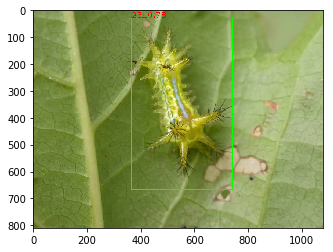

True

In [64]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

plt.figure()
img = cv2.imread("/home/aistudio/work/Pears/JPEGImages/250.jpg",-1)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
for data in res:
    if data["score"]>=0.5:
        box = data["bbox"]
        text = f"{data['category_id']}_%.2f"%(data["score"])
        img = cv2.rectangle(img,(int(box[0]),int(box[1])),(int(box[0]+box[2]),int(box[1]+box[3])),(0,255,0), 2)
        img = cv2.putText(img, text, (int(box[0]),int(box[1])), cv2.FONT_HERSHEY_PLAIN, , (255, 0, 0), 2)
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
cv2.imwrite("test3.jpg",img)

# 四、成果展示

在本项目中，只需要在当前的AIStudio中按顺序运行即可成功运行，目前项目完成了检测模型的开发。最终成果需要部署在无人机上进行病虫检测，然而由于缺乏硬件，因此暂时只能完成检测算法。检测结果如下图所示

![](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYF%0ABgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoK%0ACgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAJYAuIDASIA%0AAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQA%0AAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3%0AODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWm%0Ap6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEA%0AAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSEx%0ABhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElK%0AU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3%0AuLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD5r+HW%0AsQ6x4b+zn/WV5h8aNHvNG1/+0P8AeSrPwb8Wf2f4k/s/7RXa/GDQ4dY0eTULevw6lH6jmp4WIp/W%0AMOeJSahef8/FCapeY+0U2pI4/tHAr7hO6PnNg/tm9/5+DTo9U1KnR2Xe3Wi3t6ZHtC3b+INStzW9%0AZ/GTxhb6b/Z41D/R65qTyaZ++9qx9mIvf8JRN532j7P/AHv/AGWi41iHP2i40/8A1lU4/f8A1lL9%0Aj+0Q/aP+WlX7Mr2hL/bn76P/AIl8dS/8JJN5P+kaf/7LVa2s/s5xVmPT/tE1KYvaDv7Vs/J+0XGn%0A1fuJNBuP9I/1cn/PKofsf2f/AJd6fp+hXlxN/qJK5XJIS97Y07Oz8N+Tn95Xp/gPw3D4f8E6p4o8%0AQXEfl/Y5PKi/4DXm0kvhXwOf7R8Yaj/26/x15p8ZP2ifGHjiGPR9H1CSz0v5v9Fi/j/3q8mWHxGN%0An7h35fl79v7WoeYeJJLO41i4+z/8tJGqpR5X+z+tXtP0+a4NfbQ92CPpSC3ss9P8/wANaOnaHW9o%0Afhn/AKYV1+h+C/33/HvXFiMwSOapiDjtP8J+9bWn+D/f8K9H0vwP610OmeA+v+j14GIzzoefUxh5%0AdZ+B+P8Aj3q//wAIP+6r1u38D1d/4Qf/AKdq8qpnhx/XDxmTwP0/0aq0ng+vcZPA9ULzwPz/AMe9%0AKnn4fXDxb/hH/wDa/Sm/2d7/AKV6pqHgf/ph+FYWoeE+f+PevSw+axMvrDOOt/tlalncd6u3Ph/7%0AOf8AlpVKS39a7o4nmOaoadvcVd8z2rDt7itC3uKdTU5jSp/7n3qC3k/c9Ks28lcxziRf4/8AstNk%0A7VJJ2qTP7n/7VXOZmReR1lXsfc/nXQ3FvWXeW/8ArK66VTU9DD1DmNQsu/8ASsm4t66i8t+1Y9xb%0A17FKpofRYOoYkklUJ+1bN5Z1l3lnXfTPWMi9i9v8/NWZcR1t3sfc/nWXcW9bHQZtWLeSj7H++q5Z%0A6P3rQ5apNZSdh+VbFl/pGe1VtP0ebH/LStyz0ubNctSoeXUqFKSzqu+n11Vvo/v+VWf7AX0rL6wj%0An+snCXGj+/5VQk0evQpPDeO3SqlxoHqK1+ss3+so4GXT+uKlTS/31dp/YC+lKnh7v9no+sHR9ZRz%0Aen6N7Vr2el1u6f4f/wBr9K29P8N1zVMQYVMQc3p/h9q27Pw12res/C9bOn6HxXHUxhxfWEYul6P7%0A102jW/2frT/7O9/0qKS4+zV5OIxH1gyOj0vWK3dP1zmvL5fEnkTVpaf4oPSvP9mdB7V4f1iu68Py%0Aw3FeE+G/EOPavU/A/iD/AFfH0rzMRowPTbe3pk/al0fUITTNcuIfJ4/z96tKVQ0MXVNU9Kq2+uQ/%0A8/Fc34s8Uf2fXEXHxI/0yscRSb2A900/XIc9a27PUPtFeD6F8TIf+fmu00Px5Dcf8vFcfsmB6bvH%0Aoapahp9ncVk2HiiHyeKuf27D61iBxvjTw3/rK8V+JOgf6zAr33xZqEP2OvG/iLJz0r1suqagtz53%0A8YWf76SuOkuP9Mr0Lx5/rpP+mlec38f77iv0DBbHrYYvx3FTbz6CsuOSridfwrY2L9MkuKreb/tf%0ApTpJKzMyK4/rWdcW/Y3FW5JKqySV0AVPL96SSOpN59BSVmZhUif8fH40/wD4+KbsPqKv2gE0dxVy%0A3uKyP+/lW7fzq1A2beSneR9oqGzt5q6LQ9HNxxmsKmIIqVCrpfh+a4rqdH8H1s6B4b/ixXZ6X4f/%0AAOnevAxGYHhYjMDkv+EXHqP+/NFeif2GPQUV5v19nn/Wj5jt9U/sbWI7ivfPDeqQ+MPCv/bP97Xz%0Ar4s/4/a9M/Z38R/6zSLi4/OozLD/ALr2p9fCpoYniTR/7P1i4t/+mlVvL969F+Lng9f+Qxp9ee/Z%0AZv7xrty/Ge3w9j5nEUNbktubO3mp9+Ybg/aLe38ul+x/vvIzUL/8fH413HMJJZ0ypY7Ka46VqW1v%0Apthaf89JK05wKWn6PD5P2i4qv9nm/wCXf/npWq9v/aHWpYtP9RWdzMzo7PP/AB8VYt9GmnFdL4f8%0AB6lqE/T93W35nhvwfxp9t9svP+ev8CVw18f0RrTpnPaf4Pm/5DHiAfY7OP8A5a//ABNY/jz4uakJ%0A/wCx/B9vHbxx/wDL1/HWv4mk1jxRzqFxJJHWZ/wg/wD07Vx0pa+0xB6ND9weWaloepaheSahqHmS%0AXFZd34Tm45H8Ve4f8K+/6dz+VVLz4f8AavWo5nh47HasYeG/8IjN/wA+4rc0Pwt6V6T/AMK7X0rQ%0A0vwH9nm+a3p4jOVYmpjDG8LeDO/2eu+8P+D4fJzWj4b8L/6v6V3Oj+H4e1fF5nnDPOxGIMTS/CcN%0Abln4bzW7Bp/pVn7P7j8q+UqZg2cftDJt/Deas/2J/nNaVO3j0Ncn1lgZn9hQ+9QP4e7/AGeuiTp+%0ANTeR70/rQc5w954XhrD1DwV/0616pJo8Pa3rOvPD8NdlPMWB4rrHhP8A6d65PWNDr3DxB4f/AHP/%0AAB71594o0fuBX1GV5pcDy64jpLe8/fVf8Qf6PXPSXn2c19nh6t0bezOks7ybzsGtC3uK5ezvP/Rl%0Aa9ncVdQ5KlM3Y5PUVJVC3uKvRx/9PFcJyDKp3lv3rQkj9DUVxHUUzWmc7qFvWPcW9dPqFtWXeWde%0Anh6h7ODqHMXFvVG8s63byqMnavYpn0VGoc3cafN3ql/Zf1rorj+lV47et/aHYZ2n6HW1pfhfvVzS%0ANH73IrstF0SuDEYix42MxBz1n4X4rXs/Dc3k12en+H2q/b6H9nrzfrp4VTEHH2fh+rUegf8A167G%0A38Pw/wDPvU//AAjv+zS+so4/anFSeG8dulVLjwv6V3kmj1BcaPjtW1PED+ss4T/hGqlt/Cf/AE71%0A1/8AYn+c1Lb6P/n/ACaf1gr64c1b+F4e1bFtodbdno9T+V/s/rXN7Qr2rZk2+jw1N9j9v1q95fvU%0AF51/CuLEVDpWpl6pJXK+INUrZ8Qap9nrz7xRrnElLDU+aR6FKnci1DxBibip9L8WQ/8APxXB65rF%0AZlv4oNvP1r3ll7aPQ+rn0J4Z8Wf6vivUfCfif/V18v8AhbxZN+64FeneGPGA/wCfj8q8PMMrOOpT%0APpnR/HH7nr+tLqHjwdK8W0/x5/08VHrHxA/6eK8Sng5XHTOi+IHiyG4hkrxbxR4wmt5pKteMPGn2%0AjvXl/izxJ9o6V9Pl+DT3O/D4c7rR/i5Nb+X/AKRXd+E/jR/09V8s/wBpf7VXNH8YXmnf8vFd+IyO%0AhWRvUw59w+H/AIuQ3A/4+K6qz+JEPT7RXxd4b+LE3W4uK7XS/ix6XFfPYjIzjqYc+ltc8cfuP+Pi%0AvMvHHiT7R5lcj/wtH2rB1zxh9op4fLuUinRKHiy8NwOlcNeXHetbWNUHnVjz9q+qw1Kx6lOmRR3F%0ATfaPY/nVaXvR+6rsAnkuKI7iaoJJPQUUGZLvPoKgfp+NEklOrMCF+n41Nbx1LZ2f2it7w/4b+0TZ%0ArnqVOU5qhBp+hzXHS3qSTQP/AK1egaH4P/c9a2rf4d/aP+XevM/tBmftDyP/AIRb/p2p9nof/TvX%0AsM3w361FJ8OvstZf2oZVMYcHo/h8V2Xh7Qhbdqvx+C62dH0uvNxGYXPFxGMNDw9o8Xkxmumt7Osv%0AT4/s9aX2uHyf+WdeT7Q8OpULtFZ/9ow/5NFP2hznyp4nt/Wp/hXeTaf4rjwKk8U9PxrL8J3k0Gpc%0Af89K+hn8J+kH0h4guIbjwfJ9n/5515bZ6pedfs9ek6GIdY8N83P/AC7/AL2vPJLOa3mkzcf8tK8P%0AKfjmeDj9w+2Tf8fH2epreSGf/mHx/wAVT28f2jil+xw+dXr+0PJ+sEryaFcf6P8AZpI6I/Dem+d/%0Ao+of6ypf7O9/0q/4f8F3l/d/8e8kf/jtZVMR/eNYzuyl/wAIfqfnf8e8n/bKuj0vwPDp0P8AaHiC%0A48uOP56v654x0fwfp39j6f8A6Rcf89f7lcde+INY8UXn+kXEn7yvNdTHVjslhKP850es+LP7Y/4k%0A+j/u7P8A8fes+z0f7RU3h/T/AFrr9H0OuSpV9gZGNp/hatW38Jw11Wl6P71qQaX2ryKmYSNDkv8A%0AhD/s/eql54Pr0SPT6ik0uHisP7QYHmkng+pI/C5NdxcaXDVf+z/3341nUzC5mZOjaP8AZq347c2/%0AGaI7P/69SeZ7V5eIqcxyVBtO8z2qLefQU+uYRJHJ6irFVE6/hVmPvQBag71atqrRx1bqfZgWIu1O%0AvLeGo/M9qivNQ5qTQxvEkf7mvMvGlvnzK9C8Sah/rOO3pXlvjjWIcSf5/u19FlNKVzvpnmPjCTmu%0AIvNQ/fc3FdB411T/AFhJrzvVNU/0yv0/L8O+U9SnhzrYNU71rWeoc1wGn6v3FxW/pese1ddSmceI%0Aw53Vnccf8fFa9vcVyGl6hzz610Ol3v2iuCoeTUw5uVC/T8aS3kqeLtXMcRRkt/Wsq8s63pLeqdxb%0A4/z/AJ/vV0U6h04epZnL3lnWXcWddReWdZlxaelerh6h9HhsQc3JZ07To/tM1aVxaelV7Oz+zzf8%0AtK6z1/aG7o1ma7Lw/Z/6uuO0uTvXUadqn/PtXh4w8fEbnbafbVpRxw1y1n4gq/H4k/6eK8H3jzam%0AHN2O3hp/ke9ZFvrGO9W4NUrZTPPqU7E1xb1XuI6sXFxVd+n411qocxX+ze/+fvVNF2opZLj9zWpd%0AOmD9fwqncXh/eVFeXlZ9xqENB3U6ZakvP/rVmapqlRXl5WJrGodOO3pXPud+HpGZ4o1T0rzrxJqf%0A4V0XiC8+0Vw2uXHoK93L8Oj2MOYWqSfaKoVdfr+FJHZ19Gdhr+G7z9z/ANc67fw74g/1f+kVwWn2%0A9dFpclcWIpmZ26eLP+nio7zxJNXOeZN6Ckk87yea8z6nEunTG6xrFclqF59orX1T/XVk3lv3r08P%0AT5TtMS4/rUVvJV2SOq3ke9doFyzrYs9Qm6+fWJa/678a0LOSszM6K31S8H/LzJU/2y8/vD86yLOS%0Ata3krm9kgB+v4UyTtUlxcUz7R7D86ZoVn6fjUNWbi4qn9o9j+daGZPUlVfM9qnTr+FBnMdHGPPxV%0A2z077RNTbO3/AH2K6LQ9LrmqGZY0fw3XbeFPC377mq/h/T+1dz4bt8V89mGIOWodF4X8Fw3ENddp%0A/geHP/HsKd4Tt8Q9a7vRrf8A1a5r5uo5HLyHK/8ACvv+naobz4f9zb16np+j/ae1T3HhuGuU4qlM%0A8LvPA/2foayLnw/9nNe3654X7A1xHiDQ5v3laHi4jDnnkkfoaZ9o9j+damqafN271j3EdZe0PKDe%0AfQUVWopmh8/eJP61jaf532z/ALaV0+sW/wDocdZEceJv+PevrD9APc/gf5OoeD5Lf/lpXIeINPht%0A9euK6n9nNPtFneW5FZnjizx4wuPs9fN039XzOR5ebL/ZzLt7etzQ/DepeILzGn/vJKn8J+C9Y8Qf%0A6P8A8s63bjxZpvgeyk0fw9cR3GoSbvNuv7n+zXRPEc3wnh4fDklv4H0fw/8A8hjUI/3dY/ijxZeX%0AEP8AZ+j/AOj2dVvtE1x/x8XHmVBJb+1b0cKt6h2uX8hj/Y/31aehaX9KW3t/31b2j6X71WLqcuxk%0AaGh6fXYaPZ+lZ2h2Y9a6fT7Lv/Svj8ZiCvZk1vHV7/45UOwepqauIv2hJUMnah+n41FJcVyVDD2g%0AzYPU1DL3okuP31QSSVxHN7QJJD/n/P8AvVFL3pJJKZWghz9PxqamJ1/Cn+V/s/rQaEmyL1NWbf8A%0ArUEferCdPxoAsW1SfaIfJqHzf9r9Ko3uqUGhdl1T/WVj6prHtWVrHiD0Ncp4g8Wf9PH+flr0cHgr%0AnRTpl3xJ4k/1leVeNfElS+KfGHt+FeaeLPE/+sr77J8r7nq4bD6mP4w8Qf6z/gVcTcahVjXNQ+0V%0Ag3l5X3VLD2R7qp6Gj/af77rW7oeuY4/z/DXCS3n2iXmtXR9QmqqlM56lM9Z0LWfeuo0u9rzLw/qn%0A/TxXZ6HqU3/PevHqYc8XEYc7ezuK0o7iua0+97f1rZt7iuA8epTL9RyW/tS/aPY/nU9ZnPsZstv/%0AAKzFU5NLrZ+z+4/Kovs3tXVh6h2YfEHPXGn1mXFn6110lv7Vn6hpc1exhz6DD4g563uK0LfVPs9R%0A3Gn1mXnnW9XUwZ16M2/7fX1qX/hLPf8AWuOuNQqD+3YfWuCpl5h9XPSdP8UHpW9pfii38nNeQ2/i%0ATFdBo+sY71w1MvODEYc9Vj1T/V81bjuK4/Q9T+0Cul0+47gVx+zPO+rl7zf9r9KpXl5UV5eVkahe%0AL6UG1PDi3mozdarfbD7VTkkqLePQ1odPsyS8vKxNYuMVoz9qwtYuMVth6ZvSOc8QS9hXJahb/vq6%0AjVJceZmsO4jr6PDKyOz2hjSWf/1qLe3q/cRw1Fbx13lXLdvZ1rafb1X07p+FalvH+5rzsRuaLcdH%0Ab0nl+9WLaluP6Vxe0OtMxNQtqyby37Vvaj2/Gsq4t69ClsdHtDDkt6qyR1s3EdULi3rqGVf+W34V%0Abg71D5fvTfN/2v0oA0Y5K07e79a56O4q1Z3k1Zga8lx70z7WKpef7UySSgCa4uO/+flpnm/7X6VW%0A+0ew/Oo/M/fUGZZjuPetG3krGg71p28lBmbmlj7RzXa6Hb/ua4zw3J++rvNL/rXBiKhzzN2zkhNb%0Ael65D50dcnIPs9VZNXmtx9oFeVVoaGZ9FfDvxBBPXqPh+8r5m+FfiwedH9ouP1r3zwnqn2izr52r%0AucZ6Fo943ndK6WPyf3f/AD0rhdLn/fdK6TT9UrhOcl1i0i8muH8SaPXaXl4R/wAfNZN5bw3FOocW%0AIpnluseG/wDp3rFuPCf/AE7161J4b+01G/hPnrXJTOH6qjyD/hCv+ulFeu/8IePQ0Vr7Mr6kfDWp%0Af8gGP6isDzP31dTcR40fpXM2+nzXE0lfSn1J3fwX+IFn4X/tC3x+8+Wuu1Dxx8N9PH/CUeINXjkk%0Ak/1VrXzl4g1TWPC+sf2hp1YF54k1LWLz7TqFOWSrEfveY6a6wVfB+zPd/En7RE3iCz/sfwvb/wBn%0A2f8A5FesvS9T/fY3V5Xo+qV2fh/UP9XXR/Z9HBL3DwcVS5dj0zS9Q559a0a5TQtU+tb9vd+tcx5B%0Ao2dvXSaHbkVz9nJXS6J/rq8jH7i9odPo/f6Vux96ydO7/hWjvPoK+RqU5M1Jd49DRJcetUbi4qn/%0AAGj7frWXsmBqyXFMkuPWsf7Z/wBPVS/aPYfnXNUw5xe0LNxcf6ymbz6Cq+8+gp1v/Ss/ZkEtSVHU%0Anm/7X6VfIBJUnlf7P60UsclZmhLH3p0lx71W+2fZzVDUNUppNmhZvNYhxXMa54g9v1qr4h1//WYr%0AhfEvin1r1sHl7Z14emaHiDxZ9n/5eK4TxB4w/wBZWV4l8U+tcNrnigGvu8ryfuezh8GaOueKZvSu%0AP1TVPtFR6hqlZlxJX1lHD8p6VOmUtUuKxLzr+FbNxHVK4t/9ZXb7Q6jIrV07p+FVfs/uPyq7pnet%0AQOo0OX/arr9DuP3NcXpf9K6vRu1eZUpnNUOz0+8b0rYs7yuY0+tW3vK8z2Z5GIw5vW95WjZ3HeuY%0AjvK0tP1AefWHsjx8RhzofL96f9n9z+VUbe4rRt5KhHPsMks6r3Gl9q05P+fimm37/wCf4q9SjUPR%0Aw9QwLzS6xNU0v0rsLi3rP1DT69WnUPXw9Q881jR8Q1g3mn8V6Lqmn+9c1rGl1ud3tDlPN/2v0rW0%0AvVv33Wqt5b96q21c1QmZ6f4b1P8ACu10+4/c15d4TuK9B0e4r57EUzh+rs0p+1YuoVvxx1m6pb+t%0AcHtDT2RgSSego83/AGv0pLyOoZLitqZiSXklc9rtaV5cd6yJJK9XB0zMxLy371mXlvNmuiuI6zNR%0A7fjXq06hv7Qwrj+lRxx1auLeqUveukumaWnydg1a9nJWBbyVft7yuKobGy/T8ar7x6Gof7R9v1qt%0AJcVzezNCe4krOuP60+S8/wBZVPzf9r9K7KR2QI6g2H1FSySUn2jn/P8AvV1HQULmqUkda8veqlxb%0A0AUvN/2v0qSOT1FFSUAOTp+NSbx6Go5O1SeVN/eFZmY2Tt/n+7VWTzqtSW/tUez/AJb0HON3j0NX%0AbO8qlJHVjS7KagyqHW+Fuv4V6Hpf+privD1vXaWdxXi4yoc3tC9cf0rnNYuIa0NQ1CuZ1zVK5Kd2%0AUdR8P9c+z3lfSXwv8QefZx18c6P4g+zXn2jNe4fCv4gdvtFcGPw/YwqUz6h0fVK2rfUP+nivMPCf%0AjCHyeLiup0vxBXjVKZn7M6PVLik0u8+0NWHeaxTdL1Ssq5y1KZ3+l2f2itD+y4a57R9c/c1r/wDC%0AVWnoPyripmlOmS/2ZD/z8/8AoVFZn/CSQ+p/Oiuz2h3ezPz+t/8ASNHzWHsb7ZW/4fuftGmyVnyW%0Af2e74Fe3sYL7ByHxE0/EEea4qS39q9G+INl+5+0CuGvI69vL6n+zncVbeT99XQaHqB9awI7f2rQ0%0Auz7YrrqanLiD0PR9UI/5eK6nS9Q/6eK4HRP8a63R+/1ryqlM+fxG52Wl3kPSup0OT0FcNZyV02n3%0Ai+lePiKZynf6fee/6Vp+Z+5rmNHuK6G3/pXk/UzppkV7H3P51m3En77pWzcf1rIvLOasPqJvUplf%0AePQ1Ytf9T+FV5JKX7XFXn4jDnm1KZb8z2qbzf9r9Kx/7U/c9KP7drl+reRjyG5byVJ9oH+f89/mr%0AC/tmD/n4pP7b/wA4qPqzLp0zd+2H2qGTVK5+TxB/08Vm3nijj/j4qlg3Iv2Z0Vx4gh6Vz+seJM1g%0A6h4oOZDXMav4oh7XFerh8rO7D0jQ1zxJ/wBPFcH4j8Qf9tKj1jxB6iuV1jVPavrsFl1j1cPh7Mqe%0AINYrlby4mzWpeXH2msu8jr6ilT5UeuUvN/2v0oqTyPeo66DQgk8moPs3tVrzf9r9Kgfr+FAFbyof%0ASpLOOm+Z7VJZUAb+l/1rpdPrmdLl9DXS6X/WsagG1byVoW9xWcnT8anfr+FcpmX/ALZ7/pVizvKw%0A/tnv+lP+2H2rOx5lTDnaWeqVs6fe9v61w2l6pW/p+oe361x1KZ42Iw51lveelSP0/Gs2zvKvb4vU%0AUU6ljnXujqrSD7RUz9fwqKXvXfTqHq4eoZuoaf7/AKVg6pZ9sV1L9fwrM1CPuVr0Y1D0qZ53q+n+%0AtYsv+urt9ct4BXH6pp83nd60O01/C15++4r0XQ7gCvLtF/gr0Hw3J+5rwMwpmh3tnTdUg/c9f+Wd%0AR6HJ6Cr0/avmucr6uzlNR0+EVh6j0/Cux1T/AFNcf4g7V6uD3McRhzn9QuO5FVadc1Xkk/z/AJNf%0ARR2POqBc1QuP6VNJJVS4kpkFW8jqh9n/AOXjPNaEh+0VFW/tAKflf7P607fF6ipqqySUzoJftn2c%0A1FJdzf4VWkuKqyXH+sqvZm1MuSXFQx3lZ32z3/So/wC0Yf8AJrY7aZr/AGj2H50yqMl59ppfth9q%0ADpLsveoZI6TefQU+gCHy/wDl5/rTqdsHqabWZmO8v3p1R037T70GZaqv5X+z+tO3j0NWre3/AH1B%0AmVrfT/tE3BrpPD+h/LUmj6HXS6fo3tXHiMQcmI2E0vT/ALPV6TUJrfrT6wtYvCPMry9zmDVNd/lX%0AIax4g9P+WlQ+INc71yWoap2OK9DD4c7KdM6P+3a674d/ET+z7yO3uK8hk1Srun6pmb7RXRUwd0df%0Asz7L8D/Ej9zXoWh+OPavjnwH8RbyA4uK9b8PfECG4hj/ANIr5rGZXqc9TDn0JJ4wp1n4x9B+7rx6%0A28ef9PFK3jj/AMiV51TL5Hn4hO57zZ+OKmuPHFeIWvjz9z/x8VBqPj+br9orm/smRhzntX/CwU9I%0A/wDv7/8AXorwf/hP/wDp4/Sij6kyvrDOS+H95F/ZklLqP+uqp8M7j/WVoax/x+j6V2Y52rGkan7k%0Az/Fmjw3PhuvOPsX+cV7HLp/9sabJbD/nnXBf8I7/AKb92unAYyxtWqWic7Ho9X7PR5sV0Ueh1at9%0ADxXR/aB59TGFPT9PHn10ml2dVre3rXt7euOpiDyqhes7etbT3OKoxx1LvHoax57mB2GgXHaut0+4%0ArzjS9Q9q6/R9Q68dvSuj2dzsw507dv8APrVfVIP3PWo/7Q9v0rn/AB543i8PacpWLfcTZECEccdS%0AfYZHHU5/EclZ08PSdSo7JH13C/DGd8Z8QYfJcnouria8uWEV10bbbeijGKcpSekYpybsmVdY1T7P%0AN9nxWVceIa51/El7e2Qlv5A8gcjcFAyOOuOO9ZF/r5YhBkknAArDDYaniqEa0dnrqHF3BObcGcV4%0Arh7G8s6+Hm6cvZtyjJrZxbUZNO6teKeuqT0OnuPEA86oP+Es9q43UNZsbW5EF7cPvPDbF4Tofxqn%0AqGp3FgyESb45UDxyBSMj/P8AMUUKWHxE4ximubWLaaUl5f1qtVoe5xH4RcTcMZfVxWJlRm6ElDEQ%0ApV6dSphpyfKo1oRk3FuXutx54wn+7nKNT3Duv+Es9qb/AMJYP+fk155/b7etK+ud67P7HPzv6szu%0AbzxRzWTeeJM1zEus3MjiOOYszHCqoySfSl1Cfw/pU4sdYvZmnOBIYE+WHODnnr17Z47ZqauDpYWU%0AYtOUnqlFXdla79Fdb+i1PueFvDzNeKcPWxdOrRoYek4xnVr1Y0qanNScKactZTmoSaUU+WMXOfLB%0AOSs6p4o/6eK5zUPEMvpUHiqyk0iSIrN50FxEJIJhGVDA+x6H29x61gXlxXs4TC0q9JVKbvF/11/I%0A83OuH8z4azarluY0+StSdpK8ZLVJpqUXKMoyTUoyi3GUWnFtNMs3mseeJOKy7i4+0Vo+HNW8L2ss%0Aj+KdNuLmIpiIQSYw2e4yuePf8Dnjc0q5+E2s6lBpVl4R1AyzyBF+dsD1JxKTgDknsAaMVmDwUmnR%0AnJJXulG34yW3ofo/B/hlT4wwtGdLO8Dh61WfJGjWnXjV5nLliuWGHqR9525bSd7q9ndHFS96qydq%0A3PiBa6Npnii507QotkEO1SBNvG/aN2CeRg8EEnkH6C7bw/C7QERtevbnWJpYwXjsUKRRZCkcllJP%0AJHX1BUEV2vMoLC060ac5c6uopXdrX16Lfq12Oaj4c46fEuOyivj8LRWDqOlUrVK3JS5lKUP3acfb%0AVU3F/wAOlJqK5pJR1OKuI6rP1/Cu8vfCng/xZpWo+I/A9xc2jabEZLmwvUyCoXIKsCSMhX6lskfw%0AjBrgpe9dWDx1LGKXKmpR0lGSs02r69NtdG15nncWcF5rwhVoPETp1qNeLlRrUZqpSqxjJwlKD0ku%0AWcXFxnGE01rFaXqydqpyXHrVqftVC8uK7D5kTzv8/wDj1Pt7isq4uKW3vF87pWvszQ7XQ7j1Fdfo%0A/f6157od4PSu40e88+uepTMzpo5KdcXFUbeSpZJPQVzGZn6he9v61H/aPt+tRax2+tYtxcVoZ2Ov%0AsNU/ff41v6XrHtXnVnrHcVv6Xrv864qlM83EYc9L0vUPate3vK4XR9Yx3rodP1D2/WvPqUzwqlOx%0A0m8ehouaoW9xU/2n3pqdh06gj9fwrP1Bxmr8/asnUev41306h7GHMfVP9dWBeaf9orevJP31Vvsk%0ANdntD2KZnafo+Z/8/wDstdTocf2c1BZ6fzW1p9mvrXBjJ3Nje0uStGS4/c8msJOv4UtxqHqa+f8A%0Aq92a+0JtUnrj9cuPQVo6hrnFc5rmqV7uDw5NSoZWoXFZdxcTU3VLybpWTcap3r0zg9maNxeetVJL%0Aysi51SGof7Y+0fNWZX1c2vtnv+lRSXFZn9o+360/7YfatBVKZe+0ex/OopI/Q1B9o9j+dMuLz1rQ%0Ay5CK4krPuJKluLz1rOuLiug6aZHcSVWkvKSS4qrJJWhuaNveelWI7z/69Y1vJV+3koOg2rapqz7e%0A4q9HcelZgTv1/CmSSU3zf9r9KZJJWZmJJJ6CoH6/hSyXHrUcfeg5yzZ5uJuldN4f0us3w3odd7oe%0Ak+1cmIqmVTEFjS9L9a1Y46db29Elx+5rxqlQ4J6lLUK47xBcf6yul1S8/c9f0ri9ck9RXZg6Z0U6%0AZyeuSeornbz/AF1dTqFm3rWNqGn17cdj0DDl71Yt5KLizm7U3YPU1qdBt6XqHr6V2nhvxZ9n/wCX%0AivO7f+ta1ncC36VzVKdzM9c0/wAad6uw+KPSvNbPVPX/AD/FWhb6x/08Vj9WRjUpnpFv4om/5+Kd%0Aca/6muCj1Spo9cq/q0Tzvq6Ox/tSaiuU/wCEgHv/AN/Worl+p4c5Pq7O68B4/tL/AEeug8UWY9fz%0ArF8J+db6lHXU+LLf7R/pFfJZm7Cp/wAEXwV9juIcf89KwbzQz/aUlbng7R7y3m+03H7uOptdt/8A%0AiZyV5n1hmeO/3cxrfR/f86d/Z/v+tW36/hS7x6Gj2h4ntCCO3q2nT8abTt49DVElyPvVe4kqbzf9%0Ar9KrXH9K68NuAWeqV1mh6xXA+Z++re8N3ma9+lTujpjud5JqFZOq3Xm7fOhV9jBk3KDhh0I9DWj4%0Ab0vVvEurQaFoVhJc3dzJshhjHLHr9AAASScAAEkgCugvP2Z/jnL/AKvwPnr/AMxO2/8AjteLmGb5%0AJllRUsdiadKTV0pzjFtd0pNXV+phjeMMh4cxMI4zH0sPUavHnqxpya1V1zSTturrzR4bcyyR2W1O%0Am8/yFctqWtm1v0uNgbZMDtPevaJv2SP2idTsi1p8N5flmkQiXUbaM5VipOHkBIypw3RhhgSCCcC8%0A/Ya/afuOnww/8rVl/wDHq8/I+JeEY5XClXx9BPls06tNPzTTlc/VfG/xd4Ah46ZtmuVZ7hJOGJ56%0AdSGJoSXNDlaaam4vlkvNXVmeZ6lol7rN4b3RJ4p7eaTO8SjMZIBO4duvTk4p/iKyhtPCNlFBKkpS%0AbHmowYEkMWAI7Z/kK77Tv2Qfjdd64fDi+ANYWcyNHKzWRjtyUyWAnciIr8vDbsNxjORnV1T9ib9p%0Ai8ENva/C8pBBHtjVtZsck9ycTdT/AJ61nHibhyeMw9J5pS5KT5velGGii0ruUlzN7e6krXbP1/ij%0AxH8KeBeGM6xmbPBYTMM4oWjTWaYXEc3ta9Oo50aVKUnQw69nKd61ScpVVGnTaUWzxCOSlf8A4+Px%0Ar1G7/Za+MthdS2N18OfEBlhkaOQwaHNLGWBwdroCrrnowJBHI4qP/hmT4vf9E48S/wDhOXH/AMTX%0A0X+vPB/TGR/H/I/NsP4U8X4vDwr0amDcJpST/tLLtU1dP/euqOA8JIkmt2yyIGGWOCM8hSQfzrN8%0AS/8AIZu/+vl//QjXslh+xh+0nqUEOs6H8N7kxMd0Ru7q3tpFKsR80U0iuvI4yORgjg1Z1f8AYZ+P%0AmqX0F1dfDq5tZLqfZJFHf2ki5CFidySkRghW+Z8AsQOrAHyqvGvCWHzNYp4+k4yhy2U4uUXFt6xv%0AzK6fbS2ti8FxVwZmXBGJ4FnnOX0MzwWOnVnGrjsJTjODoqlVUa0qqot4eVFymvaaxm3T5nGSPFtf%0AijPwx02YxqXW8dVfHIBaTIz74H5CuJvLjvX0b4r/AGGP2qtWW2stM+EjJa2kOyJX1zTwxJ+8xxP1%0APH5Z71m/8MEfGxdLHhzU/hHqR165tpJreWK8iaBGG8ohnVzAmdnR23fN2ytLBcacK4HCOc8bSk5z%0AlK0alOTipSbvK0tElrJ9GbZ9xV4eeKHF08FknEGXxjluXUYzq1MXSpwrfUsPThVlTbbu3JP2d9HT%0AjzylGN7fO1xcV1Hw4dtB0bVfiJNbq6WUPkWisgbM7lRnqCANyg+oc4PGK7u5/wCCcX7Zsn3Pg3n/%0AALmHTv8A5Ire8W/sIftcal4V0jwl4W+D7yWlijG7kbWrOPzLoMyOQJpVfbu3srD5WEgI4wa3zPjD%0AhTEwhhoZhQ5Zu0n7WnZRWrTfNvK3KvVvofPeGHib4XcPVcbxVic8wiqYGn/s8PrNHmni6t4UGk56%0Axo+/iJf9eox15j54ur6a4ma4uJmkkdizu7ZLE8kk9zS6XdaXBqlvN4jtZZrRZQbiKF9rMvcA/wBO%0AM9MjqPX3/wCCcP7a56fBb6f8VHpv/wAkVu6//wAE6/jfaaRb6xcfDjWtJYssM9pG9tqjM+wHeotZ%0AWYKSGyzADJ6LlQerEcccG00qf1+k1K69ypCTXyjJy9Glp5Hm8EZ/wvxdm6jledZfUxcZQlCjWxeG%0Ai675m2o+2mqVS1rzhOack9Iz1S4W1vPD2q+AdbHwwgXTlhgZtTivbdmllj25+V97AAqJABzyT93O%0A4+W3FxX094b/AGEP2ktA8B6knhb4Yajq02u27wg3V1aWHkKAyAvHcTLIp+ZyOPmAHQEMeO/4duft%0Arf8ARFv/AC49N/8AkmvPyXizhLD1MQnmFLlclZzqwU37qTvzNS0d0uZbH6H44+K3h3X/ALIweLzj%0AL6ePw9GpTxNDDYqg6FCar1OWEI06sqMJuFnWjSdlUvzJSueB3ElZ151/CvoSf/gml+2y/wB34K5/%0A7mPTf/kmqVz/AMExP24JPufBLP8A3Mumf/JNfQf668G/9DLD/wDg6n/8kfgy8SPDy/8AyOML/wCF%0AFH/5M+c72TsfyqqlwfO8+voe5/4Jc/t1yH5Pgbn/ALmbTP8A5Jqn/wAOr/28v+iE/wDlz6X/APJV%0AdcOOOC1/zM8P/wCDqf8A8kdK8SfDq3/I5wn/AIUUf/kzynw/cfuea7jQ7gmu60T/AIJlftyWn/Hz%0A8ENv/cy6Yf5XNdXpH/BOz9sa1i2z/B7af+xg08/yuKxqcbcGP/mZYf8A8HU//kh/8RJ8Of8Aoc4T%0A/wAKKP8A8mee2f8Aqf8ASaluP6163YfsDftaQf634T44/wCg7Yf/AB+rP/DBf7V//RMm/wDB5Y//%0AAB+uP/XTg7/oZYf/AMHU/wD5Iw/4iR4d/wDQ4wv/AIUUf/kzwbU+1c5qFxX0Tff8E+f2t5/9X8Js%0A/wDcesP/AI/WHf8A/BOX9st/+PX4Ofn4h07/AOSKIcacHL/mZYf/AMHU/wD5IP8AiJHh3/0OML/4%0AUUf/AJM8L+0+9ael6pXqn/Dtz9tX/oi3/lx6b/8AJFSf8O4f21f+iMf+XFpv/wAkVU+MuDX/AMzL%0AD/8Ag6n/APJGP/EQ/Dv/AKHOE/8ACij/APJnG6PrldLpesVvWf8AwT1/bPi/1nwax/3MWnf/ACRW%0A5pv7Bv7YFv8A674UEcN/zHrD/wCP1wT4s4Of/Mxof+Dqf/yR5tfjvw8e2cYX/wAKKP8A8mYdnqFa%0AEWoeprpbL9ib9rGH/WfCnH/ccsP/AI/WlD+xj+1Ah+b4XH/wdWP/AMerh/1o4R/6GFD/AMHU/wD5%0AI83/AF64BX/M2wv/AIUUv/kzin1CqF5cV6P/AMMZ/tQf9EyP/g6sv/j1J/wxh+095u7/AIVlx/2G%0ArL/49Vri/hNf8zCh/wCDaf8A8kdFPxB4BX/M2w3/AIPpf/Jnk9xHUsHevUX/AGKf2myePhp/5WbL%0A/wCPUlv+xR+03GMP8M8c/wDQZsv/AI9XR/rpwl/0MKH/AIOp/wDyR69DxG8PVvnGF/8ACil/8mcL%0Ap3X8a37e3rttN/Y6/aFt5d03w6wP+wtaf/Ha2I/2U/j4uM+A/wDyqWv/AMdrjr8Y8KPbH0P/AAbT%0A/wDkjT/iI/h5/wBDjC/+FFH/AOTPNbj/AEfnNc9rF56CvY7z9k79oKWPanw/yf8AsK2n/wAdrndY%0A/Y0/aauv9R8M93/cZsh/7WpYTi7hNfFmFBf9xaf/AMkR/wARG8Pf+hxhf/Cil/8AJniuqax7Vz2o%0Aa5XsOsfsJftaXRzb/CQt/wBx6wH8565fVf8Agn3+21c/6j4MZ/7mLTv/AJIr3KfGPBq/5mWH/wDB%0A1P8A+SL/AOIj+Hn/AEOML/4UUf8A5M8n1DxDF6VgahrPvXr95/wTi/bjl3iP4Hk56f8AFS6Z/wDJ%0ANZ7/APBND9uk9Pgb/wCXNpn/AMk10f658Gf9DPD/APg6n/8AJGn/ABEfw8/6HGF/8KKP/wAmeNT6%0ApNUceqV7E/8AwTI/bsbp8DP/AC5tM/8AkmhP+CY/7dQ6/A36/wDFTaZ/8k0/9cuC/wDoZ4f/AMHU%0A/wD5I3/4iN4c/wDQ5wn/AIUUf/kzyaPUKsQap3r1hP8Agmb+3KvX4H/+XLpn/wAk1PD/AME0f24E%0A+98Esf8AcyaZ/wDJNZ/668G/9DLD/wDg6n/8kRPxF8OntnOE/wDCij/8meVW95T5Lj9zXr8P/BNz%0A9thPvfBb/wAuPTf/AJIqX/h3D+2r/wBEXP8A4Uem/wDyRWf+unB3/Qyw/wD4Op//ACRl/wARF8O/%0A+hzhf/Cij/8AJniVxJWVe175N/wTZ/bXb7vwWz/3Mem//JNRv/wTN/bRuImD/Bnbl87G8SacSR7Y%0AuMcVvDjXg1f8zLD/APg6n/8AJGn/ABEjw7/6HGF/8KKP/wAmfO1xJVPefQV9B3P/AATG/blk+58E%0AM/8Acy6Z/wDJNVf+HXn7dP8A0Q7/AMubTP8A5Jrr/wBd+C/+hnh//B1P/wCSL/4iT4df9DnCf+FF%0AH/5M8MjkrUt/6V7PD/wTD/bkT73wQ7f9DLpn/wAk1eh/4Jn/ALbafe+Cnf8A6GTTf/kms/8AXfgv%0A/oZ4f/wdT/8Akg/4iT4df9DnCf8AhRR/+TPGbatGOSvYYf8Agmz+2on3vgx3/wChj03/AOSKuQf8%0AE5P2zE+98G8f9zDp3/yRUf67cGf9DLD/APg6n/8AJGn/ABErw6/6HOE/8KKP/wAmeKv0/Gm17b/w%0A7m/bM/6I2f8AwodO/wDkivHrzSNS0zUrjRdZ0+e0vLSd4bu0uoWjlhlQlWR1YAqwIIIPIIIruy7P%0AckzhyWAxVOs42vyTjO19r8rdr20uejlHE/DfEEpxyvG0cQ4W5vZVIVOW+1+WTteztfexQ/fXE1bO%0AheGqvaH4f/5+P8/drsND8Pe1aYjEHXiKhBoeh1vW9nTo7emXmoV406nMcA+4krMvdUqvqGqw/wDP%0Az+tYFxrGO9dFPD9TanT1L2oXn2isa7+7+NW/tH2jrSbB6mvSpnpIxLzT+KyNQ0+usuLesq8s66qY%0AHKXlnVT7IK6a4s6r/Yz7VsaGPb6fV+3t6sSW/rS28dZgS2dv9oGKKn+z+4/KkkjoM+cibUP/ACJU%0An9oj1FV5I6gXv/n0oAvf2rN/00/7+/8A16Ky99x6Gir9mZn0Z4d/4/RXXapZ3txp0dwP+WdcppcZ%0A8/Ndz9n+0eFf39fnGMPFwO0ypb6pLcaPHp5/5ZyUeLLf99H9o/1lY+Zbeb7RW9rEf9oabHrFeWty%0Aq/8AAMCiiiuw+fJKKKK6DMdvHoaguP6VL5v+1+lRXEdduHWhrTK3l+9a2hVRs7Ot3R7fFexT0Os9%0AT/Zh/wCS0aN9Lj/0mlqh8WPib8SNO+Iev2Wn/EHXIIYdaukhhh1aZVjUTMAoAbAAHAArT/Zp/wCS%0Az6J9bn/0mlrivjY+Pid4jH/UevP/AEe9fDLCYXF+IVVV6cZpYWn8ST/5e1e5+a1MDgsd4sVo4mlG%0AaWCpW5oqVv39bumcx4j+Nvxih/49/ix4lT/d124H/s9ZEfxt+Nx6/GPxV/4UNz/8XWRrH+uFU6/Q%0AcPkuTP8A5hqf/gEf8j7P+wMi/wCgSl/4Lj/kdP8A8Lq+Nv8A0WPxV/4UNz/8XR/wur42/wDRYfFX%0A/hQ3P/xyuci7UV1/2Jkv/QNT/wDAI/5B/YGRf9AlL/wXH/I6L/heHxo/6LF4q/8AChuf/i6b/wAL%0As+N3/RYvFX/hQ3P/AMcrnfL96TYfUUf2Jkv/AEDU/wDwCP8AkH9gZF/0CUv/AAXH/I3ZPjf8cB0+%0AMviv/wAKK5/+LqpP8cPjqIsj40+LR9PEl1/8crJfr+FU7iOo/sTJv+gan/4BH/I0/wBX8h/6BKX/%0AAILj/kXr749fHxPufG/xePp4luv/AI5WHqP7Qn7Q8f8Aq/jz40X5+3im7H/tSquoRzAVjahbVz/2%0ALk//AEDU/wDwCP8Akehh8h4ff/MJS/8ABcP8izd/tIftILwv7QPjcfTxXef/ABysqf8Aaf8A2lR0%0A/aG8cjjt4tvP/jtZeoR+9Y1xZ1p/YuTf9A1P/wAAj/kehT4d4e/6A6X/AILh/kdBL+1J+00M4/aL%0A8d/+Fde//Hag/wCGrP2mv+jivHn/AIV97/8AHa5C8jqjcf0o/sXJv+gan/4BH/I9GHDfDv8A0B0v%0A/BcP8jvE/ay/aZPX9orx3/4V17/8dqf/AIaq/aY/6OJ8dfxf8zde/wDx2vPab5fvWn9iZN/0DU//%0AAACP+Rp/q3w7/wBAdL/wXD/I9Bl/al/acGcftGePP/Cvvf8A47VWX9qn9p8Zx+0h49/8LC9/+O1x%0AVRSR0f2Jk3/QNT/8Aj/kZ/6t8O/9AdL/AMFw/wAjrLv9q/8AalU/L+0p4/H08ZX3/wAdqj/w1p+1%0AV/0cz8Qf/Czvv/jtcpex9z+dVvs/ufyrpp5Jkv8A0DU//AI/5G/+rXDn/QHS/wDBcP8AI9L0P9qj%0A9qKbiX9pLx83s3jG9P8A7VrtdA/aW/aNm/13x/8AGz8/xeK7w/8AtSvF9LjrrNDc1nUyTJf+gan/%0AAOAR/wAg/wBWuHP+gOl/4Lh/kex2H7Q/x/fO/wCOXjE9Ovia7/8AjlX/APhoP48+Tn/hdni7P/Yy%0AXX/xyvPdPcZrWjjrinkuTf8AQNT/APAI/wCRH+rfDv8A0B0v/BcP8jZ1X9ob9oKP/V/HTxkv08T3%0AY/8Aalc9qX7Sf7R0f3P2gPGy/TxXef8Axyo9Qt65zUNPrT+xcm/6Bqf/AIBH/IP9W+Hf+gOl/wCC%0A4f5F6f8Aaf8A2lh0/aH8cjnt4tvP/jtVf+Gpv2mf+jiPHf8A4V17/wDHa5jVLP8A1lYtx/StP7Ey%0Ab/oGp/8AgEf8i/8AVrhz/oDpf+C4f5Ho9p+1V+0q33v2hvHJ+vi28/8AjtXbX9q39o1vvfH/AMbH%0A6+Krz/45XlEdx++qWO8pf2Dk/wD0DU//AACP+RFThfh3/oDpf+C4f5HtFj+1V+0I/wB/46+Mj9fE%0A93/8crYsf2oPj2/3/jb4uP18SXX/AMcrwePVK07PXJq5/wCwcn/6Bqf/AIBH/I4KnCvD/wD0B0v/%0AAAXD/I96s/2kPjrcf81p8W/+FHdf/F1oQftAfHJuvxm8WH/uYrn/AOLrxfQ/EHt+tdBp+r964KmR%0A5T/0Dw/8Aj/kZf6q8P8A/QJS/wDBcP8AI9O/4X/8b/8Aosviv/wobn/4urVr8c/jY0mG+MPi0/Xx%0ADc//ABdedx3n2mrlneVy/wBj5T/0Dw/8Aj/kdEOG+Hv+gOl/4Lh/keraN8a/jDL/AK34seJm/wB7%0AXbg/+z1tx/GH4sGHP/CzvEWfU63P/wDF15nodwBW99s/c151TKcq/wCfEP8AwCP+Qf6ucPf9AdL/%0AAMFw/wAjc1X41/F2Pf5fxU8SLjpt1y4H/s9cF4n/AGjPjjb/AOo+M3ipP9zxFcj+T1Y8SXP+TXm/%0Aiy4/1lelgMnylvXDw/8AAI/5BT4c4e/6A6X/AILh/kO1j9qL9oiKXEXx88aL/u+Kbsf+1K57UP2o%0A/wBpp/8AVftFeO1/3fF16P8A2rWTqGnzf8fFQ/8ACP8A2ivfWUZKv+Yan/4BH/I6P9W+Hf8AoDpf%0A+C4f5Dbv9qb9rBeV/aT8fj6eMb7/AOO1DJ+1V+1aOn7S/wAQB/3OV9/8dptx4TmHaq0nhKbp9nrb%0A+y8j/wCgan/4BH/Iz/sLhv8A6A6X/guH+RZ/4as/at/6OW+IP/hZ33/x2rVp+1R+1M33v2lfiAfr%0A4yvv/jtYknhv/p3qH/hHf9ml/Y+S/wDQNT/8Aj/kdH9gcN/9AdL/AMFw/wDkTro/2pv2oD1/aQ8f%0AH/ucL3/47Vm3/af/AGniMN+0d48L+n/CX3v/AMdriv7P9/1qxb29R/YmTf8AQNT/APAI/wCRf+rX%0ADn/QHS/8Fw/yO4/4ab/aa/6OL8df+Fde/wDx2oJ/2p/2mV6ftFeOx9PF17/8drkX6/hWbcSUf2Jk%0A3/QNT/8AAI/5Ef6t8O/9AdL/AMFw/wAj0D/hqT9pr/o4vx3/AOFde/8Ax2vqnxJ8Xvi58LP2RYLn%0AXPin4jl1yTw+882pXGuXD3BuJ2VExIX3DbubHPHl8V8b/A/wn/wsD4taH4fyfLk1CP7V/uL87V9A%0Af8FDPHllb6Np/g6w/wCXi8b/AGf3VvGsS/m7SH/vmuzC5DkvvXw1P/wCP+RFThvh3/oDpf8AguH+%0AR4Vd/tXftQpwv7SHj0ew8YXv/wAdqFv2rv2pPLz/AMNKeP8Ap/0ON9/8drgvN/2v0qSOP1NL+w8l%0A/wCgan/4BH/Iv/Vvh3/oDpf+C4f5Holp+1X+0233v2kfHx+vjG9/+O1fg/ah/acbr+0Z47P18X3v%0A/wAdrzu3t6uWfX8Kz/sTJf8AoGp/+AR/yD/Vvh3/AKA6X/guH+R6Na/tPftKsvzftDeOTz38W3n/%0AAMdq9bftM/tIN979oHxufvdfFd5/8crz+3/pWnpelzXFZvJclX/MNT/8Aj/kH+rfDv8A0B0v/BcP%0A8j6T/YI+Nnxr8Y/tVeFtA8XfGHxTqunT/bvtFhqXiC5nhl22Nwy7kdyrYYKwyOCAe1cL8cND839o%0Ajx7L3bxpqh/O7lrsP+CfGi/ZP2qfC1x/d+3f+kNwKf8AGXRvN+OXjOX+94r1E/8AkzJX57S+q4Px%0AErKhCME8LT0iklf21XWyPzOjh8Fl/i/iYYWlGnF4Ci7Rioq/1ivrZJa7a+RxOlaH/qzWt9m9qseX%0ADb81R1C8htxyK+mqVPrB+hbkOoXHciue1jWM96XXdZ964zWNcrsw+HOunhy1qGucVTj1D7RWX5n/%0AALNRZ3H76vUO06KzuKufaPYfnWB5/tVr+0Pb9KANSSSqMvemfbP3NQSSVoAtwff/AFlVX6/hR9o9%0Aj+dR7z6CtDMjfr+FLbx06pKAJKJI/Q0VJ5sPrQZkFx/WqNx/StC4/pVSftWgFP8As73/AEoqbzV9%0Af/QqKAPf7O4r0zwf5OoeFJLe48uvIre79a9I+F+qQ3EMmn18FiKf+zngZb/HK+qSf6H/AGfWpp9z%0APqHg+T/p3qvqkf76S3pPD/8Ax53mnn/lpXz+H+I2lU/fTOcp28ehplxb/vpKi+0+9e2qd0eLLcn3%0An0FJ5/tVGS8/+tVSS8rrp4cv2ZtSXFOkuKwItU6/1qWDVO9dvsjqWH7HW6fH3C10On29cho956iu%0Aq0vUKioa+zPS/wBnL/ks+if9vP8A6TS1598ePO/4WT4kx0/t68x/3/eu9/ZvuTP8aNDz63X/AKTy%0A1518fpMfE3xGP+o7ff8Ao56+SwP/ACcOr/2C0/8A09UPziH/ACdqv/2A0v8A0/WPL9Quf9MqOqt5%0Acfvs07zf9r9K/VKXwn6IXIu1SVV+0+9G8ehqjMsSdqdVb7R7D86b9rFaD9mWJJKp3lvTvtHsPzqp%0AeXHaszb2ZV1CsbUI/wBzWpcSVnXlZnVTOdvLftWPqFv2JrqLi3rH1SD991oO6mcxeW9ZlxHXSXln%0AWPcW9aHoU6hl0kclS7P+WFR1odPOSeV/s/rTJI6fRJz0/wCWdAGfP2psdv6VYl7/AGn/AMeptaGh%0Aa07r+NdNoVc3Z1taXcUGh2el/wBa2reSuX0vUDjn/P3a3re4rjmZlu7/ANIrI1C3rRkkqvcW9AHL%0A6ppdc9cWddpeR1kXmn10Ghx9xZ/vqhrfvLOsy4t60NCjJ2qSzuP32abJb+1SWdnQB0Wl6hW1p+qV%0AzNlJ2H5VcjuPSuWpTJ+rnXWesdq1tL1j7RNiuBj1T7Oea3vD+qfvq4qlMy9meqaFe/5zWx/aJ9TX%0AJaHefuea3PtH7mvDqHn1CDXbib0/WuN1S3+0V1E/asO8jrtw2xHtDIj0OtC38L54rX0fT/332g11%0Ael6F/Kt6mIOPEYg4r/hCfao7nwF6V6rZ+F+P+PerEnhP91UfWTzPrh4jeeC/+nesq88F17hqHhP3%0ArC1TwfW0cYdOHxp4hqWh1l3FvXp3iDQ/s9cPrln++rsp1Ln0WHxHMjn7msnVJfU1o6g4zWJJ/pM3%0AP/LSuw6j6J/4J7+E/wDiceIPjBcQfu9D0tvK/df8tW+7+bbV/wCBV51+2B40/wCEo+MFxo9v+8t9%0AHt49O/4Ei/vf/IrSV+qFv/wTz0f9h/8A4I2aH+0B8SBJH4g1Dy9e1nS/lRdj/vYLfpu3FvJXGcV+%0AL2uaneaxr15rGo/vJLi4Z5f99m3NXtKhbAxOcRP+Pj8avW9vVGzrUt468+oaFu3jrQs9P4pulWc1%0Awa7Dw/4b+09K4qlQCj4f8NzXFd54b8J1oeH/AA3/ANO9dZZ6N9nrwcXmDPOqYg779ibSorb9o7w7%0AOvVftn/pHPWN8akz8ZPFpz/zM1//AOlEldb+yF/ycX4d/wC3z/0jmrgfj7fbPjN4uX08T34/8mZK%0A/PaMubj+q/8AqFp/+nah+T0NfGCv/wBgFH/1IrnNahqHt+tctrmuVFrniH/WEmuR1jWPtAzX6Pg8%0AGfq1PDi+INUm3VgyedU/2n7R2qD7R7H869j2Z3iUzzP8/wDfNSydqiuPJrM5yaO8p8l5/wDWrPfp%0A+NR/bf8AOaDM0n1Cm3GqVm3Oo9qhkuPWtANP7R7H86WO49Ky/tPvUnme1aGhqR3HpVqPzqyre4/c%0A1YjkqfZgaH2j2H507efQVWi7VN5uf+mlUZkm8ehqpJJ/+9qzVegCp9o9j+dFJsi9ZaK0Mz2C3uK7%0A34TSQ3GsRi4uK80jvP8A69dd8N9Qm/t63/66V8nVw/unzuG/3g9V1j/iT6lxbVm+H/8AkL/hW340%0At/8AjzuPs1c75n2eb7R/q6+Jpf7ydOK/jGX4gj/4mVwP0rNua2/GAxefaP8AnpHWNJH6GvrsLh7x%0APKqmVcf0rI1C5rfuLOsjULLv/SvRp0yqe5mXGoUtvqlQXml1nSedXV7M9Wkdloere9dno+qV5BZ6%0Ap++4rr9D1yauTEYcmofQ37Md55vx20KPHX7V/wCkstcF8eW874qeJkPbxBej/wAjvXRfshXnm/Hz%0Aw/H6/av/AEkmrlfjdJj4u+KR/wBTHff+lD1+f4bTxBq/9gtP/wBO1D8zo/8AJ2q//YDS/wDT9Y8r%0A1P8A10n/AF0aqcd5Wx4ktv8AJrlLi4+zV+oYapofo9M2LfUKmk1Cudj1D/p4p/8AaM3+TXQa+zNx%0A9QqCTUKypLyqv9on1NHOa06RtPqFV7nUe1ZUmqVDeXk1B0fVzQuLyo5JKyZLyk+0+9Zmn1cuSSVV%0AuLf9zUnm/wC1+lWKDMwtQs19ax9Us66q4jrI1SzH/fytDVVDlLiOq3l+9bd5p/PH+1VCSOug6/aF%0AX/45UdXKhfp+NBoU/wDlnUMcfqaueV/s/rUOweprQ6CfTun4Vo2UnYflVO3t6vx29Bobelz1p2eo%0AZGcf5+auct5Ps/WtO3krMDoLe4q15mYf9IrG0+97f1rRt5K5wHXEdZ95b8f8e9ar/wCqP1qtL5Pk%0A960A568s6xNQt66rUEGaxryzPncVodBz8dn++q7Hp9XPsgp/ke9BoV/s/wC5qGTtVyTtWfdf6n8K%0ADQrSXFbnhe4/fVzcsh86uk8J/wCu/GoxGxz1D0/w3c/5FdPb29c74bsx5NdfaW/evmMRueRUMXUI%0A+5WsaO3/AH1dLqllVDS9L/0ytaZxGr4f0ftj/lpXc+G9DrM8P6N/y9Y/Ku40PS6g8nEVC1pehela%0Af/CN/wDTsKvaehzHW3Z2dB5Mzz/WPC/pXJ6xpf2fzK9c1jS64Xxbp/7nigqizxvxhpf7mvMvFFmP%0AX869e8aW/wBm8yvI/GElelhz6rL6h57rHb6V6V/wTy+H/hT4sftvfC/wP43P/FP3njCz/tn+FY7d%0AG3vvbpt+Xac15hrtesfsuahrPw203UPiBo/7vVJN0FrL/cVl27l+m5mz/s17NGJ7h+hn/Bzx/wAF%0AQPhj8UIdD/Yu/Z/8UWeoaP4fkWfxHdWEu+381F2xW67flbZ1PocV+Mf2j7RNjFdX8XPtnjD4kapr%0AB/5aXjf/ABNZ+n+E5vU16U8RpYV0QWddHoej3lxVzR/A9eheE/Bn/Tua8rEYg56mIK/hPwf/AKv/%0AAIDXofhrwn71e8LeE67nS/DcNfLYzGHl4jGGHZ6N9nqW4uK6GTS6y9U0/wBPSvJ522cX1g6n9kK6%0Az+014Zh/vfbP/SKevIv2l9Zli+OHjeIHhfFeogf+BMlet/shpt/af8Mc/wDP7x/25T15V+0Xos13%0A8dPGjjofFmokf+BUleRl0P8AjYVVf9QtP/09VPgsA1/xGCv/ANgFH/1Irnj+qXk1xWZ5E3+TXc/8%0AIePQ0R+D6/TqdRRP1z6yjifs/uPypfI967e58J81B/wi/t+tV9YY/rBxklvVW4/pXZ3nhrtWTqHh%0A/wD2v0qTGpVOXn7VR8z2rcvNH7Gsm806bpWhj7QpySegpslx60/7LN/eNQbB6mtDYmq3byVUq0nT%0A8aALtv51Tp0/GoLf+lX4+9dAEkclSeZ7U2n/ALn3oAX9951VpJKmfr+FQ3H9KDMg8/2opNsX96T/%0AAL9UVmaHo28+grY8L6pNp+pR1jVY0+b7PNXz7PnI7n05qGqWeseCftP/AC0jjV5a5GS3Nxxmtn4b%0A2/8AbHgnFuPM8yqN5b+RNx2r8/xlP6viJnoY34TL8Ueb/Y9v/o/+r+Tzax06/hXVahIf7HuNP/4H%0AXJW9xX1uT1OageJiNyX7P7j8qqXOnd60bf8ArUn2f9zXrmJymoaR2rD1DT/f9K7+TS6ydQ0f3FB0%0AU6hwn2P2/WtPR3HnVdvND/fVRjtzb8ZrQ7PaHu/7GEu79obw8v8A19/+kk1Y3xpfHxf8VAD/AJmS%0A+/8ASh6v/sUPn9o3w6P+vz/0jnrN+M8uPjD4sG7/AJmW/wC3/Tw9fnKh/wAbCqr/AKhaf/p2qfm1%0AH/k7Vf8A7AaX/p+scLrFuPJrhfEEfkV32qR1yfiTT/evt8PiD9KpnI/2h9no/tEeoqlqkf2eaqn2%0Aj2P51656HszZuNUqP+0P+m36Vk+f7VPHJQbUy99rFRSXHvTNh9RVeS3mrPnNRd49DVjzPaqtSVoB%0Act7ir9vIe2P4qybf+tacHeg5y15fvVG8t+9aEcf2jgUklvWZmcxqFtWPcW9dTeWdYt5b10HQYlxH%0ATZO1WZLeoJe9dB0FU9f+A/8AxVJsPqKsP1/CkoNFuOTp+NTxyUlOj71oda2LidPxqzb3GTn/AD/d%0Aqlb/APTxU+w+orMZe+2H2q/p957/AKVg1ct7iswOm+2/5zUM/aqFnqH7rIqzb3H2ig0G1DJZ/wD1%0AqveR70v2QUGhz8lnUD9PxrZvLOsvULetDoM64uP31ZVxJV+ftWNqEg6faK0Aj+0fvq7XwPb1w2n/%0AAOkTZzXpfgezrkxhw4g9I8LWX+cV1kdv6Vi+E7b2rrbezr5ioeBiMQc/eafzV7w/o9af9mfvulbm%0Aj6PXRTPNqYgs6Po+PLrqdL0/3qto+n9ee3rW/p9v2Bq/ZnLUJ9Pt/tFb+n2/7mqdpb960PP9q3sc%0AkyhrEdcN4ss/f9K7fUJMQ5xXH+JJM+9c8zM8i8Yaf04+teXeJPD/AJ9e2eJLfFcVqmhw10Uqlj0c%0APiOU8WvfBeJ69Ej0ubwvo9n4fGm+X5entdf7/wB5U/N93/fNan/CPQW839o3Fv8Au4499L4aim8Q%0AaNcaxceZJ5lx9li/g/0eL/7Nmr3cPUtQnM9mnjPd9oeU/wDCvf8AOK1tP+H8PYV6XH4Xs6uWfh+G%0AvPqYw46mYs43Q/A8R612uieF+xrS0/Rvb/lpW1p9vD0/rXBUqHDUxhJo2hw+lb8dnVWzkqz9s9/0%0ArzqmHOX6wMvLesXULf7RWxcSefxiovL96unRF7Q3f2UNK8r9oTw/df3ftf8A6STCuM+NfhyGf4we%0AK52gzv8AEt8xP1uHr079mOHZ8cNEbJ4+09v+naWsL4qab5nxP8Rvx82vXh/8jvXzGG08RKv/AGC0%0A/wD09VPgaNf/AI2xXf8A1BUv/T9Y8m/4RYe9Ok8Lf/Wrtv7H/wA5psulw819v7Q/RvrrOGk8N5hq%0AG48PV2dxpdVpNPqPaD/tA4O48N/9O9Zl54Tr0aTS6pXGl9qv2hf15nluoeD6yNR8H+/4V7BJ4fh7%0A1RuPC/pS+uFLGHiN54P9vwrOvPCfNe23ng/2/CqF54LrRYw6aeYHjEnhubP/AH1TP7Hm/umvW7jw%0AP/07fjWXceB5v+feu2njDu+unn8dnN2/CrUfeurk8H1W/wCEc9/+Wld1PEGn1nzMOOP1NLJHWm+n%0A1DJaTf4V1e0KuZ9xHVe5q/cR1Un+9+H/AMVWZoVPI9x+X/1qKXzf9r9KKzND0iXvUccnqKsv1/Cq%0A1eOfNnuHwD1zUv7H/s+3/wCeldDqGl3mn3klvcf89K4/9mu6h+2SW9epeNLP7ReR/Z9P/d18DxB/%0AHPSnT/2E46S2/wCfi3rgryT+z9SuLf8A6aV6LqFnt4/5aVwHjjS/7HvP+ukddfDuI6Hijre8rRsp%0AOw/Kuat7ytW3vPSvsznNqo7i09Kjg71aTp+NdBoY+oafn/rpWReaXXVyR/8ALx/y0rOuLOucDs/2%0AK4Nn7Rvh1vT7Z/6Rz1n/ABfjz8YvFh/6mW//APSh63v2QYdn7R/h5v8Ar7/9I5qx/i1Hn4w+LD/1%0AMt9/6UPX5/P/AJOJW/7Baf8A6eqn55R/5OxX/wCwKl/6frHJahZt61zOs2Yrt7iz/c1h6xZ+tfSr%0Ac/TadQ8l8UaX6VzG8+gr03xHp/8ArM157q+n/Z5sZr2sPU0PYw+xWt/6Vct46qW8damnx+9b1DqJ%0Ao4/tHWpfsZ9qs28dXEs/Qf5+Wub2hze0MT+zh6CmSWf/ANatj7F/nFJ9kFae0M/aGXb29aVvb0+L%0AT/UVYt7P0qPaC9oJHHT/ACv9n9asx29S/Zvap5zExryzrFvLOunvLft/00rN1Cy7/wBK6adQ3VS5%0AyOoW/Yms64/rXR6hp9Y9xZ/+zV1UztRl0scdW5IB/wB/Krv2/wCBVqa+0G7x6Gpou1VX6fjUscn/%0AAC71obUzQt5Ku1n28lXk6fjWZ0jZe9LHJUuwepqCSOgC1b3ENalvJWLZ25/z/wB81p21B0GxbVY2%0AD1NVNPc4q55kHk/jWZoVriz9aybyzrdfr+FVby3oA5DVIvUVzOpd67XVI65q40/1FdBmU9Dt/wB9%0AXqXgOy/1f+FcNoel/vq9U8B6eMx15uMqHDiD0DwnZr612Nvb/uaxfC1l/nFdXbx189H4j5fEVBtn%0Ap/Fbml6fzz61Xs4/31dFp9v+54/z96u9Hme0LFnZ1o2/lf8A6qrJ1/Co5LyGtDU031Cq8msVz2oa%0A5zWFeeKP+nis+c5zqNQ1yuZ13V/+m9ZeoeIv9ZWLqGuVmZkmqT/uelY1x/WnXF5UP2j2P50Gi3MX%0A4iTf2P4b+0/8tJJP3X/jtbej6F/Y2j2ejf6z7Pb7Jf8Af+8zVzGoawfFHxDs/C//AC72e6e6i/3P%0Am/8AQ663z/avRxWI9hh4UzvxlT6vh4ix29TR+TUFFeP7Q8i9y95ntVmO4rMqxbyTVuBpx3lO+0f9%0APJqlVm3jmoAtRyVPHJVeO39KnjjrQzO+/ZmfPxr0Uf8AXz/6TS1kfE//AJKX4i/7Dt3/AOjnrX/Z%0Ao/5Lbon/AG8/+k0tYvxLk/4ud4jGN+NevOPT989fCr/k4VX/ALBaf/p6qfn9H/k6lf8A7AqX/p+s%0AY79fwqN+v4U+oZO1fTVKh94V7iSqMlx71ZuP61n3H9aunUAJJKj8zH/HvVaT1/z/AHabvHoa1Ogu%0AbIvQU/7H9oFVbe4q1b3FcNQz5xj6H2qKTQ607eSrUckNR7dle1Ock8N/9O9VLzwvDXY7D6im7Lf1%0AFddPEGv1lnnlx4ThrOvPCfFelSafWfcaPjtXoU8QdH1lnlV54XrKvPDea9YvPD9ZN54fhr0aeIOu%0AONPJ7zQ+KyLzS5rfpXqeoeG6wNU8PVv9ZZ108Yef/wBnS/8APuP/AB6iuq/4R3/Zkoq/rKO36z5m%0AxcW9V6uS96hkjriPJPSf2b7f+0PEkduR+7/9Dr6Zt/Af9oQ/aNR/d/u/+/leDfsd6XeXHjb7R/yz%0Ajt2r6n0OSHULP/Sf9Z9o/wDsq+D4m/jI+tyXCLEYfU8M8QeG9S0/WP8Aj3/d+Z/8VXn3xE0v+0LO%0AT/npb19E/EjxxN4g024sNHNvHZ2cm+KUxL87/wDoVeH6hJN+8uLmvJy3EOOIPBzPD0cPXPJ7eStK%0AzuKp+INOm0/UpP8AR/L8ySo7e4r9Io1dDxfZnS2d5V+O8rmre79a0Le4ru5zI2o5KbJJ6CqMdx6V%0ANHce9aGh6X+ybDt/aH8PN/19/wDpJNXO/Fz/AJK94r/7GW+/9KHrof2R3z+0FoAx/wA/f/pJNWH8%0AYEgPxa8Uk9f+Ejvs/wDf96/P/wDm41b/ALBKf/p6qfnNH/k61f8A7AqX/p+sYtZmsW+K1rf+lQXk%0AdfQ1KZ+i06hwHiSzxXC65p5/eYFen+INO/1nFcXqml10YepY93B1Difsn2ftWnp9m37vmrUmn1b0%0A+y7/ANK6/rR7Y6zt+1W446d9n9x+VT/Zvaub2h59SmQfZ/cflTfsgqzJJTvN/wBr9K1OGoVvsZ9q%0Am+yCrOwepqx9m9qDIrR29L9m9qu/Z/cflS1mY+0Mm4t6ztQ0+cdRW/cW9Ubiz9a0V2dHtDlryzrH%0AvNP5rtdQ0Ob0rMvNDm/5969CnGSOn2hyNxZ1RuLeuruNPm71QuNPrX2h0U6hyr9fwp9ad5pdQ/Y5%0As/8AXSrO2nUEs607PzqpW8f77H5VqWUfcfnWh20ySO39Kf8A2cPQVbt46s/Z/wBzWZZhyW9SW8lX%0ANQQZrKuJK0Og1o7n/n5/lVy3uK5v+0Ps/FPj1ig0OljvP/r1WuLysuPWKdJqEI61mc4y8krDvP8A%0AXVpXl5TvDfhPxL4w1n+yPD+jXF5cXEn7qKKLf/6DXTFNgSeH7OvV/A+n10Xwv/YS+MOsWkmo3Gn2%0A9n5ce+WKWVd3/fP+NeheOP2U/G3wPm0+31jWNP1D7Zp/2r/QJWZoF/uy70DK3+zXDjMvxDjfkPIx%0AlQzfDdm3kx810EcdVND0/wDc1s/Z/wBzXzkfdlqfLYgm0+zb1rWt5KyreSnyahXb7U45mjcah6ms%0AHVdYmxUGoax7GsDVNYo9oAuqa7/KsK81juai1S8byelZknasjMlfVZrjr5lRfbf85qGitAF3n0FT%0AWdvNcf8AHv8A8tP+WtRbB6mqmo/Ejxh8L9e0vUPh/wCXJqn2z/VSxb1/u/N/31RRg61c6sHT9tXH%0A+H/Beg+ENY1S4sLj7RcSSfZft/8ABOi/N5i/8C/hNbX2f9zVzULi81ib+0NQH+kSfPdeV9zzW+Zv%0Al/76ojj9TRiv31YMfU9tWsQbD6in+V/s/rU0fenVmcInl/vqmjjqH/lt+NW7anUKqFi3t/8Av3V6%0AO39qhsq0E6fjXPUxBh7Qi2H1FPqWSSqtxcVn7Qg7v9mmbf8AG/RFPf7T/wCk0tc/8U5cfE/xGN3/%0AADHrzt/03etf9mGbf8ddDU/9PP8A6Sy1zfxZugvxT8TL6eIL3/0e9fIUv+Tg1f8AsFp/+nap8BR/%0A5OlX/wCwKl/6frGf9o9j+dLJJWfvHoafJJX03sz9C9mFx/Wq0/arFRy9666dMZQkjqCSOH93k1pX%0AFvVeqqGhV8v3qxbyUmw+op8cfqa4pmZJ5v8AtfpU0clQy96jk9f8/wB2swLv2z3/AHfrU8eofaKy%0APtHsfzpkl5/9augzNyXUOuKZvt/QVif2j7frTf7RPqa0gaGtL3qjcWfrTI9Qp8eow9TXYXTM680u%0AHNYuoaHzXVSSQmqtxZ1XtC/anE/2P/1Dv/QaK63+xP8AOaKrnNfrLPPt59BUul6NeaxqUdvYHzJJ%0AKu6F4b1fxRN9n0/T5JJP+mVfV37Of7O+j/D/AE3/AISDxRp8cmof8sopf4K1xGI+rrnqHtYfDyrG%0AJ8J/hPr/AMN/CtvqP2eS3vNQ2+b/ALlemazqll4f0G8/5+ZLNvsvlf3q0PEmqfvvtIt/M/8AQK83%0A8UePPs4/496/PKuMWJxEz3KWK+o8qJLzS5tP+HtncXH/ACzjrg9V0/8AtD/kH3H+rr0+88aeG/EH%0Ahu38P6P5clx9nrz37HZif/j4/wBXJ/45XnVbwrXOXH0eZ3OG8caHd6xoMlx/Z/8ApFnXmNe2eJI7%0Az/SCJ/M8yNk/2v8AgVeP65o82n3v+kf6zzNlfZZHjPbaHh4hWEt5KvW8lZG8ehq5ZedX0pgbUdx7%0A1Yt7is6OSrNaGZ6t+yI+f2jfDw/6+/8A0kmrJ+LX/JXfFX/Yy33/AKUPWl+x0+f2iPDw/wCvv/0k%0AmrJ+Lv8AyV7xX/2Ml9/6UPXxNL/k49b/ALBKf/p6qfnNH/k61f8A7AqX/p+sZidfwqeqttU6dfwr%0A7X2Z+hGJqun+lczqml+ld5cW9Y+qaf8Avuv61x1Dro1PeOEk0ek+x+3611Nxo/76qV5Z159Q+hw+%0AIMHYPU0p/q1WriPJ4/z/AN9VnahJ7U6e52EFxcUz7b/nNZ9xqHqaqyXlevSOSpSOns7ytHz/AGrl%0ArPUOf+PitizvKfszz6lM3Yu1Hlf7P61Z8KeG/EnjC8j0fw/o9xeXEkmyKK1iZ3evrD4Lf8E+7Pwv%0AZ/8ACwP2qPEH/CP6fb7X/sb5vtr7vufJ/cf+90rrwmT1625y/VmfNngP4L/EL4oal/Y/gfwveahJ%0A/wBMot9fUPwP/YA+GPhfy9Y+OFxcaxqEn/Hr4csP9Hi3/wDTWfG//gCL/wACr1Xxh+0h4V+E/wAN%0A47f4D+F9L8L6X80H2qXd/psS/ekZ4uZPTGODtz1r52/4aRh1Ca41nWPGH9qSXHmXVhdRbkeydtq7%0AfmTZuT/YJH3uhr6fD4HA5ev3p6FPCHtmoWfwT+D9np9xo9vp/hePULxoP7UutLjt4rLbufyfPw78%0Ar0y3J+9jpXjujeNP2dfiB8bLjxx4X+E/9oWenxzJdXWqWsPkajK3/LxscbOP7teDfHD4iXnxIs7P%0Awvcf8g/T5Gnii/6a/d8z/e/h3V0v7N+ueJPE9nrGgC4j+2Wdm08XlfuvPt0X/ZH3v4v++qdPMcLj%0Aa3skdmH+rnonx4/Y7+HvxY0eT4gfBe4t9L1QR77rw5FFtt3/ALvkbf8A0Hp6elfIPijwnrHhbWZN%0AH8QafJb3FvJs8qvq3wv8R9Y/s37Rb/8AIUj2p5v3GTb/AHdp/wDrEVT8Y+CrP9qDTbzUP3cfjS3j%0A/wCA6jtX727j5vl4Wsswyv8A59mVSmfH1xp9UpLP/wCtXYa54b1LR7yTT9Qt/Lkt5P3sVZVxo+O1%0AfOv3XqFOoY3ke9XdPs29avx6XN/y8VZ+yCp9qenh6hB5fvUknal+LBP/ABL/AOx9Pjj8uP8A0ryt%0A3z/7XzH+Va+l6BNrHg//AISjR9P/ANHj8tLqX+4/zf8AxNd9Kjc7vaHMXnX8KxLySt/ULOXpWNea%0APedPs8lZGl0Yd5J++qq+oVc1Szmx/wAe9Z8eh6xqF5/o+nSSeZXRH3tguiS21SatnQ7PV9fm+waP%0Ap1xcSSf8sooq9R+Bf7F+seMryTUPih4g/wCEfs449/2WWJvtE/3vu7Rhf95yPbNfSXh/wv8ADf4D%0A6PHceBtH0u30+42p/amqbpb/AM1fmbbskKbfrj/drso4BWuzKpUPKPgv+wVrHiDy9Y+KGsfY/Mt/%0APi0a1lV72dP91uP5n2r3nwJofg/4b2dn4H8D+Hv+Ef1S3t1ur+6i3ebOn8XmuyAx/mw9PWuf8Uft%0AUfELUdH/ALP+G+nySeXZ7Jb+KW48qT/tk57fd6flXif/AAnPxP1maTT7jT9QuLi4k/1sv+98tb/X%0AsDg3ynFUkj7y/Zj1TR/iz4r1S4v9Hkt9D8J/8v8A+726jfuvy7G2b1x9485rY8L+B/DXhfxJcW9x%0A8PdPuJNckbyr+/2zy7fvNH5rD+TCtP8AZP8AhXo3g/4D+H7DWP3eqXEbXX2r5Xd9/wA3mbVJZcI3%0Atx+dZ/iDVLPWdS1TxB4P1i4kkt9YWDS/svzeRFa7ka4V2P8Aq38xvT7vWvo48v8AZ/McW549+0Z8%0AO9A+H/xOuPD/AIf/AOPfy45/9zeqtt/3a4cwf6sCui+Jmu3nijxhqHiC48z95cf+Or8q1zUvneT3%0Ar8QzTFf8KEzz8RSFl71SvJKfJcetNt7b+0Jfs9YRxDbOH6si98M/hH4j+MHiqPwv4f8A9+WX/nhE%0Av8TV6Hqn7Mfgnw94bvLgW+oa5cW//T/9n3/7v7t/1H5V1Pwnjs/hf4JuNH0//Q/EHiC3/e3/AMv+%0AiwIysy/N/wA9Pb+73q/b/bNQh/0e48u3t/klii+75v8Ae3Mfx4r9KyPK8O8P7Wqd+Hy9f8vT5h+J%0AHwz/ALHP9oaP/wAe8n/LL77J/wACwN34VxNxpc1fUtvqngnxj/aHw/08/wBoR2cjfYLqWVfn/v7d%0A33vn8zpzivC/FHhubR9SuLe4t/8AVyVyZvgo0P3tI4cfg+XY4f7F/nFH2L/OK6H7Gfao/wCx/c18%0A/UPMMqPT+en7uPc//fPzVH4L0Oyn1LUPGGsafcf6vyNL+1RfJ5v/AD06fwL/AA/7VbeqeH9S1DTf%0A7P0f/WXlwsH/AAH+L7v8X3Rtq1qGj3mj/wDFPXFx5klv/rf3rOjy/wAX3v8AP3a9XC01QwPOd1Nf%0AV6HOZUn/AF705/8Aj4/Gpbj+tRyR15Z5u4kveiiiswGRyVYTr+FQfZvapPM9qxqHOaUdx71a+0+9%0AYn2w+1SyXlcJmaj6hVSe7/7+VV+0ew/OoriStIGh6N+yzNv/AGgNBUnr9q/9JZq5z4uy4+LHicbv%0A+Zive3/Td63f2UZt/wC0D4fXP/P3/wCkk1c18YHA+Lfikf8AUx33/pQ9fKUv+ThVf+wWn/6dqnwV%0AH/k6lf8A7AqX/p+sZMclTxyVVqbePQ19ufoJY3j0NOi7VFHJUm+39BQZjJe9V6dJcdv96ovtYrKo%0ABL5fvT9h9RUcclT159QzI6rSSVb8v3qvJHU06YFOTtUMknoKsbLj1NVvLz/20rvp0zQg83/a/So5%0ALiaprmon6/hXR7M0G/aPYfnSx3HvUdN2D1NacgFyO8/+vVu3/rVKLtV+z6/hRyAS/wBn/wDTvRVv%0AZL6yUVmB7x8IrP4S+Bpre38P+H/9M/563X/stei3HiDTeuofu/vPFLj/AD/u1xWn/DOG48VR3Fx+%0A7+xyf8sv/wBdbnxQ0u8/sf7R4YuPM8v/AFv9z5a/OqmYYiX8WZ9rl+MjW/iGF401zQf+gh5f7v8A%0Ae/7f92vGPixrlnp+j/aJ9Q8z7RH+6qXxh8QD+8/tgR//ABFePeKPFE3ii8x/yzr1Mnyn6xX9qTjK%0AiNz4f+OJtO8Y2+oahcfu/M/e/wC5Xs/jDQ/tPl+KPD/+rvI9/wD7Ntr5tt/9d9or6F+BfjCLxR4V%0Ak8LXH7y4/wCXWKvY4gy22H9pE5sLW/5dsfJ9j1Czj0+3t/MvJP8AplXnPxc+H95cQ/2h/wAtLf8A%0A1sXy/cr1b99p+pf8u/7v/VUzxp4X1LWNNkz/AKySvhsDmf1HEWKqU/bHy1VyDvWj8QPBd54Q1j7N%0AceZ+8+eL+Csa3uK/VaFb6zE8StT5dzWt5KuJ0/Gsi3uK6Hwl4e1LxBNINP8A9Z5e+uiTUTOMZPY9%0AM/Y5fP7RPh4f9ff/AKSTVi/F7/ksPiz/ALGa+/8ASh67D9lb4f8AjDwt+0B4c1HxBoc1pHI10Az9%0AG/0S4rjfjLa3bfF/xWyiTB8S3xGD/wBPD18TSqx/4iLVf/UJT/8AT1U/PY0n/wARYrr/AKgqX/p+%0AsZFvJWjHJWZ9nvLf/j4t5K0YLO8/4+BX3vNE+/5ZdixVW4t66fw38K/iF4gs49Q0fwteXEckmzzf%0AK+V/+BV1Oj/s1+MbgSf8JDqGn6X5f/LK6uvm/wC+UzXNiJm8aFY8iks6zr7T+4FfRNn+y/oPkyah%0AqHjiPy47hU/dWrbvu10mj/sr/BLUP9J1DxDqn+r/AOeSrXlVKMjtw0uVnxlqGnzdM1h6hoesXFnJ%0AcW+n3En/AGyr9C9C/Zz/AGadPmknPhe81CTy/wB19qul2Iy/7Kj+talvo3hXR7STT9H8DaXb29xt%0A/wCXX+7/AOO/8Crrw+X4g9KOYUD8v7zw/r32z+z/AOx7j7Rcf6qLyqjt/A/jzUNS/sfT/D95JJH/%0AAK391X6g6Pcavp97iDT7P/wAj/wrs/A/w/8AiH4gvJLi3Fnpcfls8t1deXF5kX8TKn8WPbp7V7WH%0AwWIBY25+W3hP9n/42eIJo/7G+F+sXnmSbP8ARdLkf/x5Ur6k/Z9/4JR/FrxRef8ACQfGjy/B/huP%0A9/dS6pLH9odfvMqIpJ57b8Cvq/xp+1J8H/gdD/Z2jwSeJNY8tf3t1KsXkP8Ad+VclW/vcGvjz9pD%0A9pT4kfEDV/8AhINY8UXH9l3F5/x4eb5X/AdvVvyxXt4PAqOtU6vZnuN5+0Z8Bv2T9NuPC/7J/he3%0At9Qkt/IuvFGvaXvvJ9vys0TeXtX25H414X41+LvirxBeSeIPFHxIvNcuLy8/e2st/wCfvXb/ALXy%0ALj5m9a8XvPixZ6Pe6h9n/wCPzUI1g83+4n8X+7+FZ0fiS81CaPT7e4/1e7/Vf7daVsyUVaJFSpFH%0ArPiyT+2PEkmoah4x8zS5P+PXRrqWSWKCL+Bem1sbm/wqrL8P4dR03+0LjWbfy/M/yq7a5S30+bWI%0AY/8AWfu67vw1o83/AAjf2j/nnJ/wH+9XzOMqV8R8czyMRjTmrnw38MdP/wCQh/aFxJJ/up/6FzXS%0A/DfVPhv4H1iPxBo/2y3vPM/debdf/EYb9ag8S6NZ/Y+PL+0SV5l4wkvNPhjNuf8AWf8AstZYWX1e%0AVzmp1dT2K30/WPEGvXmoahp9vb2/zf8AHrYeQn+985P17mqeleKf7H1KP+z7mT7RZ/8AkT5v9mvO%0APhn8YLwf8Uf4hPmWd58l1/e2/wCzwdtelXHwv1641KP/AIV+dQ1T7Z/qvssX/fK/Kv8AwHp/hX3u%0AX45Y6Nme3h5nqPg/4N/Cv9r+GTWPFFvJp/iSz8z7fFYbf9KTcvzfMDuarX/DL/wS8P8Al/2f4H+2%0Afwf6f/8AE8V1Pwb/AGT/AIhaPZ2/jD4oeONP+H/lyf6q/uvNuv8Ad8iJz+RIr1/xh8UP2S9Ph+36%0Ahp3iDWLj/lrLFF9gi3r8u5l+/wA+vPqa8fMsvoyxHumlTA1qx823PwH+CVx9o/4tvZx/9cvM/wDi%0A6gk/Zv8Agb5P+keB5I/3n+ttZW/9mzXuWofFD4S3Gm3lx4f+E9np8nzPF5uqXFxs2ru3fMnl/hn8%0AKybP9rDXvCwj/wCEe8P6H/q/+WujW/8AD/F8v8utcP8AYxlTwGIj/wAvDw7UP2G/hL4gh/0bUNQt%0A/vf8slb/ANCrwTx54D/4Z38bSeCPt1xcaHqH/H1F/wDFV9//APDeniQ/8hjwP4XvI/v/APIubP8A%0AvncB/wChVz+sftB/B/4kz/8AFwP2Z/B/9off+1f2M291/wB9c/pn6VeFy/HUK56dPD/9PDzD4HfC%0Af9nXUPBOn6h/wh+n3lxcf62WWVn3/wC11rtdQ+HfwfuB9ntvhfoflxyf8+Efz/8AfQr3P9n/AMef%0AsT+KNNj0/wAQfs7SWdx9o2S3Xhy1uPKRt235vKk/kPbrXqPjT9i/9mO6hkuNH+KF54buLj586pLD%0AKnzL/dco361yV6MniDmxGV5n/EpzPgvxj8N/2afD5vNQ8YfDfR44/M/df6Ltlf8A3dvzVxn9seA9%0AP1i31DwP8P8AT/Ddn5e+1uvNVL3Z/e7Mufw+tfQnxs/4J96adYt7jwf+1x4b1CO4uGTzb+1mlR/l%0A3fcRn+b/ADxXMaf/AME2/hvqN5/aHxg/aok+zx/8wvw5o0m1PlVvn89933fmzXsYPLaWD/e848Jh%0AcT1PEdD+Jh8QXn2f4b+D9UuNQk3Ry3V/5f2dP7v3f6V11l+z/qWs6lb+KPjD4o/ti8k/49bX/lhB%0A/up7V9NfD/8AZv8A2RfB+j/2Pb+L/EEln/z1tYrdP/Qk/wD1V1uofDb9le3s7e3/ALP8eXlxJb74%0Av3tvv2bvvbVQ1OLrYitsRiMDmb6nikVnoNhpFnb6fBHH5f7vyoov/ia1vD/hvRvFGu2duNP/AO/U%0AW/8A2mavaNLt/wBlf4T+G7jxRcfDfWPEnmSbPsuqfJ5Cr9+TdhE/9m9q1fDfxb/ZRuNfs/FH/CDX%0AHh+4+b7Lf6XKrqn/AGy4f9K8qlgH9Y9rVOVZHjf+fp5R40+Jl7p+g65p2n6fZ28fzQWEv29Ytn7v%0AY2zzR23Y6H16V558H9cs/wDhXn9oah4Xj/4l+6ysL+Xa6zsu3zZItqf8BZs5z25r6H+In7Jfw3/a%0AQvJPF/wn+OFn5km7zbCWX77/AO5kbX/4DXjXxY+A/wASP2d/Ctnp3ijw/eW+j29v/oF1Ftli+b5m%0A+dP4vrzX1GOzXD1cBy05HTisHiMHh9DkdQksriz+0f2fHH5n/TJa5rxJqmg280dv/Z9v/wBNajl8%0AcWf2L7R/zzrhfEF3/bF5JcXH7uvzPMKVHmufGVMViVLWR6JJpfgnUbOP/iTx/vPnrV+Gfw78K6h4%0Ak/tDULf7Pb6f+/ll+7sVa8/0vxJzb6db/vPupXp97PB4X8Hx+D7i4t5PtFws+s3VrLvZF+95bf3f%0A8a6sjyv67X5j0MrqYivWF+M95rHimz1DxB4X/wBHk+b7Ba/6391u+6vRfxPajVNDl8D/AA3t/D+n%0A6h/xMLzT182/ll2S/N97cqvj7276DbVPwn8VNB0/wrceONY0e4t7O3vGT/SrqPyrr5m2bUT+4vXn%0Ar0rjrz4tw+MNRk1i4/5aSf8Ajlfd5ljFhsP7KmepjsZ7A5b4f3GpeEPHlx4euLfzP9H3/wD2S1e8%0AcW9n4o0f/hID/wAfFnJ5Ev7rbv8A9quN+PniT/hD9e0vxzbXH7u3k2XX+41WpPiLZ6f/AMVBnS5I%0A9U/5ZWv8H/Aq8/C1HiMDP2pX+8YExpZD51WbOyOoH7OD/wDsL8zfl1roo/Dem+KP+Qf+7uJKyvEn%0Ag/WNP8vw+be4uLi8k/5cJfmSL/6/3a+XwC+u472Z42Hw/tjJ8P8A2LUNXuPEGoW8f+jx7NLi8pd6%0ANuVlZmYZ+7uPH/PSpZI65+4+Img6P9n8HjUPM+x/uP7/AM//AAGtyO8+0f8AbSvVzKfJW5TbGRcV%0AYr3FvUH2M+1X06fjT47evP8AaHnmf/Zw9BT/ALH7frWlHZ//AF6n2H1FMy9mYklv61Wkt63ZLeGq%0A0lnVeyI5DE8z2pklxWhJZ1WkjrkqUgIaikuKm+z+5/Kk+x+361j7M0PQv2S/+TgfD/8A29/+kk1c%0A98YHA+Lfikf9THff+lD10X7JqY/aA0A5/wCfr/0kmrm/jD/yVzxT/wBjHff+lD18fS/5OHV/7Baf%0A/p6qfnVH/k6lf/sCpf8Ap+sYlP8AtHsPzqrvPoKSST0FfZn6CXPP9qjkvKpSXFRf+h0AWvP9qI7j%0A3qnVm3/rWXszMvW//Xx/n5atJ1/Cq1p938a0U6/hTp4cfsyPYfUUz7N7Vd/5Y/jSeX71t9XLM/7N%0A7VXnt+4/T/vqtGSOq8kddHsgMu4jqvJHWlJHVbyv9n9aoCjsHqafsPqKseUP+fekrM0Gp0/Gr1p9%0A38ar1NZSdh+VBmbH/bt+lFRefB/z/wD/AKDRXGb+6fQHxY1ybT7y4t9HuP8Alnv82vN9L+MmsaPe%0AR51C4k/6cIv4/wDeZhVbxp4wvNR17UNY/tD/AJeNn+4lZP8AZdn4o/4qC38zzI/9b/ffbXyWHyf9%0AwY4ity1/3RS+OHgOz8UabcfEHwPcf9f+ln53T/a+UV4tXrll4o1LT7zOn6NHHZ/8tYvvf73zZzXH%0A+PPA95b3n9sad5f2O8kZ4v8AY/2Wr6DJ8UsP/s9Q7cPjHW3Ofrtfgf4gh8P+Nbe4uP3cf/xVcR9h%0Am9KsafcTW832ivdrqM4WOuLs7n1t4g0fR7jUv7Y+0eXb28f/ACy/j/4DitbS7O01iGPT7j7P/wBd%0Aa5b9mfxZD440f+x/EPl3Fx9zzZfn/wB3vXtekeE9N0eD7BcGz+2f9MtrPs/h/wB2vxzOMA8Dirn2%0AOW4eONXtDiviZ+zXoHxY8E3Gn6fbSR6hZ/Pay+V9/wD+xr4v8WfDfxh4H16TQNZ0a4jkj/6ZV+lH%0AiS317wv4Vk8QbvL8zy0il/hSuLk/s3ULyO41i3t7y4/5+vsq/wCfzr1Mnzytgf4prmmXYGtofKnw%0AC/ZvvfHGsW+r+KPMt9H+/wCb/fdf+Wf419F6N4f8FfC+zk0/wP4P+z/6Rvlll+f/AIDub/0Grt5q%0Ag0ea4+0XNvGY7j91/c/8d+7WXJ4k8M+ILy4+z/6y3/5+pVTf/L9KvMs8xGOl+6PN/s+OC/hnc+DP%0ACd2dftPGd3euVmZ/JgaXcBmIjpnjrXZaPongHS9Ze78TeBNKvHuXLo8mmqWYk5JL45PrUvhjwNY6%0Af4Sj1/Sb/wA23CIWHmZ+fO1v1NZ1l440+78QzaDrqwPDAfKUGLnAr5yjOo+NKkYf9A8F/wCVKh+R%0AQqVaPi/iHPf6jR/9SK50PiTXP2b93/Ew8D6XJcR/88rWP5P++R932rhfFXjf4P6d5dz4X8AaXJ/0%0A1lsF2J/wBf51b1TwPo/iCHPh/wCx+Z/11/8AQtv9BXn3if4f6/4fmkFx+7kj/wCeX95a/ScHzL+L%0AM+3r4rFl/wAQfHH+0If7HubiSO3j/wCWVr+6i/8AHKyv+Es00eXcfZ7fy5Pk82ucuNDmP+k/vJP4%0AP+PX/wBmz/SrMfhO80eeO51jULe3t/8AnlLF/wCy19RhmpHF9YkbOn+N4W+0W50+Py//AIn/APar%0AHvPHl6Obe5qvcf8ACK+R9oOr3Fx5cn/Lra/P/MVt2fhfXvGGm3Hijwf8P7zUNP0+Nnv7r5n8jb97%0Acyj/AOvXqYen9Y6GivIZp/ijUrizk1D7P/yzrqvBfh/xV4wmt9P8L29vJHcbvN1m6lb7LBt/2lB8%0AxvYGur8N/s/+Cbe8k8UfEjxRb3Fvb28c1hFFFJ/Zrv8AeaNdk+/cP+moGT8u2uT+In7bmj+B/L8P%0A/C+3+x+Xbta/29dWsayp97/VLBD8q9sBW4717+Cy1b1D1MPgOp7DcXHwB/Zn8If8JB8SNRvPEGuS%0AR/uvu27b/vfJbv8Aw+8nXnrXy18fP2wPHvxQ5uNYvND0e33fYPNulbz4tzfu/lT95j5v4QB0rzP4%0AuftCaPrGj3E48USfu7f91a+V5S/N97ezfMzf5z6fMHjD4oeMPHGpSf2PqEkfmfuP9V99K2xVfD4d%0AaHo0+WJ2/wAQPjpZwalJ/Y+s3kcnmf8AH1Ldbpf4vu/99VweseOPFXjCa3+0ahJ5dv8AJF/uVreD%0A/g/eaxZW9xqH7ySP/W/+PV6n4f8AgHDcWX9oXFvH+7r53EYmvXOXEY9HnXgvwnefY5NQ1D/SPs8e%0A/wA2uo8F+CzbWcg/1cknz/7delaP8I9S/wCEbk/s/R/MjuLhf/Ha3dL+Gd5p/wDx/wCn/Y/+msvy%0AV5FVs8apipHH6XZ8/Z7i3/65V3HgPw3r2sQyafp+nyeXJ/wBP5YqWz8P6No80mo/aLfUJI/9Va/N%0A5T/71P1TxT4wt4cXOoR28f8Az62vyJs/4DWO5zmH4g8B6lo032fxBrFvZ/8Ajz/+O/1rkx4b0HUJ%0Av7P0fwveaxeeZ+6/et87t/DsT5v1ruY/Bd5441Kz07w/YSSXF5J/wD5q9x8P/wDCLfsz6PJb+D9H%0Aj1TxZ9y61n762r/d2268f998mvSw+X/WD0svwbrPU838B/8ABO+y0bTbPxR+0R4oj8J/bPni8OaN%0Atl1Gdfm+87/JDn3BI9K9huNP8FfCbwf/AGf8F/B1vpd5Hb/626v/ADb+62/e/e5H6CuD1D/hJPGL%0AR+IdX8QXklxcXG+6/es0qf3mZvu7e/pXd+BNPhuLz7R9o/tD/nr+62Nt/vbf4vwxX0mDwf1c+ojT%0AoowbjWJvHEMFx9nt/LuI/wDj6+ytK77WZfnlwT/DjZ/OsHxp8Jv7Q+z2/h7zLjzJP3v7rf8A988f%0AdH512kfgaY6x4g0fT/Lj0/T5Gn/0WLdLB/wFvkbPXaR/WtX+y9B8UWdv/wATi4s7zS7iOfS/K+Rf%0A9vciEdfu91rs9oaTps8/8P8Ahey8Pw51D7RH+7bzbW/+RZ/9/dj8FxVLw/4Ts7nR9L/s+3kkvLf9%0Ax/x6/aJd+7Zu/j27+vp7ZxXo/wDwjcGoT3h0f7ZeR3lu3+t/1sG3duXcox9W7Cu++FdxeeD/AIS3%0AH2e3uNPuPLaeKWw0G4v3ulb+FPImRP8AgB3Z75qijlPAfwCm1HzNP8Uf6HeW8n/IL/0fzfl+999x%0At+9u7/SrPijwX4D8P+G/+KX0bT7fXJLdoP7Uv5fkuovl/fIySSouOjAbs+i9svxJ4k1K31iT/hF7%0AfT5NPvPsv9sy3+jNb/2cm5f7nlNteXam51XO444ra1DT/DesalqHh8aPJZ/bJI0li1Swj+y/Kqun%0A7+4fzfP2t91CrBcdVxWhzkHh/T/FQ1mSw8cax9nuLezt/sH2Xdceem3ftfkbfm2txHj0zXM+JLfx%0At4o+J/8AY+oWEel6fcWbQWGqWvzfvfu7X3/Lw/JBP8X4V6VP4k+G9xrGl3Gn6xb/ANoaX/oVrFFu%0AlSfau7y90rn5T/f/AHh7cV5h4w8ceMNH1jWPD/g/w/8A2hZ+JLzZFa3Uv/IOd/uTbt4T70fXv0wK%0A5uVdjp5n3HeOf+Ea0+8j1DR/EElxcXFu32qKLd5SLFIqN6sv3sr19Pes+OzvP7dk8Uafo95eWckb%0Af6LLui3ysu1G3IjtJs/eAun+zVC30vxh/wAJVZ/8Jh4g1TWNcjjkSWL7KtvFsbc3ktsQlvn3Hru7%0A9M1oXH/CVef/AGcbjT5JPLWe/wDssWz/AGdzM77f89a5q2J9joehgcoxeMo+1uTa54t/4Q/wrqHh%0Ae31iO3/tSRfK+y/aJ50idv78p+6epwPvcda0Nd+Mniq3hk0/4f6vcf2heaPD+6sLXZF5qf8ALR2l%0Awke/+Ip3Ue9eR3lxrGsaxJcXHiiS48vy/sEvzfeX+FkRB1XjNerfDvT/AA3/AMTS4+wafp9vp95J%0AB/wkd/8AI/lP8+1U+9975ehx69q6dPtHmzU+bliLcfG/R/C/l6P/AKR/bEkn+n+bKr2vmvtbc0UX%0Ayf3uUHHUsKq+NNQ1g2cmn3FvHb/aLj91a2vz7N3zbu3/AAJQPz5rI1j4X2esabqGn+F/FEn/ACFP%0AsUV1daX5Xnsq7/3DoZEm+96jiuV8L+JJv7Y/tjUP9IkvJJPssV1LCnno+3Y29Ts4+ZfUfXIo90dm%0AdXpeseJLe8k/4R+4t7PULPcn+t+/uXf/AA/JuHauw+Hf7fnjzw/o8nhD4kafHrlvcSLB9g1mXd9q%0AT+KToRsH90n864HXLyb7XJceIPs8lvb+X/p8V1/qEaPY0iKhHVl4BxzzzVi88B6bcGTT7fwPqEkc%0An7+6+9F93btj3y/ej+8x5JPy+1cWKwWC+OZ1YOpi5VfZ0T2K5k/YU/aAH/FQaf8A8In4gk/cf6BL%0AtiRv9njZ+grzP9oz/gnv8Qvhf4Jt/iB4H8QW/jDR7jc//Er/ANbAn8Py5PmfUVwNx4GFxeR/aLiS%0AzkuNQVIvK3bf738Q2rnd6/w16X4S+Lnxm+C+pafrGj6h5ml+X5H2C63PE+3+9yf73p+PYeHicnqr%0AWm+YjF5fleJ/j0+U8y+C/gvUtG8N3nxI8Qaf+7t7OSDS/wCNPP8A9r6fz/TNvLjXvFHiSz8H/Z5P%0A7P8AtHnX9/8AL5T/AOz2b73pX1dp/jz9mn9qDTrfwv8AaI/CfiD5v3Xy+Rey/wAXyN8rZ/Ovnf8A%0Aa4k1L9n68uPB9xb+XJJ/x6xRS7ovK/57ffK/livXyyrg8LgZdzzamWxyuheJ5d8dPGtnqBj8D6R9%0Ant9Ls/8AllF9x5f426159qHjjTfD9n/xJ7jzJK53WJLzxBeSahcXHmeZXNa4ZrevnsViPrFf2h8p%0AU/fs0fij40/4Sjw3eW1xcf8ALNq8F0f4sa9p2sWdvcahJ5dvcfvf3v8AtV2fiC4vR/x8V41r3/Id%0Al/6616GX7WPcy2n7vKz9Bfgt8QNH1izt9Y+0f8u++X/YrB+LnxQvfD+j6x8SbeC4t7jWLhrXRovt%0AWxkiXarbol54Xb9/jLZHqOb/AGU/CfiT/hXtxo+oafJ+8s/tXleV/q9vzffb0i3Pt9doPsnivT9N%0A+IHir7Rp37vS7P5LDzdu/Z833to+8ep92rrlTw+U0fakShQwJ5R4P0PxV4w8YR6xqHmR/vK+mrLw%0AXrH9mx/6P5n/AFy+auY8P+G9O0fy/s//AD0r2T4P+IYdPh/4mH+rkr4nM8yrYiXtEeLiMy9scD/Y%0A2o/8+8tSfZ5rf/l3r1XxT4g0wXv+j28dYmo/Y7jrp0f7yssPiJWOD2hxMfepftHsPzrsbjw/oP8A%0AzELfy6z7zwnpvnf8S7UK0p5ga3Rz9QydqvXmh6lb9IKzXebzsmvQp4qIxPs/ufyqtJZ1c83/AGv0%0AqTyv9n9a150BlyWdV7i09K3PI96bJb+tXoB0v7LEOz496C2P+fr/ANJZq5T4voT8WvFB/wCpivv/%0AAEe9d1+zNbeX8ctDf0+0/wDpNLXMfFew+0/FLxL/ANjBef8Ao96+Fpf8nGrf9glP/wBPVT85o/8A%0AJ1q//YFS/wDT9Y4Sm7B6mtd9LmxxUMmn19p7M/QjKkjo+ze1an9n+/603+zvf9KPZgUI7Or1vZ1a%0Ag0vtVuOzquQCK3s6u1J5HvRWhmR0nb/rpUtQ3H+poAiuP61TkkqxJcQ1U/7ef1rMCO5qu/T8aml7%0A0eV/s/rWYFeo6tSW81Mk86lUAqU3ePQ1Y8v3pPs+f+PioJqD/tE3p+rUVF9n9x+VFR7Mk7CSOHUP%0A+Pf/AEf/AK+v/say/tF5/wAu48yO3/56/wB//dreueNH/wBHv4/M8vZWXcRw6R5f9of6RcR/8sv+%0AWSf7TfLWGHXQimP1T+x7eG3/ALQ8z+1Pv+bF/wAsN395fu03S7f/AIR+7jsPEGj/AGzT7iPfLL9/%0A73+7938apx/8TC8/56XFxJ/ra0IsG8/tHTv3knmbIvK+f/vla5sRgbe8JOzMnxB8M4f+PjT/AN5H%0AXLah4Hm0+avbdL8WeFLezj8L+MLeT+0PM/0q6ii/1Dttba395vmpdc8J2dvN/wA/Ef8Ayyl/v1zU%0A8wrr92ejTqaGX+xXZ4+JH9n6j/q5P+etfaH/AAprR9Qs/tFufL+88UsXys//AAJa+av2b/AcX/C1%0ALe4z/q9z191+E7OHULP7P/q5I68bOp0K9eHtT7/h2H+wniPiWP4k/wDCptY0fxBb/aLO3j32H++m%0A1v4q+fdP+LllqF7/AMfEf2iP/gFfoj8VPgXeeOPhjJo/hfWPsdx9+KX72/8A2W+tfkt+1B8L/iR8%0AD/ideaf4w0b7HJcSefF/FE+7+6y/5FfPRy+GIxukzpzWfseSojvvFHxUm08/2hp/lyfe/wBb/wDr%0Arx7xR8UNS+2SXFxcSeZXJah4s1i4rEuLi8uP+eklfVZdkK3qHzOIzQ+tv2Gv2pPEeqeLJvg/rge6%0Ag1oO1rMZCPs7RIZSMdDkRnmvIP2hf2zvEPgv9pHxN4ds9YudPsNM1Se2SWNow7sjnfkyxSDZuB4x%0AinfsNuIP2nvC8P8AE/23PXp9iuD35rqde/Zx+Fnx8+NHjKyuL0Nri+JNQyJMbgRcyAdeNv8ADzXJ%0AhcPg8F4jVZ8uiwtN/P2tRfofnWVTjiPFzEOr/wBAFH/1IrnE6P8Atw6D5NvPo/xY1jT7zzP3v2rS%0A7Ge3/wDIAtz/AIV6Z8O/+ClE1h/pHjDUND1jy/8An13RS/8AfDx7P/Hq+fvFH7E+paP4kk0+48uT%0A7P8A8soov/rhq2vBf7EfhXWNN/4nHjnT9PuPtH/HrdWrN/7Jt/U1+or+yccv4Z+lweBrS9mfZnh/%0A9pj4D/GiH+2NH8YWel3l5+7/ANK2xbJf7vzf/qp3ijwHrFv/AKTqH+kfx+bF+93p/s18wJ8E/ip8%0AH7P+0Lb4T6H4g0O4t9kt14cit53eL/npuiH7vP8Ae/Wr/wAP/wBqHTfhfDJ/Y+sXGj29n/zK+vWE%0A0qT/APXB0TELf7J+X1qqeTxov9xMeKyiP2T6u+Af7N/ir4kf2h44uNA8zw/pf/H1dXW2Cynbd93z%0AWkj6fNu2NuH416V8UP2sPgn8H9Nk8D+F/C/hv/SNHVP+JXKzWaT/ADI8zK8O+T/x5f8AaNfINn+2%0A74k8YeD4/B+seOI5LPT5N+jWHlN5Xz/M25VIVm/2zk14/wDEDxhrH9pf2g3mahJefv4vN+WL/e+Q%0A7pPxr7CNTC4HDE4fB/Vz0T4uftMaz4w1L7PPqNvHZ2cckFr5US29rs3fL5UUCJ/nrXzt41+Nn+r0%0Afw//AKyP/pq2/wD4Fz/LFTap4b+MHxQ1KTT7fwfJb+ZJ/wAf/lbPk/2f4Vr0n4Z/sp6P4X8v+2Lf%0A7Zcff/e/6pP614eJzfm/3cqpi/YI8i8D/DLx58UNS/tC4t5Lj/0CvbPA37M3hvTvL/tjULOP/nrF%0A5vz/AC13un6H9nh/s/8A49/+uXy1Zt/D/wBn/wBHx/5FrxnKu/iPFxGNuL4X0v4Y6PD/AGefMuJP%0AM2RRfZf/AGZhipzeTafNJp+n+H7e3j+55t18/wD6DUUdvDbzScVY1DP9m/2hbn/Yrk9p/fPN+sEn%0A/CSeMLf/AIlFzqHl28n/ACyiiWJUrG/0y3n+zXFx+7+//rfv1oR/9PP/AG1o1Cy8+H/R/M/0es+Q%0Akbp95Db3lv8A9PEbfvZa3vhf8FNd+MHiqTT9PuI47e3/AH+qapdfLb2sS/8ALRmrH+HfgvUviB4k%0At/C+j/6y4k8v/ZSvf/Eniz/hD/CsfwO+D+nyR2//ADGb/wApklvZ/wCJun3R/D2r1cvwX1g9PK8H%0A7fcuaOfhL4G8z4f/AA4uPMk+zsl1rN1u826/3OcKn061jW/g/WLiGTUPEGoW95p9x8n2r5d8Ev8A%0Adfafu+lTeF/BesafrH9n2/hb+0JJLf8A4+vsv3N3+1/e9K6uS8m8P6DqHhf/AI97y4+f7J5XzI/y%0At/F/s9q+njTWHR9TRionNeE/CfhXwfr2NQuLjUI/vy2vmr8m75fMXby2z720/wD69u8j1i3023/0%0A+O8t7fzHtbqK1hSXyvuqr7UHz/jzxhao6pJd+ILPS7n7RJ5f2eOeWK6i+0f+h4P3vX+7Vq4t7z/R%0A9HuPiBJ9ojk/1Vrpfyf7Sq/mBefu8Zz+lT7Q7OQXR9Q41zWMfu7Ozjjlupb9tkf3n29dzO/vwBVG%0AT7HcazJ/Z+n/ANl+XJ+6/wBF+R/l+a4ZlJ69uv8ASup1RNH8LaPZ6f4Xt7fT/wB4zy2str5X71l+%0AWb5gBJ/L7vHWsTUNQ/tDQbfGn29x9nvP3vlbV+b5WWTZsC/e+Y7MjHGKxOgbo/gvWB4aj1D+2NPj%0AkvJNl1dWt18n8Sf6jYF3H1KjHzVreONDvNQm0/8A4R7R7eTT7fR/sVrFdWtvKtqm3/WfvU/eMWX5%0AThu/3elc54kvJvD+m/6Pc2/meZ/yy+eJP4dysp/eL9PpiuTl8Wa9p3/PS3j+0b/tV/atFs+Xb5cT%0AMfl/z8tHNy6hY6DxT4Wm1jy9Y8T+XqlxJZw2vmyxXFvF97d9x55PLx9/agAO5vu1R8SeOPAen6bq%0AGs+MPHV5Z+Ztg1T7f4curW3e6+Zf4YP32dvSRW9iap3HiT+0JpP+WcfzP9l/1/yfdb5lGyP/AH+D%0Amq1t40/4mVwLnR7OSz/5ZWEul7IoG/i/dMNm7a3UfzBrqWIOX6ujI0P4wfBJf7P1DUPEPizWLiO3%0A+xRWul6X5UHzfN5fzIP73y/piuq0f4meFDqUlv4P8H65bxyfJdfb7CP7V5qttZZXU75P4vv8j5RT%0APDfxE0HxToMmj6hb/wCkWdxJ9lupZZNyW7fwpvJbYPu8Y+opvgvWNNuP+Jd/aFnb/wDTr81vFI//%0AADzV3Bf/AGcv17V5GcYjHex/2I+lyDAZK8Z/tsx2h+MLQ+JbzWPFFzJH/wBfVq0v935Zdh2/xMwf%0At3qj8U9ch1iH7R4Ht7eSzuJI3v8A/j4lZ93+t2NAfzUjPcZrnPHHh+bV9N/t/wAQXH2PzPO8qw+a%0AKV/K+/8AeQq2PbP4VrfDvWPCusaDb2/h2CS8/suOO6v7+1iV9lwrN8sUrf8Ajyg8is8sxWO9z6zA%0Aed4fLLT+o1fhMa30ebWNS0v/AIl8f2i8t5PsHlXXyeU8m5tzMm5mHTs2PWvfZ/2a/Beq+C7ZNW8W%0AC2uDH/rhL+6/75DV4PHFrHhby/EGn/bLizt93/LhuRNzfNuZP9X+PPvXWaP4s8R6R9ntvHHiDy/L%0Akk8q1+1eV975W+fIZcf7ffvXPxPlmaZpKDw1bkPX4HzXhzJsNP67T9pUOV8USeMfhdr39n+F9Y/4%0ASCTw35j2EXm/uNrfe2Io+b8epql8I7fXvEGgx3HjD7Zb29vHsuv7UtZLX7rbfL7fJubYfdq2rj/h%0AJNZ+0fZ/M1C3kk3+b963fbtb5mZ/3j/7injuK6zR/FFn4y+z6h/Z+n29xeSR6ddS+Uv7hX+43Z9p%0Adfu+Zj6V6mFpzw8YUpe+fO5pXw2OxNXEUfcPO7i4/tDWNL8Pf6HHb6hqEf2r/RfKijlgZ2VWZPl+%0A9uQ7Bj1rrbiO01CazuNH0e4s5P8ATP8AVbl3unzfO2P3yhm+UHOPl+UUniDS73/iYeKf9Ikk0u3+%0A1eV9lb/lqzebCic/wcnv611Hwj8L2Vvqf9oeKNY+0aPebr37L9q/dea38W1cL+nFRnWO/svByxCh%0AzkcO5d/bWZxoc/Ich4XuLLxBpsmof2xHefaPL/tTzb9XTf5mzyfIUAbtzbR0/LmtrxJZ6Nb6ZZ+H%0A/B9v9nt/tDXV/wDarXyoE+Zv3MSonyr3LgBfw5rE/ac8J2XiC0+z/A/T7eO4/wCEkt73VPtX71P7%0AzXCth2/u/c6j1rRk8W41P/iYT3ElvJcb/wB1a/ukRVVfLTtHn1wP4se0YPF1sdgYYjksd2Oy3A5Z%0AjqmHxE7mcfh/Z/u9QtvtFnbx3Cz/AGrypEifbubazOmNvo/5Zp1l4D039pj4PyfDbxDrGoSXmoa5%0A/aMt1LL5TXunRRslrGu475ItzeYvvz2zT/EmseMfHHwr8UeH/D9xeW9x/Z83+n2t0zfe+VJGZnLf%0AdkqH9lvS/FXw3+DP/Ct/A9vef25p+7zbqLVFtZYHdf8Aj43y/JJjshx975a6acP+fiPFxkMO/gPj%0ArxR8F/id8N/i3efC+3+H/iCSzkuNlr5thcM6P83yrx3o8WfA/wCJHh/TJNQ8QeB9Y0+3k3J/p+ly%0ARf8AoYFfc1trH7V2nXkfjC4/aw1C4vNP3fZbDXrDfE+7+Fmgc+Z+CkD1Feg6X+2J8YNQ/s/R9Z0/%0AQ9cvPsbJdWsVgzJAyt/CzDPz/wB3Arx8Zl9ZbQOKvleV1486nyH5J6r8P9SuP9HtretDwf8AsX2X%0AjDWPtH9ryXGsWdv9tl0uwtd3yRSfvVbd/EF6qPzr9O/FH/DKPxY+2W/xR/Z3js9Q+5f3Wg+ZFKjf%0A3fl5rmvB/wCxX+y7/bH/AAkP7O/xYvPD+uR2/wDoFhr0Xmxea391uDv+X75zUYeM8P8AvJmeFylQ%0AV1PmPlDxp8QNBt/Adv8AD/wfqFxcSXkf/E0urqKTfsVtyx/Pg7vm+bj6d65PR9HvLi8+z6fb16X8%0AePgv4k+D/wAQrjwv4w8yTVPM8+WX7/n723eZuz361yd5qE1v5f2f93+7/wCWVedmmIrY3Q+KzSeI%0AjiP3pENP/sf/AJDH/PP/AFVa1p4kmgg+z6f+7rN+zzXH+kT1et9P/wBDjz/KvG9loeXzmvJrl5ca%0Abt/5aeZVjS9U/wCJlHWLH51vZ/8AbSmRG8uJuKn2kTOZ1fjjxRZ6he4081lfaJvJrL1DT/8AWVa/%0AtCHT4f8AtnXk1DGpI39L1D7PDgXFRXFvo+oTf6R+7rm7zxBNTbO41jUJev8AdrNQxC6lKoX9U8N3%0Alv8A6Rb/ALyOs+S5+zn/AEgVvafqE3nfZ9QpfEGj6PqEP2jT67cPjOlU6vamL5/tTPtHsfzqpcST%0AW5zUH2w+1etSxJr7Q9K/Zmfd8btEG/d/x88/9u0tYfxS/wCSm+I/+w9ef+jnrV/ZguTJ8c9DQ9/t%0AP/pLLWD8Vp9vxR8SDB41+87/APTd6+Ww0/8AjY1V/wDUJT/9PVT4Kj/ydav/ANgVL/0/WMj7P7n8%0AqX7F/nFM+0ew/On/AGqH0Ffen6EM+xn2p39nD0FWbap06/hWgFbyPeneX71ei7UeV/s/rVVKZmU6%0AbJ2qzJHVe4jrkqUznKkveqkklWrj+lV5I6gCCXvRUnlf7P603y/el7M0KtFS7D6iko9mP2Y3y/em%0A+R707/nn/n+7U1alkf2P2/Wk+xn2qfy/epY460Ah/s4/8/P/AJCoqf8A7+UVHsw0NS8vIfD832bU%0APL+2f8sov7n+022s7zIT/wA/HmXH/PX/APVWpb67/pn9n+OLeO8s87P78v8AvK1Wrjw/Db6DceKP%0AD5/tD95/y1+/a/73/wCqvNin9s5+Qyvs40eGS3/d/bLj9x5v/PBf4v8AgVNt/sluf9I/5Z/P+6/v%0A/wAP51V0/wA7UJf7PH/Lx/6HV7VbmzttNt/C9v5fmeYz3Uv3V3/wru/iq6hHszm1kmuNS23H7vzJ%0AG/dfx72/vf8AfVb+ifEy8+H/APxT+oafHeR3Ei+ba+b/AKj/AL5z83+yaTT9P037Z/aGoeXH/wCP%0A73/XatZ8HhcahN/o+n/aPMuN8vm7v4v73P8An+fj4jCk+0cWfUP7NHh/TvFGvR+MNH1DzNPjj/e/%0Avf3v+71r608N6Heah4VuDo9x+8j2p+9/j/vdq/Nb4R+PPFfwP8ex6gbjzLOST97YRbdn/fKntX6a%0A/BvVNA8ceD7PxDp3/PP/AOJr5TN8HiK593keYL6vYp29n4kMP9n/ANsXEfmf9NWf/wCtVb4sfsje%0AD/jx4D+z/EDR/tEke77Bf/xp/wACq94w1ib+2LfT9Pt/+Wn73yv7le8fC/7H4g+Hv/CMXH/H5Z/P%0A5X+9Xh5blc481XnPqKFJVPtH4X/tcfs5zfs7/EeTwt/pElv5e+KWX+NG/wBpRt/KvHa/Vz/gqz8L%0A5vEHgO31DT7iOP7HeMnlfxbf8/5HWvzL8QeB73T+1ff5JmXtaFqh8jn+A+o4w7H9iD/k6Xwx/wBv%0Av/pDPTde+Id98Nf2qfFHia0EgEXizURciP8Ajh+0ybl/Gp/2JLOWL9qHwxI3Qfbf/SKeuS+PDkfH%0AHxmP+pr1H/0pkrz6VpeIlX/sFp/+nqp+QYWpbxZrv/qBpf8Ap+sfYOuaF4J+KPg+z+MHhfWLiS31%0ACRft9hFtTyJdq/f4NeceNPAem6deSaf/AGfqlv5nz2st1Ku37vy/wd64r9i/44f8K/8AEkngfxAf%0AM0PWP+PqKX7n93d/3z8tfbPxI8D6b44+Hu7w99nk8v57W/8A+e6fwr1/zzX22Ho8up+g1INfvUfE%0AFno8OnQ6h/wj+o6xp95Jb77W6sL+S1l3rt/iQ/8AjpyK4TxxJ8ffGFnJo9x44jvLP/lr9vtYZZdn%0A+1Kyfr1r3Hxp4CvPA+s/aP7R8y4+0f6q1tfkR/8Avv8ApXPa/bzXE/8AwkFv/q7yRv8Al12bJfvM%0AvpVLFSjImnmmOov4z531Dwf8SLa8/s+3t7P93/qpfK2/5/Cui+Hfwm8a6PrH9sahcyXlx/r5fNl3%0A/wDfO2vXbO3s+n9n/wCkf8sv7v8A49WveWc1vP8A6RcfZ5P+fXyvn/8Asa6p41yViqmcYg7H4SeI%0AfCuo+Xp/iC3kt5P+ev8AfevUJPhHeah5lzo/2e8+9/y9bH/4Du/xrwWM2YH+j6h/t+bdfJsrv9L+%0AIHiT/hD7jUNP1CSSSz2/6r+OKuGo69H+GZ08XzfxTc1j4Z8828kdxXPx+D/s95cXH/PP/vt3rpPC%0Af7UGm6zZ/wBneKNH8yPzP+Wvzp/vV2t5b+DvGGm/aPD+oRx+Z/n5ua5amJxH8pboUJfBM8Lk0u88%0AnOP3nzU6z0/Og3mof9NI/wDlq3/stdx408Balo8P/IPkuP8Apra/Mn/jp3fnWD/Y32izj+z3Edxb%0Axyf+PVr7T9yck8O6JgafZ/vv9I/1dU47yb+0v+Pfy47i4/1X+xXXaxcfZ4ftFxb/APHxb1P8E/h/%0AD8QPiRZ+H9Q/487f/Sr+X+5EnzNu+v3a6cL7eT9+JphqLxEjufhH8N/+FX6bH4o1g/6Rqlu3lRRf%0A88G/9B39vam+H7O81C9k/tjT/sdxHcf89f3Wo/8AA2O3+7wSMVc8WeJZvHHxI/0fUPs9v9z/AKZW%0AsSrsT/x3tXSaWBcQ3mn6xb3Fxp8f+qupbX+P/Zavu8CvYUD7ajh/q8eQbJZ+G9QhuNH8UaP5kn2j%0Az7T7fE26B/4W+TKf7uc1bvfC8NxDHo+n6vcSapef88oo4vk+Vm+XH3f9qm+FJLvUNBuJ/wCx5Lj7%0AH/rftUv719rMu75U/wCBbD+dRXnjCfT/ADLb+z7OO3vPn/0X+Ntv9/Af8+nrV1Kp3eyMTUPEh0+8%0A/s4n/nnB5UsS7kRdv3mpv9sf2hqVxcH/AEfy/n8qK6VG/wB3bjv97vmr/hf4fax44vLy41j+z9P0%0Auzt/P1TVL+6ZYrWL+87u+3/HtXJ6p+1v8DPhv8Trfwf8J/D9x8UNYt4/I837B9n06D/gW8PJ83rj%0AP9015tTGKKPRw2FlJ2id94b+Cnxa+IEP9oeD/h/qmoW8kn+titdn+83zkLu+ho8QfsxfH7R7OPWf%0AFPw/vLO30uRn/wBP8v7Ony/eZnO39f8ACvD/ANpz/gqZ+2l8B/7P1Cfxh/Ydvebvsug2FhHBapt2%0A/wASBJOP85rpvgD+2pef8FEfB9x4O+IHxAvLjXLO3X91dbbf59y7dirIfM/67FRj9a4cPjK+I9+n%0AY6sRhVgfcxEJe0NWO4+z/Z7fUPD/APbHmeZ/an9gxLK3mt/F8wjRlP8AdH1HpVDxJ4p+Evhe8+z3%0AFvqFn/o/l/ur9fkf5mXcqQ7Y/wCLKn8xXmvinxh4k0+z1Twt4og1SS8s7yO1lurC/uHVG8za00++%0AF/3RTnlgOwIPFfSc+l/smeB/gRJqA+JEfiC48vf9m+WV/N2/6lNvy/8AfdcvEWeTyWlBUaEq3Oeh%0Aw3kMM6rTeKq+xPA9P+Jnw31jXpNH064k1D73/H193/x4FVbd8vGa3Phnp3jDxx48t/A+j29neafc%0AaOzxfZfv2X7zays6Yfn+4fyrwDwxo95rHxIvNQ8D2/2O3kvPPtbX/wDar6I8NeJfEnw3s7Pxh4Xu%0APL1i3uJP3X/LLzdv3X2nG11bhcevPr2VZY7E5enS9yoY4VZZhs29lU/eU+Yu+KNH/wCFb69Hp/ij%0AR/LuLe4/1vzJv3N91th+Zf8AaPINctrmlzafDrnijT9Y+z/Y/wDnlu3p/tNuA6Vt/EX4ma98UIf+%0AEo8QW/lySf8APhYR/e+98/IOwN6ZrRsxoPiDR/Eh+JGj+Zpdvp6vL/Zfyyzy7f3S/wBz53646e9b%0A5f8AXI0P9p+MM0jg/rE/qXwHKeMPFk3x40ePwPqHiCSz0+zs9ms6zFdW8sHlf3f9HmcSM/8Addv/%0AAK03h+zvNH8K2f8Awh/h/wCx6fHIr2sVh/Bb7tm35pNu7v8AxHPoOnUap4evvD2g2enaPo8f2e4j%0A8+/0a1i8rz9u37z/AH5Px4q/e+E9S8caZZ/2R4Xkk8vbJ+6sJHbzf++C/H+xXorGYKiv3sz576li%0A6z2Odls9Htx/aH2eTzLfd5v/AC1l+b7y/M4i2/7hq3HJZ2//ABMNP8y8kt7jf/cRIm/20z5f94Ln%0A8a6jTv2cv2kPiAY7bw/8DtUuI5PL/wBK1T90/wAvzbvngCc/MrZPSux8J/sN/tIahqUY8cXGh6Hb%0A/N5V1dapb7/91dn+B+tc9TOcrb/iHVTynG/8+zx7+2P30h0+5t/LjjZPNlsN+9P4t+7CKn4nNXbO%0A8ht/7P8A7PuP7Ps7y4W1l+y2rJZwSy/xO2wL/tfIx4r6U8P/ALGfwr8PaP8AaPHH7U/hu3t/ltfK%0A0/dO29W/vZ+/+Fc58ZNH/Y0+H/g/7N4X8UeIPFGoW+54rWw8naibv9Yytlv6n2rmhn2EVb91GRus%0Anxf/AC9Z4TbaP4w864udP1CzvP8Aj4nv7q1laXz2eT5Idz+WF2feXHTpuxzS+H7vUtH8K3mgeMNP%0A1CS4s7eaCwv7X91LNeMu6KSVWR/Mx8wZAVONvzcc+56p8dPgz/YNnb+H/g/b3l5p9vCn2rXtzRfw%0A/wB3Cfxdu/auXvP2pPEun6l/aFv4H8J6fcfc8260aHzfl+6u5gf90LUyzLG4nT6sbRwODwr5vbnm%0AXhPTvHlv/o/hfT9Q1C4vPk+1RWtxK+5f7v8AFHj5vlywq54f8B/GX7ZJo+n/AAn8QXn2yTyIv3Um%0A3zWb+LfDGF923bR3rtfHn7anxm1CaT/hB/FH9nyeXv8AsthFbxLv2/e3bK8w1T4sfGfxxNGfiR8S%0ANUvLe4k3xRebMkT7du75t+373p2/KoUc65dLBKWSzl705Nnt1x+xn8ZvB+mx6xc/8I3pcn2PfdWE%0AuvLuf/Z2qNrMP7o4rNl+Cfjzwvex+KP+Ew8F6X9sk3/2NqmvR3DXX8O5UT5eP724fdrzvwfqGp6x%0A5mn6uf3nmN9lil+f/vnfXU6x4fs/FHwlj8Qaz4P+2Wen6xHa6p9q8xfmb54vufwnp1FVQweaS/iV%0Ay/rGVr/l2WvHknjC4/4+PFHhv7R/y6/6f8n/AAGNIf5k/wC9WB4P8cabb/8AEu+KHg+z/wBIkZIt%0AU0u1h+//AM9H2hGb+FuG/OuOvPip4W8P69caP4f0ez/0eRoJbWKVm+T+71Dbf9rNbnh/xxmG4t9P%0A8P6f9n+/LF/y1T5d33d+efrx7V2UMHjoy/e1Oc5MRi8sa/d0Cp4o8eab4H1i4t/D+oaXeR2/kwfZ%0AfNms9/8A39hPReSXGPrxWRqlxN/pHjHR9Q0u4k/55aD4ttZ3tW3fxb4YOi/wI0jH5a04NPvfiB9o%0A1A+MPL8zzEtfstrp/m/L97YrQO8a/eG7gH5q83+IHwT+IVxD/aHhfWdL8QWcfzy/b9LaJ4G/662o%0AjH/AfL59a9Tkjy6nkRlZ3ND44fE3wp8aNB/4mHiD/iqPDcawXVrfxNFP5H+0joh3fn97qa8ss7OE%0A2XXzKyvGnwm+MA+Jun6xp/g//SJJI4PK0vWZLq3T7itJsnHzZ77Gx04GK67VNM/4R6aT7R5n+s2f%0A7VfF51h7PQ+Wz+L9t7Ux7Pyh5n/TSpP+Pf8A791E/wDx8fjViS3m/wCPgV89UqHzQR3Nn5NxVf7X%0ADVq4kh87/ppU8fhS88j7TqH7uOSuYzMq41D7RN/o9XZPDd4IY9Q1A/Z45K0ZLnQNH/5A9t5kn/PW%0AWqFxrk3iD/R7i4/1f+dtZ8hfsw1WXR/J/wCJfb/vKhs7z9zVW387zqnjt/SsqhlUFuJKkt7ya3h6%0AUn2L7RxReeT5J/rXIYj5LKHWIf8AppXMapZ3mnzVvafqH2eatNLIeKOlv/39renXO6mWv2TLnzPj%0A9oCev2r/ANJZqw/i3dhfiz4oVR848RXuP+/7133wG8Af8Ib+0F4fO/d5huuf+3WavMPjVJj4ueKh%0A/wBTHff+lD14mGqf8bBqv/qFp/8Ap2ofD0Y+x8Va/wD2BUv/AE/WKMGoelWP7Q9v0rn/ALT71J9t%0A/wA5r7f2p98dTZ6hxV+3vPSuRg1StS21HtXXTxBpznSR3HvR5/tWRHqFH9oj1FdftDQ1N59BUdx/%0AWqX2z3/SpPP9qsBz9PxqO4t6tU2TyaWhmU/sX+cVXfp+NaFzVC4/pWdQCpRTpI6bXIc4Ryeop2we%0AppE6/hT4u1HOA5On41aqFOn41J/yzroNBvln/n4/8irRT9k3/Puf+/n/ANaigzIri3vP7T8j7P8A%0A6R/yyi/9lqXR/El34X1KO4t/+3qL/nu/93/2Wi4l/s//AEq4/wBIuLj/AI9f9j+81Vtg0/8A49v3%0Akkka/vfuLsoNDqJDo+s6Pcax4Pt/Lkkk/wBPil+ZkT/plWBHZ2dvpv8AwkFxqEcn2f8A5cJf+W+7%0A7vepNC1S88Pj+2NG8v7RJ/qopf8Ax5vmq9eXFn8UBHo+oafHZ3H/AD9Wvyp/wP8A+tXLUXsQMeCQ%0AXE3n48z7R/6H/u+1a/hezmuBeXFxq9vHZ6ft83/bRv8Almv+1WfceH9e8L/6P/Z9vcR/aP3V/FF5%0Aqf8AjtTaoYdP0238Pm4/5Z77/wD661GkkYVCPVvHGo/vNP8AB9vJp8fmf621+WX/AIE/3vwr2v8A%0AYj/ao8bfB/xtb+D/AIgax/xL9Q+T/Stzy/N+Py/jXi/7+3/5iEn2eT/gDf8AfrP+NX9Q0i80+zj1%0AC40+4jjk2v5Xm/v3/wCAqPl/3n/CvJxGHX/LweFxOIw9Y/ZfQ/Aeg6xptn4g0/y5I5Lfz/Ni/wD1%0A1494O/aA/s/9tLUPh/o/l/2XHp6wXX8fz/e9e277vNfJ/gb/AIKAfE7R/hjH4P8AC5+x/wBnx7Jb%0AWX97L5H8LK/8+Pzrzr4X/tAa94e+MFv8UNQ1CSS4kvPPuvK/db/1rgw0cOlY+3wmcUbwPtb9uzXN%0AI8Q+CdU0+4/56L+9/gT+7XwNrngu01DivoX42ftAal8cPB94PC+nySR+ZG915X9xfm/ya8Rs7yuL%0AD4XllM14sxtDEVIeyM79nLwH/Yv7Q3h7U/Jx5Ru+fraTD+teM/tD6NdwfGXxdcr0k8T37D8biQ19%0ARfBWCI/FbTpl6gzf+iJK86+OHgK11Lxzrly3WTWLpj+MrGvHwtZ/6+1X/wBQ1P8A9O1D8Rws/wDj%0Aa9d/9QVL/wBP1j5qj1Ca3/66V9ifsL/tiaXbwR/A/wCKH/IPvN0Frf8A/PDd93/x70r5a8WeE5tG%0AvJB9nkrD0+4vNPm+0f6uSOv0vC1T9L9ofp78bPgfZ3HhqTUPD48z93/rfvb/AOJW+X5a+ZtY0v8A%0AscyadcaP5ckn/AovN/hbb/n71elfsR/tmaP4w03/AIU/8WbiP/j3VLC//wBvbtrqf2gf2c7zR7P+%0A2NH1iTy5Nzxfvd6//s114rD+2XtKZz4vD3/eUz5uH2PyY7i48P29vJ/wL7/+zvJpbj7Zcf8AEwuP%0A3n2iP/lr/wCg1qaoILj9/c+Zb3H+ouv+uq7v4femR2QuD9ntvsf9+L+Fv++WrzKdQ8wzbg2f2PjR%0A45JP+uTVv+B/EmpW5/sY/Z/LkjZP++v4WrL/ALLs7g/8hCST/pla/wB9f9qq+l3k2j6lHqH9n/6u%0AT/lqf/icV1+0ArXOn6zp+sf2PqGnyWcnzeb5sTf71b+l+IP+EfhjGj6vcfbP+eX9z/4qoPiReTf2%0A9/bH9oRxx6hGr/Zf7nyrurmbePUrifFv+8j8z/vj/vquemXN2PXfD/7QGsaP/wAhDT/Mrr7P4ueC%0AfGH/ABJ/EFv+78v/AD83X9a+frz7Zb6nJp/2f95/zyqa3n+0al5Fx+78yn7D2x0U8XWPoDxZ8P8A%0ATdQ0f7R4X1C3uJI4/wB1a/N8n+8zVW+H95N8P/B+sHWD9nvNY8uHzYtsv7r5vl/HdzXgGofFTXtH%0AMlvp+sXEf7zZ/rflr6t+D97/AMJR+zfo+n6gbeSTWPOe6/3FZVWvbyHD1nX1ke9lc/bVjE+G9nDq%0AGsRjX/tH7yTf5trtdv8Ax4On5gj2r0jxRof/AAj+mSaPceKLzVLiOT/iV/atGWKdFb/lm2z1/v4G%0AP7tY+n+F5/BwuLjwf9st5Le3/e2v2r5X/wBnpu5+8FJNYdv4g0zT7Kz1i2uP9Ij3eb9qutmz/pnt%0Ab5m/Dgdq+zr6H0mHpmro/jW88PTafp/+kfaP3j3915rbPNaRvur7fdzXWfALwf4b+JHjbWNQ8YXE%0Adnp+l2cl7dXXlf8ALJfvbd+f949Oa8T8YeL7PUNekW38y48zb/lt38xS+Ktb8YaT+xR8bPF+j6P/%0AAKRYeG5IJZYtyOnzfP8AN7L6Y/rXgZtX9jg7Hr5bT9tWPmr/AIKMf8FF7z4kaxJ8H/gh/wASvw3Z%0Ayfuv4HnT+GaVV+Xf+HyjFXf+CZ/7VPwe+BGpaf4o+MHwvj8SSR+c+l+V5b/v4lb9582PmP8AePFf%0ABdv4g/tDxJeXGsQSSXFxJ/z12f8AfVffv/BO/wCFfwl+KE2j/wDCUW/2eOz8xLq1il81P3v8X47e%0AUrry/KFmGH5GYVM2r5fj+ekfOn7RHxc+Kn7cH7Qlx4g8QW8n/EwvJP7K0uL/AFVlFubbGq/7v516%0AP8Cv2b/jB+zv8WtH8cW9vJ9s0uT7V/z1X5f72z7tfVvwv+Bfwx/ZXvPEniDxBp/2ez8L+KJvt+qe%0AbsSewb7iu2QGUfKcH+6fWu/uP2tf2IfEPjaPxBo/x48P29nJb7Jft+7yk3/w7UG5se36ivsMv4Vy%0AnBZe7PU8nMc8zfHZgsRVOj/aY8PeD7e88N/Fj+z/AC9D+IHheGe/tbXd89xEyv8Awuj/AMTfSvH9%0Ad8B+FP8AR/8AhHtP+zx3EjfZfssW/wA9V+ZmZ8n7i98fWu4+JnxE8EeMP2Y/h/rGjeIP7Q0/Q/FF%0A1BYX/wA0G+Lc67tvLbP4h9314xiof2f7f4KfEDTLz/hbHje8t9Ps7jZYSxeYkT/7zqP59fevzvF5%0Anh8ry6dTEfYkfZUMrxWaYyFOk/jOJ0PwHoNvrH9oaf8A6z/lrF8v/j/Xp17VtSf2P/wjeuaPqNx9%0Ajkkt1niuvu+Q6tu3L/8Aqrc+O/w0+H3wgkj8c+CPE1xf6f8AcuofKWWXyvlbcrcf0rzvwv8AEj+2%0ABrn2fULj7P8Auf8AlrJ9zdu+4h/Pn862yrNsszvBfWcIzPMuHcz4dxvs65S8Nx6x/plt/bGoSfY9%0AQ/0XyvJdPmX+Pamzb7bfyr2r4b/GzwJo17b/APCQfC/S9Uks7P8A56yJ9qnT+8qIfm9GBHNJ4X/Z%0Ab03xx8Gf+F0afrHmXFxcXX+gRXWyJ9ny/d6c+9ec2dlMLPWNH0+3k/4947r7LL8/3flaP7g/3uQo%0Ao+t5bmladJz+A1/svNMroQxM/tn0F4K/arh8UXlxcaf8L/C9vqEdw32r+1LVvN/4E87ny/1/Wt7x%0Aj+1J8ZdH8s+F/EFnof8Ao7eV9ltYZ0f/AGvkRPm/h7cfnXyl8TPiRe6f480v4kaP9n8ySzWCKXzV%0A3Tyrs2x/L6f7fNdl4b+Kk3xIH2jR9YjjvLeOT7VoN1deU6S/xearJENo+Y7Rn3rGjw7lEpXcDKtn%0AeYxW5qfFT9qD426x/wAU/q/xw1jy/wDlra2t15Wx32/x7NkbD+68m0DrXD29/rGsax5Go+KNU+0W%0Ae5/tV/dQuyL/AHvP37ed3YKp/hXvW79o8nzLnR9Ykt5JLiN/tVrK0WyLa25VVHyy/rnbWNqGh6D5%0A39n2+pap+8s/P/df8fV7uba25pVf5T82H9c169DK8vofBA8yeYYiv8cy1b6pef2b/wAS/UI5I45N%0A8X+lQs/+98o3r+dU7i31L+x7jWNOuZPsfmf63ylRPl+b+OB0VR6D5j/CKp+IfsdxeXBuNHuLOO38%0AlIopftDttWNU/wBa6J9fkBX06VvSePdY8QeCbf4b6xqHmR2cjfvfKXd/sbnUfgua9CnCnFXscnNU%0AfUo6f5OoWej6xrFx5nl7f3v2WR0upWbbuVH+fhdp+cD7q/SrOqWX2b+z9P1fzLi4/tBv7sqpFu/u%0AMn3ju38cgbsLVDVNM1jwvoOl/wDCQfbLj7Ht837fa/8ALJvuqnzn+Jt54jB29zWXrnijN5ef6Pce%0AZ9o2WtrL8j+b8m2RomwkKHdtTH+1kA81NOdGq+cJwrUf3dU9T8IfBfWPG8F7c6BrNnELbbBzEyfa%0Am/vbUwn/AH2pauY+IPhvxL8N/GGl+FtY0/S7yO4/ceb5siS6d/02V4nQbfm+64I9qqeB/jTrvgie%0A4uILeT+y5PLeKWKLf/Dubd8iHj5lzz+NO13T9N8X+MNQ1jUNO1STxB/aFu9r9lutlx9ldfl2RMNy%0A5Zsbuc/3a+XwP+sX9uVPaf7ufcY7/VCPDtD2H+8D9H8J/wBof8VELjy5I7yb/nivnf3fmfL/APAR%0Ax71gfGzxJ8SPB/w31jT/AAfqHmfvFnv7X7LvW62fNt3N80bD728Y9Pr1uqaxpv8AyD9H8QR/u/8A%0Alwl3RXTuvzPvZ0CMyf3Eznr1FeV/EDxTN/x8af5l59j/AOPq1tbpZYtv8SvuJK/U/gK9j2eM+sHh%0AVq+S+wlvc6/wH8FvCv7THw90/wAceBtY0/wn4o1zQ7fUbqXVIpHt54vuNM7p/q03cDeDk966Xw38%0AF9e1Hx5Z+B9P/bI0vxB/Zdn5H9jWt1Na7J/+ebxZ/fIf4Xxge3WvM/gH44m8D/E7/hFvFHjiS38N%0A3nh+RPDkUtq0Vlp2or/x72fmv83lFm45wS1fMXxd/aw8Saf+0hHrHhfw9JpeuafqHkXVr9z96rbW%0AWtMV7aK0meVhPq6XNV2P02vP2I/id+8+0XOn/Z5N08X+lLFE+7b8zKsf+fesXUPC/wACPgf/AKP8%0AWPixp/2iT/n1sPtEv/jzxt+YxXxh41/bI/ai1+GSw1HxBrH/AE6/Zds+z/vlE/8AZa8r8U/CP45e%0AKPGFv8SdY8UR6hefu/tX9qX8jPv/AIpG2jbu9MfnXifWMZ9uuRjM0yNfwj9PPA/x0/ZF+F+j3Gsf%0ADfR9U8UeIJNyWsv2DYiNt+Vep/75r5S+Imof8JRrP9sahp/lySSSfav+uu7dXl3hq2+LXgfxhp/i%0AjR/7PvI47zzLq1l+RNjLt+7gru/KtnQ9Q+OUF5J/Z+oaXqFvJcNP/ZcsWz73zfM3Kt+IrGpToy3r%0AnzWbYrD4+jpItyW9n/y71saPo/n2dYGs/FjQdP1j/iufh/ceH/8Atrui3/3t6kov6V0t54k/4SDy%0A9P8AB9x5kdxt8r7L83nv/s7f5V5eIyqq9aZ8zUy2tuV5LfQdH/4mGPtFxU2sarP4os//AGlFWFJb%0A3mn3n2ceZH5dR295eaPNXm1MLKO5hy8uhVuI5ql0+3+z/wCkYq/5v2j/AEjGKr1znGQXEf8Ay8fZ%0A6ltv+Wn2qi4uDbn7PVK8vK56lMC1/aEFv/o/vUIs/wDl51H/AFfmUW8f2ez/ALY1Dj/nl/00qhqF%0A7/aF79orSnTAnk1Bf+Pe3qW31S8t6zv+PepreT7RzWOIWoHqX7OF7LqHxp0iW6++puMf+A0teZ/G%0A2y2fFzxRKd/za9eHj/ru9ejfs1Wssfxp0Z2TaB9oyP8At2lrK+LOif2j498Qn/qOXf8A6OevjKVb%0A2PHdV/8AUNT/APTtQ+Iwz/42pX/7AqX/AKfrHj0lvNSVq6hZ/Z5v9IqjJb193HEtn6GVKuW9xUUl%0AvTK66eIA0v7Q9v0pyahWb5ntSfaPY/nXZ7S5oa8d5VqDUPSuet7yarNveelb3A6SO49KmjuPesT+%0A0R6il/tE+prPnJ9oaslxVOS4qt9t/wA5qP7T71X1goubx6Gm1Wjkqf7T71HtDMk2D1NTxx1DHLDV%0AmLtTAsUuw+op9EvenTNAopvn/wDTx+tFdYc5Sv8Ayftn+j2/2j/n1i/2fzq7cWem295Hc+IJ4/3e%0A3/QIvnf/AHWb+GrOs6xpg/48LeOPzN3my/x/99N/Ssy40/7RDj7P+78z/W/wbazOcb5k1xefaNRt%0Ao/L+X/Rf4v4vlX/4qrOn5txcagfL8v5ktf8Ae/Pt/hTLezvNQm5t5PL8z97/AHYP+BVNrH9kahqU%0Aen6fcf8AEvj+SL+//tM20UAVtD8T6x4Xm+0aPrPlySf8sq19L0uz8YTSaxrH+h3nmf6r/n6/+JrF%0Ajj/s68juSI7i3jkVPN/yKtaXZzDUpNQuP+Pez+f/AH9v8P41y+zMzV8Nx2f22TUdQtvL+x/89f8A%0Anr/DHXUtealqGpf8vF5eXm3/AFX/ALM3tXH3Hiy88YTfZvEH/Hn9o/5dYvmg/wB3+9XUWen3nh+z%0Aj/585P8Al/8AuNO3+1/8TXBXT/5eGcyn4k0fxt4X177f4f0/7ZeW8n73yv8ASF2fxL8pP/fRqn4k%0A0PUvscfiH/hH7izs7zd+68pk8hvutH83pVzVNQvLjpbR3HmbvKi+5/s7maqOl+JNY0cf2f4ov/tG%0Aj3HyS2sW5vI+b7yrwFxXk18PbYdOoW/AnxI8U+B9S/tDwvqHl/wf3kf/AGWVvlakk1ybUbyTULn/%0AAJeJN/8A+zWf4k0eDw/qX/Evv/tFvJ89rdeVs31S+1iuLnsdNWtXl7jPWPgBeCX4q6ZH6+f/AOiJ%0AKseL7OK48a6wT/0FLj/0Y1c3+zRf+f8AGfSI/OzkXHH/AG7y1r+JtS8vx/rif3dYuR/5FavnMPP/%0AAIzuq/8AqGh/6dqH5zhZ/wDG06z/AOoKl/6frHK+NPhvDqEMleJ+NPh/No80lx/vV9Nf2pDcVyfj%0ADwnZaxDJX2VHEewP072p836ZezaPP9ot/wB35clfY37Hn7ddlp0Efwn+OB+0afJ+4tdU++8H+9Xz%0Af4w+H95p81c7b+dp4k/0ePzP+ev3tlfQYPG3OqnUPtX46fA28t9N1Dxh4f0f+0NHvLiN7W/sPni/%0Ax/4Ca8OFv/0DzJ5kf/fX/Aa6r9iv9sj/AIQfzPg98Ybj7R4T1j5P9K+f7K/8Pzf3f5V3X7Sn7O//%0AAAr+8t/HHge4+2eG9U/49br73+1tb6etc9TWsceKwf8Ay9PI7bV4bj/l38u4/wCevzfP/vVdlt7y%0A4lkuP7H/AOuv8C/727O2m2enzW8P9saxp/mW/wDy6/7/AP8AW9Kkv9Y1LWJv/aX8Nann85oapoeg%0A+KPCsej6f5cmsWf7+L97sXZ/F82MVx9xp94f+QjcW8n/AFy/jrQvLjU/9H1HTz5f2fdU1xod54wh%0AuNY8P/vLy3/4/wCwi+9Ovy/Mn8XH+NHIBmaxPDqGpfacXHl/L/lql0fztH1Pk+Z/01iqlZx6l53+%0Aj+Z5cn/AU/76birtxLZ6PD9oOoRyXH3Jf3Xyp/eX8f71Boec+MbibT5pNQFxJJ+83xf5WvsH9iv4%0AgaP4p+Cf/LS4uNL8xPK/ufxN8zHH94/5NfI3xEt5v3Y/1fmf8DSvUv8Agnn8SNH0b42f8K/8Qaf9%0Ao0+8s5P3trEstxa7fvbG/hz3/LFfSZDUarH0OT1D6c/ao8SaP8H/AIYR+KNP1jy7zxBG32WwltY/%0ANg27WeSKds/Lt/4DnnivDNP+IGsfEk2dv/yzuPktbr/2V9w/+t6V037SPiDTfFGj2+oaPp/9n29v%0ArE0Fhayyr91v7y/xf3fkHG7gVwXgfXLzz4/tB/eWd4s/leVsdE+6ys8h/QV9QfWUtzvvEHk6d9n0%0A7/Q7e38z97L8u53X7+3q6/7wr0f9nnwhoPjf4S/GT4AX9x/yNGlzJaxS+Z8++1/gVvm2+h715x4o%0A1yzt7K80/wD4SCSO3uPLuorX/SHi/wB5lQP09cD6is34XePP+Ff+PNH+KFxq95H/AGXtgv5f7U/d%0ATwfMyrsaHf8AqBXh5lhvreClA9jL63scbY/JnUIrzw/4qvNG1C3/ANIt7xoZf9h1+Vq9q/ZT+Nmv%0AfC/4tW9vo+oSfZ5Lfy9U8qX79v8AK33lOd3vX0f/AMFUP+CaHjHw/wCMJP2oP2f/AAveax4T8UR/%0A2jdfYLCR/sUr/O+/bnav1r4R8P3Gv+BvFUfiDT7i8t9Qt/8AlrFuR6vKcdQq4H2d7CxWF9hjuax+%0AvniD4ufsx/tI/s96x8LvEGj3mnx/Z/8Aj/i1mS4/h+WT56/KyTwedH+OX/CH+H/EH9oafb3n7q68%0Apvni3fxVo+JP2gPin4ws7e31DUP+Wfl/6LYRwO6fN8z+UgVm/wBo817x/wAE/wD/AIJnftFftUeM%0ALfWPC+jyW+nyXG+XWZbWZVsk/wCejNKiJJnssbMf7wFcOV4HEZNXnUxGKlOmfQ55nWX5zgaVHD4b%0AkmereJPEE1v8EtL8DW4kjt7f9/5XzbU3Sb227j39a5b4d6pCfFMeoazdSfY7z9xfxff3/wB1mXf2%0A/vV9/wD7Sn/BN/8AZ1+G/wAMLPw/4o/aYj0vxJZ2cflRXVh9oe62fe2wI4f5/rXyz/wzvoOZPC+n%0A/EnT7OT7R+6uv7BZPl/56fLcu/8A7L7134SvgMxozjKB5VVY7C1qTozOJ+Mnj3xhrF5odvb3Ef8A%0AZ9ncf8ut1sV1X7v3QP1NXPD0nxJ1jTZP+Ef8LyW9xqEe+183y4op4k+b5Xf5OfQ9enNetXnwj8B+%0AB7PT/s+sf8Jh5fz3Vrf2vlWb7fmWTYrltw9SQPasT7Zo/iDXv7Q1i4k8uz3eV5V1JbxJu/h2+XIy%0Ar/shSp+XditKWFwGX0fZYaBOIzPMMdiOfGT5zC+Dn7TnjDwNDeeH9R1i8s7O83eVF9l/0eB2+9t3%0AYWP8jXbaBb3n9kW+sXPl+ZqFxJ9l/e/6+JV2sysxjbluny46/NWVJ411LWPCn9oafrGoR/bLyZJZ%0Af+PKX5WZUbzVT5lK/wDLIYx69K5+4vNN1DUrfWM/6R9o8i6li3N/F8v/AOz/ADrClg6CxEqsIHo1%0AMyxmJjTw9ep8BP4g1DQLiG30j93JqEdw08XlRL5sEqfMvy+Zjb+R75PWtrxx8N9S+x/b9P0+80vW%0AI9v7rzV2wXG1X8ufdjovzK+S3zc+tWPAfhfR7jxVceMPFGoXEel/bVf/AEW1hf7+1fJXj/Z+/wBR%0A3PWu/wDiZ4k8YfEjxtefEjw/rEml/aLeG1l8qJX89YvkTfvGN3v+ta4rNMPgf4hx4fIMdmzn9XOD%0A+E8kWsaP/aGsf6HeeXcWt1dS+XdQXv8AsqsEgXePm+YSf4VnaxcaPcTf8f8Ab+XJcQwebayws+2L%0A/liyNGF2lm+XDZzu3etdH4P1zx4dYuLjxR9j1SzkkX97dRbIt6fxffG7Hfmq9v4w0fT9evNG/s/+%0Az/s9n/ovlf6p4mbduVUy+193YfX+8e/L6n17mPHzLB/2TKCZ2Hwu+Det/ERTLJFbalFFcNdR2LRK%0AkUDfd8kbMHcPr19at+Pf2Y5vhxHp+u6xZgN5f+rEq7If4v74/l+dQeEPjx4t+DiJqWl2j3ViZP8A%0ASxN5fyI38Xyc/wA65r4u/tHa34stp/Gtlpl2LUDzrm+EvFoi7fm+Qn5fbINfM16fE8c7/wCoc/R8%0AJW4MrcPdPb2+dzN8efETxtceKv8AhF9YuLiPS7yzkg0a/wDsv3LpF3eWmze/3fXqO4Wse8km+x2/%0A+sjt7i3aeW1i0ZXi+X7zO8oI2ou5sJwfbGateA/EFn8QPB//AAlHhfxBJcW9xrG/7LLLM90kqR7W%0A27gV2/M2ejMG4B6i1eWWs6PPnw/b29xp9xuSK68ptkDr87btibtp3cMc19TGmkfnGJqe3kYXg6TT%0AbmG48PtrFnqElvbxvLdX+qTRfulZvuM7uJMbtuEIjHXFVvGHwb/tDwf/AMJho2oahp8nywf2zFr2%0A+JF3fxIscb7fm/PuaveLLOy/tP8A0f7ZZ3nmK8v73/UblXfH5qfJ869iOP7o5qPXNP0HxxZXE+j+%0AOLzT9P8AL/0/RvNXd8v3u3/jwC/j1rix31y/+znblM8rUZ/X7nJePP7Y1DXrPT9H8c/Y7fS7iOCX%0AyovKvb2Xy1ZlgVECLEfu/I2T6V0/9n/2hr32fR/tEeqSXH72X5vK+Xd+7bdheN3qcd+1c3pUeg/2%0AlcaP4XuNU1C8/wCXWL78s38O7dvLQ468g/pmvon9if8AZ/Ph+KT9qj486f8A2f4P8P27T/6Vt/01%0Al+VNiM+3hui9z0xWuKxn1fD+Zw06EK2I5vsnSah8M/h7+yP+z3efFD4kaxZ6x4s8SaW0Gl6Nqlqs%0AsSb/AOJomztYbv8A0HNfnlJ8M9B1j4nah8WPEFxJeapcfPF/BFBtVUVUVfRVxz/OvZ/2yP2uNS/a%0AY+Kl54huT9n0/wAyODS7D/nhEnyr3PzH6mvKrfUf8/8AfNfKYjEYhnzWf5tyv2WH+A6TQo7P7H1r%0AQtLjE3X/ALZf/tVgaX/o/wDo/wC8rvfBfhuHULOS41D/AFcf/LWuCnqfJQuLZ+Hry4s/7QuP9XSy%0AeNNN8P8Amaf4Xt4/+uv/AMTVPxZ8QJvEF5/Z+n/u9Pj+TyqyZLDjn95XPUH7QjuI/wC0JvtGofvP%0AMrGi+Hej/bI/7GuLjT5PM/5dfuf8Cib5G/Kug+0f8u+OKswd6unicQjGnicQjl/M+J3hCHNxp9nr%0AFn5n/Lr8lwnzf3G4/Jv+A1eHjTwf4wm/4l/+j3Ecf/HrL8rJt/h2tz/jW1JJefvM1kXnhfQfEMX/%0AABONP8yT79rL/wAtU/3G6r+Fd0cwVZWxB1rHR/5eQNHQ7g5xjzKZJJkSVzFn4f8AEmj+ZceH/EEk%0Akn/LKK/+9827d+9X5v8AvvdVa3+Ik2n/APEv8QaPcW955n/LX5d/+62Nkn+7kGsZZbGtrh5kPCxx%0AH8OZuXlyD1/z/n/Pvc0/Q/3P9oax/q46TRLfR/EH/ExuNYj/AL/lfx/981FrGuf2hPm3/wBX/wAs%0Aq876lKL/AHpj7GVD+IQ65cfaP+ufr/cqjb29T2/+plqvWNQ5h1xb1pC3s/D9nHx/pH/oFR6Pbw3E%0A3+kf8s6zbzUPtF5JWJoek/sx3lzc/HbRPM6f6Tn/AMBpaj8dah9g+JniM/8AUdvP/Rz1F+yvNv8A%0AjtoSj/p6/wDSWWs34ntdy/FHxIi9Br94B/3/AHr4Sp/yXdX/ALBqf/p2ofn1D/k6db/sCpf+n6xg%0A/ESOHzv7QFcnJef/AFq6zxZo+pXGg/aP+WkdeaSap9mm+z19xhrNH6nR2NvzPal+0ew/OsT+3B6i%0Apf7U+tdHszT6sacvemP1/Core79akreBz+yGbz6CpvtHsPzqKTtUW8+groMTQ+0ex/OlkuPWs+S4%0A9aT7WKzMzQ/tEeopPNh9apRyVLWhoXreSHOTVu3krLjkrSt5Kw9oR7Ms1eTp+NU45KsfafesPrBZ%0AY3j0NLJeVU83/a/SoJLiuqnVH7Q0f7UmorK+1w/8+0tFdPtSzd1jS9S0e8/s86f/AKR/y1835l/4%0ACzfL/wACqCzsryf/AJiH+r/1ssv3Nta/hrx5DYWcejfEC3/tC3k2+VLL961T/PrTfHmkf8vHh+3t%0A/wCx/M3/ALqX+L/b/wBqt6dQy9mV7jV/tH/Ent/9Hs5P+B/P/D71nWenj+0vtB/49/tFTW5muJo9%0APt7fzJJI/wDll/8AFVc1TT7L/l3t/Mk/56y/xt/srWk2iDJ1Czm0/wAz7R/q/M/df/FVc1SSb7Hp%0A/h/P+3/33/eo0PULz/kIajcf8ecn/LX7n8X7v8ag1i41LxR9suLi2+0SSf8ALX+4v+9WYF63/wCJ%0APN/aFvqH2i4t93leV/qqv6Heal/bEnijUNQ8yz/5f/8Ab/2f/saw9Dj/ALQ8u3t/9XJ/rf8Aphtq%0A9c3c32O30a3P+h28jf777v4mrGqZmjZ+T4h1K41nT7e4k/ef8eH8af8A2Na3iS4luIf7P/dyXH/T%0AKJXSD/gWKxdDj/scf2v9o4t5P9F/6by/3a1f7YvfFEP2nR/s+n3HzfarX/nv/tf/AGNctSmZmbo+%0Aof2+P+EO1H/j4/5cLr/b/wCefT7prm7iWbT7z7Pcf6yujvLObT/L1jT9HuLi48z/AJ6/+gLs3frV%0ATxxBe6xF/wAJQNP8uS4/4+v9/wDvfjXztSn/ALQaHUfsr3Uknxu0SNjwftP/AKTS1N43vtnxK8RJ%0A6a7dj/yM9VP2VoZU+Ouhs3Qfav8A0llqp8SJ8fFDxIP+o9ef+j3r5Sn/AMl1V/7Bof8Ap2ofnlH/%0AAJOlW/7AqX/p+sX01iaug0eSG4rhLeSt3RtQr6WnUPvza8UeD4dQhrxvxp4Lm0+bp/8AsV9B6XcQ%0A6hDiud8eeD/tMP8Ax713Uv3L9odlM+bJLP7OK+t/2B/2qPtGpR/s7/Gj/iYeH9U/c2H2r/l1lb7v%0A/wBavnHxh4fn0+b+lYmn3F7o+pR6xp/+st5PMil/26+kwtSMj0FPSx9ifGT4H6n4H168/wCJh5n2%0AeRk/1X3/AL38/vdK82vNC0cQ/wDLxHcf9Mvuv/wH71fRv7O/xM8K/tUfDf8As/WLe3/4SzS7NYLr%0Azdu+eJV2r/n/AHq4z4kfBe80c/aMSRyf89fm2f8AAlUblrtr4T3bnHiMOeMvo9n9j/0nULiP7v8A%0AuPVS3kPh/U/7Q8P/APLP/gf/AAGuu1DQNe/eW/8AY/mSf9Mv49u33rn7jR7vzvtFx5dnH5n/AC1l%0A37H/AOA5rzOc88reJPDWpeIZv+Eo8P6f/o9xJ+9tf+eEv93/AArGk0rUvsf+kafcRyfMn72Lan/f%0ATtXR6frmneH5pNPv9Q8yzvP+PqKLd/312+tc/wCIPDY0+8+zm48yzk/1Uv8ADtoNDn/Enh+7uLOT%0A/R4/L+//AMfUfyfrVX4DnxL8N/i1J4f0+40//ioLf7L9v+1K+xdyt8u31+6elX9Q0+H/AI97e58z%0AzI/9z5/8/SuI8PeFNH1D4haf/wAJRrFxpdnHqlv9qurXduSLzF3suz5uF9Oa9TK8R/tB6eW1PePc%0A/iDeeL/C02qfDf8Ase4jjjuGuovNtVeV0fcvyJv37P8Aaxg1gfs//wCkS3kGoW8f7u43yxRf63/d%0AZNx3enT610/9l/D34gfELXLnwcLy40+ST7La6zqktxLdT2v3VV2eTcqfebd1qp4b+HepeB9fk+z/%0AAOj2/l7P+PqP5/8AgSufl/CvtD7qjsdF4kzqH/TP93/qpbX5vu/Lu24P/Asnn+Gn+D9CNxN/Y+sa%0APJp/2iP/AFsv+9/B3/rVvS7fwp4g5uPD2sXF5/z/AMVr8m5f4V6rJ/F16fz0LOS80fRv7Q1m4uLz%0AS7jd/Zf2q682L723c3zJ+OMfhXOd6dndHvPwC/bgu/g98Df+FX6hp9vqGoWdxJa2Et1Kzo8X95ty%0Af+O449DXGXnjT9nX4kXkeofFD9kfwH4gvJJP+Pr7BHF57/7ewojY/vEAV5r9mmuPL/4l9vH/ANct%0AzNOzfd28729vmJ/nWDrk48H3kmnweXcR+Zv/ANKlkb5P721s7W3fxfnXl08qware0sd316sdAfC/%0A7E+j+NrfxBb/ALK/hO3kt/Mni0uK/knX/Z32ruU298f7PXqK9e1j9tD4qW/hvT/CHwvuNL8N6f8A%0A6iWLS7CO38hPu/JEkJX5+3p/eArw+38cabqGjyZ0ezs/LjZPNiibfP8A721wn5rVyz1TR/7HuL+4%0A1C3js7eNv+PDdveV12/N5owu/wDvD9K7KmEomXt6xH4g8Salr+pfZ/FGsXF5cf8AL1FdXTSy/M3+%0AsZXGY1+b7yZX+LJrSvJNSuNYvNR/tG3ks45I/sF19lm/0rau3ajPCE+T++nFYmnxWdxp0n/CP6hJ%0AH914rWWVt7v/ABbZV/h/HI681HZ2/wC4jt9RubiS4kuNlr/xMJGR/wC8qs7hGb/vpvxraMYxWhnz%0AM0I9O1LzrjWPEFx5f2z/AJ63X+vT733/AH6H09qy/tGpXE1xbjUPs9vbxyeV5UTNFP8A8B+4q7fl%0A75pdHjm0+a4P/CUf6PZ+Y9ra/vpW3f3mWKP5crx/7LVj/hG4RpsniDTtPvJLeTzP7U/0D91s+Xbt%0A3HeuPVwOdvWtjNbnO/a73+zf7PGofvI4/wB19lutux1/i2s4/vdC1ael295o8P8AwkHjj+0Psdne%0AK9r9q3RK/wDwDe/lqOgDnJHNdd4W+F9n8QNekt9P8u8kj2v/AKB8sXlKq/vPK2F1b+HjPPTqa6vR%0A/h/8Df7YuLfUPC+n65Z/Y2gtbXVLDzbVN3zLIsSujRt/eyAfx4onQ9qUsR7Gtc831j9qTwT8QPFc%0Ang/wv4fuNQ1Ty2TS9BsP9Ii3N83zsiJ8v8eOf4RzXbeE7z4kahpv/FYaP/Zdnbxr/ossS+b/ALu1%0ATujb73yH5sdq6+41C98Hz4+H/hbQ9Ps47PyPK0GwhsooYF/uxcbnO77xkY+gqfxBafGy3s7PxR/w%0AlGj3Fvp9nM+sxXV1J+4R/l3KqvKGwrbBsjXBbherVwY7JstzNwdQ9jLeKMzySNRYf7ZzWneKP7Xs%0A/s+nmO3t9PvGSKw/57uquvndj91t23OR8tc/4s0q81jxtZ6hcad+8/c/6Va6X80Fu33d3OGbb/fN%0AVNY+KHwx/syPUfB/jDS4/sdnJ9v8qWT7R8vzfc8kPu7BeBhfz5Txh+074w0az/sfR7j/AJ4/YJZb%0AD5/Kbd8rtvHlsPvbO+5elVOvjML7uGpm2GoZNnFH2uOr8lQu2/iDWNPNxp/jDT44/wB5InlfcTZ/%0AwD5ePYmtfTtH0HT7y38QeF/FFx5ny/arDyvNtZ1/56bnk2L+O6vLrPxhqXxh8N3HijxBp/2i3s7z%0AZFL93zn2s3ysw+X+9yTjrXN6h4km1DxVb/8ACP6xb/bLe3/dRRS289r/ABKq7oHSKPC9xXqU8W3Q%0A/eny+PwFDDYj/Zp8567o/wAP9N1DxLceF/D+j/6R+81HVL+wuv3D7W27dqYVvk6nOM+td18Mv7Hu%0AP+KX8QXFx5n2dk/deX/D/EkSne2fu5PH+12rzj4R+LPEnxZ0ePRtP0fT9P8AMk/4/wCXbteL+KP5%0A3Kr823ryPQ1FrlzoPg7WNQ8L+HtY/tj7PJ/pUusxeVFB8vzbWd/3i7vu72Az2rAKZo/ES/8ACus+%0ANrPw+LiPy47hkupYrr5/u/xLnK4/vYrjfHnjjxJ4o8VR+D/7H/tD+y7dvtV/FLsuJ0/2XfP73+L5%0A6ydc1QahqUdv9vkjkk/1trLdLZv/AH9v+pk/MjFe+fsf/sx+FfiBo/8Aw0B8af8AiT+C/D8kc+qa%0Ap9q2/bZYl2+WibPzYNg7vu5Nc2IxX1eh+8N6dNV9yz+zn+yn4P8A+EVuP2mP2iLi8t/Aeh/v/tV1%0AEv2rUZd33W+cBs+p69jXjP7bf7fHir9oDUv+EH8D+ZofgfT5PI0vQbWXarqv3ZJVT5Wbv044+taH%0A/BQj9tz/AIaY17/hX/gfUP7H8D6Pcf8AEr0uL5PPT5drSqh2s25fwr5q0vw3Z4+0f2zHXy1TF39+%0Aoebm2YWX1fDjzJ/y8f71bGl3Fn5P/TSqWleF/wC0J/8AkMR+XHXS+G/h/wDaL3/kMR1x1K9L+Y+N%0AqU2WfD8s+oXn2Yn/AFkld/4w1y88L+G4/C+nH/Wf8fX+3WV4P8J6Do959o1DUP3kdaeuW9nrF5cf%0AZ7jzP3lRTrGZyejf675f3laf2z/Wf8862LPwPeXEP+j+XVi8+GepeT/o9vVVI0X9o5fq6OYjk+0T%0AVt3Fv/y8f89K0LP4P699jjuK0pPB8P2OO3+0R1x0zH6uclqAP2zp/wAs/wD7Gl+z+5/Kurj8Bw3H%0A/HxqEdTXHg/Qfsn+kaxHWnMH1c8/uP8Ap3qrJpkPiD/iX/Z47jzP+esVeh2fgvwr5P8AyEP9XU1n%0AJ4D8H/6R9n8yiNSUdi1R5djx/WfhX/wi/irT9Y8P6fb3kdn/AMfWjapK32WT/dZRvj/Dil1zxPpt%0Avd29vrNvJb/89bW1i3vs/h8hnwsz/wCySD716jqHijwrcQyXG3/Wf62qB/4Vv4gMmj+IPD8dxbyV%0A3xzBPSqelHHRt7Oqcj4Pk0zxRNJ/Y3mSW/8Ay1/dMjJ/vL/DWlqnw/1I8Qf6uqWoeH9S+H+pf2z4%0APuLzUNPkkX/lrH9tgT5f3e9h/pCD+5Ic+jA80knj3/hIIZLj7f8A9dfvfI3911b5o2/2T17E1jiM%0Ap+sfvMOc1TA/8vKRo6f4Ts/D8Mn2jUP3klZtxoegf8/FVri4m/5+Kq/8s68x4WUdJHnv3dz1H9m/%0A+xo/jdoiWNr8x+04f0/0aWuV+Ll1cL8TvEaxfcGvXgP3uvnvW1+y++fjvoQ/6+v/AEllrmfizLNB%0A8VfExHQ+IL3H/f8Aevh6dD/jPasf+oan/wCnah+fUZ/8bSrP/qCpf+n6xDpeq/aebivPPjB4bn8P%0A3n9sW/8Aq5K6u31CoPiJ/wAVR4Vk/wCekdfV4en7HEH6Zl9T/aDyD+2PYVbg1SuXvPOt5pMeZUtt%0AqE1sa+m+rn1Ps7nb2eoeprWs7zz+RXEafqnYZrYs9Q4rm+rM4sRgzp5Pf95Vd+n41Dp+oVa2D1Nc%0A1Q8yphyj5s3rTd49DVm8t6pXEdUcZajk9RUkdx71m7x6Gpo5PUUAa0clX7e4rBjuKsW9xNXPMDof%0AM/1dS/aPY/nWTHeRfvDV2O4965KhmWvM9qrv0/Gneb/tfpUdRTqGZHRRRXX7UftDW8zJ/tCe2/5d%0A/wB1/Dvf5l/Stbwf4kvPC4/s/ULf7Zpd5J/pUUv8FYZ/tLUbu3t7g/8AHvH/AMta0I/7S8QfZ9H0%0AeD95/wAuv8G9v73zYr6M3O2Ph+z060/tHw+fMt/++9n+9u5rK1jQ4dQm+z5/eeX/AMAhWqvgfxJ/%0AwjHmadqH+mW8kn+lfx/PXVfEDSxb30dxp+nfY7O4t1kii8rZ8jKrV5VeEuYwqHmeoXBx/Z+n/wDH%0AvHJ+9/vO/wDep32PU9Pmkt7i2k/eRt/uf99fdq5rFnZ295H9o8v+L/7Gqtvqn2iGTT7j/lpJ58X+%0A+q7dtb0tjI3PCdnDb6NeXFx/rLiSNP3Uq7n/AIqzreSa4vY7f/V/vP8Anl9xN33qn0/T/wCz4ZBr%0AH2iP7R/x62tr/c/2vpUkmqaZ/Zsltp+nyW8nmfvZZfnetjQfql59o1K40/R7j/Q7f/VSy/8Ajzf7%0A1X/CUn+mR3Nv5n/odY9np9ncT2+R/wBta6HwnGPtlvp9vcf8fm7ypf7if/WrGmr7mZq3vgPXviDZ%0A3GoaP/x8Wcn73+GJ/wCL2+auY0/ydP1KTw/rH+jyXH/LK6iZfm/hr1bT/EEJh/sfR5/9Hj//AGfM%0Aan658VPCps4/D/jjwPb6p5f/AH3/ALyv96uXGYGhvzGhx37M9p9h+PWjWv8Aca7/APSaWsT4lSf8%0AXS8SqP8AoP3nH/bd69I+GFjomr/HXw94x8JtM9lJ9pE0dx/rIHNrKMN/jXmXxKfHxU8TDH/MwXv/%0AAKPevy2CtxzV/wCweH/p2ofn8f8Ak6Vb/sCpf+n6xBHJWjZ3HesW3kq/ZyV9Mtz7g7nw/eV0Mj/a%0ALOuG0vUPat3S9Y9q76exvTqHK/ETwtDcf6QK8vvNLFvNivfNct/7Qs+a8r8S6P8AZ5s16mX3R6tO%0AoVfhX8RPFXwn8YW/jHwvqHl3FvJ/33/F81ffvw/+MOg/tUeD/tHhe3t49Y8v/iaWv3P96T5fvV+e%0Acln/APWrpvhP8UPFXwn8V2/jHwtPJbyRyfvYv7/+y1fS4ev3Og+tfFPwTOjfaF+z+Z5n+tllib5P%0A++f4a8l8YeC5rfUpPtGn/Z/+ev8A8VX1R8F/jB4D/ag8H/8AEv8ALj1zy/8AT7D5f++v9quT+Lnw%0Aj/tC8/s+3/0e4+ZPN+X/AL56VpiMtuva0jjxGDPk7UNGvdPmuNPuPLuPuv8A5WobOzm1Czj8P6gP%0A3fmN9ll/uN/n8q7rxJ8P9T0eaS31HT/tEnmN+9i+4lc1JpcOkTx6hc3H7z/n18r/ANDrxHFrc8v2%0AfvHLa54X163/AOJf/wAI/J5nzfuq8++IHhu80fVLfULi3kt7fzP+Wv8A49Xs3ii+1L4kWVv/AMTC%0ASPULP5LW181vKni/2Fz8r/TrXlPxE8P/ANoaP9n/ANZHHTi7SO2h+5xCO+8Li8+H/l6hb+X9nvNP%0AX978vzo3zf8Asv4V02seKLPxBpv/ABL/APR/9HX7BdWtq3/Avmb5P1B+vfzj4B/FjWfFGj2fwX1D%0Ay7j+x/M+y+V8txPF/wA81ZfmZf4sV3kkVn4f1L+z9Y+x2dvJJ+9i+3t86t/2z3Rt/wB9f0r7zA1P%0AbYc/RI1Fyr2Z1nhvUNH8P6bqHg7ULeO4k0uOOe6tdUsP+Ws6/wAT/Id4TnnPDU7S/wCx7qa4t7fW%0AI47O3/f+V95IJXbYv3z/ALXLZ4FYmsWd5p01nb+OPEFvqGnybUtYr+/+0fZU+XbtXAb/AIDhfpXW%0Ax6WbjUrjRvC/+r8uNPsv77/eaNEVC3/AOK1qHTSJvEmj2Xh/XrzT/D3h7UNcjjk/dXVrata2+/av%0A7xGWN/MX0YAVka54X03xhqWn+H7jw/qEeqf9Nd3lP/F5fz4+cfr9ateE9Hs/h99nt9P8D3FvqmuX%0An2W1urqwW3l2bWbb8v8ACNvf2961pPD+g2/hzUPEGn3EkdxcSef+98n7yfd+86J9MkVPszX2hyeu%0AeH7Pwto95/xL47f95s8r7uz+La29nP5FfxqTw/o+vW5/tC30e4uI47ff+9tVeD5vl+Z2GPu9FI/x%0Ar0Gz1j7PeWfijxv4ft9Y/eefFYearwJcPH8vnyrM+7H3yDjtjg1n3mj+G/HF5/aGsC3j8u4VIv3X%0AleR+83bV+TC5/wBj9af8UZkf8IHr3hjWLO31D/R9HuLf7VYSy7opbqL5m+991l/MGuW1DWIdQ03+%0A0NH0+8s7O4uJJ4ovKbfey/c+RFQJ97rgfL0r0LWJP7H1KTwt/wAJD/xI9QkX7V5UUf8AoUv3kmXe%0ANv3vlZeA1ReC/DXhr4f6lJ8SLe4s7zULPd/Zf2Wwt5Yp52Zk/f8AZti/verH5eOmBn7Q0OcT4V6/%0Ab/Y7fxxcXFnJeSR+Va/avKltU8tn3I3k71z97d5n6Va8UfD/AFH4fw/2P+8kkuJPP82KXzYp0dtq%0A/MhO772Mgt6dc1bt7fWfFAk1DxB/xMJLjVPPutUutz728v8A1jbh93b8mz61L4R07+0NTvPD+n2F%0AvJb3m57C68qGXyL373zrOY4Vz12bjj5vunGdI09TPnE8Yf2P4H0G88D+H/3mqaX5eo/ur+Se6ndv%0Akf5FSU/Ii87zFt+9k/KKpeGNUn/s241j/hKI7iP5XurCW1/0yB23fu9zzI+zb1k6DdW1451D/hD/%0AAAr9nuPEFxeW+n2c0/2+/wBL+z+Q/wDFD5qwxv8AZd/3fKLRA+pOa4P/AIXxMdet9H8DeF/tmn2e%0AnyajFf3WqTadA8rMqfbIGnjKyY3KisY8/e+tdc9jnPT/AAPcWeofbP7HubeP7H9nuv8AkKSTpHsb%0A5VR4JvO/3ucjuf4qreONP8VeMLzVNY0/ULizs9Hjhg1SWK/+wf62Rm87zYpHds/dA81SNvXtXJSe%0AOPiFo/iTT/HPji4s7e38trX97fyTt57R7YN06ojfvfTaxA/hxit7S/FEoF5b6f4o0+PT/MZ7+L95%0AEry/ebduji/4CCOT6tXFqdB5lqn7P/wx1jTLfUPD/mSahJqjR/av7UmuLz7QzfJu3zbNz7Ww3l7f%0Am+djxXMap4Xm1iys7nxxc3FxHZ6pcQS/b9v+hP5nzfIo28s3JQbgfu+tdfeeNNY0/wCLWl6P8QfF%0AGqSW/wDZfn2H9qXUkF0/7xtrLvIaNR/cztPvyBX+KHizUvEEMeof2f8AaJJN0Fr+9/eukTbvut/y%0Ay77Qc/MxxWhNTlG20mj+F/CuqXGn/Z/s9vqEb2v+sVtv3Nu/zh8xX59khU/LnJrE8EfFTwT4o8SR%0A6frHh+O8vNQ861tYv3css9038XUbvblhn1rlNQi8VaxrF5rGNL8uTR1SW1i8xpURm+aRVdE+X3PI%0A9O9er/Dv4D+MPFOm/wDCL+H/AAPqFxH5bebYS/bGT7Q+1FuFiQhPkXdy5HDchqi6/wCXhHK/sHGa%0A5oeveILP/hD7fxhp+h3FxcSTy6XLpc0uspL91odsEAZsMuXw235u/NaPhf8AZz1P+wby40fQNc1T%0AXPlmv7q/+1RXHm/weU6w+VHF38uVQx+XnvXuel/sTw/Dfw3J4w/aI+MGj+E/Df7t/wCy7qXdK+37%0Au2L+L8I/zry/xp/wVb+A/wCyvZ2/gf8AYv8Ahdb3nl6g0+qap4jtfK8/+H5FgIPz7c7j2rhrZlb+%0AGdEcKqOteZ3HwP8A2RvFXiC9k+OH7RGoah4T8N2dm39vazql0yXU+xnZo4uEaNT0/iJHRsV4V+3h%0A/wAFCIfjvBp/wX+C+n/8I/8AD/Q90FrYWvy/bfm+WR1/oc1xP7XH/BUj4/ftkWkfhfxRqFvo+hx/%0A8y5o0XlWu9fus27LyMPdvwr56s3/AOfo15Veo6/v1TzMbmCX7rDm3JLN9r6/7da2n3E1x/20rJ/5%0AYx3H2itCzItq5dD5uo3c2NLkm6e9dDoeoTafN/x8Vh+XD+7uAK0dP/696xvHscNQ6vVNQmnvI/8A%0ASP8Abp9nrGpf8/H/AC0qpJ/yDY9QqTT/APlncYqqnKcp2OheJLyCH7Obj/WV1Hh/xJeC8+zXFz+7%0ArhrPH2zj/fiq9Z3F552bjzKy5UZnd6peXmjjBuP3f34v9uuQvNUvPOk/0iuls/EFp4g0f/hHtQH+%0Ar/5a1zuq6PNo+pSf+Qv46ZniB0esXph/4+KijvLzzvtH2iq2n3H77/vqnafefvqDnLkGoXlvUeqe%0AdcQyXH+spfs3zf8ATSnW9x/rCKn2iAxU6fjUXk/Z5qvXkf76qeq/6ReYrlA19H87yf8AnpHWX4o8%0AL2fnf2x4fuJLe8/5+rX73+6395f9k1NpYmuNMz9oqvcXFVh8RiIl08RKiUf7R/s+GPT9Ytfscn/P%0AXzf3U/8AuM/+r/3HJH909qdeWc+nzf8ATP8A74/z+NaNv9j1Czk07WNP8yP/AKa1jfZv7HvP9GF5%0Aeaf/AM+v+tlgT/Y3feX/AGe3avU58PmUf3nxnpf7PjT0D9lv/ku2hf8Ab1/6Sy1zvxauNvxU8TLn%0Ap4gvf/R712f7Ndjp958btE1nQ71HtV+05UDrm2lH8QDK3P3SBXGfFzTZZPi34kdeja9eH/yO9fmc%0A6PsPEKrH/qFp/wDp6qfmDwtaj4qV4/8AUFSf/lescjeXH77FJb3GLOS3rUk0+Hzv+WdZ1xJZW5kE%0AFfT0viPvqG54x4ws/s2s3H/XSsytjxZJ/wATKS4rJ/eV9ZR+E+1obIWO45/4+K09P1fvVDy5vUVF%0A5f2etPZFnZ6fqnYYrZs9QhrhNL1Cbv2res9Yrx8RTOXEYc6uWSHtVaQfaKzoNQ9Ksx3kFeUeHiMO%0ANuLOoJO1aVQyW/rV+0OEp/aferUcnqKqP1/CjefQVqBp29361ft7ysSO496t2dxXNUpgbkdxT/M9%0Aqyre4qxb3FcfsjnL/mf7Un/fP/2VFVcf7P8A5EoqDQ6QaHpun3kn9oah5n2f/lla/e/4Fu/+vT9Q%0AuB58en2/7u3k/wC+63tL8Pab9jk1jUB/pEnmf99ViXunzf6Pp+oaf9nk/wCXXyv/AEJv9mvp/aGZ%0ALp+n2X2P+0NRuJPs/meXFFF/H/tf7v8AtV2nh/xp/bEH/CLeIPM+0f8ALhdfwJ/stzXFXAm1jU5L%0Ae4uP9Mkj/wCWX3as3En9nTSafB/pFx/y1l/v1p7M19oO8U6H9nvP7HuLfzLj7/m/36z7P/iX/aLg%0AafJcXkcf+t++ibfvbf8AarttD1A/8I3/AMK/8U/8flx/x4XX9zd/yzZq467ttY8H6xcafq+n/wDH%0Ax8n/ANl+NcX/AC+EElnNcWdxqFxcf5b71O/sqf8A0z7Mf+We/wAr5t/+90p2lyab5Mn2j/j4+0f8%0Asv8A7KtCz1Szt/7Qt7j/AJZ2f+t/4FWlQ5zM8P3F5bzf8tPL/wDsq37fVIdHs7jUP+XiSTyLX/d/%0AirAjt4fJj1D7TjzKZ4gj4t/s/wDyz+f/AH2asqlQDrfCc+safZ9f9vzf/iq6zUPh3qWoab/pFxHJ%0A9o+eX+H/AL5b71ef+Hr3/ifW+j/6yOS4Wvbo/wDp51D93/zyi/8AZmau2jh/rBVM5z9nnR7rwr8W%0AbfTYr7NrdtO/k5z84ic15n8V0ew+Kvib7X92TXrwr9GlYj+de9eB4NFvvitpes6TovkcThnwwx+4%0Ab1ry39qLw/dweL5fFaWe0S3U8Qf12SNzX5djMP7DxEqx/wCoan/6dqHwlGH/ABtOuv8AqCpf+n6x%0AwEdxVy3kmrEt7itCO8r6T6uj703Y7itPRtQrmI7ytGzvK2pmZ39vOLizzXK+MNLNaWj6h147+lLr%0An/Ews5K641UduHqHl9xH9nmp1Lrlv/plVN49DXuR+E7zpfAfjzXvh/r1v4o8P6hJb3FvJX3f+z5+%0A054H/aI02PT9YFvp/iiOP/VS/Il1975l4r87fP8Aarej65qej3lvf6fqEkdxH/y1/jSu2hjPY6FU%0Az7v+KHw//s/WLj/l3+zxyPL/AOhV4Zrnhf8AtiaTxBP5kd5J8/8A+1/n86679nP9sTTfGEP/AAg/%0Ax5P2iT7O0FhrP/LVN3y/8C/4Hn8K9O8UfAuzuLP+0NP1CO4jkjb/AFUrbXT/AIC9Z+zVesY1MGfK%0AfiTQ/wB9H9o/7Zfutn/fP8NYmueH7LxRpsn/ABL/AC9Qj/4+v+m/+1/vV7d48+E2kW/+j3FvJbyf%0A89bXd/7P9786871Dw3dafqWNPH+r/wCXr/PH/Aa5amHlE8/2ckfMvjjQ9f8AC/iS38UeDv8AR7y3%0AkV7WWL7+5f8APevrj9nv4ofBP9rjQfs9xcW/h/4kWdv5F1pflfuNUZd3zI2Qqv8A7ArgviZ4P0zx%0Afpklxp+j/Y9Q/wCWsX/Pf/d3GvlP4ieE/Efg/Uv+Eo8H6jcWdxb3G/8A0X5ZUf8Ahb5a7MvxDiz6%0AfJ8z9h+6qn3V4k0vXvA51DT9Q0+4k8vdB9g81vnuP7rIxG336+3pT4vDw/4RXT9PuNPt5PuvdWt1%0Aa3H+t+X+K3hlb6NuGPTtXzT8I/8AgoRqXjDXrPwv+1QPMjj2wRa9F+6uk/hRn2ndJj1/nX0vrngf%0AxV4o0f8A4S/wPcW/ijw39+LXtBv452/4FsKNCw+pNfXUcRhz6XmUv4Z1WmeJNH8P6ZZ/6BZ29xb2%0Aclra6z/pFxcQeb9/a2wDcd20OQTj0pLfRrzydQJ1i3/eWe+KWWWH53/i819n7v8AVu3FeOSa5420%0A/X/+Jv8AZ49L+0f8et1Lvd3X/ej798jj1711mh/FCHR7PVPEGoahp+oW9n+4tbW187yEZ/4fNXy3%0A/wCAAA+9dCalsKnc6HxBqs39j6fb/aLaPy7f/nlNt3NtXdt4Vvx/AVPbeJPEng6bR/B//IUk1S3u%0AL6KW68yKCBFXarKrE/N/EF2r/hyxl03WP+JfqFxbx/6Or/ZYom8p/l+6rZL/APAXJP161c8L6rqR%0Am+weH/GH2O4+xsn2W/8AtD/uvveX842r/e/x4pezNKlQ0by81jUNBuDp3mf2hZ/v5Zf3btu3bvvf%0A/XI/Kn+KNd+0Xln/AGPPHcfbLeR/K+XzX37d25Fd2kx0ztFZuj+KNH1DUv7A8YaPJb3Gn/J/qmi3%0A/wC0z7N0n4VTs/EA8Qcaf9ojt7e8mgtf9Fbyvl3fd2lHkUd+Bj1rP6ui/rBtaf4o+zaxp9vrB/0e%0A4+1eVYS/J57Ivy7fK9O7Hmn6hqE1xBJc2+j+ZcW8iv8Aupf+WX91d0xf/ZwcLj1rE8ybUNYjuPs8%0AdxcaXZtB9qurpvkR23tt3An8D+mabeaobc/Z9f1C3/7dbptsaf3dy8f+Pdf4a09mZe0LusSeGv8A%0AhYVx4g8P/Cez/s/WNLhTzYvMtdkXl7HW3e3IX5/m3pIpHdhWYfEOj+B9T1DWfB9xH4XuI7j/AI+p%0AdBk2Om1di+ba/wAH+y6g+1ULe91I/aNHv9Yj8uS4WfS5fN3I8Tf3lbA+Rty4zuqA+JIfD/2gafq8%0An2i4kkSKWXy7X/ZbazzStz97btIHv0qh1KhV1fVPEmoWf9n6x4ot9Us9c866+1WHlv8AdZVf91EH%0AO4dRH5TNn7u081a8P+KZtPvNP8Hz+H9c+2R27eV9v0u8svPiibbb7UlAeRn+8EQbR/HzWfb297/z%0AENQjvP4Pt91F9l3/AN7Y3lp5nsBn8BWrZ/CMfGDxJZ6fp/hD+1LiO8jguvKtWWCBW+Xc/lJt/Mgn%0A+9VOUIxCMXJlbW/A/wAQf+Ew/wBH8QeH/C9xeW7f6Lr32dG3fK+35HL7z93OMn1zW7afsN/E7WLO%0A48YeINQvLfR7yT7Vf3+l2EkEUEX8O/7Q8fyDrj5vxr6L8SeNP+Ce/wDwS38ER3HxA8QW+ueNPsfn%0AxaNpdhH5u/8Ah+RX2Q+mXOa/PX9sj/gqp+0t+2BqUmj+H7iTw34Xk/1vhyw+Zdn8O+Xbv5/u5xXy%0AcsyzTGYnloU/cPd+pYHBYa85++ex+MP2nP2Sv2V549Gt/C95441C3t1/0+6uo1t0Zf8AZi2M35/S%0AvLPiT/wWx/aK1C0/4R/4PjT/AAnpdvuS1tdGsFi2J/wIuW/3ia+TfHHhfxJq8NvrGJJI5P8AxyX+%0A7/erk5I7zT5pDcW/7z/nlV1Kkup8/UxdZHXeN/jN48+JGvyeIPGHiC81C4uP+Wt1dNK3/j1O08/8%0AJRZ/887j/wBDrlLOP/l3/wCWlbn/AB7iO3P/AG1rjxGxwVKzL9vbzW83/POtzR6PD+oWWoQ/Z9Yt%0A/wDtr/HV7/hF7zT/APSLe2+0W/8Ayylrl9oedUL1vFN5Mdrn/WVqQW+If+mlZsMcx8utjTzD/wA+%0A9Yc559Q0Nv8AoX+urT0OT/WVHoen/aPM/wCubVPZyHyc1mcNQ2LP/UyW/wD0zq1o8lV9GH/EyjuP%0A9ZHJVr9z9skrOZzGnb6pPcQ5rY8z7PZ+fcN/rKwLfn/R7j/V1syRwmG3t60MybS7z7OK6vS9cs9Y%0A/wCJfrH+rripbj7PqX+f9qtOzvB9jkrTnL9oa954L/0OS40e4jkjrnPL+z+ZVzS9YvLf/R6tW/iD%0ATbiH7PqEH/bWsxlCz1D97kUsd59nFXv+EbhuP9I0e4jk/wCmVZesWc2n3lBl7MuWcn2jzLf/AJaS%0AVkeX/rLf7R/erQ0e8/0yqhz53+k/7VBAy2/49Kik86p4/J86qkv+urMB+l3H/Hx9p/1nl1Uq5Z2/%0A77NUrj/R/MrPYFoe4fsUfFjXfCXiXWPhg+ZbTxZbgXPmJ92WBvPRx6cI6/jXtn7XP7AFnrfw0sP2%0AjPgVepePNp0U3iPSUl+dbvYGmdPffuytfMf7L8+fjtoX/TT7V/6Sy11lv+1Z8VvhR418Y+D9A8Ty%0ADTLzWL+Ca0lAaIK07r/FmvksI+bxJqp/9AtP/wBO1D5nLcZF+K1eOI/6AaS/8uKz/U8G1yOa3mkt%0A937z/lr/AL9Zf2e8ufM/5aV2Xij/AIuBLcahb6f5dxb/AOt/6b/5/vYwfm/irJ0PzrizuLfGPLr7%0AHMcJ9TrXR9zLCexxB5LqmjfvulZlxo+O1ehapoX8qxrzR+xr1KOx7ManunI/Y/b9agkjroLyzrE1%0ACtvaHo4fYzpLiki13/p4qtqDnFYl5eQ/vP0qZo6ztNP8Qf7P61r6XrHtXlVvrE1b+h+JK8vEYc8/%0AEYQ9T0/UPtFaUf8ApEPNcV4f1c3FdDp+qV5Xsz57EUTQuLf9zVKSzq39o+0Q4xTvM9q1OP2ZRp3m%0Ae1WI4PtB6+ZUn2L/ADitCCGrO8+gqD+zj6GpI7f0rMzLPmS/8+9FVsH2/wA/hRWP1czPT9D1S88P%0A6bJcah+8vJP+PW1l/wCWO75d3/j1Vx/pE3+kXEklxJ/rZfv0uj6f9ovbj+0Ps/mR2/7rzf8Ax2r9%0Avo81vN/wj9xp8f2y3/4+vssscvz/AO+jEfkcV9J7I0L+h+H8eDpLi48v7Ref6qX+5F8vy1V0+T+x%0A4f8ASIPM8z/nr/8AFVds/EGjafpsej3FxJ5nmSf7aJWNHZ/b/wDiX6fqEdxH9+WWL+D/AL6rbY0N%0ASO4s/wDkYMf8tG+yxf8ALXf/AL1WotY0bxzo8en+KLj/AImkcn7q6l/8drkPEGqQ3E0Z/eeXZ/JF%0A/wChf5NFxGc/8fH/AFy/8driqEe0NjWND1Lwx5f/AAkGn+XJJJ+6/wByqEn9pXOm3GoW+n/6yRYP%0A9ivQtD8eal4x8HXHhfWdPs7jUNPs/wDQPtUSu3+781eW3moa9cf8S+4/1f8A3ylYBUpmrZ6PNqEM%0An9oavZ2/lx/7/wD9jVrVND0G/s/7Qt/FH+r+T97at/6DWZb+Tp8NxVwyQ/2Pb3Fv/wAvEjf79HIZ%0AHTeF9Hi0/Uv7Q/tCzuJLe3/dRfx7663wneaxrH+kfu7f71eWaf8A67+0P+WlvJ+9lrvvCfiT/hIP%0AMt7+38uT/nrF8n/fW2t8PuB7B8N9SsdT1TS2htppGQS4uHjwB8jV518WdCuNdtPFWmRWMjGHU57t%0ACJVbOJG/hruvg/HqVxq9qLm8Dra7yVj/ANWcow+X8657xh4c1bSfHN/qKkSW15ezmTAwyBnJ/wCB%0Ada+DzGj/AMbFrL/qEp/+nqp8PR/5OpX/AOwKl/6frHyz/aX+1Whb3npUvxA8Lw+H/G2oafb/AOr+%0A0NVSvV5z7uoa1ncd6v28lY8clXtPc4rnIOt0eStt/wDj3/Cua0e4res7ysakhrc4fx7Zi3m+0Zrl%0AI5K9E8eaX9oh5rzW8863mkr6DK8Qdy2J/tPvT/tH76qHm5/6aUn2j2P516Qzds7z/n2H+fmr6K/Z%0Ai/bR1LwP5fg/4gXEmoaP/wAsvN+9BXy/HeVbs7j9zW1OpY6KdQ/SvWLLwr8QPDf/AAkHhjUI7yzk%0A/wCeXz7N1ea/ET4X/wChx6hqGn/Z7e8k/wDIv3t3/s1fMfwj+Pnjz4TalH/YGsf6P5n721H3Xr6w%0A8AfHD4Y/HjTLfT7e5/s/VP8Anwll2RO3+zXX9ajWK9n7Y8r1zwP/AGNNJm48z/nlLF/7N/tV5/8A%0AFD4X6P440GQ6Po3l6p/y1/6b/wD2VfSnjj4dzf29/Y4t/wB39n3/ANz564bxJ4EvPO+z3H/Hx/yy%0Ali/9m21zywb+ycWsWfnJ8XPgHeW95n7N5dxHJ/wP/gVc98E/2pP2if2T/En9sfDfxheafHHJ/pVr%0A96Cfb/C8TfK1ffHxR+HGm+OIYxrF15d5H8lrfxf+gv8ASvlr44fs1z6fqX9n3Fv/ALfmxfcn/wB2%0Arp13QPZy/MLM9K07/grR8GfjBpkdv+0h8D/L1T/oPeCJVt3/AN5opX2/kRXaaF8V/wBlfxhpsf8A%0Awrf4o/aNYvNsf2XXrX7K/wDsLv8AMKbfxr4P8Wfs5+JNHs7jUNQ0+8t7eP8A1X+it8+75V28d68o%0A8UeFviR4X1KO41jR9Q0/95+6+1RNF/6FXuYGs/sH19Kt7c/WO90P4wf2x/yTa8vI/l/0qwi/cP8A%0A7zL978z9KWOPXtP17+2NQ0+4/wBW37qLS5olg/h/6afxc89fQdK+Df2fP2nP2hPh9pv/ABa/xx4g%0As7iz/wBba6XqlxFF/vNAr4k/I17x4b/4K0ft+eFv+Jff+MNL1z/nrFrOgw/6L/dV2VI+v+3mu765%0AXNIU8Gexa5eabcXtxrFxcSW9xH/y1sIm8373y/vUjz/KtLw3Jrw8HyXH9n28kckjTyxXW3/Vbvuy%0Aqx3/AHv4g2fevBtU/wCCznxm/tLHxA+C/wAP5Pveb5XheNJX/wBrdkj9OlZHg/8A4KyDT/8AkIfA%0Afw3efvN/m3XnbP8AvnJ+npW/1kx9nqfQV5qGpahafaNQ+x29vJu/5atLF/D91Wz+Hc+/WrMelzeI%0AP+JfqGj6h5dv8n2qLRmllfd97Z8kar+Rx8vzV5f/AMPsLwRf8Uv+yv8ADezuP+Wsv9lyP/318+d3%0A41zuq/8ABaD9pC4h/sfwvo/hPQ7f7P8A8wvRm3f99SyP/wB9YzXL/aVaP2TX2eD/AJj3q38D+PNP%0AvLz/AIp/7HH9j2Wv2r5n8r/dwm5vpkfzrrdL+B/gnR7OPWPjR8cPC/ge3+//AKVd28Vw/wDF8kSv%0A5tfnN44/bc/aE+IOsf2xrHxA1T/V7P3V15X/AHzs+WvONY8ca9rF5JcaxqEkkkn/AD1lZ656mPrm%0AftKB+nviz9tT/gmz8D5rj/hD/D+qfFDxB/z/AN/utbD+hZf+AmvnP46f8FZfjj458zw/4Pt9L8H6%0AP/y62HhewWD+996Vsu3+9xXx39omMP2j/lpJ/ndT9LvJtPb/AEj95HJ/yyrznKQp46sdXqnj/UvG%0AOpf8TfUJLiS4uPMlluvn+f8AiavRvC+lTeGNH/tHT7f7Rp9xJ/uIny/3s7ua8gs9HGoWf2nR/wB5%0A/wBMv40r0XwX4o1Pxh4bt/hf4i1CS30u3uPPiil+4j/xSf7xX5a6svrWOf2zk9TtPD9xZ5k8L6h5%0AclvrHyXXmyyLEn9yT90N/HsG+lea/FD4V698L/EkmgeKfs/mffi8q681PKb5k+Zf9nnnB9q9A8Sf%0A2bp/hyz0fw+f+Pfd5V/9x0X+7uzXp/hPwnrH7RHwHuNP1j7ReeKPC8bSWF1deSrz2CruddssZeTH%0AbYd2eldGOoaaE4jY+XdH0o3H/Ew/79f7daEVvmb7R/39rYl0vOpfZ5z/ANcq1tP8Pfvc3FfM1MQe%0ARUqGfo1mK67wvqt5o9nJ/o/7v7nlVWs9H710Fvo/2nTLe3Nx/wAtN9clSoebUqFj/hG9H8Uf8i//%0AAKPef8+tUpNC1HRp/s+oW/lyVqW/h+8t/wDiYVu2eofaLKTT/EGn/aP+nr77pWBy1Khl6Pcf2fD/%0AANdKu6fJzILjy61P+EG/tk/8UvcfaI/+eX/LVKq2+nzafNJ/aFvJ5kdBiS28cNWNVlmt9Tk48zzK%0AZ9o9j+dXr23m8+M3H7yOO3/5ZUHGM0/zvJrdk/5d7j93/q//AGasqT7H/wAu/wC88yr9/wD8edn9%0AaDMmk5/0ipLPyf7HkqKP/n4pkv8AyBh/11rQXtCW3kqpqlnN53/TOSpPN/c/8fFTfvrj/R/+elaD%0AF8P6hNp8Nxcf6ur1n4ovLf8A6af9daqaxbw6fZx6N/y0qn9n/c/8fFZmhsR6poP2v7TcW9R3kOm/%0AbJPs+o1mXkn+r/65rUdx53nf9M6zI9oadlp0P/QQj8vzO1O1TQ/30lx+7k/65Vh+Z9n/AOelXtPu%0AJrn/AEf/AJ6U/aCJZNPvP+mkn+WqrqGlzHy7jNQyaheW/wDy8f8ALSnahqF3qEX/AB8fvKQHZ/ss%0AwSw/HzRo2gwF+08/9ustYnxXsLu5+KXiUp0/t+8x/wB/3rV/ZWurr/hfuhQyTZVvtWR/26zVl/FG%0A9u4/ip4mjQ8N4gvQP+/718Op/wDGwqr/AOoWn/6dqnwFH/k6df8A7AqX/p+scxJcTW32e4+0fvI/%0A87WrpdPt4fEGmyT/AGfy9Q/5eoq42TT5tQvPsFt/n5q6+80O70+G3uNPEn2iPb5vlfx7f4f8/Svv%0AsHjPrP8As9U/XstxF/3dQwLzR/8A2asC90uvQ7n7H4gs/wC0NPP7yP8A4+rX+5XPapp/vXofwS6m%0A557rFn61yOsW9eha5Z/9tK4jxTbf6zFR7Q78LUOG1i4rmdQve39a3/Eh+z8YrkdUkrspnrj/AD/a%0ArdncTYrHjkrWtP8AW1BFQ6vw/rHfNdXp+uc155afd/Gtiz1D1NedUw55lSmd/b6xnvVqPVK4hNc7%0A1ds/EFc/szi+ro7q3vKt+f7Vx9nqkPateDVO9QclTDnQ1HWbHqH2ipP7Q9v0rM5vZl3yrv8A5+RR%0AVD+2IfSigx9mex6fp/8AbE3/AAkGsf6HZ3H+t/vVW0/Vf7P8w29v9j8v/W/vd7ulVbyWcXlx/pHm%0ARyf8taqSXH7n/iYf6z5v3tfQEEr+T9s+0W/+rkqL7R/Z9lcahcD/AI+I/Itf/QqTT45rjy9QuPLj%0At4/+Wv8Az3pl5qH9oXnIjj/eN+6/hrjmZkVlHZ+TH/x8SU/zMf8AHx5kf2eRk/v0v2KxxJ/y7xxy%0Af8A/4DUkZ1LUP+eclvJ/6D/FWZmb2j6ofD/iSz8QD93b/wDoa034m6HZ+F/FP/Ev/eW95H58V1/D%0A81YmqapZ6hef88/L/wBVFWx4Xx4ws/8AhF9YuP8Aj3+ewlrM0KEsf/LwP+2tX47ezuP+Jh/q/LrK%0Akt5vtn2f/V/Z91XLO4s/+gf/AKz/AKa1mc5PLp175Mf2j/V3G7/4mu28EaHD9i+zgf6z/W//ABNc%0AlHczax9n4/d2/wAktd/4P0O81DUo7e3H2e38v/W//E1thnYD074LaTdRal9teTfEm4Rv65U1X+LM%0A8YnmXUrC42C5bbLEN3GePu1qeALvzfENnYwf6u3D/wDoDVsDVbmLWLhJLGCZVu3Cxz/dIya+ZnBY%0AjxEr/wDYHS/9PVT4zC/8nVr/APYFS/8AT9Y+OfjRJDp/jyT/AFn7yNa5n7dD717Z+358PtH0fWNL%0A8YeH7fy/tlv+9/uo9fPmnyfaKxlpI/QcRubkWoepq9p972/rWJHHVy3/AK1y1MQcJ1On6h7frXSa%0APqHa4NcPp9dFpfnVy1KjNFudPqn+kWe2vJPF9v8AZ7zk16Veah9n02vN/FFx9om6162V/WDrWxg0%0Aeb/tfpUkkfoab9nm9f0r6L2gxI7irVveTVTkjplbGhs295WrpeuXmn3n9oafcSW8kcn7quY8yb0F%0AX7e4oGqlj6t+A/7aEI+z+F/jB/pFvH/qr/8AiSvejZeAvFGm/wBseF/EEd5ZyfP5sX/sy5r85be4%0ArsfA/wAXPG3w/h+0eH/EFxb/APTr99ZK7sPjlR0OuK9ufX+seA9O1D7RqH2e3+xyfP8A3V/8er5n%0A+OHxJ+GPg+8k0f8As/8Atz/qF2sv+of+9u/5Z1zHxw/b08Vax8DbjT9P0680u4k2wS3XzW7bN25t%0Aqfe59a+c4/EnxC/aAms/B/wv+H/9j2fypdS2u52um+75jO3644r2sPRw1f3mejhspj/EmHxh+Pni%0ATUP+KX0f7PHb/wDPhpe7Z/wOV8u35/hXng+F/jbxhZx6h4g+0SR+Z+682vrfwf8A8E5/Evw3s9P8%0AQeKPLuP7Qjb97/tr/vf0rpNQ+Bep+H7P/jw0/wD65ea3/fXyiuTHYr6v/CNcXm31deypHwpD4P8A%0AEnwv177Ri4+z3H/H1F/fWuy0P4keCdZ1iTT9ZOl29v8AvP8ARdZsPNVP7u3aQ+/+Hc7f4V7P48+E%0AepW450//AMBZfN/9Brx/4sfA/UhP/wAJBpFxJZ/bLP8A2l/3vzrHB5x/z9Jwecf8/Ts/h/H4JuNS%0A/sfxB4X0/wASXmqSeRF5t00EX2f+DezJI647JHgfWrlv+yf8N/FGvXnh/wAL/Y/D+sW955EVhdeI%0A7dn/AO2Vu8Md2zf7OP72MnivBLfxp8SPhvZyeH/tH/EvkkWfyvssbfMvyrtfbvX/AHRiuk+Hfxh0%0AG4vLe48YfbNP+z7fKl0v7zsu3azbz29q+jw+Jw1c9v6zGR9H/D//AIJ/zXHhu31DUbjS/FlvcXDJ%0Adf2DrNj/AA/8s3Wd4pll/wBkHI/u1D4o/Yj+Cdt4kvLbULe48P29xJ+9sJYpGltYlX7ytsx9/wBT%0AXuv7N/7aPwx8UQ2f/CQfHDT7fUNLs2g83XpbhPtUT/Kquu8LuHXf+9I7LXsltb+G/FF7qGoeD/iB%0Ab+ILfVJPIi+1aXeXTptj2/P58myb5dxUJFJtH8Pr6X1XD1zP2h+cfjj9gs+H/Etvo/w38Y2eufaL%0AhUltfN8q4gRvm3OrgD9a4zx5+yP480ea4t7jQLj7Rbxs8sUUWz7vyt/jX6dHwnpuZNH1jw/4g0eP%0Ay4/t/wBg1RZ4rpF+7JtW22QoV/gdYv8AdrC1e48N6xDH/YtvZ3FxbyeR/Zd/Lb2s/lfw7ktd6R4+%0Ab/WkD5a8vEZZ2NT8uP8AhT+NS+zfvI/LjX/P41QuPhZrGnwfaPs/+sj/AHX/AKDX39rHg/4Y+OPt%0Amj/8Iv8AY/8AQ/Iili8u6l+0LuXzGltz+O5B9a5DWf2dPDfinRvtHw38YaXrF5pflwXVrFL5T/Lt%0A3Ntn2N/wHHNeXUy/GoyqHxbceC9f0fvJ5nmf+y7q6zwdLD4gm/s/xR+7/gil/wDiq9y8afA/XtHv%0AP+Jzo9x5f+ol835Pm/hrB0v4Z/8AEy+z3Gj/AOkR15s1OLOee5r+BtU8N6P9n/tH7PHqkcbQfurC%0ANonXzPkZml+WT/d6A+9d34HuNS8Pm41jR/tEkmn27ebYRS+UuoxfxbGiA+Yd/mP0rzWz+DemXHma%0Av4p1iSzkj/55RM3+1/Cfu16N8J/D+geTcXFvrH2i4s5I/svm2Enz/wC0u5Pu/wC/ivqsvrfWMPym%0Apyf7R/wS/wCEH8ZW+saPbf8AEr1yzjvrDyvMdfn+8u9+W/3q4WOzr7S1Dwfpvxg+ANx4P0+4t7y8%0A8P7r6w/4lcf2i1iX53j3qdzZ9+lfLdmmm6fZ/aLj95cSSfuv3X+or5TOsJ9SxB8/jKbRl6H4XvNQ%0A/wCPj/R44/8Anr/7LXR6X5Nxef8AHv8Au4/kqpHHe3B/0kR+Z/7JWvZ6fPbz8/8ALP8A9Br57EHk%0A1KhoyafD5P8Ao/8Ay0qteaNCum/8g/8A1kjVck9/3dbmq6ND5Nuf+Wfl/wDoXzVx06jonKcr4f8A%0A7T0+a4ubf935cda9v4kvD5f9sW8dxH/01+/ViOzh/wBMt8/6z/Vf8BZap/Z/tHl12+0H7Q1E8P8A%0AhXWL3/R7iSzk/wDHP++qj1fwXrNvN/aNv/pFv5n7qWL/AOxqD/v5WhZ6pqWn6bJ/pHl/vP8A2WrF%0AUqGDcW/2erl5cTeTH/o//LOtn+3ftH2c6hp9vcf+h7Kt3mn+D/EH+kaf5lv+8/1VZmZh+XN9j/4+%0AKtXmnD+wbe4/3v8AgdTyeD9S87/iX/Z7j/rlLVnxBJ4ruPDVno1/b3H2fT5G8r/Y/vVoaaHPy/Yv%0AJot5ITeR/wDXSlt7j/n6t/8AWVXuLf8Aff8ALSg5y7qFwf7Y+0XH/PT/AIBU8n2O4vPtOP8Av1VH%0A7QPsdv8A9NPkqvJIT/x8Cr9oaGxrFvD+7t/+mdVv+XOS3/eUlv8A6RZ/Z6lNvNb/APEwzTF7QrSR%0AweTzb0y3spvtmbcf9+qnSKLkfZ6dp/8Arv8Aj4oGZ9xHefbOKg8zyIftBH+fu1tXEH+mSVlXtmDN%0AwP8A4usqgHd/sxxW5+P2gTw/f/0rzf8AwEmrnPiG+PjL4oB/6GK9/wDR710P7Mhjk+PfhqVepF3/%0AAOkk1T+M/AkJ+JviHxTcH92dfvP++vPevgpyvx/V/wCwWn/6dqHwuFo/8bUrpf8AQFS/9P1iCTR9%0AH0//AImH2fy5JKhp9xcfaZvT71Qeb/tfpX6FlmE9hRufpy90rnT/AOz9S/4SDT2j8yST/T7X+CeL%0A/wBl/wB7ms3XI/8AWVpSSegrP1Ht+NelUqFzxBxmuW5NefeKen416Nrf+FcD4q/jrJbndhqlzzHx%0ALXDap/Wu98Tf8tK4XVIvUV6MfhPdpaoq21bGn1k2dbmnx+9OoVM1reOrGwepo0+37A1akt/3Nchw%0A1CnR/aH2ekuP6VV3n0FZkm3baj2rW0/V+9c1p7jNatlXFUMzqLfWPb8qtSapXO2//wAVSyXFchx8%0Ahrf2ha/88B/n8KK577R7/r/9eitCfq59ieIPCc3h/wAwW9vHJb/fi8r7v/Aa4mOzvdY1j7OT/wAS%0A/wD5eq9C8L+LNN8H2f8AZ/ig/aLO4+T/AHHrP+JGlTafD/xJ/wB3ZyfvP3X8deweaclrGqWf+j6P%0ABb/6Hbyfuv7/APtf5/8ArVnyf2b/AKRbG4/5afuqkuJOP9I/d/vP9bTbPRrzULvNvb+Zb/8AP1/4%0A9QcXtCX+y724tPtGf+Pj/v1VnzLPR9B/s63/AHkl5H/rf7lWL3XILjR/7A0fT7fy/v8Am/x7v7tZ%0AEhP9mx2/+9WYypHFMP8AR/8AVyR/8tf9itf+0Ps15b3GP+uXlf8AAaqeXmzj0+4P/LT/AFtS+dN/%0AyD/s8dAHV+JLOz1Czt/FGn2/+s/4+v8AerEs/J/5eLf/AEf/AKZVc8J+NJtHvP7HuP3mn5/ff/FV%0AS1TR9S0fxVJ/z7yfPa/3dlctSmZzOw8L/wDHncfZ7eOP95Xb+C/EENvD/wATAeZHJJsrzWzvLO2h%0Aj/ytadxrnMdvp9c/sznPpLwtL4YW/sU0NtzOXBPp8jGsHUnubnxRewxtljdyKsfqAxrnvgrHqLeM%0AtOkN/wCbbBZeP9rynrvdO0sf8JNeagBHv+1SYz/vGvFyfDN+JNaLl/zCU/8A09VPjsH/AMnVrf8A%0AYFS/9P1jkf2nPD+peMfgbJb6hpsf/Ev+eKWvjS0t+9fon4k8P3niDwHrFv8AZ/8Alzavgr/hHv8A%0AiZyW3/TRq2zrD+wzSR+j4qJVs7eatOz0/itez0eG3/0isjxJ4ss9H/5eK8z6q2cqwrkaNvZtb1oS%0AaxDbw15befFSG4qv/wAJ59o/5eK9PD5W9z2cPlDPRtQ8SfaDWPJ/pFc7b+IPtFa1nqnpXrRw3Ka1%0AMvsTyWdJ/Zv+zVi3kqag4/q5ly6f3H+fvVDJHWncf1rM1CTsWoF7Mhkk9BUMl5/9aqeoajCDjNZN%0AxrldFM2+rs6231iGrtvqled/8JB/s/rWjp/iTH/LwaJnX9XOi+IGial4o0H+z/D9x/y8R+b/ALcV%0Adb4DuJvA95HqGj/6PeR/8tf/ANmuR0vWv31bmn6pXFKtiIm+ux9Q+F/2pNN+IGm6f4Y+KH+j/Y/9%0AVdRf7W3d92u5uPh/4V8ceZcafcW/2P5fKuv4d9fG9ncd667wd8TPF/g+b/iT6h+7/wCeUtdGHzr/%0AAJ+kVMHzHX/Fz4Ti31K4tvs37v5vKl/h3/3a841n4YX2oeG7i3uNP/eaf++i83/nk33q9w0b42fD%0A7xxpFv4f8Yaf/Zdx5m/7V9+Ld/tLXS6N4D8LaxP/AMS/ULPVLO4j2f6L/AtV7bD4jWkeViMHI+HP%0AiB8C4dYh+0C3t/3kbf6r/wCy/wA9q8N+IHwPm0f/AEi2/dyeZ/33X6G+JPgv4j0/UrjR7/R5P3fy%0ARS+V99P+BV5d48+E9n/x8f2P+7j3ebFLF/H/AJ/hqo1MREWHxmIw+58NWenaxo959nH/AD0r0Hwv%0A8UPGGgal/o2ryfY/+fWWXev/AAHd93PtXfePfhPZ/bP7Y0//AJ6f6r+5/n/PSuJ1T4Y3mjaxcf8A%0Afdejh8xkup69PMKNY9W+G/7QfxU86Qaf4w/5aef9gv5fNl/u7YmfI59ttddc/tUan4w1K3uPEH2z%0AS7yzjkSKXQZVsvvfL/yyVPm985PrXz9omn6lb+ZqFuP3lvt/1Vdj4f8AEFlcH+z/ABDp/mSSfJ9q%0A/wCWqf8AxVdP9rYz+YX107izuNN8Y3kej6f4ovP3kn7261TVFib+9uaV5vw7k9M9q0/7QvP+PifX%0A/D/maP8A6qKL7PPPPu+Xb8u9ZM/N0bIOPrXA/wBh/wCmSHT7j7ZH5f8AuP8A985p8lnNp+j9f3kk%0AlbU+Iu5p/a6PU9L8e+K/D+vSXH/CYapp/wDocnm2t1/x6zo38Ox0yv8ADnpz0Jo8N/FCz1Cb/hIP%0AFHhfw3HcW/7/AP0CVlaf+78y7CuP7wH5159o/wASPGHh/wAz/ioLj95H/qpdssX+9scFP0zVjQ/F%0AkNxeSahqFv8AvLePf9qi/dbHb723ZgLn+9ivRp5tl9c6qeaUD0q08afDfWIP7Y8QeH9Qt49Q3fav%0A+X3Z/D/Dj5T/ALfNZH/CP/B/wvp1vb+DvGHjTT7z7Gz+Va6X+4nT/novmg9PaT1rn/7d1LUNHvP+%0AEX1K4s/tFv8A8spfNaD/AIFLlmzWVb/2xPo/9j/6ZZ/8sLqX7V8/lN/c3Z61t9eyvD7SOhYzDfzn%0Ad/sp/GjQfB9nefED/hMZLzUftjJdaXdbW3xN8jfKv+zUOu+DtM+IHiq81jwP5dv+8Z/sF18ron+y%0A3T+Vch8I/wBn/wAN+DvFWoeINP1mSTzNLk+yxXX8H+9/ezXXeH9PvLeH/nnXymcZth8czwc2zKhX%0A2MSTR7zR5vs+safJHW1b+T/x7/8ATPZL5VdEmqTfYvs+oW8dxbyf89f4P91qvaX4D8HeILO4uLDx%0AB/Z9xb27f6LL8y/8B214h4Jxml2c1xNHb237zy//AEH/AIFVyO8PnXH2fzPLkk4/9lq7p/hPWPtm%0ALf8A0z/prFLvqld2d5p80lvcW/8Ay0b/AFsVc5mSfbPs8sdx9n/eRyfvf/Qas3lv9o177PYHy/M/%0A4Bs3VCJJs/Z/+edXtQkgxb6h9ok+0XEf73/f+7WgGfc6fNp88luf3lWrO3h/se8/0j/9qtKzs7O4%0AhzcfvPM/5a/3KLfS4bfzNPuP3kkkf7r/AIDWPtDMzv7O9/8Aln6VW0u2vP3lv/z0rVsZPtFnJb2/%0A/fqpH0v99Hb29P2gGbb/APLO4+0fvKfb+KNYtpvtBuJJP3n+fvVc1SzOn6lz/wA86y5dH/ff8e//%0AAMTVe0A0Nc1jRtY03+0P7Pt/Mj/1vlVUuLjwrqE3/IPkt/3f/PWq9v8A8S+aTTx/x5yf62X+/wD8%0ACqreaXeaPNGLn/V/8spf79ble0NXT7PwfcWUg/tCSP8Adr/yy/iqjqHhuG3h/wBH1i3k8yoDZ/6y%0A3g/38Ulvp95cQf2f9o/0jzP3X+5/drMPaBpeh6x9s/4+Lf8A7+1rf8I3qX/Hv9ot5P8AtrXP/aJr%0AeaPj/wCzrSt7z999o+0V0El630uH/l41COOOm2Wn6dcXnGsf8tKu3Gl/6H/aB/eW9xWPJZj7ZH/1%0A02UquhoXtQ0+G51L+0NHuv8ArrWb4h0vUriHz/7Hrp/DfgfUv9Iv9Q/0e3/56/71T3niDTdP8u30%0A/wD0j7P/AMta8j61LmtA2p4ck/ZY8HarYfGbRtavgEiVbnyw33nJt5R/WtD4s6x5/i7WtOg/1cWr%0AXO//AHvNbP61c+AOqS6h8ZdI3dP9I/8ASeSsP4kf8lE1/wD7DV1/6OavEy7C/wDGwarq/wDQLTf/%0AAJVqHxdH9z4r1/Z/9AVL/wBP1jJqO4kpu8ehqKSSv0nnsffEFxcVUvJP3NSySegqpqklckviMzmN%0Ab/wrg/FEn7mQCu08QSd/1rgvElx/rK6Fsejh9jz/AMUSZm/76ritY/1wrr/Eh/8AIlcRrFx++r0K%0AWx9Bh9hlv/Wt7S/6Vz9v/St3Tu/4UVDWodNZVerPtPu/jWhXAefUMu8jqhbx/vq17yqX2f3H5UFE%0Atp938a1bOOqNnb1owd645mFQteZ7VUvLipriSszUJOxapp0yadMXH/TwaKofvf8AppRXdY6eQ+xJ%0APsdvNJ9ouK63wXqh+IFnJ4W1HT/3lvG0lrL5VcebTT/9fb23mSVFb+LNe0/WLcafcfZ/3n/LL+5X%0AoWPl4FjXPB+sXGpf6Tb/AGe3t/k82szVJ4dH03+ztH8z7PH/AOh16v44ks9Y8N2figXH/Hx/449e%0AQ6rJ/pkmnj/npXOExNLvNN/efaNP/wCWdV4B/Z//ABMB/wButS/2JNbw/wDE4/0eT/0Oi4vP7Ys/%0As/8Aq/s8f+qrnOcdJ1+0f8/H/odSKLzR/Mtxb/8AHxRH5On6b9nuP+PiT5/9yo/MvLj/AI+DJ9s/%0A5ZUAKbf/ALaV2HheP/hMNH/4Rf7P/pFv/wAestcp++t/+Jf9n8uT/wBnq/Z3GpeHzb6x/wAvEdZk%0A0y3c6ONHmkt7j95JH/yyp8f2zUP+Pj/V29WvEkl5cT2/iH/n4/1v+29N0SP7RNJ/08VyLcyqHr/7%0APjfZ9esIv+eok/8ARbGu017/AJDT/wDX1J/6Ea8//Z/vrtvG1hpjJtjgeYY/7YvXQa3qIm8VX881%0A9gW+oTKB6YcivIy2t/xsus/+oOl/6eqnw+F/5OpX/wCwKl/6frHp3guS8uIbzTxceZ9os2/0X/gN%0AfGfjj+zfC/irUPtH/LO4b/8Aar65+F/nf2n9o+0/u5I6+DP2xNcvNH+MGuaPb3H/AC8NXuZvh744%0A/VsPT+sFTxp8YIbeH7PbmvEfGnxUu7i8k/0jzI6g8VaheahNzXF6pZ/5/jrrweXxPpsHgonQ2/jS%0Abzv+PitXS/Fn2jj7RXm6f8fH41u6PJXfUopHq/Vz1TQ/EDV1ml6pXmXh7zq7bQ5PQV5OI2PKxlM7%0Amz1Dir32j2P51g2fX8Kvx3E3k8V49SoeFMm1C97f1rA1jUOnHf0q5qF5+5rkNY1T2rXD7kU6ZFqm%0Au/zrmdU8Qf8ATxUOu6p9a5bVLzvmvdw57OHw5tf8JLV/S/EFcVWpZ+dW/szqqUz0zw/4grr9M1ya%0A4rynS7yuo0PUJq8zEYc889R0fWK6bT7mvN9D1D99XZ6PqlfPYimaUzorj+tQaf4w8SeF7z7R4f1i%0AS3/z+VV5NQ/c8VlapcetcmGbTN5xiew+E/21PEg8vT/iBp1vqkf/AD9fcb/P0rs4/EHwl+KE0c/h%0AfWLf7R5f/HrdfLs/3a+Ubi8qa3vPs81e/h6jPHxFOJ6344+GepW0159o0eT7P5jP9qii3RfN/tfd%0ArhviB4Ch/tK3+0fvPtFnv83/AGal8P8Axs+IXg//AJA+v3H/AFyl+f8A9CrqLz9qDw34os47D4ke%0AB7eTy4/3V/a/I6bmpThXueasGukzw7XfBc3h8/8AEv8A+XiRv++apyeH/wDjzuP3kfmV77cQfBPx%0AxZ29v4P8cx2dx82LXWfl3v8A7PHzVDcfs36xcal9nxHcR3EbeVLa/d37W2tQq7KVPEHg/W8k/wDI%0AUsUtamqeMNY1A/2PrFvHefZ/++/++l+b+dT614DvPD95Jp1x9ot/9I2SxeVWbqlnN+7uP+WnzJL+%0A6rTmiQadvo9nrE0n/CP3EfmfZ/8AVXW1f++W+7VeLS59Hmk/4+Lf/R6z9LExmk/6aWf+V/z3rV8P%0A6pqWnzRm3H+j3H/LKX7tZ+1Ocr2cf2fy57etcedcTSf8TH/V0yPS9HuLyO40+4k0uTzP9VLudP8A%0AgLqP51ag0/UtP/5GC3/1n/HrL/D/AOO/9881NSoZnXfD+4s7DWLcax+8t/LZP9b8yblZf4f610dn%0Aof8ArNP/AO/Uv99W3Vw+lx3nX/v7/BXo2h6pDqHg/wCzXFz/AKRb3myL7V/cZf4f4a8vEHGZGqaH%0Ar3k/2f8A2f5n/j7/AO91q34H0v7RrEen3H7vzNyS/wCrT73411WPtGmfZ/8AQ/Lk/wCWUUS/+y1i%0Aaxafvo/+mfz/ALqscPizM5jy/wCz7yT+z/Mjkj/1v8Na1v4o164023t9Q8u453/vYvNf/vr71WNU%0A0uH7Z9oBt/8ASPn/ANj7u3+Gq/8AZd5/0Dv9H+byv7n/AAGuz2pXtBtxP4b1Gzk1C4tpLO4j2/vb%0AX7v937rUp8L6brFnH/wj+sfaLj/nldfupf8A4mmXFn/xJ7icD/lov+q/ztqG30q8/d3A8ytPrDD6%0AwNkg1Lw/5f2jT5I/+2VR3GoTed9o/dyVp6H4t1/R5uNQk/1n+q/v/wC8v3adqmoabcalJ9o8L2/7%0Az/tl97/dpezKKZuIftkn+j/6z/plVu3/AOWf2jy/3lQXn2PUDi38yzkj+T+8ny0+TR9Yt/s//Hne%0Af9et18+z/d+9/FU1ALsml/2hpv8AbNxceXJbyeX/AL/61SuEm+xR2+n3H/LT/lrtqxJp+pf2PJcX%0AFtJH5cn/AC1qW4+xeTz/AN/aZmYsmn/aLyO3/wBXJ5jf6qprjUftEX9n6h+8t/8Anl5X/j1bxt4T%0A5n2f/l4/8co/4R7/AGT/AHOlV7QDi9Y8PnR5oz9o8zzP9VL/AH6g/wBLz/1zrrtYt8zf2f8AaPMt%0A449n/A6r3mj2eoWcfkW8f2yPd+6i/jrH2gHGajbfaB/bFv8A9ta0NIt/7Q8vT/3fmXH+qra0fwPr%0AFxqUeLf/AFnyVd1TwfoHw+vf7Q8YeKLe3+zyf6L5X+tesY46UtjelhsQyDw/b3uJPD9xp3mRyfJ/%0AuNV648LeG/A+pfaPFGofbLj/AJZWv/xVcn4t+Pmm/vLfwPbfZ/M/5ev+Wr1y/wDbF5rH+kahceZX%0AVTw+Orv3z1I4f2P8Q7LxB481jxB/17/88qp2/wDWs/Tun4Vo21eth8NGJB3/AOzl5v8AwuLR93T/%0AAEj/ANJ5ayPia+PiLrwA/wCY1df+jmrW/ZzfPxl0YY/5+P8A0nlrF+J0mPiN4gHprd3/AOjnr5ql%0A/wAnIrf9glP/ANPVT4Cj/wAnYr/9gVL/ANP1jGkkqpcSUsklVpJK+vPvxN59BWfrFxnzBVi4uKxN%0AUva5yaZieILj/WVwXiS4/wBZXWeINQ71w/iS49vyNa0tz0sOcT4gk/1mBXF6x/rhXW+JJMe1cjed%0Afwr1qWx9Bhxtv/Wt3Ru1YsHetnS/60VCqh02nucVo1k6fWmnX8K4ahwkMg+0Uscfqas7D6in+R71%0AhUqGZFbx1NJJT6hfp+NcpmJcSVk6pJWjP2rL1Ht+NdGHOmmZ3mTegopPM9qK9A6z7L0qSy/tOPT7%0Ai4k/i/4HV+yks+txp3/7FUrzw3N51v8A6RH5ny/8tasSXmm/vMGSS4j/AO+a66dQ+HW52Pw/1T/h%0AINB1jwvqHmSfY/nta4iS4H2y4zb/AGf+Crvhfx4fC/iSO4/497e4+SX/AHf8tU/xc8P/AGfWP7Y0%0A7/V3Hz/79cUv4x0z2OU1S4zz/rLj/vqpbfNv/pFx+7uPL/74/wB6nSRw2832j/l4qLUI5tQh/tC4%0AuP8ASKxmecJ9pm1jzD/y8R/8Bqzb295+81D/AJ96qWZzDIP3cklSafJ++kP/ACzoAn/5DH/HwPLk%0A8z/vutG3vR5P+kf8s/8AVRVQ+z3lx/pH/POnWf8AxMPMuSf3lY1AOw8L3c3iCz/s/WLaO3/59aqX%0AFvN4f1j/AEj/AI+KyftE1v5dzb+ZJJXSXn2zULOPxB/39rKoKod98AWMnj6wluJt0hMvH/bF6n1g%0AWs3jbVFbqNZuM/8Afxq474d65f8AhrXj4k0xkE9u+U3ruVgQQQR6EEj154IPNeyeH/i74h1fZ59p%0AYx7uuIn/APi6+PxuF4kwXFbzTLsLCvCVGNNqVX2bTjUnK/wTumpL8T86zXB8U4DjKWb5ZhIYiE8P%0ACk1Kt7Jxcak53+Cd01Jfidb8O/Dc2r/Z/s9x/q46/P39tTT7zT/jxrFvqH7uTzK/RHQdQF/5X9og%0AL5nXyuP55rxP9sr9pD4pfs5eNLbRvCekaHdWF1aGRJNStZnkDDtlJUGPwrozDOOOZVqbnlNNf9zS%0Ad/8AyifQ4HP/ABJXw5JSf/c4l/7gPzr1CzX1rmdUs/8AWV9jXX/BTb4+Qfc8JeED9bC6/wDkmsy6%0A/wCCp37RMAyng7wX+OnXf/yVW/8AbPHf/Qpp/wDhUv8A5Se9Q4m8T1tkNL/wtX/zOfGclnWroenj%0A0r6qb/gq/wDtIL08F+Cf/Bbef/JVWLD/AIKrftFXW3zfBvgsbuu3Trv/AOSqv+2uPP8AoU0//Cpf%0A/KTr/wBZ/FL/AKEFL/wuX/zOeA6HZj1rtdCsv84r2jS/+Clvx5vo90vhPwiD/s2F1/8AJNbNn/wU%0AK+N9x/rPC/hYfSyuf/kivJrZvxu1rlUP/Clf/KTycVxL4mv4sipL/udX/wAznjtnHVq4k8iHNe1R%0Aft6/GCTr4b8NdO1ncf8Ax+o7r9vz4wQcL4b8NfjZ3H/x+uCea8Zv/mWQ/wDChf8Ayo8n+3/Ej/oS%0AUv8AwsX/AMoPnnWJK5LWJK+oNQ/4KKfGy0/1fhfwsf8Aesrn/wCSKyrv/gph8doBlPCfhI/Wwuv/%0AAJJrqoZtxqtsrh/4Ur/5UdeH4g8S1tkdJ/8Ac4v/AJnPlDULfsTWTc6d3r66l/4KeftAJ93wh4P/%0AAB0+6/8Akmm/8PPP2hv+hQ8G/wDgvu//AJKr0VnHHX/Qpp/+FS/+UnqLiXxPX/Mipf8Ahav/AJnP%0Aku30b0t60LPR+9fVcH/BTT9oGWPcfCPg/Ptp91/8k1Yi/wCClHx9f73hPwh/4AXX/wAk1p/bnHX/%0AAEKaf/hUv/lJjPinxN65FS/8LV/8znzJBpdbGnx+9fRkX/BR746v18K+E/wsbr/5IqxF/wAFFPji%0A/Xwt4U/Cxuf/AJIrD+2OOf8AoVU//Clf/KThnxP4ldcjpf8AhYv/AJnPCtPk+z10en6pXq9v/wAF%0AEPjVKcN4X8LfhZXP/wAkVYi/4KD/ABkk6+GfDH4WVx/8frza2Z8avfK4f+FK/wDlQUeJPErpkdJ/%0A9zi/+ZzzD+2feqlxqnevW/8Ah4P8Yf8AoWfDP/gHcf8Ax+mP/wAFCfjIvTwz4Y/8Arj/AOP1yQx3%0AGS2yyH/hQv8A5UdE+JfEzrkVL/wtX/zOeMSXk3f8akjvK9g/4eGfGn/oWPC//gFc/wDyRS/8PDvj%0AH/0LHhj/AMA7j/4/XZ/a3Gv/AEK4f+FK/wDlR5dbiLxIe+SU/wDwsX/yg8j+0ex/Oqt51/Cvbv8A%0Ah4D8Yv8AoW/DP/gFcf8Ax+my/wDBQT4yR9PDPhn/AMA7j/4/T/trjX/oVw/8KV/8qKo8ReJC2ySl%0A/wCFi/8AlB89ahcdyKZo/wASPG3g/wD0jwv4w1Czk/6dbpv/AEGveLr/AIKMfG2D7vhbwr+Njc//%0AACRVG9/4KV/HW2+54T8JHjvYXX/yTW39rcbP/mVU/wDwpX/yk9rDcQeJrWmQ0n/3Or/5nPNrf9rT%0Axgf+R48P6frkf/T1Fsl/76X5f0rYt/iR+zd4w02O3/4mHhu48z/n182L/wAd/wAK2rr/AIKlfH+D%0A7ng7wcfrp93/APJNUH/4KwftCL08GeDP/Bdd/wDyVT9vxpL/AJlNP/wqX/yk1/tPxMf/ADIKX/hc%0Av/mcdp+ifCvWNS/4p/4saP8Aw/8AH1L5X/obf411UnwHxN/xS+oafqFnJ/zyuq5H/h7L+0B5mz/h%0ADPBmP+wdd/8AyVTj/wAFZPj+n+s8H+DB9NOvD/7c1yTpcdP/AJlsP/Clf/Kjh9v4lf8AQhpf+Fy/%0A+ZzYuPhfqWnXken6ho9xHH8vlfuvk/766Va0/wAH6xp+sf6P9o/1f+f/AImsBf8AgrF8e1RJJfB3%0Ag8huvl6bdn/26rQ0z/grD8WBMZdV8A+G5ol6xW0VxG//AH00rCnzeIC/5lkP/Chf/KjinV8TX/zJ%0AKX/hav8A5QdNp1tZ6xZ/8Tjw/HHJcSbPtVrFsb5f9npW/qHgubwvDb/2PcSXmnySf6VL5X3Jf4d1%0Ac3pv/BWDVJv+Pz4TWjfNj9zqbD+a10Ghf8FS/C1zdL/b3w7uIoD1ayu1kc/QPs/nWDrccL48qh/4%0AUL/5Uc06/iT/ANCSn/4WL/5QXbOSD/j3uNP8v93/AM9f4vzq5caPeax5f+kf8ecap+9/+x/rW/bf%0At+/BTW7qO303xSunmRMj+0NLll2t/dJiau00P9oHwL4leZ/DvxU8MXiIg2IxeB2YnGMO/wDhXJLM%0AeL6L1yuH/hQv/lRh7bxM/wChLT/8LF/8oPJtLgh8+48P3A/65S+V/qJVqbT9L/tCzk/tAyeZbnZ5%0AX+3XsU/jL4gxQLcJZaPIpZlIikLf7pH7zpnj61NZeKfH9zoNxq81npaSW8nFvht06eq/Px+NXDNu%0AMV/zLIf+FC/+VGf13xJ/6EdP/wAK1/8AKDw640+8877PcW/l+ZG3m/wb/u/5/wC+qXQ9As5z/pFv%0AceZH/wAsv7n8Nevj4k/EO5kZLXwzbIF674mb+Titi21b4nSpLI+k6ewRdw8uJ+mM/wB+uOrnPF9J%0A65dD/wAHr/5UZ/XPEr/oTU//AArX/wAoPn3WPDZ0/wD5eP3f/LKWo9U0+9ENncXH7zzLf/vjbX0D%0Ap+ufFO/8Ntq8Wh2HnqGBhMTgKf4QfnrMs/H3xWu9NeZfCVsLmL78P2eTDY67fnohnPGHTL4f+D1/%0A8qD+0fET/oSU/wDwrX/yg8Vt9Hs/7NjyP3n/AFy+X5qp65o4tz/y0j8uveYvHHxYWcxXXhC2Ak/4%0A99sL8/X56VfGfxYkEtuPDumxzJFuBmDKmf8Av53rX+2eMf8AoXw/8KF/8qF9f8Sv+hNT/wDCtf8A%0Ayg8T0jWNf08Saf8A2hJ+8t/9VL8y/d3fd+7Umnx+G9Yh+0ahp/8ApH/Tr8u+vaI/GfxNQA3/APwj%0ANvzlhJct931/1naoG+L/AJaSyXHxJ8CxhJdq41Avxz/dk9quGf8AGHTLYf8Ag/8A+5Gv1vxQ/wCh%0ANT/8K1/8pPK/7LI1KT+zrnzI/wDvhkq61ne6PDJqH2fzP4Iv4q7S4/ay+Eul3IstX+KugJMG2yLH%0AE5wf++68Y+L/APwVe8G+DL+bSfAfh2PV3hGDezErEx9QFbOPqa7I5jx1XVllUP8Awev/AJWb0a3i%0Aav8AmS03/wBzi/8AlB3uneB5tY8v+xtP/d3Ef7391/q65nxbe+Cfhfo9x4g+IHii3t/se7yorWXz%0AZZ2/2eleCat/wWY+PiTONH8AeDio+4s9hdnvj7wucVST/gsv+04wwfAngEHfjP8AZ17j/wBK6dLC%0A8efay2D/AO5lL/3EenCp4kr4shpP/udX/wAzmp8VP27JtXmk0/4Xaf8AY7eT/l6/5a7P8+leYf8A%0ACaeJPGM/2jWNYuLj/rrXqOm/8Fef2krz/W+CPA46fd02874/6e/euq0j/gqB8fdQ/wBd4Q8Hj/d0%0A+6/+Sa9OnieM8Evdymn/AOFS/wDlJ1Vc78TFvkVL/wALV/8AM55ZoEfb9K7TR7evStJ/4KDfGi/2%0Aed4Z8Ljd122Vz/8AH66TTf21vipef63QPD4/3bWf/wCPVf8AbHHH/Qqp/wDhSv8A5SeRXz7xHe+S%0AUv8AwsX/AMoPMrf+lXa9Oh/bE+J0g2toWhb/AEFrN/8AHqm/4a8+JP8A0BND/wDAab/47R/bHHH/%0AAEKqf/hSv/lJz/274i/9CWn/AOFi/wDlBj/s6/8AJZ9G+lx/6Ty1zXxTnx8SvEK/9Ry7H/kZ67p/%0A2wPiSvTQ9D/8Bpv/AI7XlWuave6zqdzrGpT+Zc3c7zXEm0Dc7MWY4AAGSTwOOayynD5/iOJqua5h%0Ah40U6MKSiqntG3Gc5t35I2+K1v6UcP4HibFcX185zTCww8XQhRjGNX2rbjUnNyuoQsveta333dq8%0Alx71UuLiGo7y8rLuJZrjivsj9BJ7i79KxdUkmHar0ves28t/9ZXOb0zl9c/0jpXI+IIu4rudUs6w%0Ar/S/tFbU6h6dKpY8y1jT7y4/7aVjf8I9N/eFeryeG/tH3ah/4Q4f88K7FjDvWMsjzmz8H1v6Z4T6%0AV2ln4S/5eRWvZ+F+aKmIMqmMOQt/DdWv+Ef/ANr9K7m38L44o/4R7n7RisPaHD9YOI/sKq1xp81d%0A1JodZeoaP7msB/WGcd5HvUMkldBeaP2NZl5p/FB0+0MyXvVC4jrV+ze1RyW/rXQdBj7B6mitPyYf%0AQ/lRW3tDTnPqe8MNvqVvcXFx5cccmyrOspZ2GpSW+j6h9ot7iPf5v3KzdUuIZ/M/56eZVi40ua4v%0AI/s4+zx/89a9LnPjygM3E3+kfvK9XkE3ij4S/Z/tHmXFv/30lebx6pD4fmuNP08/u5I/3staHwv8%0ASQ+H9e/0i4/0e8+SuPEFUzD0+4/s/Uv34/5aVLcW0w1KS5rV8aeF/wDhH9Yk+znzI5PnrM8ya4s8%0AXA8uP/0Oo9oYezKdv9s877Rp1vWlZW8On6n9ouP9Z/n71MvNUhuNIj0/T7f7P/7PTbM/6v8A5aeX%0AWRBbuNU/tj/kI/6P/wA8s06PT5/sn/bT/W0/WLP7P/1zk/8AHKkt9L+0aZJb/aKw9oT7QtSeT9jj%0A+z2/7ytzwPH/AKZJo+oXP7u4/wA/rWPZ3EP7vT/+Xin21xN9sj1DP7yOp9oTznSapb3mjzfZ9Prv%0A/h3HNcTf6Rb/AOrrlbfVLPxRo/8AaH/LxH/ra3/Ceof6HW+HND1jwfqH72P7R/yzrx//AIKeeEhq%0AHhvR/GFv+8/gr0rwHH/aFN/bQ8H/ANsfs33H+j/8e9dONV6HtD2cBufmfeW/esXULfsTXS3FvWXe%0AW9aR+E9rD1Dl5LOr9vHD5NSXEdMs5KZ285v6J/jXVaPXFaXJXVaXcelebiNzy8WdL5ntVO9k7H8q%0Ah+2e/wClQXF5XKeeU9R6fhWReR/vq07iSqknauiB30zM+z+4/KpI7Orn2f3H5Vat7euw1qVCvb2b%0AeT1qzb2fpVu3s6n/AHVBxVKhX8j3qby/enU6TtQYDqKWOOmv/rfwry5ndTI5PJpnm/7X6U6TtUNE%0ACKg7ePQ0W/8ArvwqLefQUskldBwF6O496juLiqX2w+1QXmow9ax9kdGGp6i6g4zXO6hcf6yp9Q1D%0A2/Wud1DUK66dM+jw1Mg1TUPT0rIkvP8A2ai8vKoXH9K9OmeqWJLykkuP8/8AfVVagkkroMy2+oU3%0A+0T6ms2S4mqCS4oA349U/fdKtx65XH295T/7RPqaPZnOd3b65mtOz8UTdPtFcBb6n/n/AL5q7b6p%0AXN7GJy1MOeh2fxA17T/+PfWZP+/rVevPip4w1Cb/AEjxBcf9/W/xrzu31D/v5Vv+0T6msvYxI9me%0Aq6X+0Z8WtOh/0f4g6h5f/X1Js/nWto/7Wnx40fzLe3+KOsfvP+opJ/7Mf5V479sPtU8clR9Sw76G%0AfKj1aP8AbA+P1v8A6P8A8LY1zy/+mt/I/wD6Eaw7j9pv45W5kuP+FoaxH5n/AE/yf4//AFq4OST0%0AFVLj+ta08Lhv5BcsTv4v2oPi0NNuLe4+IGsSSSSf8fX9qTfJt3f7dUPEn7SHxO8UaPZ6fqHii8/0%0AORv3v2pvN3/3t2a4R+n41HJHW8cJhv5DXlRr6p8UPHmsf8hDxReSf9vVZEniDXrjpqFx/wB/aW3s%0A6s/2f+561fsKfY6PdM3ULzUtQ8z/AEiTzKyLi3mrqH0ubNZ1xZ+taeyH7SJzdxb1D9n/AH1bdxZ1%0AU+x/vqo05zW8P969B8Kf8s/pXCaFXo3g+2/+vXHiDhxG56H4Xt/3NdvpneuM8PycdK63S7ivPPnc%0AQbVEknoKqx3HpUfme1ZnOTSXHvVSTzqd++96TYPU1wVKgvZlOS39ar3FvWhJHUclv61kqlxezM+T%0AtVS8t61JLeqV7H3P512F0zntR6fhWXJb1tXknf8Az8tVo46wqHWUU0+tG30PFXNPt639L0v1qI1A%0AMiz8N/8ATvWpb+G81v2el+laEGl13LU4vaHM/wDCP/7X6U3+wq6/+zovQUz+zP8AarTkI5zibzw/%0A/wDW/wDHqx7zQ/SvRrjS6y7zQ65y/aHnV5ofNYN54fr0+80P/p3rHvNDoNfaHmt54fql/Zf1ru9U%0A0eud1C37E1rTOynUMH+zof8AIorU/wC/dFbnRznvX9sTfu/+Jfb/ALypPM/1n/TSoOv7/wD5Zx1c%0A1X/U/b7f955ldh8uZWqSfaNN/wCmlZhkxDx/yzq19o/1mnf8tJKk0+P7R/10krOnUGtz0r7Rp3ij%0A4S/2gtv9o1C3jryqS4Fx/wAfBk/+IrtPhXeYvLjR9QuP+PyNvKrG8SaHN4f1KS3uKiVlWLqbFb+z%0A/wBzb3EFxTJPO0/ipZP+JhD/AKP+7p1vJ/aEP+kDzPLrm5zkqFq3uAZv+mf/AC1rTk/5ZnT7j93V%0AGzjstPg/6aVdjkvbiKOuKoIrS295o+pdfMq5HIJ/+ulLJcG4m/0gVHpYm87z6Zmb3hi4vNP1KPT8%0Afu7iu40gy/2x/Z//ACzrzu38m3n+016Z4XB1izj1C3/1n/7NdVLc2pnsPw3jh8mtj40aHD4g+D+q%0Aaf8A6z/R2rmfBesf2PD/AN9V1tveHUNH1TR/+ekbV6daf+ws9XDbn5V+ILP7PqVxb/8APORkrEuP%0A6V2vxY0f/hHviFrGjkf6u8krkb2PufzpYfXDnuLYwLzr+FVK0NUgrJfp+NaHdTNfT7iDOK2dLva5%0AbT3Ga2tPc4rkqUyPZHS29xTn6fjVK3uKsbz6CuT2Zw1MOMkkptJcSUytjMsRdquVXjk9RTfM9q0M%0Ay1L3ojk9RVX7T707zf8Aa/SgzLW8ehp8clVI+9T7z6CsqhrTJ5JPQVH5/tUO8ehqCS4rgOsfvHoa%0Aj8z2qCS4qGS8rf2ZxzLclx71WuLiqcl5VO41AefxWpX1dly81Dis+81SqV5eVl3uqVvTpnZTw5Y1%0ADVKw9Q1D2/Wm3Gof6wmsy4uK6adM9jDEkklQ77f0FMpLj+ldB3CeZ7VDJJ6CmyXHrVSSStDMSSSq%0AVxcZGf8AP92pZJKp3ElaGY7zf9r9KhjuPSon6/hUG8ehroNDSttR7Vdt7ysNOv4VNb/0rMn2Z09n%0AqFalncd652zrZ07p+FcZyzNmOSp45Ko2/nVcjjoOSoS1HP2qz9n9z+VWY7P/AOvWgjM+xn2qzbad%0A3rT/ALL+lXU0+tDL2hkQaX2q3/Z3v+lbCafU/wBjPtQHtDA/sz/aqlcaX2rr/wCz/f8AWqN5pfrW%0AhS3OH1HT/W3+lZNxZ+tdnqmn+npXO6hb1mdYuhx/vq7zw0/oK4vS4K6rR7ivMqDqUz0Tw/eV1elu%0Avk1wfh+8rpI9YrzqlQ86pgjp/tnv+lS/axXM/wBsexqSPXP33/HxXGc/1M6b7R7H86fWJb6hV23v%0APSszOphzWi7VBJHTbe4qTzP3Na0zgqEV7H3P51lXkf8ArK1Lj+tZV3938a6zIzLi3hqr/wAtvxqe%0A9k7H8qrRyVhUNDQs466bS/6VztnJW3p9zSgB0dn1/CtK38msK0uO1W/th/z/APY130zjNU+T+8pP%0A3PvWd9qh9BTv7Q/c9K1AuyRwiq8lnTY9Qp+8ehrMXtDPuNLrH1XT/Suqf/VH61geIJOOlZl4fY4T%0AXLauR1iuu8QXH7nFcH4gvP8AWYrQ9jD0yvvi9YqKx/7RPqaK29meh7I+ldQ/0f8A5eP9ZUdv7/6u%0AtD/hH9TudHj1C4/d1Xt5NN068+0aeftElUfGlHR9H/tDUvtGoT/Z46kkuPs83/Ev/wBqn3ln9o/4%0AmGP9ZTLf/jz/ANIt/wB5HWHtDMp295Nb3keof8vFvJXofjDQ/wDhINNs/GP2f/Wf63/YrgZLiG4P%0A/HtXqOj6p9o+G9xo9v8A6ys8TeR00zzm4t/7PvJPtH+r/wCWX+7UklxZ/wBm/wCj23l1Qkkmt/M+%0A0f6ym28kPk/aLi4/d1n7M4i5J5PlR3GK0rf/AFXFx/rKp3FnDb+X/wBNKsaPb/vpPtH+rrIzNH7H%0ANcQ/aP8AlnHTLeSbyas6fqE1wZNHx+7qlJcQ2/8A38oAu2cnkV6h8I9YszoMlv8Aaf8ASK8ljH2i%0AHr+8rc8Py/2fNHcVOHHTqHs/g+S8v9R/0ivV/Cdn9ns5LgeZ/q//AGWvKvA+of2xZx/Zv9mvcPAe%0An2dxo8f2ivoI0L4Y9bC7n5sftgaP/Z/xmvPs/wDq7ivJbiSvpX/gpd4Xs/D/AMSLfUNP/wCXjd/7%0ALXzDvHoa5MF/APoFsVLyT9zWBd/d/Gt+4/pWbcW9eidsCG3/AKVrae4zWdF2q5B/rvzrkqHYbVvc%0AVdjuKybf+tXPM+z1zchx4gnkk9BTftPvUf8A6HSRyfvq0gebUJ6b5ntSeZ/7NUUknoK0M/Zk3me1%0ALHeVQkvKVOv4VmX7M1fM9qkkuPWqcdx6UXFxXBUOpU7FiS49apXmoc1WvtQ7A1mXF5V06ZdQ0ZdQ%0A64qrcXn7n/j6rL/tH/Wc1F/ah9/Mrp9mRTpmjeXlUrjUKo3GoVTkuKs9CnhyxcXlZN5eUt5cdqpX%0AEnn8YroN/ZEclxUHm/7X6VJVeug2Jd59BUb9fwpIu1Nfp+NBoQXElUbiSrFx/WqU/atAGXFxVK4k%0Ap8klV5JK6DQdvPoKipX6/hT60NBsfer1nHUEdvWnb29c8zmqFvT0OK27H/XfhVCzt62dPtq5zhqF%0Aq3t6v2dvUFtW1p9l3/pQcQ2Oz/fVoW+nf5/75qe3s4avfZ/cflV+zMyvb2dWY7OrFvb1djt61Myr%0Ab2dT/Zvarkdn/wDXqxHb+ldAFP7P+5rPvLftXR/Y/wBzVDULfsTQXTON1Sz7YrDvNL9a7a80+sXU%0ALavMxFQ9GBzUcdaenyTUS6f1xUkdv6V5tQ7aZ0On6gMVo/2xN6VzH2z99U9vcVz+zNPZnT/2p9Km%0At9Yx3rln1Ck/tT6VHIY1KZ3en65Wjb65ivPP+Ei/2q0LfX/Q1X1c8fEUz0TT9Z96uR6xib7tcBb+%0AIB51aVnrnNHsjxcRTOv+0+9VZ+1ZlnqlW7e4qjmIJI6i8j3q/IP/ACJTY7euWoV7QSz87/l4rUt5%0AP3PSqccfqauRdqko0beSp/tnv+lZX2j2H5077WK6Oc8+pUNf7Z7/AKUn2w+1ZX23/OaPtv8AnNV7%0AQDZ+2H2qzHce9YFvcVb+2e/6VjUqE+0Na81D9zXL+JNU/wAipNQ1SuT8Qa5+5rSludWFMfxTqkNc%0ARrGqQ8fSr/iTWD53I8yuT1C8+0V3rY+mwdMX7R7D86KoebN60Vqd2h9k3mufaLOQ3P7yq2nwQ29n%0AJgf6RV280qHT5v8ASB5nmVUlk/0zNvb/AOsrnqVD8/Czs/8AyJTLiPF5xWpHb6lb+Z/aFv5dvJ8/%0Am1W1jUIfJ+z6P+8/56y1xmZi6gYdPmxbH/Wf63/eq54b1i8t9Sj+0zSfZ6r3Nl/y7gVH9jvPsf8A%0A1zrqoFU6hufFjR7PT7yPUNP/AOPeSuZt7eG48zNvXoHhe3s/GHgO40fUP9Zb/wCqriP7Ym0+aTT7%0AfT/3lY8hpXGeb/tSflWpp8sNvD1/1lZn/CQ3vp+lX7PxB/0ELf8Ad1nyGJo2eoQ/bP8AR6m1i3s/%0AOkuP+elM0fUPDlzeZuLfy/8AprVjVdP+0Tf6BqHmR1nMxqUyp9n/AOXjPNdB4f8AseofxVzUf+u+%0Az/vPLra8Py/vv9HNBJ6d4L1i88L6lHp9v/q7j/8AZr6B0PxBZ6fpsY/56V87+HP+PuvVvB959o8v%0A+0P3kdfR4Gp/s56eG3Pmn/gqZqENxeaXqFv/AM9P/sq+Pvtnv+lfXP8AwVU0ObR/7P1D/ln9o/8A%0AZa+Lre79a83Cz9tKZ9Zh6f8As5sfaftHaiqUdxV2DvXWakf2P2/WrNvZnzutWI7epfL96w9oV7Uf%0Abx1bqvF2qXYfUVkclTED6d5fvSxx1P8AZvatfaHN7QhqledfwrTkt/Wq1xb1ftA9oZ1S2/nVL9m9%0Aqmjt/auepUOoh+0+9VLi8q3c1j6rJ3xXItzoKmoap2Oay7jVO9Q6peVk3FxNXp0qYGl/aI9RUD6h%0A/wBPFZ32sU37R7D860OhbmjJeVDJcf5/76qD7Rx/n/ep2P8Ap4FB1rYY/T8abU3l/aKNg9TQMq+V%0A/s/rUdXpLf1qKS3rQ0M6oZO1X5LP/wBGVW8iH/JrQDOvOv4VQn7VuXFp6VWuNProNDAl7037N7Vv%0Ax6HT4/D81B0HP/Y/b9atx6fW5H4fm/d1PHoc1R9YQGVHpdaVnp/FaFvoc1aEfh+asPanJUKFtp3e%0AtOzs6nt9H9/yq9p+lzVR59QXT7PH/TStqz6/hVWzs61be3p+0Of2ZYso+4/OtG3jqOzt60bS371Y%0Agt7erVvb1Pb2dW0i9f8AP8Nac4vZlWLT/UVcjs//AK9WNkXoKtQd6z5y/ZlT7IKx9R6fhW3qF72/%0ArWBqFxVVDT2Rkaj1/Gsa4jrWvJKqSR+hryalQ22Mz7H/AOzVJ9kFacdnU39n+/61xmdTEWML7IKj%0AjjroJNPHk9KqSaXWgvrhky96rXH9K2JNPqneWdaC+umZJeVNFqk3FL9jPtVSSP0NdBia1trla1nr%0AHauQjk/5+KuW+oVlUOf2Z3VnrFbVnqlcHp+oe/8ArK2rPUOK5JnmYjDs7WLUP+Xgj86tR3cP+Ncx%0AZ6hxWhHqFZnH7M3akjk9RWP9s9/0qeO8rL2Zn7M0aKpfbD7Uv2z3/Smc0y7vPoKTzf8Aa/Ss6S4p%0Ann+1AGtJqlR3GqVm/bPf9KrvqFc4/ZlnVNQ9PSuM8S6h/wBPFamsap+5rjfEF5XZhz0cHTMTWLj/%0AALZ1jS96v3nX8Kgjj9TXqHue0Icw+o/z+NFav2Yf9NP+/tFZe0H7Q+tvMH/MQuKgkjvLeb7RqH+r%0A/wCWVWbOyPlR6hcf9+qra5J/bM3+j1yHxBHrniq88QH7P/zzrNguPs5+0Uv/AB702887zv8ArpQZ%0A85sXl5Z/Y/7Q0/8A1n/7NZvmTah1pscn7n7P/wAtKms/O0//AI+P3dOmaGr8P9d/sfXv9I/5eOtU%0AviZof9neJALc/wDHx89Z0d5/Z/8AxMP9ZJHJXXeMPO8UeFbfWR/y7/JVzOg4iOP/AJ+KsW9nUXmf%0AuatW8f2iH/j4oOWoTafJ2DU3zJtPm/4l/mU63uPs4/0iprzyf+Xegotf8JR9os/9It/3laXhvxJZ%0A6fWNHH/xLf8App/01ptv/WoW5mew+Drn7RcW9xXvnw/js/scf/PSvnzwHeQ/2PGP+WlexfD/AMSY%0Ar6LL6fundheh5Z/wVU8J/wBsfCX+2Ps//Hv89fmvZV+q37fFv/wkHwB1A/8ATm3/AI781fldHZ/v%0Aq8SnaOOqH2GHqWw5qW/9K0bT7v41Vs7OtS3joqVDOpUJre3qZOn406OP1NSp1/Cuc8+pUEpU6/hS%0Ax96moOf2g6PvViOOoalTr+FL2hHtB0kcxqvJb1dqOo9oXSqalPyPenR2/pVjYPU06o9oeqp6GZcW%0A/wC5rC1SCuuuI6yrzT+aqnUJ+sI4DWLObvWXcW9dvqGj+5rIvNH7GvQp4g3pYi5y8ln/APWptadx%0AbfZ/MxVSS39q6T0CvUydPxqs/X8Kkt5KDQtxdqkplv8A1q7Bpc1BoVaj8j3rds/D81X7fwv61HtB%0A+2RyX2M+1SR+H5vOrubPwvWhb+F/Wq9oY/XDz+Lwf6D8KuWfg/pcCvQY/D8Pk1NHo9HtTn/tBHDx%0A+Dz/AM+9S2/g/ua7b+zj6Gl/s6L0FT7QP7QRxv8AwjsP/PuPzoj8Lk12H9nD0FL/AGf7/rWRX9pI%0A5P8A4Rqrf/CP/ua6X+zj6GrkGn+lZnNUzA5X/hHPepo9HrqotL6/1oks6r2pzfXDnY9Hq1/Zn+1W%0Av9jPtT/s3tWntBfWCnb2fpVyO39KkT/p6qe3/rW9PEB9ZHfYz7U/YPU1NUlP2p0+1RH5f7mmXF5V%0AqSSqOo9PwqPaFe1M7UNQrn7y8rU1Ht+NYv2f99V+1Oj2yK/2n3qzB/pHGKSOz/8Ar1p2el1wVKhw%0A1MQJb2nrV/8Asv6Vds9L9K0v7N/2awPLxGIOf/s+Hyaq3Ond66m40vtVW40vtS9ocn1o5e4s6rSa%0AdD0FdHcWdVJLP/61Qbe1ObuNP9RWbeaX611lxaelUrizrX2h008YcNcW82Kr7x6Gun1DS+5xWZca%0Af6iun2h3e0IrO8rZ0+89/wBKxY7f2q1bVFQR01tqParn9p/7NcvHeUsmqVBh7M6y31zNXLPVK4a3%0A1j2/OtKz1juKDGphztItQ9TR/aX+1XOR6hSf2l/tVmcX1c3n1Co5dQ/5eAKxf7Q9v0qP+0Pb9KzF%0A9XRtf2n/ALNMkvKxv7R9v1p/2w+1A/q6HapeVzGqf6RN/wB9VsXlx3rH1T/XVrTOvD0zK+z+5/Kp%0Abe3qTy/ep7OOtzrH/Y/b9aKt+ZN6CisznPo/VNUvLiaT7PUVxd/Z4qfqluLcSXBFVrPS/wC0P9I/%0A5Z1rUpny5Gftmof6QKvS/wBj28Mf2j95JVfWNcHnfYNPP+j1R8iX+7XMBNJqkOf+JfS/aJtQl/0m%0Amz/Y/Jj/AOetH9l/aPLuLetAI5Lf9zXaeB9U0y40GTw/qFx/rK5fUP8AR4f9Hqp/plvN/aFv/rK0%0AKpmleaHeaPqUmn1V8yG2hkJNd9ocem+MPDf+kf8AHxHXP/Z9F8/7P9nrH2hdSmZFn51Wrjyv/wBd%0AbX9ofYP9I/s7pVG81yK5m/0e3qfrRkVfs95cWclVf+Jl/wA+0n+s9K17fxJNb/8AHvb1HZ6peed/%0Ax70AavhPxJPB/o9e9fCfWIbnqf3leC6Hbf2hqVep/DuT+z7yOvWyvEF4bc9J/a8s7H/hRt4bg/8A%0ALnJX5PSWf+mSV+pH7XOsZ+A8n2j/AJ8/3tfmRHH++4Ncdaovr0z6vD1LYcLOP/p3rRT/AI9/wqK3%0Ajq1WJy1KgsZ+z0+o6P8Av5WZzjvM9qdUdSUGZLb/ANat1SjP/kSp45K5zMsxyUSSUypKzOzD0wqy%0AnX8Kiqa3jrM6alQf9n9z+VV5LOrqdPxqSTtQebUxBgXml1k3ml12NxZw96oXmli4q/aG+HxB53rG%0Al1iXmlzd/Mr0i80v1rIvNHr0sPiD16eIOK/sKrFv4brrI9Hq7b6Hius1+snO6f4bz/y7mtmz0Oug%0As9L/AO/lXE0+szP6yzIj8P1pQaX2q9sPqKI5KDm+uDINP9KX7P7j8qTePQ0SXHrWZyfWSSTtTfK/%0A2f1qvJeQ9/xpsl5/9atDL2hY8z2pH6/hVbz/AGo8/wBqVQj2pYp0feqvm/7X6VJWArsup1/CrMcl%0AZ0klL5ntWZj7U0PM9qb5sPrWfJeVFcXmPx/z+lAvamhJJTPP9qz31Co/P9qn2hp7U1PP9qljvKxf%0AtHsPzqT7Yfar9oVzm75/tUsdxWEmoUv9of8ALxS9oV7Zm79p96qXFxVB9Qpd59BWftB/WWMuI6q+%0AR71rfZval+xn2rn+uFfXClFp/qK1LPT6db2nrWlp8cNZ+0OepiC3Z6fzWnHb+1QWclaMfetaZkV5%0ANLqvcaP7/nW1SyW9bgcleaX++5rMuNL7V2NxZ+tZtzp3eszM5O507vVK40//AD/kV1r6fVO40f8A%0A5+KDX2hxd5Z1nXmn8V2V5ofFULjR/f8AOn7Q6frDOVk0uq1xp9dRJpdV7jS+1R9YOj6wzlJLf2qn%0AcSTV1Nxp9YeoaP7mt6dQ7adQy7e4rSs7iq8ej1fs7OtqlQmpUL1vJTt49DT47OpP7OHoK5/aHL7Q%0Aq/aPYfnUf2j2H51Yks6ZHZ0xh5v+1+lWKXYfUUvl+9AFe5qjP2q7cf1qlP2rQ6IFX/lpViPvUWw+%0Aoqxb/wBa0FUJNh9RRUv+hf8APt+lFBgfVvjyy0fT9Zzb6f8A6ysDVJfU12uqafD4o8KR6hb/AOst%0A64rXLj9zV0zxqhg+ZD52Lg1PG9nbw4/5aVW+zz6h/wAe5rR0fQ4OuoXFQchWt9P/ALQ/h/d1p3n9%0Am28P9n6f/rPMqlqlxD53/Ev/ANXR5f8Ay8/1rMzHVU+1y1oapp837u4I/d1W/seH1p+0NC94L1j+%0Az9S/6ZyV0954bht7z+0Mfu7iuGuLebT69M8JyTeKPCv/AE0jp1zQx9Ut4ayvs8NvL0rVuLf7R/8A%0Abay9Qua5fqpzkEcf76nW9xVfT5P31SSSUGGpveD7ib7Zwa9T8Jxw295n/ppXlXhy4+z+XivSvDcn%0A9sTR/wDXSurB4g6sNudB+15qkP8Awo24/wCvOvztjjr9Av2yNP8As/wZuP8Ar3r4CrCnUvWmfTR/%0A3YdH3qaov+WP407YfUVqZCVJRTU6fjQBJH3p6dfwoTr+FPjj9TWZzhF2qby/em0VNQ1p0ySrUfeo%0AYu1Wo+9YneEfepf33nUtFZnHiKg6PvViOSqtOTp+NEzzy9UFxHR9o9j+dRSXHvV06ZoVLy3qk+n1%0AdkvKryXFd9OmdaqEX2P2/Wp7eOoo7j99waf9rFdQ+ct0+SSs+TUKikvP/rVmZl+S8qpJefaaqyXH%0AvUG8+goAsSXlL9t/zmqtFAFr7T706q9O8z2oMyfefQU+oN59BT6ALUfep06/hVapKzMyxRRTH6/h%0AXOBFVeST0FXJe9Z8knoKACiox/rpKkrQ0G+Z7UfvKdTd49DWZmJ9o9j+dG8+gofr+FRVmBZj87z+%0A1aVnb1l2fX8K2dO7/hXLiNjM0LeOpZLenRn7RT5JK86O5mRfufap47yqMlx61W+1ivSp02BvW95W%0AlBqneuS+2e/6VNFqHqa6QOy/tT7PViLVOv8AWuLj1P8A2f71T/263+f++a0A6uS7h/wqrLJD2rEj%0A1yn/ANp/7NZmZqVDsi9BVeO49KljuK0NBsmn1SuNLrU+0d/8/wCfmqSS39q5KhXtDl5NHqG40f3/%0AADrqfsZ9qZfaf3ArnqFHC3Gn+orKuNHx2ruLzS6yrjR/f8qqmdHtDlf7N/2amg0utuTToRN/10qS%0AOzrT2g/aGZbad3p/9l/SteLT/UU/7P7n8qy9oZGB/Z/v+tM+xn2rf+xf5xUUlvUe1NfaGD9jPtUc%0AlvW5JHgSVSuLeumnULMLULeqMkdbN5b96zJYz51dkDsgRVNH3psXapIu1aAO/c/8+p/8eoqaitOc%0Az5z69+FeoaP5P/CP3Nx/rK5LxpZ6bb6lcW/+sqPwpcG31KO4+01sfEjT/mj1C3/5aVdQ8c53S7zt%0AbmSpJLfyIftNwKks7eDT4PtAxTtUvM2X2j/P+f8A7KpnTOMxN9p61Jpcc3/HvUNvBm8/tCrz9fwr%0AIzLGoRj7Hj/pnWRHJNVnzPtH+j29W7fw/wDZv+QhWYFS3t/7QP8ApP8Aq66n4f8Ajj/hH9S/sf8A%0A5Z1j3H+p+0W9UdPj7ha6DVVNT0jxpo1nb/8AE4t7j93JXGSXtp53Sugj1D+2NBk0+4rmbS3zN/31%0AQaV9jdj/ALLEP2j7PHTPs+g3P+j0un2/2izrE1W3/s+biuXEHL7Q0zb/ANn3nH+rr1T4d3ENxDb4%0ANeU+G7j+0P8Aj4/d16J4DkmtryP7P+8/ef5/Klh6ZVL4jb/bIuDP8H7w/wDTutfA/wC//wCulfd3%0A7XF5/wAW3vPtH/POvhL7T71nh/40z6in/u46pKji7U7ePQ11iHVJTo+9TR28NR7QzI6kp8lnNSSd%0AqRmNl71HUlOTp+NB34emSeZ7Vbtv9T+NVE6fjVtOv4VzhULH/LH8KSk+0ew/OopJKDzB0lx70ySS%0Ao5LiqFxcV106Y/Zl2S8qGS4qjJcVD9o9j+dbezsbezL0l5UUl5/9aqPm/wC1+lN3j0NbjLX2z3/S%0Ajz/aq9SRdqCaZJ5v+1+lFN2D1NOrMoZJJSUVJQAzYfUU+im+X71oZjqkpY46fWYBU28ehqPYPU0/%0AefQUAT1JVejzf9r9KALO8+gp4k7f71U/N/2v0p3me1c5zj5JKioqHePQ1oaBH3p1FFBoFEn/AD8U%0AUVmZkO8ehpsvelk/6+KSgCWzkrV0+47gVixdquRyeornqYcDbjuKk+2H2rIjuPen/aPYfnWccOc/%0AIWLi4qvJcVF5ntTa7DQl+0ex/Ol+0+9V949DTqDMsef7Uv2j2P51HsPqKNh9RWYEsWoepqZNQqnR%0AQZmxbaj2rQttR7VgxyVajuPesvaAb0Woepq3b6h++rmvtnv+lWYNU71BPtDp7eSpP/RtYtvrHt+V%0AXI9Q/wDZqr2ZRJJb+tZ15Z1q/afeoZ+1c1Q0MGXT+uKZ9n9x+VbclvDUH2M+1ZGhQjs6k8j3q7HZ%0A1LJHXGZmZ9jPtVOSOr9zVO9rQ2pmXc1Tk7VbuJKz7i4rupmxWuf+WtZ1xb1fuJKhruOgoP1/ClTp%0A/wBtak8v3ptaGhYoqDefQUUGXtD6Cj0+a3/0j7RXbXtn/b/giP8A56R0UVtiDxcPsct5n9nwyW9x%0AWR9o+0dKKK5+ZnMTaXIv/HvT7ezvLiaSC3oop1AJvs/9jzf9NKbf6h/aPH/POiioIqEX2sVPZx/a%0Af9IooroEafhvVIftklvipZNL/wBMkB/36KK5sRua1P4KLX2z+zocf89KwNYk/tCeT7P/AKyiisDi%0ALHh+KW37/vK9Z+D9vjWIzcUUV0YXY6cP/vJh/t4eJP7P8E4t/wDnpXxJ/an76iinhN5n2tFL6uP+%0A2e/6VN9t/wA5oorcVQuWd5/y85q7HJRRWZx1Ei1HJSUUVzma3K9Hm/7X6UUVoejH4SbzPapo5PUU%0AUVmefiBPth9qhkkoorSnuYla4u/SqklxRRXetjpplTePQ03zP31FFalhUkXaiig5yZOn41Y2D1NF%0AFAEn2b2p0kfoaKKzAj8r/Z/WjypvSiiszMkooorQApdh9RRRWYqgeZ++pfM9qKKBibz6Cl8z2oor%0AMBtO8z2oooMx1R0UUGgUsclFFADvtHsPzpaKKzMyOo5e9FFaFUwqSLtRRQUSVJRRWZhULFRyR+ho%0AooETfZvanR2/tRRWZmWo46X7P7j8qKKzMxlxHUD9fwoorQ0H06O49KKK5zQbJJ6Cl+0ex/Oiiugz%0AJ7bUe1aMGqd6KKzJqF+21HtVyO496KKyqEkydPxp1vaetFFc9Q0Jfs/ufyqjedfwoorkAxtQk7Fq%0Azbi79KKK64JGhmXklU9QcZoortgdBUkkpskfoaKK0OgPI96d5fvRRWYXYboP+mv/AI7/APF0UUVo%0ARdn/2Q==)

![](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYF%0ABgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoK%0ACgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAGqAoADASIA%0AAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQA%0AAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3%0AODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWm%0Ap6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEA%0AAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSEx%0ABhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElK%0AU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3%0AuLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD6Kt9F%0Ah8W6n/aUWpXcH8flSf8APSq3hfxd8Qte8cw6PqkMFjDb+Z+9il/1lX/Cfi3XrWWHXtZs4PsGof8A%0ALSP/AJZ11sfhzR9Z1h9YiXy5reLfFLHXyVOvSPv8VhavxmDrmgWfz6xL+8uf+etcx4H1Saw8S3Oj%0A6pDPvk/1X7qvQvhfFNYeKHn8ZeXaJcfPa+bL/rK86+Lml+PJfHF5eXMMcCXH+qlii/5Z0vZnHU+A%0AfpelzxXt59kO9PN/1X/POtK38OXt1ZwzXVn5bx3XlxS1Q8F6VrHgi3/tjWp5J01CXZ+8/wCWddV/%0AbMMISG6m3+X/AK2PyqjkOQxJPDmhapZPo9/oPnv/AM86p+KPCWkXXhx7OXR0jto5dn/TSuq1DWrO%0A1uEh/eed5W+KSqel/wClaH/xOv3kNx88Uv8Ay0q/Zi9oeFeMP2c/h7aWf2yDwfHdvcS/uv3X+rq5%0A8M/2bvBN1Zw3l14ctLTzJfP8uvbNH0/R4pHs7SZ5Eki2RRy/8s663T/AfhW6099S1TTZ5P8AnrLH%0ALWnszf63UPPdP+FWg6Xoaab/AGnPIkkuy1iji/dx1t6h8NPCthpb3l/eb7mP/nlL+7krqtYaz0HR%0A0tPCOj+XD/yyluZd8lUPt+peXDeWuowed9y6j/5Z/wDXStjExNO+F03iPfNf6xPOkcVaVv8AD688%0AL6WkN1rDyQ/9NYv9XV+38+LfDDqSI8n+tjjp/wBvhv7j+zLq8eOH/lrLFWgGC8MxvIbOwmkneSKN%0ALqWXy/8AWVzfxk+FUN14gsLyLy4PL/0q6ktv+WldPFFqWl6g9no0MF39oo8UReN7XS/7H1rR3/dy%0A7/M+5+7/AOulRMDj/h/8Pvtcd/N/aW9P+WXm/wCs8yt7XPCU2syJDF5H+jxVgyfFXTfDmoQw3UMG%0A+S/8j/W/+Q66e48Rala2E2paNFJG8kWyX+Os/ZiqEPiDwvplrZ+Rf695DyRf6Lcxxf8AHvWbp8Xg%0AP+w/7M0vxJd32qyS+XF+6jj/AHf/AD0qn4osDrP2nWPJf7HJF/rJItklcxZ6Uf8AQ/8AiQxyP9+K%0AW5/1kdWM7Pw/pevaXeJZ6DqUkiR/JL9plj/791f8Rzal9ne8lm+eOXfdW0cUcfmf9+6v+GvHmpWu%0AhTaDF4bsbG2/56Rxf6uub1zwlqculv4kimkks44vPluY6zAyrzWf7GE39l+fG+oS7Kfp919gt7af%0AT5pJPtnmeb5cX+r8ujwP4o8K+I9Utof7Sj8m4ikj82X/AFddtqvw+1LRbbGn2f8AbKeVI/m20X7z%0A/rpWNQ9HC/wjN1f4ceKvFECfELVLx9kkW+1jubXZJb1zeoWFn4uktv8AQp7S5t/+XmWKT95/1zr0%0AX4T3/huwt0vPFviSe08u1jf7D5v7uSrnjjVPB9rb3l5o2sSSQ/8APSTy/Lt46KYq9er8Bxlv8JfF%0AXiizttMv9Snn8z/VeXLVaD4LeJdG12bytHupHki2fabmWSSOOqcnijWLDVIdT8EftUxo8fz/AOk6%0AXGkcf/TP/ppXsH/C+TrNkmpaNZf2ymnxRyapexWvlxySVpCftDzznrbwGbDS0spdSn87/llL5Xlx%0Ax10/hew/sAWem3XiqxnvI5beeK2+/wCZ5dcxefGT7V4wz4o1iOPTbj/VRW1rsqmniz4JfD/xTc+M%0ANB8SSSPJa+XFbSxSXXmSSf8ATSj2lWmKoeheKL/QZNmpWuj2k6SRb/3kX7vzPMrktU+OfgO1S50f%0AxHqVrH+6k82yji/9GV4b8VPih4ktbjUv7e8beJ43vJZJ7WysdG8uD/V/u/8AtnXzZo/x98eRXGsa%0AbqHgnVYL/WP3F/5mjef5n/XOSuWvXq3F7M+6vh3rPg/WdNfU7SaDVdNt7XZ/y0/d1W8SRDS5H+y7%0AEtreKTyraP8AdyV83/s13/xm8L3H9sfY44LaSLZFbSReZJHXuvh/w34k1nxB/bHi3UkRPK3y/uq6%0A6H8EnkJrfWfEt2YdHtfIsbnytnmeVvkq/qng37Bb2EPi2zS+eOWSeKW5+fzJP3davhfwZqX9sJDY%0AWPnwyRb/AN7UOqS3h1hLLWZvtXmf63zfL/d//a6qoBleKPAfhXS9Ps7ywh+yJJLv8r/WViW91r2l%0A6pNqPhLRku00+Lff3Mssn+r/AOudWfGuvXmgyPNdXqR21nL+68yX95/rKf8ADvx5/wASebTde0G6%0AkTVJdkUsX/TP/wDeVFQCtH8YPiRf/wDFVap4DSf/AJ5XPlSRxx/9M5I/+WdZWh2s1/8AbLyXToNN%0A/j/5afvP+mdfQ954R8beLfCaTS3mm6VD5Uj2ttH+7/d//HK8f8Z6NeWvhq51KWHy5o4pPsv/AE0q%0AOT90aGrpctnF+z9DqV1rHkTahdXF19hvYpJP9ZJXypefEvxh8NPipqVnFZ+Wkl1+9ktov+WlfdWo%0AfC+G18BpqXi3UrG00TQ7WN/s3m7I5I/L/wCWlfDH7aHk6rrk3xhtPDV1Jc6p5f2WysYvL+zx+Z/x%0A8f8Afv8AeVwTOmBvfFzWfFXxG8DPDf2bvN/zC7n7n2eSj9lv4GXuvfD/AE3wT4k8SQXWpWcWyW2j%0A/wCen/TSuk/t68uvgfNeeF5rT+yrewje1ktpfMkk8z/lpJWJ8B/FHiS1vLz7LDHImoXUl1/rf+Pf%0AzP8AV1jQ/dhOo/gPmb4sfshQ+EfGPi3WNU8SeRo/lXH9s/8APP8A66R15R+wTay3Wu2ej6r58/h6%0A816SC1+0/wCsks5I/wDnnX3n8VPBmp+Lvh/4n+Hul6Mk76ppf2WK+8r955nl/vPMr4b/AGT7XWPh%0A98SIfCt158FzoevW8F1bfc8uvTpzq+ykRPQ/RG08O+D5vB/hvxJqk0GpJof7j/SYvMkj/wA/u6+Y%0A/iV4y0268d63oNrr3/Ets7rf+6/1cnmV6LrHxf0fS7e/s7nWJ4LDS9U/0C2+y7PM8yTy5PM/7Z15%0ALrl1o9h8SNVvLCbz7O8l8+K5/wCelUqlSphvfFTn7OpznQ/s/wDjLR9B8cXkP2Py4byw2Wvm19je%0AA/Efg/SvA9zoMusWsD6h/wAev/TSvzc1Dx5qQ1B/7Bhe08y6jSLzf+Wn/TOvof4J/DPWfi/9gm/4%0ASrVbFI/39/JbS/8AkOuqh/DMKlT2lU6fUf2gpv8AhJE8N2GmyP8A8TTZdfYf9Z/rK6f4qfY/FGj3%0Ak3jzUnfVY7CSeKKP5Ps/l/8ALOtuOw/Zj+CHiy2vPFvxCtE1WOLf5t9LHJJb1z3xs1Twrf8Awz/4%0AW1pepf2zbafqnn6zbeV5H2iOs646ZwH7G3iS80vV7mzuvIgtpIpJ4rm9i/0ivSPiR4t179ofwpf/%0AAA38G6nY2Om2cu+/1K5l2fvP+mdfKOofFTXviD4wv9S8EaPPp01x+4isf9XHHHXeaH438SfCrwnp%0AWj/EbwdHBpWsRSQRXMX+skuP+elccP4p3U4E3w7/AGXvB/iO8/4RXWvGEepXMd1vi8qX/WR151+3%0AZ8PvCuj64ln4SEkdt4fi8iXyv+Wn/TSvpn9lT4LWfhLw/r3xC8UalavNJa7NG8uLf5dfNP7Wl/N/%0Awmj+G9T1JI/Ml2XUUlZU6n73kN6hf/Zv+Jnir4ffCfVbzwRrzwTXnl+bFF/rJKyvHHxf0f8AsNJv%0A7ZnvtVk+e/ufK/1deXeCvGXiT4afESwh8Gw2mopcfJLbSf6uvS/FngiHxHcXOsa9eWqPqEWyW2sv%0A+WdddOh+855nI61/gPIvAfhbw344+JP9sazeQR2cf+q/6aV6L44+I3hT4fafDoWl7JHrp/g3+yhD%0AL4fvJtAm8xPK/deb/wAs65I/s3axd65eal4jhjd7OL91/wBNK2nM5YQPN/EH/CYePJPscs3kVseE%0A9G/4SS8/49J/9Hi/55VNcXX9jXH9p2sX/XWKtvwJqmpWGqvZ6XD5k1x/rYvK8ykanovgvwv4Utbe%0A2n1maDfJFv8AL83/AFdcHrnwg8SX3jC5m0ry57Pzf3Ukddho/wAPtY8SeKEu4pnT/pnHXoUmgw6X%0A/wAS2Kb99/zyrX6x+65DKpTPKNQ+F/iTVLfybXTUrx/4gfCDXtU1x7O68y0/6a1+gvhv4KzS/Dt9%0AetZvMufv/wCqr5m+NGjalp+qPeWs3zx/62PyqRHIeD+H/wBnOz1nUP7Nurze8n+q/e15d8aPgbe+%0ACPEnNlI8Neu3HxG17QdcTUrD78dbHjzxHZePNLS81SGP7T/6MrTnDkPDfh5LeWGoQwxfJXefGzWb%0A3/hC5ua564i07w5qqTD/AJZ1vfFzxb4U1D4d8XvmeXXRAyr/ALukfE/jQ+dr80tZFXtd/wCQrcf9%0Adqo16MD5wKkqOpKsCOpKjqSgCOpKbH3p1ABRRRQB/Sh+yPr3/Ccfs36JeeLZvP1K4i/9F16L8Dpf%0A+K0v/BOqTJ+7i8+182vzi+F/7XOvfC/wnZ+D76GfTbbT/wDlr9+vafg/+2vZ/wDCL6x4pv8AxhpT%0AvbxSeV5svl3Hl18PTP1vnpH2H8QPir4D8G6w8PiS8tZPL/1sXlfvI6x9Z+Jfwx8R3n2ywvYJE8rZ%0A/ra+HpPihpvj3Sn1i0+JM8j3ku+6+0/vJI63tLi/sazSa68eWM/l/wDPWWq+uunV5OQ86pgVOlz8%0Ax9LeONes9Uurb7Ad7/f8quk8N6XZ3/8AxM7/AFKDf5WyvFvgn8btC8R6hbeG/JtZ/M/55S173/b3%0AhvS9PtryL5/tH/LKvTp/vDwKlMuW3gi70uBNYihgfzIv+WX7yn+KPCUOjXEN5qk/2WGT57WL/npV%0Am21k6pH5P2OePzIt9Y/iTWLO6+zf29NJPNH8n72rIKEgGjahN9ls96SRbJZPN/1dbFt4y16x09BK%0AI/J/5a+V/wAtK57VLWaXxB9otbzy0/55+VV+ews4rNNNim2PWYHQ3Gtf8JHbvqVrps/+jxb4v3tc%0AxJ4j1jxG8MOvadv1KP54vKtf+WdaVvYaxLZpZed++k/5ZRS1m6f5NrbprP8AwkiWN5byyebbSRfu%0A5I460mdB3Pge1vLrR5tSurOPZJFsi/dVWl0aH+1P3WyNP+Wv7r/WVxmkfFAX8iaxa2aQf9M5b/8A%0Ad16Lp/xa0e1tJtSimggfyv8AW+VXN7T2ZlUOP8c+Ro+uQ/YNN8945fOtYvtWzy6xNY+KEGu6feeG%0A/FGseRcyS/8AHtLL+8/791c+InjPUtL87xt8Qdesfs1na77CWxi8yPy/+eklfP2j2HiP9qXx5qXj%0AfQfGF9o+j2dr5EUsVh/yFP8AppHJW/P7nOMra7/wlXxu8W2fwx+HPhWfZpeqef8A235Xlxx+XJ/z%0A0r600vwZ/Zenp9lmgk8z/W/va4z4L/8ACH/CDw0nhu10aT/VefdXP35JJP8AppXbeF9U17xRbvNo%0AuyRI4t8VtLYfvK2AwbnS9eij8670dI3vPni8rzJ/L/8AadYP9g+JLDxAl5LN5fl/+Q/+2dbEnxQ8%0AVaNbvZxaB5c32qSCWSX935dWbPxbqUt4/wBvh+wvJ/qpbmWq/dmhz1n8RtY8Hah9s1m0ju7b/lrZ%0Af89P+2dZvjjx58N/iXpc1nrPwr1m1v8A/llFFdeRBJH/ANNPLrv7fwboOqeKPscVn8kfzy31tL5n%0AmVleNPhfqNr4gf8AsHR0+x+Vvl8qXzK46hMIHjNz4p8Sapp6aboPg/StKtvtUiRfYrDy/wB3HXbe%0AB/iN4q/4RubwbLe3fneVvtbm2l8v/v5Wr4L8EabdarDDr15BA8f/AD0i2VseHvhV4VsLK8vNZm+T%0A95+6ufL/AHn/AG0rE66E/ZmD4P8AGWsaNqltZ/2ZayQ3EW/7bcxeZJVnVPAc+veIPJtZ3ntrj/lp%0AF/q5JK0pPC/9g3EM2jXvn20kW+L97HR4TuvFV19s02WGCCaOL91LcxeZH5f/AEzqqYV/3hwd5+zx%0ADLfw6xFZ2n2C3l3yxSy/vP8AWV6F4W0bUvCUfk6Xep5NxYRp/rZPLjj/AHn7uSOq3hr4VeFdZ/c6%0Ap4qvr6aSXfLbW1eheF9Q8H6DZvo8XhWef7PF+6i/5aSf9M63hBHEc3p/gPUvEWhXP2XR7FP3uyL7%0ATL+8krm9Q8E+JNG/5Cmm+X5nl+V9mir1qTWoYo5r3StNjRPN/e2Ucv8Aq5P+ef8A10rxz4qftQQ6%0ANc39n4W0GD7fJayfurmXfJ+7/wCmdOfsqdMJnQ6p4N1i/wBD0r+1PP8A3drsi8wf6vy5JP8A45WP%0Ab/CDwfFcJNrWmT7P+eVj/wAtJK83t/2zdYuvC8NnrHlyJp8Unm3Plf6v/pn5lYnwy/b1m17xpbaD%0Apfhv/TJLWT7Lc2UW/wDeR/8ALTzJP+/dcjxOGn8JU4VKNL3z6i0yw+Ffg3wvc+MNZhtNHttPtd8s%0AXlfv65Lwn+2T+yVqn9lQ+ddz3Oof8vNtayeX5fmfu/Mk8v8A1n+s/d18teLJfjx8afHv2Pxn4kks%0AdNjupH1m2ii3xx2//LOvYPh38Pfgl8VfCf8Awh0XlpNodrstYo/3f/fz/v5Wft1T+Ax5z6u1zwvr%0AFh4Sh+IfhzxVofkyRR/8S25lj/eeZ/yz8z/npXm/iDWrPWZPtkWg/ZL+3ik+3+VLH5clfPej/Az4%0AqfEaz1Lwff8Axb1W08N6XdbJdN02X93J5f8A00r1r4VfBHR/hxo769YWU88Mdr+9+0y/u/M/5Zx0%0A/b+0DkIYvg34P+I3/FYLpknnR/v7rzP+WlbE/g28tfD6axrNn59hH/qpfueX/wBs69U+F/wg8SeL%0AbhNe1mGCxh+y7/Ktpf3n/fyuS1y/iHgfVYvGUH2HW47+T7Lpv+sjt7f/AK6V1Q/eByHGeC5bzVNl%0A5r17JHDJ/wA869U8JxeA/Eeh6rpthZyRzW8X7391v8v/AKafvK4/R7WaXwvDDpc0eySKRPKki/1d%0AdJ4L8G+G/C3h7VfEni3UkRLe1knuo4pdnmVdT93SA89/aw/aW8E6zeaV4ag8SabBomnyyfao76L9%0A3cSf8s/M/wDRlfLvj+X4tfFrUdHu/DnjzwrrOmyS3D6pbRS/6Rb+ZJ5f/bSqH7UFppt/44TTbWae%0AOzjljnuopZf9Z5n/AD0jrifssPhyO51PRtSngSPy55ZbaL955cn/ALUrx8TXpUfjPUoYXEYr4D3v%0A4Z/BvR/2brOHTfDmsT6zDqkUkEv2aWST93/zznj/AOWf+sp/h+10f4X+NLbU9ehTRraSXz5ba5td%0A/wC7kk/d/wDfuuD/AGa/2oJvh944h/4SPyL62uJY7X/SYv8AlnJXYft6S6adQ/4TCS88ia4tfJit%0Aovn+0SeZJ5f/AKMq8PaoRXpvD07TPVNHl/4TLfefCDTYJ01D7RPdX0sX7ySvjb46fsY/H74Oa5rH%0AxT8B+FtNurPUL/ff3upX/lyeZ/z0/wCudfUv7LV38SPhL8J7PWNQgn2XFhG/mRf6zzP+Wf8A5DrN%0A/bQ+IP8AwuTwJoPhvwb4k8945ZP+Ej0m2sJEk+0f8s/Mr1VTOSdQ/P346ftS/Ejwbpf9m/Hf9mrU%0AbWH/AF+l+JLK63wXkn/PTzK8l1T/AIKFeG4rO2/sbwrJBbSfJLH/AMtI6+5/iZ4X8S2vgOw8E+PN%0ABd9KvP3FrFqUX+s/efvPLr5F/wCCkn7Cnwn+Enwr/wCFqfD68eC8jv8AybrTZP8AnnJ/+7p0/Ze0%0A5DCftHS54nuv7Kfg34EeN7fRPidrXiqOfStQi3y2Uv8ArI5JP9XX2340+JfwT+F/g/SvB/hebStH%0ATVJY4Ps1zYf6X5dfk1/wTr+LWneEvB76Pr00nnRyxvpdjF/rJP8ApnHX3Jp58VeLtHm+MHxphS10%0AqS62aN/aUv7yOP8A56R11fb5SPcnT90+gfDfwk+AN1aJ4kutG0bXLC4l2ebJYRvJJ/20rzf9qz4D%0AfB/wl4a1LxVo3jzXL6w1C6jfQbaW/kkt/Lj/AOmf+rrho/iZpug3Fho/9sP/AGbb/PYfwfu65L4i%0AfF/TfiP40h8BaN4qvv7Hj8uDypP9XHJ/zzrhr/xTqpHPf8J5qPhLWNB1K10b5P8Aj6tb2T/V10Pj%0AD43Q/FD4kQ3nxGhj1Wzt/ktbbTZfL8v/AK51c+KHhfw3oHgSw+Evk2l9fx3Uc8WrxS/u47eT/lnX%0Af+C/hL8B/Bt7YeKvBHiqDVb+ztY0l+02tcszugUNHsNH0/S4dH0fUtRtIZIt/lyyyeXHXgPxQ0bw%0A3441i5hupvt1zHLsiuYv+WdfUX7UkUGl+E/J0a8SC5uIv3sUcv8Az0rwePwbDLqFnZy6a88NxFG/%0A7r/WSVeEnrORFd+09w4b4P8AwWste8eQ2csP/Hv/AMtP+WddbcaDBo3iO8025h2TR1t+MPjnoOl6%0ArbaL4H0H7Klnf/6qL/lpXp3ij+wfiD4b+2f2nHBqslhv8y2i/eR11e0OSEPZnGfDfStBtdHs9Suv%0AEl3BbR3Uj6pbR/6vy66qL4v/AAw8ZRzf2D5E6W8XkSy1zfhO6vPBHgq/8N2ug/2klxayebLJXl3g%0APxb4Vury/wBNv9Hk065j/wCWUkX+srCf8Q09mcZql3/YPiy8mv8ATZJ4ftX+sir074P/AA1s/GXi%0ABNY0u8j2VpfBP4Lf8La8Yf2PdQ+ZZyS1N8XPC95+z78QYfDdrO8aeb+6j83/AFdbF8iPYPHPwkh+%0AH3w3SbwlCkl59/zK5XXNQ86zsLyaH/TP+WtauqfEaa60O2m1XUvM/dV5F8QPjTo+g3HnWusJ50f/%0AAE1oMj3vwv8AGSz0XQ7yylvHj/dV4V8ePBv/AAlHh658VaNN88ku+s3T/G8Pjw/2lpd55dzH/rYv%0A+elfRvh/wlo+vfAt4ZYv31xQtx+zPgbQ/BvhaUpqWvTJ/wBdJK4/xh4j0211h7PS5v3Mdeu/FT4V%0AQ6NqFzDdTf8AkKvB/Hng2aLxG+maN+8SOuin/FMahyXxQ1meWMyxfJXjPjn4l6xLp/8AZt1qT/vK%0A+qLj4VQzeH8X4jrzfxZ+znoOqW/nCGPf/wA8vKrvhUpHBU9rUPlTzTL/AK6lr0T4ofBubwZK81t5%0Ank153XVCaqbHlVKfsyOiiityAqSo6KACiiigAqSo6koA/ZfQPhz4V1nwu+meM9Bg3yfJ5ssX7yq2%0Agfs5/s92Fx/Zt/Z+XNJdbJZPN/d+XXuvwq0DRvEej/2bqn+ukl/dS1t+NP2WvDXhdLbXov8AUyf6%0A2KKvhqf8I/QvanB3n/BPvwt8S7xJfC+pf2VDp8Uby6lbS/8ALOtXS/8AglN4bvtP/wCEw0D4qazr%0Amm2dr+98u6kjr1r4Z6N428L6O+paXeefZ3EX/Htc1Z1HxRrGg6Rc6ba3kdjbXEWzy7KWujkInXOS%0A+D/7LXwZ8EXL/wDCLwyQax5X+tkl3+ZHX0Pp/wAG/CEvg+21i6m8t7eXZF+6r4t8WfH3WPBHimzm%0Avr35/uRSV6L4a/4KM+PIrj+x9e8Fefpscuy1uf8AnnXVTmcVfY+hNLtYbCR5tPvftySf9NawdYi8%0ASkvqV1o6Tp/z0kq58H/jn8Mfi1b+dYXkEd5H5n+g+bskrp/Enhf+0NP/AOJVNsmuP9V/0zrTnRx+%0AzPOtc8W6D/x+XUyWn/XSLZ5lUNU0/Xr/AE9NetNCn3/ftf8ArnTPiT8Pte1TT5tNlh8y5/5ZXMdH%0Awe8EeKvCWlp4f1XWbufy/wDVRR/6uPzKRJNpXijWNltZ3U073kkuz/tnVnxJpf8AaEkMxs/LeT/l%0An5tdbH4Ss78f65E/661iax4SvLW4T7myOX/WRS+ZWlSn+6DnOY1j4U/2zZpDdWXkeXLv/d151rlh%0A8T/+Ess/CvhLQZLuGOWOeKKSXy45K9v8Mf2x9s/0DzK6q88JalE83iSKH/V/6qWSsKdMOc+PPHHx%0Ak+Nv7S1leeD/AIffBnUtK0fT/wDRb+5uf+Pe4/eeXJ5dfSHwn0Hwr4C+H+ieEJYY4/s9rs/7aVpe%0AG7XxhoMrw+F5oI7bzd8tt/q6zdV0maW8h1LxvBPB5f7uKWyuv3klaciDnK3xB+Jeg+DNUSz1nSP9%0AD/5/rb/lpWx4W/ab0H+y/wDkJeHNKht4v9Z5v+kSVj6n4NhvtdtrzS7OB7OPzHljk/5Z1sf8KH8B%0Ai3fWLrTY3mk/5ayRfvI6JwNA1j9pbQfEd4gi+y/63fdSWMX/AC0/5afvKs/8JlZ+LfOs7DR53s7j%0A/VVvXHgzTdG8H3Omy6PBPDH88UkX+sjrj9Q177BH/Y1hDY2MP/LWKWLzPMpDW50niiLR/BvhOabQ%0AfL/ef8eskX7yOT/pnUOoaNNrPge51Kw1O++2XEUaS/YZfL/7aSR1jy+EptU8NpZ6hrMFolxLvilj%0Al/d1Z1i68YaF4fs7y1mgTTZP+mv+s/8AalZmq/iHnvizwv491SVNHv4Z5E8r97cyy/vPMqz8L/hf%0ArGsaw/iXXtTngs7OL97Fcy/6z/rnWxJ8RtS1m8m83QZI/s8X/LKLy6ht/iYLC3hh17Tfkk/1X7r9%0A3XFz0jqOn8Qaz/Y/hf7HYWTxw/8ALLzP+WlHwL8G6x8S9Hv/ABt4y1mex8Paf/x9R2Uv7yST/rpW%0AD8bL/wDtXQ7OCKZILaO12SxRxf8ALOq37O/xz/4VdqP2y6mu5NN8r97bS2vmeZWnOFT+EQ+JPFvx%0AItZJvEnw5mtdG0T94lhHLFGl3eSf89K5WT9oD4/fCrw/YaxpfiSfWbbUPn+3alFG/wBnk/8ARler%0A/tAeLfDfxG8MJr2j2dja+X5jxfbfkjj/AOunl1lafL8JfHEemw/29ps95p91vuopf9Z5n/LTy6wn%0AHEnlngnguL9sDwl4p8W/FTwRr19d6P4kuv7Xi/0X93HeeXHHJ5cEn/LOtLxZazfG+4tviF/wm134%0Af8T6XYXDy3NjFvjk8z93J5kflyeXH+8r6N8QX/w9urP+zYviFpVqlxayfu5Zf9XXPR+A/B+gwXkx%0A8YaVqs155aeXHfx/6uP/AFcf/PP/AJ51n7PFMXNVPlTwn+xH+05488QPo8vxUsXsLy13xXsVh+7k%0AuP8Ann5leneCv2VtY/Z91RPCuqeKrS71i8it0tZbaKPzI5JP/In+s8yvqLw38QfAkWl21lYalBY6%0AlceXPdR20X7u3kj/AOWcdcl8YfHmjyah52sz2kc0cW+W5+wRx3HmR/6v/wBGVpToT+2H737Z45qu%0AgzfDmO80G/s7t7nUJZPt97c/u45P9X/yzrY+H9peeEfCeqmPR9ORLOw8+LUr21keSTzI/Mj/AO2n%0A+rrzr4ieA/ib8X9cSHwlrD3UNvLsutS1K/8A3cccn/LOP/v3XsElr4w1jQJv9NtNSezsI7KW5l/5%0AePLjjjj/ANX/ANc67vZ0vZckRnVfAeXTdB+G954k8R+G9Rj+0S75baKLy/8AWSfu61fEHxahsNPu%0AYbDwrPfWdvL+9sfKt5P3n/PTy/8AlpXGeA/hp48ijTWPFE1j9j/6Btt/q6v3mjWfgj99azWkCXkv%0A73y7rzJKzhT9mB0Nx8ZNf16zTGvSaVNHFs/dRbP+/lcrb6Xr11J/b0t3d/u5dkv8fmR/8s61fDfi%0Ajwrqmj2cNr5cE0d1vuvL/wBZ+7rbs7DXrrS7+KXzHh+1f6B5cX7zy62A4nwvLNDvgivL5Hklk825%0A83ZJJXPfGjWbvRvhM9nf69582oapGkvly/6u38uT/wC1120XhK8tbz/RZpEm83fLJc/6y4ry79tj%0Aw54w0HwXpvjDVIXSGSX91FF/y0/d1Nf+EbUz4/8AFHijUtU+Kqf6JP8A8fWzzPK/1ldb4l1Tw3pe%0AoQ2eqXto/wC9kS1ll/5+P+Wf/oyvJfiJ4p+PFrceHvHlh4btLt7O/uP9FuYo/Ljj/wCmlXPGnwW1%0A74g6FbftIf2N9hubi62XWkRS/vJJI4/3cdePXoUq8D3Mvr+wnzGr4H0H4ha18SNEs/GOsWNpYfap%0AE0v+zfM8yT/nnX0b+1RoPjbXrj/kZE1W2+y29rpdtF+8kkuP3cf2evKPhv8ADnxt4H+H958WtL1L%0ASkudLtfPv5b7/V2cn/TT/ppXs37GejeKrrxLCfihePqWsafa/wBoxR+bJJHJcSSSSeZ/1zrqwkPZ%0A+4edjqnNVPqLwJYTeCPhnpuj+I9BkgePS7f7fbXMv+rj8un+A/EfhW11zVfGHxL0200q2s/+QXc6%0Al5kEflx/8tPM/wBXJVDx5480H4VaemsfFHWEnm1T/VRf6zy5KypLrxt8ePgXqXhuw16OSwvPnito%0AovM+0Sf/ABuvYgcR5L+3RoGvePPh/oPx3/t+xHh6z1nZo1t9y4k8ySvm/wDaB8L/AA9+Jfwn1WH4%0AlalPst7XyLC2tpf+Pi8k/wDadQ6fo3jC68YaV4Vv9Yvv7Bs7+4uotJuZZHtLOSP/AFnlx1c+Imv+%0AG/G/gq50e11ixsby3l/dW0cX7yOSsf8Al6B+ePhu78bfCr4+WY+GmjvImh3W+KLyvMr7G8UftN6x%0AdahpWm/FG9u9Ve8tY/stjbS/6PHJ/wBc/wDnpXPfszfCXxXoP7UGpQ6hZwXSahFHPLfR/PH/ANNK%0Av/tWaXpvhL9oDQYZYPP0r7V/rY/9XHV1KgHrX2rwr4zk8PeI/JutOe3+TVJP3fl28f8A0zjrrfiR%0A4I/Z1+HPw7vPGEXxCg1HWPEHmeVbXP7iS3/65x0/wH8IIdUj0qXVLyC0s9Yij+yxW0XnySV0/wAS%0APhf+yj4p1S2+G/jIWOj+MI5f9b/q65iqZ8x+C/tlhbXP2XTZ5P3X7q583zI6+gfgv+z74qvvDdnr%0AGl/FT7J/alr58ttLaxx+X/0zrb074S/Bn4LQJpHiPXrvUtSj8vyotNi8yOOt6PwlZmO/8e2F5PBD%0AJF+9iuZa46x1HgPxM0ufwv8AESb/AITf4hPd6Pby+f8AuopK9d+GdroOn+FLnx7qGsQRw/ctf+ud%0AeLfHSw1LxbqGqw+dB5N58kX73/WVW8aaz42l+D9h8N/Ce9Ht4tkskfz1dAJlnXPEfwxsPig95o2p%0Af6T5u/8Ad/PHJXSeJ9G8V2uuJ4q8L6xHGmqeX9qilrmPhP8As8alLodt428W69BB9ntd9rbVzfxr%0A+NOveEvscOg6dH5Mnyf62u05z0X4+fFW80Gzs4rWGC1ubf8A59q5XwXF8MfHsj+N5fMj1KOLfF5U%0Atcr/AMJbNqmlwy+I7NJJpIv9ZWJ4budS8G3D3lrNvhuP9bH5VTOnqT7Q+sf2S/j74J0bxZ/wiEWm%0AIjyS/utSlqn/AMFCPgPefEbwvD8VPBGvefc2d1vuv3v/ACzrwr4f+I7PQdmsan/qbeXfLF/y0kr6%0Ai+F3xG8E+PPhvqtno1m8H2eL975tcNWp7PEHqU/ZVMOfHngPxv4k1nwnNo2sz/vo/k8uuD8efDTx%0AUd+vWt3I/wD0yr2z46f8K9it0vNJs/stzbxf8fMX/LSs34d2tnqkaTXWpSP/ANda9A4qlM8i+Hfi%0A3XtG1C2s7+Ge1fzfLr7q8D215dfDuGaLWPkk/wCWnlV86/2XBdeOf+EPv9HSSGT/AFXlRV3ngf4+%0A+GvhBc3Pwl8bzeXN/wAspZZaDIh8cfs8al4ytptYGsT/ALv/AMiV8ta5az+HPHM2m3X/ACz/AOWt%0AfZOlfEubWdPv7Pw5NHPDJ8nm/wDPOvKPiR+z7eeI45te8nzK1p1DL2Z5vrHk6pp8PlTeX5lee+OZ%0AZdL09JoRXVebeaXI+j3X/LP/AFVGt+HYNU0uaHFWQeCeKYrzxlp72cUPz14n48+HOpaNK975NfTM%0An/FNay/mw1Zk8G6D8Qf3IijR666FT2Z5teh7Q+LZP3f+upteofHz4OXngzUHn8jy0ry8jBxXdCeh%0AyTh7Mjoqb93UNbmAUUUUAFFFFAH9Cfwq1nR9H8QWF5jy0/5a+X/q69O+ImvWfiPw/D9mu5/9bv8A%0A9bXovwe+AXwONv5H2yxvrP8A5ZRy/vKZ8Sf2X/B/2z/inJvssMlfFxtych9rOHtDE+F0X/Fv0hz/%0AAKuKvMfiRqn2rxY+keT+5uIt/l17Z4H8JTfDTX7nw3dzR6jYXFrG8VzJ/wAs/wDpnXE/ETwjoFrq%0An9sWEEjp5u//AFVda2OY+P8A4yfCXXtZt7zR4/MkSPzHtbn/AJ515X8O/iL8WvhVrFz4P8eabJqW%0Ajyf8tJYvM+z1+gXiDRrO68P22seHNNTZ5v8AyzqtZ/DTQdU8n7fZwRpJ/wAs/K/eUqhr7dOnyHxt%0A8I/jdZ6P8TE17+x50tpPk82y8xPMkr7V+H/7S3xC1+3TWdG8K3z+XF+9sZZfM8z/AK6VyvxI/Z40%0AHwlZ6brGlw70kl/e0/wv4I8YWusXniTwv4qntJreLfLF5v8ArI6KZp+69nyFz4uftL3ng6zh1O/s%0A44Lm4/59ov8AV1Q+Cf7Wn/CeRP8A8JRD9k1uO1/5+vMjuP8ArnTJNB8FeMtd8nXoYJ0uP9b/AMtK%0A2PDf7N3w98OeIE1n4fabGk3/AFy/1dae0OeodDpfxPvLq486b928f/LKq2ofFDWNB1DztU0GSOwk%0A/wBV5UVQ674ShsNUtoYrxN/m75ZZf+WlXI7CG/097PXrz7UkcW+1kMX7utjmDT/2lvhvYXqf2zr0%0A9rDJ/wA8tL8uSu5j+PHwf1mP7Z4S8YarJDJF5EXmRf8ALSvl34ufFDwfd+NIdNhs4N9nF+982Wu2%0A8D/Evwf4S1BIdU02O0s7zy3tfNlj/eV50MX7OryFezq+y5z2bw/8WoYr/F14V2Q+V5Hmy/8APSuk%0AvNZ0DxdI/wBq8i18v54vtMX/AKLrb0OX4ey+E7b7JDBst/3/AJsv/LSOs3WP+Eb0vS3mtfsM/mRb%0A5fKr0TEx7jS7O6s7ybRrNE8uXZLW9pf9jxSQ2evTRokn+q8r95JHJXGWd/ZxRzaldbIPM/1tbdhF%0Ao9hJ9stdHTf5u/zIqOc0Oq8SarN9nh0zS4UnT/nrLXjOsWGvah4kufNhnsU82SeWT/lpXT/8IvrP%0Ai3XPJjnk8m4i2RW0Z/eVZ8UfDSz+H2uTal438STxw/Zd91bR1hUqF0zjLO1vL7Q30eGGe+/e74pY%0A5f8AyHJW3pfjea78P/bPEWg33+h/8esUsUfkVzfw7+Ofg+K4eD+wb6C2+1bJbn7L+7kr1fR/BnhX%0AxR4HvNSi8VImleVI9rZRRSfvP+ulcvPSqHUp/wAx4PqkV5LePdxTbPtEu/zLaWTzJKLbVJrqSH+2%0AbzZ9j+T/AEaKu28P+HNNsNUsP+Ejlnkhjl/0WW2i/wBZ/wBM61fEGvaPD8QHhi0HTUhk/wBVJcyx%0A0vq5fOU/Hknw917Q7b7LC8D2f/H1FLXE6P8AD7w5qmqQ3kU876V5uyWKSX95HJXoXjCw8Sa9qFhe%0AedaWl5cRef5XlR/u65zxTqXhXwzp76tqOpRR3scTST3c9oLWCNFGWZmPAAAJJPQCteSmleQm5VJK%0AMVdvRJdSxrvw3h1nSv3Uzx2ccXkSxXNcToHwW8K3V5Z/b7yff+8/e2115ElfKv7VH7S/jH40T2z+%0ACNWv08J+D9XjWw1GOZoGmvpVdorjywwKECCUxHG9RvJKmTYPtTWLCa7kSziaOBI5fMtfMl/1leXl%0A+bUcyxFWFJe7C1pdJXvt5Jpq/U/QuOvDDN/D/I8sxmZzSrYxVXKjb3qLp+zajN8z96UKsJuLUXC9%0AmrnPeMPhr4ctdLfTdKm8+5k/5ZebHJJ/38qtpHwkhv7eGHRoY9N8uL/Sj9q8zzK6rQ/BGpazbpqU%0AVojw/wDPW5ijj/0itK38JTWHkw6pNJBDcRb4o7b95Xsn5hCdWmcSLWbRrh/M0fz0kl3xSyfJJWr8%0AUPEemX/g9PN8jTbn7LHP9u/5aR+XJ+7/AHdZv7R/ikfADwBqPxXh8S2czmIx6ZYXQDG6uSwSNQpZ%0AS4BO9gp3BEcjpXnEP7D/AMZfiLpdv488bfGjWj4rvLSCZ/It4/s2nBhEZIHtovlkQFMFkZUYhWKn%0AB3efiMbOnW9jRpuckruzSsntq3u7Oy8tWj7fI+FMJjso/tXNcfDB4ec5U6blCpUlUqRUXK0acW/Z%0A01OPtJ7x5oqMJydl7d8H7Cy8R/DOzitdHkgePzJ4rm5/dySSSf8ALTy66rwfp02gwTQ2HhV53ki2%0AXUsn+skrzT9hb4kwar8M77wT41020h8VeD559F1u3nuYz5M0cjBWAR2+VgNu/hWeOXaNqivpPwVL%0A4D0q2TxJ9sg/ufZvv/8AbOtaOLp4qjGrDZ/evJ+a2fmfPcQZHjuGs6r5ZjLe0pScW4u8ZdVKL6wn%0AFqUZdYtPqcNceA/EkVpN/aGpT2qSReZaxff/AHkklcr4w8Ljw5Z2cxhjnh83/j5kikrkv2vPjT8S%0AfFn7XPgf9kzQvjJfeCPC3ibR4rzXNQ0+RLW/nnMk5W2juXOYWc2scMezBL3LBlmBEdcb8X/+Cdvg%0A/wDZc+Feu/Hv4T/GLxb4fvdG0554bjU9TtWguSjK6WsqpDGJBLIiRhGJVnZMq/3T59fN6vPU9jS5%0Ao021J8yWqV3ZddH1aP0TLvDPK3gsB/auZrD4jHxjPD040KlWMoznKnH2tSLjyNzi9IRrSUbNpNpH%0Atel69Z6No6TW0Mcn/PK5ji31veC/i1eRapDNo2kR/YJP+XaWWOvMv2dPiRcfFD9l/wAP/F34j6pp%0A8GoR6ddfb7oRLBCEt55YjO+TtTKRb2IwoJYgKuAPJfAHgvxT+2Ba3vxi8bfFbxB4d8Ly6vOnhXw7%0A4ceK1mMMM0RgnllDSFnEkTfI6krIm9GVSAd1miVKm6MHOVRcyWi0sndt7LVLrq7HhYfw+rUMwzGn%0AnGKhhqGBquhVqcs6l6vNOKp0oxV5yl7OcldwShFyk1on9T+JPGWpS6o8kumeQkku/wDey+ZVD9pS%0A60H4mfs1zQizsbSbT5d/lRS/vJP3f/LSvC/gj43+JXww+Kuofs1fFzxeNauho1vqXhHWrqCKCW/t%0AguyaNgJWZ3VkYjcGkYRTOzY217j4o8JXniPQ7/TYv9ES8ikgl+zf9NK1p4qOLw3Mk002mnumt07X%0AXmrbqzPHz/h3EcM5vHDzqRqwnCFSnUhzclSnUV4yjzRjJdYyjKKlGcZRavFnwB8cPC+j/wDCB6V/%0Awjk19PeSf622i/1ccfmV9G+D/hf8PdP+AaaPr3jz/idx+W9rpv3P9Ikjj/1leaXngP4kaD4kfQdU%0AvI/Os7ryIrbyv+Wcf+r8yT/tpXsGn/sgzeCbjSofirr1jpVzqGjf2jayyy+Z9o/65/8ATT95SPFh%0AX/e8hzfxw/Z9m8R2fhjwfoXjyOfTbzy7rxRoFj8nmSeZ/q/+mle/Weg+Ffh94g86/wBN+yv5UcEs%0Akn+sk/6Z/wDXOvJZPDh0bx5czeEbO+2WdhHBLfX3/LSTzPM8yPzKuf8AC6ZdU1GaHxJ4b8+5jtY4%0ALXzZY3t5JP8AnpJ/20rpwPs6mJ5Jl16FR++b37YGvaPYeG9N8KapZwX00kvnxX0sX7u3j/551xn7%0AOfxQ8SeEbPVdHtjaSW0lh/y7fu47eOP/AFn7yn/FDWvid8bgnhX+xv8Aia2cuyWysov3kcf/AD08%0AyvHNQutf8GyXhimg2WfmJ5UXySSV68zihA5j9pTxv4Dv/jAmpfCq8kjsJLXfdWN7L/5Dr5IvPih4%0AqiN/42im8y8+1XCX+m3MX+r/AHn+sjq/8QPFusa98aIZvOntEj+eWP8A56VD8eJdesNGhhv7N43+%0A55t7F/rK82cP3p34WdKGHnzn0J+xH8VpviNp/wDZkNna2NtceZPdRRReZP5n+rkj8z/nnVD9pDRf%0ADWn3ltDFDJIlnr3+qk/eSSVc/Y70G8+DfgvQfiRqmnQSQ6hdb5ZY4v8AVxyVN8eI9N+IPxwTWIpp%0AINN+yxzxReb5f7z/AJ6Vhz+0xBwnsGl+Lf8AhUHwvs/FUV5Gj65a+foMV95nmW9eM/8ACW694t+J%0AF58WviXpumyTXku+KOx/8h1sW/iPXtUvE0HxHq8+ufZ4pEsP7S+eOzj/AOmdM8N6V4b1m31XQfFG%0Amyf6HF/oFzFF+8+0f8s639maHtOseLbyP4T2GvxaPJpT6ha74pJYo/3leUSfHPxVqkk3gOTXbWBP%0AK3y/8s62I7q88eeD9H/tmaSD+z5fsssUUv8Aq/8AppVb4+fsq2c1vZ+Koby0u7D7Lv8ANk/1lctS%0An+9Hfn+A8Z+NHxVh8OahYTSzfa0jv9kvlf8ALPzK9s+Efxf+G/g3w1eWXi3UvPfULDZa/wCi/vLe%0ASvMfiZ8AvB9/8L00HS7xPtt5db/3Uv7yOSvAfFF/498JSTab4u/ePZ/JF+9/5Z1tQp/vR+0Pp/4b%0AfEuawuLn7Vd/2lD9q2RWVz/zzrmP2vPC02l3FnqWg6Mkdn+7fyv+WkdcZ+zX8WvBFrp769qHlyTR%0AxfuvNrY+Nnx98N+MtPs9SurxEe3i8z/rpXXyIw9oZXh/xH/wtCS2gl02ON7eLZ5sVd5oel3egXsJ%0A1Sz+T/npXgPwj+LU3hfxR/wlWi2fyeb+6tpa970/4jaP8R9He91W8+yTXH+qijqyDv8AR/Afg74g%0A6wl7Fsgmt4v3Uf8Az0kqb4Z+MvGHw08H694P1mzg86S6/wDIdfOUlh8TfDnjFLvS/FU8kP34o69m%0A1TxvDa6XDNrP7uauWpQpTOqhU9nodz/wrnR/GXhuabWdNRHk/wCeVeOeNIpvh9ePoOlzfJJXp2j/%0AABQs4rbzr+8SBJP+elU/D+jeD/i/8ZNNhtpo5LaP/W0QgXOoeaeE/G+peAtRh8Yy6b9ruf8AllWD%0A4s8B698ePHj/ABC1/wAu0Tyv3VtHX358cP2ePgPo3wzhh8i0sbmOL91JXyLe+F5vBtnNNa+JILuq%0AMjqvgfYWfi24/wCED8IwvB5f+tllre+PlhefCXR5rOXWPPfyv3teaeHvjxpvwRt7nXvOjjm8r/lp%0A/wAs68B+JH7a83xV8QXk2s6l5kP/ACy/e1rTpmXPSp/GTXmqGW8eaq0mvXlc9B8RvDevf6HazeXT%0ANVv5bC386KrDnpFnVNL/ALU3/LVnwBL/AGNqifvq5tvFEv8AZ7wxfvKyvCd/r11qn72tDA7n9oz4%0Afab4o8LvqUQTfXxD4k0qbRtYms5YNnly1+iNx4SvNZ8DzWlzN5nmRf8APKvhv46eCLzwv4sm82H/%0AAJa13Yepc5MdT+2cBRRRXceUFFFFABRRRQB+98/xV1j4Qaz5sWsT7I/9bH5tehfD/wDaH/4Wrpzm%0AXWL61/deRF9pq5+05+yXpvxVuJtY+H37i5ji/wCPKvLvD/wC/aK0G3fR/Dl5aQJH/qor2L95JXxE%0A/a/YP0ahClb3z6i8H+F7z/hFv7StdT+1fvdn+tqzoejfZbj7HLeSPbSf63zf+WdeCfCvUP2kPDlx%0A/YOqTQR20kX72OWvbPAd19q0fHii8k3+b+6lrtpzPOr06X2CzIYfCWqPDpY8+28rZ5nlVT1CWbS7%0AN72H/nrUNxLDrPiTydBn8hJB+6i/5Z1NrH2wxzQ35gd44v3UUX/LStjmKF5HZ61p/k3U08f73f8A%0Avax9csLOG8hih893k/1skVZul3XiTVPGH2Oa9jjh8r/VS11Wn6XeeI5IZv3b/Z/+mtZgcrHoMOn6%0Ah/aVzM8byRbLWL/lp5ldD4b1nXrWNNM0v/j8+5/0z8ysrxhYakNU8m62SQx/8tIpa6Hwvpd5ql59%0AjsIY3T/nr5tAHJeLJfEms6H9iuv3dzHLJ5v7qsG3u/G2jaHc6N/wlU8lhJFs+zXMXmSV6po/wls9%0AZ8Q3Nnqmj3UcNn5j+ZH/AMtP+mlaVn8NLOKR7Ow1J4Ej/wCfmKujkMz89/HEXxm8B+NHmutAtdfh%0AuJd9r9m/1kcf/POSrPh+6+P3jPUE+wfB99NeT/l51K6/dx197a58ENC+x/bLqa1863l3yxfckp+h%0A/CWGx0Oa8/tN0+2S7/L8r/V1yzwtKVXnNfb1fZ8h5j8N9G+MF1p9hZ6pNBPDbxbPt0cv+r/6516R%0AZxeVp7w3UDyTf8/Mstd54f0fwHF4ffTZNNu5Ht/+faKsHxRYaPdSpZ2F5PaJbxbP3n/LStKdzI4+%0APw5eaz4budS16GSNI/8Aj18r/lpU1vr83yWdrN5n7rZFH/yzrrbPRbK1j/s3zo/Oji3/AOtqtrHw%0Av037H51/rvlzR/PF5f8ArJK2MzyLxxdeJLq8uYbXXo4Jv+fa28yOuM+MniP4qa14bh02wme7SOLf%0AdebL/rK9sHhyzi09/Nmg32fmfapPNj8yrng/wFo2vWf+n6bdyXP/AC6yyf8ALSsKhtCZ8beGP+Gl%0Aruzh03QfDepQWfm/6q5l328nmV9A+H/Ef7SHg3wOmm3UyQeZ/wBMpPL/AO/lewW/wv1KwvIdB8OX%0Akf2mT9/dRx3Ucn/XOOt7/hF9f+1XOm+KP3FtH8n2aX95+8rjoYX96bzmYnwPtb3Cfcgmj/6ZST1s%0AeOPhVoOqRwzQ/u3+1b7qSKLZHWx4btf+FaXial/YLzzXkWzzPNkqzJpesapceVqn3LyX/l5+fy69%0ADkRh7QwdY0b/AISgw/YLx0ht4tkXl18hft5eIPjt4gni+Gfwk8F65qWkXtqz6pfabpsk9wTuIa2Z%0AY1LRJt2ksf8AWBtoOFcN91eNYofBPh/zrWbzE/5523z14vf6ydR8TXVx4d8N6neNaSHa0cxby1HB%0AyqocDIPOf8K+U4qzTKcrwMaeOrype1fLHlhKcnZXaShGTtZO7svUrA+MHCvg3xBgs7zqlCt77VOn%0AKnVqc1RRclJRoxnK8Lcybi4q19HytfDHxs8ea3Y/s16J8DP+GXdb8E6dpviGO+k1rVHmzf3X2eZG%0A8zfbRhpXDbs7uFiCqoVQF+rv2evjd41+KHxFh8OeJ/2QfEfhOJtKkb+3NWupDCzKVwredBDndkgb%0AC7Zx8u3c6Vv2rvhJ4v8A2g/hbZeBbHQr7R/sevW9+97d20s4dFSSJl+6vIWVmHOCVCnAbcvqdr44%0A8bafplyNG+HVyNUa2f7JqFxbySLHIVOx3RVUugOCVDKSAQGXOR8TgOLchweOnP61V9naCVsNVXNy%0A392ype6lffS999NPseNvpbeA3FHA2CpfVZfW5VMW5c1LNpyw8qjov215U26jq6u0+eKdOyXxJ9Vo%0A/hzWNV86a/8A+JUlvLs/66Uy8tdH0vSvJu9eee883f8A8etfLc0n/BVhXeO4+NWk5B3Or+H4ePcg%0A6fxVC90T/gp5qujXKXXxj0mSykRjcyrosYUL3JdbAbR+Ir6P/iI/Dv8Az7q/+C3/AJng+w8P/wDo%0Ar8t+/Gf/ADGcJ+2ro3i3xX4EHihbqe5s9E1R2vLcyFEsUklZBhWPzZd0GRk8+mSP0C8C3ukX/wAP%0ArfV/DOoQzxXdnDNFdRyj99G0QZXVVyGUgggjgg5r5C8M/BLxx8RNGtPDuueN7jXLiJceKLXRLZ2+%0A0iSLbJHuRtyBozjcVGfvbVB2ixc/Bb9pj4eaUfBPh39ovxtoXgXZC0kF/H/xMLWKEQokMN7tRooi%0AqOAE2IgwvlyBnNeTV8QeHMNjp4ik6kvaRimvY1k4uN+rppNO9tG9Vpe55tHxw8HM/wCGKHDWPzh4%0AeeX1sRKFV4LMZ0q1Or7Pn5HDCylzp0XKmpRhGopRjeMt9H9hfTdNv/if8cPH5ksr7SdT8byR6Nep%0AexyR3Zjnu5HZCrEldlxAwfG1g/yk4OPr3wvL8Pbvwv8AYov39zH+/ito/wDV18afDTwTZ/DTwvbf%0AD7wz4q0+W4t5j/ZU89oJLiPLFmXb5mHJZmJwByeABxXG6d+zF8XvBfxs1P43eLfifdWemXjTNLqS%0AtNbzzmTAWCTf8ixq+MDe2fJQBVyNnPhePMgweEp0oOcnduX7qsuW7u2r01zWb0S1a1Nc78c/BnxH%0A4lznN6ua1MJChQUqEamBxnNiFQhTo06a/cpRqVIxjJpOdm3aLhGUo+y/towyftW/trfDb9ji7v8A%0ASbDQNX0STUNW1Ky8PW8moQuGuJpoYZ5lZrfMenxqGj28ysZBKoVBxX7SH/BPT9kj4AeHda1Dwb8V%0AvFMfi/QdLn1bSbPxCtnf2dy9sPO8qSA2iCRXVCmGJUFgWV1BRnePvC8XxL8daF8bPhT8U5vDvijw%0A1biPTtf0e5FyBCWJVHUvtZNrzKRnDrMyvvX5a87n+EP7QH7QPj8P8c/j/Y64pQQXkGhSrLeSJ5ql%0A4UXyUWEsNw37WIOAUYEiuGrxbwviKmIqVYVKkm/dl7KqrKySVpRi9Hd+6nufp3CP0oPD+HDeWPJe%0AJll2FwNOH1vD1cHjY1K1R1ZyqTpwWDqLE+0p8seVSvHlSnGEZJv2j4X+Odd+N/7BVxAltaf2/qPh%0AC/0uKx0+3jtLbci3FpCqoCscW5UTIG2NSxwEXAEP7AttoOo/so6FcJrMEstpc3kd3AsoYwSfapXC%0AOAflYo6Pg84dT0Ir0/4RRr8FPhnpXwz8JfAi8fTNJt2SG5vUkkmm3u0kjyP5WGLOzMcAKN2FVQAB%0A5D4w/Z9+N1h4z1j4h/s/+J/E3hD/AISDVXvNd0iewe+05pLiSMvNHFIm2OQhXYEhixIRTEnT0Ycc%0AcPYedCvz1JzjDkklRrp68runKmlune7WjPzmX0jPBPieGb5BDHVMFh8TjfrWGqVMDj1CKXtoRpVV%0ATw1SUE6dWNpRi1Bxak+V3RrvgHUfE3/BTbwpaeHFttUbQfA0t5r1st9Gr2av9sRUkBbIcm5tjsAL%0AbZlbG3LD6Vj8W6Po039j2GgyR/Z/nlil/wCWleOfs8fDu4/Z/TUpT4W8U+IvE2sfZ217Xtav5nuJ%0Amhi2Iqrs/dxrlyoJZgH2l2Crjq9b1HUtaux4j1n4XaoCjZEkbvHFu9SPK6/jXTl3HnDFCE51KlRS%0AqScmvYV3a9klf2XZK/nc+X47+kZ4S5xjMFhcDiq06GCw9PDxqPBY2LqcrlOc+V0LxTqVJqKevIou%0ASUm0uU+OmjQ2viyH4hQwx3aaxF5F1FL/AKuPy/8AVyeZ/wA9KrfHj4q/298K/Dd5EJJ9V0/y55bn%0Azd8lvbx/u/3kf/tSun8QeKJPiPob6RbeAvO0+0CkR24aVYWT+JiF7fhXDeNdB1bxJpl9ovhTWrzQ%0A31a3Dwy2wMki27dNh+UlD2PSuheIHCkKl1Uqf+CK/wD8qPz+fjd4cvavW/8ACPGf/M5ieH/Hnxyv%0A/C76xJo8F9oP2qOeX7TFJJPJ/wA9P3cdVrz4wfsx+B4LbUvih4jvtHubi/j+y/2vYSRxx/8AkP8A%0AeR11fwz+MWg/B/T4vhnqPxA0q41T+0luLyGa7tre4uSn/LMxgbxj8a9b1r41Wfiy/tbnxJ8DLLUZ%0A4R/ozXMYkcp6DfEc/Wt8J4g8J0qvPOrU/wDBGI/+VD/4jp4fey5Pb1v/AAjxn/zOeNSft9fs3+HN%0APudH8B/E60g1Kzi/0W583y/M/wCmflyR15d8YPG/gnS/g1rfxa16a7vrzUJdlrc20sf2fzK9O+M3%0AhTwh48kmg1Dwzo+kSXKiJBNpFszo/wDBt3Rrz7d6+evGn7NHw0j+Heu+CpP2kdI0uDzBPf32oiF2%0A03d0OWuF8kHsSRXVX8S+E5TvCrU/8EYj/wCVDj42+HCp2+sVv/CPGf8AzOeKaf8AEbwH8RvGPneE%0AvFUaX+j2Ec8sUth/zz/5aVzfx4/aC0HXvFPhW98UaPY6ro9vqkaSy/6uTy/M/eeZX0R4E/Zy+Bd5%0ApWjDRP2ifDOr6zYWfkHVdPa3ZbuH08pbhgPqCam8SfsJ+C/G/g7VPCPhj4q2c0lxASoFjFJ5UuOD%0AlXJQE4GcHHv0rGfiZwfTjzTrTil1dGukvVunZfMxl45eGWHg6lbFVIRW8pYXFxivNydBJLzbSPR/%0AHGjQ+N/hvbeG/hpZ2Maappf+gXJl8uP/ADHXyp8fPhVrGjeTeXV5PJrdvf8A2Xy/+fj/ALaV9G/8%0AE9/EnjC/8H6b4P8AGWmpPbaP+4+3XP7yS3/eeX5kf/fuuq+PHgjXotd17Tbmyjeaz/4mOjRRxeX5%0AlvX1ftP3p+vHzx8F4vB/jLxJZ/8ACxtXu7G5jlkg+w2UW/8A1ddb4g8UXlhHc6Po2m2tpDcS/wDH%0A7psX7z/v5XEmLXvBPjT/AITHVNGS0T78vmeXHXT+F/GXhXxlp1zDamOBJP3n2nzf3n/bOtKdSr9k%0Amodb8Mh8Pvi/b3mg6h4kn02/t7X91HFF/wAfHl/89Kp6H48vNLt4dBlm8+HT4tlr5tcLoel6bpeo%0AW2paD9rgeO/kf+0vN8zzI/8AnnJUXxI+KGm+EviRbfatNgtUvLrfdRW37v8Ad1vP94Y0ytrEWsaz%0A4hudSl1LZcxyyPdfvfLrwr4kS2Utxf3mvB53/ef62WvXdU17wfdfECHR9L8Sfa/7Ql/ex1j/ALan%0Aw6h8G+D08SaLZxp5fl/6N/q5KKEPZ1Tacz5g0vRvK1i5h0bU/Lh+/wDZvuVvS3Wm3+zza2726+G/%0Ai3Q7PX4rOOCbyv8AlnXH3l/DLeP/AGX+7hr0jE7bwP4N02/jfWL/AMyCzj/5aV0ngvxF4P8ADkvn%0Af2xv8v8A56Vw3gLxFN4uj/4QSXU440/5511XiD9mSbS7dJdL1Ked+8UUtZmhpeJPiXo8uu/2lFqX%0Ayf8AXKjUL/WPHnk2eja9PvrpPh38AvAel6el54y/eTSf6ry6+h/2a/hB8Kz4gSbybSC28r/lpU/u%0AwPnjwn+zn8SPFFlNNa+JL6SGOXy6+h/gP+zd4w+HOhv42utSggSzi3/vZax/2gPjpZ/BHWbnQfBu%0ApQT23/LKKL95XK2Hxu+JF1Zpea9r0iaPJ/rYqxMw+LH7Q/iT4o6x/YX9pTz/AGeXyIvLrldU/ZW+%0AJ2qeH08YS69d2sMcu/8A1tb3g/xR8PZfFn2Pw5pqfvP9VJX1pp+g6b4y+E9z4Pl2QXNxa/8ALSse%0Af2ZofnR8SPBtlrOlvo8XiSSR/wDll+9r5m+LHwH1LwlePeRXskif8tfKlr7t+IP7OeseDfEE1mNY%0AgkSP/WyV88ftQeF9YGhzGKHzK6sLP96ZV4c9I4z4PeEppdEhm8755P8AplXc6xaw/wBn+TLXjPwz%0A17xto0n2QQvsr2C31SbVdO8mWGuipb2pFNQlSObki+yyPirng+6/4niQ/wDPStuPS4fL/e1zGuQw%0A6XqH+i/JS/iC/hnsdn4tlsLfyZa8Q/aY8MWms6fNqUUNdJo2vanfxpDLNXSa54O/4Sjw+8P/AD0p%0A0IezqkV/3lI+FdQtTYXDw1DXovxg+EGv+G9cmvPJ+SvPfK9jXqwqe0PGnT9mMoooqyAooooA/qR8%0AF/GTQfFGoJ/ZczwX/wDy183/AFdeteF9Z8E+KLz+wfFFnaSfut8V95v+sr4b+M3/AAtqw1R9B0vw%0AqmmpeS/8ftt/yzrzfwn/AMNIaX48udM/4Sqe7T78v+sSvlf4Z95zn3/8cPDkPhfV0vIbOCe2kl/d%0AS+V/yzrlbew8B2un+TdT32+4+fyov3lcr8OvHvxC+JXwnvPg/wDGXTfPv9Pi/wBA1KX93P5dcTp3%0Aw8+JOl3lzZxaxPBD9yLzJf3lFMwrnqn9g6DLriGHxJ5HlxV0Mdho91pcIuryOS5/56R/8s64Pw34%0AS16HS5v7Z1ifUrnzf9VLLWxpdrd6X5wupo5PMi2fu62OGoM8N6DZ2Hnal5Pnv5v+s/5aUy30azl8%0ASWx0+zfZHL/q6f4X8JXksk39q6lHG8cv/LKWprPxR/wi15/aUU3meX5iUDLnxA0HwrYRv/ockE1x%0AF/rZP9XJXjmj/FDxV4D8aXl5YaDfT6bJa7JfK/56V7f4k8Ua9/Z6anrOjIltJFv+03MX+rrmLjxH%0Apthc+TpcMc/7rfLLJ/q60gaHSfAvRvGHjLw9c+MNemjtJtQ8z7LF5v8Aq461Ro2pWEaTZknSSXZF%0AWPo/jfXorhJrCZIE/wCecUVbf9qXkt5t/tPz0uPn/exf6utAKeuQzXWlzf2zBJOn/TKn/wBs6Z4t%0At4bOWGSN7eL91HF/zzrVi1aG/jmhzJ/pEX722j/1f/fyqGl+EvEnhu9+2ReX5P8Ayy8r/nnQA/Rt%0ABvItPmNhealaW3lf6yWKtLxLoOpaLb21nFeQTw3EW/zZJf3lP0/4jalKLyGWzjtE+/F5tYkkvg+K%0A8SXxHN5H7qTyrmOgC5ZeDdZ0vXP7T1nWJ7RLyWNIvs3/ADzqG9sNY1DUH066+1ar5l1sii/5Zx/9%0AdKoahrN5dWCfatNn1Wz/AHiReX/rKp6P4y1661i2zoMmneZFGn72gDV1jwp4VlkSb/V3/wDy1ii/%0A1fmVT+H/APaXhz9/4p8y103T5d8slz/y0/6Zx0aho3m6wl5p/kT3Nv8A62OSWR45KZ4k1Sbxv9ss%0AovDf2SG88tPsUt1v/wC/dc8wK2sftI+FrTxBNDdeD9Vkht/9VqX2XzPLjrudPi8K/EHR01618bXb%0Aw3HzxSyxf6v/AK6V5dceDfjNpfh97yw8eTwW1v8A6q2ubCN//IlYPh7VPjNLpdzef8LCtNlv5nm/%0AaZf/AGnXFQnV9qVUPab26vNLvH0y/wDElq6Rxfuv9K/eeZUNn4ymit7aH/hZL2Nzp9/58sstrv8A%0AtEf/ADzrgPBfi6G6u7Oz8SQx3dzJ8n2nyq9F1zQdBurOHUvDmjzwPHLvl82WvS/iHKer654s8E/F%0ADVLOz0GzdJo4v9Pkki2f6v8A6Z15X8DPB0eqeMPiJFp2oxW66dqQEEnbb5twBj2wK63wP8S/Cuja%0AVc6lhE+zy7PKkuo/3leYeCvHfjnRvHHjK98J2dkJr/XPOuZJN2YiJpyAmO3zHr6Cvg+Jpf8AGW5J%0A/wBfK3/qPUPyvjb/AJONwr/1+xX/AKh1jqLPwvpuqar/AGPrN5In73Z+7rnrOWzsPEGpab/b3kJp%0A/wDqvtvlxx1q3HjPXvDhudT1XWUuryS13+b/AKz95XK3l1eX9xDDLDHP5n+t82vtz9YOqs9Z8N+K%0APC+q3ml6xHfXlnL+9tvK8zzP+udVtY8L/GbX/A+vXmi6loc/h6zikT/hH7mLZJcR/u5I46wY9Gs4%0ArOYWGgvBfxy7IoqueAPDl54c1mbWNU1Ke6SOX/l5lqKdMDnrf402fgPQ5vEuqeG7TQNHt5Y0uv8A%0Alh9nk/6Z/wDPSuP+MFzr3xH/AOJxdabdarbSRefa/br/AMyOOP8A56Rxx16X8YNQ8H+OI/7B1nw2%0Ak+myXW/yrmKseztdSl8P23hTRPLgs5IpEisraLy4/wDyJWFSH2Be0PmnxB8DPjx4S8QJZfDn4tPo%0AcP3/ALNJYRzx/wDXT/WVq3H7Kup+KJLPUvjT+05rms21vL+6tvuV7NH8OfD+vXkOm3Wvalsjl8iL%0Ay/n8uuw8PfstfD611v7Hr0N9dzSfvP8AVeZ5dY8hfPSOD0P9mn4M+CLP/hG7bwTfWr2f7yKKO/k/%0Adyf89K6oeF9H8Oafbf2DoMHk28u/7TF+78yT/np5letW/hLQfDmnvNdQvdzXH7uKO9l8yS4rj9D+%0AF/iW/wBVfR7rTZPs3m7/APSf9ZHH/wBM66qEPZmPOavgvx54kl0NDYQwb5Itn2bzfM/9GVfs/Dni%0AS/t3m0aby7a4tY08ujWPhzBpeoPDa6b5n+i7/wB3/rK569+I3ivQrzydG3zpHFJ5Vt9+t6n8Mqn+%0A8qnSapYal4bt31Kw0yB7/wD5a3MUVc9qFr481nR7/wC1Q/6NHF+6trmXZ5dP0/4l69qkk1nf2bok%0Acsb/AOt/1lP8aazrEsaTWGgv+8l/e20sv7uSsKZ3/uqZm+F9K0bwb8O9S166vJI7m3sJP9Gii/d+%0AZ/z0rxPwtpX/AAvTxJ/aVheWtrYfYPItZbb935ckf+s/+Nx1N+1B+1x8W/g14b8STXXg7w49nHo1%0Ax9g022ikjkt/3cn7zy5JK83/AOCb/wC1zD4jtNYs/GdnYx+JNQ0b/iVy/wDLOTzP9XRCGpyV50/s%0AHuXxc+C3w91nWNE17Rvh7aXfie4ljSwll8v/AFcf/LST/v5Xosema94D8NpDL4b+3XNna77/AOzR%0Af8tK8i1j406l4D8P/wDC2vG/hr7JN4fsPLtbb7V/x+SSSf8A7uvNPBf7bn7RXx88UX/hXQdS0DQI%0AfKknll02Lf8AvJP+enmVvOdKmjE9O/ak8UfDjxt8L5tY8STXcaR/Ja6RY/uLiST/AFccnl18MXng%0AO81nwH4w+yQO76p5iWH26XfJHH/zzr7JuLX9nr+w4dY8b6xOl/p/yS3NlLJJJH5fmSSSfvP3dfJf%0AijX7PQPhfqvj3TxfQWElhcPYebFvk+0eZ/y0/wCedctScKnwHQeIfBaL/hXOuJ/wlGm6l52j/wCq%0Al/5ZyR+XX2n+z747svFHiK6tLC1+Q2Jl81fujDoNv/j2fwr5T8D6z4q8Y6f9t8W+CNV0147Xz5Yt%0AStfLkkt5I/3cn/XOvpz9kjw9pOmaDp15aXLSznRWEodMGIPJG239P0r4nxI/5IXH/wDXt/mj8u8d%0AI014N5zy/wDPl/mjY/Yn8OadoPxM02HRvEkc8Nx9o+321zL+8k/eV2H7UnhLUtZ+Kmla9f8Aip47%0Aa3tZLX7FbfP/AKyuG/Z31nw3r3xxudB0vTZ/sejyyfZfK/1nmSfvP3lenfFjwl8SPiDczTeF7O70%0AbTdP8v8AdXMX/H5J/wA9K+sr/wAQ/UJ7nzxqml+A/GXg/wAVWnxVhvtnlbPNl8xPLk/5ZyR189/D%0A/wAW3mlaHf2XgOH/AEb7V5EX22L955f/AF0/5Z19V3Gg6x4t0f4neA/Ec0Ed/b2Fu9r9m+fzP3le%0ACeG/gjpujeGLbXte1jzEkl32um20XlySSeZ/y0rqwoqmxWufihqWn+H7azlD/vLrzPNj/wCedXPG%0Anwzm+L/iBPEl14qggsI7WNPNk/1lX/Hk3g+Xw+hOj+ReWcX+i/8AxuuM8J+LdN1+Kazl1O6tb+zl%0A2S23lfu5K6TEzfBel6D4X8cedFeee+ny/upYpf8AWVZ/aU8R6z4zt/7Ni2JbeV+682Wr95aw6po7%0A+G/AcKQareS/vbmOXf5cdP8AFnw+8E+DdC/4qjxJPJqX/LKL/nnThD97zmh5Lof7Puj6NoaT6p4k%0AtI/Ml3y20UtdbpfwW0HWbb7ZaQ/JWrqnwls4tKttYv7yfzpIt8VX/C/iiz8G3mZYUu3j/wBbFLXW%0AZk1x+zT4Vh8P/wBsarrv2W8t/wDVeXXMeG9Z8YeCLx5pfLurbzfMilkrqvEfxk1jxHZTaLoPhv56%0A5LULUjyf7e1KO08uX/lpWFSp7M2o0J1PhOS+Inx48d2GuedL4b/cyf8ALStvR/2gteutPfUtLmn+%0AzR/63/pnU3jDwbD43ktrPQdS+SSX97/00r0X4L+CPB/w08P3Oj6hZQXSXn+t835Kw54cnOROm6c+%0AU8o1DS/G3ie8fxVFFPfQyf6qrnhv4Z/GDxvIl5fme0tpP9bHc19J+C7vwf5kPhvQYYLG2/5a+ZXs%0A3hyX4MxWaaD4o8SWkCf8tZYpaarTqEch8VeLPDmm/CXUU/sDWN80kW+Wuk+Ef7WmpeLbz/hG/Ees%0Afvo/k83zarftyaz8JLDxpeQ/CnUo77zP+WsdeA/CDwR4q17xok1rN/q5dlKdPnpe8aH058ePi1Z6%0Af4XeHS9S33Mn/LWvKNHlvPFGjv8A8JHDv8yrPxg8Eala6WkN1NJG8f8AzzryLxJ8S/GHhfQ5tMih%0Akf8A65VdP92VW906HVPBFlYap52lw74as2+jeV/x6Q1lfBL41Wfi2O5s9Z+Sb7ldzpdrZ/6TNaze%0AZ+6q5mfOqh57401mawjfyq4OPXvMP+lV1XjjWYbXxA8MtY8fhzTdVP2yKX/Wf8s/KrroQOWY/wAP%0AaoJZM2s1dJ4T1m8l1l4POk2Vm6Z4HmsP3sVFxo2paNqCalEPnjpzOc7P4ieA9H17w+83k+Y5r5O+%0AKvw+1LQtUe8ih+Svpa3+I155CQ38L7465vx5pmjeI7P9z+7opVKtyKlDn+A+VaK6z4geCJtGuHmt%0Aofkrk69OOx5xHRRRTA/pS8YeLf7Z0+HxVot5HdW0nz/uqreErWz1/f4k0vQb57aSX/SpIq8i/Yj8%0Aeal8UfDb/D3VIYILmzsP9Fk83/WR19e/Bv4I69F4X/ss6l+5t7rf5cVfOVKftD7RVOYoeH9G0fw5%0Apb6xrOnPBDeRbLXzf9ZT9P0yzu948j5P+WUtQ/FzQfHmoaxbaZo0yJZ2f/LL7/mVj6d43+IWj6O+%0Aj3UNjvt/+WkX+sohT9mYVv4p2FnpcNoEu4v+Pn/lrTI7CaXVP+J9DvT/AJ6Vwen+I/iFLrCQ2ENj%0AfW0n/PX93JWrrnjzxJf3n9j6zpuxP+edtLVmRN8QLD7VqD2f/PP/AJa15j8bPiDr2g6jYab4D8Nz%0A3d59q2S/9c69m0/S9N17wmmpR3kcdzbxfvY5P+WlZselzS276xFvkeT/AFvlxUAeJ+JP+F5fHjV9%0AH8Bz6bPpWlR+X9vubn/np/0zr2DS/CU5L+G9TvEke3i/dSR/8tK2Ph3o3iSa4e81Sz8uGSXfFJR4%0Ak+x/2551hP8A9dbb/npQaGJJo2paNbvqVhqSXc0f+qiirodH8R6bd7D4ys5IJpP9V5v/ADzp8kUO%0Ag3kOm3++N7iLf+8i2R1DeeGLy7jeaWZ7Sazi/deX/q6DMh8F/EvR4tcTR4bOd4f+WVTeKJNS8ZeI%0AH0fRryeNLf5JYvufu65i38OeJLXULbXrHUvLSP8A1UVdbpUVna3D3l1eOl55WzzP+elAFaO/1jSt%0AHez1SH7XD5Wz95/rI6rR69/b1n9iu7OD/R5f3ttT/wDjw1NLPxHZ7E/5a/vaoW9ho91qD6nLsR/+%0Amsv+soA7DwuZtZs3s9e8S7Laz/d2sccX+r/7aVx/jmL7LcXP/COeKrS7T/nr5XmeXHXT6fYeG5Y/%0AOurySC2/55R/89K6G38JeFdUtIfsEMnkxxbIvMiomB45oen3lhbvD9sj3yXX72X95J5kdeoyWvgO%0A18N+dpey+eP/AI8Jf+edZsnhyHzH+yzQQfvdn+jRVW0fxbo+oaO8Nr+78uXfL5f/AEzrnNqZN4o0%0AvTbrS0sxeTpbSeX5X72STzK1f+ES8CDQ/wCx9L0eCf8A56y3MW/95TLjRrTxHIl5YeKneaP/AFX/%0AAF0rvPBdrZ6Do8Om6zpsEdzJ8la06ZnOoedeH/C3hvStLmi0aGeS5j+eLzf9XJJVy8sPG11o7w6p%0AqXlvJ/y0jtfMkrsPFHhLTbXQHFhrCed/z8x/u6fpXxGs/Btmn9s6PBdzR/8ATL/lnVknH3HwW+Hu%0AteB5rzWfHj6deXHzxRfb44JPMrkfhv4P1e51/XrDStWhli0u6BuLq7nB81UaTDkv94nBOT6+9b/j%0AXWfB3xL+069YQ2umzeb+9ki/1kfl15RoXxZ8J+GPizo/he8nguNM8VXE4julUurwoVIZcfLyJQRn%0A8O9fB8RwX+tuSf8AXyv/AOo9Q/J+Nv8Ak43Cv/X7Ff8AqHWPaf7B1KK8vJvtkfk+V/ov2ny/M8ui%0A5tfsunQ6lYakkF5J+4upZf8Alp/1zrV8SQ6Z4c8J+T4Xhn2ah8kVz/rK4PwnYazda6kWs6lGjx/6%0Ar7bLJ+8/7Z19wfqkzsLO/m0HT7mysNSknuf9XdRxxVD4b1CHw5p9/eaXO/2a8+S6jk/5Z1vaPLrG%0AlyvNaeFYHh/5ay/9NK1bzwlqUuhP5uj2KP8Au3i8qL93H/z0oAxNP0vTfG/2aeKH9zHLH5Usn7uS%0AqHijwF9qvH8SRWciJH5ieZLFVDxpp81rqDwzeJEgvJP9VFbS7PLkrmNUv/FWl65DDFNPdJ9zzbb9%0A55lZmZ0ng/QdH0uNLyWzjgm+5F9pr0vwXFr0Vn/aUUNpYzeb+9klut/mV5pca9pvhzRns/EejyXd%0AzJFJ+9uZf3kfmV4J8RP2pfDfgPxRNDJ48SCGT/llHdR+ZHQB9h+NPBv+u1LVPFUkaR2u/wD1UaeX%0A/wBc64nxZ4S8H6z5Osf2bqr6lHFHHFc2OqSQR/8AbSvkXx5+2R4k8eeE7bUvhfr2lXUPm+XFL5sk%0A8kn/AGzjrhvFv7Yfx48G3tn4w8W+MLX7NcfuLXTbaL93/wBNJP8AWfu6mnB/bND7z8YeN/FUtyk0%0AusTon2qOCWP7n+s/56VzGoahrEUk39vakn7uX/VSy/6v/npXiEf7UHw98ZXmj+FdL+M2lX2q6xfx%0ApLcy2skcdnH/AM9K+gfB/wAOPDejeILzWIdYfxO9xF9ll1vVvkt7e48vzPLjj/8Ajf8Azzrf4qRd%0AP93V5zktOl+JHiPxTDDoOmz/AOmS7JdWuYpEtI/+2n/LT/tnXeaP+zx4ki1C5vPjd4kj1/8Ae79G%0Atv8Alnp//XPy/wB55n/TSrmh6/4qurh73xbeaHp1h9q+yxXMkskflyf88/Lk/wCWlXLzxlNo3iy5%0Ahi17y5reLyJZZIv3dx/00q1TCc/aHyj+2z+zx48+KGqzeKrD4e6qltJ5mnS6bY3XmXFxH/z8V8ea%0Ah+xv8QfC+sal48+GniTxBfQ2cUaXVlqVrJH/AGf/ANM/Mjr9PvGHxk0fQZPN8UaRB5OqRSJa3NtL%0AJB/q/wDV/vK8K+MHjPUvCWhw6lYQ/a9K1C/8/wAUaJLayeZb28n/ACz/AHf7v/rn5lEIGBwf7Nd/%0AZ+N9Hm034g/DG+1y8ji2ebfWvnwWf/TTzPM/eV0Pxo+FPwf0bxjf6l4N0210aaOKNPtMVh+7uP3f%0A/PT/AJZyf9M6s2fijRrX4V/8I18Fh/YdzqGqSQX8Wt3X+l28f/TOP/nnVP4keModC8Ppo9/ZyX1z%0AHa+RFLqUUfmSSeX+7rGvD2hvTpnnv7QHj3WNG+HeifDHwvrOlTprl1Gn9t23lpJJHH/rPMrkv2f/%0AAIIfGDx58WL/AMN69+78AW91/wAT7W7n57Czj/1n/kTy68o+IH7QWmapbzabqng++sX0e/uPtVzH%0AF+48z/ln5dfXvg//AIKO/Dyw/YPHwB+C3h94PGeueWniOW5tf3dvH/20/wBZ/q65Z06nJywN4eyp%0AnzN8eP29dR+Pv7fFz4P1TwfBpvhu4l/sjS4rH/nnbx/+1K+tvAfhCXRbFdZKqi3ECDYqYBUjKH8g%0Aa/IP46XV78F/2lLbxhc6lqSf2hdR6jFJZf8ATT/WeXX6Wfso/tmfDP49XS/C34eafqc66dov2+fW%0Ab5MLOVkSMqPf96D+Br4zxJpuPAuP/wCvb/NH5Z45z/409nUf+nL/ADiQ/Au/+JHwI/aBude1CGCN%0A9Ql/0qO2i3xyf9+6+pfiP8RtYv8A4fv4q17y08yWNPLj/wCWcn/POvB/+FS+bPc6PLr09okn+lfa%0AbGX95HH5lehfGTXvh7a/CeHwfo3iqCx1LWP+PXTb2X95cf8ATSOvsvZ+0P1Kv/FPKPjBpd4fEGq6%0A9FrEkb3Fr5cVjF+7/d+XXzB8SPFHxf8AC+lw6D4N0eBIbjzJ4rm5i3+X/wBc6f8AGT4l/Fr9njWI%0Ade8Uefqvhjzdktzc/vLiP/7XXovgfXvCv7Wkeg6l4N01EsNPi3yxS3X/AC0/551vQoezOaZ4h4D/%0AAOFhXWiTa9Lpl9dvH/y/SxbI45K4nxprV54NvHvItSS7TUP+P/yv3flyV9OfHTQdN8G6gmjXV5Pa%0AvH+//s2yl8yOOP8A6515dbfBvR/jTqEOgjNjDJL+6luYv3kddRmcN8H/AIwWcWuJo11Zva/aP9VJ%0ALL/rK+mfA3w0+G/xL1i21LVJnvkjtf8AlpXgnxM/Y3+IXwu8SWeqRCPUrOOXZ5UUX+sjr6T+A+gw%0A+DPDf9vRaal99j+eKxio5zQ4P9ri10f4faPDoFhprwTXH/HrXifg/wAOeG7u4S88R3k//XXza+ov%0A2qPg34w+Pt7Z/E/w4Y40t7D97pvlbPLr51t/hz4wsL1LPVNBuoH/AOmsVX7SkL2VU6rw/L9l0/8A%0As3RofMmrlfGHw00LVLz+2PHmpTyeXXqPwX+A/jDXtQhm0azefzP+eUVcf8YLWz0Hx3eaN4j/AHfl%0Ay7Jaxn/FN1U9mY+pyw6Np+m/8IbpsHkyS/upKoS3/iqw1xJrvzJ4f+WsVXP7Zm8W3CeG/DcLwWfl%0AbLWtvUNGh8EH7HqmpPJSKLmn6zZfaEgsYf30ldD8UPhprHhz4fzeK7/Ut7yRfuovNrz3S/iX8MdB%0AuENzrKSTR16d4o+N3gn4jfDtPBOl2ciTeVs82gzPle38Jax8+u6x+8rb+Hd/rGl+I31nRptj16p4%0Ab+Eupaz/AMSGKH9z/wBcq6Hw/wDsAfEjVPtOpaNqXlp5W+L91QBw3xg+I2sap4Th07WfLeaPzP3s%0Af7uvJZdFs7+3eGKD5/8AllXZ/GT4ffE/4N659j8eaPJPD/yykiirB0/QZtUs0vLUfJJWkAOb0v4B%0AQ6XePeWF5/rP9bF5tel+C/Af2WDzr+bf/wA8v3VcfcazrFrefvYv9XXYf8JvCfD7zRfu/Li305w9%0AoT+7Pnv9qzVLPQfEjmwm/wCWuyvMdD+Kt7a7Mzf6umfH3xHqes+LHhupv9XXCV6tCn+6PHr1/wB6%0Ae3aH8fZrqTyZbyvSPB/xp0HXovJvzvr5L82a1/1U1dJ4e1ma1H2y1q50whXPp/xIPDd1b+dazbK4%0Ay31mz+2fY/OrgNP+IM0NukMp8yuY1T4g3trqvnRTVn7Mv60eqfFiw0260fzov+eVeA3kPlSeTXT6%0Ar8UL2/s3siP/ACLXKyTGWXzsVpTgzkqz9pUGUUUVuYn7B/8ABP7xxp3gP40P4q1nxXp0elW9hI/7%0Ay62V+l/wX/aW8IfFrwvczfDnWEdJP3EsltLX5rfDv4G/B/w5Z3P/ABLHnS4i2SySy/6uvYP2Z9Vs%0A/gNBf2fg2zne2uJfM/dy185Ov7SqfcUMu9gfeccXhWw0Kwm1m7eR5Iv3tzL/AM9K4b4kWGj3UiQ2%0AEKR3Mn/LWP8A5aVzH/CxvDf/AAicMN/qf+si3+VJL/rJKs/Df4jaDr2qJo935c6f9NYqRwz/AIhW%0A1XQZtLuLOaKzk2eV+98v/lnJT/Ns5bP+zb/z/tMnz+ZH+88urPxM8SaPda7bWfnf8sv+eVee/EH9%0Apbw38PNUTwfpegvfTSfPLJHL+7qZlH0J4L8OaPa+H/scXlz+X/y1lirV0/w5pkO/7fCkEP8Ay18y%0AX/WV86+H/wBpG88W28PhXULN/s158ksVjL+8t697+BdhqUvh/wDtLVNYS7s4/ktZLmX95RTqwmc0%0A6bNLxD4osvBuow2drEkieVvij/5Zx1wery6DrF5/bwi8ia4+f/pnHXql5r2g6pbwwS7POt5fMi8r%0A955n/XSuMvPBt7r2uPNYQxwQx/8ALtLLWxpTM3S9PvPFGnzaldTRvNZxb7Wq2nSaxf6HMdGst9zH%0A8n+t/wBZW9qEsun26eTeWlp5cWzy5YqwdP1S8iuLmb5P3kv/ACyioGU/Df8AY+jXk0PiSznf/rr/%0AAKuOSuns/hfeeKLNP7G1KDfJ88Ulcrrl/wDbtQey8nz4ZP8Alp9yOvQvAd/pt/4feGw1ix2Wf+t8%0AqX95QBwfizwv4k0GR5r/AOe5+y/va5iztZr+PzrrR7rzo/8Anl/q694s9U/t/Qppm0yBIfuebJFv%0AqnHa6b4c8PzQ+dBBN/z18r93WnIB4Vbw6/LeeTdee8Nx8/lx/u5I67n4eap9q1yH/iZyWsMn/PWX%0A/V1W8YapZ2uqZsLJ5E+y/wCt8ry6831T4g6Na3KQ6p58dtHLv/1VctQcIVZH0b4w8L6DpenpqXne%0AXZ+V5f22L/lpJ/00rHk/Zz0eLS01jwvrH+sutksnm/u/LrifCf7Rnwxv9Hs9N8Z6lfWttHLv/exb%0A/Mrb8SfEv4Y+KLy2g+HPxmgtbaP/AJdrmLy6kahVpml4e+HPi/8A4SiHTfDmyS2juo/NuZPkjjr2%0AnS9LzbWeg6p9hu/Ll8iL97HHJJJ/0zr548aWHjDw54Lm1Lw58SJL7/n6jtpfMkj/AOudfLXxcuv2%0ArvFH2/R9BvPE8mlSXX7qXTZZE/d/8tKn6wE9T9C/jZ8Rvg/8KtPvJtehtH8uXyPKjrwTxh+3N8Pt%0AZkttB/4QnyLOOL/j5ji8v93Xxb4o+NvjaLWIdB+KF5PpWpSf6qyvrr/ln/0zkrqtP+L95dWb3sum%0AwT+XL/zy8zy65a+Kqw+A3hhVUp859XeD/G/wl8b6Xc6bYab56ap+48qP5P8AWf8APSqfwBvfB3wd%0A+JMuk+MfAFnqWh2NnNpk9sLPeLMKyoph/uNhCi+zV80/8L4/4Ry0fxJdXlrBZ2/7+Lyvkkkr6B+D%0AXj+HWtFu01O3iabxNbwXYEaeYA/lyMdr9h+9696+NzmrVqcWZLz/APPyt/6j1D8k45pU6fiNwrf/%0AAJ/Yr/1DrHs3guw8H6XcP4b0vWL7+ytQikvbCK5l8yOO38z935n/ADzkqhqnhKz1nUEmis4JIbOX%0A91cy/wCrkjrgPg78e/Cv7EfjPUrz4qad/aOieJJY4L+W2i8yS3jqn4n/AG5/gbf/ABcvPAfwq8VP%0AdaDcWu+1ubn935dx/wAtLevuaPtfa8sz9Qrez+wfRvhe60G18NzWWjf2dPNH88sfm+ZRqviPwrf2%0Avn+TPdX9vFs/1Unl15j8L/iNpsUfnXVkkEP3/Milr0Ky1n4eyaX/AG9qk08CeVsi/wCef/XSu0xO%0ASl+H03i3xAmvWFnBPDb/APLOX93T9c8B694Y1iHxhr3kQQ3H7/7FLL/rK6fwv4t8NxCGGL4hWMEM%0AcsnmxSf8tK5jxh8evC11Jc2Wg6l9uSzut8tzLF+8/wC2dZmkDhv2tNe1+L4N3954R8E32pa99l3/%0AAGbTf3lx+8/5aeXHX5cfEz4D/H74keKLPWNB8H+Kr7Urfy0l+0+HPLj+z+Z+88zzI/L8z/rpX6p3%0Avxz8VaXG93oPg/7W8kWyL7N/rK+V/jr/AMFMdY8L+JNY8B6N8PXj1uzuo4LC51aX/RJP3f7zzPLk%0A/dfvPM8v/tnQrcwHw940+JfxO/ZukT4b+LdHtdNm0uw+y2ttpt1v8v8A6aSeXXE6h441jXtQSbxR%0Aq8l9NeRb/wB3/rP/ALXUPxEv9S8ZeKLzWNZ1H/TLiXz7qSSX/np5f/LT/tpTLO/h0/Uk+y2fz29r%0As83zf+Wn/PSutIDV1jVZrXyZ9L1hI/Ltf3tzLL5kkcn/ADz/AOulfQ/7H/8AwUJ+J3wu1zTfCHxL%0A1jUr7w9J8+lxXN/5k9vJJ/y08uvmOzsPtWoPNqk29PK8/S7KL5/M/wCmkn+ZK2/B3hLWNZ1D+zfA%0A9n9q1u88v7fqX/LOzjk/5Zx/9NKidPkR00/3h+r958ZNe+IOsJ4k/tiC70SO1jf7Fc2HmSW8nl/8%0AfEdbHg661LwvePZeKLyDXHj0aSe6vvK2fvI5P3dv5f8Az08v/lnX546X43+LXw+t4fCvw08YI729%0Ar9i1n+zZftckf7z/AFkHl/6z/tp5f/tSvtnT/F3ir9mn9lP/AIXBdeFbu++2WEd1rNtLayJJ9s8z%0Ay5PPjk/1cdR7SlBmE4VPajpPC954N+JNte/EvxJY6k+qS/8AErjvtZ/cWfmf6uPyP/IdbHhvwxBr%0A2l6x4D/4WTBImoXWyXypY4/3n/LSOvPf+F0+D/2jPCb+KtG06xsUjlj8q51eL/SLeSP/AJaRyVyW%0An/EvR7XXEm+H159um8qSC61LxBL/AKvzP+edWSbHxE/Yj17QdUS8v/HiQQ3kuyKK5l8yS4/eU/xB%0AF4qmjSaX4ex+I9SjtY4ItXuZf3cckf8A0w/56V0/w78UeJYpJv8AhJIX1ia4l8iLUrKLz45I/wDW%0Afu/3lU/Glr4b1Qw2eg+A/Eb6lHdbLqX7B5H/ALUrkqHQfEn7SEXir4aR6xo/jcfZZrjVLdIovssc%0Af+sk8yuS+F8s0vxAsJopvnktY0uv+mn7z95XvH7WH7KvjHx58D9Y8Yy6PaaN9j8u60uP+1N8lxJH%0AJ/q/L/8AtlfM3wr8Uala/ES2szL5fl3Wzy/+ef8Ay0rvwcPaUuQ4MTPkqwkex6x8Pvhj4ykf4e/E%0AHwe/9pfZZILCSWKR445PM/1fmV0H/BN/4eeNfhx8Y9Y0DxBpEttZQ+HbhbVn+7Ixubf5h9QDX0F8%0AfPC+geKPB+j+JLXxhao+ny2/2qKy/wBZJJHWn8MxoGt6/H4t07SpbW6bS5Ibkt0mzJGd31+X9a/O%0A/EvTgTMP+vb/ADR+c+Of/Jn85/68v80eMR/t4fD3S9Hmm17w0NS/e74tSilkj8uP/rpXnv7UGfi/%0AoWj+Nvg/qeowarp91v0uSKn/AB4/Z4m8OeH7ye/1L7X4Vj/1Vz5X7yOmfAPXrzS/hnN4P0XRrrUb%0ACOXZa33+rk8v/lnJX3P8M/VqkB9n+yh8Zv2jPhmmjftBeMLuNJPn/wCWcccdTfAf4N+MP2bpLn4b%0A+AbyDVbC8/f/AG7yv+Pf/pnXpfw3lh17S4de8bjVbu5ji8j7Nc+ZHHH/ANs67/S7XxhqlhbaP/Zt%0Aro0Mkv8Ax8/Zf3lHOjH2Z454p+HN5f6o+pWtndWusSRb/wDTq7n4PfBvV7Hw/YeJNa0GSe8vIt91%0A5der6rov/ClbhNe1Tw2908fl/ar6+/1cnmVlfFn4jfG3VN8Xwp8H/Yba8tdn27/V1ZBzfx01C80u%0A3sLS68t7z/llHHLU3wDi8SWtw+s3ehRwQ/u0/exf6ysHwf8AC/xV4j8UQ+KvihNH9ps4v3VfT+hw%0A6DoOj20MVmmySL919m/56UAYnx4h02X4fpd2FnBBqUcv+lXNtF/yzr5a+Jvx9+A/wm8FXOpa9e3e%0AsX8f/LtFFX114b0uyv47zTL/AOdLj/W/aZa+Xf27P2ePCthrlnqVho9pJpvm/wClRW37zzKw/wCX%0AnMbTn+75Dzr9n7/gomL/AELVbzw54Ju9N+0Rf6B5kVeb23hKHxR4svPHfjyb+0rm8l3yxeb+7r0i%0A3+FXgPxTqFnZ+A4ZLXSriXZL5sVdJ8Sfgf4P+H2j2dl4XvH868/1vmxVZhGHO/fPHLyWzGsQ6N4X%0A03yKm+KHg2bRre2n8R6l5k15/wCQ66TxBpcOg/8AHr+8m/5ZU/4d/D7/AISPxpYax8UNeeBLiXZF%0A5lac5vWgeY2/7NP9veTrt/pskFtJ/rf3X+sr0L4H/s8ax4o8WJpujaZ/2zr7D+Pnw0hl+D9n/wAI%0AbZwf2Pp8X72S2/18lcl+x/f3ng3xA+sCFJIbz/lpLUTmRTgeqfCv9ij7Lb201/prxzfvPN8uvTtP%0A+FU3hez/AHUHyV2dl+0F4V0HS4RYTQTvcf8ALOKtjULC88W6X/bF9Zxxv/0ypDPjP9tj4ceA9e+G%0A802vaPBJNb/PFL5VfnX9qmsLl9Ntf3aR/JX6L/twaTqUWmTaPdfv082vzl8QWH9l+NLmHzvM/e1o%0AaHE+INahi1R4Zas/aseH7n/rlWlrnheG61yEQw/6yuq1Dwvpml+A7maX5P3VdBjUPgn4wS+b40uT%0AXMV1XxmtYbXxxcww1ytenT/hHztT+KFWf7UvP+fg/lVaitTMl+3Xv/PwfyqKT97/AK2iigAooooA%0AKKKKAP3m+G/wum0HWIbPWdN8yG4i/wBbXrtl8OvBPhzS7mHS7OOeGSL915UtTaXa3l/vs/J2eZLv%0Arbj+Gl7P/wAfX/oqvkz7+vjvafAcfb/B/QbXT3vdUhn2SS77W283/V0W/wDZmjRpZ6NqXl/vf9b5%0AX+rr0vR/C8OoWb3kUPmP/wA8q868caX5fiDzrWH/AFfz1oedz+0H/FDxboF1Zp4U+2SfafK/ey+V%0A+8kr5y+JGjePPDHiSHXrDTft1tJ/y1/5aSV7f4w8BwXd3D4ris9k37ur+u6N4q0bwv5VhMkiSRb/%0AACpIv9XU+0F7Q8c+H/jL4wWsjy6D8MZ/3n+t821r698B6peH4TpZyzXf/Hr+9itopK8r8D3XjbXp%0AE83w358NvF/rLaXy6uXnij4qRaPNpmjabqWmpcS7P+P/APd/u/8A95UU5hzo9U8DfbNG2QRXl3sv%0AItkskv8Ayzrufhv4c8SeDdG1sWniSe+eSX91Jc/P5cdeM+E9U+J39l+ddQ+f5n/T1/q6v2fxV8bf%0AYrnQRZvHDJ5fm+V8nmV1QmZHqkd//wATVPN2TvH/AK2SSKr+laVo9/shlm+ST/ln5VeXaXpfiTxb%0AI8+ja9Jaw/8AL15vyVWt4viR4X8UPptr5E9hJFG8Uf8A00qwPUdY8Gza9Z3Npa3kaQ3EWyKST/ln%0AXH6f8DPEvw9s5rzQYfk1D/j6+zfPXW6Hda9YWf2zxHZvsuPni8r/AJZ12en38FhpXkwzef8AaItn%0A+t/dx0Acf8P/AAl4kv8AT31LWYLqSG4i/dRSy+X/ANtK0rewhut/9qeGtiR/J5dtLv8AMrVju9Nu%0Ao00H+0rRJvuSxyy1lf8AFKS7/susR2nly7P9G/5aVoaFbxB8NLOWzfX7C8nS2t/9bbf6yuD8aeHP%0ADfjeR9BsPDcl1+93/wCg2snmRyf89JK9d8L6ppvhfUJpr/WPPtpPL8q5rS1zxR4O+Glw/jC0s0/0%0AyL/WyeZ/q6wn7P7YHgmn/s5zahrn9m2uj/6HJ/0ykjkjqHR/hB8PYdZvLLWbyDZ9q8i18weZJ+8/%0A5Z/+Q697ufjJ4b163m0e61Kx+xyRf8sovLkrjLjwR8K7rUJpvDmvJd3NxLvij+yySfu6j939gmft%0ATj/FPw50fS9HSz0a9jjudP8AM/49ov3clcHrd/8AGy/jTTbW9k+zSf62K2/eV7NeaX4W8Ob9Yl8V%0AWN1c+Vs+zeV+7t46x49Z8N3W+81S8gjtpP8AnlFS9mZwnVpnjPiX9lXTfjlp9nZ+KLzz3t5f9bLF%0AH/rP+eleY3n/AASw1K68SJDpfx+1m1S4i3+XZeXJH/5Er6ot/wCzdU0O5s5ryeNI/L8qW2l8uOsH%0AT7r+ytc8nWfDU93D5W+K5tqiFAc69VHifwb/AOCP39jaw/iW/wDFUnie2juv3UmpX/mR/wDfuP8A%0Ad17f8Pfhlcal4m1nw7bRW9uNKvBbzRTvgJGHdWUeuAmK2/hPrOvWuoQ2egwx7JJd/wBmll8usqD4%0AxePPhVf+PPE/hL4WQ65dTag0l1HPqiQJZASzEg5/1mSxHH933r4jiJez4syX/r5W/wDUeofknGz9%0Ap4i8Lf8AX7Ff+odY8o/4KUyw/Dn4V3kPg3V/Pm+y7IrmL/l3/eeX+7r4D/Z3l8VaprnhiGLUp5/L%0AlvLq6/e/6ySvpD9uTxR4q8ZfDvxJ8YfE+pWm+SW3gisbGXfb2cf7z/V14h+wv4I1LXtU1XxhLr32%0AH/hH7W3gi/66SR/vP/RcdfpNCX+zn6h7T97yH3/+z3f2eqeB7aa/Dz39ndf6V+6/1f8AzzrvPDel%0A69rP/Eh+2yXfmf8APWuA/Y+8I+MPGXhu51jVLyxgT+1P9Kijv4/M8uve9Yujpf2CHRvB8kdtJF5H%0A26P/AFknl1xnQMt/h9NdaXNPrWmwSeZFsi+zf6yOsTQ/Aej6heX50G8nvvLi2XX7r/VyV0MfieK1%0AjeaWH/tl5v7uvBP21PFHx41r4B+Lbzwv4ktY7CP7Pa/ZtJ/18n2iSOP/AFn/AG0ro/dfbE/a/YOP%0A/aE/4Kq+AvgZJqvg/wAB/DeDWb/S7qODzbm68iPzP9XJ5fl/8tK+Nv2qP2vvhX8ePHEOvfC/4V2P%0Ahy8kiknv/tMUclxcSSR/6z/ppHXhvijwP4k8L+L3nuvAOsf2r5saX9jfXXlyfaJI5JI/M8z/AKZx%0AySU/4WaXqUVxqviTx5+41KT5PKl/5c45P3flyf8AbOhYbD8/PD4jBTxFzH1i61LXrhLO7vPMuZIt%0A/wDcj8uP/Wf9c/8AWeZ/2zqHR9Bm1TUHh1mZP9VH5Vt/0z/5Z/6v/lp/0z/6ZyVpXEug3Ud54k0u%0AzkkufsEaebfWsfl+ZJ+88zy4/wDln5f7v/tpWrF9itbeGGLV4/sElhI8UVtayRz3H7ySOSSSOTy/%0A3f7v/Wf9c4/+WcldBvzjNL0XWNLt/P8AC8Kb7i12XUUkX7u3j8z93+8uf+Wf+s/ef8tP9X/y0rqt%0APv8AWIrdPh78OdSjtIY4t+s+IPuSR/8ATOSSST93/q/8/u448TQ4tGikms7XzIEs/MeW9kl/0iP/%0AAKaeX5nmfaJP/Ifmf89K2JZrPxlHZ+Fbq8n0Pw9HFJ9qktvM8yST/rn5n7z/AK6f6uP/AFf7v95J%0AJnM3pHc/Cfx5o/hfxLpV34Ehk8mz+zzXVz+8jjuLj/nnHJ/5E/5aV0nxI/b/APj98Rvtl54t8Y/2%0AVDJYSWWs2VtFsgvI/wB35cflySf9dK5vS7/TbrVNK0a10eTStK0uWPTtLlil8v8AtDy5PMkkkj/d%0AySf8tP8Av3/0zrj/ABJ8JfiF4X8ca94q1nTbXTra4tftv9m6l5cklvbyfvI7iOP/AL9ySf8ATPzK%0AzoUKVTEc8yMb7X7Bc+Geqf8ACUeF5rzS7y+tbCO/jeKyluvLj8z/AJ6SV9Xfs/fBAapcWfi/+0tN%0Ae2ktZILD97vjkk/65/8APSsr9lf9m7wfqHwntvip43+M3h/UfBPiiKTSNZsraLy59DvJI444/wB5%0A/wAtJPMkjk8z/rnVPw/Fd/CC9m+E2l+CYNK8SeF/Mtf+Eg0T93HceZ/q5I/L/wBZ5kf/AKMor1YS%0AnyQOenCr7PmmfRvwz8Of8Kp8nUvDmg3V35kUkf72WOP95/1z/wCWddJpWjfEjxRp9nrF/DfSQ3F1%0AGkX9m/JHJH/03rxy4/aI+OXxLkh0fS9NjkttL+z2WqRaldRwTyeZ/rPL/wCeletar4u+PHhf9n/U%0AofGVnIn2iWT7LLFF5clv5n+rj/d/9c6w5Eany7/wVg+Kvjzw3p+lfDfRrOCCzuJdl1HbReZJ/wBM%0A6+KvA3w51668aWHiS1027u7DULqOC1uZf9XJ+7/eR161/Y3x4+LX7Wlh4V+I2g3V9f3Hlv8A8fXn%0A+Xb/APPSSv2G+Bf7Jfw38L/BZNNl8Kwf8S+X7VaySxRyf6R5f+sqJ4z6j7xpTwvt/jPlS4+EHjbW%0AfC8Oj3+gwWn7qPyo4pf9XHS+EvAbeAtSk02SbynaElrIdE5HP+fWvU/ib8bpte1x9B0qGT/tnFsr%0AmfECaS1xYXVvdeZdS2LGYbduBuWvh/Eqr7XgTHv/AKdv80fl3jsuTwhzlf8ATl/mjx7xhpU1/wCA%0A9V03XtH+1W0fz+V5v7uStj4D2vw90XT4bOLwf+++y7P9V/q62NQ8GabrNumj6XDPA8kuyK2i/wCW%0Adei/Df4U2fg3wlNZ395In2z/AJaRf8s6+6P1apUOe+KHwv8AGEWlw6x4X1KxTTZLqP8A0KKKPzI5%0AP+elX9H+A/irWdLeG11fyPLl2V6j8N/h9rPhKSa8lnsdV0q4i/1V7F/y0/56VD4g8bw+HNLm8N/6%0Av+0JdlrWZHtOY8W+KnwvgmktofFHja7u4fK2S+Zdfu/3f/LTy663wn4j+G9rHbadL4wS6ht4tkst%0A9L5leM/GzXtN8L6h9jtfEcklzH891cyxfu45P+edfOXxs+Kug6efth1OS1/e/wCsil/5aVx/XaXt%0AeQ9GGV1KlL2h91eMNZ8E3+zUrW8tfJjl3+bFXnvij9pHwrpes3ln4dh+1vbxb/8ArnXhXwP17U/G%0AXh6GHVPPu/8Atr+8rlfjBoOj+ErxNTsNSntLm8l/0ry5a7faHF9UqH1LpfiPTfG9nbeJLDxLHdPJ%0A/wAs5fk8uSub+JFhZ6prD+G7S9/0/wD5a20f7yPy68Q/ZK0a8+IXii80G/8AFSQeX8/7uXy/Mr6T%0AuPBHhX4c6W94NOvr6/k/1UklIk8fk0b+wdkOgw/8e8v/AB7f89JK4n4+eN/iRrPijTbO12QJbxf8%0Asoq+hNY+H3gO6s/OTWJ59Vki3yx+b/q6+ePipoOj6X9svJbyf+0vNkSKgDm/iB4p03xR4o0Sz8MT%0AeZc/u0v6+gfj54c8EazoHgyHwv4beC//AHfmyx/8s46+TvhX8M/EnjLxwkOjXn763l3yxS/8s46+%0A7bnwv4V0r9mtNe1/WI4NYj/1UX/LStJmU5/vTj9Q/aCh+H3gu5+G/wC/vobiLyPK83/lpXjml/HP%0AUxp9t4QsLzY/m7KP7Z/su31K9l8t/M/1UksVee/Bm00G6+In2zxHN5nmS77WL/nnWPtDaex+on7O%0AfwL8Naz4D03Xr+8n+0x/P5v/AD0r6Nj8mbwW8UsPmeXFsr4t8B/tVT+CNDs/Ct/+4hj+SKXyq+gf%0Ahf8AEvxVqmoQ2f2OSezki3xfuqftqRkeCftkeErzWZHh85IPM/56V+Zvx38OXnhLx5NDdf8AP1/r%0AK+yf+CpHxv8AGHw++LFn9l1L9z/yyir4q+LHiO88b+If7Sv/ADEfzd/72ummZ85j6HdeVqCTS1z3%0Axt+LX9laFNZiby/+2tdzZ2Gm/wBhZiPmV8+/tL/8ec30rop7mVef7s+efGGqf2z4gudS/wCektZt%0APll8ymV7K/gngTCiiikAUUUUAFFFFABRRRQB/WDZ/s+6x4X0+H7LqSXSXn/LPytklVviT4SmGhp/%0Awhs0kF/HFsl82L935lfP15+1/wCJJfipD8OJfGF3PeSX+zzY5fMjjr7D8LfG6Hwn4Phm/sG0ns44%0At8vmV8ufYzpnnXw/v9SutG8nxxo1q7xxbJfK/wCWdcl448LxS+IE8qz+ST/lrXv2n/tLfA3VNM/t%0Ai/0GCD/nr5drU1v8ZfgPql5DZwzWn+kRb4pJYvLoMj5U8efD+8u9USzivPIS3i/dVpSeE9Sms4Zr%0Aq88944o382vpnxRqn7OuqWc32q80qCb/AJZfuq5Lx78S/hXoIsIbX4heH7GGT5Lq2uYqCfZnnvhP%0A4c3nhyS5htPt0D6pdRz+V5VdDqNjZ6DbvZ2sED3Mf/LO5pniz4yfDbxbJbaba+JPtcNvFsivrb/V%0A+ZXDeKPFvhuLULn+1LOe7m+5+6l3/wDbSsyTtv8AhX2vaNHNe6zZwRpJLv8A3dFn8PtT1qzhvLqC%0ACNJP+WVtL5clUI/j74IutDttBl0Ge7trP/j6ktpdkklQ/wDCy/hj4o1xNN0aGexhji2RfvZKqmBs%0AW/2PS9DTTboT2tn5sn7z/npVOzsILuSbUrXUoN8f+qi/6Z11Xh+6+G+qWf8AYV1N+5jl2eV5u+ub%0A8Sap4V+H1nf6lqmsQQWFnF5/m/8ALTy66oATWd/9rs7/AO1TTxp5X72OOrml+MprXS/JurOO1ST/%0AAJax0zw3YQ+I/C//AAmGlWc8Cap89rc3MWzzI6rf6ZaXjw6pZ+Qkkv72+iirT+IaFDVNZmlT/iWa%0AbA73H+q8356wdY8L+ML/AO2Xd1eeQkf+qrvNL0LwT++1LStek2fcqte+DfCl/JeG11jzIbiX/W+b%0AWZXtDy7VJfjvpemXMvhLTbXybeL/AI9rmLz46ueG7r9q6W3hh1rwHpWpWckW/wD0m6k/d161caz4%0Ab8I6ekOg3lpPNJF+9ikrY8J3Wm+HNOhvNUs4Lp7iX/V+b/x7x1E6HtBe0Pm/UPjn8Zpb1LPRv2e9%0AKgm0uKRPN+3yf6RVmz8ZftLeN7dNX1nQbHR3t4tnl2MUlpH/ANtJK+kPGNh8JZdLuYb/AMNyTvHF%0Av82KuSvNVs5fCz6bo3huDfJFsiufN8zy/wDrpRyIx9rUM3w94D1LWfC/9p+N/FWjQQ28scn73/ln%0AUPiT4BalpesTTeHPEial5fz+XJ/q/LrvPC/he817w2mna94VSeGOLZF+6rHi8B6l4N8YTTWpkjS4%0A/wCXb7VJ5dXyGpwd58OfiRpd/DpkWj+fDJLsuvNi/wBXHXqPhw+CdG0uHR/7BSCG4l2eXey/vKpz%0A+KJ9Bt/O8W/a3S4i/wCXaL/lpXMeIPFF5FcPeWFn58Plfuv3VBzmrqHhLUrW3mvLDTZEe4+eK5li%0A/wCPePzK8g1MaEIfEcGt6+0Vt9sz5wl2ebh5Pm/X9a77R/EesapZTTWvg+Of7RLv8yKWT/0XXlPi%0ADT9UuNXng0+wZ5RftGIJbfzDuLNhSOx4NfBcR/8AJW5J/wBfK/8A6j1D8l41n/xsXhb/AK/Yr/1D%0ArHzL+3p8NNSl/Z3vJvBE2q6jNcapb+bYxxeZ/o/l/wCs/d10/wDwT7/Zu8VfC79lTXte+I3hu+td%0Ab1jWd/8Apv7vy4/L/d19yfsf/Cq81TxQ+sePPBMcFtcWuyLzYvLjkj/6512H7Rng2HVdLvNH0uzg%0ATy7qSSX91/rK+vhmFT6x9XP1n2H7vnPDf2W9U0HwTcp4Pns49VuZJZJIv+eknmV7r448eeFNG0ez%0A8K6n4bkgSP5PLjtZJPMr5d+Ffh3Xvhz8SPscdm8FzeXW+WT/AKZ/9M69a+KnxQ8VeGxNeS+JbtLC%0AOw2S3sX7yP8A65118lUgZ8QNe0Cwk8mLUoLS2uLD7VLLc/u/Lj/5aeZH/wAs/wDlnXwl8SP+Cses%0AaD4hsNH+HPw90OfR9Hl1CeX7bdSf6Zcf6uO4k8uP935f7v8Ad13P7Vl1428UfAvWPGOg6l/o1x5c%0AGvXNtFJPPbxySeXH5ccf7yT/AK5/9M5K/O7wH8PtYuvED+D7TWZ431j/AIld1c3MXmWlnJceZHJJ%0AJ5n+r8uPz5P3n7z93J/y0rqUKVSFpmc69SnPkPePgXr958aZPFv7RXjjx54Vu9bk1mP+3tN1/S/M%0Ak/s+S4j/ANIg/wC3jy/3cf8Ayzjjrtvjx8B9S+JdlD8ZvCWsQazZ3Gl7L/xJomjSWOmW8lvH+7s5%0APM/1lx5fkSeZ/rPMkkjrlbfwT4P17wvoM0Pwl1jzv+Eck0jS7nSb+OS41jVLeT93JJHJ+88vy5PL%0A/wC/denaFa2fxQ8JeA/2b9G+Kmq+GdY0+XWJ/FEXjK/jtdM0eT/Wfu5P9Z/q/wB5/wB/Kj+GaQPj%0A+TS/B8Xheaz1TWLt7zzZPNsZJdn2P/nn/q5PMkrkrfVLOX7TNfmS1v5PLS1/e/8ALSP/AFf7v/nn%0A5fl+XXuXxc0Hw38bvFl/r2geA7Hw5DcWEcn2LSPMkjj8v/lpH/10rsP2e/2APHnxut5rzwb4JvpL%0AOzlktbrxJq8UcFpp8nl/u45JJPL8vzJJI/8AnpJ+8/1dac5oeIaPL+9s7O1hnRLy62Rf2b+88z/l%0AnHJH/wBPEn+rj/7aSV0954cvL+803QZYZHhkl+y2FlbSx+Zbxx/8s/3f+ZK9j8afsUeMfBHhfR/i%0AR4R8VeH5H8UWF48VlJqkcF3b28cn2fy4LT/WSSSeX/yzj/eeX/2zkh8F/Crw3LrN/rF1qX9uW1nL%0A5+qXOm/6X/Z8f7v/AEiOSOTy/M8uP/rnHV+0pVDQ6r4P/AKbS431L4o/EmPwxc3Gl3k+l6vr9r5f%0AmeX5nl/9/JPMj8zzJPL/AO2kdbHiTxR+zrqkd54kh8H3esXOoWslr4X8Cfao54/D/wC8j8yTzP8A%0AWeZJJ/q4/Lkj/wBZ/wBs78fxB0H/AIWp/YOvRaj488PafdRppdtrcvl6n/Ycnlx/Y4I4/M8vzPM/%0A8iR+XJH5lHjDWfCnhK3/ALe8Ofso2N14Pk8eXD2vjbVr+8gkuLj/AEj7PZyX/meXHJH5n7z95/yz%0A/wCmdZ/BVFXPlTVdB8VfCXQ7nwp4yvbrQ0/dpa2OpRSP9sj8zy/3kf8Ay0uLeT93J/0z+z16X+yF%0A+1L8ZpfFF58N/C/hXSo38397e6vF/wAeckcckkkf/bOOOrnjn4c6x43tH+PHxq+JH/Etkv7jUbXT%0AZP39xcR/u47y4tP+Wf8Aq/8AV3Ef+skt/wDWfvK9O/Zv/Y20Hw7b6J8frvx5Y33/AAifje307xbp%0AFtfx+ZJ+8/d3HmR/6y3k8yOSP/pnJHWs6uHhT1OCDqTxHulzxj8RvGGl/ESw02/8b6NBNJf28Gs3%0AP2CPy7OTzP3ckkddz8fPG/irwb8M7ma6+PGq6lD5sj3X2m1jgjjkj/dx+RXm/wC1T4M1jwl+15f2%0AcvhuS+sLeW3SwubaL93JbyfvI5JJP+mcclUP2oPiFo/iP4d2fg+6spHubfVJElvv9ZH5f/PvJXBz%0A+0PS5OQ7D/gl/wCEtB0bxnqvj34jaxPqXiHUJf8ARftMu+4+z/8ALOv0p+BevTeKPAfiQ3VnPYpH%0AdSJFHLa+X/yzr4A/YP8AFGm3Wyzi8Ez2jx+XH/aUUX7zy/L/ANXXqnxA/wCCm3w3/Zp+LOifB+1g%0Avru28UfvL++vZfMkt4/+PfzP+/lefmWHq1Ie4b0KliHwn4N1L/hIE+1Q+XDcS77+5l+eTy/+edO8%0AYRI999pjBREVIoYRyEUA9/yrq/AGg6ja2b+JLqaD/Vf6L5lYnjiwgXS01YXizy3NwGkdeQuVbjP4%0AV8r4iwt4fY//AK9v80fj/jvO/hPnC/6cv80Q6Po0N1rD6PpepRv/AGf/AK3zfk/eV0+n6XrHii3v%0A/Cus3HkJef8ALzbRVW0+LRzFc/6zzpPk+0xRV1vhDxdD/YaabrMPyXHyRf8ATTy6/QeQ/VzV0ew0%0Afwv4T8nxRr0l3bafFvuvNl/d18qftKeKPHl/cal4q8JajYvo8nyRf6V+7/7Z17f8YIR43t5vAeg+%0Afaw6hF+6uY5f3kdfB/xUPxO+EHjW28G6z4wR/D32/fFHbReZXDiv5TXCnq+n3Vn8QfD9tZ67ZWie%0AX/y0k/1lxJXkvxw+F/wr8JaHean4j8KwXepXEX+i+V/q469L0r4jfD2w09DYanYwTebvi+0/JJXj%0AnxM+IOpaz4k1XRv7Tjjhji/dXMUX7z/v5XlUcL+9909+njfZ0eSZc/Zv1SHxH49h0HS9H+w2dnFs%0Av7nzf3ccn/POt742eF9Al0vWPGHhyyjntreKTzftMv8ArP8AppHR+zX8DPG3xLjOgeF9HngsI5f9%0AK1a2i2fu69F/a8+FWm/Az4X/ANm2upT3T65L9l/eV6vszy6lef2D5C+GfjfR/CXjzQfEl1eSQW0d%0A/suvLl/5Z19UfEXXvFVhv8baN4w+3Q3lrGmlx+bv/wC2lfDfxo+Ht54cj02aKaSS2/5ZSSf89K7/%0AAPZ2/al0H4aeG7nwr8VdHn1LR7iL/QJY5fLk0+T/AKZ1fszjPXdH8Zal8Obe/wBN8Za9PHNcRb4p%0Af+Wkkleeyap5OuQ/8LB1Gd4fv+VJXVafYa943j0r4neN7yCez1SXy9Lll/1kdv8A8s/MrB+KFr5X%0A2zzrPfNJLvtf3X/LOinTJnM2/Bfj3wf4R8SWfjDwjZz/AGy4i/ex11usfEGbxbbJr3j282Qyf6q2%0AjryLQ/F2g3UaTaoY4Ht4v9V5VU7f4jn4l65No+jXnnpbS/6qrmYkPxg8bzazqqQ6X58Ft5v+r83/%0AAFldh4T+CXjDW7ew1jwvD88fz1D8SPC/g/w74Ts9MupvPvJPnljr074R6p8Wrrw3D4k+H2mR3aW/%0AyeVFFWZtOZ3Pwz8Gzaz4ssPCvxB8tJreXzP3tfYfg/4q6P4c+zabdaRPst4tnmxRV83/AAL+DnxI%0Autc/4Tf41eZYvJ8/2avdfD3xZ+EsWsf8IfaeWj1j/DJPjz/gqxf+FfHnjGz1/RpvMuY/nljr45+J%0AGsxX95Z3kUKfvItn7qvpD/grBa+b4gTXvDkMaf8AXKvh6z/t66vE83/lnXdTqfujM9U8J+Ery/uE%0Am/1deXftGfD7zdVeDNekfDfxH9g1RIb/AOernjzw5/wnmoJ9l+eaStKdT96Z16ftKR8MeN/hxqWg%0A77yKHzErkvK9jX2x40+CP2r/AEO6h/8AIVeBfHT9n6bwbI+oaZDxnpXpU6/tEebUwtSB5DRRRXUc%0AIUUUUAFFFFABRRRQB/VH+yP+y18AfFPw/h8VafoEf2yOLfLcyfPJ5ld54H+FOg3Vpf6b4ym+1p9v%0A/dReb/yzrzf9jf4q+D7/AOB802g+JLSDWI/+P+x83/lp/wBM66G4+LX9jGbWLWzfztLi8+6il/5e%0AI6+Sre0nU9w+1nTOq1Xwv8Pbq4+x3WgxyJb/ACWvlRf6upvFHwg0G/vLO8tbOD/R/wDplXzx41/b%0Ahm8W3r6n8OfBKWP2eXf5d7Lskr0jw3/wUE8Hy29nD4y8E6lBNcf8vMX+rraGxn9VqHeeG/BGgzeI%0AE02/g2PJ/qq5jxx8NPDd14sudelggn8yLZax3Pl/vJKZb/tD+FdZS516w1LZN+78qKX/AFlYOueK%0APDfjPQ7n+1fP3/6+KOSL/VyUTn7MicPZj7zwbD4N0ez1/RtBg868v/3um20X7uOq3hv/AIWHpdvf%0A6x/wh8FppuqfPdfbrX95b1Q8H/Gn4e+EvB9/4l8Ua88iRxbPMvpf3deY/GD/AIKO/CvQbhPB/wDb%0AF3rKR2v72503/V14851Z4j3DEh+Gf7Rng/xb8QPE/wAJvFupWv7vWY00aX/nnHJ/rK2NP1Twf8Ko%0A7nTftn27+0NZjTzbn/WeXJXzNb/8IpdePLzxV5M9o/iS1/dXMX+rs7yOT935n/kSvS/7K1j4meD7%0Ab7TrzyX9vdfvbmL/AFkkkclddP2tMzPpnWLWH4XWaaxrUPl2H/P7/wAs68E/at+IOsfEbwPf6D8B%0A9Mn8TXPmxwapFZf6uP8A6Z+ZXtnxc+K3gPwb8TPhj+z38QdTtE8N+KNLuLW6udSl3yR3kccfl+X/%0AAM9P+WlXPiR8Efh7+zJp9toPwD1h7u81C6kn1SK5/wBZJ5n/AC0krtVQ0PRfCfgPxhf/AAT8JaDr%0AN7JpV5Ho1ul1bS/8s5PLqnrFr4w8OS2eg6BCl99o/wBbJJL/AKuP/npXE/8AC8/HkvgvyfFt5p0l%0A/Zy/6BJ5vmSSf9dKp2/xas/iXqFnDr/2vSryOWNPKi/dx1ZodV4gv5vDniyHzYbTzo4tkttF/wA9%0AKx9L8R6lFpVzNqlkkE1xLsl82KrNhYeNrCP7ZFqUH2D7V5n9+SvXfgv8IPh74809PG9/D/aV5ceZ%0AHaySXUiRyVFXSmT/AAzw3UdLh1TT7nXrXQbv93FIl19hl8yPzKf8A/iXo/jL4gJ8N7Wby9SktfPi%0A+3RSJH5fmf8ALOSSvRbz4S+PPi18SLmDwvDB4c0Gz+TXv7Il8v7RJ/0zr1HQ/wBnPw3r1rDaHQbG%0AS5s4v+JXqUXySR1wzx1vhM5/vDyj4qCH4c65Z6PrtnJB9o+eKWP5/Mq/4W8W+GtKtv7TtfLkS4i2%0Afvf+eleiyfBbSLXxJbeJPirMmpXMfyRRR/8AHvH/ANNKyvGnwW0aTztY+2PHbW8vmWttF/q/3ddd%0ACo6lMk5XUfiNr11pd5D9sRHuJY0ijtv9X/y0ouPEfjbzPJihjnTyo/Kubn93/wB+6f4T0vw39juf%0A7eu7WSa3l/5a1T1TWfBX2eab+2JLvzJf+XmWRI466jQp6ppf/CRyPZy6l5F5JFv/ANJuv3dcx408%0AG3nhzydH0/xTHPDJFvilj+eptZ+IXhvWftOj2GmPsji3xebL/rK0vgv4Ss9esry8tdY8i2t/nltr%0AmLfJQc5zel+F/Hul3FnZxTbPtHmeb5kX7uT/AK6SVS+GvhPxFr3i3WYdMMS3dtegFQ+AsheTBHqA%0AQfzr1jUNUiurKbzdSu75Le68uKKL/lnHHXlnw0/4S0/ErU77T9QWyjh1MyaqpfG8b5P3fvzn8q+G%0A4j/5K3JP+vlf/wBR6h+Uca/8nF4W/wCv2K/9Q6p9JfCvw5qXhfxJDZ3M37m4tf3v/XSuP+JHjL+z%0A/iZfxTXn+s+TzfK/d15L+2z+194x/Zu+B2sePJbyxj1iSWOy0aX/AJ6SSSR/+0/MqH4P/F//AIag%0A/Z68N/GC6s/7N1jxBo0d15UkXlx+Z/y0/wDalfQ/VKqxvtj9h9pS+rnB/HD4s+G/BuuXk3/CRz3d%0A5Hdb4o44vMqzb/EH/hO/D8MF1e2n2P7BJdXUnm/9s/8AV180/t6ePPEnhL4if2PoNnJHbRxbIpYr%0AqPzJLiuG+H/xb1fVNDmvNUguru5+y7/s0Uuz/tpJXsKvVOH+Ge9/HT9q/wDZp+F/wb034cf8Ir/w%0Akyahr39o6ppOmxR/8g+3/wCun/bSvlS48R+Ff2jP2sJvi1a+D9K8P6JcXVxBoOieKJZPskcdvp/+%0AjyeXHH/zz8v93H5n7yvK/iBF4qtfHmpax4o0e0gsNQi/dfvbiOC8jj8zzI/M/wCunlyV67p/gi8u%0A/gn4Pm8L/D3wjpuvSeKI9LtZbnXvPuLjUPtH2eOOCOST/j3j8v8A8iR+ZJXWsHh4x9rP4jDn9oX/%0AAIf6D/b174G034X3usT+OdHi1DV9UttS1TZaafb28n7vyPM/1f7uPzP+2kdTePLn4Y/EH4LzfEKH%0AxJqsnxF/t7ZqmkW1h+7js/3n+keZ5n/TSP8A7aVg+MfAfxm8Uafrf7S3xR8U6bv/ALeuNEltrK68%0AuS3kj8zzI44P9Z9n8uOSuesLvTf32sw6b5CafF+6uY7WTy7iTzPMjkkkpewO3Dnut58UPgb43/aE%0A1LxhL8E59O0e48OSWsVtFqkl39nvPL8z7ZH/AM9PMkg8v/tpXoWl3X7OvhLwPqs3in+2PFv2yw0v%0AUbq20mW48zQ9Y/tCSO4s4/3f2fy/L8j93J+7k8uT95XhXw3/AOEbsPBepeOvGXhnUv8AhHrywuLW%0A1voopILSz1Ty/Mt/M8uT95H5fmSV2Hwn+KGvaN8J7zUpfh7pVr4Pj1m807+29EtbiOO4vJJJP7M1%0ADzLmSSO5+z3nmeXJH+8/d+X+8/eeXPIOvM7D9k/40/Gbwl+zP4n/AOFS/DHTpLzXPGX9l2viS5/d%0A3en6hJcRyf6BaeXJ5kkflySeX+78v/yHW94L+A/wZ17S/ivo9h+1dY64+hxf2ja6/c2v+iax5kkk%0AnlyQRyRx+Z5kccf/AEzrxyf4gfBn4X+MNV8YfBfxt4n8P+J/Dd/eQaNrcl1vgvLy78yOOS/j8vy4%0A/wB39vkkk8vzP3flx+X5f7u58VbTQfG/w/h+LXg3wro+hw6fr3/CKazJ4btbj7PeSeX5lvJJJJJJ%0A5n+ru/3n/POS3/5aVfs6f2DChUOn+F/ijxVrPw8tvDQ+A/hnWNB+Fd1ca94j1K5ljju7yz8z/j3k%0Ak/1kkf7yT/yHXDeMNZ+JHijWLb4PxWf/AAg/hXxBrMet6XpMsskdpZ28kf7u4/1fmeXHHXMaxrUO%0Ag+KdV034feMI9Z0eSLyItSjlkgjvLf8Ad/8AtT/lnUPijxbrF/qmleJNU1i7uodP8uCwivpZJJI7%0AP/pn/wBM/wDv3WkKZ1V6ftKXOX/DGg+GrrxP4bs/i/8AHmxTSry/1DTrq50m1kur/S47OTzJI44/%0A9Hj8uTz45I5I5JP9ZWJ8VPBvhXUPEGmw/D688QX2lR2EdrFpOpaXH/ad5b/8u9x5fmeX5n2OOP8A%0Aef8ATP8A7aV0Nx4j/ZvtPHj6NoPw2ef/AITCws4ItS1u6kjt9L+z+Z9vkjj8z/j4k8uPy/8Ar48v%0A/ppIXGg+FfHngKw8EfD35/FVv4o2eF9S/suS0u9Qt5JJI/3935n/ADz8j/nn5fmeX/y0rWCj7Q86%0AZ1X7OfjfR/j74X8T/Dfxbealfax4bls/7G+0/JcSRyeZHH5/+sj8uPy4/wDlpWxrnhLX5dcS8+IW%0ApaVdXlnFI8Vtpv7uCOmfsj/syfHL4fH4keJPEegz6VqXhP7GmqaRfRb5I7i4kj/1H/TPy/3n/bSu%0Ae8ceDdYl1i51jX9YkkeSLZ+6lrmqU6U6vuG9B1YU/fPpb9nuw8Yx/Dq5vPAcMEjyRSJx8n7uvhv/%0AAIKUeI/G2g/HjQdY1nTfIe48ObPNtv8Ar4r7J+G/x4+Hvwg+D82veKPHqWOiafFsv/s3/tP/AKaV%0A8l/tmfGTTf2tNa8GWfwv8ByXVz4gtZNE0b/RZPMt7iS4jkk8zy/3fmeX5cn/AG0q4U+T3wnUP1Bj%0A8R+G5dHsB4c+d9Q0uOfzZJf3Hl+XXK/EK4tTocVpYXEE0Udyg821TahIV+gp9no15oHh/SvB+n2b%0A/Y7Owt7WLzP9Z5ccfl1F471rT7nw/FpFlBbZhvAXkg/hIVgU/UV+f+KNWmuA8wS/59v80flfjf8A%0A8mkzj/ry/wA0d9p/gPTb+4TXtZmgnht4tnlebVnUNU0HQbOz+y/Pf28WzS4vK8zzJP8AlnXzH48/%0AaCsvEenp4v8A7fk3+bI8Wm2Mv7uPy6v/ALI/xV1L4jfHhPEniPU32afFvtYrmX93HJ/yzr6+njaW%0AI+A/Yp4Wrh/jPafih4I+JPw00jTfHms3iSTap5iazbRReXHZ18N/t0eKPh7FrlhpuoaxqUjyeZ9q%0A+zfvI6++fjh4t8YePdH8SacJo4PtEUaWv/fuvzH+Nvwz8S2Gn+TLq76ikkv/AC8xf6ujk9puUcf4%0AL+x+PLOa88OeA57uzs5dn9r3sXn19P8Awm/Zz+A8WsWGsfEvxs99Z2f+lX+k+V5Fee/sTxa9a6Hc%0A6PFD/wASrT7rz5Y/+eclel+JPHmpeI/FDw/2On+qjS1ij/1kf/XSsJz9mdn8Ske3+E/iXDr9lNN+%0Ayh4OsbTStPv44LqW+l2eZ/2zrxD9uz4oeJPFGqab4WujY3d/pd19ql+zf+i69L+F/wAJtS+Evhe8%0A1K0mnkvNUuvP+wx/6uOP/nnXlHizQPHnjLR9YI8K2mlQ2/mP9pl/5eJKj2hyQ/d1T5F+NGsz6pri%0ATRaa/k3H+tjl/wBXHXmPwxi+G/ij46aV8K/P2f2hqmyWOWX935le3/FjVNHi0Obwra7P7Y+y+Z5k%0AsX+rr428L6LrGl/EB9Yv7yeC/s7rfayR/wDLOuqhU/dDrzP250rwR4D+Ddm/gnxv4Pj1HSpLDfay%0AeV+7jkr5v/aE+FP2qz/t6ws7uO2ki3/uov8AV11XwX/aV8YfEH4X6bD43037deaXa+R/10kr1TwH%0A/wAVvLN/alnHBDJFHJFY3P8Ayzj/AOedbnKfA3w/+H3/AAkeqXk+vabP5Nv/AM9a9X+G/wANPBMV%0Aw83hvQdjyf63yq9O/aI8Oaxda/52jeFY9Ns7eL/Svs0VdD8D/AfgmXT4by68Y2NrN/y182L/AFlc%0A8wOD8OfsjQ/EbVZtS16affH8kUVfVf7Lfw+8HfC+T/hHJYoIH/5ZebXlHxs/ab+HvwHkttN8OTx6%0AjeSf8868W+Kv7bn9qW8OseHLydL+3l3+ZWZ0H6L/ABk8Jf29of2yL79v/qo68i8H/DS8bUZtY8R6%0ANH53lfuqxPgf+0vpvjv4b2eo+KPGEEFz5X72KWX95XW6f+0P4JutU/s2w1JN9TUA+GP+CmHiiz/4%0ASy28N2E3meXL/pVfNOsSw6XpaQxQ19S/8FDPC9n/AMLUtte/1n9oV4PqHw+037G/2qtoHOcl4fm8%0A7/tpXrXwfi0ew2alqk0e+T/nr8lcHH4Sm0/VkhihrnvjB4917wbqFtD53l/aJa0gKpP2Z6F8XJYd%0AU8QedYTf9da8r+MGljVPCT4h8zy66T4f69D43jQRTfvpK63xL8FtY8R2X9m3UPmJW/tPZh/EpH5u%0AeNNLh0zxJc2dqfk82sqvtX4sfsHw/wBnzeJIoX86SWvkXxv4N1LwbrM2m3UHyR16VCvSqHh1KFWm%0AYlFFFbmAUUUUAFFFFAH7r/BS6g+DXiz+2ZZZ54dQi3+bXqMf7Q+saX4wTxJDM93DH/yzk/eV5vHf%0A6b4o0pPCksLwJ/yyll/5Z13/AMN/Buj2t5Z3ksMGyT/ln5tfJT9rf3D9CxB0OqftIzeMvFj6ldfs%0A92upWckWyWX7Bskrobjw58K/ks4fh7/ZWpSRb/tMkuyCn3Hij7Le+do2mySeZLJ5ttH/AKuSrPii%0A60fxRocOsa9ePpSW8Uj+XL/q6ukctSp7M4D4F+KPB938ZNb8N+LYbGDy5dlrc+b+7kj/AOmdekeJ%0APEfhuHWH8K6Lo8k/2j/l5il/d15p4s8OeFdZtrb7VZ+XNH88VzY1q6XqmveXpum3ceoz3Ml1siuf%0A+nf/AKaUezMPae0OY1n4LQ69cXOj69DBHpXm+fLFHL5nmf8AbOjwD8DPgDrPhfUtHm+HunInm7Jb%0Am5i2eXXqNn4Y8K6F4p/ti6s/P+zxSJ5VzL/rKrWWlaba6fczRWaQJeXWywjtvn8yP/ppR7IyOP0/%0A4N/D21kv/h74X8VJ5Nx+/wD9V5kfmV0PgP4QeHPBGnPqdrePqM3m77q5j/1kf/XOtW8/Z3l8G+F7%0A/XovEjzzSS+fdRx/6zy/+ecdM+H+vabdae82gwwR3lx8/lXP/LxR7MzPBP8AgpZ8OZ/FGh+D/jBp%0Ad5dx6l4Xlj+wRS/6uP8A6aV73+xf+258Pfjn8K0vPiD9kg8Q6fFJBLJFF+7k8v8A5aV4z/wVs0vx%0A34c+E2m6xql5Y/abjzEtba2/651T/wCCU3w18N/EH9mdPCvxQs4LG8s9Uk+1XvlfvJPM/wBXW0AP%0AtXTvDnw98R6fn+x/Pm+/FLbf6uTzK0rzwb4ait0vNZs40/e/uvNrb8J/C/wf8PtLsJh4k1K6/s+1%0A/dXMcXmeZHVnw/8A2P8AEvw39stdY+12H2qTypIv+Xj/AK6VpMDy7xR4y8H2HjSa8/s2RLCOL/l2%0AtfM8yu8+CfiP/hEo5tNsJ4/sFxL9qtbm+v8AZ9n+0f6yOuS0/QfBP/CwNV0a/hu7Xy/LkitrmLfH%0Acf8ATSOn+MNBs9Kuf7ZPjy7tLOOX/jxli3xySVy4r4DPnNXwv+03oPwp+IE2j6Xr11qulXl1JBLp%0Atl5cnlyeZ/5Er1rwv8QfFXxB1R/FXgiz/s2zt4pEuo77/npXy1rml+G7DXE8bf8ACK2sE3/P7Zf8%0A9PM/1kldbqn7QXxg/sr7HFeXUENx+4lvY4q4adCmZnuv/CR6Dqej2dndawkF/HfyeVfSXXkfZ5PL%0A/wDIlU9P+PGjWGqWfw9+KGj+Rqtxa+fYXNz/AKjUI/8AnpH/APG68Nl8d69Fd22g+I5pLq/ktftV%0ArLLL+7rB+Mms+FfiF8P7nQfGWpXSXkcX+gX1tL+8s7j/AJZ+X/20rup/7PSND6c+JHwu+Eus+G5v%0AEl1afZLn7/mWP7vzK89ksPDdj4TzoPmP9oi/dfaYv3kdeV/s5/F/XvjJp6eA/Fviq+g8W6fa+R9h%0Atpf3dx/00r13xh4NvLrSraG6167u/s/+q8u1j/1lbwqUp0zQ83t7q80u4Sa60eR5vN2S+bFXSfC/%0A7Z9mmhxaWtnJL/y1l8us3+y/El153m3qSXMcW+WP7n7yOue1j4jeNtVvLnTbXR9NjeOLfdW3+rkq%0AznmeweKJtB8t/sGmT3z2cu/y9Nl2eZXl/wAK96+NvFN1dX8duI9SzIbhUfLeZN69e/SvNo/i18Wr%0ATfZ2tnBpX2f/AFUckXl+X+8ra+HXiy7sbu/1DX7steTlbm5W1fCTSgsWx6jLnFfB8RzX+tuSf9fK%0A/wD6j1D8o41/5OLwt/1+xX/qHVPAv+C6UVpa+B/BN54Shsb77R4tknv4opf+PiTy/wDlp/38r5v8%0AH/tr6x8Lv2b/AAf8DdAn/wCEcudP0GP+2b258z7RefvJJPLj/wCede2f8FPLrR/Fvw70TxVoGjwP%0Af+F9e+2y+H5L/wD4/LP/AJeI5P8AnnXz34h8b+G9Z1i203x58MNK8R6V4X0G3/tTw/bXVva6nb/u%0A/M+0Qf8APzJH5n7z/V/6yv0Smvb4fkP1OX7upzHi37Snxz07xlbza9L4wvneP/lrL5n7ytj9lf4t%0AeNtUstE0y61Kfybi/j+1R23+skj/ANX5f/XOrnxQ/Zp/Zv8Aip8P7z4hfCr9opN8cX7rw/qVhJBJ%0AZ/8ATvJXl3w/8ZWfwvs7O9i8SeY//LL/ALZyVj7OHs+SHxh/jP0L/bo/Z4/Z68HeJPjNrEvjb/T4%0A9Bs59G8P2Mv+l+ZJJH5kcfl/+i/+/kkdeV6XL42sPixpWmWHwe8QeINY8L+PLeTWdf0SWSC4vLP9%0A39nt/L/1cf8Ao8H7uT935lcB4g8W6l8S9cvPjlda9O9zp9/HexRy3/7y4kjkt4/3kn+rjk/eR/vP%0ALqhc6z4k8W+M7w/DTxhqX+mS3F9Lpt7rP7/7Pb2cnlx+Z5kfmSRx1206FShT9+fMYVJ0/sBeeKNf%0A1Q3mp6pNIl5JLJdXUtzFskuJJJPM/ef8s/3lTW9/efZ/sctmlr/01i/5aR1WjsNSu7eE2HkR3Pm+%0AR9iii/79ySf9M6fpkXiWwt31iWH5I5d8vlWv7uP/AKaSSXP/AKLrU3ontPwytfjDF4L0ryp/7f0f%0AVPFsf9l+F/3l1b6hqkcnmfZ54P8AppHBJ+8k/d/u67n4ueEviFpfxg8K+KvBvwf0r/hJPEF/cWus%0A+DfDdrZwWGl6xJJ5celyQR/vJP3cfmfvJI/3dxJ+8jjrxOO00zRo7bwf4o1m+0rStHupL3WdbttG%0Akvo7e4kj/wBHt5JP+WfmeX5fmf8ATST/AJ51saH8NPG3hL4F/wDDSHiPTfF0mm6Xr1m+l6vomvRy%0AWlvefZ/3lxf2FzJJJ/x7z/6u38uOT/Wf6ugiv75sfAvxR4V8L/Ei58K+KPjZqvw88JaprN5a69bW%0A11G8mn3Fv5n2eOe08v8AdyR/vJJPLkk8yOuk+JniP4P6D8TLDw38Fteu4LnxRrNnpfje2srCODTL%0Ai3t7P93cWnmXElxJJJJHHJ/yz/8ARdcf8SPhp8YP2h/A/ir4zXUOgf8ACPaP8QbN/GVzJdeZPcah%0AJcSRyfu/+Pi2/eSRx/Z4/M/d/wCrq58cPAXwB1n4ma38R/hz8Tv7KudD0HS0sPBP/COag8fiDUPL%0A8u4j/wBJ8uSP/VySeZ/5D/1nl405/vTIyvGHwv8AGHw+0f8A4nOgwQJrF/cQaX/p/wDrJLf93JJ/%0Aq/8AV/6v/rp5lcf4kv8A7Lfp5155aSS7P3v/ACz/AHkn/fuSvYLj4S/Ej4oah4Y+G90LS08Z2fhe%0AO+urbzd8moR3FvJeW/7vzP3cn7yP/WRx+X5n+r8uOvN/EHwg+IXhfwBonxI8R+Fng0rXLq4sovNi%0A/wBI+0Wnl/aP+uf7yun2iOz2n+z8pj6frWpeHLPUvK0Lw/fQ6ppdxp0t7qVr9rjjjk8v95HJ/wAs%0A/wB5HH+8rY8H6/8AtIfDn4T2wl0fVbHw3rFhHqOgyfZY/Ljjt5I7j7ZHJ/zz/cRyf9s65vwvLDHs%0AvLCbz/Llt57CxufLktJLiOSOSOOT/pnJ5f7z/Mlavwfl8eeMvjYmgeMv7V0PTY9U1DTtU0SKWT7B%0AZx+ZJ5mn+X5nmeX+8kt/9Z+7+0VU/ZHOfRvwm/bh+L/xq+JHjbwT4201J7nxho2+WS28u1kt7iz/%0AAOef/PSOSOOjx5rPwr8LeB3+JPxkvP8AhH9N0u1/e3Nz+8nuJP8Ann5f/PT/AKZ14Dp/xz+w/Ei8%0A8eeLtNsfDlh4PtbhPLsvtElxcRyXEcckc/mSSf6vy/L/ANZ5ccf/AE0/eV8r/H79pH4s/tufGO20%0A3w1pt0nhLT7/AP4lek4/5d/M/wCPif8A6aVn/s1Mj97I97+MH7Q9p4t1zSvi18S7OCx8H6P/AMil%0A4Oki/wCPiT/lneXcf/LST/pnX0t/wSz+AXxZ8b+Jb/8AbN+N0OpWPh7XL+OfwvoFzF/rJP8AoISR%0A/wDbSTy68x/YL/YF174q/Gyw+IX7U3hue+sNLi8+w0D7kdv/ANd/M/1n/XOv1T+1eA7Twek91DHB%0AbW8X7qKL/wCN0TqUvZ+4VTp1fac8zxP9pHxlqXg3w/8A27YeJJP9b+68uLZ5kleTfB74gr4o1k6b%0Ad+IZZL99NN1eaefuL86Krj8Dj8a7j9uyKHWPg9YQ6XeJaXOl6p9qlkl/1flx/wDLOvln9i/xVqXj%0Av9o7UPFd54gjlaTwbPBc2DWuyRJI7q1AYn0wSPxr8t8VFJ8E45LZQf5o/O/G72K8Ic6fX2L/ADiX%0AY/iXeePNRs9H8m0/eap+9ktvkrufhv4S1jVf2hNH0Hw3rEcCRyyfb7nzf9XHXzB8Gv2m/hJaeGod%0AH/0q71XS/wBx/psWyTzK+rv2N/hB8SPiDe3PjzyI9NtriL97LL8n7uT/AJ519fl2G9hoftGYYz28%0A9D6x1T4c+O7XT0s9G1KffJFJ5Un/AD0/6aV8x/Fz406PL8TJtBmvPI/sv5NUltrWOSeST/lpJX11%0A4f8AFus+DfB8M0U0k9zJayJYaRL+/kuPLr85fiB4j8eeMvipqU+g6PJ4fePVPP1T7dYeZJHJ5n7z%0AzK65nmHqnxgtb3wv8P4bz4feMI76z1iWOSW2l8uC48uuw0v4g+FfCXh+HXtL8Nz6VN9ljf8Aexb5%0ALiT/AJ6SVD8K/CV58QZH1672X2mx/JqmryWuyO3j/wCekcdZXxM1/XhqltoPgPTbvVdB0/8A0Wwv%0AfK8+S4j/AOenmVyz/eGtOocN8Tv2pdftPO8VeJPEkkEMf/MNtvkjjrw24/aD+J3i3wvqWvWt4+la%0AJ5u+KLzf3lxJXYft4eHPF+q/AtPiF4S+FcelW2n3UcEstzL+8uJK5v4F/CWy+N95pU32z7D5kUc/%0A2b78fmVz06dWFQRxlt4I8Y6/Z3Os6pD9qvP+fmKL/Vx14b+0p4R/4UlqsPjDWf8AXSfPa23/AD0r%0A781j4S+Kvhf4g1WHWbxEhvLX91LFF+7/AHdfnp+3n4jvNdjtjFeeYn2qRPNrvoWn7gsV+7w/OfTn%0A7E/7Q83jLwgk1tZRx215Lvi8v/lnJ/zzr7P0PQdN8R6fZ6n/AG9Gj3F1G8XlS7JP+udfl3/wTkTx%0AV4OgfU5f3CSSxz2Hmf6vzK/RHwB8QdH168mvLS88h/K/0qL/AJ5yVu/3bOenP91zn0VeeEvDfg3R%0AtS8bappv+k3EX72SX95HJXz3rHhv4b/2xcw3cHlv9+KOP5K9X8P/ABL+3+F4dG8R3m+zk/1tfJf7%0AVvxp0Gw+LE2u+G5v9Gji8iWX/np5dYT/AHgzif2gPC+paXePeSw/6NJ/qq8r0eKHVLxPKm/1daXj%0Aj9qA/FCz/wCEb/eTp/yyokMNho+m6xFZQb5Itkv7qpOg9p/Z70vTde8QPo9rN/aT+V/x7eb/AKyv%0AZvHHwSvP7Ph17S9Bn02583ZFJXx/8E/jdpvwz+OFtrF0ZPJk+SXyq/RTT/jn8MfFHw/h1Kw1iO7m%0A/wCeUUtVyP2VzL2h4/8AGT4S+KvEfg/TZrqz3zafFvl5r5g+JHiPQfC5S8lHySS7Jf8ApnX3JeeI%0A/Dd1pdzrGqa9HpqRxf8ALSWvzi/aI8b+G/G/xNv9N8LiP7NHdf6yL/npRQn7Qg7m81mztbeHUvO/%0A7ZV4D+1JrX9syQj/AJ51734T8Jf294DSaWb55Iv+eVeXfFD4aQ6zo7zSw11U/wCKKcP3RwH7Ofja%0AHS9UtppLz/V19RWX7QWj3Xk2cX3/APllXwTHfzeDfEk2mwzfJHLW9ofxuOleJYYbqat/Ye0IoYql%0ATPvnUPFsOqeH5obr7kkVfJf7RHwg8N6zLeXkXlyTf9M66rxJ8c7O18DpeRal8/lfuq+e/EH7Q8+q%0AfabM6m7+ZF/radChYWKr0mjyLxBo/wDY2qPZf6uqflexq54o1T+2dVe886qSdPxr1IHgDaKKKACi%0AiigD9qtO8ZQ3WqW1l4i0eePzJdnlV9D/AAnu5tL8P3P2r7I7xxf6BHc/PJXzZp/xB+G9r4xSbXtY%0AjjeT5/Klr2D4b+PPh7rOpw3mqzJdWf8Az1il/wBXXy5+h1KZ3njvVJ/C+h2GpS7Ev7yLf9itpf3l%0AXPAfgOb45+E7MeI9Y321x/x9R+b/AKv/AKZ1pax8UPhX4o8UWGgxaDPHpWn2v/HzFFvkrE8U+N/C%0AvhLxr/wsn4aeKnj0q4+S/wBNubX93J/00oOSsUNR8EaxoPjF/DcWm79N83ZFq9tL5leo6N8EYYvC%0A9tDf+JEkvJPntZPN2fu6zdH+IGpaNoE3jbxRptp5N5LH5X/POSrOqa9eePPEk2j+HIXu/wDRY3il%0A8393HWhxnN6hpV5/Zc01p4gku7aO6kSK5ki/5aU/4d6zeWHh/wDsHULxINV0+WRJf+efl/8APSOu%0An1jRvFX/AAr/AO26p4q02xSO6338lzLs/d157rf7Yf7B/wANNZSz8WfGaC6v5JdkVtbfPHHQB6d4%0Af8UWes6fealqn79I4vI+zSS15d8TNG+NnhfxA+vfBbwfGn+iyP8A6395b/u/+edcl8YP+CoP7Iul%0A3kOj/CXwT4g8a3kf/H1baRa+X/20/eV51qH7ZHxO+MmsXln4X+G2paBZ6hpciS3Or3/lyR+Z/wBM%0A46mftPsAeIfFz4yfEn4+3GseGvih9ru9b0+6jg0u+8r93+7k/wBXH5dfVH7K+q/E74BeE0+weD7H%0AXNEuLrz4pfuSWdx/q5K+MPhH4N+IX7PwubO/16OC/wD7ekuovNl8z93/ANM6/UT4d3Wj+OPhummw%0AaakcNnax/ao7GL95JJ5fmeZWa+sgXPFH7ZPiq1t7bQZdBg037R8/mS/6uOP/ALZ0/wD4ag8baDZ/%0A29/xStpbf88vN+yySf8AbOuh+G/hHwHrNnc6ldaC8k1v8nmalLGlxHHH/wDvKh+MngTTfF2oppul%0A6Po09h+7nljvf3fmSVsBm6P8ffB/jyT/AISTWdM/0m4utkupWV/+7rs9G1DQdU0Oac+JI47OP/lp%0AfXW+OPzK574X+HPBOgag9n4i03w5a+XFvtYorqT/AFdQ/FSx+HFrb+T4O0exne4i3/aYpf8Aln/0%0A08uuapUJ9kbGu+I/gbo1vNNrXxItUhji/exxRSPJcf8ATOPy65W3+L/ws1Wz86w8X30kMcuz7F/Z%0Adx5cf/TT/V151rl/qWvXCf2z8SPISP8A5ZRf6v8A7+Vcs/hz8QvCV5cnwbef8JH9oi8+KWTXo/Lr%0AOc9SbHW3n7VfwH0GNJ7/AMYX19DJLsl+xaNJP/7TrlfFHijwT8VbO5vPhzqV1O9vLHP5WpWskFxJ%0A/wBc45K86+KngP4teDdL8N3ml+MLSDW9c1n7La6JbfvJI/8Alp5kn/PT93XW6Pdf8K50+8h16zj1%0AG/j8v/TopfLrUDg/ino/xy/4WR4b+MHwvvbvw54n0fVI4Iorn93HJb/8tPM/6Z19LeHv2pf+Fg+N%0AJvg/r1nBa+IbOK3e6ubaX/R47iSP/lnXzx438UfEj4v3qaD4ShvoE8rzLXW7mX93byf9M/8AnpJW%0A98G/hxrHgjxB9su9Snnv7j57/UrmL95JJWfOB9LeNLXWLDwf/YOl6lBd3kcWy/i8r/j3/wCukleM%0A+ILDXZZJtS1TXo7SazuvIl+wy+XJ5ldJqnxC8Yazp8PlWf2T7P8A8tf3n+kVyWneHPEms6r/AGld%0AaxBG8ku+/wDt0vl+XXZTFUOq1C68H+J9HttT8OT3cl5HFsl8r/npXMX/AMVR8Kdd/s298M295a6k%0A8scmoP1sZYyNjj/ZO5s/7ore8P3+neHLy5ml1ieDy/n+0+V+7qr4Z8TaExuL1VhlN7tuLBZmXDry%0Afvnpwy9OtfDcS/8AJWZL/wBfK/8A6j1D8i41/wCTi8Lf9fsV/wCodU+BPHnxG8baZ8WPEOvePIfI%0A+0X8j/borX/lnJ/yz/6aR14t8TPhfrFh4gufHnwC8bTx69eXX/E50iWXZHeR/wCsk/f/APXTy/3c%0Alfqh+0p8KfCvxv0uz1jVPB+hwXNvYbLCxtv3ccn/AF0r4b8S+HPj98L9cv8A+y/hjqO+38xPKsoo%0A54/+2dfZyniKHwH7Bh6GHr/7wfJ2keItH8W+K08OfFWzvvDOt/av3tzL+48zzJP+mn7uSqcNn4F8%0AHfGOHwf8c5EsYQI5LHxBbRSeXcf8tI7j/tp/rK9F+Mnw5/aj8d6hpuseKPg/PaQ3l1stb7UrWOOP%0Ay6xPiH+yhD4n8OfbNfmktdVji/dXFjLG9vJ/2w/+N16CxtL2d5nLXwkFiuSjLmifTOs/Ae80fx54%0AV+M2laxYz+DPEFhHql1r8cXmR/Z/Lk+0Wf8ArPL8z/X+XH/z0/ef6yub+E/hzw14tt30HwR8GdN8%0ATalqF/eWsVtc6p/p9xHJb+ZHcWkH/LT7P5cn+rqP4A/F/XfCX7Nmm/sx/E/TLXxBpvhvXrh9Gvba%0A68u0uNLu7eSSPz5P+WcdveRySSeZ/wA9I/8AWV6N+yn+x74q8d3D/Gbwb+0VoGleKpPtl1LZXOqe%0ARJ4fs7eS48yT93/yzk8uPy44/M/dySVtTr0qlPnM50/Z1Twf+xdel8WPo/iiee1m+1eRL9ml8y4j%0A/eeX+8jr2/Xf2S/i18IPEOj2es6B9k+0aDb63pdzJdb/ALZcSf8ALvJH+8/eR/8APOP/AJ5/9NKN%0APsPg/wDEb4L6b4O+HvgO7tPijpes6hqN14otrqNP7Us447i4jt4PMkjkkuP3fmf6v93/AM9K2PC/%0AjK8+H37P/wDwmGqax4m1Lxhpdrb3WjSaJa+Xd2eoeZ/olnB5kn7yOOTyI5PLjkj/AOefmUp1y4fu%0Axnx8+NPjDw7Yzfsx/DT4qRx+DLyws7rxHpFt/q9cuJJI7i48ueS3kkk8uT935n+sk/65+ZXJfEy1%0A+Hs2n6PZ6LM+o/Dfw/rO+LxBJ9ogu5Lfy7eS7s44PM+zyXlvHdyf8s45PL8uT/V10Pwj8b+CfC9h%0AZ/tCWs3irxPreoeI9Q0v4tX2reHLeeO8jv5I/wDQ7SOT/l4uI45JPMk/dxyfu/Mrg9Y0bx5r3w//%0AALN+GkN94c+x39xBo0XiTWbeC31T/iYfZ/MjtLmO3ktpI/MkjuJI/Mj/ANHj8ytTlrz/AHh0PxM+%0AKF58ZPjZc+JPhTpv/CrvCvh+L/hJdLub66uPM1i4sLOSS38+S5/dySXEcEn7yTzPMk8z/WfvKm/4%0AQP8AZRtfCltqXhv4waN/xVl/Je694gtrq4k8S29xZ2cf+jz2Ecf2e2t5Lyf/AFknl/8ATP8A551z%0A3iXVPip4o1C2hlgvvE3hjwv9ntdZ8W2VhHHBHoemf6H9ojj8uT7NHH+88zy/M/1ldhqPi3wH4N8S%0Aaxpvw5+A2v654V8UaNp8Gl6l4t0uT7fo8f2iS4k+ySW0lx/y7+Z5kn7uP/pnJQZHpfwT+I3xJ+N3%0Awj16HWfEnhzWPH/2/T30a+1LWdPfU7jS47P7PJJBaRyfvLT9xH5n2eP/AJaXH+srxDxp4N+JFhJ/%0AY9zZeIJ/Cul3/wBl0bzYrieCO8uPM8y38v8A56SeRJH/ANNPLp/iCL9kX4aXr+MPBvx48WvD4X+J%0AdnZWFzpug28Hmaf5kkkl5+8k8zzI/wDn38uPzP3kkfl+ZXSeB/8AhbXxf0/R9H+LVnr91omsXUet%0A2Gm3NhJHHcW9n5kcfl+XH+7juLeSeP8A1n7uSOT/AJ5/vA6adT90YPxA8b/8Jvo/hLw34N+BlrpX%0AiTw3a3FlLfaTayefqEkcn+skjj/5aR/u/wB55fmV0PjC61LVPD1/oGl/E3StZ8PeF7DS9X1n7d8l%0AxJJ/q/s8f/LSTy454/3kn7yTy466Hwn8WviHF+2pZ+Nv2Lf2dNR0PUo7/fa+Fv8AVySWcccfmRyR%0A/wDLOOvK/GlrqWtahf8AjDxH8N9Vj8Vf2pcPdW0VrH/Znl2cclxf28n/ADz8uOOST93/AMs7eT/n%0ApSqVCz0X9qDRvgz8X/2R7/wH+z7o+leGbzxZ8QY4PFscnz3el29nHJceXHH/AKySSSSeD93/ANPF%0Abf7EX7IPwg+EGn6P/wAJ5o+lWL28UcH9pXP/AC8SSf8ALSf/AKaf884/+WdeUfEzXvhjD8Tde174%0AVT6l/wAs7rS49StY4PMk+zx+ZJH5n/XPy/8ArnHV/wCHX7evxO1lLDwf43h0p7b7LH5UXlfu/M8v%0A/WV5s6n700gfo1ZaND4S1y/1PRrO0ns7y1jSK5/55+X/AMvH/TSvOvip8bvCvw08L3OvX+vPrOvX%0AHz2ukRf/ABuvnvWP2r/iRr1mmjy6Da7JPLe1i026k8uOSSvEPjprOveXpupRQ3d9r0ksnmx+b+78%0Av93+8qzQ91/bIuvFfjzxJonwx0HxI+nTeIIreeW5llt/3dx5fmf8s69t+H37IOj/ALO3gay8TmZp%0A9Uv0WG6uTL5u5XG/7/fmMcV8U/EjwHqXxa+Gem/EKw8eef8AZ9L8iKx+yyJJbyf6z/Wf8tI/3dfT%0A37H3xe8W+NfgFovgvxNFc+bpdrC129xqHngy7MDYP4BgtxXwfiV/yQmYf9e3+aPyjxz/AOTSZx/1%0A5f5o9G+H/wCwf+y54X1CHxVF8H9Nn16P/jwl1Kw3yeZXt+jfCrXr/wAPpeS679hf/nx0SKOP93XY%0Aaf8ACWfxRrCXg1iOB7OL/ll/5ErY/wCEj0e10dNN0Gzju3jl2SyxS/8ALSv0NbH6z7Q4O3+COpeF%0A9Lhml8SPB5cu+W5tv+PiT/rpJXDfFD4LfC2/uJviFf3v9jWf7x9ZufufaK9m8QXWpXVx5MXz/wDP%0AX/nnXjn7RHw58NfEvUdN0fxlr06WHm/6LptlL+7kk/6aVhM2KHwT8eQ/EaTTdB+EGj/ZNKjupE1S%0AO5i8z7Rb/wDPSn+OPjxpvw5+JupfCWw8N2j/AGf9/YXtt5fl/wCr/wCWldP8LPhfeeF/ihND4X8e%0ASQaJb6D/AKVpsUUf+j+XXhv7al18PfgtealBfw2Mmva55cFhc2PmRyeX/wA9JK5zM+fv2tP2h/En%0AxBvLmz8R6xBPYWd/H/xLbaL935daXwbm1Kw/4nHhLTftaW/7+Lyv3f7uuJ0vwb4U1X4mppn9mT30%0AP2COeWOX/npX0hrlpoPwW/Z7ude8RzJa3l5YSPF/z0/6Zxx05++VCDPBP2nP2h/Ems2aeGxM9o95%0A/wAfUf8Azzr4n+Onwg/4SO4s7O6vJPOkl8yKvcvFl/efEuS28YedJHbWfyRRebXhvxk+KvgP/hLH%0A0G11ORL/AE+L915X+rkrSh+7M8U/cPZvAejWnw0+FaCHUvnji/dfuv8AlpXpHw/8W3nhHxJbalf2%0AcklneWuyK5li/wCWleD+C/i/4w+LVnoPg+LTY7q2s4v3vl/8tI4/9ZJJXuXizxRea9odheaVDBaW%0A0d15EXlxfu/3dFSf70IwXsT2zxh4o1KXwMk3hfR3vv3u/wDd/wDLOvlHxJDD4j+2Q69D/wAfHmeV%0AFXvdv4X1K1+B9/eaz4qktbaSL/WW3/LOT/nnXnWh+EvDel6OniXWZv8Aj3irIKEOeqeUeH/hBZ6V%0Ap6Q2kP8ApkktX9P8G3mg+L7aa6lknsJP+PqKX/lnRo+v+Nv+Fsw6/oML3elXFXPixr9n/wAJBNDF%0AqTwTSRb4vLqZwOuBQ8WaDBf+KLye1s96f89as/APWviFoPxEttH+H0M+o233L+2kl/49657UPiDe%0AX+jpDaeXHNJ/rbmqFt8Uf+FQXCTWGsR2Opah8kvmf8tK6FL93yHJUPafiB8RvG2s6heab4j/AHEM%0AfmJ9milr54uPC/iTT/Gk2oxQ/uZLrZ5tel+G9ZvNU0tJ/O8//ppVm4uob+486Wz/APItZfwx0w8L%0A+N/stn/YJm/c1DJa2fiTT5rOU/JJ/ra5jxhFNoMv2yb/AJ67Koaf43s4o/8AXI9boKh89/HzwlD4%0AN8STTWv/AO8rxy41m8lu/tnnV7f+0Bf/ANs3j/cjrw2SHypOtezQ/hnjYr4jYuPiN4kl0/8Aszzv%0Akkrnpe9FFb8hwhRRRQAUUUUAFFFFAH6xaV4X+DEVun9qXkk7/Zdnmy1pXN14P+HN5DqXhLxJawJ/%0Ay1trmXzPMp/iT9mnwT4os0vLDUp9OvI7Xf5fm1z1l+xvo8Whv/avjCeRLiXZ9m83ZJXyPtD9Cqe1%0Ap1T1rS/jTpug2/8AaUt5PO95F+6uYrr93TPD/wC0to//AAhdz4b8RxaddWcf7+1l8395XjP/AAzk%0ANGt3+GN14kvo7Pyt/wBujl/5Z/8APOu58H/sKfDfwj9mMWj6lqtzqkX7rypax9u4nDPFHK+OP2qv%0Ajl8eNcT4P+GLK+f/AJ9Y44v3fl/9dK7z4J/s3ftpQXeiaDpfxs1zTppLWSeKxsf+Wcf7v/lpX1d+%0AzX+x5pvwR8B/2xLpsc+t3kuyKKT955cdeo+C7C80uC817WbyOea3+SKKP/WR12HLUPif4ufsUftC%0AePfGFnoPjz4p+Kp7aOLy9UjudZ2faK7/AMF/8E7PhV4c8Nww6Do+gQa9/wBMvLkkjj/5af6yvpnx%0AJdf8J5qltoM2m+fbSRSP9m83y5I64/wPo1l4y1C/0HxlZz+GUt/ksJJLr95cVoUeP6P+zb8GfC+q%0AP5viS10145dnlfu/9Ikrek+F/wANpdKuYdG1m7u7mSXf5ltFXtngP4D+CdB+32d/Z7083/W3Pz0e%0ALPjn8N/CVvN8MfBvlwTXF1s8ryv+WdZgfJfxA8BaP4s0P/hFR4Ju9/8Ayyvrm18uSsT4faB8Qvgj%0A4gfxJ8OfjNfWNz5u/wCw6lF5kFfWOl2E2s+KLPR7XwfaarpskWyW5luvL+zyf8tKzfGfwC8H3WsT%0AQ6zD9rs44vItbGph7U1p1KX2zyL4N/H34neN7x/+FyeROkd1J5Wt6b+7juK9g0vxH9q8ToJZk+xy%0Af8vNzf8AmeZXQ/Dv4aaPo2hpqU2m2n7uWT7LFbf6vy6rf8Ivpsty8Ol6N5f+s/dy/wCrrOcMUYe0%0AMqzutB0a3mvJbOed45f3X7r/AFcdX9L+Kvg/Wrh/DfhLR/PvJPL82OOL/Vx1f+yw6Xp8M/k/J5uy%0AWx/5Z0zwX8INehuLzXofItLa4ljT7T/zzp+wkX9amc38QNLN1pf/AAjdh4V/0ySLZF5Xl/8AfuuP%0A8F+DNe8Ob5tB01/tP/PzLL+7r3iPwR4jtdQ/4/NKvnj/ANVLFL/rKm1G6020s7PzdNgSbzdkX/PS%0AOSl7D3+cx+tVPZ8h5Xp/wq0fVfEln4q+I14k9zp//Hhcyy+X5db0fwq03WrP+0tZ0CTUf3vlxSy/%0A8tP+edeo2ei6D4p0u21LVJfLeSL/AJdoo/LrrdY0HwTF4LfWIvFX7mT/AFslzWxj7SqeD+brHhLT%0A7azl0GSSzt/9VbRRbK29c8W+CbXwnZ/8Sy6j1uP939msYv8AWf8AbStK40b7fZzQ2F488MkWz7TH%0A+88uuP8AiT8afhL8NLjzvEfxCtI0s/L+1fZpf3kcn/XOp9mixn9v/ELXrh9N0uG7kS3l8v8A0n/l%0AnJTNP1TXdHuJoZf9O1jyt91LcxVt+D/2pf2cLrR7nWLD4k2LvcSxpa/6uP8A1lbHh/4l/DzxH4g+%0A2WHhu6tfM8yfzLmL93JJ/wAs5PM/7+VRofNPxg8b/GfxTrkOjyjzIY5f3ttpsWyP/wC2U74k+IJ/%0AB1h4bm1WzmwkDLdpaNt2MFizj2BzXskf9o61qk2sS2djfeZdbP8ARovLkri/iP4Ptde1wQ6tYyP9%0Ajmn3RhvnRt6jO/sRjGe9fDcRS5eLMl/6+Vv/AFHmfk/HX/JxeFv+v2K/9Q6xi3nxf8eeLtc/tjQd%0AH3zfZbdPKli2eXH/AM86ra58Vf8AhG7hNB12B4LyS13/AG6P95H5f/POuk8cfC/wFpf9leJBNrkl%0An5X/AB7RWEn+s/56eZXjnxV8Gz+I9QT/AIRz+0p4ZIv9Kl8ry4/Mr7v2ntD9apln9oD9r7w38Qfg%0APeeFbWDyNSjlj/dSxfu7eOvkjwP9j8UfbNS8UXtpHZ2/mQS/Yf3l3ef9c/M/d17Tpf7NOvfFXUE0%0A261KeN7j/v3HH/y0rx/x5+yX8fvh7JNoHhLxJaX2mx3Uj/abaLzI5P8Av3XLiaPPT5D0cFWo4Orz%0A8nMWfBmj6bYeMHvP7YsdD0eSwvIIrG+uvMkuPMt5P3c8kf8Aq66f9j7wl8AdU+Jln8SPirrE+lfD%0ATzZPKsZZZJ7jWJLTT4/tmlwR23l/u5LiSTy5P+ecn7yTzK5j9lP4BfFrQfjB4S+J3jjx5fR/Y7+S%0A6tdNstB8+SSTy/8AV+XJ+7/5af8ALStjQP2ffjZ438IPD8PvAOpRv/wlGqPqkepaX9lj0/8AeW8f%0A2iT/AFknl/6yunAw9nS5Dzs2r+2xHPCB0ml69rGqftEaV42+EHgO+0rw9capeavo2kebcR/bLeS4%0A8uS3g8v/AJafu/L8yP8A5ZxyVQ+OuvzeLfHlz8f/AIc+JPB3g658D69HP9h02/uILjS7zy45PLjk%0Akj8uSSS4j+0R/wDLP/SP3ldJ4K8b+D9F8H6D8OPi/rHiafxJo8tv/wAIvF/Zcf2TQ7ePzLjzPMjk%0A8ySTzI44/wB5HH/y0/1lcr4btvhv43/ak8T2XijQvCuj6beapHo9rLe3VxfR3n+rt5LyPzI5JJPL%0A/wBZHJJH5ccn+r/d11/8veQ4Sn8O9G0y68SWem/F/wAVeHPFut+LPDlv4hi8UR+PJPM0/wAu3uLy%0AOOeP93bySSeXJbySSSfu5JP+en7yuS8WeN59Z0O2+PPxks9D1V4/EfkaDpOt3/nz3H+jySSW/mW0%0An2iS3/eWnl3Hmfu/9X5ldt4bv9I8LfElPDfhL4qaB4V0qSLWING1LUvtFjb+XHHH5eoRx3Mf2e5k%0Akjg8uOP/AJ6fZ/8Ann5leaeMPEn/AAi3jx/FeteFdZsdY/d3ulyeJLC3tLS38u48ySP7J5kn7uTy%0A/M8uPy/9ZJ+7runT9nSMIe8zp4/hfZ2HwL8JeML/AMeQT6b4ktdQTxHptlYSST6f9nkjuJI/I/59%0A45PMt/Mrb+Bfxo8K/DrxZ4P/ALB1jWfDOsSazJe6prem69JJHp/h+ST/AJZwf8vMckf+s8yTzPLj%0Aj/6517f8SPjn8bPC/wCxHYfGzw58K7HwlD8QPEeseHtU/wCEftdlvqFvceXH5n2SOT93cSeXJH5f%0A/TOSvk74b/8ACYfD3wXeePNes4P7Sklt/wCxtJ8SRSRx3H2iP/SPIjkj8vy/Ljkkk8y4j/1cdYYT%0A/aDetD2aPfviD8MPAfxakfxh+zxo/g7wVpXjCWNLWx1vXpLH/TPMuPMuPMvfMk8yTy/9ZJ5dv/yz%0A8v8AdyV578D/AIlwa/4o8PaZ4o8SSaHo/m77XTbmW8Sw0eO4/wBZcf8ALT/R/Mjg/wBZJJH/AKbJ%0AJ/rI6oax43/4Vp8Rb/4ha99h1+z8SWsf+k2Nr5lvbxyfu/s9p5n7uT7HJBH5ccdxJH+7/wBZ/wAs%0A4+z/AGZ/Bs3jL4gal4q+Gnw9n1XwHoejf8Vv4g8SRW9jpmn/AGez/wCPjyI7yT/TPMkj/wDIknl1%0ApilTw+H5zHDnc6p8RtB0HS9e/aE8N+KtSg8Sf2DHB4X8SWN/cWn9n3n7uS78yS2k/eRyfv5PMk/6%0AaVZ+OngzUtG/Z/8ACv8AwtXwHd/DJLfS7O6tYr2wj8zxZeXdvcW/2i78uPzI/M8yOP8Aef6zzP8A%0AppU1x8ZPDfwb8NpZaN8Wt/hWOXS9X8OaJY2sl1JJcXEdvcXFxJJHH+7vI7ieCSPzJPLkj8uP/WeZ%0AVP4kReJPjn8L/GHj3x/8PfE994w8SaN/bf8Aberf8elxJHeWcnl2H/POOO38z/lp/wAtP+2lcn8Q%0A2OM/as1nxV4X1bTdB1+80afXrO1t7KL+zf3kcf7uP/np/wBs68u+GfwWg8byTTXWhakl/J89rc23%0A/LOSvSP2pPiDDp/xAsPAV1o89pqun6X5GqSal5ckklxH5ccckkkfmeXXoXhP9n34neEvD9h48+Jf%0Ajax0Owji8/7Dbap58nl/89Kw5EbwO2+G+jab8B/A81p8QYUsf7Ylje/luf8AVx/u/L/+2Vf8YeEr%0AzxR8P31/Rvg+8+g6Pa/apdfi/wBZ5cf/AC0jk/1dfll+1J+0P4q+NPxo1jWLTx5rM9hZ3XkWEst/%0AJ/q6+nPC/iPxIfC2ieD/AItfGbxxdaJHpdun/CN2N1sj/wBX/q/+udY4qnVXwm9CvT5/fD9oT9sP%0AR9Z1CHwr8JfEv9pXkn2eDRtAstLjk/dyR/8ATP8A5aR16/8A8E8I/jFpt9rNt8Tvhzf6TDqNr9qt%0AJ9QjMbxOjqrw7R8gzv3cc/JXlOqfAH4M6/4ftvid8L/Ddr4E1XR4tlrJc/v/AO1P/tle9/sd/En4%0A0eN9YuYPHWlarDpKaY3lzSBmtGuI5I1UBm5Em1nyvoD6V8V4jf8AJAY//r2/zR+S+OzU/CTOGv8A%0Any/zR+lPg/VIJdUTxJLeeekfyfuv+Wcdb158OfCutWb6nf8AmWqSS/uray/d/wDfyvzl+Hf/AAUx%0A+Nnii4fTfBHwT0rQLPyo44tS1a68/wAuT/lp+7r2n9nvVPGGvfEW2/4S74hX3iB9c0uSe1jll/0e%0A3k/55+RX6Ctj9X9me5axrwl8Uf8ACK+F7OPfp8X72WL/AFcf/wAcrxP4qaz4l0fQ/EmveMryB3kl%0A+xaNc+V+8/eV67qHgfwr+z74XfxJa6lH/b15ayfu5Ja8Wt9Km+N3jiws/FELxw6fLHPL9pikT95U%0ATNSb9kfwj4w/tDxJNfzT3cNva28EtzLL+8/6aV82ftwePP7Z/aU8T2d1qXn23h+1jgi+02v+rt44%0A6+hPjL+0Fr37I3nax8NPh7G9nqkVw/8AxNpf+Pj95/zzr480fxR4k+JfxR1XxJ48hT7f4gut8ttH%0A/q/MkrMzPQv2OPCXjzUPtniqws7H7TqHz/6T+88uP/lnXlf7VnxB+JPxf+Ilz8K7/wAbpdw6XdSP%0Aa21jF+4uP+mdfVel+EvFXgP4D+IYfAc3l3lvo0j/AOk/8tPM/wBZ5dfIvw/8B2ctx9sv9my8tZH+%0A2xf6yO4rH2hrTnVKesfDm90HwW9lr0z2lz9l2Sxx18MeNP2V/iRf/Fa5WIP9juJd/wBv82v0U8P+%0ADdSsI7bw34yvP31v88upXP8Aq5I/+mlcN8RPG/hX4c+JP7GuoYL57y1/0WS2l31pTr+z+Exr0KdT%0A3zwH9ivVP+FSftCJ4D8eF5LDUNGvLW1uZJf9ZJ5dfTnwfutNtfEN5o8pkvrOSX/RYrmLfHXg/iCX%0AwrrXxs0TxVYTf6Np8scEsUv7uSvftH0v/icXln4cWf7ZJ/qovN/1nmUv4lUOT2dLlO/8YX/iq1+F%0A76Ppmj2kmjyf625k/wBZ/wBs68l8WeModGlTTb+zjfy/+Wf/AD0jr0XVdZ+Ffhf4X+JNN1nxh5d5%0AJ9n+y2UkvmeX/wA9PLrm/Dfw9h+L9z/wsKKaBLCz/cSyy/8APOioXhP4hxmseMfCnijw+ng/wvZ/%0AZb/78Xl1xPxM+BniTQfDdt4k8R6vBO//ACyi8395Xp3jz9jKz1TxZYeKvh94wn+zXH/L7L/yzryv%0A4if8JV4I1x9NutY/tx7P/W0UzqmeA+ONU+LWoa4+j2H+ifZ5d8UkleLePNe8a6p4j87xbqE8lzb/%0AACV9k/2pN8UNPufGH9jx2n2OLZ5v/PSvm+88OTazqlzeXUPz+bXdQkoHkVKLPQv2dvihrEWjw2Z1%0AKvpzwP8A2b4j0dLywvPnj/1tfMfwT8ETeW955PyV7B8J/Hmg+CNc+x3/AMkMnyRSVE4fvTpoT9mH%0Ax1ivPEckMP8Aq0/6ZVyUnheG1svOiHmV6v8AHHx54Jv9D87QYEkmkryjwl4os5d+mXU3z1p/DpDn%0APnnzHN+IPhpZ690/9FVzGofs8RSy5ms99ei+NLr/AIReP+0pZv3NcxqHxa03VI/J8/y6VOeJM5ww%0Ax5j40+Blnpdm95aw+W//AEyryXULBrC4eGb79fQPjzxR5ulvP9sr5/8AEFyLvUnljruoOr9s8bEQ%0Ape19wq0UUV1nKFFFFABRRRQB/QJrulaZ4o1fTdNi+wwWHlf622/55/8APOpvCfwvm8SeJNSs7C8g%0AtbbT5dlr+6/1lZSaDe3dvN5Vmlp5cW+KKWX/AFklb2ly+Kv+FN6lZ4/sqa3i3/abb959o8uvi6H8%0Ah+h4qp9o4nx58DNd8vVfGMWjpdW3lSQXUdtXoX/BPfwv/wAJvodt488b6lJYpZyyQRW0n/TOtjT7%0A/U/hL8Crnxh44l8+8uLX7Va6bF/y0k/5Zx1t/Av4feJY/wBm/R/+Et1K+tNV1jzL2WXTfkkt/M/e%0AeXXV7P2Z5NQ9v+Jni34Y6Npb+KtZ1d4Es/ni8r/nnXmnwntfgD438Ual480Xx3fX00n7+Wy82Ty4%0A61dO+EsPjLwvc+G9Uhe70fyo38yWrmoeF7P4S+G00f4fabBBYeVvlk8q38ythG3pejeJJb1/Eel6%0ADJBbXEX/AB8xRfvI680+MninQJZLPwrqGjyQTRy7Pt0X+skqz4b16HQdcsNZtfjPrEif8v8AbXN1%0AJ5cddPpdp8Pfjz4gsLy61nTr6HQ7qR/K/wBXJJ/37rGdQn2h574LuvAcXii2s9G8Ya4/mSyPdWP2%0AqR469L8L/Crw3/wmFnrEU9rPNH8/+k2tdb4a/Zv8ERahNrFhD5c1x5flR/8ALOqF5438N+HPiBc+%0AEPFGsWrzXEWzzJZdnmUQgHtCzqn+leKHs/7Njg8yXf5sVcl4o0HUv7UebS5vPST/AKZfvK3tZ0GW%0AW4fU9GvPIh/55+bsjrobaXw3/wAIXD/amo+Xcyf8tfKrq5DGZw3huLQfDn77VIZ3eP8A5ZRRVQ1j%0AxbpmqahMdL8yPzP+WVdJb+F7zxHrE2jf8JJdRwxxf8tItnmf9tKypPBug6DePefbJI3/APRlaAZv%0A9swyxwwxTJH/ANdam8UeI5tPs0vNGvPt9tJ/x9W3m1cjilurKb7f5EiR/wCq821/eR1fs/BGgy2a%0ATfbII7a3+eWL/ppWZoc3pfjzzbOHUotMvrSaSLzIo/K/d1z3iz+0tZs38SeEpX+32f8Ax6/af3nm%0ASSf89I62/EGp699o/sy1s47tLe62S+b/AKySsfUBDYW/nXXhW6kuf+edBmee3PxH17S9Uhs/iN8H%0A/E93NcS7LWXwvdSR+X/2zqaz8W6lr19D4D8G/DfxBJDqEv7qy1u6/wCPf/rpXsfh/wCKE2qaRpum%0A6VDBYvHLI/2nzf3lVpJfss72drr8/wBm+1Rva/8APTzJP9Z+8rhqUGBxOn/s3fGCK5hm/wCEwngh%0AlikS6itpZE8uuY0P4BfB/wAL+LNS0fxR4Pvr77ZLGn2mWX/WeZXsej/FqbUPEt54V8R6l5dz/wAt%0AYv8Alnb+X/q6x/H/AII0G/8AD+paxdXn2G/vIv8AVxf6uT/tn/yzrjng6tT7YHiesfsb+D/Efiyz%0A/wBMS103T4pHsLaKWN/Ljj/56R1m/BvxbeaD41mh1X4h+RpWn/uLqK58zzPs/wDq/Mjjjr1G8v8A%0AR9G06/srC88+bT7DZLfR3W+OT/pnHXJfC/4F/BmXXH8VePYP7ZeSL/kG2Mskcn/fyqp0KtP7ZnA9%0AUudT8KS6HDqXw+1j+1bPzf8ARbnzf3klULbxfp+n+I5tX8UgPa3dw8k9uLFpZ5JSSVCAfd6tnPtW%0A9caXo9hZ+doPhuDR9Kj/AOPWyi/5Z1zEOpfYp571YRPIXykUg27+T+VfL5+v+MsyT/r5W/8AUeof%0Al/G3/JxuFf8Ar9iv/UOsHxQ+NXhv4g6f9j1mLWNGsJIvsUsdjL/o8kf/AD08uT/V14n4t1nWBqlt%0AN8DPEl9HDJdf6VLfRf6J5deqR2Fn8QtXe81DQXtNNjlje6litZP9HjrkviN48+HfgOO51jwHNd2N%0AhJ5n+jR2vlySf9NK+25PZn6wZvg+XXfG8lyb/WNGne3tdl1JpthJ5nmf9NP+edekfCP9mT4nWGsJ%0AqWv+G7RE82NJYqx/2WvHnwl8UR/8TTWJ43vPni8u1/1knmf8tK9I8Q/FvUr83417Uo5383yLC2k0%0Avy/3f2j/AJ6VRoc38afDk3hK31jR9L8NPHc+VJdRXNl5f+h/u/8Aj4jr5+8B/FX42aPrmm+JLXXv%0AtXiSTVNU07S5LmW8jk1C4u7zy45I4/3cckkf7v8AdyR/u/8AtnXvfiyLxXLJbaDYaO9qmuXUcEss%0AUX/LP/V/6yvhj40ePPGJ8cP/AMIv8ervVdN0/WdYf+1rbWbjzPC8cl5J5cckn+sto5I/Lj8zzJP+%0APitaHv1ScXPkpml4P/Z9+JHxH+IGpaPpepabHeaPLqCX/iSSXzI47iTzI/M/1nmXPl+XPJHJb/vP%0A/adn42y6P8S/CfhXwfdfFrw/4u1Xw35kF1qVl4Dkg/tC3t4/9XPPcyRxySeX/wA8/Lk/5aVpeE/C%0APgj4o/D/AMW+JPgj8coNDv8AwvdXj69oEvmWlpcafdyW8cnl6lJ+78yT93b/ALuTzJI5JP8AWf8A%0ALSnof7PvxO8JfAvTbO1vPDn9lfEC1j1TRpL66t5Li8js7eT/AIl/mfu5LLy/Mk/dyeXHJ/q/9XHH%0AHJpHkliP7xwzqfujwTVNU8VyppvgO1+KlrBbafpcllYalbeHI3v/AC/3cf2eP935kn7yT/lnXf6f%0A4Dg8ZeKLzxJ8Vf2kPGNrrFvo1vPo1tpvg3T57jXLjzI7eS3jjkkj8u4j/wCeknmf8tK63xB+3141%0AljvLyXwH4S1JNU8R2et2FlqVhbx/Y5I7fy5Lj95eRyR/vP8Aln/q5K86szD488QaV4k17UvDkkPj%0AjxHI9/fW1/bpH4XkuJP9ZPH+7jj/AHnmSfvPM8yOTy/+WderOpTnStM5cOfUXxR1n4TeKP8Agm2+%0AvWv7UXxU1zwrb+KP7HtfCVjF4fsZ47j/AFnmSf6PJJbf8tJP+elfD1n+zxo2vfEzVfCo8eeLYPLt%0Ad/l3vjKzuvLuPLk/1k8cfl/9M/L8uOT/ANqfZ/xx8G/Bm1/4J76x4D8L/Ei+1Wbw/wDFXyNU8dx6%0AXs+x3Hl/8e8Eclx9o8uP93H+8k/5Z1802/gPWNG0e/8AFXhzXpNVs7Pw5b6v4jubG68yOzs5JI4/%0A3ckn+skjk8v/AJaeX5klx+8/1leVlDp0/a8n8x1V/aGrqH7J+m+F9Uf/AIQ34Vwa4ml+F49Xlik8%0AUXE935dx/o9pH/oX+ruJP3cnl+X/AMs69O8F+LfCulfDuHwH8YP2e9G8OfDTxJ4jt9L8Za3L4t1i%0Axkt9Y+z/AGiSSSCS8/eSeXH5n+r8uOuY+FfjfUvDkcPxOl17xB4cs/C+qefo3iS58OfarS8uI/3k%0Advd+XcR28ckckf7uPy/L8uPy6f4g+H3wr8L+INKh+KvxU0OS/wDElhJq9rc+EpY/Ms9Qu7yPy45I%0A/wB3/Z1v9njnkkkjjjkjjj8uSSPzK7qzp16XJMwh+7qnVeLPhB4k8I/sz+FfjLo3hWxsfA3iDxH9%0Al8OWNtdefqclvHb+Z9okkj8uST/Vyfu7iSSP/nn5cddh4X+OX7MfiPR/Hn/CufG2sR3OueCNQsvB%0AvhvW/Dnl+ZHJ9nuI/M/eRxx2/wC4nt/M/d/u/wDv5XDeINB/4QiR/id8NNN1nxx8HLiWPw9/wmPj%0ALzJLfw/eR3En2jUII7bzJPs8fmSfZ5JP+en7v/ln5nJePPhp4J8B/EzXvFXw08beDruz8J2EcFr4%0Ap1+LyNIuLeSz/wCPeODzPM+0SRyTx/Z/L8yPy/8ApnXJA35z1Q/sq6P4o8QW2pfEfWEtby4sLOS6%0AsrmLf5n7uOSP95H/ANM686/bU8R6b8PvhHr2g6NqUiXP+otbb95JH5f/AEzr0L4Z/HiHxn8E/D3x%0APtfEiX1nH4X2a9+6jjjkkt4/L/ef885PLjjrxD4h6zZftN65oml2GjvYv9q33XlS/u6DTn/dWPDf%0A2U/2AfiR8abCbxVp95BH9ni+1S/aYv8AWV9CeLNe+J1h4l0rwrf+FbGDUvsuywiuYvLjuPL/ANX+%0A8r6u+D3ij4S/BHwOngjxHr1pY3N5a7LCxvfLgnuJJP3f7vzP9ZXmP7WGg6l4c+Hf/CzhDaJeeG9Z%0At7qwtpf+WlvH/rK8unWxNTFShV+CJvyUoUoHnuhy2eg6hZ3mveGp59bk+SWK51TfBHH/AM9K+pPh%0Ab458a+JXi0XUNc02bRrPThNb22mfcE8hUlm/2sAj8TXzt8UPG/gPVPjp4P1jWbKd9H1C1j82+too%0A4Ps8dxHXvfwz1fwdonjL/hWXgRVNjbabNcmVvK8yUB7dUJ2c4+eT2r4/xJ/5ITH/APXt/mj8t8b/%0AAPk0Odf9eX+aPn74V6zrEviz+05dStYLOSWOfypIv+Wkf+sr7A/4J/8AjKz8R/HSw8K3+keZc291%0AJdRS/cjjjkr5p+BWg3k1wmp+TfSXn2r/AEWKyi8ySSOST95X1p8H/wBnzxJ8ObebxtdQfYb+Q/uo%0A7aL95/0z8z/yJX6BA/XK567+1D4c/wCK0fQP+EqSRLyX/l2/5Zx1w3geKz1X4of2Po0099c2/wA9%0A1LJ8kddJ4M0bUrmzvL7xbqUf+mS7P3v/ACzrE+F3gi88JeNNV8YaDeT7JL+RJZP3jxxxx/8APSiZ%0AkcH+3Z4DvPC/7Pesax4t1JLq2srqNNGuYpd8nmSSf6uvjD9nq21LS/jin9s6xaTwxxb5fKl/5Zyf%0A/u6+nPix+1f4b+OdvrHwT+I8P+gf2pJP/aX3PL8v/lpHU37N/wAG7zWfFnifV5PAUmo21vo0b2Gr%0ASeXH9sjj/wBXHJUX/dcoHTyfF/wfYfB/+zbXw28j3F19l/03/Wf9dI68Z8J/BbR/ir4gTUotMfTd%0AN0e6j8qOxl8vzP8ArpVP44/EbxJ4zvE0DVPhv/ZX9n+ZPdSfav3f/fyvN/AHxz+JPg2zudIv7PUZ%0APD1xLsuvsUX7zy65adMdOoeo/FDQdGsLy503w5DHst/M83zf+en/ADzr89/2iJYNB+Kr+MLXR3gs%0A/t+z7NFL+7j/AOudfZnxgtfHnw98P2d54c1KfWPDGqRb5bLUv9ZJJJ/y08z/AJ6V5X+2b8NNB/4U%0AnoniTwRpr2kN5a/6V5v/ACzq6FP96aTh+7PnWO6/sbWLbWPIed7i6jfzI/8Aln5lekaX8QfGUXxM%0A03Uvtk9rbfZdktzXz94Hl8VS+MJvhj4j8VefbW//AB6yebX0Po+veFYtIm8S+I4ft2pW8XkeXY/P%0A5nl/8tP+mddU/wB3UMP4hsSy6PdeLPJ8SQPs+wf6LL/y08yvsn9jv9nPR5fD802oefBpWoRbJYrn%0A/Vx18x6P4X83S9H+Muu2f2t5Io54rH/nnH/zzr7M+Cf7UvwT+I3gqHQIryPQ7mzi/wCPGWXy65a/%0Avm9On7M8r+LmjaD+zx8RHHhyafUfD3m7NUsf+fevir48S/YPjheeNvCUMklheeZ/o1fVfjjVLzVP%0AGGsRaXD/AGjbSXUj/wCt/dyR1806p4js9V8YX8//AAjbwQ2cuz93SofxjSvD2lM5Xw/pd7aSP++e%0ACHUP+XaKuY1zwR/Zd5/pUP8ArK7+4l1LVb1NSlh/cx/8tax/FF/DrOqPNFXpnnHm8mvax4clm/se%0AGSRP+eUVaun39nqml/2zfw/PXf8Ahz/hCbCzms7/AE2OTzPL/wBbXE/EO10HQdDm+wfc/wCeVaAb%0A3gi7s9e3+bD5iSf62OqGuRQ6NqjxRc1yXwf8UeI9LvE8rTZJPM/56xV6L4gi02/kSe7h2PSnDlny%0AgcT4w86/8NzQSzVwHw78GWd/rP8ApV5v8v8A6ZV3PxAsLPQbd5vO/wBZXmPhvxP5WuedazeW9vLW%0ApzzLPx/WbQbNBa/crw6QHeTjvX0f4s8OQ+PNDm+5v8qvDvF/gjUvC948F1DjZW1Nnm16FXnMOiii%0Auo5QooooAKKKKAP1Nk+Lf7YGjXDi18E2if8APK5il/1lX7f9rX9qPwRodtpt34VgvvM+SWKSXy/9%0AZX0D4h1nw3L4XsPGGgTXyfwXVjLF+78yuD8WX+m/EbR3hv8ATY/Os7r91c20X+rr5WFP2dU+4qe1%0A+2d5+xP4I+Nn7VXjC8vP2gviokFhZ2vl6NoFjL5cccn/ACz8yvq7S/hf8VPAb2Zi8VWv9m28WyWO%0A5+evmD9j6w1LRrx5r/WXSHUJd8UVz/rP+2clfQmuazZ6p4PvLO11LVftlvLs+wyxf6ySt5nDUO88%0AQeKPEt14TvPDfhezurW81Cw/datbWvmV4Jp/gj4/eA7fVfiR4j1LWNV0qz8vzbGWX95cR123wj/a%0A00HwHbvZ/EGbUdKSSLZ5V9a/u45K9X1Sw1L4weH31j4N+NrHUba4tZHltpZY/wB3JSKPkvxB+2l8%0AVPEdvND8NP2aZPJk/wCPWXV7r95HJWJ4X/aq/a68JXqal/wo3SoIbj57qKy8zzJK9I1ew+OXg3X3%0A8K+KPgnfalbWf7/+0tIi/d+XU2ofFrWNdj/tLw58K/Ec8Mn/AC0/suTy68x+0+0P919g9a+F/wDw%0AUd+EuoWdt4b+IPgLXPD9/J5aS/aYv9XJ/wDG69O1z4S/D34gyW3iT+zLXVf47W+r5L8Sf2x8UNTT%0Awrf/AAwvrR7iLfFLc6XInl1798B7+H4N/CdPB/k30l5cS74vM+fy5K6cI6k/dmY1DqtY8G3lg6eV%0A/wAg23/5Zf8APSuJ8US/6YkMQ8tI/wDVRVcs/G/iqW21jTb+WfZHL5/+jf8ALSOn6Pqk1rBDe/Y/%0A9D83z7WXza9Igsx69qWqWf8AZks2xLeX91V/QtG0fS7j/ifXnn/9O3m/u6h1zxH4V8SHzr+ykgT/%0AAJ6S14D8RP2vvhta+LP+Fe+CC+pJp/8Ax9Xskv7uP/pnUVKnshpNn1L4TtPCv2O8/tmzj/0iXZF5%0AVUPHHhfQbPS4ZtLvI43/AHfm+XL/AKyvjbT/ANteGK8fWbDUoLH7RFsljll/eV7B8Hv2h9M+Jelw%0A6PoV7B9p8rfLFcxb5I4/+mdYU66qFT/dm34ktYdBvLnWNM0eR/3u+WOKq3iHxRrGoaGkX/COJO8n%0AlpLY/wDPP/ppJXpHgfStT/s/ydUFpAkf/LWWw8ytWT4aaboOl3niTxlqVimm/f8AM/1dbGHPc8r8%0AP6NpthrltoOjWcEjyRb/ACvK/wBXTLjwl5txNpuvTXVrNJfyJFFXSf8AFHxSarqXhzx5o7v5Xl6X%0ALZSxyR/9tKytQ8ZS61pX9kXV55b/APkSOsPb0va8hfNI4zUPgDaS65NeapNBJ5kuz/Wx/vP+uklW%0AfGHwv8baX5NnDNHOkkW+KKxl/wBXXQx3/wBq0B9NlmSe2jl3y3MsVatn52s3Hk6JrL2ttH/qvKi8%0AyrGePx/CC80vY2qTeXc3nzyyy3X7uvQvhl4D02K4e8lE904ik83y5a9L8F/Dky6feTeKLOORLjzP%0AsFzcy/8ALSptL8G6P4H8NvN4c2X00nzxfZpfMp8iM+c5g6X4D819H1TQJ4NNs4t/2m5rzS4+Jnww%0A8JXOqyan4ztdMg1a6I0WCYbZLmHc5JT02qyZH+0K7nxhpfirxRpaaZNo91+8i2SySRf6zzK+Pv2y%0Av2NPH/x+1Pwx4b0jxtNoVr4Ujv7fWZYZN3nyObdUiz/Fkwyc+1fGcSf8ldkn/Xyv/wCo9Q/LONv+%0ATi8Lf9fsV/6h1j1j44ftLfDf4Qf2bNf+N7GxSO/s9Ov765v/APSI45P3nmRwf8ta8E/bj+JfgL4v%0A+FprP9iObxd4q1iO6kfXtbstGkgsLez/AOWkcf8A5Drv/gf/AMEyf2ddHjtte+IM994u17zY/wDS%0AdSl/9p19A6p4ys/hf4Tm8N+DYbHSppItl1FHa28f/kOvqqeGq+155n7DCovZckD8f/2e/wBvD4kf%0Asv8AxEeHxrDJqWiXF1s1S2uZf3kf/TSv0p+H/wC0F4J+L+hv4w8Efv4Y7WN5Y/N/dx1ysn7I37OH%0AxG1Txbr3jHwTYzw+JLWP7VbfZfL+x3Hl/vJI/wDrp/rK+EtD17Uv2S/iJqXgnwZ49k8R+A7i/wD9%0AFk0i68yOP/nn5lbe1hWryhEz5PZ++fov41+Pvxa+HPwf8T6xfeR4gvLOLZa2NtLJ+78z/Vx/+R6/%0AO79nu/8AB8WqJd/Euz1n/TLq4vfEd9bXXl2/2f8A1n2j95H+88v93/q/Lk/ef6yOvpOP9rn9l2w8%0AL3//AAuTxtH/AGVeRbItAsr+T7Rcf9NPLj/eV8eeC5fhj8W/FmveG/hBr39m21vdef4XsdfiuHkv%0ALeST/lpP5n7uSP8A7Z+Z/wAtK6qC9mctep7Q9L8DfGTx348+F3xUmk+JGnaV4M1jXre91nw39qjj%0AuNUvLeOP7PJBHbRyfZo/3nmfu4/L/wBHrK+IH7Q/w98b6xZ/8Kl8E2ngfRLPw5ZwRW1zLHJJcah9%0Aj/eXE88lvJ/rJJJP+ukfl/6ur9p+yN4D0/wvf/Emw/aW8ORw6PYWf2rw35XkX8mofu/M0/yP3ckn%0A/LSTzI/+edcr8XNL+G/xQ8HQ+KtB8R2uh2ej6NbpLpP2WSCPWI4/Ms/7Qj+0yeZcyeZHJ5kccknl%0A/Z6qh/vNznLPhT43a94IuIf+FoabBfabb39nPqnhvzbP7fcW8cclvHbyXf7u4jj+z+Z+88uT955f%0A7v8A5aVfsv7H+JfgdJvCUNjvuPFFw8V95vmXH2O48uT7PPJJb+X/AKvzP3kkkcleb+D/AO07rx54%0Abm8R+NrS0s7iX91rerxWf2eO38yTzI/Ikjj8y3/eTxyR/wDTTy5K6Txpf/Dbwv8AFB7P4afE5PEe%0Amx6p5EUl7oP2S0k8yT/nn/zzjj/56Sfu66a37yfIRTqWPqvV/jx4K8Uf8E67z4b/ABu+CdjYv4b1%0Am3h0GXRLqOxjt7f7HJ9nvJJI4/Lkk/d/8tPLjk/5ZyeZXyvodheapI/mCfTtBkupNLurnRLWSfy5%0AP3cn7+Py5PM/1kEn7yT/AJ6f9M66fwXrN58UP2X/ABzpsvgmeTxD4f1TR7qW5k8UST+ZH/x7x+XB%0AJJJHJH5kn2j/ALaf88/3deaeNPHnirXviQnj34l+ZrmlSS+fdRy2tvptpcfvPLkt/wDRo4445P8A%0Av3J+8rhy6Hs6lWBvWqe0Ok8H/tBaloOqTeFZfHuqweHtD+2PpekW0vkSXFv5cdv9njnjjj8v/V/8%0AtI/+2f7ySjxJ8ZPAfxF8cQ6BpfhyPwrYeIPFEmry6vpsX2u4t/tH+rs4/wB5/pPl+ZJ+88v/AFn/%0AACzqh44h+EutfFDxDeeEprrRtNvNZkvbW2voriCO3jkkj/eSRxyR/u7eOT/Wf8tJI6reE7nxv+zx%0AcaV8QtB1LUdN8W2eqSQaDLq1rJ59vb+XHJJeeRJH5f8Aq/3f/LSP95JJ/wBNK6pqn7Lnh8ZhyI1d%0AQ17Ufhf4X1i8tvEl9a3+qfaLKLwvY39xaT2ckdxb+XcXcEkf7zzI5JP3fmf6z/lp/q44615r2sXR%0AtvG0tlJIlvFG/wBm0i1kj/1dn5f2jzP+elx5fmfvI/8AWSf8s69a+Cf7S0PjfxLc6/4o/ZX0r4m/%0AFq8i2S6l4ki+3Wn/ACzk+2XcEcfl+Z+8jt/9ZHH/AM9K918LeA9Htby51L4gzaVqVzJLJ9lsbbS4%0A4LDS4/8AlnHBH5f7uP8A1f8A10/5aVnT57e/8RX7uZ8YeKPjn4k+Evg+w8E+CPhtP4f+0XVxqOs2%0AP2/7Xb3Ecnl+XHJH5f7v/wCN+XR8L/23PEmg+LLbU9F8E2N1c+bH9ljvr/y5PM8z93X1h8S7Xw38%0AZLP+wfGWm2MepeV/x8xxR/vLf/npXA6f/wAEuv2dfiNc/wBsf2xqujXNvFvll0263/8AbTy5P/jl%0AaQKnCpD4DhvjZ+0Zr37UP7SHw68YeKPAf/CP3ml3Vvay2PmxyeZ5lx5nmR19gftOeErTxZpf9m38%0AyTpeWv8Ax8xfvI68l8F/BHwf8IPiJoniXxbNd+J/7P1SPRNLvfsv7uz8z/VyeX/yz/66V6R8YPj7%0A4c8G6fc6b8QfI+x6fL/otlbSx+ZJH/10rCtOlUCEKv2zkvAfwg0f4yfs/wBh4P8AC/jWCx8T6HYf%0AZbr+2/3kdxHH/q/+udav7HfwD+Lfw++Ktx418e6vHfWaeGJNNt7qFPkctPBIhB/3Y2rxnR/2nLPT%0A9UvLz4N+GYLW2vP9bfSfPJHH/wBM469g/Yu+J3xg8ZfFfVdI8ZeNZrrRxoctxHpQ2eVFcefCokGO%0A+1nH4mvz7xK/5ITMP+vb/NH5v45SlHwhzlLb2L/NHVf8Ey/26/2dfCOmaro/7VRTwdrdvqn9naNc%0A30Un2f8Ad/u5I/M/5Z/vK+rviT+1N8PfBvh+bU7XUp9csPNjniudNl8+3+zyf8tP3dfA37O/xL1L%0AXvDej6D8c/h7o/jHwxqn+m3VtqVhG9xJ5kn+s8z/ANqV7Z8G7X4b/CrxpqXhX4e+FbHQNBvIpL2/%0A+0y+ZHH5cfmfZ4/M/wCmdfdTn7M/Vz2yz/4KMfsl+G7O816w8eWupW1vF+6svssifvP+efl+XXz3%0Aqn/BZW8v/iAn/CL6bqWh6bcS77+2+y77eSP/AFckcn7v/lpXrXjDx78OL/4d6brHhLwTp0dz4g8u%0A6sI4rCP95JJ/y0r5v8NxeG/AfiiGHxRoEc8Nvqnn3Xlxf8s/M8ySjnQHpfi3RvhZ+1J4sef9nO8/%0AsrR7eWO9lub7S5IPMkk/1kflyV66dL8SfC/4d3Pgnwl48nu5rfy0liitf3kn7uvn79pD9oLwT48+%0AKj+KvgOP7N0T+y40+zW0XkR/aI69d+Bfx4m+L8cNn/aUFrNJpcfm6lL/AMs/L/5Z/vP+WlYV/wB2%0AVCB5R4e8OfFTWfEE15r3w9uruw83/T72TzEj/wC2del/ES1+Enjzwtbax8NNAtdGT/V6z5d1vkr2%0AbUPHv2XwXNo8vmaNNb2v2WKOxijf7RJ/z0k8yvkX4garr/wp0/xJrH9vWM7/AGrzPKil/dyVhTxZ%0A1U6BveNPsmjeA08N69eRyab/ANcv3kf/ADz8uuJufhBr3xG8D2Hw3+2I+m/vHil/5aeXJ/yzqteX%0A+pfFTwlYXn9vfZEt5fPlk/6d6hszD4Sjm8U+F/iF5n7rZFYxf+063pmkz4t/aI/ZyHwW+JD/AGWK%0Aff8AavItZJYtlei/Afxd4b+HPh/WNH8Z6D9qvNQtY3sLnyvM8v8A56V3n7QHhe88R+B7nXvFuvSS%0ATeVvi82Kvmzwf8W9SOyGWaOR4/k8ySt5nLT/AIvKfQ/7P2s6D4y1z+zdZhu57OO63+XLX6EfDP8A%0AZB+A/iPQ7bUtQ8EwO958/m/89I6+Lf2O/DniTxR4om1KHwf59tef6258r93X6WfD/wAeWdh8N4fB%0A91oMdrc28Wy1krmO6Z8DfFj4X6b8NPGmq+FfBHiWeCz8391/0zrweSw0210fUobCbzP+mv8Az0r6%0AQ/ac0+8tfiJqsGvTeW/+v83/AJ6R18teJbqa/wDD95qej/6nzdnlVoc5Do/iPR9L0fyPtkbzf886%0AytU1nQdGk/tKaH/tnXKx+Ddf1TXEmim8jzP+eVZviy11f7ZDoOqf8s5a7IHLP+IWdQ8R2cviCb7L%0AZ/6yuq8P/CX/AIS6z+2S2e9P+WVTeA/gqL+3TUoofPmk/wCWdfSHwT+C15deF/PupoIH/d/upazr%0A1PZhCHtDxP4N/CWGX7T/AMS2D93/ANMq5Lxh4X/svxQ/2/8AeeX/AKqvtvVL/wCDHg7wm9npf7u8%0Ar57+Nvw5s/Ft4njDRrxPs335ax+sBUgfMHxJlh1nzrOWzePy/wDnrXhWqRTaD4gr7A8SfD7R9BuP%0AOlhR/Mi3/u68T+Jfg3QdU3zWo8t66oTOUp/D/VJpY8wzVT+Inhez8RyP+5+es3Q4bzw5GldPb38N%0A1H50VddMzqfvKfIeCeLPBGpeG5POaHelYNfUXjjQdN8UeG3mls9/l1806xaiw1Wayi+5HLXVQn7Q%0A8qpT9kU6KKK3MAooooA/oH+IkX/CW+H7CLwbeWl3YRxRv9mji/eSSVvfCP8AZtn8EeJLPWfFGyC2%0A1C1/e/8AXSs3xLL4PHjjSvFWg2P2GzuLDZaxfZZI/Mkr1HUbDxJ8VvAc2vTalYxpp8UbxWP/AC0/%0A66V8zD+Kfc4n4Dv9M+Bng/Xrd4bXy5Hs4t/mx/6uOj4maD/whHgL/hK7Cb7dbR/P/rf9ZXPfAPVI%0Afsc15rV5qWy8+SW2j/1ckddJrHxB+G/hfS5ofFujPHo+j3X+i+Z/q466pnlGD4Q+FXhT4tXFt420%0AvR3tLO4sI3ltpZd/7z/rnXp3hf4Qab8L9mpeF/DelfYJPk8y2/cT+ZXhvjD9rn9lfVLfTYfh98co%0ANG1Kzl2f3I69O1T40/DHWW0HTbD4haVqthef8fUcf/oyuc0PRdY+Jej+FzDZ+Ih9l/tCXyLX97HJ%0AWx4bMNrp0NnoM0ckNn/yyirxb4sfDn4e+KdDfUvC813+8tf9A82XfHHJXg/h/wCGnx+8B6XDpkX7%0ASF1HbW8u/wCxW3l/+1KxqAfauoeI4Zbyb+1LOB/Li3xeZFXN6p8RvDZt/wDinNGg+zf8tZP+Wkdf%0ANnhe/wD2hNPlm1jxR8VHvraOX/RYpIY/Lkjr2Ozus6O/9l2cCeZ/qv3X+sooT/egatxa+G9LuLbW%0AJZn+x3HyXXmS/u46h8YH7Lqn2K1039z5X7qK2/5aVZ4v9PtryWFPs0kv+lRyxeZVnxJ4js4tPmm0%0AswJc3EWy1k/+Nx16UzQ8T/ag8G/FTWfA95eeEtYn022+wf8AfySvg/wv4c+G/hfxJeTfEua7sb+O%0AXfdXMXmf+i6/VzxZ/wAVBoUNnf7NkcW/91/7Ur5s+LH7DPww+N3jRLzXpp5La4/cSxW0uyTzP+ek%0AclebXh7T3CaFT2dXnPHIPEfwT8R+G/7R17R9Dkto7Xy4tStoo/8Ann+78yuJ+BfxB8HXWsJ4w0vx%0AVPO9vqn9nWGm2Mv+lyR/9s/+WdfQ95/wQz+DNref2ZoPjDxcmmyWH/Ht9q/0eT/rp+7rSj/4JG+C%0Afhpoaaz8ArKeC/t7rZdXMkvmSSVhDDOhSLxVb28zH1X9rn4hfAHQIde1TUru7s5JfIi0nUovMkjj%0Ak/5aeZWDrnxG8SfHO3v5viDNqOq6DeRRvFpum/8APP8A5Z/u6h/aI/Zo8eaD8P5tN8Ufbr7zPnsJ%0AP+feSvK/hF8fYfhzb2dnql4kGpW/+i3UUnzyfu687GzxvsvcPb4eoYWpiP3h6LbaX8GfC2l/8SbR%0A9VsbmOXfL9pikSrlv8brL4fahba9o2pPqT3EWyKO5l/56V0Ol/th/BPXtH8nVJoN/m7PNki8uSvB%0A/wBo39of4YeHNYs9HsNBtPsH+vsPs3/HxHXn5fPFe11Pos3wWULDTnE+/wD4b+I7z4hfDfTfEGl+%0AFZNOe4tf9Ki/dvHJVy41nxhpdz5OmTR2qf8ATWvK/gH+034b1T4ZaVZ+EtGvoLn7LGl1/aVrsjt6%0A9OufjToMvk2WtQvfPHa7/wB1F5nmf9c6+rp17fGfmtQsj4q+MItNmhlhku0jl2RSVDZ/FXRvC+qQ%0AzRWaQfuv9Kii/wCelVvB/wC0F8PPFGoJ4b0v57yP/j603UtLkTy6h8cfDQfEaS51jS7z57eXf/o3%0A7yOP/pnWkK9KoZlbxR8VdY1nUP8AkD/Pb+Z5Uslcbp/irT9P1C7vNdvpI7i7lLqtv9x2ySx+g3DH%0A1rU1zQdYj0NMXiSeX5afu65e68NeJpvPk0acRS6ajiS7ni3vG/QH6nac18ZxJ/yV2R/9fK//AKj1%0AD8s41/5OLwt/1+xX/qHVOr0fS7Ow1R/Enkz+dJFv/dRSVx/iDT/GHjPxr52vf2baWFx88X7rf5ld%0AhqnxB+J1r4Dhh+x6Hdvbxf6VJ/y3kj/6Z/8ALOvKLjxR4D164zf/AG60v/K8+L7NLsr7o/YaRseP%0AJJtK8PzQ+CIYJ0jl8+WT/npX51/HD9l742fAb4gX/iTQfhvqOv8AgbxRa/8AH7ZWv2r7P5n/ACzk%0Aj/5ZyR19t+ONVtPC+uW2bx49N+/FFLFWb4L+Mnxsl1PUtB8B6baXdtJL9qisfsH/AB7/APxyOuWE%0A6VOrzm9WhOoflZ+0x8Jrzw5Hc694D8E33/CK28Uby63q8Wy48yTy/wDR5P8App5ledfDP4j3n2/+%0Ax7DTIILD/n2j/wCXj/rp/wA9K/V/9t39nPwT49/Yj8efFTx548T+3tPij/d/vI7e3uI/3kcf/XSv%0Ax2+GcU2oeLLbR4o/+PyXZ5n/ADzr0ac/b0jxp/u8Tyn23ba7qXxU8JW15dTWlreW9hHBa30v+s8u%0APzPLjnk/1nl/vP8AyHHVn4N694W+BnxY8Pa98aZtfsdKt9UuLLVLHSIo57i3t/Lk8u8g+0/u5I5L%0AjzLiP/rnXnvw68EeNvtiaFYabfXV5JFv8q2l3x+X/wBNP+eddD4g+JXwf8J6x4b+G/iPxh/aviHT%0A5ZPsssVrHPYWf/LSOzu5JP8Aj5j8z/nn/q/Mk/1lcqnzfuzetC3vFP44aD8MdG+LPnfsya9qt94b%0AuJbj7BJcxfZbiT7RHJ5nmfu/Mj/55/8APOq3jPxl4Ourmw1L4faOnhHVdDijtb+PRLq4kj+0eZ5n%0AmR+X/wC1JP8Alp+7/wCmer4w8OTeLfEtzD4js4PAl55Un7yx8x9MvP3n7zyJJJJP+mknl/vI/wB3%0AJ5f/ADzrtrv4GfCX9n34bJpvxa8ea4mq3mlx6vo2iaJ9jnnkt5PtH+kSeZb/AOjR/vI/9Z5kkkkc%0An/LOuqnXpw9w5YQN79lPT/EvjP4L/HKa1msdGmt/Bv2q6srrzII9Qt4/3n7yD/VyeZ5f+r8yvBPC%0A+vXvg34g6J4lv/Aem6z/AGXfx6j/AGRqVhJ5eoSeXJ+78uP955f/AMbr7Y/Yn0HUpfh18dbzRrOx%0AtbPw38PriDVNN1fzNSuPMkk8v/ln5cf2jzPMjj/d/wDxyvH/AIbX/wAH/Dktno/jzw3P4n1XR7+R%0A7CXSL/7Jfxx28ckclvHH5fl+XH+7uP8AlnJ+88vzP3ckdYU/3c6sy5fYPBNP8R69qmsXN7FF/Ztt%0A4g8z7VbWP7+OO3uI/wDVyQR/8s/Lk/8AIdel/Ff9ozS/Hnwq+Gnw28Mfs0aH4HsPDd1I9hr9ta+Z%0APrEnl+XcSSTx+X/y08j/AFccn/LT/ppWl8Rf2ePB9h8O9B+Nnw98Vf2/oniywuLWwudNlke4j1SO%0AT93bz2n/ACz/ANH/AOeccn/XSr/xD1jxJ+zN8PdE+LP7QXgPWNRv7O6j0vStAsrXyLfw/pckcn2j%0A/rlceZ5ccfmfvP8Anp5klP20K0IchfJUp1ffOY+G/iOz+CPiC50GKax/4SezupLrVNSj8uePy5I4%0A/s9vB/zzjjj/AOef/PTy/wDlnXrUXxph8eaHZ6l4km3vJ+4/0aL95XksHwW8K/HeOb4qfCD4nJqv%0Ah6T59UkuYo47/R5P+ed3H/zz/wCmkf7uutt9K1P4c2dto9/pvmQ/u/Kltvnk/wCun7ur5zWx6LpY%0As7G8uf7PvHg8uKR5fMi/1kf/ADzr134L+I7OLwn5+n6NJI9xa7PLl/5Z1w3wz8L694l1z7Zr2geR%0AbSf6rzf+Wle36P4ch0vQ7nwrYQyeTb+Y8XmReX/20rOZocBrGvQeEfB+sabYeA59SS41mO9ur6P/%0AAFlnHHHJ/wAtP+ulfN/jzRofiFGmm6h4ksUeTzPsv27/AJ6SV9LeMLDwfLvhuvEs/wC8/wBVbW0v%0A7uSSvKI/CWg/FD4kW3hW10GCB5JY3ilufn/d/wDPSuSp+71Gk2eP/C/4Z2el6ppum+O/Pj+0X/2X%0AzbaL/V19pfs2/DXwz8PFisPDHhpWEdlOLvXWTdJKXliMcRk7jCuce1WfHmj+G/hB4TTR7aCP7fcf%0A8etz5WySOSu4/Zv8S2niD9nLWItRXOtW3jmP7VLsxvt2tpTEfzD18P4j14VOA8wt/wA+3+aPyzx0%0AoVafhFnF9vYv80cJo/7LWm/C/wCJdneeKP8AiY21naxpYeH/ALLvkt/+mckcdekePP2eNBufhfqt%0A5YTSaNf6payf6NJF+8t45P8Aln/10rvNQ/bh/ZQ0X4kax4J1Tz49Ss7/APe6tfaXJ5fl/wDXSqH7%0Ad/xQ17Rv2P7nx54Nm0aeHWLq3gtdS0268zzI/M/1kf8A00r7Xk9pVP1I860f4jfs6/ALwHo8EusP%0AqupaPF+90C5/1/8A008uue/aY1T4G694WfV/CXiR501zS47qWSWKOCSzj8v/AJaf89JK8N+OHg3x%0AfYarpWpW3huPTYZNLjuopbaX7XJcR+X+8kkk/wCWklasfi34BTfBdPCvxp+NiaHf6ffxpa/8SuT7%0AReWckfmeXJ/z0j8yt+RAcBoegeAppf7A8LXv/EyuP+PWW5i/eR/9NI62I/EfxZ8JXkPgO60eB7bW%0AJZLq18QR/u445I/+Wfmf8s683+E/2zVI5ryPTbuC2/tST+y76W68yST/AKaV9Y/s/wCvaD4X0v8A%0Atfx5o8euJcRSQRW19YR+R5n/AMcrDEG1D36h6X+xXrOveI/h/eal8btN+1pocvmaXfavdf6yP/nn%0A+8rx/wDaY8UeBPG15eaboOg/ZZo5ZPt9t9q8z/Wf8tI/+eddJ8YPEfgjUDYfD3wHNJod55UceqWV%0Atdf6yOST/lpH/wAs6ueLP2UP+Fc+H7nUvFOpfbrmPy/N1K5i8u4/6Zx/9c65IUzuPnXxD8NPjZ/w%0Ai1tN8Obz7Clva+RLc3MX+j3H/TOvN7y6/a6+DccMGvfCW01iH7Vvtbm2i/d+XX0zJdePPAVt/wAJ%0AJKUn03/p5i8yOOP/AK515j8Xf2uby60t9HtZ/tcPleRFH5VelCByzqHN6f8AHPxj8edHh03xv4V0%0AfTU0+LZFFptr5fmSf9NKZZ/8Er/Hml2cPxm1SzjSzuLrz/s3/TOvdf2d/hp4V179mfVfFV18K/7O%0A1WPWY57W5li8uSSOvUfGHxu+Hvxk8WeFfhvqviSTTZo7DZLF5vlxySVnUL50Yn7C+jQ3Wj3nw20a%0AaC1trn5PN82ve/FHwlvPBnhPzv7S3+XLv/4+v9ZXhXwA8Lw+DPjpeQ+HIZ5Ejl/exf6z93X0/wCK%0AIry68N6lNdfJbeV+6rIJzPhj9pzWobWS/wDEvidfLmki2eXXzH4H866kubO1hnntvNr6E/aI0aHx%0Axqj6bLrG9I5d/wC9ryj4R2GseCPEuqwxQwT23lSfvKr+Gb0KftDSt9FtMPDLDHAkdrsijjirz2O1%0A/tTXP7Ykso5Ejl/1cldzp9hqWv77y6+/5uyrOl/ALXvGWsv/AMIlC8c3lb6unMzqU/Z1T1T4D3/w%0As8UXEOm3Wmxx3P8Ay1/e19IaP8Jfh7YbLy1PmV8zfAP9n3xJYeNEvPEc3kPH/rfLr6c8WXQ8G+G/%0Atct78kcW+ioOnTPnv9qzRvhto0c0Ojf66SLfXyFJ8WptL0e88HxalJvkl3xV7l8efirZ38k0N1N5%0Aj/8ALKvjPxZr1na/ExJvO/5a1pQp+0OHGT9mzs/FPijV4vCeL+8ff/zzrzHyteubl5vOrsPijfzR%0Aael5DXN+G/FGm+Y8N/P/ANcq7vZ+zORTH3mgw/Y3qbwn4Shv7hIoqytc8ZWX2h7OKarnw+8ZQ2us%0AJDLL/rKX7w0Xs/aHbeNPC9loPhN/K/55V8beKv8AkYLn/rrX2B8cNZs5fCf+u/5ZV8c6xL/xNJv+%0AutdmF/hHm47+IU6KKK6jhCiiigD9sP2KP2vte8b26eG/irD59zocWz7Ncyx+XJX178MviX4V+Je+%0AGLwfPaJb/wCqvov3f7z/AJ518Q/Cvw5o/wAEfEniTV/iXoO+HWJdn26OLfHbx/8APSOve/2Z/jx8%0AMbDxAngm/wDElprOmyfPF9ml/eR/9dK+fgfafxD6oi1Sy0HwnokM3hWPfJL+9jii8vy689/aQ0Gb%0Axb4kSDS/FUlqlx+41TTZIvMjuKp/En46f8IHpdz4p0vQJ9VsPK2fZraXfJb15Lrn7ePwZ1S4m/tn%0Aw34j0q/ji3xXNzFvqKlQ4p7mb8Wf2Qfh74Cl/wCEq1Dw3PBo8kv725ji3/u/+enl1zeh/Cn4D/bL%0AbWLXxhqsENx8kUVjayeXX0J8J/28PhN4o8Nw/D21h/tJ7j5ItSvovMjrb/tnTfttzZ6p8K55Ibf/%0AAI8PKij/AO/lZGq2MH4Z+PJvBGjWEOjeKru+to4v+PK5i/eV6doeq+D/ABlHN/wlMKQQyWv/AB8/%0A9NP+ecleaa5pc2jXEOseHNHfyft8byy3sXl/vP8AnnXQ+D7qHVLPydV02Sxmklk8q2i/d06ZM5lO%0AT4NWc3j19S8EeKn2SWu+LTfK/dyf9NPMrs/Ks5RDDLDd7/8Anp/7Uret/BsPwz1T7ZpXiV5EvIt8%0AVjL/AMs/+eklczHr2g69ZXn2+HfeaXLsuvLl2VqqdJEnoNn4y+G8ulw+D5b2f+55dtF+88yvK/2h%0ANBs7q4Typ7qCGP57W5jl/wCPeuA8WfFXxvL4gh1H4N6DPfPcRSebc+V+7jkp9zpfxO8eeG7aH4tf%0AbtD8uLff3NzF5fmf8844/L/7aUp1qQHf/BvwlqVrp6ajrXxUSfzP9VHqUv8ArI/+efmV3Nna6brF%0A3N4V8OXn+n2csf7yOXy/+/clfJHiT9oP4kfCDxI/gPxHoL6pbR/6q+i/eXEkf/LOOsHxR+3D8YNB%0A0uHU/AdnGnmapsv49SsNkkcf/XSsPaGZ9yeK/ir8ZvBE73lreaVrmlf6i6sbn/Wfu/8A95R4P/bI%0A+Ht14WvPEmsaDdWNnJf+RFLbWG+P7R/q/wB5Xzl/w0Z4C17RrPXh8QrWCHHn38Uku/zP+ucdeb6X%0A+3F8Mf2czeXmvw33/CH65fyTy3MsUcn2O4k/1cccf/LSOStjOZ95+L/Bnwx+KHhyz17RrxLuGPzP%0A9V/yzkr4/wDir/wTh8E+N7d7y18YSQXkl1I8UsfySR+ZXT+H/wBvn9nXWdIh0uw1jxBYvqn7/wC0%0AxaNJax12fiTxR5ehp490bX/t2m2/l/avs11vk/7Z1j/ECnXq0n7h8zeG/wDghnZeI431K/8AjZrl%0A9cyS/wCn6bbX/l/9c67nS/8AglN8K/hfqDmw8N+e9vYR/wCk3svmSSV9FeD5fG39uW3irw5D5H9q%0Af6qWWLzP3f8Ayzrb8UeI5bXUEh8W6C/2aPy0llsv3lX9XR0Txkqnxnlfhf4S3msxfY9K01N8cX+q%0Atov3dekeJNL+Hvwg8B+G9ev9+o3Nn5nm20Vrsjt5P+mklWdHlvIpJptBE8ej6hLJBFJJL/pH/bSu%0AY+NnwW8SfEvw3eWfg3x59k1WTy0iik/eRx05wpeyOP8AiGl4X+I3hu61mbWNL8EQQTW8XmS/6fHJ%0A5n/XSsfxh+0j4VsNLv8AR/C/iS00a2klkSKT/VyeZ/y0r5p+JHhf48fBH4Z39n4os9VnufN8i61L%0A7B5cf/kOvCvA/wAUPElp4g87xHrHl23myP8AaZJf9ZHXjYqdWn8B6uX4OlivjmfaWnfF/wAK6D4P%0AtrzWdY0ryY/38Vz5v+keX/00rW+H/irwFqkt/wCJPENyxXUJorrTHifCS7i77T6hgy4+lfEFx4y1%0Aj4vi80fQZrRLCO18i61a+upP9X/y0jjjr2zwb4h1TT7r4VeE9GhGoW2oeHDMbp5sIGggtTHKT34d%0Aj+NfMZrWqvinJHP/AJ+V/wD1HqH5H4gUadDxJ4W5P+f2K/8AUOqdt8fPFOvy6p9i0GeP/SJdnlSx%0Af6uq3g+bwfdag+sWem+ReR2uy/tvK/d1iePP+El1TXPtml2ck/mS7JfL/wCWddn4L+HsMtv/AGlr%0A15P/AGbJLvv7a2/dyf8AXOv0adQ/VaZ0l54N03x5b6PNYQwSfY9LkSWK9i/1dcH8L/irr3jzXLyb%0ARvhXd6VDb3X2W6k1K18jzK6rXNZ0fwlZ3MPhLUZ/9Hl3xXMUVeReMPjJpvgi8ubzxZ8SPsn2ywk+%0Ayy3MXn/vK5zq5z42/wCC2fxH8eeIvEWjfAjwv9q+xxyyXuqabbXUnlySSR+XHJJ/37krx39l/wDY%0Ab0b4XpD+0F+2b47/AOEH8PafFHdaXottLHJq+uf9cIP9Z5f/AE8f6v8A55+ZXcfHj4mfD3wReP8A%0AFOLxtP4u8Sax9n8qLUrCP7Pp8kf/AC0j8uT/AFn7yTy/Mj/d+XJXi3/CXa98ePFCeKvirqd9qqSS%0A/upbmXy45PMk/wBZ5lenb2eGPHnBYjFHpf7VH7S/hv48R3Pwr/ZQ+G//AAiPgm3l2S6lcy7LvVI4%0A/wDVyTyf8tJP/RdeJ6T4b0HwlbfuYYLq5k/5frmXfXuvh7wvo9/rlt4btbyD/iXxfuv3X7uT95Xb%0AeGf2ffB/ijXLDQZfCsHk+bsl8r/lpJ/zzrzoVzunhacF8Zwfwn1TxhN8G9Y16/s0k0HR5bd9L1Ly%0AvIns7ySTy/Mgnk/eRx/v/wB5/wAs/wDlp/yzr6H8Uaz8Afjd8JJtYHiT+0vHmj/Z9L8R6l9qkSPW%0ALfy5Li38/wAz/lpHJH5fmR/88467bUPC/wAMbXS7b4D+LfCqWP8AbFrJZRW3/LO8j8v95Xmlp+yD%0A8Mfgt4A8Z6bpnxC1FNNuLC3vpdb1b/SpNLjjuPL8uPy/Lkk/dzz/APTStMP7L2nPM5Jw9mXP2JL/%0AAEGw8FfH7wHaxRvc6h8Ary6sIraw8uS8t4445I7ySST/AJZ/8tP/AEXHXK/sx3/gm71TUtH+Ks1p%0A/ZusaXePdS3OlyTx+ZHH5cckc/l+Z5nmT3f+r/6af9dK3v8Agm/4X1LxH8YNe8H6N42tJ/8AhLPh%0Af4g0Gw8SRX8nmR3Eel+Z9n8v/tp/zzk/4964P4B/D680bUPD3iqXxfp2pQ+G9Zt5/wDhG/7Ujjnu%0APMkj/wBI8uOP/wBqR/6yuyHxyOX7UDp/HH7Zvhr40/teeD/B/wAPvAf2vUrfxlZ6R9mvrCPy/scc%0AkccckEcf+r+z+X5n/bOvsDXPBHxC1S3vNB+IPw3tJ9BksP3v2mwjkt5K+OdY+KHhz4A/tY+Nvip4%0AX8E6dJfyeLbxItb8qOSSz/0iSP8Ad/8ALP8A56V9jfsz/wDBRiHxjbPoPijQYL5Pssnm/Zv/AI3X%0An+0pe15D1ZwvSPy78B+EviZ8L/i/rfjv9kbxVPY63p+s3Cf8IvZS/wCkSW//AEzjk/1n/XOTzK+w%0A/g38Qfg/+0r4bsLP4aaba+H/ABnpflpf+Er26jj/ALQuP+ecEcn/AB7SeZ/27/8ATSOuw8Y/sqfs%0Al/tI/tAf8LO+H02q+H9bjluHl+w/u47i8j/6Z1yv7XH7G/g/xRo1n42tbO+8K+Ko/LgtdWsf+fj/%0AAKaf89K7jk/ewPY/A+n+JNUeazlhjtJtLlkg1SPyo/tFvJ/00rs5LDUrXVIfKhSTy4tkVzHLXwf/%0AAMNBftFfCW3h+G/7UGm3U72cWzwv420393PH5cf7uP8A6aR/6v8Ad/8AkOvdfhV+1L48sJIbP4v2%0AfkfZ7W3ni8UaTYSfZJI7iOOSPz4/+Wcn7yr9h+65yIV/5zS+JGs+GvDviC/17w5DHskikglspP3n%0A7yvDfgP8bvDfhf443/iTxb9r877VJ9l8z/V+X/zzr631/wCBnhvxvZveaXrNpHeSf8fVzFF+78yv%0AFvEH7GXm+F/E/wAYL+8jtJvD8X+i+V/y8SVw4qn7SlyHXQnyVec2PHn7UHw8+I2uTaxr2vWifZ/M%0A+y/8s5P3dek/sl+Nbbxp4V8T6to1h/oE+sWix3QTAzFFNhfylJ/CsP8AZ/8A+CUPhW/L/GD4v/2b%0APc3Fhv8A7AsfM+wR/wDLTzJPM/8ARde4aDr3wa8G+CF+Afwn0EyzW19/aWr67EmyF3UNGkUabm2A%0AiUttzxt96/OfEDCew4EzD3r/ALt/mj8+8fsfTxHg7nEI/wDPl/nEt+LP2CfDeqXlz4k16a7vry4u%0AvIlll/1kkf8Aq66fUPhL4JsPiR4e8B/ELR55/D3hu18/S/D9tF/x+Sf8vEkkf/POOOvE/wBl/wCP%0Av7Qnwl8ca3r3xa1jUfEem3n2h7r7N/yzk/1kccf/ADzqt4w1SbwH8J9Y/aQ+JfirWY/G3jSLyPDn%0A2m6/5B9vJJ+8jj/5aR/u6/RqcD72cDnv2oP2zfh78RtCv/Deg+CLTSns7+SDRvMtdkel2/mf6yvi%0AfRvBvxI+PGqPNpejyfu5dlh5n/LSSvQtYsNS+IusW2j2sMDpHfx3VrbeVvjk/wCmclfTnwL8I+A9%0ABvNS1iLR7SRPC/lvFc23mfvJP+WkkdXMumcfZ/s53mg/DPR/CuqQwfb9Hi3/ALuL95JJJ/rK9g+G%0Af7KvjzxRpej+CLq8jjv9Y/0qwsZLqOD+z/8AnnJ5lQ+G/G83iTXLnWLDTXvk83ZLbXMsf7u4k/1c%0AkdfUvwn+EGjeLdDSa61i6tZrOLZFY/6vzJP+mf8A0zrGoac/sz57+E/7DHiS/wD2vP7Y8UeNYP8A%0Aii7WOe6sfN/4/JP+ulehfteXV5c3lhqUvl/Y47r7LLY/8tP+mckle2fCv4QeFfBHjSfxJJNBHcya%0ANImvW3+j+Z5n/LPzK8B/akurzxT4k+x6NaTz/aPMnlsvK/1nlx0qdMPrB8r/ALRviPX7D4P69F4T%0AhePUtPsPI0vyrry/L/7Z185f8E+/gX8Zte1nUtS+I/hOTVUk+e1uZf8AlnJX2fofw+m8ceIbPw3F%0A4Kngs7eKT7fc33/LSOrnxQ+IPwr+EHhSHw38L/sn9q28vkXVtF/yz/6aVYf3z0LwPr2g/DTwHDZ/%0AECaO7v47D/j283zK8l/aA8EeFfiD4s8MeV4P/sa/vL/m9ii2VT+Heg6lf6O+peN989zJ/wAtZf8A%0AWSV0nw38Oav4y8SJN4js44E0uWOewttSlrmqVDaB6R8BvgPeeCLi/wBY0vxJJ/atvdbJYpJd8cla%0Avxk8R+JPAfhPVdS8R6xPO9xYbLX7N/q/MrnvFHx9+Hvg3XJvEmp3kkENvL58sX/PxJXzl+0J/wAF%0ANtY1jVdVs7/w3BPYSWuywto656dTnNOQ8l1TxlNpesXk11qXn/aP9bJ5v+rqH4N6pDMmt+G5b3fN%0AcfPFXi2sfEu8klmvL+H57yXf+6iq/wCC/jdrPgjUPI1XTfMh+5LXRPc76H7ukfZOqeHPCug/CDTd%0AH0uH/TLiX97LXefB+w03wbG+pX9l5j+Vs+014D8O/jJ4b8UR2FnaTPI/m19A3vjzTfC+nwi6s4/J%0A8rf5ktX7Q5Kn7ypzlzTLDTb/AMaQ6la3iRwxy75fMqz8YfEkOs6JNo9rD/oEcX+sry7W/irZy3n/%0AABIZv3NZXj34ya/p/htNH0/TY0e4l2fvaj+IRP8AdnyR+0R480fwv4wvLOwm+SvnLVLqbxH4wfUr%0AX7kctfVf7TP7OcOqWCa7bXnl3Mnz/wDPOvnLQ7H+xrj+zb+bY9epQ/d0jw6/tfa++bHji6huvCaQ%0Axf8APKvBNY8R6lYXj+VNXt/jnRZrXw+80R8zy6+cvElrN/ajwywf6uuun+8MK8/ZgfGWsRXnnNeV%0A1vhrxl5t4l5LNXDR6NqX/PnUNvdXth1h/wBZXV7Omcntap6d8TPi/wDb9PTTYrySR68ruJfNuHm/%0A56UXF9PfyebLTKcIezM6k/aBRRRVkBRRRQB+vXw3174zeF9VsPCt/wCJINV0q8/1ttfReZ5dezeF%0A/hL8MdZ8Uw68dHsbG/8A+Wv2GL93HVzw/wCBtB8W6hN9gvPMfyv3X7qvSPAfwW03wuLaG11ODzpP%0A9bXznIj62dQxPGHw+1LQZE1jwtr0Hhz91sliuf8Aj3uP+ulZWn+CLzxbcW2m6WPCusP5v+lXNtdR%0AxySf9M69g8ea9o+qaHD4V0uaP7THF/pXmf8ALOuM8N/CCztfENhrF1ptjPNH8/mxfJJWRjOZt6H4%0AI+FfgKz/ALG8ZfB97SHyv3Xlxf8AkSOSqfheKHwt8RIde0H4harY6bb2u+LSbn9/9oq/+0Z8Rv7B%0A8D+Tqmmz6jqUn7y102P/AFnl15d4D/aW0e18UWeg+PPhLrHhiwuLXZa31zFHJHU+zGfSfiSbUviD%0AHo/hXwbefa4by68+Xzf3flyVvfGe1hsPCbweKNHgjubf/l5j/wCWclfLXxA1n9or+0ZvEnwW1e11%0AnSrOXZFc20W+SP8A6Z0/T/2gv2uvC+nvD8TPhXpXiOwk/wCPqOTzE8yP/rpVAe5eD4dB8XWcPiS1%0A1i6u/wB1s8uS6/d+X/zzrS+LFr4bi8DvrFho8ljNJFHB5sv+r/ef89K89/Zj+PHwx+MfiB9Bj0DU%0AfCV/Hdb/AOyNS/1cn/XOvb7i1/tTUJtM1rTftSSS/wCi/ut8cnl10QMznvhPpegy6p/ZsM1ro1z9%0Al/0X7NL/AKP5n/LOP/0ZXYePPhLr0V5/p/jb+0nki8/+zfsscf8A20jrldU0bRdV1XzovDaQW1na%0A74pY/wB3JHJUNx4o02W4mh1DxVfT2FxFG/2G5l/dxx/9dK5Zw9oByWl+F9B8W+KL+81nWLF/s8si%0ARRyf6+Py6rah8B/g/wDEfztNsIYHST/Wx/8APSuz/wCESs/iNqr6l4b0e68OW3lf6zzY/wDSP+mn%0AmV5XqFh8Wvhz9vvLXxg7zXEsnlRS/PWHsJGZ4P8AED9kHUvDfju58B6Lpt39g1CX91bRf6v/AL+V%0Aj/tufsoeG/hf8B/B/iTVLx7T+y9et0v7a+l3+Zb/APPSvqK3+IOs/Ea3sNdi+y+dHFG8tlL/AKz/%0AAKaVyv7VngOz/aqs9K+G+szR6PbW+qW739tcxeZ5lvH+8rCnOr9oDm7T4QeG/i18M/7BsPPtNY0v%0Ay72KS5l/d/Z/+mf/AEzrg9c8UePfhrqCeHLrxJA6ahayWVhqVta/u5JP+efl/wDLSve/Hni34M/C%0A/WLbwrdaxa2s0lrHBYf6V5kGof8ATP8A6ZyVm/s7fs3ax4j8WTfE741eFJI7+OWR/Dmm6bLHJb6P%0Ab/8APTy/+eklHPVp/AaHW/st/tN69deF9B8N+O5rGC/t/wDQtUiuYv3Ekf8Ayz/65yV614g8UazL%0AqFtDaw/ZEvJbjyoorqOSPy4/+WleLePPgX4J8b+LNYvPtnkfZ/s/lf6yCO48v/0ZXsGn/D7SL/w/%0ApWj67DPPeeV5+l3Nt/q7eT/ppXXQnVqUzPkOwvLXQYvDf23VNSsZH/6dvkjrkrnwbr2v2dzr8Wse%0AQkcv7r+CT/rpV/4fQ+Mb+Obwr4p8H+Z9j8z/AEnyv3dxH/z0jrpEsNB1nR38qFP3cuyKK2lrUD5d%0A+Lnij9oTQdH1Lw19t/tmzuJf9Fjj/f8Amf8ATOvz9+KHgj4qeF/ih51h4bnea3i3y237z93X64+N%0APi18PdBkfTbXTdKgvJItnlalL+8jkrhvA/w90G2vH1KW8sdS1XUJfP8ALkl8ySO3/wCedT+6OynT%0AlTpc5+Xdnf8A7V0un3Og23wZkgsLiWRJbmLzPM8vzK+4PhnJr/hHwj4F16400i60/wALRWt6rW4X%0Ay3kgt1ZDv/1eShHPPFfWujfCr4J61b3l5YeG/IezsP8Alx/56V4fc+HfCt14jm0TW/FOn6dAt68E%0AC6jJ5ZmGWHyp3ICjI7ZFfCZ7/wAlZkv/AF8rf+o9Q/JeOZ+08RuFf+v2K/8AUOscn4f1/wDtS8uZ%0Avnsf3v8Ay1i8ysH4meM/ip4j8WX/AMMfCXiRNO0qOwt57XxBY2H+rk/dx16cLDTf+E0m0eKbz4bO%0AXZFHFF+7/wBX/wA9KZrmg6Pf/ZtN1mb/AFnyRR2P/kPzK+/9ofrFM+Nrjxv8fv2ctYubPxR421Lx%0Aan3/APTZfMjkj/6Z/wDPOue/4KMfF/TdM+F9hZ+A/BV3A+qRW97/AGlcxf8AHvH/AKz/ANp19S/E%0AD9kXWNGjh1jRtSe+TzftXlyRRyf9s/8ArpXwN/wVY1nxJqHjyw8Ha9psn2ySwj82OT/n38yrh/FM%0A8VUqU8OfFV54ntb+LUn1TUTdapJdb7WWL/Vyf89P/ZK9L+Hfi3x548+GcPwx0bw1pSPby+fFc+V5%0Adx/38rxO/sJofHiWUPl7I7r915Uteu6f8ePAfhyOb+wNGngubiL97+9/1f7v/WV3V4VPZe4cuBnS%0A9p74/wCJfgf4/fs1Wej+K/Ec19oya5FI+l+bdRySSRx/9M69R/Zv/wCClg8B+LNH/wCE88KpdW1n%0ALvluY/8AlpJXnuj/APGR+sXPin4o+JNVvraPy4LCW5l/1cf/ADzrS0v9lXwdL4k/seK8nu4f+WVt%0A5X7ysIKMqfvmtb2jq+4eu/Hz9qHUv2jPGGm6l4Ns598d1vtYrb/lnX0JefD74qeI9H8PXulzz3b/%0AAGC4g1nTfN2SSRyR/wCs/wC/nl1xPwW+A80tzZ+FbvUoNHeT/VXP2XzPLre8WeCP2rvhL45mh0fx%0AJ/aUMcuyw1fRNGknjk/7af8APSsnOlTZp7NnMfsh2EPgj9tjwfr0ujyacn2+RLqLyv395JeW9xZy%0Af9dP3l3H/q/3f7yOub/Zrl+JA1TTfFXhLw3HqSaxrMlldW1t5kkdxeR2/mRx/wCs/wBG/wCWf7uO%0AT/l3jr2/4weDZtG/aQ8DTR+G/E3hnSrzxbpeoxW2r2EkFp9suLz7R9jj8uST93/rPL/dx/u4/wDl%0AnUP7I/hK8+HP7UGtwmzgsdK8Ny3CeXpv7z+0JI/Ljjkn8z/ppH/5Drd4qlCcpHHTwtX7f8x8tR6N%0A4k1TVL/w1L4Vu77WP7UuPt9tc/8ALOTzP3cf/oyt74CX83gTxxNqXiO8ntU0+WNJYraX95+8/wCW%0AdfUv7Svg3wJ8UPHCeKtG8K/2dc6hdb7q90jzI/tFx/y08yrPwX+EH7K/gjVbmGb4e/8AFT/ZY3ur%0Am+v/ADJI4/8AtpJXFOHNqejOZT8Bi88R6X9s8OalPazXF/I9rH/q7j/rpXsyaD42uvD+j6P438SS%0ATpHLsuvt0X7zy/8AlnXJf8NQfAfw1qs3hTwl4l0ae8jl338sel+RHH/20r0Lxh8a/gPpfhubxt4j%0A8baPPo9nF58Wpfc8vy/+Wf8A10p05/veQj2hzHxl+HPwl+JXhu/8B+PJrW18K29r/pX22X93H/00%0Ajk/56V+dEmqfELxR45h/Zv8A2afHmua5okevRpYXPmyQfaI45P8Aj4kjkk/5Z/8APT/pnWx+1J/w%0AU28VfFXxnNpvw58yx8K6fLIlhY30Ucn2z/ln5klfVf7A/wALtB+GHgPR/FXijR7XTdY1SwjnuvKt%0Af3kfmf8ALOvR56tNe+YOnTqfAfRvg/S9e0bZNpk0CQ+VH5sdzF/38rS8U3+j2v7Nc03hzUoIHvPF%0AEbyxxfvI5P8ATI62PC/ijw34yt/J0vTZJLaPzP3scX+srnvjho3hUeB9K0H/AI8ba8v/AO1LC9tv%0A9ZH5cn+r8v8A66VyTA9sjih1n4efY/7YSTTZLXZL9irxT+ztE8Oa3J4f0a2gERgWSGRo8TlVwCGP%0A8Qyw5+lc1/amm/CXwImpXmsalHo8cvkReZLInl+Z/wBM6y/hT4jsvHfiA+MdF8Uw3No1nPC1lPLi%0A6WTzIiXZOy4GM+pFfDeJsbcB4/8A69v80flvjjK/hFnP/Xl/mj3r4D2vgnwH+z+nxC+LUMEFzJpc%0Ab/Zpf3ckklfFv7Sv7RmvfEvUPJv9B/4+Lrf4ci+y/wCrt/8AlnHHJXf/ALan7S1nf6w/wx/4TB76%0AbR7+OeK5jljjg8v/AJZx/wCs/wBZXiel+A/Euqx/8Lg8R+JLT7Npd1In2b7L58kcf/TT/nnX2ftP%0AZn68Wfgd4X8SeLdU1LU7C8tNKm0ewknv76X/AFcf/TOT/ppW38F/jBeTeKf7H0byNOsP9dLc3Pz/%0AAGyOP95/5Erp9I0b+x/2d9b1i1vIPtOuSyT/AGa2/wCeckn7uvDfhfdT2usfvZpJ/s/lpF5v/TOl%0ACftCZwPsb4D/AAg034t3F5qXg3xt/YCRxR6hqmpRS+X+88z/AI946+8Phfo2sWng+ws/FF5PPqX2%0AWO6ivpYv3kccn/7uvif4L+KNS8JfB/StSsNHju9S1C6jSK2tpf8AWf8ATSvuT4V6ppvmPe380/8A%0ApFrHBa2NzL5nlxx1ZJzdv8KvBPgPx5qXxUv/AIheff6pF+6i+1eXH5deOftWfEXTdA8UWGm6XZ2n%0A2+4i/dSxy74/Lr3Xx7N4Ji1T+wfscE9/b2sd1/qvLjjr4q/aA/aM+Hvwv8QTeMNevIP7Ss4pEiit%0Av+2lAHyvrH7c3ja/1zW9HurxNNht7qTzbm2/4+JI/wDnnUMnjP4A+N5Lz+xvHl9dTfYPP8v7nlyf%0A9NJK+V/ip4th8bi5vNGhRLmS/keWKL/WeX5ldJ+z/wDD7WNB8YaDrPiPR7qfR7iXfLpsUX/HxHQa%0AH3J+y34x8bfEHS7zXviDeJ9j0uLyLDy/kk/66V3/AMQP2kfAfw+l0HR/DmmwXb2/7+W5ki/5aV4D%0A4g+Jem3/AIgvL3wHoM+jaV9z+55kdcH8WPjJ4D0bTn+3+f51na/6L+6/1klYzpmsDrf2uP20vDfx%0ALvJtB8W2cGlXNnLI/mRxeXHJXyvH48m8eeJ7ay0GGC78u62Sy/8APSuA+IHjLUvihrFzeXV4/k13%0APwb0DR7C4+2aXFvh0+L91c/9NK2p4X2dPnNPa0jofFGjaPF4ofwTqkMcFzJFvipnjjwbo8sGlabq%0AAkg/56+X/wAtKwby1vPiN8SNNvLXz0eOX/v5Xbah4X1LVPFHkQ6l5/ly7P8ArnUTgXznVfCvw5p1%0ArqlnrFrDshs5Y/8AVf8ALSvpPxRro8eXlho9hoO+2kijSWTyq838H+A9Hl8BvF5P+rrb+Bfxe1jw%0AGZptQs/taR/JFF/z0jpBA1fGH7NHhrwb9m8YXeseQnm/8e3m1g+JNU0fXtcthFP/AKHb/wCqlrb/%0AAGwPjJo/jfw3bT+F9S8t/wDlrFXyX4w+Jesf2WkFreb3kp04VTlr1PZnq/jzXodU8SP9lh/0aOLZ%0A5VfMfxg0GKX4gTalazRokn/PWuw0P4gaxa2Hnazv/wCuvm15veS6l4y1ya8tfM2f9Na64QOCpU9o%0AaWuS2d/oj6dnzHrwHxZ4c+y+JHlMNe2R2ENrI8Mv7yuP8WeF/wDiaed5NdWHMa/v+4ZWl+EtHl8P%0A/wCpryjxpYQWGuPDCK9duLoWun+V5O+vIvGkv/E0rrgcFaH7swaKKK3OUKKKKACiiigD95k+LWpe%0AKPGFh4O8G+GrG0eSWN/3f/LSOvb9P8R+FfBFpeajr3kJcyRbP3tfIXwTu4fhX8XbbWPiFv03Sry1%0A+y2upf8ALPzP+mn/ADzr3XWfFvwB8R+B5tBv/jNpv2yzlknik+1V83M+qn+8NvVP2kfg+dUtjqmp%0AabdXlx8kX2b/AMh+ZXpHjiWGws9H17S7zyLyPy3itraWN45I/wDlp/7Tr4V8SeLfgzYapNptr4qg%0Aks7yX97qXlfu466rwNr1nLbzTfCr4kaVqsPlf6uO/wDLkj/7+VjCBJ9A/Gmw/wCE38Sed50E8McW%0AyKO2l8zy5P8ArpTNH/Zz8N+HNQh8Yaz4w1XxA9va75dN1KXzI/8AtnWD4H8b+D9Gs7Dw3d3kEGpS%0ARbPs0f8ArPMk/wCmldn4k1nWLGSaHS9M+3XMl1HBFH5X7vzK2A634ceLtBitJtNHgm+0q2uJf3vl%0Axfu67DxRo15r2lvZ+EtSgn/5aRRS+X+8rjPEGqXmleC/7B8eal/ZV/5Wz7dbReZH/wB+68W1mbx3%0A8Avs3jDw58Wo757eLfFcxWu//WVX7sD6Q8J+ErOwl/t6b4Y2tjef8stSj/8AjdaVxrOpWuhzeKov%0AFU99bebI8sdj5cf+rr4w1D4g/tUS+G7/AMef8NLeeknzy2N9FHHHH/0zj/550z4V/GnWP2oPEEPg%0Anx74keCw0+w2S3Omy+RBJcf89PM/5aVQHtOqf8FD5vDni2GHxH8PbqPw9/y1lki/eV0/iz9sj9lG%0A609NS0bxtBa3Mlrv8uWwk/1n/POvH5P2Y/CthZ/2x4y+JEes2H/Ptcy/u/s9ezaP8Fvhv8VfhvDo%0AGjDw/PbWel7NLki/4+I5KjnQHQ+H9es/ir8H5vjNo2pefDHa/vbbSZdn+r/5aeXXlHxO/ag03U/E%0AH2PRvCs+pTW/l/uoov3kldn8Jv2ePB/wWjmhtdM1Ke/k/wBbbfb5Et44/wD2pVnVPAfwTtfiLDrF%0A1aPpX2P/AFvl2snmSf8AbShqp9kzOb+H/jfwT4y09PG1rZ+RqX2XyNU02WLZJ5n/AD0/6aVD48td%0ABv7e/wDiFDPPaXOn2v8ArZYq9U0P/hCbp31L4fTQPc3H+tubmL/lp5leb/toS+Cvhf4L+2eLfG1r%0AHeeILqOysLb7V+8k8z/WSSR/9s6z9gB8YaV8RtH8W/tkp4D0HQZLu80+K3vZZNSi3x+Z/wBMI/8A%0AtpX1dqnxG+LVhbWfiXwlrH777VcWstlLpckf7uvPf2K9P8KftBfHDXvid8PvB1p/ZvhO1j0H/hJI%0A4v8AWXEcf+sj/wCelfYEml6DLb3M1rqSWt55WyWSOX95ROmZnzf4f+LWveLfiHYeG5fDU91c2f8A%0ArbaKL/v5JJ5lfY3hKKaW2s4ZYLW0e4i8+KKX/l3kkrxayvtGsNY/sfRtenu5o/k+w/ZfLkk/d/8A%0ALeeT/rpXsF58KoYo4YLWHVd+n2tvPLJbS+ZHHJ+8/eVEIezNDS1C717S719N0LUo7tI/3l1FH/rP%0A+mkleY/GDxlr3gPSJrzwvo+95JY/Nkj/AOWcdezXstn4X1SGaX78kWyWL/pnJWl4k0HwtYeG0htf%0ADceopcRb5bb/AJ51saH5m+C/G/hr4oeONe174g/E5NKv/wDX/vYv+Wcf/LP/AK6VsRfF/Tfh948t%0Arzwv42utYvJP3FrHLaxpJ/20r2b4i/8ABKH4M/GTxBc+MNG1jUfD95eRf8e39qR/6z/npXB/8O/P%0Ah78EbuGa01K+8R6rp8saX8mpeZJH/wBs/wDlnJXmewlCrznsyzOP1L2PIfQnwb+LfxC17Q016w8K%0AyeTZyx+bF9lj8+8/d+ZXDeIvDOmfEfx/qfiDWvDEraiviRp1gdijW0ckkrzq2zpjYoOOOK3vD+qe%0AO/BHhu88eazqT/2Jp9hsittN8yP7P/yz8z93WB4V8UaFdeb4u1HVtRt7S81mzlUWZETTLK0pCyed%0Ayq4PIbn1718nxF/yVmS/9fK3/qPM/C+Nv+Ti8Lf9fsV/6h1jf+MFh8PfCWofY4dNtN/lb5bm2v8A%0Ay44/+ulcx/wgc1r8O7zx54c1K1vnt7Xz7Cyuf9ZJWr4x0/wfrOual4q+2/araz8yC1/dSeXHJH/r%0AP+ulXLf4g+G/FHhN4dLgSC/jtY/9X/0z/wCWlfdn6vA808J/tr+D9U0r+x/i/wD2d4H1XR4v9Pj1%0AKXyI5I/+ekf/AD0r84v+Cqn7UHww+PHxQS8+H0ySQ6Xo32KLV45f+Pj93JJJ/wC06+nP2gLDwf8A%0AFrxZ4n1eWZ4Lmz+0JLLLa747iOP93H/208yvzc+KHw5174fax/Y91NInmSyJLLF/y0jk/wCWlVh6%0AhnV9riIch4n4LsPt/ixIRN5f73fX0z8Kf2PPAfjLWH1jxHq/+jahYSfYI4v+elee+A/gZPda493F%0ApryJH8/lR/8APOvofR9Z0zT9Zh+wQ7Ps9rH5VXWxTnV9w6sPgfYfGYnh/wAB+EPCWsaVoMumxz/Y%0A5Y0uvLl/1klfSHg/4D6Z/aM2vaVZ+W9vax/6yLzJK8K1zxRrtrqln4l+yWv2Czuv9K8v95cSf8tP%0AMr7Y+DfjzQv+FR23jewEeuJcReRFpMf/AB8Sf9M/LrOexf8ADJvh38DNN8T/APEx/sd5L+Py3822%0Ai8uOveNK8R/ET4XS2fhuXxhaaNbfatnlXtrH5cklM+H8OvePfCcM+jXkdj+63/Zv+ecdY/xh8EfD%0AK6t9NvPGU0l3fyXUiWtt5u+SST/npHSH7Q7nx5+zxpv7S+hW154j1J530+Xz9G1LSLqSOTT7yP8A%0A1ckf/TSOTy5PLk8yP93+8pnww/ZB8E/BbS7yzsNSn8Valrl1Je69q+ty/vLi4k/1flxx/wCr/wCW%0AlWf2b/2kfBOg+C4dBh0H+znjl8+X7dF+8k/6aV9IW/hzR/Efhf7ZazWkdzceW8Ukf/TSphD2gqkz%0AwfWPhBoNzpem6lrOj6VA9nfyP9m83/lnHH/yzr4q/wCCmHgjQcf298NPMg1X/l/+zRf8e8fl/u/3%0Alfod8TPhD4j+IP2P+xpoJ7COXZf/AGGWvKPjz+zx4b/4RNNH1TWI/wDTItkUcsv7ySqMj8QDdeMP%0ADlwl5FqUd1Nby7/+ekklYPxM1745fG7VE8K6DDdvZ3Hzy2Vt+7jk/wCmlfcnxE/4JxfCWXX0+3+P%0AJ9Oh8r97/wAs45JPM/8ARdex/Cv9h74e+F9Hhh+HNnBrCR2sf2qSL/npVQ/d1ecqdSk6XIfAH7Bf%0A7Pvwxv8A4m3/AIV/aMvbXR9V0/y38OR6v5kcd5J/zz/5519hx+PPhj/aD2d/8QrGCbypEura5l/5%0A5/u/Lrv/ABZ+xb8GfjnrthN4thvtN1iOKT/iZRWuz/0XXDaV/wAEdNYtfEif8Ilr13qNt+8e1vo7%0A/wAuSOSrhPEVKvNOXuhTVKnS5D1f4Z/Eb4M/D34Xzalf/E7TdVm83yIrKxut8n7z/ln+7rvPBXwb%0A17xlpdt4w0uz/tlLiLfFomrapHB/00/1nl189+D/APgnF8fvhL8SJryw8VXesaVHf26X8l9df6vz%0AP9Z5FfoF4H0bQIpNK1LXtYtU8uXyLDzJfsvmeXW/7kxPmn4kaN481n4f6roPij4G6lOlvF+683Xr%0AeT7P5f8A7Urgfg/8O9G8J/FUa/pvgebRTqPhd2VZZ1fzR50JLYXhOQOK9x/bc+I0Hg3wf/wjf9nT%0A6lfxy/6Lc2115lxJJXz/APsheJr3x7Z3niu98R2zmFp7VdJP+utsyh8j/Y7fUivgPE2V+BMf/wBe%0A3+aPynxxhbwizn/ry/zR5/8AC79iP/hLtYmu9Z1K11KGT/j6i83/AEiT/tp/8cjr3vwXF8K/g38P%0A7n4V2vg/zPtkXkebcyxySeX/ANdK8l+MnxWh+I2oeHtN+Fc13aarcfuL++ii8j935f8A0zqnrnxf%0As/gt/ZumfEbQdV1F9PsPPuvsNhI88f8A20j/AHf7yvrz9c9mc98Qfjnr3gP4XQ+GvDnhxLW8s5bi%0AC/ub7/Vx+Z/q/L/56SVwfwr8XReKPC+pTf8ACEwf23JdRvFFbSyeXHbyV674k+MH7NHx01jQdNtd%0ABk8MPrml+f8AZvElhJ9nvJJP+mklatz4j8K6D50OjWmh6akfySy23+ruP3n/ACzrpoezhTN4QPrf%0A4D+PPCFppfg/7XoN3v0+1+1XVz9gk8vzPLjjr1fxh4j16X4X6k3gfz49ek+ewktv+un+r8uvk79l%0A/X/+E81jVf7K16+urP7LHB5WkXX+s/efvK+k/HnhE2vge81Lw59q+2fu/K8q62eXb+ZH5n/tSic/%0AZmE/cPnj9vT9r/xV8Lvh/wD2bo2s2P8Awk+oRRwS/wDTPy6/NPWb/wAbeKfig/iT4q3mqzw/ZfMi%0A8yKTy7iSvpz9ojS/CmqeONe+I9r4jnj8MWfyfYopZP8Aj4/5aV5R8A9B17x54417WL/TpLuH+xpH%0AtYr395+7/wCWdRD95S5xU/4hN4T+EHwxv/hXealYaakmtyS/6LbXMv7z95XJXn9veApPs+qTarBN%0A5X2W1kll/wCPevo3w/8ABrWPhz4G/wCFkeF9Hgn1K4lt/Nlki/efvP8AlnHXbfA/+zfFFvrHhzxb%0A4P0qfxJefPYXN9a+Z9n/AHf/ADzqiz4n/wCGlvEt1Z/8If4p1KOCGT/WyxxV5jrni3WPiBrFzZ2s%0A3mJb/wDLSvor/gqD+xR/wqrw3pXxxsdS0q7m1CXZrNtpH+rk/wCmkkdfFUf2y1uEltdRkjeP/lpb%0AS110KaJnP2Z3/wAN9Bs7/wDtL+3v3aRy/wCtr2bwPa/2N4fSaLTf9Arj/wBm/wCF/irxbrlhDazR%0AzpJLsuvK/wCWdfQnxA+H32/xpZ+D/C8MGyP5JfLl/d+ZWNef7w3p0/c5zj/gX8Fte8ca5NP4bhkj%0A+z/8tYq7DxR8M/FWled4V8LzQPcx/wCtk83/AFde5fC/S7PwF4Ufwn+8017iLZdXtfOvxk+Kmj+E%0Ary/8N+EtYknm83Z9p/5aVhD94bzqezieqfs16x4a+HOh3Og/EG8gnmuK4z42fH3wr8NNUvIdL0GT%0A/pl5tfLXiD9ozxV4S8W2Euof6Wkcteix22v/AB91RNS1SeBLbyv9VVHL7dz+Ax9Q+JeveLZLm8mm%0AeCG4l3+X5tdn8F/hLo/xB2TX4TZ/01rg/FPw+n8LXs3mzeWn/LKLyq+mf2c/h9/ZfwzudYsP3b+V%0AXRA5K8Lnmnxo8OeD9BjTw3p+mxvcyVyXg/4aaNo1n511Zx7JItn+qqz8SJZovEj6ldTSSJby7/3l%0AM1zxdNrGnj7LN/q4qJkch5v488D3ml6295Y/ckrm9Y0ue6s/3sNdnb395rOuJpt1N8klQ+MNLg0+%0A3eaWGuiBnyHhXjy6Ol2efO8t68c1i6murh5q9F+NGqfapH/c15jI/myZrtgeVXqfvRlFFFbmAUUU%0AUAFFFFAH7qfDvVIbrT5tN1/R4Emki33VtLF5kcn/AGzqt4g8Sfs638VzputfB+CxvI5dn26ytdkl%0AeaaP8bfEmjeIH1/ybSR7e6/1sdd5cf2RrNxD8R7vyLv+0Iv9Ktv+edfOciPrDjNY+DPwZ8b6Xc+J%0ANGs77Tr+OLy/KiljePy/+udcx8O/2bode8N/8J5pfiSx0q583/lp/wAvH/TTy69a+Gml+D/C/idN%0Ae1nUrSSzvPM/1kvl1pS+DfCvij4X2f8Awjng60urzzbj7LLHL/yz8ykB5v4P+A3jDWfGM1nrPxUg%0Ak8uLfaxxfu/Mkr6i+H/wv8SaJ8P08SX3iS7u/s91+9+3S+Z5n/TSvFtD+HMPhzULb/hN5r6OaO13%0Ay/YYq7bxh8X/AApoPw+/se11J3v44o/stt5u/wAyT/ppQB2eoap4b8Zb9Hv5r6O/s/niubm/8iOP%0A/rnXAfETTPjBNpaWfhzWINc0q4i/1djFH+7kr5p8WeI/HvijULyGXWJEmk8z7LFbf6uSobf4ofHL%0AwHodnPpepXfk28X73y7r93H/ANs6f8Qn2h6LrHijUbTx5c+Ffit8JZ3ez0uN/sPlfu/Mk/56Vq+D%0A9U8YWHiK21jwRoOm2v2eLyIo5Yv3fl/9c68u+Hfxu+KnjzxxeTWuswar5lrH/p0v/LOSP/lnJJXe%0AeKfFviT4VafZ+KvHFnB9guP9Vcxy+ZHHVlHt/hL4+y+KJLb4e+MvhhaSfaP3F1FpssaeZHXs1p8C%0A/gbYeB38eeFp77Rof3k8v2G68v7P/wBdK+NvA/7QXw917xJYaldalpzzW8u+KOL5JJK+tPD/AMUP%0AgDpfhLVZpdTgj03ULXf5X+s/eUchlUpmP8RP24vB/hfwn9jlvLt5rOLZ5n2WTy68x8WftzeCZdUh%0A03+x/FV0l5LGl/8A8SuT95J5dPvPjn4VtfGNhZ6NZ6NPYebvupbmKPzP+ulVvip+25+yL4cvJtN1%0ATTdHkTyt91HYxefP5n/bP/V1Ep1KZBfk/wCCkf7NPwR1XzvGfiS7sUs4vtVhokmlyR+Z/wA84/8A%0Av5XlfhTVPj9+2H8RE+OWveJfDkFhZ3Ub6Npt9F9r+0R+X/q4P+Wccn7yvK/2qPG/wZ/aR0vWNS+E%0Avw9vtcvPsG+6vr6w8v7P/wB/K+jbf4Va94S/Zo8N698JPI0q/s7Cz825jsN8n2iP/nnRzoD7D+Bf%0Awa034QeA7bTfDFnYwTR+XPrP9m2vl/aJPL/eVj+N/GXgnwvqd/qX/CwrW6s9Pi/49tNi8+eOT/lp%0AHJ/5DrzT9jf48fGz41aXrfw38Z+G7uT7PF5EviSKKSCTzP8ApnWVrvgj4e/C3TvEOjxaxBY63rl/%0A9ltYtSuvLjj/AOmn7z/0ZUe0Afrn7UHwT1m3TXtH+MEF8lvLJay6JqVrJ+7/AOmnmf8AkOve/wBn%0AP9pH4e+I9HuYfDnxggkm8r/SraOLy44/+ufmV8PfFTWfG3w5uH8N6L8DbXWYY/8Al9trXzLeT/tp%0A/q5Ks/D/APaWs/C1xbab8Qv2dX8Kv5v73UrbRvLjk/55/vKz9vS9ryG0MLUPvnUPG95dazD4kupp%0A47mS68i1+0/8+/8A10rmPAfxk+M2qXGsXnxQ1iC0sPtUkGl22myxzzx2/wDz0kkrwTwB+1zr/ijx%0A5Z+CZbSSxS8sJJ7C+1u1/d/9s/8AnpT/AAP4N+IUXxYh8Vap42k1Ga8+SLRNNtfLt5P+mnl1sYn0%0A/pd/eQyQz/Y/tUNvFs+0+V+88uofGHxB0G6ab7D4Wkjh+/5Uf+skkk/1n7v/AL91Do/hfUtG8Pze%0AMLXX47X9158VtfSyeX9o8z/V15doXxG+IXijxRef8Jvo8mm6PpcUk9/c2MX7u4k/55+Z/rKzL9od%0A54g8eabr2j3+heCPiRpX2+zl8i60C+i2T3H/AEz8uvMW+Imm6NqKeFfEHgPUr6+8RXQe0GmTKBY3%0AER3ck9eZABj+6a7a5i/Z18b6O/g/wleWkGq6p+/sL65i8yS3k/6af9M6T4O+APGL6hqmkeFjpP27%0ASkW2+xXdufsszgsu0O3+qUbDgnnH0r4fiL/krMl/6+Vv/UeofkvHP/JxeFv+v2K/9Q6x2l58JbPQ%0AbhNStYXje8ije6lll8yOP93+8/d/6uvLvjZ4S8SWGh3+pfD7w2lpNeWEkEUllL5f/bSvFv2kP2vv%0A2ltU+Jmt+CfhV4b1XQIdD/4l2s22kWEl95cn/wAbrzrwH+1f+0t4Mkm8H3fxVgvkt5fPtdN1LRvL%0A8z/tp/38r7Oe5+p85T/ZTsNS8L/b/wC39LnvtSk1T/T/ALTLJ5kkn/XP/lp/z0rwr/gp54p/saOb%0Awra6ank6hdST+ZL5f7vy/wB5+8/6aV9D/BPx5eePPiReXlh4b8i5vL+4nli83y4I45I/+Wf/AE08%0AyvK/+ChPwW8H+OPiJ4e8LfD7XrF7y4td91J5v/kSs6d4YjUKftZy9w+Ofh38VbKL/RJf9dHa+RXc%0A+H9U8VazpFnZ6zZx7LjzPsskf+sjj8yuz8efsY+CNBs3h+H0L3fiGztY3uvs0v8ArP8AppXGXHjy%0A8sNUT7LD9rfT5Y0ltpItkkf/AGzrq/dfYPbVapNe+dzZ+DP7U0O51iUeZDb/ALj7NbRbJJJKs/A/%0A4q+PPgj40h0e/wBSeez+1efFHLL/AKv/AJ6eXHWr+zv8Zf8Ahd2l/wDCKRabPY2dn/x9S3MUc/8A%0ArP8AlpWP+0DoNp4S+JkOpXV55cMnlvFL5Un7yo5v3nKctSnUmfqz8H/gZoPjzwXMNG8U6lYprGl/%0A6Bc20sn+rk/1dfHniC38bfD34yTeD/Efi/XJ7bwvL+98qWOOSSP/AJZ3EHmV9S/sl2viT4jfsyaD%0A/wAIl8QrG1fQ4o0tb6KX/j48v/nnWJ+0T8DNY16zT+2fAVr4g1KOLZ5tz5n+kR/9M/Morw9oYUz5%0As1/4l6PqHiR/Etr4k1z7Zby75Y9S8uOOP/rpX05+yH+3N/wmOoXPgnXpp9V+z2vn2tzbS7/Ljrxz%0AwJ/wTO+G+s6ff694y+3aMlxdb5dAudZkkjr6E+GXwq8K/s06xpvgP4c/s9wWiSRRvdX1j5bx+XJ+%0A78ysKEHTqmk/3h6defHnxJ8L/h/f6x4I02O+8u6ke1ik8yP/AEfzP+Wn/PSvhX9qzxF8a/jnqlz4%0A20vX30PzPMeXzLr/AJZ195/GT4faldeCL/QdLgg+03EX7qP7nmV8W6f8FvDcsepa98VdSnkhjutk%0AuiWVrvuKudepTql+xhY+VNYutS8ZWcM0XiS+Sa3i/e3MX7yP/wC2V9vfshfD7XvBuj2dnoOsb4Y5%0AY31S5+yyR/aP+mdeJ+NPhJ8H9GvE8SfDO81GxufN2S21zYRxyeZXqngv9vXXvCMaeGtf+FcF3YR2%0AGzzNIlj/ANZ5f/LOtJ4o5IQ5D37T/C+j2viG51KHUv8Alrsl/wBFk/d1z3jz9qr4S+EbzTfCvg3X%0Ao/7Skl2XVzpsXmSW9v8A8tP3f/PSvlr4uf8ABSjXvL8nQdHu9Ne3l/0qKPy4/tH/ADzj/wDRleb3%0AHi7xh8WvjJo/xal02fTU1TS/7Ov5ftXmR/aI/wB5H/q63570uc09ofpT4b8UfCv4haFqX9g/ELSt%0Amn2v/Htc3Xl+ZJJ/z0rhvixr3gKw8HW2o+N9Ykf+x4pL2wttE8yS38z/AJ5yT/8AXSvgyz1T42S6%0A5nwZo91J5flpf3MUv+jyfvP9ZX1XoejTePPAdhoOjXn7nT4o/wC2Y4ov3H2j/npHHWftC6dM+eNc%0A0H48ePPihDqXiP4hT2P73z7XSb66/wCXeus/Zg8CSaB8dfEOv6f4bGl6fLpUkZgR2ZXuGlhZ3DH7%0A3CrzWn8fdB0fw54H03xh4j1501jR/tCS/aYo4/tFv+78vy6k/Zg8bal438RyamuozS2R0qUiK8/1%0AyOZYsZ9sZr4PxKlfgbH/APXt/mj8q8dqPL4Q5y/+nL/NHjeh/syfEj4c+JLDXtf+Jz2j+VH5Vtpu%0Alxxx/u/9XH+88yuh8S6Xr+maOms+LZrue8uLr7V5Ut1+7jt460tH8JfE7XviBpt5YXsk+lXl/H5X%0A8HmR16p44+Gmo/C/Wf8AhZ3i3UoLqw0u1/5BNz/y0r7c/YKdP2Z5dZ/AzWPi14Dfxt4u0iC7sPD8%0AW+1k82TzI5P/AGnXko+A3gO6vPOv9Z8R/ZvuS21tfxpHb+ZH/wBNK7bwN8S/ip43t08B/wBsX0Gl%0Aahr0dr9htoo445P3nmeXX1FH8IPg/deH9e1m68eJpXhjS4v7Otba2ij8y8uI/wDlpJ/z0k8yuiBn%0AM80/YT0v4P6N4gez8GDxV9jjl/e21zf+ZJJJ/wA9I/Lr7z1S60LWND1L7Dr0lrDb2En+qi8z7R5c%0AfmV+fX7Pd/rHgj4sJrOgzTx2cmqbJY/ssn7yOSveP2jfFHxals3s/grq88iapFs1S+ll/cRyf9M5%0AP+elEzl9mfNnxUi0H4oeHPGfg+L7XdQ6Xqn261vdNijj/wBZ/wC1K8q/Zfi8Sf2hqt5Fpt99pki8%0AjS7K5i/1lv5n7yvavFHgP4b+E/A6fAfQfEmsz+M9cl+26pqWm2Ek8ccn/PSeT/nnXefCf9nifwt4%0AkttN1TXv+Jlod1bvdXPleRJHJ/yzqfafu+QIfxTH1DS/iF8UNP0rxhLpt9azafrMdla6T5UnlySf%0A89PLr6B/4Qjwf8DPGmvfHL4j6xaQeZoNvPFbSxf6uOP93J5f/TTzPLp/xEutYtfiJ/wgcMtj/wAT%0ACL/Sr2L/AFlnJ5f/AB8Rx/8ALSvGf2qPEfhXxR4b0H4V+EfGGq6romly/wBl+KNbubCSCTUJP9ZJ%0AJH5n+s/1lEJ8hsee/wDBTD4q/D39of8AZH1vWPCX2u0vNLuo5/s0kUflyW//AD0/d1+XHgOKGW8T%0ASLW8gd7iXZ/ra+/Pj58FvAfhz9mDxz4q8L3mozwyaDstZYpdkfmeZH5nmV+dej+KIPBGya1s4/Ok%0A/wBVJJ/yzrqp1KRzVv4h9vfC/UPB/wAGvAf/AAjel2j3eqyWu/7TFXrv7K5+G+vWc3jDxvrr2lzb%0A+Y/7yvgnwP8AtQeKvkg86B5o/wDVf89KZqHxL+LWvb9N/wCEkkgtriXf5cVYV4HVQmffn7Vn7Tfg%0AnxbZ3Oj+F7y0sXs7X91cxf8ALSSvgm41XXr/AMSPNLrEn7yX97/00rs/A+l6jrPhtP7Umed/+ekt%0AMtvDmm6XqH735/Loofuya8PaB4X+GkPig23m6bJvkl3+ZJX1X8L/ANmSbw34TfWJbz5I4v3v72vK%0AP2ctes7/AMUQza9Nsht5a+mfFHxV0HRo/wDhD9L1L7WlxF/yzpTJ9lanzHz9440/w3rPiiHR5f3i%0ARy75a9Ot/i/4V+HXgN9BsNk6eV/y1rxz42eF/suof2xF+48yWgfC/WNU8F/2xf6lIj/9M4q6IGRx%0AnizxvD4y1C5mi/1Pm/vaf4Zis/sf/H5/5CrhvEEV54RkeH7HsSP/AFX72meE9B+IeqWb3lrWhnM7%0APQ/7BtfEiTSzVT+MF1Z/2W/2aj4Z/DnUvEdvc3l1N++jrB+IOmXml3E32r92kf8Ay1ramcZ8wfFr%0A/j/euAfr+Fd58YP+Qo8NcG/X8K7oHmVP4o+iiitDIKKKKACiiigD9Wf+ER1KLximp6DFawQx3/8A%0Aq4pf3clezeOYdY8ZW9n488G+D32fu7W6trL5/wB5Xgnh/wAOaMLy58rWZPOt/wDVeZL/AKyu/wDg%0AH8ePid8PvDWveHLDQYNVfUPMSKX7V/q5P+WdeD+8Pqqgz4uf8J58OfFEMPijTYJ0vLD/AI8fsv8A%0Ax7+ZXGeB/jTr3gjxBZw+CIYLuGzl3xWVzdeXWP48+IHxs8SeIEm8W+PP+JrcWuy6sfKjfy4/+ulV%0AvhX+y1rHiO8udetPGF9/09eZF5EccclbHP8AvDufEn7S3xCtZP8AhJNe8H6rdPHa75ZLaKsf4Z/t%0Ar/Da1imvPEmg65HqVx8kXm2H7uvoT4g/sjQ2HgvSvG3hv4hadPDb2saeXFL+8uLivBPi98G9f0WT%0AwZeaNeXT3PiDVLi1tY44v3ccccfmSSVnMo1Y/iX4D+LXiCaHTNNn0qG4i/dXPleRHJJXJPf2R1Ca%0AztZoJ3t5dkv/ADzjr2D4R+LdZ+Etv/Zvxa8B/wBq2d5F/osvleX5ddb4G8OfB/xv4wvIdG8Nxvbe%0AV58sctr5cn/fusP3VMr2dWmfKOuxeKvhfqlz8SPh99q/sS48v7fYy/8AHvHXbeE/HmveI9Ps4Pir%0A4cuoNHk+e602L/nn/wA9I6+iviZ4H0fS/Dz6b4Ihju4Y5d8tjHF5kfmVlaf8OfCvi3wXeaxLeabd%0A22j2siXWmyy/vI5KPbU6hR4n4osPgPa6hbTfBGW0nf79rY6vLHBcRyf88/8AppVnXPir8TvFHw7u%0AdMsLO1j1LT4tlrbWMX+s/wCuldDo/wCx5+zr8RvGCT+CIUS/kij/AHkV/JJ5clHx4/YZ8K+DJLnT%0AbW81Wew+/f3NjdSeZ5kn/TOtJzpUzQ8x+Cfwl+Hvj3xA9n8RvEl3BN5X737NqnmeXJ/008z93JX0%0An4X/AGbvB/gfVbm8+Gmj6Hr73lr5EsfiS6jjt5P+2Ecfl18/af8AsyTaNoaa78KvGMGq20f/AC7S%0AxfvLf/lnJ5leo/sz6N8WvhL4/v8AR/FNnJfPcWEd1YfbdL+1x3Fc869OovcA7b4gfCr4/XdvNBr2%0Aj+C4LC8i2fYbG18jzI/+2dP+Dfi74zfAyzsPCvxL02CfRP7Z/wBAub26k+zx+Z/q45/+eddV4guv%0AiFYa3Z3l18N57V9cl2WsdtdSPb/88/8AlpH+7rYvLX4hXXiS58K+N/AdilhJF+9iki/ceX/z0j/5%0A6VkZnVfBf9rrwPdG/wDCvjy8j0DUv9I/dR/8e8kcn+r/AHn/AFzqz4om8IftEQPZ+HPGFpqX9n2u%0Ay6sbm68u3kj/APjleY+IPBHwZ8B+MPtmqaNPdPqEVva2sdzLI8ckn/7uvpP4X/C/4b6X8O9S03Qf%0AhvYprdxaxp5snyeZH5laAeA/Fj4fePPhLodhpvhez1We5uPnijsbrzLe4/ef6uOP/V1c8NR/HjWd%0AHTWfFGzTdN8ryJdJ1fQfMkuP+/f/AKMrvPjx8Rte+GHw30EXfw3uoNe83fFc6bf+ZHJ+8r5d+LHi%0AP9rr4ofFGz+JEvxUtNAv9Li/4k1jc2sn2eOOP/VxySf8tK5uSn9s1nUqeyPab34Bal8ZNRTV7r4b%0AyQTSWtvZaDpttdbI9Pjjkkkkknk/6aV7r8OvAVn8Frb7Ho/ht5Ht/wDW/wDLSTzP+mclfGf7Pf7e%0AHxs+HPxMm1H9oLTf7f0e3tfsst9pFr9lkjk/56f9NK+2Lf8Aal+GPj3wz/wtTwZDO9nqHl/ZbGX/%0AAFnmeX/q6v2hzHW6PFo+jeF7ma6+1SXNx5k8Vjc/+jP3n/XSvHPGHw00211T+0hr11BDqnyXVjFL%0A+7kkrrdP+JfxstdHm8R+PfhjBYzSWu+wtpLr/Vx/89JK+M/GH7Zvivxv4gubPxHNYz6l9qkgltvt%0AUiR2f7ytgPb/AAv8Av7G8YTeJLXxU6X9xdeZYSSRR/u/+2n/AC0r6P8A2ZodM1K78eW/ijX/ALCJ%0ALmCRrz0kD3B/U5r8+/C37QXiS11y2vIoN82hy7Iov+ecdfQXw8/aavdTuro+EJ7tJdd/eX8a6Us6%0AE4ZsZZWxje3THWvheLY47D5tlmYUMPOtGhOo5RpqLladKcE0pSit3rrp62T/ACXxKp5tg+IsiznC%0AYKriqeFq1nUjRUJVEqmHqU4tRnOCa5pK75tF52T8e/4KUaXo37N37RMPiT4aaxP9m1ywt/t99bap%0A+8kkkkrzf4mfs3fH7+2IfHnxL/tW+8PafF5/lW1/5f2jy/8App/rK9n/AGiNR+BfiW5vZPiroTa7%0Ac6fIs1xDpzNG/mpt+UBHjG4fLkdOnWuk+J/xU8Nan8JE1rxvYXl/pL6Ekx0tLdUuEtj/AAEbkww7%0A4b8TUz40x0YR5Mpxf/gFL/5cL/iJmYf9E5mP/grD/wDzSfCnxE8b+MNL1zW9N+DdnOiSaXJdWtjb%0ASyeZH/z0/eSV23/BOP4feG/ih8TNe+IXjyG71Gwt/Lg0u+vf+Xfy4/3kldL4L+IH7C3xM1iC/wBC%0A+EXiRtQR0CxyXciyL6FlW8II/OvTPAHw4/ZW8EaRdeHPDnha60O11JkeayvNbuQJzJ0Khrhv0xRP%0AjLFOn/yKcXzf4KX/AMuNsP4oZhGpf/VvMn/3Cw//AM0le4tfh7YfESz1Pw5e2Oz95i5tov8AWV+e%0A/wDwUQ8W+FdR+ON/4k+GlpJB9jl2X8v/AD0k/wCudfof8Rrv9mz4FpbWureC9ReGUK0A0+8keNhv%0A4J3zqCM+ua+cPFvj7/gmP4q8Z6lZa1+zJ4zvdRngeaWa2vXRbpO5i2akv6BaijxjiovmeU4v/wAA%0Apf8Ay47p+KeYv/mmsy/8FYf/AOaT5q/Yw/ag1L4VfF3TdSE8f9lahLHa6zbS/wDLS3r7k/ai8EfC%0Av4l+GJvEnhzUrG+8uL7bFLbWv7y3j/55+XXmtv4R/wCCY3h/R5/Fsf7JXjSCCObcXfVLgmRvUA6k%0AQa9A8F+Ov2EfEPh4eItD+F+vWxnC201jcaq8c+Pm2q6/bdp/ixknvWkuMsVUqXhlOL/8Apf/AC4m%0AHilmtOnaXDWZf+CsP/8ANJs/8EY/j7p2jfHDxJ8PfFokjsJLCP8AsHzP+fiv0p8SWHjCbxJ50k08%0A+jyeZPrP+rn/AHn/ACz8uvyh8W/E/wDYC+EWtaZ8R5vgL4wj1GS722t3pd6xeBv77AX4UD3GT7V9%0Az/AL47+N/jj4Vk+J/gLxTdxRWsn2F/7WVDKRs8zp86sMdyc1v/rjiv8AoUYv/wAApf8Ay45p+KOY%0AP/mm8y/8FYf/AOaTpvjh4t1jSvHGgj4P/BmDVbaz8z+1LmS68uOP/pp5f/PSn6f+1r4b8OeILPUv%0AiD4bnj1L94ml/YbX/WR/885P+mdQWkPjHxpe3enyeNNHMupP/pcc0ITzm9wIev0rH8e/syPo3iJ/%0AiP4tutL+26Rb/LeRX0+D/wBM/KVQGb2Zce9Z/wCueK/6FGL/APAKX/y4P+IqZh/0TeZf+CsP/wDN%0AJ7b4g1Sz+JfhdNS0aaNJryLfFJbS/wCr/wCmdeFeH/hBo91qOsanrvmR+X5iXUn2rZJ5n/TOSuKv%0Av239P+D2oxaNba5cW7yK/wDx76bbsiHvnf0b9a634Y+I/iL+0tqo8W2HhvU7WCOTZFrGqJb29rKf%0AZYnbf/3waznxliqn/Mpxf/gFL/5cP/iK2a/9E5mP/gqh/wDNJmeIP2Vfhho2l+dqlndpDeS7/M1K%0A6k/d1j+EvhL8PdBuH+y+G7uO28qT7LLJdef5cleg+J9N8U+Kg+keIvEFrOtlKVxvMfzJ1XKqCcdw%0AeKt67ofjPwXpJOq6/YQWUlp5+8JlTH7fu8/lWc+LsU/+ZTi//AKX/wAuD/iKOYf9E3mX/grD/wDz%0ASfO9r/wS1/4XT401Ka18VJpr6hLv+0y/6u48v/nnHWV4w/Yt+JHwv8eaV8N9Km+Szi8+W+l/dx+Z%0A/q4//IcdeyeBv20Le/8AHieE9J8eR6ffiR4Y5r/ToVijbuASjbPyFeq3Hif4jfHbTdS0TVPij4b1%0Aa3spNt5HJZRnLegKW2f1Fbw4zxSpcn9k4v8A8Apf/Lg/4ijmH/RN5l/4Kw//AM0nzV8P/hp8Tvh9%0Apd/rHxW8KppXhKzl+y3+pffkk/efu5PLj/eVf8J/F/TbDxhbfCu18VadrF5ql1IlhcxfJH5cn/TT%0A/np/q69W8SWnje5vLj4MeKjPNbiyiZIL0hoZoH7xs/zAL36Y7V4tqPwq+Auhau+p2fgKS61G1Dzf%0A6DeSNKBv5IzKOM1H+t+K/wChTi//AACl/wDLjqpeKeYL/mmsy/8ABWH/APmk2f2iPhz4b8R/ETw9%0A8PdU0d/Jt7X97HfS+ZH5cdcb8G/D02j/AB+11NKsPJ0u20mSBcvkiXzYSF/ABq7Kx8deHfi1qcvi%0AqXw3r15dyxraG4uZMb038KD523r34NM0K8+Efgzx5caNpVq8GpXW1L26V3mzg8qSzkkrxkdBuHPJ%0Ar5zi3PMzz7h3E5dh8rxMZ1Y8qco01G7a3aquy+R8d4k8WcQ8bcC4/IsDw5mEa2IhyRdSnQjBNtfE%0A1iJNLzszwST4s+KfC9xoI8LwX2m39nLH+883fH/37rttQ8eaj48kvPCvxH8VT6k8kUk/m/8ALOP9%0A3/yz/wC/lXPhP4X8KxfGzWPDeqaCmpaP/ZckFrc3Mv8Aq7iOSqfxE8G6Z4M8YalZ6p8PfIube6ju%0Av+P+Sf8AdyR/8s/+mdfrNA/oyZzHw00uf/hHrzw1a6l5F/b38eoxXP8A1zkj/eV7r44l+EHw5+G2%0Aj6Po2m3U/wDp9xdX9zcxfu45P+ef/bTzK8B+KHjzTPC/h+5FpNPdJqkXkS/YvLS48v8A66V0nwL+%0AIOr/ABB0fRPh7Fqdjqt5Hr3+i6Rq8Xn+Xb+X+8krqOWdelc9X+A91Z6N4U1X4neI7PzHvLr/AIlc%0AXlf8e8lZXh/XvFX/AAmF/D4cmSfQdP8A3FrpN7L/AKPJceX+8uKwfi78c9H+H3ih/g/qmm2Mdnb2%0Av2qW2tpfL+x3H/PTzP8AnpXz94f/AGoLOXXP+Eb8Z2V3vk+0TxSxS/6zzP8AV1jUJPs/9nr/AITy%0A1+JHifxh4t+H1pqNtJLGlrHpvl+Zb28f/POsfxpdf2/8UPEP2+8urTTfFd/Zx2sn/POOOTy5I469%0Av/Z/+F+m6D8J4bywvJJ7/XNLjf7dHL/x7/u6868LeMvB8v7SHhv4b3Wg2l1DpcX2W6vr6X95HJ5n%0A7v8Ad1iV7M6HS/sWg/G3xVZxeG9S1Ka8uvtsV7JF/wAe8flxx/Z5I68uk0v4V+EvEOvab8UdSvr7%0AVZNZknsNA8PyyRwSSSf6v95XYeKPHHhvxRrGq2nhL4tR/wDCQ3l1JBLLFa/8s45P9X/5DrnviR4o%0A+Cesa54es/Eev2P/AAk+jyx3sVzcy+R9s8v/AJZ+ZH+78ytDqhA8f/a00bXvFH7P0Om3XhWSBI/+%0AQpH9q/49/Mk/1ccfmfvI/wDppXydo/wC+DPxB+Gdz8PZdNjnvLPzHi1K2i/eSV9OftCfGnxJr2j2%0A3hu60eCeOO6k+wXP2D/lnJJ5n+s/551yXgfwl8PbDwXeXktnPY3/ANv3yyxS/wDLOtqZnUPzxj+F%0AV54I8WzWeoQvHDHLIkUssVe0+A/hpN4j0P8Ati61JJE/55x17Z8QPhB8H/jJHNpugaxGmveVI8Uc%0Av/LSvEND0Hxho16nhW6mkgSOXZ+7raZOHO88D2EWlaX/AGba/wCuuItkUtM1TQRo1x/YN/8AvH83%0Af5lUPHF1eeB5dN0Gwm8xPv8Am1yuseJNSi1R9Yurje9ZwNqx6Xqmiw6NZwjS5UT91vl8quh+E/ij%0A+yy95fwxyf8AXSvOtI1nR9a8LJeazqU6Tf8APPzas6h4ps7qKHR9Gm3/APTOg4faHefGj4g6d4j0%0AdJruZI383f5sdcl4Dl8SeI7dIYtSeO2/55xV0n/CEabr2lwxXf7uaOLZLXK+JPEcPwv/ANC0abfX%0ARAwmdD8QNF8NxW8MOsnzHki/e1yXiT40+G/Bvh99MsIk2f8AXKsSPxRrHjy8S81S8+eqHizwbDdX%0AieUf9XWhhzj/AIN/FHWJby5+1TfJJ/yyrE+LGvaldXEw/wCelX/C+gw6fcTTRXiVg/EjxJDpcT+b%0ADH/20q6Pxh/y5PnX4o+d9tfza45On41v/ETWf7U1lzF9ysBOn416MDxxtFFFaGYUUUUAFFFFAH6o%0AR2ngnxHZzaP9jntNet7rZF/zzuK7PwfbT+HPC6XmvaP5mpSXX72WX/V/9dK4a5+x+I/FPk+F9Bed%0A7eL97fRy/u697+H134Vi8BvoPi3TZ/Ok+SW5+y75I468fnPrD5++H39g+CPi5cnU9Hk1JNYlkSKS%0AWLf9n/6aV2fw7+Ks1r/aug6p8Qo98d1J9lkl/wBX5f8AzzkqHxpoPhXStchg8LzT332eWRLX91WV%0A8QPgt4b+IMtsPC/27w/fxxRwapbfZZP3n/TSiZjz+zO/t9Zh1TT7az8R+JLG10qSLf5scv8Ao/2i%0AvKPi54t13wRpWg+JPAfxD33nh/XvtVrH/wA84/8AVyVNbfBuGXyfB+pi7u4f+Wslt+4/d0/4keF9%0AH+EFvCNU8V2N9Z+bs8q+i/5ZyVz8hp8Y/wAefHPwJrusWdnJ8Tp9lxFG8v8Ayz8v/npXW/s56zo3%0Agj4l2fjzXtffydQ/cWsssuyST/rpXkvjj4I/B/4v+A5vEngL5Ly3+eL7N+8k+0V5F4D+KvxO8OeE%0A38K+MvCvnvp91s+3XMWySOo5EVKpP2nvH6Baxr0Ol/FC803RfHljfJJ+/ivrb/l3k/55+ZXoXhLR%0AtN8eaH/Z2vaBBavqktwkVzbf8fH+r/dyeX/y0r4q+D37UOgeIPs3hvXtB8x4/wB3+7l8uSvsb4be%0AM9Nuvh3ZzXWkXbw+Vvtb77VH5kckdclT92dEKHt/gMSw/Zfh+C/iCafw54qSxST55dXll/1ldJPp%0AfjDS9Qmml8K3XiqGTy/9Otpd/l/89K8N8aftS+KvFHxEm02XXoJLbS5fI+zS/wDLSvXfD/xG8K/E%0AHV9KtPC3jBNKuZLWN5bKWX/lp/zzpzp+0pc8Dl9kU7P4da9o0jzxeFH0q8kl/wBKsopf+PzzP9XX%0Aovw38SeJPhnpM2s6nDJJf28sf7qT959jj/1ckf7z/npWV9gvPBseveI9Z8YabJNJaxvYR31//wAs%0A/M/1kclehf8AC7/hLoPwjm+IV/8AYdZfUIo7KK58rzP9I/6aVnQp+zJPoeDw5Z69JpupeMtNSS8k%0Aij+y3Mn+r8uSuG+MGu/D3QfFjzeN9Y2Qx2uyL915kcn/AEzryv4fftBfHOw8N3PxT8eQv4g0T7VH%0ABo2iW3lpJ5f/AD0jre1/9pbTfi/8P3s9U/Zvuks7z/VXstr5nl10mY/xpo3hv4l6HpWveDfGGnWM%0ANndef5l9+7kjre0OLTfAmh3+peMpv7ZeT/nx/eR3Ef8Az0r5F8e+Av2dPEf2myl8eeKrS/uP9bbR%0AyyR/Z5I4/Mjk/wCWdc3o/hfxtqml23hWX42ajqOm2/yWFlq9/wCXHJH/AM8/MoA++b3xR4V8UaOl%0An4D8SQalDHLGl1babFH/AKyT/rpJ/rK+e/2kPhV+0h8NNUude8R6DHfeG7iXZYavqVrbySR+Z/q4%0A/LrxnTPhBN4c87UrDxtB4ctryXfLbabrPmSeZ/0zj/1dVvFnxZ+NnjzRv+EPu/2qI7vRLe6jeW21%0AK1/0iTy/9X+8qZwCBj/Bvwt4q+JnxMfwrqmp/PHLG8tt5X7uT/npJX6O/arPQfh3beCdL+Hum3X2%0Ae6jg/wCJBa75LeTy/wB3J5dfCvwv8B2XijxbYQaX8SINO1Wzlk8rVorqPy/9X/y08ySvoH4X/t6e%0AA/hz4e1Lwf8AFr4wWl94n8P3W+XUtEtfPguI/wDlnHJJ/q/tH+s/1dSaHbXlzPqmj6l8Mbo+Kp9S%0A1SKN/sOraX9ljt7fzP3kfmV80/HD9h3/AISPxhN48sPI33Ev2X+xL66kjkjj8v8AdyRyf89P9ZR8%0AZP8Agprr3jzTIf8AhV/hSfSvMikfVNSk/efu/wDnnHXPa5/wUd0Hxlp2m+HNG8HT2l/5sf2r7bqn%0A7uOSP/lp5fl/6uq5OQzGSfsl/G3wvpbweDfBN1Akktukupfb4/8AV/8Aoytvw/8ADn4hfC/T7az8%0AR68ms6xJdRp9m0mXf5f7v93HJ/zzr0WPxv8AtseF/AepeNvDnhXQ/FWm/wDLK203VN9x+8/55/u6%0A+eLfVPjn4p8WPZeN5rvSrOS/kuvs1zayQR6fJ/108v8AeVFSoBQ+JHhHXtL1i/vPi/8A2r4Y+0fu%0ANLjii/cW8n/POTy/3n/bSpviZ8Rvid8JfhXN4UsPifa6rZ+INL8j7NfWHl3FvH/0zkkr7e+H/wCy%0A18Jfij8E7b4heKdSvp5vsu+6tra632lxcf8AbSvgD9vyKD/hME8E+EpvL/seKRLr7Ta/8e9xJ/rI%0A/wB3Sj8cS5/wiH9iv4I/8LA1S51iw1i1017OXZf/AGn/AJaXH/PSuh8SfC7xV4k8WJrPxPvLG0fQ%0A5Y38z935kn7z935dcr+zvf6v4H8L22pRa9A95cXX2qL7dF+7uJP+mleV+KP2pf2hdZj8Zw6D4VtE%0AS3uvIl/s2L93J+8/5Zx1pz+0qioT9metftmfEuz8E+E4fsGsR3z3F1/qpbXy5P8AP7yvlTS9e1P4%0Ag/EDw3eWF55Gq/b4/svm/wDTOTzJI66TT/BGveI7yH/hN5ru61KO18+6luf9X+8/5Zx10/gP9nmG%0ALUNK8Vf2b/plnf8A2qKW5/dySR1hUnTp1D3aFCdSmeu/tADwT498Bw+DrqZIL/UIt9h9h/19veVw%0A37Ofw50eLxxc6D8RfDcd9eeVIkWmyxf6yT93XQ/FjVNNtfHHhj7fNHps0ku+/wDLi/1cdfQPwr0v%0Aw34y+IGvfFrwR9rgm0+WNIor6KPy5PLj/wBZ5dRQqchnjIWPlH9tTwHZ6VZ2Gmzb0eOX975dfT/7%0AAfjzWPgtrnhvR/Fs0f8AYnijS40l8z93/wBc64n9uTQZrv4dpqOqaDPJNZxbIpf3f/PT/WVyvwq+%0APuu/ELStE8E6rpqWM2n38f8AZdzL/rI7f/nnJW9OeIOGuqVRe4fqhrniP4G+CLNPEni0Wtq8fz2s%0Adtdf6z/v3Xj/AI1/ag+A/wAX7mHR/A2m/ZdVuPLS1kuZd8f+rk/dySR/6ur/AIbu/FXij4T6bZ6V%0AZwT6rHYb5f3X/fz/ALZ1g674N+D+v28PhU3lj4Yv7eWO6iudJ0v/AL+fvKv2hzHmOkeDfiR4p8aW%0AcMXwT0Cx0T7Vs/tLUpfMgk/ef6yvfrP4I/EiKR7zwvrCSfZ5fIittJ/1Ef8A1zplx4y8efD7w2n/%0AAAr7wd/bltHYSJLe30v+rt//AGpXJaF+3/4w+C0qTS+FU8m4l/e6RbRb/tEn/XOpND0jxJ4p+Ffw%0A+kttH+KtnfJf3H7iWO2td/mSV4b+33/wtrxT8K7C8+DcM+q22n+X5X2aL95/rP8AV+X/AMtI69F8%0Acap428b+MbPxt4Ts3077RYf2jF/wkFhvkjuPL/1ccfmVsW9h8R9U8J3OveKPG0ljNHF9quoraWNP%0A/RdAH5ayeLtY0HxDc2fi3R9fsbzzf3UsVrcf6Pcf8tPM/wDIdfYH7E/xG8eeKNU+x2vhvy4ZPL+1%0AXOry+RJJ/wBs6wfDZ8bfEb4yPBYfCvxd9mkuvP8A7Sluo5I7j/npJJ+7/wBXX05HF4b1nVLPw3oO%0ApQabrEfl+b5lr5dxJH/zzjrQDufGGlzfEHWU17w54ktLqbw35iX8UsX+st5P9Zbx/wDfvzK8E/aY%0A+Et78R/FGg+PPAcMkdtcRR2ssmmyyJJ5n/TSvpa58UeG/DlvNqPg2yjtftnmfb4rn/lpJXAfDv4o%0Aal4S8WXmm6hrGnWM/wBy1luYv9HuP+2dZlUz5svf2aP2itB0+5m+HPjaCCG3ljfWdI1K68iOT/rn%0AHXE+LfEev+ErB7yKzu9SvLe/je/8q62SR/vP+elfc/iS6/tmPW/iF4Om1L7fbxRpdaJfReXHcXEn%0A+r8uvCrP4Lf8LB0Pxb8QrXw3awalHLJp3i3TbmWTy/3ccf8ApEcknlx/vK5zbnOM8NeMvEui6zoP%0AjDWdHeS2vP3kVz5X7+SP/pp/yzkrzH4qfF/UvEfiS/1fWfFU91BJ8kXlReZcR2//ACzj/d/+06x/%0Aip4y8baX4E02bwlqUFpeaPLIn2K+l/1n/XOOvKI/CXxs/sr/AIWTo2m2L/2x5nmxXMUkf/XTy63p%0AzIqQl/26bfjTVNH1mSws9Gs5JIdPikf/AFXl+X5n/TSq154o1LwPZeHviF4N1L7DNp8vkf6F5kkk%0An/LPzK1fjhqkul/Ajwr4V8N2f2RPFH7+6luYt8n/AFz8yvPY/A82leH7CztNYS0tre1kTzfN/eeZ%0AHWpwzgdV498ea98X/HH/ABWUGoyXkcX2qX7TF/rP+enmVW+F/hLwhF4kTxtrM8ccNnqn7qKT/Vye%0AX/yzqheeN4dGf+wb8TwarJLG8t9c/wDLOz/5517Nofgzw38EfDWlfHLVNNg1LStL8R7/ALFLF+4v%0AI6dQ0hue36h+3D8TvHnw3874c+FYNK03T/nisfsskf2iOOP/AFfmV5v4p1S80HxQnxI8W6PBd/8A%0ACS2u+K2iuo5Ljy/L/wBZ/wBM/wDWV3/xM+L3wl8efBfRNe8EaPdadZx+ZdfYvufZ5I6+e/FnhfxJ%0AqlnZ+PPDWpST2dvFIkv26X93ZySSVxHo8nsz0jR9B+BvhzxRpumeBPGGsP4qksI3iiiuvMt45P8A%0AP/TStXxxp/hvRrh4ZbLUtS1iS633Umm/6i3j/wCfOTzP/adfOXg/x7qXwk8aWfiT4g6b9hSOLfFf%0AW3z+Z/yzrSl+PFnqfjS/Hw58E+J9Rs9Yi/e2XleRH5n/AD0/eVcpgbH7QmlfGbRvElnr2s6alrYX%0Aksj6NZXN1v8ALjj/AHf+r/5Z1514w8b6lo1v/Y+vTfJcS/6v/nnHWrL4yh8W+JH1Pxbpl9aPZ2v2%0AW68268ySSSuY+JnijQbTxp/aUsG+wuLXy7WSWKuv/l0YTLmj6NZ69pCeKtLE8c2ly/urmy/56Vc+%0AJniPWPFmh6bZ2Gjxx3On/v7r7NF+8kk/56Vc+H/2PQPC9zZ6fZSf2bJ/z1o+F+lalouqYimjkeSX%0AyLWSWKrgYfwzxzWIvFV/qj6l4ovI9kf+qil/d0ySKz1TT5ry5+T91vr2D9szwRqUuh22vRaOkD2c%0AX72SOvAdQ16zl0u2h/6ZbKR3KvfD++U5de1iW5/sz78NekfB/RtNtdY+2X83mJHXAaPf+G4o/Jis%0A/Met7w3dXlrd+dLN5aR/6qOtOQ8r2n709g1DXoYvtPlTV8/ePPFE0V7c+TN5710/iHWbw/6H51Vv%0Ahf8ADm78cag95LDshk/561vTmZz/AHhD8N7XUtes8eTsrN8WaX8QtLkSH7HI/wD1zr374f8Aw0s9%0ABkz5Pz11v/CB6PrMvnX9nHTI5D4wk8R+KtL/AH11C+ySub8e6/NrOnzXksLu9fWnxM+DegSyzfZb%0ASvMfGHwb8K2Gjzfckf8A551pAwmfFWsed9sfzaqp0/Gux+KHg280vWJpoofkrj/9VXoQPOGUUUVo%0AZhRRRQAUUUUAfrX4o+BvxC8Eapf6l4c8YWMdnqksk9rFbS1sfBv48fGD4VSTaP4t8H/2xptx/ot/%0Ac21rvk8uvn638e6x/Y3nap4k1WCH/lrL9+u//Z3+NPhSXxxZ6Df/ABU1i10eSXfdXMdr58lfP4X+%0AQ+un7P2Wh9FW/g3wT43uE1LwH4wgg1W4tfPitraX/WV39v4X8eeEpbnwf4ys45PLsPtt/ffao/M8%0Av/nnHJXyvofjzwp4y1T7ZpepbNYj8xPK/wBRJXYW/wAUP2itL+za9o3/ABMf7L/4+o7mX95/5Err%0A5DlPRfih8G/B/wAQfhO+veF/FX9m63b/ACfYYrrzLj/v3Xy7L8Arzx5ePo9/NJd3kcv72O5/5aV7%0ABpfxG0LxH4gf/hKNYu/CupXHzyy2UtbFpFZ/DnQ7a8tbyPWLySKR4tWli8z95WE/amijTmeJ3n7O%0AXjb4aWT3mja9PY/aPntbKP8A5aVT8efDnWPBuqJo+p6lYz/2hF5/lf6yS3/56eZXq+o+KNSl1Sz8%0AS69PPqUPlfvY7b/lnXT2fgPwH4j0ew8baN5enfZ5d9/FfReZ9oj/AOedYL2n2jX2Z8Yah4N/4RuR%0A9S0aaDTXuJd8v7r/AFleo/BP4v6l4XvP7BujqM9t/wAvV9ZRST+XH/zz8uvYPjR8ELPx5Z/2x4Nv%0ALG0S38v/AJdd9Pt/2c9Y8L6QmveHNS/4mWoWv+i3Nt8lv5n/AE0jqK3sqlL3zSnCqjxP4gaN4k8L%0AeOLnxt4Xmn1GzvNU3xeba/vLf93WrH430e11y21LXpru18z/AJa+V5kEkddn481T4hS6Z/whPjf4%0AfeQ8l1sv9bsf3f7z/ln/ANs6838afD7zfDc2seEry7+2RyyfarbUv9XJH/1zq6H8IORHq6XXwf8A%0AGWp2fk6kl9ptvF+9ljv5E/7Z+XJXVaX8G9AutctrPwHqU8f+lRz3Wm+b5lvH/wBNPLr5d8J6zD4k%0A8WQ+CbrSJNK1K3/fy20sX7uSOvV/B+s+Nvg34ks7zw542+wzXEUiRSeb+7kj/wCeclIKdP8Ad85+%0AhHiiL4V6xb6V4V8MXkEE2n2scF//AKyCO3k/66f6use4+EHjzQfJtPDniXUZ7aOKN/M+1eZHXzZ4%0Af/aR8ba94sTXte8VWKTR+X9vtpP9XcV67qH7Wmm6Db22jyw6Vd2d5/rfsUv7yOSon/FMPZlbxd8N%0APhXf+NP+Ev1m81K1eO6jS6uf+Wf/AFzkqt4w/ZQ+G/iTT3m+EHjyOxubz/SovLl8zy5P+mH/ADzr%0ApNLu/B91Zpr2l69pSf8APKxl1Tf9oj/6aR1Q8UReVIms+A7PR7vUri1jeWLzfLkjj/6Z+XRUMTkr%0Az9ij4na9rFtoGjeNp7pI4vJurbUtL2eX/wBc5I62Ln9lrxT8DPD+palrOsWt9bWdrvl/4lcc8ccf%0A/LTzI/8Alp/yzr2b9nnxv8bNZ0N7z4q+D7SD7PL/AKB5V/8AvJP+2dY/ijXtS1TxrqXwr1Twemm2%0AGsRRvdatF5c9xJH/AM+//bSkB8i/BeWH4l/ET/hD9Z+Cfg7ybj7Q+jXNj4St3kuLj/lnHJH/AN/K%0A6TxJ8JPFV/4XTR/it8K7rTdHs5d91H9gjSOOP/npJHHXuvwz+Es3gPUbnxT8PtN020hj/wCXbV4p%0AEv4/L/6511vinVNB8b+DodS1XXp/+EnktZEtf7N8z/R/3nl/vI5KAPgPUPhB4J17xImg/D7X5NKh%0At5f9FuZLqTy5PM/6Zyf9c66q2/YF8R/EaX/hJP8AhcGq/ZrPy7KW+i0aOC0/6ZxySSf6yvV/jB+x%0Ale6pql/8QtL8bSQP5W+KxuZY4PLkj/5af9NP+WldJ8L5fCvhL4FTeCfBMz+I9bvPLutU1KX959nk%0Akk/eeXB5n/LP93TnMD0j9lf4S+Kvgh4TufB/ij4q2l1c3kXkWv2b/VyeX/y0jrV8F+F/EnhfWb+z%0A0G8+y2cl1JdXX+i+ZHJJ/wBtK7zwxdaZLodnqVrpsEbxyxpF9m8tPL8z/rpVPxxYTXUdn/ZXjaDT%0AbOP99dX3/Lx/z0kjk/6Z1zAcr+0RL8PfhV8H9b+JHhzWL7wdqUlh591/ZOqRwf2h/wBdIP8AVySf%0A+RK/Nbwn4cs/i14xmg1nXtSghjtbi9v/ADZf9Zcf8s5JJP8AlpXvH7Snxf0f9rn48JpngOzvtG0r%0AQ7W4SKW5l8z7RJ/z0/6Zx1wHizStB+F+uTeFJvEkes69cWG+6jsv3kf/AEzj8yOsp1DQx9Y8EeD/%0AAIjaPZ6DHeSWqafYeRL5n7v7RJ/zz8z/AJZ10PwL8L+AtG8WTabLNBaabH5n7q28vy/+mnmSf8tK%0A0vAdrpvhL4f6x4V8UaPPa6lqHmXssdz/AM9P9XXGeLfC/jb4ffBJ9f0uDy7+SXyIrG2i8z/lp/rP%0A+mdddD+cVMx/EHxGs/CXxoh8VeMtNgk0G4lk/wBJ/wCef7z93Vnxp8X4PFHiya90qaP7BZ3X/Eru%0AYov3deRfEnw58TviD8O7+E3kH2mzi/1kX/LTzPLrb/ZrutB0/R9KvPG8P+jG1t3+0/8ALOOSOuHF%0AR+2fRZdX+wYPi3xHrHij4wQ694k1KOR7e12RfaYv3dfRX7HfjKb/AITjWLPWdSk/s2S1j+yySS/9%0AM/8AlnH/AMtK8K+PFroEPx802LwbNPfabcWvmf6N/wAtJJK6q4/4ST4VeKIdXsLyeDSvK2eb/rPs%0A8n/POt6S56Rz4veR9UfED4g6D4j+D+sabqlnPaaxZ+X9qtvKk8yOOSvE/D/7KGjfEvUH+IUWvSaU%0AkcsllayfvP3knl+ZH/20r2PR7XQfjd8O08YXd5/xO7ywjS6lki/efu/9XJ/00rb/AGO9e+FegfbP%0Aht49vLSeG4uvtXl3MX7yO8k/d/u6vnqHCtj379i//hor/hWCabdfDfQ765t4vsX9pX1/JHPJ5cf/%0AADz8urMejeNvhf4T1W80HwtBBr1n5iSx20XmSSeZ+8k/791yv7L3jfUtU+OHir4S+EvipPpWj6pL%0A5+jSS2sc/meXH+8/eV6X4f1Tw38R7i503wv8VJ9Vh0e6+y69cxy/vI5P+mlUc0/3Z5j8K/jx8cte%0Au003XdS06Sz1C62RabFo1x5nl/8ATT935dehXnwv0f4v2esalqnw9gsdNt/s8H+jRSfu5K8Z+Nl1%0A+1F4c+LGt3nw+8eQf2Vp91b/APEtitfM8z93/n/V17l+zn8R/jB43+HesTeKLy107+1LCP8A0nTb%0Ar93HJ/z0kjkjpU4FGlp/w+8B39pYWel+MJPtMfyRXNtdfvI4/wDppWl448ZeGvAdxD4b8UTefDcR%0AeRLc2PlxyXHl/wDLOvBLn9nPUtG+JD/2X8Qo7uHXLWRJdN82OOS3k/6Z10+l/sofEi60Oaz1nxhf%0AXV5p/wC4sLnyv3nlx/6uurkRMJmxrEvjy6vE034Sy/Yf3Uk8UvlfvJP+mdWdLihv/s1543mj+3x+%0AZ5t7bRfvP+2dHw70X4kfDmP/AIq28SS883fL5v7ySOtLxprMMOl/2xpemxyPcS/6yOXy6yLqGb48%0AtfDf+h6PND58Mnl/6NJ/q5P+uleP/tKePNN8JS6J4qi0BJPs/l/uov3kflySeX/yzqzJf+JPFGo6%0A3Z6nDJB5f+qkiuv3cdcZ4g0bWfFPiWbR/CWpXU/2iLZdRR/6usahvTPV/wDhPIbDwGmg6NqfmPcX%0A8aS3N9+/+zySf88/+ef/ANsrH+OHxa+IXw08Pppt/q+lSfbJbj+2ba2i8yPzI4/3fmR//HK4z4b+%0APPHg+D+q+D4tBnj1Lw/LJdRW3/LTzI/3deS+KLr/AIR/Rv7SvtSvrrxh4s1SP+1Lm5i/dyeXJ/q5%0AP+edcvOachzen+DYfir4rTXrqa02XF1I8VjH/wAtP3f/ACzrqtPutZ8UeA7PwrbQps0+KSD/AEmX%0A935cknmVm6H8PfiFKLCb4faPfJqUeveffy3MsclpHJ+88ytvwdp/i+PSIYde8LRx3kcsk91LbWv7%0Av93+78uStOcJz56fJM8u+KEUFr4t8PeFfC8v/Eq0eL7Vdf8APCS4k/1lei/GD4ceG/g3ZvrPhzU4%0AN+uWEf2XTYvn/wCuknl0+88B+D9BuLyaX7JavHaxzxSeVs8uT/rnWlrngjUv2oLj+0vCU1jI/hfy%0A4LqOKX95/q/9ZHW9M4ah8x+MPBvjz4l/ER9M/s143j/1scn/ACzjjr7V/wCFjXv7Pv7Adz4b1nwf%0A/bEOoWEd1LLexfvLfzJP3klfJ3h7XrO1+JniGC61i+g8sR+bcxS+Z5kkcn7z95XtPxk8Zab4y/YX%0A87S9Snk1LT7+NP8AW/6u38z/AFdbezIpfxSn4b+L+pWPgPVf7G0HR9+sWsn2DW/K8/7H/wBM44P+%0AelYP7Pes69YaW9n4oh/tjUtYuo4LrTdSi3+ZH5n/ADzrb/ZI+HF54j8LzaboumpfPpfl3sUUt1H/%0AAKR/z08uqGuX8F/8bXm8HXk91r2qX8cF1FHa+RHZ/wDLPy465anP8ED1Jezt751X7Wnwl0Y39nNY%0AWej6Ho+sRfvdEtpfMkjvI/8AnnH/ANNK8Q1X48aP4X8Bw/CrwRpsljf/AGqT+2dSuf8AWXH/AEzr%0A2b4gfsx+KvBFxqUHiP4nf2Hr0csj3X7qOTzLf/45XzZ+0R4XNroUN5Fr1psuPM/0mL/0Z/n/AJ51%0AphYfZZyzmcB8P/EeveDfiReeCfHlm+zULqSe1uZP9XW948tbTxHp9/o2szPaeX+/tZP+mdclZ3/7%0AvSte168Se20eLZFLHVm48Rnx5eX9nd6bHH9nsP8Aj5jl/wBZXbyHL7QzfA3xQ8Y6Xoc3gPXtY8+2%0Ajuv9F/e/9+6+yf2c7DQLrw/Z6x4thku00+Lz/Mir4D+D4vLr42WHhuX/AI9pL/8A1Uv+rr9BdD0W%0Az0vT5vDf2y0sbnT7CR/3sv8ArI/+edZzLofvDyv9qH9qWH406xqvhvw5oHn/ANoXUcFrcxRSJHbx%0Ax0zwXo3wT8JeG3s/G3huPfJFs+23MX7v/v5Vn9n/AMLz+MtL1i8tYY4H0e6keKKWL/j4jkr0LxZ4%0AD8K/Ev4dzfDe78uxfzd9hJF/6LrGrU+wacnsz5R+KEXwY0u8fWPAd5Anmf8ALKKqfw7i/t63eaWX%0AzHk/1UVM+On7NOpeF7ebUtBm894/9bXnXw78WzaVrCWeofI9epT/AN2OT919Y989C8WRGHUEhr6i%0A+A37PGp6z8Ok8VWu+PzIt8VfM2sWF5rNxDqVr5eyT/prX1j8E/jJd6D8P00G1n8v91s/1tcpc/Ze%0A19wxI9GvdBvHEreZWxHqlnFZpNFVnUNTs9U057Pz9nmVyt5F5VvNDn/V1oTMreJLrTNUs5psV4z4%0A0v8AytQeztZq7Pxxql54X095rWvENM1TUte8UP5vzv5tdBzj/HHwqs7/AE95vseyvl34keFxoGuT%0AQxRbEr7k1i1On+H5oTN5n7qvkj46fY7q8eb+OtqEzkxNM8roooruPOCiiigAooooA/ZX4yfsl+Cd%0AGkeGw8VSPDJFvlikrwfwPa+FfBGs6loN/wCG40vLiXZFc/8ALOOP/npXtP7QHiOaK8fR9BvJNVmu%0AIt8ssf8Aq46+ePiBoupeIx/aVr9+OXf/ANc6+cgfWHeeKfHnwN0KSwg8OWn2XWLeXZ9ttvkk8yOu%0Ak+IGn69438H203hPxtdPN5sc8Uklh5ckf/bSvEPC9ho3/CSWGseKLyO0+x/8+37z7RJX1R+zP431%0AO1uL+zi02xewuIv3X23/AJZyV185PszyvXP2aP2hNL8FzfGDxj9u1Kzt5Y0i8q6/1kkn+srH8Pft%0AD6l5E3/CeeA9Rg+xxeRYSW1e9+H/AItfDew0vxDoPxu8Va5Pfxyyf2Xptj/x7x1N4L179nXxn8QL%0ACz1mfVdGs49L2XVj9l8zzJP+mlBH8M4P4R+KNN8ZR23iPXobuTSo5ZP9Otvknt5P+mldz44sLzw5%0A4TeGHXrud7eX/iV3NlL5n7v/AKaV2Gp/sY6Pc/2l4k+F+vwX1hceY/2byv8AWR/9NK8x8QaX4j/Z%0A98EX+my3l3HDefJa219a/wDtSuSZtTqGr8L9U8eWFxbeD/iNNB/Y+oRSTxXsv7u4jkk/5ZyV2dn4%0AcuxePrGjCeSzt/k8q5/5aR/8s5K+ddY+KvjDw5e6JeeKNHgurmz/AOfmXzPMj/55x19A+A/iXZ+M%0A7O21PUNB8izuLWSC6/eyR+X/AM865MVSZ108VT+A7D4ueO/BP/CmrbTZbP7VeXF1/wAf0kX/AKLr%0AxbRvhz4k8eaxqWg3MSQQxxRvFqUsv/LP/pnXpen+DdNtLib+y/Inhjl/0W5uZf3f/XSn6h4o+FNh%0Apb6PqlpP/asdrs+zWMX/AB8Sf9M6xoV+gVKftDxnxJ8DdI0a4vPtepfPHL5dre30v7y3k/551leL%0APFPwym8Pw/Dbxvpv9laxH5l1FqVtL5f+Y63pPHl3rGoXOj+F9Hjghki/dW0sv+s/66VpeH/2Mte+%0ALVm+seLD/bM0cX+qsbr93bx/88/Mr0edGEIVfsHm/wBqhPgdP+EN1KxneP8A49b37V/rP+mddP8A%0AD/4yeHP+EfTTvit4JT/Q/wB3LfW3zxyR1wHh/wDZzh+BmoXl3deG47vR7i/k8qP/AFkmn/8APOtW%0A4uvhj43kudS0+a1sfL/1sUsv/HxH5n7ykI7B9L+D/jK3vNS+FXjG+8OXn7zyvNv/AD47j/pn5dP+%0AF9/8YPCXiz+x/tl1qM1x5n2XyvLjkk/65yVt/Av4afDHxRqFzeWtnYwP5scel3NzFs8ySvSPCHhK%0Aa/uLbxXYCCB7O/8AIv8A/pn/ANM4/wDnpQY1DofgvdftUfEbxBZ2f9jpaXP+kQebL8nmSR/89Kuf%0AGD40/Ef4LXln/wAJv4PS61KPVP3stt5ckkkcf+sjj/7+Vt/8JleeEtC1KH4VXk9rqV5LJPFJqUvm%0ASWfmf6zy/wDrpXlHiT9mTQNTk/4STVPiTO+q3EX/AC1uvP8A9Z/rKzI9oetfCv8Aa0+Huqae/irW%0AdHfSrb7V/ov2KL/SLf8A5aeXJ5leqXHxG+Hvxl8QaboOgCfSrmTS5Lq6trKL93JH/wBNJP8AnpXw%0AT45+C3iqHVf+JDeT/YLiL7L9msrry/3kf+rkkjp+h69+2B8ObxPEmn+G4I9St4vMi1b7L5kckf8A%0AzzqfaDP0C8NfAK81nULmz8Rm01x7y/8AtUUupRfvLeP/AK5+Z+8rzHxB+zJ8N/C/izUvEn2PUbX9%0A1s/s3SfM8/zP+mdcH+zX/wAFJ/jNpenp4J8SfDaP7fbxST6peyy7JLiSvVNQ/bN8YfEvfZ6p+zrB%0AIkf7/wC0/ao5/Lj/ANX/AN/KKgHf6FrOgx+C9N8SaXrEaWfleRFc6lYSRyeZH+7/AH8f/PSvNP2r%0APiD4w+F/wzfUr+a0Sa8i+xRRW37+O48yP955n/PP/lnVDXPi94b8J26Wdh8YfLvJPk/sSKX7XJb/%0AAPxv/rnXE/tAfG7wf8QvB83w98eaxod9qtnLHPpd7pPmJJHHH/rI5I/L8v8A/d1JoeRfCv4l/CX9%0AnjwXqsPiMQalrF5ayJ9h8r95/wB/P/IdY/7Kfg3TdZ8eJ4w8Wwx2OlRy/uv3X7uPzP8AyJXl0XiO%0Ab4v+JNb8VeI7yx8Ppb3X+iy3MWzzPL/5Z1674g+IOpfCq4s9B8OeMNO1z+0Io3urm2tZE+z/ALv/%0AAFf7yspUJ8gHf+H5fh7qnxwfwfLNHdQ2cUk8V7F/y8UfHGw07w54o0S88OWc8ej3nyS6T5v/AB8X%0AEf8ArPL/AOedcl8N9B8Y3XjxPElrClpqWqWv72WOXZJJ/wBNP+uddh8QfGWj6zrFh8Mde1KNLm4v%0A431S9ltfM+zx+X5knlyV1Q/d4exMJnzZ4w8JfZNcuby11KO0s7yWSD7Nc/u/L/551m/s72Gg6Db6%0Ar4b+IGkR3b6fL5EtjH8/mR+Z/rK+tNY0b4e+LY7nw1FB5lnqEUn+myRfvI/L/wCef/fyvnvxJ8G/%0AiF4X+Ik3i/4c3kl8+oRbJbLyv+WcdcVSn7Q9LCVlT988W8WeKRo3xgfTPAhgn0TR5ZJ7WP8A5517%0AHodhqXjzQ5p/Efiq00a28Qapb/6NbWvnyeX5flyeXH/yzrxn4mXep6pqk2pS+D57TUvN8i/tv+en%0A/TSvTvgH4y+Eug6Pf2fjK8g+3x6XvliufMeSPy/3nmR11UP3fuBVnTqOZ9M+H9G8E+A9Hh0fS7N4%0ALaS/2eZc2EnmSeZH/rKoeF9e+Fc3iTVZte+yQX9n5j2tzbfu/tH+jyRyf+065v4b3WsfFH4Lvr1p%0A4wne5kv/ALVYRXMv+sj/ANX5f/XSsr4g+F9N0H4iar/Zd3PaJ4g0aP7VY/ZZPL+0f8tI6z/5enIv%0AfPo3/gnP4o1i2+F+seJPCWg6U959v8i1udSi8zy4/L/1fmV1vij4S+Kvhd9p+P1/r08CXHmQapoH%0Ah+WNPL8z/np/z0r5I/4J7/FXxf4S1+8+GN1eQR6VqEv+i/af9X5kf/POvuHT/i1CPD2sWd1puyHR%0A5f8AT/3X+s8z/nnH/wAtK2OWr/EPIviB8ffHmlR6Vr0vkQfZ5f8AV/YI/wDj3j/56f8AbOuk8J/t%0A/wDwBtdPhs7WaDSnuP8Alyvv9XVbxB4N8EfEH4X63o+l+PHfWLj/AJBcv/TT/ppHXzNc+HPjZqvi%0AzTfhXqnwwjR4/wBxay3Olyf8tP8AlpHU0/cqkHvHxh+N/wCyjq3jSH4haX9rvprO18+XUrG/k8uO%0AT/n38iu8+A37f/hX4vyWfgjwHp2uWP2j5P7Suf8Al3k8v/WfvK+VPiB8PtN8G+MLb4Y/Cq8u50+y%0Ax2viO9j0uTy/tHmV6L8B/hf8WvBuqJr3w0htX03Q7C4SL7bF5n2iP/WfvI63qVKX2DaPP9o++fhn%0A430fxvef2P4psp47yztfsMupRxf6z/ppJH/y0rmPjJ4X03wR4gufAf8AZum3XlxefayW0sknmV8r%0A/Cb9qr4nWvxA0qHS9Bnu7a4uvIur77VJJBb+Z/rI/M/55+ZX1Xr/AI8+Hvi3wWkWqTT+THFIkvlX%0AXmXFn/yzk/66VE585R5jZaX/AGpZPqWjeFYILa8l3xebL/6Lr074P+A59L8Pw2cVnYwXP2WR5fs0%0AXl+ZHXGaf/wrf4faHZ+FNGnu/wDhFZLqTytSlv8AzP8AyJVz9sT4ofE7wR8N9K8YfAfwGmqw+bH9%0Avub6KTzI7f8A6Z1h7MqnP2Z4n+0Z8L5vgj8dHm8ET3ckOsf6bdS6l+8jk8z/AJZxyV4J40+FWsfF%0AWW/17RtSSDUtPi8/7FFL+7/d/wDLSvtv4VftD6P8ZPg3Z+A/jBpsHnfatkUX2qN5I/8Arp/zzrzr%0A4mfD4+HP7Y8SeB5/7N1K3sNlrbeb5kd5b/8Axys50zt9vSPEPhP4ohsLjUppft13/aEX72KOL93b%0A3Hl/vPL/AO2lcH408W/GbwvpdtrFr5mm3lxdXCXUUv8Azzj/AOmclbfjj4jal4D0uaHWZrr+wby1%0Ajguo4v3n2eTzP3knl14trHxHvLD4oWcPiiGO60HVPLg/1v7yT/lp5lRTgY1KnOehSfG7UvGXw7to%0AdZ8E+fDJfyWv9t20XkRySf8APOOSmaH4i1/4S+MNeEemyP4Y8QaX/ovlxf6uTy/+en/LSvVNP+EH%0Ahv4tWc0MWmwaHpscuy6totUjg/5Z/u5PLjk/1n/TSvAfEOqXnhzULz4MeI5rGxsNPv40i8W33mPP%0AHH5n/LOT/nnXYcxxOhxf8JZ8UNV174ffZbGH7Bsl+3S74/8AppX0J8F/ghefF/8AY8m/0OO+8Sfa%0ApILW5il8iCOOP/np/wA9K8Wt/hfoPw+0u51jS/Elpd6bqHmPa+X/AMvH/LPzI6+t/wBgPxRZ+EtL%0A1K81S8tLTTdL/wCP/wC2/wCrk/d/vP8AWVVQx9rqfKngv9ozUv2c7/VfBPi3y9K+xyyJFL/z0/7a%0AVQ+Dfx4+M1/8ZbP42fB/wHBqsOn3/wBq8uPzPMkkj/6Z/wDPOvWviT48+DPi34ma3421XwrpuuWF%0AxdRpa2Mdh5fl+X/zzrNj0bxJ4C8B6r8WvBs0Gm2fijzPKtopY4JP3n7yTy/MqTo9p7T4zpP2gPHm%0Ag/tX67Nrw+FcnhLxJHayT+I5NSv5PslvJ/rPMjj/APadfH+uX/hW0uJvh74j1N/OvLWR7qSP/WW9%0AfXv9jaDa/s5/8J5f+PPP8Sapr0drFbeb58lxb+XXkup/C+Hwv8P9e17XtAjkmt4pJrW+8r/SP3n/%0AAD0/790/4Zn7P2h8x6x4HsprP/im9YnvtKki8uWOWL95WPrF/eeF9/hvR9Ynkf8A55yeXVPxb4j8%0AYfD7VLCa6h8t7yL7VLbf9M6yvHn2PX/sfjDwvZySeXL+9klrrh+8MK9P2dTkPYPgHoHhXWdcTUvs%0Af/Lrv8zzf+PeSvXfBfjKbw54o+2eLZn1J/Nk+yx3MvmfaK8W+F9r/Y0b6l4cvP315FG91F5vmeXH%0AJXYara3kNvNrEOpPdzRxb/3v/LOs5m9D92ex3HjfV7DxJNoHgzR49K03WPLuovsPlyRyeZ/rI/Mr%0Ab1QQ2H+mf2a8dzcRbP3v/LOTzK8c+HfiObxx4X+xCbz9S0//AJa/6vy/3le8eA/GXw38RyQ2fiLx%0AJ5fiHWL+3srD/j48jzI4/wB55n/fuvOrfxDup/vDzf4q+DfEl1efbL/TZIIbiwjnljk/1dfPfxM+%0AEvlSf8JVo0Oz/rlX6HfZYfEfnWev6PHaa3HLsilki/dyR14D49+Hum6D4xm8N3UMn2O8+eLzf+Wc%0AlYUMbVp1TDF4OnKmfMHgv4jWUtx/YV1NseP2r3jS/EcFh4eSbS5o5/8ArlLXi3x8+Df/AAr7xB/b%0AGlw/uav/AAD12z17xAmmy3nyf8ta+jh7KsueJ5R9G6PFrGs6X9t8n/V1Dpcs376G6+f97+9jrv5L%0ArR9B8HpDF+7SSueji02bS7m8/wCB1BoeY/FTS4b63eHzpI6838P6DZaDqmbquh+LnxQs9L1B9N87%0A/tpXN6P4oh16RJpf+WdX/DpmZlfGTxlNYaO8MX7ivkj4ga9NrOsPD53yR19FftAazZ/Z5s18u6hL%0A9qvHmirfDnFiviKdFFFdxwBRRRQAUUUUAfsNeazoN1pdzNa2X+mSfJ5fm/8ALOvLry11Ly/JhvN7%0AyS7P3ddD4t/4W19sudS1W8tfs1xFs8y2tfLjjrB0K68YfD3xZpv/ABTcGov5sby+Z/q/Lrw6c6Uz%0A62pTq0zntV8Eax4c1lLy1/0qH/n2tov9XXtPwv8Aih4bi0uwsvHlnvSOXyLWOP8A5aVx/wAUfGXx%0AO1n4gX/irTNBsZ7C48vyo7GLyP3dFp8M4viMiaxp+j3ejaxHF+98r/l4pV/4Y6E/Znsfx30rR4fD%0A+iQ/2Pa+dcf625ji/wCPj/nnXK/Cr4X/APCR3l/MNY8ua3td/my/JJ5lcf4w+OnjDwR/ZvhvWfCt%0A9qU2j/JFcyS/8s64Dxh48/aEi8SQ+NrXzNG0q4/eebYy/wCrrKEn7PkM/wB3Uq88z6H8ceKPir4N%0A8N2f/CJa99h+x/8ALtF5j/aI/wDlp5ledftIftX694o0Oz8K+Nof9AjljeKS2/1lc3rf7QXja+8B%0ApZ+HNYn1K/k/1UV7F+8rK8eeF/id8R/h/baF/wAIdqN3N+7+yxW1hsjj/wCulJe0+0afuvsE3wni%0A8B+N71LPXtYnne3uvPi+3f8ALOP/AJ519meA/A/hXVIrDw3o0OpbNQ8tIpLmL93HXwHo+qfE39mW%0A5h/4SPwHJfJeWuyWOWKvXf2f/wBr7xt4812bwfYaDPpttHFvitov+XeT/rpSmaRp0kff978H9MsP%0AD9z9g1j7VeaP88Vt9lj+z3Fv/wBc6838Sa38LPHkaTaDo+m2Oq28Wz91deXJHXAeF/2h/iF4IuLb%0A+1Neu0muIt/l3N15nmf88/8AtnV+8HhXxbJf6wIfsOvSSyf6TbWv7vzP+ulefGhUp1ec7P8Al2eY%0A+MNA1611x4dB0GSSa3i8+6ubauk8L6z4lltX+walfWKXlr+6jkl/dyf9M5Kp2fi2HwlH539gSP5f%0A/LWL955n/PSqHxc8ew6N4T1LxXdWcEF5JLG9hFbS+XJJ/wBM/LratcMOUPiB48034VaHc694jmjn%0ATT4t8vlfu/tH/TPy6+S9P/al+HsvxAv/ABJ8OfhXptrefav3WgX1hJdR3Fcr+0f8X/HniltYg8c6%0A/avc2fyWttY/6uOuY+Afwl1618QQ+MJbyNPMi32sVdlCH7r3zzsVU9pV9w+6vC3xG8VS+B7bx54u%0As/Cvh/7RLvurG5tfLjj8v93+7jqn44/aR+BujXD6lL8ZrTVZvNj83+zf3cccdfMfx4v9Sv7a28K3%0AV5farZ2/yXX2a/k8uST/AK514neeFj4bt/tkt5d2qf8ALXyrWStvZ+0OWvX5PcP1r+GeqfCv4oSJ%0ArHg3xha3dhJ8ktzc3X+r8v8A5ZyU/wAY+KLOw+JD/DHWfFUGm6D/AMuEX2X95cf9tK/Pr9nf45zf%0ABbwvDeaDZ6lrF5cS75baO1kSP/tpJW38TP2jPip4y1j7ZpcKaVqVndef/psv/HvH/wA84/8AnpWP%0A1SoaQnhvZc5+i9h8RvgD8GtGmhtPFVjBNbxf8e2pSyJJcSf9M5K8u1j9p/w3qd4mgS/EPQ9OhuPL%0AntYtbtZP9H/6ZySRyfvK/O74n/GnxhH+58eQz6j5fmfYPtMX7u3/AOudZWh/tBXuZvtVnqV8/wDy%0Ayj/1kdH1SoL67SP0U8QfHPwH8PtITxX4u037XqUkvl2Eum3/APrP+Wnmf9c64PXP21/jbr1nNpug%0A6kkGlXkUkH+jf6z/AMif6uvmDQ/iroHi24tpvEcMkl/5v+t1LzP/ACJ5le9/CO/8K6z4em/4RbwT%0AJI8d19qivZf3lvJJ/wAtI6VSnyD9pSqGbo+mfFTWdU+x+F7OPw+/2r/SpbmXfJJ/00knrb+G+jfE%0AKw1ybxVdb5LbzY0+23MX7uT/AL+V7T8P/hV4D1TRNY+JuvXl350fyRW2my/u7iT/AJ5yR11Xgu1m%0Auvh/D4b8cWbxprFhJfWscUv/AF08uuWnMZxP7Of7Pt58S5NV8Sa1DY3dzqF1J9livYv9Z5f/ALTr%0AEuPCU3w58af2b8RtBnnvPtWy1tv9X5cf/PSvY/gH4S8YReD7Cyi197F5Jbf91FL5ckn+kf6v/pn+%0A7qb9pz4D+MLX4qvrEsN9qWm29rH9llub+R/+unl+XV+09/kNvZ+5zjLzXv7L8JTf2LoMl15dr5Gl%0A6lF888n/AEz/AO/lUPC+g/8ACJaHbfa9Bn1LVbiX/T7n+1PP8uT/ANp1c8P/ABBtIvhXN8PYtlpq%0AX3IvK/1kfmf8s/MrN+IFh/wq/R7Pxv4Is/IvNPlj/tT97/x8Ryf8s5KPaGENznvix8btH+HPiSGz%0AutCnsXuJY/8Alr5nmR15v/wtrxh4b1B9YivHgs47q4e1lil/eSSSf9M69C8SaN4b+MnxN0cX83ya%0Aha/vZP8AlnHXmnxIsPh7c+LdV0Hw5o8f2bT7/wCyy3Mvzyf88/MrT+H7520/3lXkOM+LHnXPiS88%0Aear4w026vNU0uP8A0KKX/SI/L/6Z14h8UPHmvX9xfzaNpv2Gb7B+6vv+WklxXf8Ax4+HN54N+Inh%0AXx5HvsdN1y1ksrqSSL/WeXWJ8SNBvP8AhH3GjakkiRy7PK/5aR0vafvTRU/ige0/sR/FXWPHnw1s%0APAejWn2TWLP5PtMfz/vK948H6z4k+JXjDWLP5I/ENna7JYrmXzPMkjk/5Z18f/sr694k8JXGPBsP%0A2S/t4v8Aj5tpfLkjrv8A4L/tIweCPipfzf2zsm1C/k/0mL/WW/mf6ySOo5P3pE/3dLkNi4/sfR9Q%0AvIL+8ju9S/tmP7LYy+ZBJHJ+8/55yR19Y/APU9A1X4Jv4D8SHUrS8vP+Pq5tpZJJI/3n/LPzPMr5%0AC/axl02w8caVrHnT3U0n/H/JLFHBPJJ/z08v/ppX1v8AszxeApfh/YTX9nJJf6h5aebLL/rLfy5P%0AMrSv+7pHEeu/ED4B6xf/AA3/AOE88D69o+uabZ2v/HzqUskd/HH/AM8/Mj/1lcB8N/GX7XMXhu50%0A/wASaPa+I9N0uLZYW1zf+XPb+Z/q/Lk/eeZU3g/Xte+DfxUSzsJo5PDesXX2WLSIv9RHXpEng3R/%0A+Egh1jwR43uvDGsahf8A+lX0trHPBH/008yueE/aE+0Pm/XLrx5qn9q3vi3z9HvI/wDj1j1K1jSC%0A8/6d4/L/AOWn/XSu5+Gel/Hiw1Sw8Yaz8VINN0S48yDXora1jkjuLeT/AJZyf8866HxB8QdB1nWN%0AS8IfH3xJ4f1K20v/AI9b62ij8y4k/wCen/XSuS1z4f6n4c+HGtzeCNYtLvTdci2X9tfXXlyR/wDL%0ATzI5609mafWD6Es/AfwB8G6xbTS69o1jYaxa+f8AvYv9H8z/AJ6Vf+C914J1P+2IvDmyDQY4pIJb%0A2x8v/iYeX/rLjzK/PH4f+PPDfxH8cf8ACq/iNeazfXmn2v8AoEUt/JHHbyf9dK9F/ZLv9B+HPxY/%0AsHxxLqN3YXnyX99H88dvb/8ALOP93/yzrT2ZR9ReG/gjoN/4T8Q+CPDniTVfEcNvf7/sNtdRpJH/%0AANc6h8Q698cv2T7fTYdU16fX/hvHFsilvbXfd6X/ANM5/wDnpHXW+OPi/Z/AK302Y2dpY6DqH+q1%0Ab/0XHVy3/aV+D19+zfqWpaDps+o3kn/Mt3Msf2i8kkk/5Zxyf6ypA+b/ANrzxRo/hLxpo/7RXhJp%0ANO0fytms2Nt/q/8ArpW34k+OeseKPhHDNYeCbqSHVJY44r22uv8Al3/5Zyf9M/8AlpWx408JeG/2%0Akfg+nhv4VeKtDkv/ALL/AMT7wl9v/wBIs/8ApnHHXy74G+N158KvEE3wftfElj/xK5ZIJba5ik+z%0A2/8A1z/550AbfjCXTdevIfB/n/6NeeZBFFL+7uK8ZuPhLrN14kfwf8RvIurCzl36DLH/AMfEnmf8%0As67z42eKPDfjfRrbx58JdN1K11jT5Y0l+03Uclp/00/eU/WNL/4SiW28YxWd0n2OXfFpsf8Aq/L/%0AAOelT7MftCz8P/FvjD4cx3PhvVdSj1KG3sJPK8z93JJJ/wBNKx/jp+z94x+N37J+t+JItR+3eJ5L%0AWS9ivbKXZJ5f+s8uuqsNe8BeHNQ03xt4c0C+kuft/wDpWm6lf+fB5kn+s8uun8P/ABB8V+KdLm+1%0AWcCeXLJBdXNla+XHJH/yzrCn+7qi3Pxusf2gvjV4TvXtLjxTO9zZ/uP9J/eeX5de0/A//gon478O%0AaXf2fj/wqniZ/K3wyedInmSf9NE/5aR1wv7dnw1s/CX7QfiGXw5/x7SS+ZXjmn69eWsfkWs2yvo4%0AU6WIpHg1Pa0ap+oP7J/xL0H4oapYeI9e0GxtE1yW4eKytov+Pfy/Lq5/wUE8ZeG/Akmg+MJrye70%0A2z8xL+OOLZ5cn/LPzI6+Cf2WP2iNY+DfxFsNTutSdLOSWNJZJP3n2f8A6aV7x/wUA/b6m/aM8Hp8%0AK7CzsT5l/HdX+pab/q68mpgqv1mMz0oV6f1Y4zR/2pfiR8Y/ixYS+KvG0EmlaHFJBoNj9l8uP/8A%0AeV6p8cP269H0HwnqXhXWbO+k1i4tfIlsrn54I/8AppHXzl+zf8IP+Eo1RNSl/dw2f/LWX/V17H4o%0A+Eug/G7Sr/7VNBv0+LZFL5Xl+ZJXZOFL7QqFeo6XufEeD6H43s/G3nf8JRM7vJFsikjl/wBXXSah%0A9jv7Ow0HS7xI3ji/5ZS/6yvFvEGjTeHNYm0g+Z+7lq5o+s3s15zNJW3s/wCU4p4qr7X3z6N8D6+N%0AP3/ahv8As/l/+Q69avNU/tnT3mtId8OoRb/9b/y0/wCeleUfCuL+3tDS81DTdj3l1vl/5aV3j6p/%0AwhEc3gmTZPDcS74rmOX/AFdcsz1MOzK8O+MYfBvjSaztYdnl2snm3Pm/u5I69I8P+F/+E38LvN4N%0AhnS/8Pyx69o1zL/0z/1kf/fuvMdctb2S4eG0h8yaT/j1/wCudXPgv8WvEnwz8QWcPnefYXEvkXX7%0Ar/Vx1hUoe0pc5108VSp1eQ+2Phh8UJvjx4f/AOEq8UeG47TW/D/yap9m/d/u/wDpnXJfGTQYfiP4%0AXm1j4fax/pOlxefdRy/6zy/+Wf8A7Uo+Efjez8B+KP8ASt73mqeZZapF9q8yC4t/+Xf/ALaR/wCr%0ApngrT4b/AOKlzqV/r0ej6VeeZBqn2by/Lj/6Z+XXjWO6c/aUzx+PRrzxbG+geI7ON5vK/e14h8Qf%0ABHir4LahNqXh2F/s3/LWT/nnX2f8YPAfhv4aeILDXvA+vSajpuoRb7XUo4v3f/XOuP1TWfhj43s9%0AS0HXp4I5pIq7MPinHQ4Z4WkeS/Cv9of+39Lh03xHrzwJHXoWsa9d6NJ/ZlheJOkkW/zIpa+afGnh%0AGbwxrDw2s04tvN/dSx13/hv4gw/8I1eaDLebPMi/4+a9g84wfiZHZ+I9cefNbdnFpvhzwl50UPlv%0A/wA9K4bwvqk1rZ3M1/N5n72uV+L3xLmi094IptnmVt7P2hhOp7M4b4wfEGbVNUudNimrzCpNY1Wa%0A/wBQeaSq9dfs/Znm1KntCOiiitzAKKKKACiiigD9ufEHw58S+ErP7Z4ymju4ZLX91Hbf89K4/wAQ%0Axf2zbp5ugwJbeVs+0xf6yvSpf+Px/wDrrHVTVY4xaalhB/y07V4VNn3EvepXPMfGHwv1KK4hvLWH%0A5LiKtLT/AA54l+HXiSzu4vEkbvJF5nl3MVeuXUcbeBk3Rqf9A7iuU+Idpa/2lpX+jR/6qT+Af89K%0A0n/COepFI8wsPBHiS6+Mesa/rOsWn9m3nmP+9/d1W0fxH/wrnXP+EP8AiNZ/bvCV5L/otzH+8jt5%0AP+eclanxJ/4/5vqK818eSy/8K+vv3jf6r1qIEciPfv7G+D91aPN4I0e0tPM8yeWSu8+EfxC8SeX/%0AAGbaQ2myzi3y+b/y0r5S+Bt3df8ACrr3/SZP++zXs3w5u7v+xE/0mT/Xx/xn/nnVVIoF7mx2vijx%0AH4K+Mt5/YNhZ2tjeafdeRLptzaxyeXH/APHK8o+NH7N178G/B9z8VNCh0rSrC8l8iLy/9ZJJH+7k%0Aq58Lv+Sy6n/2EK6r/gpF/wAki8K/9etvV/V4eyuVzs+V9c8R+MNG8H/8J9dXkn9pR/6La23/AD0/%0A7Z1sfs0a9+2lrPiCbxJ4X8Kxx2Hm7JbbUrqPy/8Arp5dcl8Rf+Pvwp/2z/8AadfoD8DrS0/4Ru2/%0A0aP/AFsn8A/551y1P4RFOb+s2PONUi8H+CPBdtoOq7J9Vs5fPurnzf8AWSSV8tft4fEGDS/B7/Yb%0AOef7R5ieb/q/L/6517x8RrS0vviHqyXttHMPKk4lQN/Ovlr9u/8A5Fqw/wCuVTBc9WFztxknh6Pu%0AnzTp9jN4j3z6XDdyPJFGn7z95JJJX114D+CPiQ/D+2vLWF4LmP7Ol1qUvyf8s68d/ZjtLX+zbD/R%0Ao/8Aj/8A7gr7l0K0tf8AhXt5/o0f/LP+AVpiZOGx5OG1pnzzH4Nh8G6e9xqs3zyS7/tNzLWP4s+z%0A+LdGezsJoJEji/0rzf8AnpWl8Z/+RovP+v8Aj/8ARdY8f/IcvP8AgFZUMRNm04IoeA5ZvBHg99H8%0AR6v9kez/AOWltF+8kjk/5Z1xnjT4q+FYrz97D9qeP/lrc/u62vHP/Isp9a8o8Wc3D554r1sOcUzn%0APEnjHTdZj/4nUMc7/fi8qX/Vx0eE/FOm6NKmp2sM/wDo/wDzy/5aUttbWzeJH3W6H/RO6CvQtAsb%0ALbZ/6HF/qv8AnmK2ODkRLo/7UlnaR+SYUgmvJf8ASpJLXzPLkr6E/Zz+NM3hLxRYeNrXWLW+SOXZ%0Af23lRyR3H/bOvlj4iWttuv8A/R4/++BVb4J3d0LS5AuZMfaem81w14r2R04STVU/ZrwP+038AdUv%0AL/4V/wDCN2vhzVbiLz/s3m/8vkn7zy/M/wCefmSR1Q+F/wAQdA/4WpeeG/iDMn9yWWOWOSPy/wDp%0AnJ/y0jr82fhf/p2qa99t/ffuo/8AW/N/yz96+h/gt/x+eEv+wfJ/6MrylFRq6Ho87PrTwH4us/CV%0A5r3hqLTf9Dt4rifS4pIo/M8uuq8WftS6P8Ofixpvw3utH+1eHvEml26S21zdfvLP/ppHXkuq/wDJ%0AZNH/AOwZZ12HxDtLT/hYfgP/AEaP/W/3B/zzqKh1wkzlf2lNB8KWfw2s/jBoPhuRJtP16TS9ZufN%0A3x3H7zzI5K8u+IH7RvxH+LXgpPB9/ZwJeSWvnxW32XyJP3f+sj8z/rnXr37SVnaWP7PVmtlaxwj/%0AAISO44iQL/KvA7X998RNF875/wDQP4uf+WlRR9+V2c1aKhV0Ni41nwT48+Eej6x4N1/+ztb0+X7L%0Aqmifav3kfl/6uTzK8Z8B/GnTPCWsX/hWXR3ezuLWRL+L/WSfaP8AnpJXW3nH7Ret4/58f/adeI+A%0A7u7/AOFoat/pMn/Hr/fNdVT4Dpwn8U9N/aI1QePPgW/g7Qdl3eeE4o5/7S/5+I/M/wCWdZXgvwRN%0Af28Piq/+59gkSX/pnJ/yzrNk/wCQNqH/AF6yf+jK9o8Lxxt8I9R3ID/xK5OorNfxDs/5fXOQ/Yr+%0AGk9h8Tf3lnv/ALQupJ/tP/LPy/Lkrzr9uDRpvhz+048Ol3vmabcRR3UUttF/q5P+Wkde/wDw86Q/%0A9etv/wCjK4j/AIKLdPDf/YQ/9p1pQk/bWOfFRXsSn4w8UXnxGuPD2seKNNg3xxW8nmyf6y8t4/8A%0AVyf9+69a/Z8+IOseEvED+Fh/on7q3+wRxS+Z5kcn7z93/wBNI6+eLf8A4+PAH/XrHXukn/Ie03/s%0AF6f/AOllLG7nmwPcPGnxBvNCjs7OW8+3fZ9Ut7q1l/1f2j/V+ZH/ANdPM8yvTpP2jPh7LZpeX/g/%0AXIHjljf7N5X7vzK+b/i1/wAjx4J/6/5P/RlejeIv3vgzw/5vzfvv4uf+WclZUP4RryI1PEHjz4e/%0AEbx5N488Gw6bA9vFv/s25tdn/XT/AFlbfgv9pH4D6z4bf4b+LtN8i58ryIrnyv3ccn/POvJ5P9Vr%0A3/X/AFQ+E1pa/wDCc3P+jR/8tP4BXTAicUeL/wDBSj+yP2VfiRYeNvhfrF9dW3ii1kg1nzfLjks5%0AI5P3flyV3n7B8unftA3EPhXwl428+5uPL/tnzfnkkj8v955deUf8FT/+Rf0//rrqH/tOq3/BJX/k%0AOWz9/tVvzW9f+Gc1PET57H6EfE34X/E66+Ceq+CbW8u/sfhv/Soor61k/eR18rx+F7O6+IGg+NfE%0Ac/2Ga8uv9Fubb/V/88/+udfo/wDCK7u/+FMXP+kydZP4z/z0r49P/JPde0v/AJdV8UXm22/5Zj95%0A/d6VwNezjdHoS2MTxZYXf7N2oTeK/CWmzz6lb6pstdX+y+RJJH/0zkrS8UfAzwT8ZNLufidqlnHB%0A4nki+1X99/yzk/d+Z/yzpmt/vvhegl+b/e5rvPD3/Jr8f/Y0Wf8A6Lqqfv1dTaXw3PmaSXwHa/D9%0A7OG8gtbm4tdnlxy7P+/n/TSu2+Hf9geKPhnbfE7RviFocd5o9rHZXWiXN/Il3JH/AM/Eccn7uSP/%0AAK5yV8+ftE2lp/wmniL/AEaP/kPW/wDAK9V8N+HfD9j4V/0LQrOH/So/9Vaov/LP2FdRgdFZ6fea%0AXqCWl/5G/wC1b/8ARv8AV+XJW98TLDXvgt8G7zxtoviqCS21Dy4PDkV7Fv8A3n/LT/tn5ddl44jj%0Ab4A2G6NT+4j6ivEv2uL+/bwLp1u17MY/7L/1ZkO3/ln2rzakV7U1gfE37RGszWGl3mpeKJo55tUl%0A/wBZFL/y0r5muNLmln/0UfJJ/wAs/wDnnXoPxMllbfmRj/p/c1zF3938a+hwX8M8PG/xCvb2sPyQ%0Ayw+ZWrodrpujXcwv4dieVVK3/wCQvbfWtXx7/wAec31rUw/5dHo37Pfxph0H/iiI7yBLPWP3F1cy%0A/wDLv/00r6o+KHw58N+DfhHYab8OfF8F95lr9q+3W37vzJK+A/Af+tFfc3g9E/4Vc/yj/j1j7Vx4%0As9bAnlnjT9l+zm8Lw+KvFuj/AL64+f8A0GX95Xkvw/8A2avG3jL4iTeA9B8uP+OK5vvkj8uvr3xh%0A/wAiDpv/AFxrgPDv/JYdP+tThsRNU5oyqYan7UxPCF1/wiPhOHwH4jhktLzT5f8AWyf8tK2PFt/p%0AuqRw2fiOGO0ufsu+18r/AJeKh/ag/wCR50r/AK/6zfi797Sqk6eVeyOk8P6XDqnk6l9s+SO12S23%0A/XOOsrxBo2sS6P8A29aweWkkW+X/AKZ10PgD/kKWH/XrJ/7TqHWP+QPf/wDbT/0XQYwijofg34s1%0AK/8ADVzDdQ+fc6fFv+0yf88691+HfiPQfihZ/wBjS+G4EufsHny3sUX+rk/5aRyeXXgv7P8A/q7n%0A/r0/9qV7B+z7d3fn63/pMn/Hh/fP/PxXk1vc2Pawh6t8M9U8IePPg2nw31SzgjufDcsl7YXP+s+0%0AeZXyj+0b4I1j4VeIE1jwvPHqNneRefF/ouyvdbn/AEH9oXw99i/c/wCnyf6r5f5VH+27HGuofLGo%0A/e9h/wBM6eE/imeNPjqPxRrHjfRLn7fpvkTW8X72uMk/ti//AOPuaSC2j/5ZR120n+qvf+utcXqH%0A/IYSvWp/xTx/+Yc7e38I2V1ob/vvL8uvn742RfYJJrPz9/l19IR/8inN/wBcq+V/jZ/yH5q9GkcN%0Ab+GcTRRRWx5oUUUVoAUUUUAFFFFAH//Z)

![](data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYF%0ABgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoK%0ACgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAMqBDgDASIA%0AAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQA%0AAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3%0AODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWm%0Ap6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEA%0AAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSEx%0ABhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElK%0AU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3%0AuLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDUvrfv%0AVXz7jzv9IrZngqr9g/ffjX4meWSwfuIalgPn8UfYbjyetFjY3EE2LmgC1BY1LfQf8S2WrUHepb23%0A8+D7PQByVjP5FSiDz+tVb7FjeS29X7GwuKwpAS/YfPg+z1VOh+Qa2bCD3q/PY7Yf/r0VaQHLmDyO%0AlSwXH8Van2G3/wCXi3og0PT/ADsW9ZexA1ND0Oe+h8+3rvPCkBt/KrnNK1D7DafZ62dD8R6fNN9n%0AFaAtz0Gx/f1fs6oaHPbz2f8Ao9alhP5HSuH/AJenqUNiKeCsuftXRz3BWH/j3rG1CtKp30jxv4/Q%0AefpsvpXy14jHkalKa+w/jFY+foMtxXyD8Rh5GvSwVynBizBnnqLyvY1Fcf66pYJ/IroPHJfI/c1n%0A1oef7VQ/1Gse1c5mHzQTVfggqK+sbixuPs4tqtQDz+aACCxtp1/0ior7StP8j7OLarVj9ngs/s9x%0AcVFPBW38IC1pVv8A8Sbkf6mrUFjb1V0qC4+x4t62YIPPh+zitaO4FWD7RAf9GuKof8TC+1iW3/1t%0Ab09jcQQ1Q+3W+hXkVxcf8tp6KtIC1BpX7mr8EH+hxW9X4IIJ4Mn/AFtH9lXB/wCPi4iipUgKtjB5%0AF5Fcf88qq+I/Edxrmp40/wD49f8Alv8A9NaPEl9/zD9PuP8ArvWDq1j9us4re3uZov3/APywrOrV%0AOiiWp54IPNz/AM8KoQWJgmit/wDntV/7DtiiuLii+sbe4g60ezMqpg31/b/2x/ZBt61NL9Ps9UP9%0AHv7yL/R/3v8Az2rqIILeCzit7es6RBVvhqEEOLeqGh/6defadQ/e+VWpPB5EMtxWXpX7iGW3uf8A%0AnvWxotyKwnuL7U7r7Pb/ALrz62YIKisZ9Pg/496tfbrf7H5FBdXYIIKl1Wx/4kMtxmqsE/7/AIt5%0Apav6rB/xJ6mrV/dEB4cn8jQIrfFankW8/wDx8W9cHf8Aw98R+NFlh8WeNrldLkY/ZdNsMQgj5CDI%0ASG3kFTwQecMCuStYPjHw9efArSrXxJ4D8TXxikvxFcWF+Vkil3LuzgBdpxHtJHzYPDDHPNGc6Sc3%0AH3V5q/3f8E/Y+GPDbhniyrhsqwGewlmeItyUfYVvY3ceZQliGk4z+zK1CUFPT2jjeS9QngubGaK/%0A0+uj0Pxjo19/o9x+6l/6bVh+MbLXr/w9FpvhPWobC/aZN1zNbebtj3DftB43Y6ZBBxjjO5eKX9m3%0Aw/eyR6tqPizXbjUAEMt4bpAzOoA3DKFh04+YkADk4rac6idoxv8AOx8zwrw/wdj8BLE53nKwru1G%0AnChUr1G0k7zV6cIQd7Rkqk5Np3gkrv2+f+z/ALH9ot6y5/8ATpv8K8i+CHxA8XS3OtaRd+II9Wt9%0AHuUitbmQDM6EuobIJ3AiMHOSfmOSa9T8N6rb6r/x7ms4YhVI8yOHjzhHH8C8T18kxk4znS5HzQ5u%0AWUalONWDSnGMleE43Uopp3T2CeD99UU9j5/+jGtQwef0rkvi94quvh3oF34mkkjDxrstI3I/eTNw%0Aq4yC3PzEA52qx7USkoxbZ4eS5RmHEGb4fLMDDnrV5xpwj3lJpJfe9X0Wpan8Oefzb1qeFbi4n/0e%0A4/5ZVxek/BD4h6xZw+K/EXxa1m18RbEeMxBPs1qCIi8JhU7ZBlMHBCsQpKnHOp8EvE+seLdPmbXb%0AuODXdGu3stahUoMSoSA+FYjDAYyMKWV9owBVwqtySlG19v67n2me8BYLA5LWzLKczpY6OGlCGIVO%0ANWPs3PmUZwdSEVVoOUeRVFytTcVKnFThKXpsEGYa1bHp+NctB4j+wzZ1j/Vf9May/H/wK8D/AB7v%0AtOudf1vVkayieOIWF4qqQxBPyurqDx1UAngEkKuGnJRvFXf3Hy/D2DyLH5tChnGKlhsO781SNL2z%0Ai0m1+756d7uy+LS97Ox9N/BaxuPsf2ivUIP9H02K3ua/OD9pD9jf4JfBr4U2WreGtc8V6l4v1/VI%0AbDw1ooubab7TKXUyEwpCsrqE+QFMkSSwgjDV9lT2Wufsx/saixglhu9V8I+B2ZmnuprmCW7gtS7A%0ANIRIYfMUhV+XamFUIAAPUwuKqSU4ThblV7p3+Wy7H6pxD4b8OZfkGXZlkWayxTxtaVGnGphvq7fJ%0AyqU03WqNxU5xheyXNza+7Z+X/te3vn2d/b18l+fcQf8AHvRrFvqvx58L23xM+J3xN1PWdXuJZQ9s%0AksSRWW0hNgiVdqMyojnaFyGUkE/Mea0+a98P+Nrfwbaa1Jd2UkBPlXJDPAQhIXI6cICBwMN0714G%0AIruvUUuWydrfM0znwcy+nPMctwObRrZll9OvVxFF0KsKajh9aqpV3fnat7rnSpRn0lrHm7TStVt/%0A+Xitmxvre+m+z29YMFjV+D/Qa6aNWqv4h+CHR21vbQf8e9S3Fx5FY1jq1v1uKlnv/P8A/rVrVqUm%0ABFfjz5ftGKIJ6lt7fz6J7GsQJKKm0+jUKzANKn8iatmDVbf0rnIIKv2NjWgF/VdUnn/0f7RRpN9V%0AWeCojP5HSn7UDrdK/wBdFcVf1zXLix03/R643/hI/I/5ePKrG8U+OP8AiXf8fFa+0Aq+K/HGoQTS%0A2+K4PxV4q1C+/wBHqLVdcuLib7TcXFYN/P581cHtQCCCrUEFRWNv3rZgsaYEulWNxcTYrqINKqro%0Adj5EP2iujsYPPh/4966AJfDlt5FdHBBWNBYdq2bGe1ghit6ftTQtfYfY1F/ZPt+lWvt0PrVqD9/9%0A2kBQgsa1IIKtQQW1X4NKE8NdAFCCCtmxt/8AVGov7K/fVs2OlXFBmamh2Nx5P+kVf1WD/iWy7atW%0AMHkQxbaj8R/8g6Wug6KJ5T4qg/4mVGlQfvqta9/yE/wqXT65f+XhoaljB+561NSWPb6VZrWkZ/xS%0AvRRN1/Gqnnr51L2QGzYT+1X/ADlrGsbjtVr7T71n7MA1CqM3X8akn7VVuaxBUR1PsZ896rX3T8az%0A/t3kVxnYd5od/W9BP58NeaWOueRW9pfiq/8AXtXuYSr+5sB2NWKxLDVvP6Vf8/zuc16Bh7Il85aS%0AirFaCK9FL5y0laAFFWKr0GZYooooAkooooMqpDc1F5K1b8k+9Hkn3oNFsVJ4Kingq/PBVWeCgZWo%0AqSigCOirFFAFeirFL5K1maUdiLyPejyPepfJWoqyq7nQR1JUX/Lb8avwfZua8bF1v3pXtSKL+lWv%0A+WP40tSVwnDWrFX7N7UVNRU+1Mzxq3uPOq1BY5m/+vXGwa5qFj1uKtWOuahP/wAvFe/7U0O8sdDu%0AJ4f9Hq1/Ydv5P+kVy9h44uNKh/0i4qW3+I3rcUe1A3v7Kt/O6nrUs8FULHx/o/8Ay8Va/wCEq0D/%0AAJ+TR7UDGnggn1KX7RWpBpWIf+Pesb7db32p/wCjmu30qxt/7NioVWiwMaCx/ff8e9Wr6D9z0rU8%0Aj3qhPB++rcDL/sq583/R6ILG4gm/0itSA+RxV86Gb6z+0agKAKEEFX9D0O4/tL7RWzoelaf5NX4Y%0ALe3rCrSNDqPDn7iz3Vqef7VznhyfFdHXBU6HXR3JZ5zPDWNfXHaujgg/c1l6rY0/Zvud9M8++I37%0A/Rpbevjz4xQeR4k5r7N8caV52my18ofHDQ/s+pS5rkOXFnnMX9aWobarU/amtzyyKeCqE/8ArvtF%0AX/Ibyaisf381dS2MySDVbi+m+z3BrVggrBn/ANB1L7RXR6VP9ui+0UwD7H7frUv2Hz6vwQVLBBWg%0AFWCx8j/j3rUgsbgwf6Rb0eV7Gpbi+sLGLm482tL0UBLBBbj/AI+bj61l6r/Z8/eotV1z9z/o/wCd%0AY39qfSuWrWAvz65qFlNj7RUU/ioj/kIVQ8/7dUU9jb31n9muK5V7YDZhvmn/ANIt6j+3/wDTCsrw%0A5qpgm/sfULf97D/5GrZv5v8Ap3rQCrPqv7mpYL7z6i0rStPnvfs+oH91NW9b+HIP7N/s/Tv9bW1M%0ADBn0oTzfaLf/AFtWrHVsD7Pcfupf+eNWvsP2H/iX/wDLWGrU9jp9x4buri4uIopYaoA8j7dD/o9R%0Af2HbQD/j3o0q+/0OL+z7j/lhV/z7eD/j4NAFCDQ9P/596J9Kt7GH7Rb29WoJxPNVqeC2nh+z29AE%0AXhye3NnxR4j2wabLcCrVj4ct4If9HrQ0TwBc+MXfRILtLNDGzyTtGXIAwOFyMnJHccZ+lZYzF4bL%0A8LPEYiXLCCu3q7L0V39x52b5tl2Q5ZVzDH1OSjSi5SlZuyXkk2/RJt7JHO694s0Twx4e/wCEm126%0A8uGPhVXl5XPREHdj/Qk4AJHE6LN4y+MXjC08Wf2S1v4Z02d5bKOaXaZpkBCSEKcu4cg/3FCsuSd2%0A7U8cfsqePvGevT3uj/F/w5qOmpITY/atRkjMKkLlRGiOqYxjIY7toY8nA2/Dvwm/aF06/soJ/jP4%0ALjsYJY1khg2sFhUgFVRYEyAowFDJ6bl6j5mXE+V1ZczlLk3tyyu/VWv8rXP6N4Z4o8DOFPD/APtH%0AJ+JMFUzbFUZqdTERxkPqtKrSs4YelHDSn9ZtJr2lRQlB3hGnds3r7StZghtdQuLj/XVz3jn4UeHP%0AiM9rda3e38TWqMsYtbgBSCQeVZWAPHUAE8ZzgY9I8X/CTwt410f+x734itbATRyxz6fcCKRHRgyk%0AHeQeRnkHnBGCARwMvwR+O9nrEWlaf8f9Am0yNo0+13UCfavLwoZjGY23MOcZl+bAJYZOCpxZkddu%0AKcmrX/h1F/6VFfhc/F/DDxN4HeJ/tTKOKI5Zj6Cm/wDaMNjqSdNxUW6dWOFqxqSfM06TjGfWCnZu%0AOP8As4XtxFL4j+H+om1eHRNQWKCeCySFpTl4yzhOGOIVOTluTljxjtLfSrjw34k/0c/upqueBf2f%0AfC/w9sb06b8TYrnU9Qw93qGoKH8yUA4YoJR8u5mbG7cdxBY8EcVe/Cv9pmV4ftvxw8GhlfMG64VT%0An2/0XmssNxNk8qaSlK6/uTX/AKVFX+Vz6ziHj/wi8YOPs0zXKs9oYOivY64uhjMN7aboxjVqU4LC%0AyVpVYTm17rSnG8VzWXqME9ecftcadf6p8JI72zg3x2Orwz3TbgNiFJIweTz88iDAyec9ATUJ+G/7%0AUUbLG3x18Gqf4VM6Z/8ASWvUtD8B3OqeB4/D3jnxpp+oTXOnm31ZrKPZHLuUq4BDg9CRuAXPUKmd%0AoqvxPk3s3GU5K/8Acm//AEmLOTBeIHh54J8V5VxN/bmGzBUq8W6eEhjKs+VazbvhYKN43UW38bWj%0ASZNHJa39rFf2FzHNBNGskM0ThkkQjIZSOCCOQRXl37M9lJd+NvH3ia1aOXT73xCyWl1FKrJKVkmc%0A7cHkbZYyD0O7gnmtuH9nbxbo7R+GND/aRvrbw2QpkgdUN5CE8oLFFNuBRSFfptCYA2OGY13Pgr4a%0AeFfAPh+08L6D4hjFtZxlY/NcM7EkszMd3UsSTgAc8ADArL/W3JJzjKUpq3/Tur6fyHj4rxo8GeDO%0AC80y3Ks3njZ5n7GKUcDj4OlRpVfbN1faYaFq7qU4Q5Ic8ORynztOF5p/Dlvff8fFb3g7wBqH9pRf%0AZ7evJ/Af7PHjDQ/2irz4sT/EO2vNMnkndIYZZDcTrIuFgdfuiOMkYO5v9SmFXPy/R3hu+8XWFlcP%0A4X8KSz3DQOLSZ7SSaKOXadrOibS6g4JUMpIGAy9R6FLi7h6Uf3kpp9LU6r0+UNPR6rqfGcX8eeE3%0AD2OwlHLc5ljIVqFKrOcMHjIqlOom5UpL2Mm5U9ObRS1s4RknFee/DLyP2iP233gvrP7X4b+D9nJD%0Aal1iMZ1uVwjOySRiT5THIF25CyWSSK434b3b9qzxre+BfhR4h1nTIonudM0e5urdJ1JRnjiZ1DAE%0AEjIGcEHHcV51+yP4H8S/szfCW0+H0Xwxv9Q1B7mS81i9t1nVLi5kwMqrI2AsaxxjG3cI9xUFiK0v%0Ajn4ol8eaHfeHvFfhWTSrO/tpLe7iu5XXdG6lWXOEIyCRkEGt6PGmQ0MDKLqT55Xb/dVt+iv7O2i0%0APqeOPpAeD2I4yw2EwVatUyvL1ToU7YTF/vadOV6tW3sUr4io6lX7P8RJ2tc/PPTfAml+L9Et/F+t%0A3jJdagXYw6faQ20MaoxjAEcaBQfkySAOvTOSTw3pg8KfEO28OafIstvfWzOWmhXzE+VjjeACRmMc%0AdOemea9D139nHUfDqxWXw2/aD8PSWaly1vrd1HGYM44VlEm4E7iRhAPckmtXwp+zh4Psr6DxR4p+%0AP2k3eqrAFIiaLyYCVwyp+9BYDLAEhc7s7Qa8FcS5JGEJ80k77+zqX89FG+vmkfvvFf0pPD7FZdnG%0ANx/FEcXlONo4qnhMDDB4x1qM5XWGVSi8HBUFh2o/vPae8o3p+0U7vL+w+xqX7D59dtH8JvBC9PjR%0ApJ/CL/49U0fws8Fqcj4xaUfwj/8Aj1dv+t+Q/wA8/wDwVV/+QP4m/wCIv8Bf8/qv/hLi/wD5QefT%0A2NS6VBXoMfwn8Hr0+LOmn/gMf/x2oI/hD4LhuPMh+L+mKf7u2P8A+PVn/rdkX88v/BVX/wCQI/4i%0A9wH/AM/qv/hLiv8A5Qc9BBUsEFdRF8NPCC9Pizph+gj/APjtW4/h14XXp8TLA/gn/wAcrWnxfkK3%0AnP8A8FVf/kCP+IvcB/8AP6r/AOEuK/8AlJw/lexq1BpVv/y8V2Mfw98JL0+I2nn/AL4/+OVJ/wAI%0AB4a/6KLY/kn/AMcqf9b8h/nn/wCCqv8A8gH/ABF7gP8A5/Vf/CXFf/KTj77SrfpBb1FPP5ENdlN4%0AC8MT9fiVp/5J/wDHKgn+G/hV/vfE7T1+oT/47R/rfkP88/8AwVV/+QD/AIi9wH/z+q/+EuK/+UnC%0A/aP31Vb6+8iu+b4ZeEk6/FXTl+oj/wDjtZt38JvBFz9/40aSv4Rf/Hqy/wBcMk/nl/4Kq/8AyAf8%0ARe4D/wCf1X/wlxX/AMpPP9V1Xz4ZbiuS8R6rcfY/9Hr2K4+CfgN/vfG/SV+qxf8Ax6s67+AHw7uf%0AvfHzRh/wCL/4/ULi7KP55f8Agqr/APIB/wARe4D/AOf1X/wlxX/yk8BvZ7jpUtjBcele5n9mf4cf%0A8tvjppB+sUQ/9r1JH+zr8PF6fHnSD/2zi/8Aj9V/rbkX88v/AAVV/wDkA/4i9wH/AM/qv/hLiv8A%0A5SeQ2Nj/ANO9bNjY4/5d69PtvgJ4Aj+58ctJb6JF/wDH60Lb4I+CI/u/GPTG+iR//HqulxdkS3nL%0A/wAFVf8A5AP+IvcB/wDP6r/4S4r/AOUnG2Nh/qj9n/KtnStK8iu0tvhN4Xi+78RrNvoif/HKuL8O%0APDkUe3/hP7MD1Kp/8crrp8XcOrepP/wVW/8AlZf/ABF7gP8A5/Vf/CXFf/KDjvI8iqs89dtN8PfD%0AD9fiRYD6hP8A45VZ/hr4TPX4o6cOfSP/AOO1z1OLMge05/8Agqr/APIB/wARe4D/AOf1X/wlxX/y%0Ag5KC+uOtX7G+uO1b/wDwrXwp/wBFR078o/8A47T4Ph74Vt+nxQ04/UR//HaxXGGR09py/wDBVX/5%0AAj/iL3Af/P6r/wCEuK/+Ulaxvv8An4rqLHXNP8msSPwJ4XXp8TtOP/fv/wCOVetvCvh2P7nxDsG+%0Amz/45T/1xyT+eX/gqr/8gH/EXuA/+f1X/wAJcV/8pNeDVdP/AOfitnSp7eeuaj8N6IvTxrZn/vn/%0AAOLrTtILG2m+0r4stT+K/wDxVaf65ZH/ADy/8FVf/kA/4i9wH/z+q/8AhLiv/lJ1cE9Ra5P/AMS2%0AqFvq9igxFq1sf9yRf8afqNzHqEH2eS9jX8R/jXRT4zyFbzn/AOCqv/yBf/EX+A/+f1X/AMJcV/8A%0AKDitVg/0yrVjb961W8OQTyHyNTjZwMhAo/xqp/o1erlmd5ZnEprCzbcLcycZRave2kknrZ/cfT8N%0A8acN8XTrQyus5yo8vOpU6lNx578ulSEG0+WVmk1oy1BBVqe3/hqKC+qX7dD616HtD6kqzwVV+ze1%0AWp57f1ognt/WuoAggq/5DeTSw9fxqxRWAzL6DHaq3kn3qzfT/vutVvOPvXngQ3NYN5W9PcfxVQns%0Aa5qtI6qZlwT3PnVvaHfA1Qg0v99/jWppNjTVV0TqOj0q+rUgnrGsbfvWpBBXuYSt7YPYmpBPRP2q%0AvVivQMySili/pSVr7UzCiirFICvVyHr+NR1YoOcKKkooOcjoqSigCOipfJWjyVoAofZvaovJWr88%0AFR+Sfeg0I6bbVa8j3o8j3rMCvRVjyPeiszWkV6g/5Y/hU9V68/F1jcr1Zi/pR5K0Rf0r5yrW9rXM%0AKpft7fz6luLfyaIv6VFfXHatzmI/OPvRVQQef1orD2oHzTfT51KWrWlT3HrWXqv/ACE/xFX7H9xX%0AvmhqTz1V8/z6J/39UazA0Ku2MGe1ZdjBntWzb/6mgCWC++wzRXNWp/H+sdq5fxHqpgmzmqsGrfaK%0Aw9qB2WlfE24gvP8ASKv33xTt685vp/33SoaPa1wPTNK+Ldt9sxqFtV/VfjFbzWf2f7RXlVtVqCCl%0A9arge3eDfido88P2e5uPzrt9Knt9U5t7mvmmxnuLGb7Rb1vaH8TfEGiz/wDHx+6rro5hZfvQPpvw%0ArodxcTf6Oav30H2GbmvJfA/7QtvBNEbj/W11GhfFT/hKryoq1qNZnVSPS7L/AFR+lVdVgo0qfz4a%0Alvu/0roR6lM43xVY+fD9nxXy/wDtD6V9hmluK+r9dr59/aM8K3E9nLcV59bYMWfN0EFF93+tS+R5%0AFHkefTpUjxqpQ833NX/sNv8A8u9Vbix/fVasJ/atzIivrHz4fs+KtaFiCL7PR5Xsal+w+R8tvXQZ%0AmzYQef0q/BYeRN9oqhY31vb6dWXqvji40mH7Rcf6qsqtUDU1XVR9o+z29Y19cdqq2PirR9ch/tHT%0A/wDVVFPfefNnNcFX98BFY31xPefZ7i4ouLH99VD/AEeDWYri5uK3rGDz61pIAgg/c0QQYmqr/wAT%0ACx1L+z8+VFWpYwf8/Fa0wMbxHpVx5P8AbFv/AMsa2dDg/tWziuPtFS6rY289nLbW1x/raxtDn/4R%0AvUv+Ef1A/wDTWCelU3QHRix+wzfZ/wDlrVrz7n0qL/SDzb2/m0fbriDm2P72tlsAefbwTf6Qaqz3%0A39q/8S/T7fzfNqX7DqF9/pN+IqtaVB5FMCh4WvreC8/4R+4t/wB7D0ro8W/k5uLeqs+h6ffalEbj%0A91LN/wAtqlvvDn2H/j31CaX/AK70AH2G3/5d6teV7GsbyPEGlf6T9m821rZ8Oa5p88vNAGpYwfue%0AlbXwt1K3uPF89lbf8s7BzJ/vb0rA1XVf3P8AZ9h/rZq3fg3psOnavKiybpDZt5x996V8vxxUvwvi%0A1/c/VH5n4yf8mvzX/r0/zRx2lfaPA83+kDzbWWtSD/TpvtFvVC+n+3Q/Z7iovDmq3GlalFp9x/qv%0A+e1fSH6gdHBY3EHSiCDz5qtTz23k1FY6rp8E3+kfuqDMi1WyEEH9oVLoehi/gi1i4/1tVdV1y4ns%0ApTb29dl4H/f2drbm3/11XhKPtj3Mvo6e0OD8R6V4o/tKX7R/qqlsdcuND02W3t/9VXvE/wAOftEP%0A/EwFcH4x+Ek8P+kW4rurZevY+0OtUvbS9kYPhz/ieWf9of8ALKr/ANh8+saxh1Dwdr/9j3X/AB6z%0Af6iutgg8iH7RXjrc4MVhHQql/wAHQYmit7ivbvA+q24037Pb2/8Aqq8W8HT/AG7UpbUj/UwV7J4H%0A0oWOjY/57V7GD2PPW51ular5H+kV80/tbeP/APj6t/7Qr6H1Wf8Asrw1dXFxXxH+01rmn6rrEtvb%0An/lvWeYVbUvZmtXZHmlxB9um+0ZqL7N7UQXH8VWvs9v5OK8I5g0qDz61IIKy7H9xNWp9t/c13f8A%0ALszJRP5HWore38+op4BPNWnpf+prlArGDyOlWoJx/wAe1E89RafWtIC1bfaalnvrj/l4pIen4VVv%0Auv4VkBNBfVL/AKPPWNcfuPvUQX1xccVj7UCXVcTw/Z7esaeCtTz/AGqL7D581UBlzwUQaH++reg0%0An9zVqx0ryPvCgDA/sMegq3/wjf1/Ouj/ALM/6dql/sk/8+xrT2IHOWGh+n862bHSreD/AJ5UTwfY%0AZqPOWgDUgnt4IKqz33n1Qnnog70e2AkqvUk/apK0NCOjyPO4xUlW7GDz65qtIzKsEFX7Gx7k1ags%0Ae/2atSCw7UvZARQQVaggqWCCpYIK29iBLodjcXF5XW/2Fc+T+FS+AND8/wD0j7NXb6rpVvBo0vFd%0AXsjQ830h9mvyW2OluT/48tc9/aHt+ldTDb+R4kk97c/+hLXIy/0r5TBf8lTj/wDDQ/KofmXDv/J0%0AM+/69YL8sQS/2rcegqb+3az6j8k+9fQrc/TS9/btzUv9rXHqaoeR71L5K11rYDUg1W4EPFzUo1W4%0An63FZf2b2q1BBWlI0LU8/wBoqrWpBBUfkn3o9kZkMFv/AA1a8j3qWL+lEv8ASsvZmhFBBV+wg8jp%0AUUFv/DV+L+lZewR1xqsltqtUQd6ll/pXXhDUSrFU6kr1ANCDvVys6CerUX9K0MyepKjqSgzJKkpY%0Av6VLBb/w0HOOooorQzCipKKz9sBHRUlR0GhXoqxRWhmV6KKK5qtUCOo6kqOoNFuQzz/vuamh6/jU%0AP2b2qabr+NfP4vF/vjWrsiG5o0+nVJXnnMSf8sqjqTz/AGop1TMKKjormA+Y/sPnzUX37itSC+t+%0AtZd9OJ7z7RX2NU0IjPcz9KIv61Kb+C3h/wBHqr/r65jQvwT1a+3/ALn8Ky4IKtQWNxQBQ8R/v6i0%0AqD9zV/VbG5NX9Kg0/wDs2L7PWPszMxoLG486ie3/AIa3vsNvBWNqlx5E3NHsw9sRW1X4ID/x80aV%0AAbiH7RWpzAay9kZlC3/11X7Gx8+Gqvlexro9Dg8iH/j3rL2JoS6XpVv50XNejfDLQ/I8quS0qC38%0A6LivVfh1pX+h/aBWvsjWjsdvoX+pq/PB+5qhpVx++61qTz/ua6qR6lA5fXf9dXkHxwg/0OWvZNcg%0A/fV5L8aYP9Duq5aprivhPkvVL63sdSlFxUX26H1qXxVpf/E471Vgsa1pniksEH2ir8EFEEHkVfgg%0Arq9mZlX+z/f9aluLe2hq0YPI6Vl65b+dNWVWqBQsfFWn315Lp9v/AMsqq65Yf2rZy25qKDQ7exvP%0A7Qt6v3NcFYDG8K+HLfSrP7Pb1f8AI96ivoNQg4081L59xB/x80UQC+gtz5X2e3/5b1swW9xZf6Rb%0A1jX84g8oD/nvXUQQeRafZq7DMy/sP2/Uv7R/5a1a0+pf+W341VnvrexmiuKAL8Fj5959nrL8Y6V/%0ApkR/5aw0f8JGZ5saeKv2P2ieH7RcUAVdKn1m/vIvs/7qWKr/AP18fvZaoWN8ND8SfZ7f/VTQebWp%0AP/y1uKAIjPcW8v8Ax71fgn8iqsE+nf8AMQq/BB/z71dI0Cxn/wCJlFWpcfv/AL1c5Bff8VHWzPfX%0AF9NFb29vDF/1wpgTVlX1j5F59o08+VLWoIPI60efo8F59n/1tKqaFDw7PiCX7R/rfPrtvg5JM/ie%0AcSDj7A3/AKGlcnqsH26CW40+3/e/8sK6L4EXU914gne6tvLk+wNkf8DSvleM/wDklsX/AIP1R+V+%0AMn/Jr81/69P80Y8EFRarY+fZ5qWCeop/tE95/Z9xb+VX05+mGXofirUNKml0/Uf3vk1vaHpXnzf8%0AJBrH+qqK+8KmCH+0Kv2MH27R65zQv+T+5xbiuo8AX1vcGL/pjXJQarb2NnFb3FX9D1X7Def2ga68%0AJW9jXPUy+t/y6PeNK1W4nh+z3FWv7Kt5+NQNcb4c8f8AhfzosXH1qXxx8W9HgvP+Jf8Ava762LPq%0A8JhqFGr7WoY37Rf9j/2PFp2jf62GfzfPrjfCviO48mLT/EFvVrz9Y8ValLqGo/8ALWtSfwr/AG7/%0AAKPXmnz2bYqhWxmh2/gDQ9HnvIrj7PXrVjB/qre3rxHwBY+IPDepRW9z+9ir27wr9o87/SLevSy8%0A80ofFvVf7K8Ny2+a+Bfi3fG+8SXXH/LevsP9qjxH9h0GW3t6+I9cnuL7Upbi4rjzSr+/MKpQgguP%0ASr9j+/rG1W+uNKh/0cVqeHL79zXkmVU1J7DtUs+lXFjD/pH+tqK+vvIgNx/zxq1pU+oa5Z/aK7v+%0AXYBZ1fg/0Gz+z7qisbf/AJed1H7+eeuUzD7N7VaggqWCxqX/AJZ1oAf6isu+g/fdavzz1FcW/n1m%0ABQ+w+fUv9lfZ+M1atvs1WoP39Y+yAwZ4Kv6V9nqW+se4NRWNjcWM32jNUBqeV7GpbG371FBf+fzW%0ApYwY7V00gJYLGpfItoOtRT31vYw1jX2q3E9HtQDVv+PuqFHn/vqil/rWQEtSwQVFB3q/YwY7UAVf%0AJWrUFj59S3Fv5FXrH/UfhWgFH+z7n1/WrVlY9sfnVqrWn0AFhB71qQW/8NVf9HgognoA0PJPvVmx%0A0qqtj2+ldHpUFdAHb/Dmx/4lsVdHrlj5+m1l+CP+PT8a3r6D/Q5a7P8AlydB5PdRbPELn/pif5iu%0AGngr0DVE8vX2H/TE/wAxXCfafevgsJ/yU+P/AMND8qh+X8O/8nQz7/r1gvyxBVqWL+lHM5q/BBX0%0AtE/TCPyT70eSfer1zVXyPeuwA8j3q/BBRBBVryVqaABF/SrX2H2FEB8/itSCxrvj++BbmN9m9qPs%0A3tWzPY1Q8jyeMVlWomtUIIKtW1Q1YrMy9sWKPP8A3NVftPvR9p96VDc76JND1/GrFZkX9Ktw/wCu%0A/GvUWxqXrarUHeqttVqDvWoFq2qaobapqDMkg71atqqwd6tW1BjUJqKIev40UHKFFFFZgR0UUVoa%0ABRRRQBJUNzU03X8aqS/0rMzW5Wm6/jVTzlqW5qrP2rxcdi6XQ61saEPX8aT/AJbfjVax6fjWnF/S%0AvB/jM5K1YIIKoarPWpPP+55rGn/fzdK1q7GYQT1L/r6Ps3tVqxg/fdKz3ZoWtK0rz6K63w54U+zw%0A/aLiivcoZY5U0zM+N7Gx8+i+0q38npRPq32eqs+rfaK762xoVZ7HyKitq1J/+PQ/SqEE9ZgX7GD9%0A91resdKrG0q3+2zf6P8ApXW2MP2eHmtAMvXND/4lstc5ocFx51dbqt959nLbmucgn+wVnWAlvjcf%0A8e1SwaHbzf8AHxVX7d581X/IuPJrMzCCx06x/wCPejieaj7DN6VasdJ/fdf1oALGxt/+Xitn/RvJ%0A/Gqtvb+TVux6fjWZoXtDg/0yKvX/AABff8S2vPvCtjbzzRV6/wCAPDmn/wBj1XsjSjsWtK/fzRVs%0AzwVV+w+RNWpb/wCpopHoUTB1ax9q80+I2h+fDdfaLevVdVgrg/HH7+GWs6h1VD5B+Jug29jqUv2e%0AuSsZ8967z40/uNSlOa8++ze1aUjy61I1LH/SKtTz/YaofbvIh/496oX2ueeKqrWo0aRyl+fXLiuc%0AuPEdxY6xi4/exTVLPPVDVbH7RD0rz/a+2A6PieormqHhTVRf2f2e4/1sVX/9fQBNSfYrfzvtFxUs%0AEFx6UVtSMyhrkBn8rH/LH97V/SvGOnz2cXn1FcW/nVf0qx0+DTYvs9vUgULjVfPmzb0WP2e91L7P%0AcW/72Gr89j0Fvb1FpVj/AMT6W43f8sK6DQlnsbf/AJd7eKKpZ58D/RqJf61Fp9AEWuWNv9ji1nP7%0A2GtSCcX0MVxb/wDLaqs0Fv5Mtvcf6qpfCpt59NzBPQZks+lW1/5XM3WpfItoLyK3+0fuv+e1Wv8A%0AUcfZ/wAaJ/3/AJVaGntiX+w7f7b9ot/+WtWhY6hBefZ9QuIf9R+48morarUH7/8A0j/lrQZhfT21%0AjZ/aLi382sG30PUBpsviDP8ArZ/3Famqwefpt1cXH739xVXQtK8QW+gxW9zP+6oOgNK1y4nh+z6h%0A/wAsq6n4JWt1H4+vruWTekunNtPv5kdc3Y2NzBD/AKPb11nwVa4XxVcQ3EW3Gnuc/wDA0r5fjX/k%0AlcX/AIP1R+V+Mn/Jr81/69P80cx/atvBRoU9xfH7RcXFUJ9CuL4/8fFX9K0rUILP7P8AZ6+kP0w2%0Aft1x5It7j97UXhyD/j6t6tWNj/of2isbxHPrGlTDV/D/AP23grnNCXx//aGh2cWsW9v/AKLDP/p3%0A/TGt7Svs8+mxXNufNilqrPqv9ueG/s2oW/7q7g8quS8OeI/+Ec/4o/WLjypYp/8AQf8ArjQdVI7y%0Axg8jXpbiooNK/wCJx/aH2iqGhz3803/HxW9pf9a2/inV9brmpBq1dH4Pn/tW8+z/AGiKL9x/r565%0AfSuPEn9m5/dTV1HhWDyNe+ziumNGqctQ9Q8HaF9o02Ku30qxOk2ctxqH7qKsbw5+402Kt7xjrmNB%0A/wBI/wCeHlV6FL9yjWkfLX7ZfjjyIf8AR7ivmnz/AD5q9Q/avv8A+1fEv9n5rxaC4uLG8iuBXzuL%0ArXrnNVJfEVj9ui+z0eFb64sZv7P1D/ljRfarROLe+03+0Lef97DWRJ0d9P5+jylav/DLVbifwTL9%0Aoo8AWNx4r/4l/wDz1gr1XwB8K9HsfhLdfaLf97N51ae19kehSwl6B5L/AMJXb+dFp9v/AK2Wuj0q%0AHyIPPuBXOaV4c0+x16W4/wCWtdHPNb2Vn9ouK0OCtSLU99b+Tway/wC1PpUXn/bqILf+Gs6xzFqC%0AepKXyVqK4/cfernAKlE/kdaoTzmearVvY/ua0Algn8+rU8Hnw1V8hfOq1F/WugCr5HkTVqQaqfJ+%0Az4qKexqLyvY1mATz+fUU9v8Aw1NUnke9HsQMvyPepYIKl+ze1WrGx7k0AVfsPkVasf3FSzwXNH9l%0AXHqKAIp/381WoP3FWrGx7k1a/s/3/WtAKtSxf0qK4/cfeognoAtT/v6tWNj3JqKx/f1vaTBQaEtl%0AY9sfnW9Yw/Z4eaoQHyOKvwd66DM9B8HW/wDocVxW9fT/AOhymuX8KX3+h10c8H+h9K7aWx0HmuuR%0A7NYz/wBMj/MV5f5x969V8Q/8hV/of6V5n5K18Fhf+Ssx3+Gj+VQ/Msh/5Oln/wD16wP5Ygi8/wBq%0AtQX/AHqLyVq1BY19IfpFX4SXz/O5zU1j0/Gj7CPekMHkdK0IL8HerlZ9SQd66DQ1LOt6x/1IrB0m%0At7T66KNUFuSzwW3k1l30H76tmqF9BjtXf7L2x01dkUqr1YqvXl1tHY5luR/8tatW1Vf+WtSVlR3P%0AUobBWhBBVerEHevZo7gSxf0q3D1/GqkX9Ktw9fxrUCzF/Sr9UIv6VfoMqpcqSHr+NVIv6Vbh6/jQ%0ActUKKKPOPvQZElFFFAFeiiig0CiipKAKkv8ASop+1Sy/0qKftXBmGLVGkBV+ze1H2b2qX/lt+NWv%0AJWvl781YdUqwQUQT1L5HvR5HvWRzEU89VYJ6v+R70QWNZgRw9fxrtvA/hy3nMWoXFc5pWh3F9N9n%0At7WvRtD0r7DZxW9e7luX/wDL2oaexLdFE3X8aK+iVSyA+BL7StR8771RQWNxBNnFX5/Een/8/FRf%0AbvP/AOPevMrAQzdPwpdKsfPm+z1agg8+r9jB9n/xoj+6Av6VY29jD9nqLVdV/ffZ7epYv6VQ1WDy%0AJq1q7AWvPtzZ/wCkGsbVoKlt7jz6ivoM9qyAxv38E9bME+sTw5+01V0qx+3TV0dlpIgho9iZmX9o%0Av/8An5qWx1zULi8+zVqeTBWXB/oOvVlVA1PsPiCeatSHQ9Qt6taV/px/0etn/UUKkaEWiXFxYy16%0Ar4A8VXEFn9nubevL4D++/wCPf866jRb7uDSqmtI9Gg8R299efZ63oJ64Pw3BcedFcV2+lf6RDms6%0AZ30Q1T+lcR4qg/cymu8vK43xT/qZa0qnYfMnx90PTvOluPs9eQT9q9u+P8H+tya8CvtVrm9qeTiy%0AW/n9q5zxHrv9lQfaK1J56y76xt76uer8RyhpWq/brP7Rmr8H7+svSrEwNV/zxBF9oqlsBVEFxoep%0Af2hb/wCqro/Dl9b6rN/o9ZcH7+H/AEij7CLCb7Rp/wC6rUDqPs3tUQgImit6wYPGNxY6l/Z+of8A%0Af6t77dbzw/aK6AD7D59SwfaIP+Xiix/0eHyKJ7f+GgCXOodbi4i/7YVFB+41GI5osf7Qn/0e4t6t%0AarBcQTRfaLf97/z2oAL6371VsdVt/tn9n2/72WtmeDyIf9IqhYwW/nf6Pb1oBa/sMX3/ACEP3X/X%0ACqs+h3Gla9F/Y9v+6mq/Y/afNio1yf8A4lsv2czRSw0Lc0L/ANm9qqz31v8AbPs9uPN8mr/hya31%0AzQYtY/5ZVVg/cXktvWlQ5yW2q/BiCKK3+0Q1WqzbjT/tkVxcfvaPaAVdcvvI0eX7RcVFPPqE+mxX%0AH2iovFV9p99rEVvb2/8Aovn1vXFv/atnFb6fp8MXlf8APH/ltQaGXB9on/49/wB7XXfCWG4XxJPJ%0APFt/0Fhn/gaVgQWPkXn2eur+GzEa9Kh/59GP/j6V8nxv/wAktiv8H6o/L/GT/k1+a/8AXp/mjirH%0A/Qbz/SKlsZ/7Qm+z6ePNosFuL6H/AEiqHkax4cvPtGn/AL2KvpD9MNT7dPYwy6f9o8rzqtfYLjya%0AwRfafff6RcXPlVl/bvHE/wDo+j3Hm2H/AE3/ANbXOaG9/wAI5rGf+Jfcfuq5zxjpVxqt9YXH2f8A%0A0q0nrZ8OeMfIm/s/xB/osv8A02ro/GPhXULGa1tsQxX/AJEN3B+/82g6qZFpUFxY2X/Eyt/KrU0O%0ADz+1UPGNvqGuaN/wj9xB9llu4PK+2/8ALbzqv+B9K1DQobXR9YuP3tpB5VbUf45p7ItaX9ovtXlO%0An2/720nrrfgt/aHiPxJqn2j/AJdJ/KrjfDeqix8beI4Lf/VQ2MMv/bavZP2bLG30rwH/AGjc6f5U%0Auoz+bPXq0v45J6hZWFxZQxCuc+KviO30rwrLXR2E/nw14t+014rubGzlt7cV04z2NGgaHy/8TdVu%0ANW8YX9xqFx5tclPY7pv/AK9X9c1X/iZS3Fx/y1qKD/Tu1fJfxjMqwaVbz/8AHxVWDQ/7D1L5T/ot%0A3W9Y2Pnzf6PVrxHpWdAluP8AnjWvsQPc/wBjTQ/C9hoOqeIdYt4pfJg/5bwVFrkH/FH3VuT/AKnz%0Aqwf2SdKuPHOpWuj3GoeVFd16r4qPw/8Ahj4I8UXGsf62axmtLGH/AJ7V4eJxMqUv7h6NH+AfJcHi%0APUL7Xrrn91FWpYz6hcTf6QaoeFbG3sYf7QuLf/XVLrnivTrH9xbivcofwPanmYs2Ien4VNc1jeHJ%0A9QvoP7QuK2YLf+GtDhL9jP8A8/FF93+tUJ/tEM32erUHeswIoLHbN/8AXrUi/rUX2b2qWCx8+iiA%0AfLPNV+xs/wBzVD7D5F59oq1PfVoBLfz+1S2MFvPD/pFUPI87jFRTz3EH/HvWYGn9hPtVa4t/JqWx%0AnuPJ/wBIqXz7f+9WgFCCDz5q1IIKLGxgM3SrU/2biujQCKCxq39htfepIIKJ4K5zQLG371ang/c8%0A1V8/yec1F/atvn/SK6AIr6z/AH1EFh2q/APP5q1BBQBVg0mtTSf3HNSwW/8ADR9m9qALUE9aljcd%0Aqy4LGtmxsammZnW+FbcwQxHFdbN/x6Vy/hz/AI94q62eD/Q69SmaHl2vf8hVvpXnVx/qa9Q8XWf2%0AXUCfevNJ4K+Bwf8AyVuP/wANH8qh+ZZF/wAnRz//AK9YH8sQVYJ/31aml/1qhBYdq0LHp+NfQH6S%0AXoO9RzdfxqSDvUc3X8a0Akggq1Bb/wANVYIKtQW/8NdBoX4v6VqWM/n1jQd61LOtAW5qVV1X9xDV%0AqDvWXrk/tXdRrHWrWKv2n3p1U/P/AH1S+ctctb+KYBL/AEqLz/aor6fHeovtPvXOtzalVL8X9K0I%0Af9T+FZUHetSzr0qOx1Fq2q1D/rvxqOHr+NWYv6V1AW6kg71HUkP+u/GgzLX/ACzqaof+WdTUHJVC%0Abr+NFFFAgooooOgjooqvQBNPcfxVFPPUU/ao5uv41wYut7E5xJ56inuP4qinguaingr5zF1qtWqB%0Aagn/AH3FX4v6VjQT1fgvsw//AFq5TMtTjyOaIB5/NUL++uPO/wBGFS6VfCa8+z1mBf8As3tVrQ9K%0AuL6f7Pb0eR53GK63wBof7n7RcV3ZdRdesBs6H4ct9Ks+bf8Ae1a8/wAnnNWp57eqF9fV9RGl7E0I%0ArmiqF9fUVRmfAGqzn7Z9ozUUF9qH/LvUvke9SwQV54Fqx1zUIKlsfFVxPN/pFVfs3tUtvB5//HvQ%0AaHW+HL77dUuuWIvpq5eC+1DSpuK2YPGPkeV/aFdNKqZmpofhW28n7QaivvDjed1rU8OeONHn/wBH%0AuB5VWtV1XRx/pFvc11fuAOc+w28E32e3NSmfyIaJ4Laf9/8A62jyVrkAIDcT9qin8K6xff6R9nq/%0AYwY7V1uh2P8AocVxWYGD4cg1DSuLitT7d59X57H7dVDXNDt9Ks/tFvQBfsZ7f1rU0meuD0O+uJ7z%0A7PcXFdloc/8ApsVuK5zQ9V8OW/8AxLYq6jSawfCv/IMi+tdHpf8AWsF/HOujuF9BjtXJeI7H99Lb%0A13E3X8a5LxL/AK78K6ap6J87/tJ6H/xIZbi3r5Vn/wBaPpX2H8frHz9BuhXyX4jsfI1KX7PXmf8A%0AL88/FmXP2qSHp+FTQWNvOf8ASBUog8jrWp55F9n/AHNVcfbpvs3/ACyiq9P/AKofWo/s3tWgEsX9%0AaP8Alj+NEEFWjY+fD9noCiFhoen65afaLi2/11RWOlah4c1KK3/tD91LVqD+0ILP+zre4/dVV1b7%0ARPDEM/6qeugDrYILeieCqEF95/8A9ar9jP59aAQw/wCu/Gq2uf6cYre4/wCWM/m1s+Rb/wB2quq/%0A2fY2ctx9o82g0LVx9ovrP7PcVFBpXkckUeHNd07VbP8A0etn/R56DMq2MB/4+Ki8R/2fPD9ntrjz%0AZaL7xHb+dLp2nj91DWXY2Nwupf2h/raVUCXw5/aNvN/Z+YYov+mNX9VsRZWf2i31DzaJ/s9jDL/z%0A1qKee4/s3/j4i/fVAe2KHkaxPaf2hb3FWoZ7j/l5q14bvrafRvs9xcebRfQeRD9oxQBFPpVxqumy%0A/Z/9b/z3o0q+1jQ/+Yh5tS/6RBDm3uP9bR9j9v1rQ0NnSvHFvfXkWn39t5Xnf8t67P4ew7fEEsnr%0AZsP/AB9K8u1XQ/Ph+0W//LKuo+Aet6vc+MbjSNQuXkjTS3dS/XIkjH9a+X41/wCSVxf+D9Ufl3jL%0A/wAmvzX/AK9P80S/6NBaf88siov+P6pfIt76zqrPixh/6a19QfqJg32h6cLyX7R5v/bGr+lX1v8A%0AutPt/wDljUv2H9z9ouP9bNVWCD99xXJV/jGa3ItcsdP+2faNRt/Nil/18NWvDmueF/tkVxp+r/Zb%0AqH/lyvf3VF7B9us/s9Wp/Dmn6rpsWn6xp0Mv/Tan/GOw9L8R+HP+Ej8Ky6xp9x/osP8Ay2qhBB/a%0AsMRuP9bFB/rq5L4ZX3ijwBr3/Ev8UXf9lzf8f1lPXo3j/VfD/wAOdYiuNQuIvt//ADxsv+W1eZia%0A1bB1z0KNH2x4tqt9qHhX4heI7e3uP+PvSrOvqr4Zarb/APCKxafb3Hm/uK+VfGPhXT/HGv6p4w+0%0AfuvI/wBTXqH7Ofir7DeWGj/8srv91X1WXVfrdLngRVwlY+jINct9J0eK3uB/rq+af2mvGNvfXktv%0Ab16h8TfEfkeNotH0+4/49NK/f18yfFTXP7c8Sy2/2j/U1w5rX9s/ZHLVvRPPtd+0XE1UPP1CCbEF%0Ab19pNVYNK/0yKvG/gnAdR4csf9Di+0VvW+h6frlpLp9zXL+fqFjafaLcVs+Fb631z/j3rp9todVH%0Ac+oP2A9D07xJ4Pv/AAPp9tDa3+k6VNFP+4/5bQ14P8W/CvijVfGF1p9w3+i2k/m+RXvH7I/xOuPg%0A7oOvfaNHlll1aDyoJ4P+WNdR4H8R+B9D8E+KPEHiD7JdS3djN/x+2Pm/vq48x9h9Vp8h6q2Pz78f%0A6rqFjN/Z9uKl8OeHLfVYYtQuGq14ynt9c166t7e3/wBbP5v/AFxq1Y31vbwxW9v/AMsq9LD1P3Fj%0AysWdHpVjbQQ0XFx5NULHVauVucI3iear8EFVYIK1NE/1w+tcYEtjY9ya3rHSf3PSotJgq/fX1vYw%0A1oBg6rmC8+z1F5K0X98Z7z7Qaqz31Z1aX70C15y0eR581UPP8+ar9j+4rQ0Jfs/7mquq/aIK1IJ6%0AinHn80AY0GuahBN9nrZsbjz4eKoT6Vb4xb29X7H9xb/Z6DM1IL6rXnLWVVyH/XfjXQaEk8FUPIXz%0Aq2YLf+Gj7N7UAVYO9X7Ht9KILGr8Fv8Aw0GZLBBUsHeouIKi/tD2/SpqdANqHr+NbGlfZv8A9dc5%0AYz3FbOlT1S3A63w5P++rsv8AllF9a4jw5B++rt4f9T+FejR2OmlUOB+IX/H/AP8AA/6V5jN9nzXp%0Afj7/AJCR/wB6vIJvtGa/PsL/AMlZjv8ADR/KofluRf8AJ0c//wCvWB/LEGzB9m5qWH7PisGCe5q1%0AYz3Hnda+p9qj9JOjgt/4aingqrBfUT31IC1F/Sr9nWDBcfxVagnoNDeg+zc1fi/pXOQfaeavw/aM%0A0/agb/26196xdcv6mh6/jUN9Z/ua19qBl/aP31S+e3k1Vng/fVb8k+9dX8U0M+4+0+dRB3q/9h9h%0AUX9n+/61y1d0dBas62rHp+NZdj0/GtSx6fjXfQ2NC9UsX9KIIKt11gSVa/5aVVqStDGrVLlFJB/q%0Aj9aWbr+NBiFFFFA/akdFFV6BE09x/FUU89RTz1FPPXLWrexOgWpKr1JXzmLxTrMmrUJKqz2/8NWq%0Aj8k+9cFY5fbGf9i/fVfgsalorMAnsaqwQeRN/o5q9Wrofhzz/wDSLmtKNKtWMzU8HaV9uh/0gV28%0AFj5ENRaVY2+lWcVE8/n19Hg4+xpGgX0+O9UJ76pZf6VF5HvXor3jQqz/AL+ipP8ARqK6PYm/unwX%0A9huIP+PgVNV6/guLj/j3qr5HvXB7I5CLier+lQeRVWCCr8E/7msgKs99bX2sfZ6l+ze1YMF95Gpf%0AaKtX2ueecW9ZhWL8EH76r8/7+H/R6wbGf7R/hWpBcfxVoZh/xOLGb7R9orrfDWq6fqv/AB8fupa5%0Afieqt9Bcf8w8+VWXtTQ9G+w2/wDy73FbMF/5Gm/9ca8gsZ/FEE32i3uJq6ODxxcWP+j39vWvtgO3%0Ag1W4qK+nuL6X/SP9VVDSfEen30P/ADyrZsRbz/8AHvQBQ/sq3sT/AKPWp4cn8ib7RcUeR581X7HS%0AvIrM0PQfB2ufufs9dRpM9x53FxXEeB/8a7PSf+PyP6VyVf45tTN2ef8A1XFY2uQfvpa2Z7j+KsbX%0Aesv1rWodx5B8YoP+KbuhXx544HkalLivtfxxY/boZbe4r5B+Lfhy4sfFUtcJw4s4j7d5FS/b9P8A%0A+fkfnUs9jRBBbwQ/6Pb100jl9sFv9pvv+Pe3q/8A2f7/AK1Q0qf99VrzlrcAE/kdatQT1Uq3Yz/Z%0A4ea0My19n/c/8e/eop59P/496Jr64nh8i3qhfWPkWdTVNC1PBb+R/o9xRb6V5B/5CF3/AN/6TS/9%0ATU1x+/8AvVIEX2L/AKi93/3/AKtQe482qv2G4/5d61LGD9z0qvZAUJ/DlvP+/wBH861uv+mNWvt3%0AiDyfs9xcVfsf9dFb1VsZ/PvLr/R/3VP2QEsEFvY1ag1X/n3qLmc1an0r9zTAIP3/APpFEFj/AKH9%0AoqLQ8zwy3H/PGerUH7j7tBmVfDn/ACDOP9bDfVf8/wC3Q/Z6oaHB/pt1bmrUFjbkcahDF/13oNC1%0A/Z/v+tS/YfPqW++0TQ/aP9b5P+oogvrfyYvIoD2xFffuNNlrd+Bkln/wlN1BE++VbB90nqN6VRt5%0A/t//ADyrX+Elr9n8c3TwRbYX05yp9/Mjr5fjf/klsV/g/VH5l4y/8mvzX/r0/wA0ed+HNc8QeFf9%0AH1D97a/896tX/jjTzrPNdHBBb/Y/7PuLfza8++I3g5dLvP7Y0/8A1U1fSH6adlBrf26z+03B/wBd%0AVWe+/ffZ6PCuh/8AEni/0it7StDt4P8ASP8AW1hVBbnOX2q3Fhe2tyKtX3jm40ObHiDw/L5Uv+o8%0AitTxHpX9qwxW9vb/AL2tSD7PPDFb3FvFLWVGsda2OX/4Wn4O/wCe83/fijxjB4w+I3m+IdHuIfK0%0A6Dzf30/+urt4PB3h++66PDXR6HpXh7w54bv7f7P5UV3/AMvvkf6mrrL/AJendhKx85/A++8Yf8Jt%0A/wATHUP9Fu5/Ng/6bV6/pXhXUPAHiq68cf2x5thFB5vk/wDPGsuf4SeIPB3/ABJ9OH2q1i/1E0Fd%0AHoeleIJ/hvr39s2//MKm8j/vzXhrOquGxnPTPb3MvxV8VfP8K6z8ULi4/wCPuCGLz/8AnjXg+leM%0Afs95dXFxp/727n83/X16r8cfB2sWPwZ8OahBqEUtrLBDLfQwf8sf+mNeQfYfIhroxWa+3re1gfP4%0Av+MdH/wkejX0PFX/AArY2+qjz8VwcE9vPeRW9vXR+G9VuNCvPtFuKhYyNU4PZHd/8I4fI+z/AGeu%0Ak+B/gfT4NR1T+2LfzZZoP9Bg/wCm1c5pXxG8P+R59xbyxS16r8Fr7T9V1i11C3uKMTW/dfuzro7n%0A0F4Hn8LwfsaeRcaBL9v/ALVmigvZ/wB1Xzd8Uz/xRP8AZ1v/AMfWo/6ivbr6+uIPDes+Drf/AI9f%0A7V82D/pjXks+leIPEepazcGfzYtOsfKghrTG1aVb2SPQPnODwrqFjef8TD/ltV+fSreCH/RhWx4r%0A/wCQz+FVrH9/Xq0f4B4eLItKse9wa2fsPsaxvEd9/ZVX9Kvrif8A19bnOX7Gx8+tSxtvsM32jNRe%0AHP8AXfZ61PFVj5Gm/wCj1zmhF/wkenQD/R6y9V1W4vqoTz29jD9ouLiorGfz6AC4vv31Reb7morj%0AStQnvPtFtUsFjcfbIvtFdBr7EtWMGe1X6jqSC/8AI/8Ar0GRagt/4atW9v5FRQX1F9fUAWpvs+ao%0AfafenU/yvY1zmZLBPV+x/f1l+V7Gixvri3oA6nyT70kEFY39u3/rVqC+uOtbe0A2Kmtqq2M9x2Fa%0AFUBDfz+1FjZ/vqvwWHn8VfgsaDMisbH9zWzpVv8AvulEEFX9Kg/fVfsjQ2fDkH77rXZfZ/3Ncx4a%0A/wBd+FdjBB+5rupbM0PM/iFHsvM5/j/pXk08GZq9c+I3/Hz/ANtP6GvKLyvzvC/8lXjv8NH8qh+Z%0AZF/ydHP/APr1gfyxBFBBVqCCooIKtQW/8NfTn6STeSfeirPkL5NRTwUARQQVagsaisYP33StStAC%0ACxq/BY1Qgnq/BfUASwQVavrH/Q/tFFj+/mrU+z/ua6DQ4i+3QTVLY3HaovFVv9n1LiqtjPjvV0ap%0Ar7VG3VOftVqC4/iqreVrVpiW4Qd66TQq5GC+/fVvaHP7UYQ61sdJUlRQf6o/Wpa9Ay9oSVYqvVit%0ADEKKKKDoJKKjorQ4xtzVWftUsv8ASq03X8a4a2L9ia0iGee4ogt/4alggq39hHvXg4vF+2NyGCD9%0AzUfnH3qTz/ao5uv415dWqYVQ84+9WYv6VQgg/fcVswQVmZFWeCpYLf8Ahq1PB++q/YwY7VotwIvD%0Amh+fN/pFdvodj9gh+0i3/wBdVXwrY/vq6OeD9zzX0WXYS69oa+yRlz33kf8A16j/ALQt/wDn5FJq%0Atj582Kxp9Duf+XevQ9mZGz50FRVl/wDCN6x/k0f2VrEFa0jQ0KKz/wDiYH/j4uKK6vamZ8W2Fx59%0Anmie3/hqh5/2GpYNV0+vM9qBLOPI5pJun4VHPqtWvI8+z+0UquwGN/ZX76ixsf33+kCpft9tBN/p%0AFX7G+sKyAPsNvBD/AKPb1F/qKvf2rp//AD8D86om58+agCWCer9l/rT9ai0OC3nm+z1qT2NvB/x7%0A1mBLYz/uetZd9Bb3GsfZ81ann+w2ctxVDQz5832i4FAHRmxt7GHNVdK1zUNLvPtNvcUX1x2qhBPW%0AZmd5ofjjz9S/4mFvXR/2rp99/wAe4ryXz/Pq1Yz6xB/x73FBofS3gDSrjyf+Pet6f/QZq8W8AfGn%0AWfDkMVtqFdlpXxU/4SrUvs9YVTqpnpdjP59UNe/48/wo0P8Af2X2irWq2Pnw/Z63Wx3HnPiOD/W3%0AFfKvx+sPI8SdK+vvGNj5ENfMn7QulW/2yW4uK4zmrbni08FRQQVann+z1l/bvt0/2e3rrjseXW3C%0Awnt4NYlt7i48rza2Z4PI/wBIzWX/AGVbzzYuKBY+R1uKYyXz/apf+W34UQQUk3T8KAND/llVXVft%0AH2Oiyvu+fzq1/rx/pFvWhoReFftE+nf6TcVa8j/iZy5H7qquhwfvrq3/AOWXn1f+z8/9MvpWYEs8%0AHkQ/9MqtWInng/0e3/df896of6NWzpXnjTebfyqulVAq6rBcf2bLVXQ7HyLOLJP76jxVquoQab9n%0Atrj97LPV/SvssGmxW9xR7UCWx+zQT/aKtfaPPmz9ohqr5Fv/AMvFxRBY29l/x7imaEV9Pb6Vef8A%0AHx5Xm1L/AMJGLGGK3g0f7VLL/qP3FH2G31X/AI+Let6xvp7HR/7H0+3/AHVaGZxtxb+ILGb+0P3U%0AX2v915FbP9h/bv8AkIUa5B9us/s1S+HNVuJ7POoW9Zmhf0qe3sbP7P8A62op7fz/APicf+QKlvrG%0A3/497b/lrVWf7TxQc4Tz6dD/AMTD/VeVXbfBi1luXfX4f+PaWB40+oZTXnV9Y3Gq+bp9sf3Vd78F%0A3urbVn0xJ4/syWLMkKdQd6DP6mvl+Nf+SVxf+D9UfnPjN/ya7Nf+vT/NHD+I/ibo+la9/wAI/wD2%0AfL/13mrZWDT9cs/s9x+9imrl/EehW99ef2hc1veFbfyNN/0g19NVP0oxrH+2PA+vf2fNc+bay/6i%0AvQdL/wCQdDXOeI9Kt9cs/s9vcfvf+WFY3g7xVcWN5L4f1i4/5b1w1gOyvrG4vofs9vUsGh+fDFb3%0AP/LGerVjb96vwfv5vs9ZUjQtQX1vB/r7eb/tjB5td5ofir4f6VoP+kf9+J4Kq/DLQ7ixb+0Li3re%0A8VQ298P7Qt9Hhl8qvQteJ10aR5fY+Bx9s/4Sj4f6hFa2sX72+soP+PSb/tj/AMsav+KvEdxpOmy/%0AZ/8Aj1mg/wBOqWfXLfw3NL/Z9vaaXa3f+vgnn/11S6V9n1Wb/SP9VX5xm37nHHvUNjnPHFjb+ONH%0A/sjw/wD8eHkfv/8AptXzx448OXHg6GXT7m3ml83/AJ4wV9pfDH4ZaPY3n9j29t+6hg82x/6bQ1l/%0AH7w54f8A+EVi+0af5UXn+bPPWVGvQv7hlWwh8H+HIPs+vV2UH7/7tWviN4ct7HWJdY0/T/KsJf8A%0Ajx/6bVV8Kj7dD9or1I1KLPLrUTe8K+HLjXNSit/s/m19Qfsk/A/xBB8Qsn/VefD+4/5415V+z14O%0A8QQXkvjC30+WWwtP9fewwfuof+21fZH7L1jqGlTS+MNQt/Kilgrqv+95DWjR/dHUftQweFzDFo/h%0A/T4ovskHlTzQf8tq8H0PxHB4V03XrfUB/rbGvVfiNb2/ivxhFq9z/wAsf+WFeD+MdKt5/FV1p9/+%0A9i8iasqOLoVMZY76VE+bvGN99u16Xj/RfP8A39b2laVp0EP2i3FefeP764g17VLfTriaKL/njDXW%0A/CvXLfxHoNrb6d/x9TV9ZSxGH9hueNi6LkYPiKf+3PGEWn2/+qtP3s9btj/rvwqjqvw58UaHqV/q%0AFxp83myz0QX/ANgh+zkfva1jOhP4WcHsa6Z1EE/2H/SKLjxHcarD9nuK4jVdc1ie8it7j91FNXR2%0AWh6hPo/9oW/72sqtb2J1UqJl6rrlvfaxFo9vXb6V8OdQn0f+0K4j4c+Fbi98VS6hqFv+6inr2SAe%0AR4blNcNTFnVSomXpWh28Fn9nt7equu+HPsMP2kGpf+Eq0fSrP7R9org/EfjjUL688+D/AFVdSq+1%0ACsX557if/j3t6LaqGleI7ef/AI+B5VX/AD7b0rQ88tQT1L5K0kPT8KmuaDMLarUHesuDvV+L+tBm%0AX/s/7mj+z/f9aNPq/wCStbezAofZvar9jBntUU/aixn/AH3WqNDZggpKjt779zVr7T71NToBLY6r%0A5E3FbP8Abmn+T/x8Vzk8Hn1agsbiqMzqNP1bT55s29xW9Y/Z/JriNPrUsdV1CD/l4rQ0O30L/Xfh%0AXoP2f9zXkGh+I7iCbdcV6NoniO2voea7sJVA4j4k/wDHwP8Arr/Q15XfdPxr1T4k/wDHwP8Arr/Q%0A15XfdPxr4Bf8ldj/APDQ/KofmWRf8nRz/wD69YH8sQJBBV+CCqsFx/FUsE9e5SP0k1IP9UfrVWX+%0AlEE9E9jcV0gFhB5/StTyVqKxsbiAVa+ze1AEXkrUtv8A66pYIPPqWCxoA1NKgrU8j9zWXYz+RWp5%0A/tT9qBxHjGDyNSwawof9d+NdP4x+zzzS81y8E9JbgbNjP+560arb/uelVbCf2q/fz+f1r0FsdBjC%0A58iat7w1WNPBV/Q5/I70UToOysf9SKvVhaVqtvWzB3r0DnLlFFFaAFFFN/1FGwEU89VZ76ieeqE8%0A9cGLxYF/7d7ilh6/jVSAefzVr7D7CvBq1qtYftSWD9x92op77z6qzfaM1LBB9ory6tUQef581S+e%0A3k1F/Z/v+tReevnVBmaljBntV+qtjP8AuelX4IK0AigguPStnQrFp5ooKigsa6jQ9Kt4LP7RXp4S%0Aj7YDZsbG3sYf9HonnqKDvRfXHavo6NL2KAqz/v6dRTfs3tWxoS/bvIo+WeGmU2ecQQ1oZlDVv3HN%0AFRarB9uhooND4Z1WD7deVF9h8ipbe48iiC+rxwIvsPn1vaULeCH7MKofZ/3NRQT/AL6gzIvFWlW/%0A237Tb29EGhweTi3q1qn/AB51VsZ/3PWgCX+y/rUv2HyKi85al/4/f89aDQlgvtPsP+XirUGq299/%0Ax71Qn0Pz61NDgt7E5+z1pRMyrqvn/wBnS7qteHILfyeDWpfQfbrPyPs9c5/xUGlTfZ7e3rKruBvX%0A0GO1VYLG3M3NWrG+8+HNxRBP++rKoZl+x0PT5/8Al3rZsdK0+3/5d6wfP8jyvs9bOhz3E/8ApVxV%0AAbNj4c0++/5d67zwP4A+w+VqFxb/AOt/1FY3g7Srj/kIXNelwQf8S2Kpqr9x7Q6aOxqaGfItPs9W%0Ar7bPDVDQ/wB/e/Zq2dV8Oahb2f2itcJ++oHecb4qsf3NfNP7TViYIZbqvpbXf9d+FeGftGaUZ9Hu%0Aq5aoHyr/AK+ovIt4P+XerXkeReS29RT/AGecZp0jgrbBB+/+7R59vBN/pFSwWNVdVsfImrYyL8Fx%0A/FRc1VsbfvUs+J4cUGZDD/rvxrVt77Tz5VUNKsf9M+0YrZgg/wCneg0KuhT+RrEttcW/led++gre%0Agg8+GsbVbe4uIYrjT7f97aVqaHfaff6dFqFxWgBPYeRxVqCfyIfs5uIoqq32q6f53/EvuPNiqh5F%0AvfTfaNQrMCLXPtNvD/aFv+98mt7w5Pp/iLTYr+3rG1zXNO0Kzi8+3/dTfuvJhqrBBcWM39seHx/o%0Asv8Ar4K0A6jVbi3sYPtH/kCqEE/ijxHyPslrFUtj/Z+qw/aLi482pZ7+3/497esagBpeq/YIf7Pu%0ALb97DV/+3NPns/tFVbGfz6PIt/8Al3rWkBL5Hn2ctyKPCt8Nchl/0j/j0nq1Y8w/ZzWDrk50PxVF%0AcaePKilpmh0eqjyLP7Rbj97DWXfarmH7Pn/W1LB4i08zf8fFFjB/a159ot7f91F/y2oAisbG4t/3%0A9xXY/Bbf/wAJXceZ1/s9/wD0NKwp/wC0P+Xi3ra+DdlfWvjy6ku/+WmmOR/38jr5fjipfhfFr+5+%0AqPy7xl/5Nfmv/Xp/mjm5/s88P/HxVqxgMFn9nrL+w3E45PlVF/auoWP/ABJzcxSyxf8APGvpD9NN%0AiH/XfjVHxj4VuL6GLV9Pt/3sX+vqLSr/AO0Xn/Ew861rqLG+8iH7PWFWkC3Jfhzrlv4js/s9x/rY%0Av9fXZeRbweV9nt68g1Wx1DwrrH/CUeH7j91Xt3wkvtP8R/ZbnUTXMda2O30P9xpsVWtdg1D7H9ot%0A/J/7b1avrG3+2f6P/qq5f4m+MYPDmnfZxV1qvsaHtDU8W+O/jHxRBpsVvcW+n/vv+eH72ut+HPjH%0A4Xz+FbD/AIV/bzfarSx8rxH5/wDy2mr54+Kniq48R+JJbe2uf3UVd5+xpPqEHxIlFvcfuvsP7+D/%0AAJZTV8Bmv7796enhMV+9PpHw3qvn/ZdY0648q6tJ/wBx/wA8fJ/5bQ1f8Rf2R44s7rT/APllLP8A%0AZJ65zwdzrEpgt4oopf8AlhDXr+lWOj9LfT6+Yo3oVvaHqnzd4/8AgPYT2d1p+n3H7q0g83/UV4j8%0ALPh1cX97Lb2+oQxfZL6a0/ff9Ma+9f8AhFdPM0tx9nrwI/DnR9D8N+KPiBo9x5Utp4jvIvJ8j/pt%0AX2ODlRxVLnpnn1qJ7n+y9/Z998JZfgfp/iCK10v+1Zpf3/8Az2r6R1z4ceH/AAd4Pi0fw/qEV15X%0A+vmhrzn9nr9mz4L+Dvhhpej+KLi7+3/YYZZ/3/8Ay2rstVvv+EVs/wDR9Qh+wS/6jz/+W1etGp+4%0AnzmZ5z4j0PUPOluPs9fOfxNvvsPiqX/ttX1Brmufb7OWvm74m+HP7c8SS/6PXzNKSoe8zQ+S57ce%0AKvEl1caf/wAtp/3Fe0+BrHwP+z34J+0G3hv/ABHLBN5Fel/AH9jvT/B3iqXxRq9xaRRXf/Lf/lla%0AV5f4xn+3fHKLT9H0/wC1WEM80X7+vNxmYzxTtT+A6sJR7l/xXBf+HPgSfHPjbTz5ks/E8P8Ay2rw%0Aex+I3w/sJvtH9sRS3X/PavVf2jJ9Y+Ld7YfCfTz9l0vSYP8ATof+es1cRofwIOlXkX2e3i/df9MK%0A+k4YxH1XCXZy5pH2lXQig0O51XWItQuLf91NB+4rqITfwXlr4X0+3/1v+vmr0HSfB2o32j2v9oW0%0AP7n/AFFWtK8K6fY3n9oXFv5sste37f29X2hy0qRQvvDn/CHaNFcfZ65LxH441Cezltreu8+I195H%0AhuW4rwfXPGNtYw/aLiuqkvbGdUwfEeh+KPOl1G31CWWotKvvEFufs9xbebXRwa5b33/HvUsFjXfR%0A0PPq1ir/ANu36VqaV9ogqrPB++q1BcfxV2HKbME9Szz1l2N92Iq19p965zMtWdaFZUX9a1Iv60AW%0ArCfyOlakP+p/CsqrnnH3roAkngoggonvrfrRB3oAtfafepYJ7iooLf8Ahq19j9v1oAv2M+e9ankN%0A5NZelQfvq2of9T+FdFE0Klv/AK6tmCxrGt/9dWzY31AF+Cx/fV2/g7Q7gw/v65zQ4PPmr0bQ4P3N%0AdVGkBxfxY077HpUEvk7c3AGf+AtXk+u6V5F59nxXtPxutvJ8P2zf9Pij/wAcevKtcg8/Uq+En/yV%0A2P8A8ND8qh+ZZF/ydHP/APr1gfyxBgwWHapYLGtTyLf+7UsEFeyfppFY2Nb1jY23k1FY2P8A071v%0AWMH7nrXTSMyh9h9hR9h8+rV9P5HP2eqsE/kTUgCDSav/AGHyIai85alg/f1n7YCGo9U1W4sLPFan%0A2P2/WsHxVAbez6VlVqgcvrk9xfTf8fNUfJPvVmCw8/irU9jWtGqBQg71L9uuvapfs3tR/ZPv+tdh%0A0BBP9oqWCerVjpNx0uKvjw5/z4W9aG3tDG8+486ut8OX1xcQf6RWXY+HNQ/5eK3tKsfsMNdNKqUa%0A1FV6WA3E/aur2zOcWf8A1o+lNqaC3/hq15HvXl1sWBlzwVQ8hfOrZv5/aorGDPavGq4sdWoVbGDH%0Aar/2f9zVqCCpYv6Vy7mRjX8HkVFY9vpWpfQZ7VVsbHyJqKtEzLUFjVC+0qtmL+lAg8/rWXsmaGXb%0AweRNzW9YwfuelZc8H/TvW94Og/5d61o0a1YDe0PQbfyftFxWz5HvUQ/cQ/Z6J/38PWvrMJR9jQNC%0AWieCqttR/a3t+ldhmWvI96P3H+c1FBfW/wDy71Qn7VoBLPPR5K1Qgn/fcVfgnoNA8laKtee3k0Vr%0A7JGZ8AT2NFjB+56Vag0rUP8An3qrqEFxY/8AHwK8IC/BBUv2HyKoWN9WpY7Z4a0Ai+w+fD9nrBso%0ALix1KXT7iuyggrL8SaT5832i3/1tY/wQKE89vB/x8XHlVasZ7f8A5d7jza43xJBrE8PT/VVf8HT6%0AhBD9ouKftWB1sE/nzfZ62bKx7Y/Oucg1W3gvIri4rqLG+t7iz+0W1agWvJWl/wBGqHz/ADuc1LBB%0A++rQChPpVxP/AMe9RWVjcTzfZ62Z763sbOqGhz/6Z9orlqgWp/Dlx/z8Vf0rQ9Qh/wCPipfPXzq2%0AbH/SKkDU0TVbi3s4rc16N4cvrifTcXB/1VecwfuK7zwre289nxWGL/gmtI3vDl9/xMsV3k+uW99Z%0A/Z68+sd0E1bP27z4aMBVtRO+iYPiqf8A4mfSvFvjR/yBbqvadcg/fV5L8VIP9DuqVbY1qnyNrn7j%0AUpaoeR71veMbHyNYlrGgHn80UdjgqBBfW/a4ovp7gzReRb+bUU9jb2/+kW5qWxnx3roOUIJ+P+Pe%0Apfs3tR9m9qtTwUAFnV/zfc1QsZvtE1bPkrXQBLpX+kdK5y/t/wDiZXVvb3HlRVqT659hm+y6eawY%0AL0walLb3H/Lb/lvXJU3QGpB/Z9jDipfPt5h/o9zUX2C3voPs1aljY29jZxW9vb/vf+e1bLYCKDSr%0AfVTFb6hV+CC3/wBRp/8Ayy/5YVF/qKLG+uLH/j4/1VagUND/AHButHuP9bFP5tE84gmqrq19b6Vr%0AH/CQW/72Kb9zPWybHw/qv+kaPcCszQNKnrUg+zc1Q+w3Fj/y8VFfa5p9iJbe3uPNloAv32uaPpVn%0A/wAfHm1Qn0P+3If7Y1i3/df8sIaoaV9nnvJf7YPlS/8ALCCtn/Xw/Z7e4/64UAVYPB3h/n9xLVX/%0AAIqnStTl0fRx/qqv/wDExsZvs9xVWCf/AIqOXUAv+uoAvz+MfEFvZ/8AEw8Pzf8AbCuj+Ams6vrH%0AjW6muNJnhtf7Mfy5pejN5kfH5Z/KqHke9dJ8HpoovEk+mp1WxZv/AB9B/WvlOM/+SWxf+D9Ufl3j%0AL/ya/Nf+vT/NHnE+q6gbL7Pbn97NW9oehmwmiuB+9lqh/o3+v461s6VfW99Z7bevpz9NKt9b/brz%0A7Pn97F/ywq1Yzn/j3rL8SQXHhzUovGFx/wAes0/2S+r0bwB4HGuXkVx/Z9T7N9wNnwb8HbjW9Nlt%0A9Qt/N86D/vzXoPgf4SaP4O02K3+z1vaVfaf4A8N51D97L/rf+2P/AD2rqJ57eeCK4tz/AK2umlhE%0AdVKkcbrkH2GzluK+X/2jPiN+9/s+3uP3te5/H3xifDmgy3H2jyq+KPFWuXOua9LqFx+986vk87xf%0A/LqkbEUH7+b7RcV2XwdvtQ0L4haXqGn6hLF50/8AywrjYO9dl8JNKuPEfjbS9PsP9b59eBbmomlE%0A+tNK0q50rxJ/pFv5Xm128HjHxB4Us4tYuPD0uqaD/wAt57L97d2n/bH/AJbf9sa5L7R/xPs5/wBV%0AW9oeuZvf7P8AtEMX/XaevMq5eepRrE2g/HzQIYIrDx/bRWEt3P5Wla1ZQebp2o/9MfN/5Yzf9MZq%0AxZ7G38Y6xa+H7eD7LYf259rvoP8An78nya9G8f8AhzwPpWj/APFP6f8A67/X/wDXavINLgt9D1jx%0AHrGpXF3Lf3fkywWWmf8AL3XzOOzCrluM9lSPUpUvbHqHxG+I3xQ+NXjC6+D/AMF/D81hLaf8hXxB%0Ae/6mGH/pj/z2rrfDn7PVxoc3/CUeMPFF3r2vS/6/U9Tn83yf+uP/ADxrg/hz+1D4X8Oab/Z9xpHi%0AGK/i/wCP7TINDmlmh/z/ANMa9Gsfip4o8ZTf2f4f+C/iz/pvNqljDaw197luMjjcOeXWo+xrEXiP%0ASrjSofPuLjzaq+B/g6PibrH+j28UUX/Le9n/ANTDXrXw6+Duo+I7zz/HGneVa/8APDz62ddguPCv%0Am+FvDGjw2th/z3/57VVbA0Y0fa4j4DWkeLfGmx8P4tfA/g/T/wDkH/6+98//AF1fPGq+FRpXjaLx%0ABcahN5Vp/r/J/dV9X6r4H0eCH7R9nrxvxj4cuNc0mW3t6/NsfilUr/udjrPAvEfhyfVdeluPC9v+%0A6ln83zq3vA/w5uL7UvtFx+9rvPCvgC3sbP7PcVf1z7P4Vs/tFvb19hltb/YzkrbHOatY20EP2f8A%0AKvOfiNrn9h6ddfZ7it7XPEU/+laxcXH7qGvl/wCLfxO1DxJ4kl+z3H7qvewb9t+7OWtY6O+8f/25%0AD9nuNQrz7xUbfXPidpfh/wC0fuooPtdZcH2ieb/j4qL4c31xfeMdU1jUP9bD+6g/6419ZhuWNA4D%0A0ax0ryPvCrV/P5ENUP8AhKtP8n/j4rl774xeH/tv9j+H7eXVL/8A54WX/LGu2xw1TsqkrM0O+1C4%0Ah/0+38qX/nhUs9/3qfZHJVL/ANu8ipYL7z//AK1Y0E/76t7StK/5eKogv2E/tWpBcfxVQsbGtSDS%0AaDoDz286pfP9qh+wn2qaCCgzD9//AJxWppH+p/Gqv2b2q1B+4+7QBatqvxf0qKCe39akoA1Yv6Vb%0Ah6/jVTSf3/FakEFaGhVnPkcVa0qfz5qingrU8OWPkTfaK0A63wrY5r0HRP8AU159pP7jmu30T/Ux%0AfWu+juNbmF8dl/4py1cf8/q/+gPXmfiOx8i8ya9G+NDiTwxbsP8An/X/ANAeuX8Y6V/xMq+GhTvx%0AZmM+0KH4qofmuRf8nSz/AP69YH8sQclBBV+xgx2q1Y2P76r/ANj9v1r2j9FKsFv/AA1vw/6n8Kyr%0Af7N51akHen7VAE9h5/8A9asu+0qt7/lnVC+vreCbk1lWrARaTY1qQaVUWlX1vWpBfW//AC7/AIVy%0A+0AoX32exs/tFefa5qtxfXn/AB8V1vjie48nFv8A6quI8i4/5eKz9owJbG371a+ze1FhB71a8j3r%0Apo7gUPIXzq2dK0Lz+9RQaTWppP7jmuk0NTStDt/+Xi3rZg0O3t/+Pa3qrpU9bME+Ia2pVTQxp9Kt%0A/O/496INKt5zmrWoVLYz2/nVr7Y6C1pXhXTZ4cXFF9odvBxb1LBfeRDVDVdVuJ/9HqauLo2JqEX2%0Ab2qhqt95FSz3/kf/AFqwb6f7defZ7evDq1jl9sS+f9um4q/Y/wCj0WOh/Z+fs9TeSfeuYBOJ6v2E%0AHvUVjBntUs84ghrSiBV1X9xRAf8Al4Jo+w+fNV8WHkQ8VoZlWCf99VqD/VH60QWO2b/69SwQUARf%0AYfPrrdJ0q3gs4vswrL0qx+0TdK3rCD3r2sJRNCXieloqG5r3qVE0Ce4/irLvp/s/+FWqq31n++rM%0AzL+lQG4h+0UTwVFYwfuelS+StaexAreSfepLe38+pZ4Kq32q2+lTfZ7f97LW3sgL/wBm9qKy/t+s%0AX3/TKitgPi3z/apfsNvqv/HwKv2PhW4h5uBVr+z/AH/WvmzQy59Dt7f/AI96l0Gx8+b7PWp9h8+t%0Anwroen2MP2+4NaexMzBvoPsHFYOqz+RW9441y3g1LbXEa5qtxPWVXcCWf9/NUsA8/msuxvvPrZ0r%0A/R+lL2QEv2G3nhqLz7ixh+z29xV8Qef1qKysP9NiNUaBpXiO40q8/wBIro7fxVp88P8Ao9c544sY%0APJi+z1F4cg0+DTa09sZm9fXxvjVWDxH9hvP9It6q/bvIqrOPP5rlq1QPQfDmq6ROPtBuK6OCe2ry%0AC3uPIq/Y65rH/PxWXtQPVfP9q6jwB/aH2z7PXiNj4j1ixm+0faK9a+GXxO8PQTf8TC3l82luB6Dc%0AT+RNxV+xvuxFcvP4jt9c1j/R7fyq6LS/9TRR2O+juLqn9K8+8c6V58Mtx/z1r0G+gz2rl/EcH7mW%0As6x1VT4y+Klj9h8SS29c58sENd58d4PsPiqXbb1xEH7/AO7XVhKPtqPtDysVuUL6f/p3qKzrUnsP%0AP/8ArVQg/cXktvWwlsS+Rc+tWv8AiYf8vFR0hvrfP+kXFAyWx/czfaal1zXc2f8Ao9VZ9Vt4Iay4%0AJzfS1pUqUPYGZs2MHn1Frljb/Yun73/lhUsE4gh4oGuaf/x73ArlpUwLXhX7RfWcX+keVV/XILnQ%0A737PBcQy+T/zwrBsZ/7D1L7P/wAspa2Z7czw/wCjmtjQlsftE9n9oogt/t159nzWNB4j1DyZdHtz%0AWppUH7n7R/y9VoBfvtKtoJv7P/1sVY1jBceFtdit/wDl1m/8g1s/Ybif/SLij7Db3sP2e4rX2SMy%0ALXNV08zfZ9PufNl/6YVLoeh+RD/aFxBDLdUaV4c0+xm+0W5q/PP9h806f+682Dyp6yA5fxjcfYZr%0AXUMebL5/lVqaV+/mqK+gg/s2UXHnfual0PXLeeGL/R/K87/UTz1mBvf8Se4s/wDiYfupay9c8O6f%0Aquj3Vvp+oTRS+R5sHk1QvoNZ87/j2og1z+yv+QhbzeVSq1AMbw54k+JGhQy3Gr6dd69azf8APD/X%0AQ16b8ANcttc8UXNwqqk39nP5sL/6yP8AeR8H2ry3w5448P2F7Lb3GsWn+lz+b/r69O+BC+H7rx7c%0A6tpuo2r3D6TIrw28m7C+bEc/mB+dfMcaf8kri/8AB+qPzfxmp28Lc1f/AE6f5o4r7DqHgebHh+4+%0A36NNP5v2Kb/l0rrf+JPceVqHh+4r548Y/tpXPwr8VReF7gw3+l/895v+WNanhX9rb4T3x/tDT9Ql%0AitZv9fpf/PavrFhazV1TP1L2Z9Gf2Vb+K9HutHuP9VLBXZfs5weIINHv/D+sW/m6p4esfsl9P/z2%0A/wCeM1cR8JPGPgfxx5X/AAi+rxS/89/+mNeteFdK1jSvEn/CQ/8ACQadL51j/Z88EEHledD/AMsa%0A5fbUKEv3o6NBmp4j0q3+Mfwri8UeH7iKK6tNK/cef/y2h/5bQ1Q+Ffxb/wCEj+A39sW+of8AE50n%0AztPvvP8A9d50NS/s9eK9P8OeA7rwfqH/AB/6Trl5aTw/9tv3Ncb4y+HNv4V8Ya9rHgb7JFYeJoPN%0Anhmn/wBTN/z2rHF5xQpUdDt+q1zyD47/ABjuPGP+j29z/rq8h0vU/tvmfuPK8qfyq9Avvh/448OX%0Al/qFx8P7S6i1D91++/e/ZKln/Zl8cWPhGXxRp8EX2r/nymnr4ati6Nav7Qz+qVzz7StW/wBb/wBd%0A6+gv2JfA+oa54kl8YXGn/wCi/wCqg/67VwfhX9lf4geKrO11DT7i0i+1z/6if/Ww19I/sr+DtQ+F%0AdnFp+oXEMssM81Sq1BmtKifVVj4A+G/hXwra3P8AZ8Mt1NB5t9/12rnNc+B/h/xHpsviC50+0sLX%0AyPN86oh8TuguNPilrUuNV8QeP/K8L6fp3m+b/wAsa6kuahZHVSPNLj4ZW/iPQP8AhF9PuLuLS/8A%0AlvZWU/ledXR6V8Hbec/6Ro/m161rnwW/4Vz4btdR/tCGWWb/AKYf6muc8AeKrfxVpsWoW/8Az3mi%0Anhn/ANbDND/roa/LOJqFfD4j96ezhKpFpfhW40qylt/7Pi83/lhN/wA8a9Q+HOleF9Km/tC40f7V%0ArP8Ay3nvZ/NrjZ9c/fVwfxp+KmoaTZ/8Ivo/7qW7/wBfNXVw9m0l7oYs9Q8Y/tmeF/B2sS6Pb6f5%0Av/bejSvi34f+JsX2jR9Qltbr/rvXy1YeHPFGqzS6hcW/+tr1DwP4V1CDR4ri3uP3sNfcYunjMxw3%0AszgpHrV9BcQQfZvtHm1g+MbfTrHTZdQ1i382KuSn8Y+ILHjUP3VY3irVtQ8VaPF/xMK/Paq+p4n2%0AR1nOX3iPT7GaW4/5ZV594/8Aibp99qX9n/aPK/cVs+P9D1Cxs/tFeS33hXWLHxJF4o1gf6L5HlQe%0AR/y2mr67COhQoe0kzkq0a9XY4P40/Fvz9Ii07T/9Fim/19eLaFoWoeMfjXpfhi3/AHv2vzvPhr6g%0A/wCGetBg8Yf2h/wi93f3UX+ospv3sUte8eFf2JriCytfiR+0RqGh+CNGtP8Ajx87/Xf9Nq9zLM0d%0ASryYSnzmSy//AJ+nxb4c+Ff9k+Kv7H8Q2/8AqZ/N/wCu1ev/ABU+APhD4ZeD7Xx/rHwf1aw0bUYP%0A3F75/lQzVl/FS++B/wAOfHktx8F/GF34jiin/wCQpPB5U01UPFM/xZ+I979o1HULuX/pjPfTS15m%0AZY2dPE/vqnId+EwuDPn3xx8D/HHiT7f4wtdPm0bwlaT+VPBPqv72asHSviN8P/B95L4X8Maf9qv4%0Af+WNl+9r6M/ah1Xw/Y/DGL4P2/7qW7g82+8j/W14P4O8HeH/AAdz4f0+GLzq/ROGsyeKwfPVPGza%0AlQo1v3RqeHLHxxq039seIL+G1/6Y2VdH9in9aNKn8+tSxgx2r3qtVHg1iKxg+z/41vWNx2qKxt7e%0Aeauog0PT/JrmD2JFp9X4L6qE/wC4qK3uPJoA3oIPPqWext+lZcGuW8H/AB8VLPq32iszMvwd6tfZ%0AvaqEF9WppM9ABBY3FX4LG4qaHr+NXtPoALGx8itS2qLyVqWCx8j/AOtWhoH2b2rZ0OxJqKCw7Vva%0AHB710+zAv6VY12+k2/kWdYOi2PYCtn5oIa6aRpR2OZ+Nn/Is2/8A1/r/AOgPXP8Aj/VdPsZv9Jq7%0A8W9Xt57CHTFl3SLcB2HttYf1ryzxjq1xqt5/x8V8E8TbifMX3hQ/Kofm2Qf8nTz/AP69YH8sQb1v%0A4x0eDg0T+P8AT568+nguJetFjpWof8vFdn1o/QTvD4ygn/496m/4Sq/9a5HSrG4rZt7fya1i64Gp%0ADrmoTjP2ipYL64uOKoRf0rUsYM9q19k6wEv264gq/od95832eooLDz//AK9bOh6HRSwlY0Nmx0O3%0Avv8Aj4rB8R+B7eD/AEi3rt9DsfIs/s9Ra5Y/6H9nNdXsEB5f9h8ipYIK1NV0qqE8FcFX90ZklLBB%0AUtjY+fWz9g/c/hWvtmaEWk962YIP3NVbGD990rUggpe1Aq33f6VVi/pV+eCqttWftTQk/wBJqjW9%0A9m9qi/sv60fVK9YDiPEd9ced9nq/4V0rEH2i4qXXNK/0zNRQX1xZf8e5rl+qV6Rn7E6PyPeqv2b2%0AqhY+I7ib/j4rUsb6gCqYPI6VLDAZ5qoa5qlxBN9nt6q6VrmoW9AHUQQeRz9nqKftWX/wmN/UVj4x%0AuLeb/SK0A6Owg96lgsfPqhoeuW+qzfZ7c11FjpPkD7RcV6GEogWtDsf3P/HvV8weR0qKxuO1F7qw%0Aghr6PCUgI6Kz59c1Cj+1rn0/SukCWefyKof25bzzf6PVryPt1Rf2JbwcW5rM0L9j/pFS301vY83F%0AY3n3EE3+j1agsbi+/wCQhW3tDMluNQt76H7Pb0WOhW5/0i4qWC3t7D/j3t6PtPvWwEt9Bb0VLBBR%0AQB8jCfz+tUJ+1RQT+RV/z/Pr5X2p1ezIov6VqXx/srw39oz+9qtD1/GofEd8J4v7Prq9sYnnPiOf%0AUJ7z7RcVV+ze1al9B++60Twf8u5rnMyhY6Tb+d0rUggqKx0q4+2f6RWz/ZX/AD710UqIEVjY+fVr%0AyPJ4xUX+n2JosTcT3f2i4/5ZUAVfEcFxcWf2m4t6i0r/AFPkGuo1WD+1bP7P9nrl9V8OaxpX+n25%0ArKqBLPBUsFh2qhY6r9uFalj2+lM0KF/B5FVYNWng5grU1WDz6oWOi3HnVyeyMzU0q+uJ/wDX11Hh%0AW38nUqy/Cvhy4nm+z/Z67ew8G3P/AD8UezrGh2/g6D7dNFcEV29vb+RVXwd4V+w+G4p61Ps3tXLS%0A3OujuRTwefDXL+I4P9bXX1z+uWP/AC8VrWOk+X/2m9D0/wAn+0Ps372vILGDPavff2mrHz9Nr59v%0AtVt4K6sJVVGicNQtT2/8NZd9P5Hm3FvVW+8R6hVWC++3f8fFFSr/AM+zlC4vtQn6XFDQXHW4p1P+%0A0W84zb1lzVwDieotK/cax9nq1B3qrq0xt9StSKQG9UsGlafNN9n+z1Qgn8+arQufImroAv3tjbwW%0Af2e4/e1LY6VrH9m4t7f/AK4Vl/2rb+d/pFb2lX2oT+bb2+oQxeTB5v7+f/XV0AVbKxt9KhxcH/Sv%0A+W+aiP2aC9+0W9x5stGuedBZxahqH+qmq1YwCeH/AEe3oAtQX2Yf/rVFq19qEFnLrAtvKi/670QQ%0Afvvs+PpUviODz9Blt7f/AFVAEularbz2cVwPO/e0Ti4/5+Ki8Kwf8SeKrU48jmgChfWNxPZy/aKl%0A1Wx+zw2tvp9v/wAsP9RUWq3Gszw/Z7e3lqL+1bif/kMfuvKrmqfxkBKZ9Qgh/wBJ/wBbVDXPtE8M%0AVtcf62aer8F9cQTfaLi3/df8sJ6y7HVdRvvEn/HzD5UNMDU1Xwd4XOj/ANn3Hh+0l/67wV0H7N/h%0AvTtE8ZXLWFpAgXSpELxdf9ZEcfpWJrl9b4/0e482uk+AepI/jy602W1ZJ/7KeRyn+rwJYhx7818x%0Axn/yS2L/AMH6o/NvGb/k12a/9en+aPEPHH7Ofwv+OHhv/iYavLYS/wDLCaCCH9zXi2q/DnWP2bPt%0AXw38D6faeI/+Emn8r+1J7HzfJ/6bQ/8APGavpb7DcT3kVvi083/lvDZV0fg7QtAg8SfZ9Qt/3sNf%0AeYLOauFoeyP1OlUKv7GnwI8cfDKzl1jxBqE0v2v/AJYT17xBffbtYlH9nxRf9cKl8D2P/CRw2usW%0A9v8A8SuH/Uf9Npq3p/FfgfSv9I1C382WX/UV8LnmBxmLrfWT2MJVRjX32exs5dQn0/zZYf8AUT15%0Apq3jj/hFfK/4TDw99vurv/lvWz4//aa0/wAHa9/Ztvp8Mtr/AMt55v8AljUulaH4X+KvhWLxhb+K%0ALSK106+/f/bf3U0M1fHSrV6NXWB6CqmXpXj+3sfN/wCJP/5HrsvA99b6teRW9xqMtra3f/PCf/U1%0AQ0r4Z6z4xsotR1nRobDyf+PHyP8AltDXefB3StP0O81Tw/b2/my/6rzq8+ti+Wj7Q23Jb7wNcQQ/%0A8S/UJZf+uNdH8OvA9x/YMWoXFtd/av8Alv59S6HpVvAJdPbWIZbqL/X+RXZeHPEdxYeUf+eNeZl+%0Aa+2r2MatExr7Q7iD/j4NfYfwCg+G+ifDe18YatcQ/voPNnm8ivl/xVrmn65Dzp/lS/8APbz6v+Kv%0AFWsQfB+w8L/aP9V+686v0TK8xWXL2vJ7Q4T6v8R/Eb4P+K7L+z7i5tPK/wCm9fL/AIj8HfDr4aft%0AN2On6f42tIvC/wARvO8iD/njr0MPneTN/wBdof8A0TWX4O+C2o+I7P7T4o8QTWv/ADwghrxv9qj4%0Ac6hfeG9U+H+n6x9q17Tp4dV8OXsEHlfvof8AltXBnGMnm9X2mMpQOjCXPr63+Ffh7w3P9p8P+dfy%0A/wDPH/W18yfECbT/ABJ8ctG8L29x5sV3P+/rnIf+CsngfQvCvhfwf4i8LzXUWrWM3/CR61/y2hm/%0A6Y/89qxvg78VPgD8RvjNf6j4A+OEV1qkUHmwQ6pB5VfPwyenhV7aNI7K259GeOP+Ef8AA2j/APCP%0A6fp//wBuriP+Ej8UaV/x8fuq8R+MX7W40P4nap4O0/T/AO2f7Jg82e9sr7yrSGb/AKbTVyVv+1R8%0AP/EesfaPiD8WLvXpYv8AUaL4SsZpYv8A7dX01GOI9hoY+ysfWn9q/wBuaD9m1G3h/wCu9Y1x/wAe%0AcVviuc+BF/8AtAfHDWPs/gf4D2lho3/P740vv3P/AH5hr2nxH4V1j4f+KtL/AOEw8QaddS2lj/qL%0AKx8qvgM5ynGOp7U6qNU85/4QDUfEY/f29HxG/Y08UW/g618YXH+gf2dqtnKJvP8A+WPnV9aD4t+D%0A9D0GLUNP8PQxS/8AXevAv2jPipqHjj/kI3HlWv8Azwr2q88iynC/v6ntKhrSVesY3j/40/Bf4A6D%0A/wAUd4f/AOEj16WD/lj/AKqvmT9pP47/ABQ/ao8r/hILfUf3P72fyP8Aj0/7Y13l9oWnzWctxc1Q%0Ag0rT/Cugy+KPFH7qKvnp8bYulS9lg6Zr9V/5+nlXg34SaPYaD/aNz/qrT/X15z8TfEdudZ/4pf8A%0A4SHS7qL/AFF7pn+pr0H40/tC+H57yLT9Ht9QisP+uH/o6uIvr64gm/tC4r6PhvJsbiq313FnlYvF%0A0MJV9nTPOZ7H4sE/aLbw/wD2pLN/r55p6qz2HjCxP2jWPB8tr/1wnhlr0b/hONH8n7PXnPjHxH/b%0AmsZt/wDVQ1+sYecY0PZRR4Vat7Yl0LxHcfbPIuLfyq62xv7cw1xFjY/vYrjNbxn8iGt/aHPodbpX%0A+u+0Vsz65cQQ/wCj1g+HL7/iW5rUnPn8VRzksF9cTj/SDVqDvVWCxuKtW9v5FaGZL/ZVxcVLBY3F%0AWrG47Vfse30qfZGZFY2FwZq3rHQ7iD/j4qKx/wBd+FbPn+Tzmj2QEsFjV+xse5NFjcdqtQXHc29U%0ABLBBWpBY1QsbjtWzYT+R0rQ0JfI8ir+h/wDH59n/AJ0CDz+tbOh6H5EP2iupUgN6xgt7GGsbxV4q%0At4LP/j48qi+1XyPumvPvHGuf8TKssXW9jROr+CZureI5dc1hlfoIyf1FcvWhpDmTUXc/88j/ADFZ%0A9fBZdavxPj/afy0PyqH5RkVX/jaOfP8A6dYH8sQNsbbz5q1P7P8Af9aq2MP2ibmt6DSrifkV9dRw%0AlA/RSrY2PcmpZ7Gr8Fh5H/161PsH2jysVt9VoAYNjY3FxP1ro7HSv+fiixsbe3mzcVqfbYPSlSpG%0AhLpOlW5mro9Ksf31Zehgz11GhweR0rpAv2Nh+5qrq9j+5/xrU+0fuay55/33NZ1jQ5zVdD8/gVg3%0A2h5FdlfT471Q+zW3pXjVqRoZelaV7Vf8jyIa1ILG3/596i+w+fWUaNcCjD/rvxq9BP8AueKlg0Op%0Afs1t6Vr7FgVZ4PtFEGleRyRV+CCgQef1rqo4SkBWom6/jV6DSqtW9v5FdSo1gMafw7carNnFRar8%0AP7eCz+0XNdH5/kf8e9RTzieHmj2LA4OfQ/I/496lsbG4HU10c9jb9KILGuX+z3cDGOh2883+kW9V%0AZ9Dtsf6Pb10fkeTxij7NbelL6ojM5z/hFbe4h/0iqE/hUmauum6/jR5J965qtECz4H8OafpVn9o+%0Az1vTz1jWM/2f/Cpft3nzV34T+ABvWMGe1F9BjtUVjP8AuetSy/0r3qP8EChfwW8FVfI96lvoLieo%0Ap/3ENaAEE9LN/qfwqtTZ5/tFAEsGZ5sVqw9fxrAgv/Im/wBIresf39AEvke9RGDz+lX4Lf8AhqK/%0An8iGugCL/UUVQ/ty4/5d6Kn2gHxvBqvn1b84+9cZpWqj7R9nuK63Sp7eeHAr4ilV9segWoL6461L%0ABB9uogsfPhxiiCe4sf8Aj4t66TGoVb7wtaib7QKy59J/4mX2gmuysb7T77/R7mpZ/CsE/wDpFvW1%0AKqYnOWNj59X54LeCGrX9ifYIetVZ5/Pm+zmu/wBqBV1X7Pff6PRBodRTweRUUGq6hBPWRmX+YDVX%0AVdQ+3Wn2er+lf8TX/j44o1WDT7H/AEegDjbHSjpOpZuK2fJWovFVjqE9n9o0+3rG0rVdY/5iFZgb%0AM/atTQv9TWXY/v66PSoLe3h4uKANTSr7T9K/4+P3VdH4d8Vaf5v/AB8VxGqwW85/0e4qLwPY3EPi%0AT/SGpe1/emh9LeHNVuL3R+tHn+1Hgc28+nYt6tT2/wDDXmVf4510dyGszW/9SfpWpOPI5rLv5/P6%0A1dXY6Twf9oWDz9MlwK+VdVsfP1SX/SK+w/jhpRn0y6r5G1w+RqUvFc3tDmrblD7N7VV/48byr/m+%0A5qrrn/PxXVGkchLBP9op1QWP+p/GrdaGZJB3qrrsP+h/aP8AnlWpBb/w1VvoPIg/0i3roAl0PiH7%0ARWzANP6XFvVDSYLeeH/R6tfYfIrQzJYLDTp7yK2+zVswaVp4H+kW/SsaA29j/wATC4/5Y1szz/8A%0ALxb1pRNCW+/seCz5toZf+u9ULCC3gml4/df88KtWMFvfQ/aLi3qh4jvvsP8AxL7e3i+1f9MKANSe%0AfR7Gzl+0W9VZ9Vt5z/o9vLLWXBpWoTzRXGoah5v/AExq/B/o/S3rKqBFY31xoc32fUNPl+yy10cE%0AFuT/AKN51ULeC31azlt7m3/1tReB9c/sPxJL4P1DzZf+eE1MDZvoLiDyv9H/AOW9UNcg0+fzbe5/%0A1sVamq3H737OK5fXJ7eCf/SLj97NQBjQf2hPef2P/wAsqlEH9h3nP+qmro9KsfIs/wDSP9bVDVdK%0A+3ebb3FvWYB/ZVxPzcNDFL/ra7n4J29vB44uHgXc0mlyGaT1bzIq8t8OWPiCe8lt7i483yf9RXpX%0AwHlx49vLX+7pbn/yJHXzHGf/ACS2L/wfqj818Zv+TXZr/wBen+aOE8OaINLs/wDprN/y2r0vwP8A%0ABbUPFXlf2h+687/lt5H72GsvwP4NOueJLW3+zyyxf9MIPNr6Mn0q38O6DFo9v/x9Xf8Aywr6r2DP%0A1ZI43z/PvbXwPp9z/oGnQeVPP/zxrG8Yz6fodnjT/wB75Veg6t9n0rw3/Z1vb14P8cfGNx4c0GW3%0At7f97XLmtX2ODsdPvI8M+LXikw6ndDULj7VdTT+bPPXMaH43ubHyrf7TL5X/ADxFZWuT/brz+0cV%0AQua+O9lGsL21ake32/7Xfj+H+y7ew1f91p3+ohm/1Utex/B39oSw+I2p3WsaxrFpo11aQeb5M0/+%0AiXf/AGyr43ghre8KwG4vIrevIxeV4esrHVRx9Zs/ROx+0futY0+48qWt7/hMdP8Asfnn91L/AM8K%0A8g+BHxGuP+EbtfD/AIg/1UUHlQT1s+KtVuIdYluPs/7qvnlkvsa53+2ueg6H4xt4Nei1DWLf7VFD%0A/wAsfPrvJ/t+uaDELfUPsv8Ay1/f/vYq4P4BeB9Q+I2pS3Fxb/urSuyvfEZvteurfT/9bF/qP+eV%0AfQQvSpqkZGp4c1b48HWJbe4+F+na9o3/AFL2q+Vd/wDgJe//AB6qv9q6f8RvtXjC48P6jYRef5UE%0AGqQeVLUsHg79pDVfC11cW/x40nRovI8r/iS+FfNlh/7bTTf+0a5f4V/A+/0TSNU1C/8Ai94m1nWY%0AoP8AXanfQ+TN/wBsYaz4t9thMBzUj0Mu/jHxJ/wUM+FvjmXSf7W8Ow3cUUUE1rBDph/1PnV8mfAi%0A38WeDfiZYaP4n+12usef9l0q9t4P3v8A9ur9dxrFxrvxK0v4Z2/hEX9/daZNf+dP/qooau337IPg%0A7xV4wtbjxR4H0mX/AJ4efB5vk18/kHiZUyfB/Usyo+4+p7tSjQkfmnB8Tfih4c+JGs6f4w0e7ur+%0A0nmtL7/Qf3V3/wBdopv9TXefsr+Mfhx4OmtfD/gj4gfFLwHql3/r/wCxfseq2l3ef9ek3k/+jq+/%0A/HH7Lvw+8Ia9F4o+G+oTWGqWn/Le9/0uL/tt51eLftC/Cv8AZH+Is32n4keF9J8L+KJYP3Hif4Y6%0A5D5N3/02mi/57f8AXavvsr4vyrN1bDnn4ukdb+yJ8dv2gPg942v7a3+JHg7WYpoPNnsviD4WvPDU%0A3/kGGaGGvpa41zWPidD/AMJx4g8L6fpctp/yw0XxHDqtpN/1xmh8n/yNDX5z6Vqv7THge4i0/wAQ%0AeIP+Fl6DF/qJp/8Aj7tIa9z+Duq/BD4jWX2i31CKK6/5b2VlP9ku4aw4lrZd/Z3Ijmon0j4j+I1v%0AfeVb3NvDF5UHlfuK808f+I7HVfNt/s9UPt1vY/8AEv0+5u5Yv+m9Vdcn0+DTZf7Qr8IrU/b407/a%0A+wonJa54q07w5oEuo+INQl/c/wCoggg/1teLeOPGPiDxwJdQ0fWPKsIf+WNdv4/scQ/2xXzx44+J%0AunwTXWn6QJovO/54T1+m8K8PYOmvrDPGxeYl/wAVfE220rTZdH+z+bLL/r685vvFWoW+m/2db3H7%0Ar/0TWXquq3E832nPm1V4nr9PoqNBHztWr7YtWN9qHa4rUscTzVlwWNaljB5FdlGqZmzYwfZ/8avV%0AmQT1fsv9afrR/FOM2dKvvIre0m+/6d6wbHt9avwfuPu0vZ1gOy0OfTr7/plW9b6Vb+T0rg7Gf991%0Are0rXNQrXUDU+wfvqv2MHkVVsb7z/wDj4rV8k+9dABD/AK78a07e486qsFjUtjZ/vqr2oG9pUFaH%0Akn3qppX7iHOa1OZzW1ECWwg96tef7Vlzz3H/AC71a0q3uBeRfaK0A63w5Y+f81dHPOIIaoaHBb+T%0AUXivVbexs5ea6/a8poc54q8R4m/0evOdcuLie9zPWzrmqme8zmuc1W+rxsXV9tXCtsWfD7771m/6%0AZH+YqODSqf4cl8y7f/rkf5inWN9XyuVf8lRj/wDDQ/Kofl3Dv/J0M+/69YL8sQWtE0O4+28V2VhB%0A5ENZeh8Q/aK2YJ/3PFfaUT9NKt9b96IO9WrmpdKsf33etDMigg1Cf/l3q+dDuJ62bGx8iHpUU48j%0Amq9kBa8K2PkTRW5FdkYPI6VxGlX3kXn2iuj+3efXRSNDTqtfQZ7VLY2/epdVg/c1nWogcvqn9aq2%0AN9++q/qn+uqh9h9hXl1aRoX/AO0Pb9Kl/tXT4P8Al4rLnsbiCixsfPrliq7A2f7W9/1qIT+f1og0%0AK4q/pNjXdRwlb/l4P2oQW/8ADVqCCrUFh2otq9CjhBBPb/w1Qnvq2pv9T+FYs9jXVVogBg8/pUs8%0AFFvb+RUsv9K5fZj9qVfsPsKlgg/c0ef7UfbPf9K2MiKeCqsv9Kvzz/uay/8AlrXHW2API96innon%0AgpleXW2Asef7VLBBVCC/71qQXH8VGEA3tC/48qtT2/8ADVDSYKtTjyOa+go7gVbm4toP+PisufVb%0Aef8A496l1Wx8+aiCw8j/AOvWntgKFxcedVqCCpfI/fVagt/4aKIFCew8/itTQ4P3NSwWHn//AF6t%0AQWPkQ11ezAJ/3FVf9fUs8FReR5PGKoChfWNFS38/tRXLP4gPijSvhzqE83/HvW9feHLjw5pv2i4r%0AqL77PocP2i4ry/4jeP7jXJpbe3uP3VfNYulQofwj0De0rxjp99ef2f8AaKv6rB59eQWOuW+hXv2i%0A4ua6Pw58W9O+2fZ9QrgpYkDrZ/tFjNV/Q/FXk/8AIQuKxtQ8R6Pfc29RWddVzM7K+8VaP/Y8v86o%0AaHB9us/tFZZ0nz4av6VP/ZVn9npRrVjnLV9Y9waoT6HXR6V/Z99D9ouKJ7Gto1QOcgg1Cx/6ZVQv%0Ap7ie8rqL+3NxD9nqrBodv532i4rrWoEWlf8AHn/x71jeMdD8iH+0NPt662Cx5/0ei+sT5P2f7PzW%0AnsTM43w5oesX1n9o+z1Q1XXNQ0q8+z2/72t7W9VuPDmmS/Z/+W1cbB9omm+0T/8ALWub2j7BROy8%0AKz299D/x8V2/gfQ7f+2cGuN8K6H5Fd5oZuLE/wCj1pR3Ow9V8G31vY/8S+4re+32/nVxvgCfz/8A%0Aj4Nb15XjYr/fTool++/f1zmuT+R3resf38NY2qwHzq6Knwmh598TbH7do8tqa+N/HFh9h8Sy29fa%0Anj7/AJBg/wB2vjr4waV9h8VS3FYnNW3OXl/rUU8Anhq1B3orto7HLVKtjiCH7PcVag71QvoB9s+0%0AW9WoJ/3NbmRf8/yIftFVdduPO03/AEepYIPP/wCPirXkafBDWhoUPDmuW98v2f8A1VdH5Xsa5y40%0AvT76bNuPKl/6Y1ag0q4gP/H/AC1oZm99h8+H/j382pYD5HFZc/8AbEFn9o0+4/1NUNKn8QarD9ou%0ALjyqPbAdRPrunwWf2j7T/qf+WNY3hyC4vryXxBc/8tv9RVUaVo4m/wBJuJpZf+m9WtCnuNJ1KXR/%0A+XX/AFsFZgX76e3ghluPtFGh31xqkWbirUH9jz83FxRP/wASr/kH28UsVAGpB9ot4f8ARx5VZeq+%0ADtR1b/SLa4htb+Gf/XVagguJ4Yri4q1/wkdvpX/LxF/22gpVQMHSfFWoW80uj+KP9bF/y2qX+yri%0A+1L+2Lj/AFX/ACwqr4jt9Q1yf+2Le3/dV1uhwW99oMVxb1AGXYz3E939n+zyxf8AXapfIuPO+z1q%0ATj7PN9nqh59v53+j0AUNK/0G8uv+u9ev/C7wJoukeGbXx9bystxrKPHHar9yERsGlH13yJXi2uX2%0AoQXn2jTz/rq+s77UPh1L8KdHtPCURW5KwOSvCGIRyA4H1K14fFsKc+DsbKW6g/zR8F4wQhPwlziU%0At/Yv80TfFP4O6P4V8N/8JR4H1i7lltLGH9x5/wC+hqr+0L8Oh4y8B2vx48QfFi7sNL07Q4fsOi6Z%0AB+987/vzXiP7Rn7V2oeDvidoNvb6xd69oN3ffv4Z/wB7XZfGn9qHT/H/AIJtdP0/zrCKaD/jy8jy%0Apoa/TLYKhQ9ofu9KlgaMTxvVf2hf+Eq0fQdF0cajql/4enml0O91T91NNZzf/Ga85+MXxGuPGP8A%0Ax73H+u/5Y1Q8VWOoeFfFUuoaPqEsUUsH7jzv3vk1y8+Z5s1+fZ3iqNer+6PIxdWPQqVHPB++qUQe%0Af1qL7DcQV857Kx5hatq6PwBB5+sRVV0Hwd4o12z+0af4fu7qL/pjB5teq/B79l7xRfalF4g8UahF%0AYRf88Zp65a1ahRR00aR6r4Ngt4NNtbi3ufN8qvaf2Zdct9c+J1hB4h0eG6sP+X6GeuS8HeHPD+lW%0Af9kf63/pvUtjrn/CHavKdHt/+WHlVx0sXQ+twqVTv9ie8X37Rmj6H4qv/D+n+H7S1i+3Tf8AHl+6%0ArZ+Emh+F4L268Yaxbw38sv7qDTJrf/Xf9Nq+ZM3F94li1G3t6+6/2XvCvg/xH8N/s2oD7VqkP+v/%0AAOmNfQZLRw2b5n7hy1atjL+I3gfUPFfw9lt9P1/VrWL/AJ8tF/5bf9dq4Ox8G6P8OfhvFr9x5Wl6%0AXD+9n/55Q17TP4j8D6HZy/2zqH7r/nhXzd4y+O9wfHmfGGj/AGrw5p0/2uCyg/1M03/Paavc8TuG%0AZZfldPEx/hmuU5iqtf2RqfCS/wDD9j4k8UfE/wAQWEV1feIb79xNPB/qbOH/AFMNdH4q8Y+H/H+g%0AxW/761tZv9RPZT1xHirxx4O8f2X9ofD/AFiKwv5v+WM/+phqXwt4dg8K+D7DQLrUIfKtLGGL9zX8%0As43CRlX9pI+tpVTmNE+OGreHNYi8MfEa4iv7WGfyoPEtlB5Uv/b3F/yx/wCu1c38Tb7/AIWN4xx4%0AXt/9Ahg8qDz6teMtU0fxV/xLp7f97D/qJoP9bDUsGuXGh6ZFp+n9a9TLoUo170tDlxIeDfhzp+hz%0AS6hqAh/1FRar8OfAF9d/2xP4filuv+f3yP3tVbHXLieaX7RR9uuvavrsX7fG0PZHKRWOrXGlax9n%0At/8AVUeKr7+1Z4vs5/dQ1FfT+RNzWX4jn1CAf2hYV8FRwro5r7Koa1f4J5f+0144/wCEc8IS6db/%0AALqWX91BXyXfX1x532ivpv47waf4qMWn3ArwLxJ8OdY0qb7Rb2/mxf8ATGv3bIqSpUPZny+K/enO%0Aef59SWP+u/Crf/CKah9i8/7PUUH7iavqPYs4PZmpY2/er8E9Zf27yKIJ61M6pvQT1asdVrnPtnv+%0AlWtPrQ5TsrG+7EVfgnrl7G+8it6xz5P2mg0L9jf/AL6t6xn+0f4Vy8E/2etmxvqAOjgvvI/+tWz4%0Ac8VefefZ9QrnIJ6tW1dAHo0F9o//AD8VLYwH/j4rz6C+1D/n4rsvDmuXHk/Z7igDo4v6VfsbjtWX%0ABP58NFj9onrQDa/0ar1jY9yay7GxuLib7OK7LSrH7DZxVoBasb64sYfs9wK4jx/rlx53Fdbqt8YG%0Ary/x/rnnzUYmr+6NDLn1X99VXz/O5zVX7T71LBfV55zVaupueHIvLu3/AOuR/mKZYwfvulL4YfzL%0Al2/6Zn+Yq9Y/uK8PKKd+Kcev7lD8qh+b8Of8nQz7/r1gvyxBqaT+44rZg/fw1l2daFfY0aR+kmnY%0AwefWzY2It5qxtJnrfsen411eyNC/D/qfwqpPb/w1KZ/I6VVvr63n/wCPe4pVQCxg/fdK3rGD9z0r%0AG0T/AF1dbYwfuelbUQAz+R0qK+vri+g+z2xov4Peixg/fdaAKE9jcVLBY1s+StRXlctaiaGNPY7p%0Av/r1f0rSrf8A4+Kin+zzzZrUh/1P4UUqIEs8H2ipbGxpakgnrqMyWf7PBDisb7Z7/pWpqt9b/Y65%0Az7f++/Gg0Nmxn+0f4VFfT28FRWdRX1jcT/8AHvQBLBfW/ncVLPPWNPpVxb1FYz3ME3+kXFZmZs1F%0AcW/nUQX1vUU99bwQ4oAm8k+9Yuq31xBefaLei+1zUOlvVCCe4nm/0ivPxdUDZt/38UVxUU8FRW/+%0Apqabr+NcFXYCGC3/AIa1NK/0fpWNBP8Avq3tL/pSwgHR6VP/AKH9oqK+nz3qtD1/GrFe/SArzdfx%0ArP8AP9qtar9ngrLvr63gpgX4v6VaM/kdKwbHXP31E/iPz5sfZ60A6OC+qLVdc8iX/RzXOHxHcf8A%0ALvVX7DrF9/x8XFaqpXA3v+Er/wCojUX/AAmOn/8ALxqFUP8AhFbD0qL7Dp8HW3rmq1WBFq/jj7RN%0A/wAS+3oq0fs8H/LvRQB8eeOPiNca5NLb6fcfuv8AntXl/irxxbwebp9v/ral1XVf+JD/AKP/AK2u%0ANgguZ7z7RcV8Z+/qnfSLUF/PPN9ouKlguLmCb/R6i8jyKv6VAfOpGVQ6PQ/FWoQQ10fhzxjced9n%0AuK43yVqKe++w0GJ7dofirT54Ps9xWp/o8/8Ax714FY+MbiCb/j4r6H/ZJn8P/EfxtFo/iC4iii8j%0A/lvXXhP3p0FX+1bixxmr+leKbf8A5iArsvj94c8H6VrMVv4erz7/AIRqtalGtSrAd54cn8P31n9p%0AqLVbG3n/AOQfb1xHkajB/wAe1x5VamleMdRsR9nuf3tCq1qQHR2Olf8APxVXXILeCGorHxxp/wDz%0A71Q12+/tWb/j4rq/tDoc5y/jEW8+m5uay/B1jbzy/aLg/wCpreuPCusX15L/AKRFLFXR+HPA/wDZ%0AUP8ApFvRS1OulSMaxvvIrt/B3+nWX2irWleFdIn4uLeuo0r+z7GH7Pb28NdVGiMl8OQXEE1dH5H7%0AmsuCf999o+z1s/8ALH8K8LH/ALquaUSWx/0eqGuQUQT+RNUt9f8A+h1pR1Ow4Pxj+/s5a+UP2hbF%0AoNYlr608Sf0r5a/aa0q4+2faLeoOOseaQQZhqKqulT6xPRff6DD9ouK6KJ55a/cf5zUkPT8Ko2N9%0Ajyv+mtXoen4V2GZHP9pt5v8AR6ted+5zcGop7GqtjPcf2lLb3FxWgGp/1729Swfv/u0QT/uaIIK0%0ANAvp7ixs/tFS6TBcf2b/AKRb+VVWef7PrEVvcDzYvP8A9RWpPfefedfKi/54VmBQ+z2/nZq1PffY%0AfK1C4t/3X/LepfsPn1Vvr638n7PcUAbP/EuvoftGnf6qorH7RPrH+j2/7r3riPP1Dzvs9vqE32Wu%0Ay8OT3FjDF9nuJZf+u9Bmak8/2GD7Pmsaxsf7V1KX+0YP9Fq1quq+f5v2i3/64VFY/aNKhl/0j/XU%0AGZvfb/P/ANHt7fyoq5yD7d4G16L+z7j/AIld3+68n/njW9B/qftFWr7+z77TfsGoW/mxVmaFoz29%0A/D9ot6insfP/AOXesbw5qtx4U16Lw/c/vbCX/UV2U/7gZ/df9/6AOc/4Rz7d+Ndt8HvD/wDZ99Je%0Aebu8q1aH/Wbs5ZT/AOy1W0rSrjVbP7Rb16bonhay0PwLDdx3HmTyXQVj7bWP9BXzXGF/9VsZ/gf5%0Ao/OPGCfJ4VZvHvSf5o5DwB+znceHLOL7RqH2q6tP9RPNBXL/AB30O3sT/aNx5Usv/LebyPKr6R8+%0A38n/AI96+bv2jNVt4NHurj/pvX2WbV/3Fj9g9sfNPj++uJ9e/wCPj/VVkVY1X/SJpbi5qrof+n6l%0AFp8H+tmr4o5iKefyK7zwP8FvEHjGH+0LfULS1tf+e89eoeB/2V/A+lWdrrHxR1CXzbv/AJctMg82%0AvUPiNceD77w3peoeF/JlsIbH7J5E0HlTQzQ1zmlKkWvgR8OdH8EeCb/T9P8AiB/Y32v97fXs8Hmy%0Azf8ATGGGsvQ9ctv+Eqi0+3t4bryf+e1UPA9j4f8AhXNF4w+KGofZdGln/cQf62aaGr/hX47/AAQ8%0AR+PL+40f7XFaxT+VBNPBXm4ulTp0va8h30dzqIPFWoz+Jb+3/sf7BFafuv8ArtUV9+/1KL/nrd/6%0Air+ufGL4P6VeRZ/0+WWDzfP/AOeNH/CcfD7xxDFcaf5MUsX+o8n/AJY183W/fbHSWvCtv5979nr6%0AH/Zz8VeMIPEn9j6Pcf62D9/XgXg6D/ifRV9VfCSbwf8ADnwr9ot7b/SpoK9TKcRXwEuamctbU8W1%0AX4jeIZ/GGqeH7j/lrfVagg8Pwf8AIYFcb8RtV/4ra61j/l6mnm8+rXg6C48VTRfaLj/XV9lj+OMZ%0AxNl39kQpnmYDDfUsX7VlDxiNP8Oal/bHh7/Vef8A6iuj0PVdQ8R6b/aH+qqLxx8Mv7V17S9H0a48%0AqWKfzf8AUebX0F4H+C3iCfwd/wAI/wCF/A+kxRRf8vsMH72avybMOBczjWqTPrcJmNCsfHmuwf2V%0AeS2/2j/VVQ0Pxj9nmlt9Yn/64V7d8cP2e7jStMl8UW+oQ/8ATfya+bv9fNXy1FVcFPlqhWrHoOhX%0A1hqupf6NWpPBb+dXB+DZ7mw1mImuyM9zP0r9QyTLMTmND2tJHL9csVfEc/kanFb1vWNjo89jEdQr%0Aktcn8jUvtFxXR+HL631WGKvzvO8HXyzOvaVDq9r7eieN+P8Aw5p//CVXX2i383ya80nNtNqUtv8A%0AZvKr274twafN4lluNP8A+eFeD65P/ZV5dXNfp3B+K9uueqeDi/3NcqzwW895/Z/2euX8Y6Ho9j5o%0AzUuq/Ea3gm/0euS1XxHcX032i4r9AOCrVKE99Uvn+1VYP381X/IXyazOCsFvb+dWpAfI4qhYQe9b%0AFj1/CtALUPT8K1bG+uPJ8jNUILf+Gr9jBntQBa833Nb3hyfFY1vb+fWppUHkULc0OosYftENWras%0Auwn9q1LGD7R/jXYZl+wg8/pWp/pH/LvcVQg/cVqWP+kUqtIDe0LVf3P2e4NdHpUHP2iuNggrZ0PX%0ABB/xL9QFQB6D4cg/fV0d99mh037TXOeDp7fyeRR448Y6fBD9nro9r7E0Oc8ceKvIs829eVX2q3P9%0ApS+f+9rU8ceKree8+z4rlx+/n+0V5dWt7asZ1apqQX1X7H/XCsu2q/YT+R0rWkc51HhmPYzHP8H9%0ARV+DvWX4UvbW4ndIOojJP5ir9j2+leLk/wDyVeYf4KH5VD834d/5Ohn3/XrBfliDUse30q/BcfxV%0AVsbfvWzY2Nfcn6gWtKhuJ5uBXUaVY/uaoeHLFfOrqPI966AMHXPtHk/6PWNY2Nx51dRrn2eCH/SK%0AxoJ/31Z1gN7w5Bb25/49q6Oy+z559K5ix6fjV6C/8j/69ZgbM8Hn1LYwfZ/8aoWE/n9K1IJ66aQB%0APBWNfz+1b089v5PNYN9B++60eyNCr/pFxLWpBBcelGh2Nv51b1j9ng/5d61pUgMaee4sf+Xeqv27%0A3FamuT/b5ftFUIO9ZVQCf7ROcVQnsPI4rZ/0fyay55zPNWQFqzrU8j9zVCxgz2q0Z/I6UAVb6DHa%0AsG+sbj/l3reuLjzqlgg/c8VmZnOQWOof8vFS/Yev2g1fvu/0qKe4/irlqgRT6VbiHi3rLgzDefZx%0AWpPfbof/AK1YOq3GZv8AR646oGz/AMsqy59Vt7H/AI+LiqtuviCf/R6lg8Oef/yEK5QIoPEdvfXn%0A2e3rrdJnqh4c8K6f/aX/AB711t9ofkQ+fb16GEpGvskUPt1vB/x8XFVb7xHYW/8Ax7/vainsbiab%0AFxUsGh28E32j7PXoB7Iqj+0NVl/0e3o/4RzUP+XiujsYLeAf6PVr/lj+NaUaIjl4NDt/+feiDw5/%0Az8W9b3MBom/1P4Vt7IDL/sTRv+fYVFPY28H/AB71a/0cf8fFxVWeetPZgSwaVbzw1Q+wfvqJ764s%0AP+Pe4qr/AG559HsALX9n+/60Vf0mD+1bL7R9nm/7YUVt9UkP2R+XX264nm/s+pYNJovrG4g1L7Rb%0A29X4NVt4B/pFfBUqRuReV7Gksf8AXfhVv/R5/wDj3NRQQf6ZS9kYVapa8j9z9o21QngM832etm+s%0Af9D+z1QsPDmoQTfaK29icxQn0q4g5NWtD8VeIPA95FqGj3E0UsNWtchFvWWbC41X/j3t6NjQ3v8A%0AheHiCfWf7Y8QahLdS129j8aft1nFcC48qvKp/B1xjNxV+x8OUvaYo29oe3eAPFVvqupf6RcebXW6%0A5Bo88P7j91LXzdYz6xpU32i3ufKreg+JusWP/HxfzVl7U2PVZ7HyP/r1LAPI5rjfDnji4n/0i4uP%0ANimro7HxHo8//LxWftqAHW+FNct7Gf7RqFvXW6T4j0fVZvs+Ioq85n+zXEP+j1FY31xY3v2m3Naq%0At2ND1/7D5FFjN5959nNvXmn/AAler/8APc1veDvGOofbM3H/ACyoWLrID1qCxrU1X7Pb6PiuS8Oe%0AMre+n+z3FX9c1Xz4fs4uayxVX2xpRKv2/wDffhUt9N9ohqhBfVL9p96KB1UzL1btXg/x+0q3nspT%0AcW9fQ99BjtXiPx9g/wBDl5rYMXynzRD0/CqPiT/j0P0qWfEE0oqKeD7fF9nroo7HjVSpY/6qL6Vo%0AQT1lwWfkXn2etSCx8ibGK6DItWM9xP8A8fFS3Fjbz3nSiC3/AIaL+e4t/wDj3oMy1pX/AB+S6fcV%0Aan/cVzkH9oef9ouK1L7VbX7HLbr/AK2g0KGq33/E+irUgno0qC3gi/0j97Uvn28H/HxQBL9uuP8A%0Aj3t/9bVX7D59RT6rmb/R6PPuJ4f+Pfyqn2j7AWoNDq/Yatb+HNN+0ah/9pqrpU8/k/Z7mop/9PvY%0AtHuP9VFP5vk0e0AtWOq2+q69/aH2f91/yw/6Y1avoLfyftH2nyv39RWNjbwf8e9vUs/+u+z0UqoF%0A8arbwWf2a4/5bUW89t5MVtb29VZ7e4ns/s5t/wDtvR4cguNV80W9v5Xk/uv31UBa8R6GNc0b7Pp/%0A7q6/10Fb3wq1248cWf8AZ2o3EP2+0/dTwT1V0Kx1Cx1KIXNxFL/1xrB8faVqHhXxVa+MfD3m2vnT%0A/v6wqfuwPc/AHhXz9f8A7PuNPmir0DxpbW9noFvaQRxoIpwMJ/utXHfCvXNQza3H9oQyy+RXZ+M0%0AMnh+O7P8V4o/8davG4v/AOSQxn+D9UfnXjJ/yavNv+vT/NEnj++t/Dmj/aPtFfEf7RnxGuNc1/8A%0AsbT7j91X0P8AHDxx9h0G/uNZ/wC2FfJerD+1dSl1C4/5a16maVb1T9YqbGNPpVtff8f9xL5X/PCG%0Atn4Zf2P4V8eaX4o/seG6/s6+877Fe/6mb/rtVWew8/8A+tVXyPIrgpUSD3jxH+2J4f1zUtU1i5+H%0A9pLdajpX2Sx/f/6Jaf8ATavDL/x/4o8Y6ldahrGsTS/v/K8mqs8FS+Dp/wCydYl1DP8AqvOlrP2N%0AEXtTU8VeOPFHiPTYtH1jWJpYrSDyoIZp/wDVVg+HNcuNLH2e2FVZ77z5paPP8ivKxf8Az6GsWete%0AFdVuP7N+0XFz/rav/wDCR3GnzZt/3Vcl4H1Xz9N+z1s32Z4a+cq0fYnSq1z1X4H/ALQuo6F4qtdH%0A1i4/dS/8t6+0vA/9oeMdH/tC3/exV+cXw4/5Gm1/6+K+6/gt4q8QWP7Pes+L/wCz5rWW0n8rSp56%0A7sryz+0anIbmprnwkuJ9eluNQ/5bVV+C2if2H42v9PuP+WUH7irXw5+Mf/CzfKt/EHkxXVp/5GqX%0AxxY2+lfFq1uPI82K7/dTwf8APavS4Zjg8j4mpzqnnZjerQ0MHxx441e98YRW/wAP/wDj68/yvtsF%0AfQVj8cPiBbzxeCNP1CGL9x5s880/lRV83fGLxH/wp345WHh8af8AZbXz/wDX16r/AGV/wmMEWoW9%0AvDdaXL/x/Qzz+VLNDXT4hcSxy/iWf1fY2yCl+6KAvvGF/qUXh/xRrEN/Yah53kTef5teQeOvhz4X%0A8HeJL+31jUJYpYf9R5P/AC2r6R8D/DLwfY+JLr4g6xbzWH9nT/8AEq0X/W/Y/wDttXhn7RvhXUL7%0AWJdY/wCWVfhqzajUz/2tWmfWex/cHB+HLK3N5/o4rsoNDry+xvrjSrz7Rb19D+HL7T/+EV+0XFx5%0AVf2V4df2TWyX2p8LmjrqueN/E2D7DZ0eDr65/serXxGn/wCEjvJbe3t6i8KaVqEGm1/Oni1UwdTi%0AS2HPocq/gHOeP/8AkGy3H/LWvkv4jeMdYn1KW3+0V9S/HfStY/4Ru6uNHuP3tfIPirStQg1KX+0F%0Aru4M/gnJj/4xjX2rVVuP3/3ql+w+fUsFv/DX6OeNqVYO9aljcdqq29jPcf8AHuav6VYeRxWgF+xt%0A+9XrHr+FR6fV+H7PmgzLUX9a07H/AFH4VRggrUs66ALVhB71s2NjUWlwfuetbNj9ngoAlsbH/p3r%0AZguLew/4+ai0/wCzVLOfP4roAtQHz+Kv6VYidaq6TY+1dbodj+5/4960AigsaingrqINJq/4c8Ha%0AfcalkVnVpAS+DPtH9j8Vy/xGvvsMMtvXpd9Y22lQ/wDHvXkHxU1W3nvJTb1lil+4NDzm+nuLi8+0%0AGrWl2/n/ANalgsf+netSxsfIry8JSOcigHkc1fsbH7fUulaUZ5uK6O3sbeA5r1KNIzI/D+k/YJvO%0A9YiP1FacEHkU+D/jzH+9VyeCvAyen/xleYL+5Q/Kofm/Dv8AydDPv+vWC/LEBZ11Ghwe9cvB3rZs%0AdV8j7xr7A/UDt/DkH77rWpffuLP7T61xuleKvsM3+kVF4j8Y3F9D9nt6r2oEuq6rcX15UtjBjtVD%0ASv39ak9jceTzVAX4NVt4P+PirUF9bz/8e9xXOfYZvSrUEFxb0AdRY33YitSC+rl7GC47Gtmx/cV0%0A0gL889UJ7/z+ai1XVfs/AqrBfef/APWrc0N7Sa1M/uf+PiuXsNVt4P8Aj4q//an0oAt33T8aqw9f%0AxqTz/aojP5HSsKp0Fr/lj+FVf+W341FfXn7mucvtV1Dzv9HFZHOdvb/6mqs89c5BfeIZxn7NRP8A%0A2x/y8XFZe1YHRwfv/u1fuLjya5ex8VfYYf8ASLf97Utz4/0//n3rL2hmal5WDfX3kVa/4THT77/l%0A3qKeD7dXLWAq/brieovI8njFXzB5H/LvRxPWYEX27yKtWM/7n7QTR/ZPt+lRTwVmBqeHL7/iZZrr%0AdUv/ANzXL+DoP9M+0YrpJuv417GApXpHVTMqexqrPP5FbM9v/DVWeC39K09iUULG+q/PfVV8jyIZ%0Abiop566qRzlv7da+9JPfaf5P/HxVC4t/Po+w+RXUdAefb301S+Ro8EP+kfuqxr7XLjSrz7Pb29Vb%0A6+1nVZvtFx+6oOctatPo882PtFS2Nho8H+v/ANVVCCxtv+Xj97WNrl/rEEv2fT7mszoPVdK+Kngf%0Awdo+Ps8stFeNwaVrF9/r7mivTo4vlppFe1R8ZfYfY1Vn0q3nP/HvV+5otq/ODm9qZfkfYZv9It6v%0A+RbDyrm3q1rmlCfQf7R/541V8OYns/8ASGrMyJfP8+rUHeovIbzqvwW/8NaGZF5NvP8A8fEFUIPs%0A9jqX2e3t63oLDz//AK9UNcgt7GH7Rb2/72g0IvsPn1asbHT7f/j5uPKFVdK/tGez+0W9F9B9o/4+%0ARQBjeKtV0+Cb7Pb1y999onm+0XFdbfaHbf8APtVCfw5cY/0euGrRNDGsfEWoaVD9nrZ0r4jXEH/H%0AxcVQn8OdialvvDlxPpstvWVTC0joOy0r4qfufs/9oV0eh+Mft03+j3Hm180zweKLHUv7PrvPCviP%0AULH/AK6xVwVvb0f4ZofQVjrnn1vaVfW//Hxb14ZpXxUuIJv9It63tK+Lmn3E32b7R5VZLF1l/EA9%0Apg1W4rUsdVuJxzcV5Lofji3vpvs9vqFd54U1y2HUVrSxXtTRbneaTfe9akE9c5pM9b8PX8a9Skdh%0AJeV5L8YtK+3abdV63N/qfwrh/H+h/btAuvs9P2j7E1aR8b65pVyNSlFuKILHyK1PGOlT6Vr0tvc1%0AQtq76P8ABPGrbGXqubGb+0Kvwfv4Yri2NRarmeH7P9nqroc/2HzdPuP+2FdK2MjU8/8AffZ91Wv9%0AH/5eKyzc+fNR5/kf8vFM0L99Pb+T/o9Zc3+uiuP+WVWjf/6FLRpX2e+03/nrWZmWoL63/wCPi3q1%0AP9ovrP7Pb21Zd9ANK/0jT/8AVf8ALetSx1XT54f+QhD/ANsa0AJ9Dt/JiuKi8+3g/wCPi4qW+/1P%0A41l+RqGqwywafb/9/wCsaqAvm+4+z6fbyy3X/PCpdD+z32py3Fxb/vf+eNUNKsNY0OHH/L1/z3rU%0AsNKuL+H7T/x63X/LC9grlA2fsGIf9Ht6oQT+fN9n+0Reb/03og1zUZ/+JPb2/wDp8P8Ar6lg8OW8%0A8/2jUP3staAH9qfZ5v7P/wCXr/njUuhWGsQGW3t7j97NP5s9SweHPIm+0af+9rZ0OxuPJ/tDT7bz%0AYq6AIrHSvGE+pRXFxcRRRQ16D4V+C1t4j02W41i4ilil/wCWPkVF4U8K6hrhit9Q0/zYpf8AlhXv%0AGleFf+Ec8N2vh/7PFFLNV+xuaLcy/AHgDR/Dmgxafb6fFF5NWPijIiaPY2kdtDGAQcQx47Gulggg%0AghzcT+VXA+NNestTEMFrLuyS5H04/rXz/HcfZ8JYpf3f1R+deM//ACarNv8Ar0/zR8pfH7x/ca3q%0AX9j/AGj91DXl/nLV/VZ7jXLuXULj/ltVWeD7PW/tfan6XUKvn3M832eirUEH2ij+z/f9aooq/YfP%0Aqr5H2Gt6Cxgz/pFRT/Zp72K3txWFUw9qcvPY3HnfaLe3qLyPP/5d66O+g8ib7PVW4t/Orgq0RFrw%0AdP8AYbyu3ng/c1xGlW/737Qa7zQ57eezi+z3Xm14OLo/vT0KJ1HwI8K/8JV48i0/7P5sX/Levqrx%0A/wD8JB4H+Fdh8Fre5h+y3f8ApfnQz1g/A/4f+B9B+FUviHUfsml6p5/7iH/n7mqLxVe6xrcEuoXG%0AsQxeV/ywnrpwFarhP4Z2Fr4c6H/YepWH9n/63z69k8ceFfEGuaZa+KLeD/SrSfza8W+Fc+oT+JIr%0Aj/WxRV9BQarqGqw/Z7i4/dVyYqdp85hVpXON+P3gfwR8cPB9rqH9oQxazaQeVBPXB/DLVfiR4Hm/%0AsfWNYhuov+WFS2OJ/G0uj48rzp/9fXqHirwBp+l/ELw54X0e4/e3c/m/6j/ljXm8SYT+3MD9Y5P3%0AgZd/slc6Pwr/AGhfQ/aNQ/df88Ky/jTpWof8ITLb6fbeb51fQ/hyx8D6HxrE8Vr53/PepfGPwr8H%0A+ONBln8PahD5v/PH/ntXw0uDcw+qfWaG59H9bPzi/wCEc+2/8vHlV1vhWx8UatZy6fc/vfKq18f/%0AAAP4g+C3jCW3+z+bazT/ALiaj4LeONP1XWPs/wDqpf8AnhX7H4OZjKrjPqlU+czaj+69qUPEeh/2%0AHN9n1j91XW/A/StG8YzS6f8AaKq/GLSvtzS3FRfs9a4dK1K6t/8AphWHi1wzSwWY/WjXKcXRrUPZ%0AnG/HDwnqME11p9x/ra8g1z4O+H/EcP2jWLf97Xqvxi8VaxfaldXFcRpV9cX3/HxcV8Hl2LpUKX7q%0Aod1akjz7Sv2bPC99qX9n6f50sstcbrnwd0/wr4klGoW/+qr3PwpofhfSvFUXijxR4hu4orSfzYP+%0Au1cR8d/HGj+OPF914o0cWnlXf/LCy/1UNfc8N4rHYvGfvf4Zy4qlQ9iefTeAPD995v8AZ+oeVKK5%0AzVdKt9Jm+z/aPNq/quqmxmzWNfar9umr772SPJIoJ/31bMFh2qhYwW9bOk1Jx1iWCxq/YwXHY0W3%0A2apfP/c/Z80GZFN4j1CxvPs9vWpoeuXE/wDx8VjfYftF51rZsbHyKDQ6Ox1u5Nb2k/v+K5KxgufO%0ArrbGe38mKtAN7SoPIrrdC/1NclpU/n11vhz/AI8/xrppAann+Tzmuj8K/v5orquc8jzuMV1vhyx8%0AjTetbmgeMb7/AIlsteI+I5/P1mWvVfiNfeRZy29eI65fXE+sS15OLqjqmpZQW/Wr8FjWNpf2nzq1%0AJ7648nmsaOxzGpokBgmrZggrnNDvv9MrpLHp+NehRAsyp5dqq/7X+NS/bvPqvcPLI25+lNsbC4rw%0A8s/5K7Mf8GH/ACqn5tw7/wAnQz7/AK9YL8sQX4v6VqWNj59ULGD991rqNDt/avqvZH6SVf7D/c1F%0A/YdxPN/o9dH/AGf7/rUU89vY06tI0IvDmlfYf+PitSeC39Kxp9cq/pV9595WtEDU0rSvPonsbeCa%0AtSx+zwGquq/v619kAQQW/pUlR2Nv3q/BY0/ZAtyr/ZVtfTf6QKvz+HLfyf8AR6lgPkcVfFz58NbH%0AWtjkr7QriCb/ABqL7DcQf8fArqL6D991ouLD9zFWNUZy+L//AJ+KXz7/ANBW7/Z//TvRfWPcGsTn%0AMux0q4vuatf8I5p8HStTSoPIhovv9HoAoQQUXFv51WvOWieesfaIDG/sq3nmqKfw5p855Favkn3o%0A8k+9SBlQeHLeCbArUggtvJong/c1jT6r9hvPs9vXOdBqT2/8NRGDyOlUIJ9Yvqq30GsQf6QLiszj%0ANr7cPeknvrefpVCxguLiHpRBpQ+2RXFxWZodb4cgMFn9oq/9p96igFvBZ8/hUUH7/wC7XsUatqAE%0At9PnvVC/1X7DN9n+zzVango/1FaHQUBrmn4+z3FH/LH8Koa3YW4vPtFEF9+5ip0qpzlqjyLj/l4u%0AKinvqinuP4q6qQFW+txPqUozVWf7R/y8XFWvI87jFRarAPJrWsBVnvlsf+PiqsE2nzzfabiop7HU%0AJ5v9IqrPY3EHFcGoG9/o/wDy7UVjWM9zbzc0VudB8eT6VcXHFvb0QeHNQ/596tHxHb/8u9Q/8JHq%0APoPzr5vnonGTXtjqMGmy6f8AZ/8AXVjWP+gw/Z61LHXNQnvPs9xUXiqxt/sf2i3/AHUuK5KgEVvb%0A+dV+D9x92uc0r+2P+Per/kaxAP8AR6PagdHY/Z/I+0XFY2qz2+q3n+j/AOqqrfT6xBZyi6o0O+t9%0AV8r7PSA1LGe30m0+z1Qvp7iebNvV+exqIwW8FZ1gKHkef/x8UfY/b9aL/wCzz/8AHvRb2OoT81ma%0AB/ZNt6/rUU//AE7W/WtSDQ7ieGqsFv5E32eg6DG1Xwr9us/7Qg/1tYNhoVxb/wDHzb16DPB+5qKf%0ASv3P2isahh7U43+yfb9Kig0q487iup/sKpINDrl+qGVGqyLwdB5F5gV6r4cnuP3Vcb4O8OXE+pf6%0APXpcHhy4sZorf9zXLVoexPUonqHg7SYL7TftFakFj5E2axvAGq+QP7Pro4JxPNXqYf8AgnYtwNh5%0A8PNcv4xg8izltsV2/MENcl4zg8+GWtKhdU+RvibY58VXX2g1yV9mxrvPj9/xKteluK8vuL+5vpvt%0AFehhKq9geNiyWe4E83+jiqF8bi3m/wBHt6lnnuIP+Pe4p1Uco2C+uM/6RUsH7+bFxUX+jVLb3FtD%0AQBLqv9n2+mSi3/54UeFZ/I0CKqviqbT4LOK304fvbupbGDyLOK3oAvzz/b4fs5rLOlXGhw/2hp9v%0ADL/z3q9D0/CtCCx8/wC9+9rQC14Vg/4SOz/tAfuq2TmD/R/s8NYOh/adD1iXT9PuP3U3/LCt6aC5%0AuG/0e3q/aIzCD7PPef6Rb1aggEH/AB729VYJ8zf8e9X/ACNQgvJf+WVc3szoOc1b/inPGFrrFv8A%0A6qX91PXRwQW8xo0rQxqvm3Gs2/8Arv8AljUsGlahpX/Hx/qv+WFUZlo6Vb/8u/8ArataH4c1H7Z/%0AZ9v/AMtZ6v8Ahyx/ffaK9V+HPge3/tj7Rq9v5UU1aAX/AIceDrjQoYtY1jrD/qK3oPHGn6reS6hb%0A1V1W+uNV1K6ttP8A+PW0n8qCf/ntWXPY+R/9ep9qbUjqNV8R58Ny3Brw7w34ufXvild6bHNuit9O%0AlIHv5kVa/wAW/ibb+HPDd1b29x+9rzH9nbWrfWPiBdyGbdN/ZEhYe3mxV8fxvjPa8N4qn/d/VH5z%0A40/8mrzb/r0/zR4zN9og/wCXeqv+kT/6RcVs65fW9x/x7nzaNKgt76H7RXtI/SqtUxp4LiotK/tj%0A7X9nuK6P+yv33StS38OXH/Hwbeug4Pas5y+sdQ+x/wDHvUUEFxB/x8W9dRffuZvs1Zd9B5832jFc%0AtQ1Mu+g/c/aMVV8jz4a1NVsfPs/s9VYLDyP/AK9cpoVfI8iau38Dwafof/FQah/rYf8AUQ1yVx9n%0AsR9ouP3v/TCjS9cuL6b7PqBrlq0aLNqZ7x4j+Leof8K3l1gnypbufyoP+e0NYNj4/wDFGq+G7DT7%0A/UPN+yf8tq5zXP3/APZejj/lj/r67LxxBo+lTxaPp9v/AKn/AF9ZPDUY0faHcb3wk8ceMP8AhMIr%0Ae41iaWKb/nvX2boeh+IL7wfa3Fxb/vbuDza+Mvgt4VuL7xVYXFxceVFNP5Xn19I6r8cNR8KfFr7P%0Ap+oebpdpB5UH/TasqWX0MXR9rMC/4G8D6fP8YLW3uLjzfOrrfCnji31z45694o/1v9k/6JBB/wA8%0AYa434c+KtYg+NlhrGoW+nWEV3P8A8toPNrsvjh4V8P8Awy1K6/s+4/4mmoQQy+d/z2ozDCex4cqV%0AKRnR/e4w6v4a33gPXPH+oXHxb0qS4s7uDgvLkQ1wuq/GrWPCvjy6uPA9xd2thDP+4spp/Nrg/hl8%0ARvFM9n9n1DR/Klln8r7bPB++/wC2Nb2lfDjxB4x8X/2fb6x9qlu/+e8H72vyyrnlelgfYw+P+c+j%0A9lY9V+I3w51j9pTw3Fb+D9H+1S3f72Ceef8A1X/XavILD4Eax8D/ABhdaf4oGny3X/TlP5sVfTfg%0AeDWPhlZReH9P1D97F/r56+c/2mvH+oaV8SZbe4uP+W/Nfp/hTXyjCZnSxFb+IeNnf73BEvjGxuNc%0As/s9vb15z4V/tDwr4xit/wDpv+/r33wB/Y+q+G4ri6t/NrwLxjffYfiR9n/6b1+weNWWYavwz9aR%0A8vkFX/bC18VNC0f+zpf9H/11fNPxN1z/AIQCH/kIV9LfEecX2m18yftGeDtY8R6PKLGv5P4VpUK1%0Ae1U+yxdNnkGufGLWfFUH2c6j+6rG/te5/wCe9ULf4ZeOIP8AmD1ag8K+IP8Aj3/s+X9zX7Zg62Bo%0AUvZUjy/3wT3Fx2uKMfvv+Pit7wr4Vt768+z6jb16h/wpXwv/AGD/AGjmvao/vTH2R43Y33kVs6Vq%0AtzV/XND0ewvJba3t6oeR5PGKPZvuZ1aRs2N9Vrzfc1jWE/tV+CeqOU1NKH777Qa6PT/s1cvYz/vu%0AtbMF9QB0cEH7mr1j1/CudgvrjrWz4cxPN/pBrQDo7Ouo0Oe48muXs66PQv8AU/jXVSA3tK1UfaPs%0A9xXeaXqtv/ZsXNcRpVjBP/x811FjAbeziOK2NDl/iXrn+twa80/0eeauy+I3/LX61xtvb+TXgYv9%0A7XM6xqWEHkdK1IIPPrGsf9Iret7jyK6aBmH2HyKtaVfXH/HvURn8/pUv9n+/61rR3NDVDeZbCXP8%0AWK3YLGsGGTbYC29HB/Q1vQT14uWf8lbmP+DD/lVPzLh3/k6Gff8AXrBfliC1Y2f76t7SoPIrGgnr%0AZsb7sRX2dE/TS/P/AKofWsHVb6tSefMNY17/AK0fWgCL/SLiatTw5BcQT/abiqukwVvWMGO1AGzB%0AfUG58+aooLHz6tQaVcedWvtTQv2Nj59X/I8iGqFiJ4IcUfbrif8A4+KQEvnLUv8AaHt+lVfI96II%0AP31ZgaEPX8akn7UWX+qP0qObr+NAENzUU89HnLUV9cdqyqgSwT4hqrPP59EF9Bn/AEj8aWHr+NQZ%0AhD1/GoftH76jUKy5ftPnVzmhvef7VLYwZ7VlwT3GMXFX4J66Cvalq+sftEH2esafw5bGbpW9B/qj%0A9ai1btXGbXKsEHkQ/wCj0TwW/pRYz/vutSzjyOaDnKog8jrUUFv/AA0T/v5qv2Olef8AeFFH+MdB%0ALcX3+hxW+Klg/cQ9ai8jyKtG58iGvUOciM/kdKqz33H+kUX2q24m+zwVbsfs3k/jWtIDkdcvpzNW%0AXY32oTXkX+k16DfWNv8AY/tH2eGuDn1XSINY/wCPitfZnXRpG9fWNxBZ/aK5zVdV1D/pt/2wrZn8%0AceF54f7Pt7j97VCxvreDWPtFxWikvYmvsTLsdV8QW83/AMeq/B4x/wCfi3o8R6rb32pf6PVXyNP/%0AAOXis/a1jnL/APwkmn6rN9n/ANVRb2/n1lweHNHnm+0G2qW48OXAH+jaxNFWSVdgan2HyKKwbHVf%0AEFjd/wBnz/vf+m1FbgfGV/fXEEP2i3ogvtQrU8jT/wDmIVQmn0/7Z9otq+XOMlg+0Qf6RUt/+/P2%0Ac0fbrCCz+0C4rL+3efXOBLNP5F5g1fgvbiDiqHkef/pFEF9/y7kUAX/7VuNVh+z3FVfDf7jX/s9W%0ArGDPasu+h1jSvFUVwf3XnUAdlPPcT/8AHxVDVfs4s/s9v/y2qWA3E5/0irX9lW99/wAfFAHJWNjc%0A2M32i3rU0O+8+88itT+ytP8AO/0er8GlaPB963oAit7jyKy59LuJ9S+0W4ro/wCyrfP+j1VMHkdK%0AzAy779xUXn+fD9nrUn0rz6lsdKt4P+Pij2JoZcGk1qaV4ct55v8ASKq319p9jNxcVfsfEen/APLv%0AQB0fhzQ7exm+0W9dRPrmj/bP+PivL77xVqGf9HuKl8D31xquu/6RcVwYmpSNqZ7x4Usf+Yh/Kutg%0AgrB8HQi4s4q62xs/3Na0D0KRF/yx/CsvXILf7H1rf8k+9Z+qwfufs9dR1Hyh+01odvcebqIt68Rg%0Agt4ORb19N/tGaHbz6NL/AKPXzTfQW8FFE8+sReV7Gqs/+p+z1fsZ/wDQ6q/Zvauw88isIPP6VLBB%0A++ltzVqCCixsfIh880AUNV0nz7y1ucf6qtnyPIhqhfT4u4rcGtSCC4877RV0gIoIRPN9nrU0qC3g%0A/wCPeiCx8/8A+tVryP8AQ821amZl33+g+I7XUP8AllN+6rqNv7n7Pbz1yWuQf6HFqH/LW0n82uo0%0AO+t57OLUP+e1ZmYeRcQw/wDHtR/wlX26H/hH7C4/0qX/AF//AExovtV+3Xn+j29RWPhT+w9Y/ti4%0A/ded/r6zA6OD7PYta/Z7jzfJg/f1vWP9n6reRafcadd+VNB5tUNKGnzj/j3ro/A9j5+vRVoaGz4A%0A0K3gvJdPuP8AlrXoOuX2n2Fl/wAI/wCH7jzf/aNVfEelaPoegy2/2f8A0+b9z5FWvB1jb2Og4uB+%0A9hoNvZktjB9hs4reuc8f+I/+Ec02W5z5VX/EfiPT7GH+0Li4/wBTXzd8cPjTqGuXkuj6fc159asb%0AHOfGP4jf25dy+Qa0/wBkS9+0fEm+TnjQ5T/5Ghrya+v7i4m/0i4r079jeLZ8Ub8/9QCX/wBHwV8d%0Axa/acN4l/wB39UflfjNUv4W5qv8Ap0/zR53Bf96lgnuIP+Pe48qsa2q1BfV9F++pH6QdRY+I9QrU%0AsvFOoH/l4riBfXPnZt6s/wBrXHqa29o+xmb99PcDUv7RuDUv27T54fI+0eVWXBP+5zqVxUU89vP/%0AAMe9Y1fbgdHPBp08P+j1l31j5FVbGe4gvPtNvcVLqs9xPZ/6Rc1l7Y0W5QuP3/3qoTz/AGGeK4t6%0A6jStK8Pz2cVvb1f0rwdbX15/Z9hp/myzVmdi2JfDd/8A25Z/2h9n8qvS/hl8MrnXLyK41C3/ANFr%0AU8AeANH0Pw3Lc6z4HtIv+eFdRfarqGrWcQ8P+b/03hnrz60uh0UqJfvvs+lQxW9tb+V5VFjYif8A%0A0i4/1tZf9leKIP8AkMVvaR/qY/pXLSrVV8BodRqv9oQeCbXxB9nmlltP+eEHmzV3ng7Q/EHxw8B3%0AXxY1jWPtWsxQfZNKh8j9zDDXW/A/wd4X/wCEDiuNY/dXV3B+/rl/+Ert/hJ4kutH8Lf8esv+vg/5%0AY104XEycamFxP8Ooc3sqyd6RyXg34m+R480bwv44t5rWKH7ZLPDBB+587/ntX034H8R+H4NHi/4R%0A+3/6714F8RvCuoeI5rXWdQ0+LzdR/wBR5Ne5+B/BtvpWjxafX49xDlOMwmO9lR/hnvYKrVrfxTUv%0AtV8jzdQr4t+NMGoat8Qr+4t/3v7+vv8AsfgtpF/oP9sf2h/2x8ivlD9qH4H6x8K9el8Qf621u5/9%0AdXo5Vhs3yXHYatiNjXMKVCtQ9kjL8HeI9Y/4Q3+zzXmniM6hB4rl1DUP3svn1618AdV0/wAV+b4f%0A/s/97FB5tZfx++GOsaVN/aFvo9f1RxjhcRxTwSquHPiMvdDBZn7OZvfDL4SXHxG0b+0be3+1eTXj%0AfxV8AXEGsS6f/qvKr6H/AGV/H+oaH4Wv7e30+aW68j/UwV4t4xg1j/hPL/T9XuP9bP8AuK/lvDUI%0AZVOzPt6jVdaHlXiOx0jQ7T/kD+b/ANcKl1Pwr4fn8E/aP7Phil8ir/iTVbjwrNdC40+KXyf+e9eX%0A+KvipqF9Zy3NxcTeV/zxr7nJ39bq+1OCr+6Ma40O3sYpdQt7f/VVl658XLmCz/sf97XL+KvjFqFx%0A/wAS/T642fxHc3832i4NfotCr7pwVjrZ764vpvtBNRXFx5NVfB0/27Uqv65oWr/bPtH2enUMyKC+%0A3Tf/AFq2bG47VzkEFz51bOn1RxmzY/v6v2E/tWXYz/6qt7SoK0My1BcfxVvaVP5FZcEFb3hzSszY%0ArSiBvaHfW/k/6RXUaVPbCH/j4/SuN/s/3/Wuo0Sx/cxV2Adv4cg8+t6eD9zWN4chEFbN9PjvQaHm%0AnjH9/qXWsGe3/hrpPEX/ACFJPrWVBB++rwK38YzKulQfvqv+RceTUsFjWppVjXTTMyrodjcTzf8A%0A166j+yvIho0qxt4Ia1DB58Nd9KkBi3dv5FoB/tj+RrfsIPesbV49lsp/2x/I1vaTBXzuT/8AJW5j%0A/gw/5VT8z4d/5Ohn3/XrBfliCWCD99WzY6VVWxg/fVvaX/WvtT9QKt9Y/Z7P7RXOT/v5q63XJzBp%0AtcvBPXNVAlsoLjrXUaHb/wCqJrL0r/r2rZsf3FMDU8jyIalsb/8AfVQnvqXS/wDXVoa+1RsfZvao%0AoIP31S/8s6qw/wCu/GtDIv8AkN5NRW/+uqWD/VH61V+aCauc0NmCD9zxVCeCiCeqs89aAE8FRfYf%0APqSpri4t4OKzH7Uxri38miC+rUng8+GuX1WfyJq5KtUyL99fefRb2/n1FpX/ABNZq3vsPkUUjQis%0AbG3nNWjY28H/AB7iiC3/AIatXH7j71bmZHD1/Gob6D7R/jUsF9RPfW9vB9ouKwq7AZcEHkalEatX%0A0GO1cvq/j/T7HUv9HuKP+FqaNPN9nt7f97XL7QFub08GZq2dC/1NVdKsfPs/tNwtH9q3GlS5t69O%0Agda2Nmew8/isuexqhP8AEa3g/wBHuLeWiDxjp/U+bWxgRT6V5E1X4J/3PFUP+Eq8Pz/8vFWoLi3n%0Ai+0W1xXVTOhWKHirXJ7HTZa8C8fz6xPNL/Z1e++IoLefTZa8vnsbifUvtFvb1livbeyPXwnsDznQ%0A5/FFjeV2+leMbjyfs+o1vQeB7fVR/aFvb/vay9c8K2+leb9nrho0q48WWrHxHB53StmC+tp/+Pi3%0Al/7YVyXhzwdcX00WoXFd5pelXFjZ/Z7e3rt1R5NULGDHatT/AIl8Fn9o1Cqvn28H/HxUWuz/APEt%0A6Vt7QkoQarb/ANvcW9FReHNK88/aBRWIHyDP+/rLvrP99V+exuKlg0roLi3rwznKH2G3gs/s9Swa%0AVp9Wp7f+GiD9xWNWkZhPB5ENVbGw/fVqfaPP/wBHxUtjY29v/pFxWK3Al0rSu1ReMdKuPscWof8A%0APGetSDVtHsYebiqF94yt5/8AiX2//LWtamyAisZ7e+8q4rrdD0rT54f9Irg/+vf8alvp9QghiI1C%0As/aoDstV0PT4JvtFvVDyPPrjZ77WP+ghRB/aH/QQoq1aAHW3Fv5NVZ9V+w8Vy58VahpV79muP3tE%0A+q/buaFVosDUvvGOoVQ/4SPUG/5ePNrL1D7TVW2rKsBa1zXPs8P2m4qLSr7UJ9N/tDTv9VUWq2B1%0AWz+z5q1pVjqEGg/2f9nrMFuS2P8AaF9Nn7RXoPwrsfI1iuI0qDyK9G+GVv5F5FqOa5KtE61sfQfg%0AD/jz/GussZ/3PWuD8OXHa3rrdJ/f8V1YSojuol+ftWNq09b19B+5rBv4PP61qd/tDxv472Nxf6Pd%0AGvlC+/fzfZq+0vi3Y28/hu6/0evkHxHY+Rr11zWVHc8usYM9jqGP9HosZ/P/AOPj/W1qW1Zetw+R%0A5U9uP3teieXWL0PT8Kt/6PCcXFx5VZdjfXE//LvR/ZX27/j4FABNOJ7v7Rb/AOqhrZsb7T5/+PcV%0AFYz28FnFb/Z6teR4f/5eP3VaGhagvtPg/wCPi4og8R3F9N/oH72KqF9pVx5P9oW/72KtnSoLeCD/%0AAI96DP2xQnhuL+GX/iX/AOuo+GNvbX0F1p+of8uk/wDqK1J763nP+jmqulQW+h+Kv7Yz+6uv3U8F%0AAHR2Njp/k/6Pb1qQQef/ANNYqlngt7jTZf7Ot6taHpWoCGK3+zUGYaT4bGqzRW+n+VFXtPw58Onw%0ApZ/8JB4gt7SLyf8AnhWN4G8OeH9Ehi1DUKta5fahrk39n29v/oFB3UaRLBBcarqUusXJ/dfSrU+r%0AfZ6i/wCWP2f9a8v+MXxbg8K2f9n29x5stclaqUYP7Qvxi0+xgl0fT/3stfPt9fXF9/pFxcf66pfE%0AeqXGuaxLrF//AK2aqFcwFX/mMfZ69g/ZAjC/Eq/k9dEl/wDR0NeSTnyLyK4Ir2D9kf8A5KJd/wDY%0ADl/9HQ18zxZTtwxin/d/VH5T4zf8muzX/r0/zR4hYz3F9NWp/wAsqig+z9LeCrXniCL7RX0vsmfp%0AXtgsbHz4ftFX54PIs/tFS6F9m/s2L7RVq++z/Y/s9vb0UlqZmX5/7n7RmooJ/wB9xQJ/Ih+zXFSw%0AT0VQL8F9/wATL+z61L6xt59MlzWNYwf6Z9orU1W+/c9q5fZHQUND/wCJVefaLevff2ep9H0qzluP%0AEFvD5t3/AKj/AJ7V8+6Vqv2G8+0Zro/Dnim4g/4qC4v/ACpYv9RWRtSqnufxb8f6f4AvLX+2NYtL%0ArzoP+PKyn/ew/wDXar9j8VfD8+j2txo9v+9mg82evmS+vrjxHrMusXFx5ss1b2h65qEHlf6RXmzo%0A0nX/AHh3+1Pbr/xj4o+2RazqFv8Auv8AlhWz4V8f6ff3n2e4t/Krl774m3HjLwTYaPcW8P8Aon/L%0AaGpfAFj/AMTKK4uF/dVeJw1CjsP2p9pfDKfz/DcX+j1xGueDtY8R/FS1t7e2/wCPv91Wz8JPjh4X%0AsfFVh4f/ANbF/wAt66Pxj4xt774naX4gOoQ2vnT+VB9t/wBVDRRwl69Mx9sHiPVT4V8VRadrFv5X%0A9nweVY1yXjDxxqFvqUWoaPqH+t/18NX/ANpPw54Pn0f7RqHxZu4rr/n9gg+yed/1xrB0LQ7jQ/Ae%0AZ7+a6lm/5bTf66avg+L/AG2CzPkmeplx6X8Fv2r9YgvP7H1DUf8Av9XefE3wrrHxp0G68H3Gjy38%0AV3/zw/5Y18v/AAy8D6xfeKoriC3/AHXn1+hHwt8WrH4VtbCLT9nkw+WJTP8A62vS4QoR4rxn1PG1%0APcR1Vz4V8HeDvEHwd+IV1o1x+686vRvHPhXxR4j02W3nqX9v3XdI8OePP+EgguP3tUP2c/i3b+P9%0AH+z3H+th/wBRX9ScD4/L62DeTL/l2fm2fUa2ExHtTyrwr4xuPhz4qiuLi3/6ZTw11vxO0Tw/rkNr%0A4otrf97N/wAtoa4j9oWxtdD8VS3Gn29X/CvirUPFXg+X7QP9VX8x+LOAjk/EFSEdj7rJK3t8CeQf%0AEbSv7cvLqvmT41QahpZ+z29vX2H4j8HahPeS3Ft/qpq8q8Y+DrfVdY50+GWL/lvXn8O5tQo0NTqq%0A0vbnzTrnwquIPB9h4ouNQ8q61GfyoLLyKqwfCW487GsXHlV9fWPgD4X6raf8JRrGj+VLolj+4/67%0AV4tBP9u8SS2/2f8AdV+i5fmNDG/wjgq4b2RQ8AeFPD+lXsVvb6fXZeP/APhELHw3Lc7YaNV0rT/C%0Ammy6z/zxgrxvxH44/ty8I+0fuq9w5axV/wBG878Kv2MH2j/GsWt/Q7799WhwVTUsbGtSxvvIqLT6%0AtQaV59BkamlT+fXW+HIM1g6HodvBDW9b3Hk1pRqgdbY6H58P2i4rU0Ox/wBM+zisHQ/Efkf6PcV1%0AGh31vfXma6vaAdlpFj+5/wAKlvoDBDLcVa0n/j0qr4knt4LOU1lV/hHVT6nmmuX1v/aMv2g0WIt5%0A/wDl4rG8Rz+fqUv2eqE/2iA5ryjE7KD+z4Jv9JuK1P7c0jSrP+0Li4/dQ15zBbXH/PxXJarquseO%0APHlr4Pt7jyrDSZ/td9P/AM9v+mNddI5z6H0O+/tWz/tD/VedWobi2gh6V5VB4j1CD/j3q1B4q1Cf%0AtWvtgOy1a+tri2WGGXcwcEj2wav2PiTT7ebi4rkdMvPtU5Hoh/mKjsIPevlssq1f9aswf9yh+VQ/%0AM+Hf+ToZ9/16wX5Yg9LsfFWn1LP45t4If9GuK85g71at7e4n5r7OlVP1A6i+8cfbofs63FS6VP59%0Acv8A2VcQVqWN9PY8W9ZVaoHoOh2FzWz9h8iGvPtK8Y6hY1qf8JjqE/WtaVUDqKv6TBXEWPiO487/%0AAEiuj0rxHp+P+PitfagdTUP2b2qhY65bz1qT32nCH5q1NCWDvVGb/kJy/WoZ/EWn2MP/AB8Vl/8A%0ACY6f51ZVapmdH57eTUVzVCx8VafOPs2Kv3F9p/k/8fFZe3NAtqJ7DtUX27Tv+e5qKfxXp/8Az8Vl%0A7UjlkF9+4hrktcuBNNWzf+K9H/5+K5zVZ7nXP9H0+3pGvsmX/DniPT7H/j4ro4PGOjz/APLxXJQf%0AD+4ghxqFxVqDwdp0A4roNjen8b6fb1l33jjULj/j3tql0rwdb23/AE1q/wD2HbwCuOsc5g/254on%0Am/496tXEFxqsP/Ewuav/AOo6W9Vq5f35mZ994O0e5/5d6l8OeDtHsdS+0eRV+rWi/wDH3+NNfxjQ%0A3oB5Fni3rG1b9/xW9fz+RDXL/wBq/vq9RbHQUL7Sbmef7T9not7Hr9prUnvoPs/+j1jT6r++rSkc%0A5FfQW8I/0e3rG1z+2IP+PC4miqXXNc/59/zNY0Hji5gObi3rWj++rm1KkE+q6hBD9n1C/mqXw54j%0A0+eb+z7j/ltWDrniPxBrk0tvb6fN++qhB4c8QQQ/aLjT61x96NU6v4B7n4c0rT/7Nqr4q0rR4Jvs%0A9cH4c1zxBBpv+j6h5VVf7V8QQal/aGsXHm0UaplVxZ1E/wDoP/Hvb1V+36z/AM/J/Oqth4x+33f9%0An3Fx5Vb2laVb/wDHxWvtfa6EXKtjBqFx/wAfH72pddn8iz+zitT/AI8YeLesaCA6trHSsQNTw5pX%0A/LxRVqxg8iigw9qfFE8+nz8W9x5tWoJ/Ph+z1xsFjqB/5B9xVr+1fEEH/LvXzvtDI6Oext6it7fz%0Aqy9D1XUb68+z6hWzPY+R/wDXo9qBFPY20C/6PVW+4h+zipfP9qoX05/496oCrL/WqvkeReRXAq3V%0AS+vvIrCqBLfT3H/LvUUF9qE/FwtS8zw06sjMfBPz/wAe9J9uPtSxf1qK5rMCLVYDPD9oo0Oe31X/%0AAEe3qbz/APqHy1n3GdK1L+0dP/dUGhfng/fc0QaVb0Qa5p88NVf7W9/1rQDU+w28H/HvVqef/Q/s%0A9Y0/iPT6tWOuadP1uay9qBfsbHz5uleheFf3EMVsa4fSp9Qnmi/s811vhUXH2z/SLjza13NaR7d4%0AN/49Iq7fRP8AGuI8G/8AHpFXW6HjyftFcFL91XO+ibN9PnvVCe3/AIatW9v59Hke9d56B5944sbe%0A+s5re4/54V8UfEb+0dK8bX9v9n8qKvubxjB+5lFfIP7Rmhf8T6W5rBbnn1jz7+1beDm4FRQT/bpq%0AiggqXyLex/0i3r0KOxzksA8jmie4uOtvUv7j/Oainvq3OM2dDn0+CH7PqFWvI0+/miP2esvQ57ee%0Ab/SK1J57e3/4960AtarB/ZOjy3FRaVfW99psVx/qqizqGuQy6f8AafKre8OaHbWFn9nuP3tBmVbH%0ASref/SKtW+k/bj/Z9x/qqv8A9h6dcTZH+q/54Vag0r999n0+3rMCr4Pn/wCEb1i68H29x9qtYf8A%0AjxvZv9bNDXr/AIA8OeRqUv8AbFvXmh+HOoarZ/2hcah9ll/64V6X4c1zWf8AhG4tP+1fvfI/fzVm%0AdNKkdRqvirTr4/2fp9v/AKqgH/Q4v9H8qsGCDyP9IxWX4q8f3Gh6PKLieuerW9idVIy/i38YtP8A%0ADlnLb29xXzT4k8R3HivWJdQuPO8r/lhUvxU8Y6h451KW4t7j91DXL2OuXGlf6PqH72uH23tjKrVC%0A+n/0z7PUtRTT/bp/7Qt/9VQZ/I6VRiS3leq/sdgH4i3rj/oByf8Ao6GvJZ7H7dN9o/5ZV6x+xzZ3%0ANt8R74z/APQDkH/kaGvC4x/5JjFf4f1R+XeMv/Jr81/69P8ANHlkEH76tSCxt5/+PiqsFj++rU/1%0AFnX0p+klWCerX263gh61VgsbnyftNuKivtKuAebigCL7Db3159ouKv6VY/vqisYP3P2ciie++w1m%0ABswQVja5rlvPL9ntz/qqv6HfW/k/aLi4rGv/ALPPeS/Z65KtQ0CD9/NVrHnw+RRpWh3F9/x7itmx%0A8AXH/QYtP+/9ZfvjQoWEHvWp4H8OeML7WPs9xp0vlTf6jzq7zwB8AdHnMWs+ONY/0WX/AJ8q9Q8c%0AX2n6H/Y2j+ALe0uoofJ/fzQVwVj0KJV8K/B640rQYtQ8Qf8Afit77Db/APLvWpPB4g1zR4v7Q/df%0A9MKof8I5qE8MVvb1wVHWNDZ8G6J/xMotQtq9p8ZaVp8/g/S/HFwfN/s6fzZ4K8q8HaHqFjNFb3Fv%0AX0tYeB7fVPhBLb3Fv/roPKruoV6sH7UzIv2k/Ctv+0Z8FIvEHgfUIpZYoPNghryX4AfHHTzP/wAI%0Af8WNH83VLT91PPe11vwI8f3Hwr1KXwfrFx+68/8AcVjfGLwd4X8ValdeKLfRpopf+e8IrzOL8PRz%0AzLPrmH/iBgKtelXPaTq3he+MX/CMafaRRf8ATGCvRvhzqog0evG/gR4H1i+8KRXFxb+VXt3gDw5/%0AzD/tH1r824Z/tWjmNqNP94fR3Pkv9ueDxB4j+JFrc3Fv+6igm8iuN/Z6/tiC8lbRxX1V+2J8I7e+%0A8HxeIPD+n+bdWn/LGvkHwr8TdQ8OeJLU6P8A8tf9fX7J4e46vw5xVOnmXx1Dyc2wEcxoXO8+NPgD%0AWJ9Hl1i4t64j4ZeI7fw5r0VvcDzYpa+jNVg/4WN8N5fPg8qWaD0r5u8cfDLxB4OvItR/1sUNfceL%0A3BdbOo08fhqZ5uS4qjh/3VQ+h/iN8P8AwvP4Pi1jTv8AthXhk/g4arN/xJ7f/Sq7f4H+ONX8ceV4%0AX1i483/2tWpf/BbxRpWs/wBs6frP+t/5Y+RX8218PLAy5WfZeyR83fE3StYnhuvD+nf6LdQ/6+vD%0AL7w5rHhy8+0ahb19r/F34c2/hzQYvE9xb/apfP8A9Or5z/aU8OZ8Hy6ho9x+6mr7rhmvH2X7s8bF%0Anzd8VPibcar/AMSe3uP3VcF9uPtUd99onvJRcVFYwfvulfoNF3R41U3tKn8+t3Qv+P6L61j6VBW9%0AY/6PW5y1aR1tjPnvWzZ1y+hz+f3ro9LuPI/rWhkdHpcH7nrWpZWPbH51Q0PE9n1rZsZ7eCulUgJf%0A7KuP+Xe3rqPCulahAftGKq6HNbz11Gn/AOp/CkB1uk/8eVcv441y3vtHl/s+f/VT+VPVrxx4qt/A%0A/wAPNU8UXDfurSxmlry/w4L/AEP4V6Xb+ILjzb+WD7Xff9dpv31Z4ur7GgaFWftUfnH3qzAPP5qh%0Aq0/nzRaPb/63/lv/ANMYaywmF9vQ9qZlD4qeK9Q+HHhWXULjTv8ASrv91pUHn/67/njUvwq8D3Hg%0A7wdDcaxcebqmo/6Xqs//AD2mrnPDmq6f8d/jB/wnGsafaRaD4e/daV5P/L3NXo1/fW99qUtxb/uo%0Av+WEFa1f3IVaYvkn3qzBBVWx/wBd+Falj2+lZmZoaRHsuWOf+WZ/mKkg/wBUfrT7OLy7g/7h/mKZ%0ABBXz+UU/+MrzBf3KH5VD8z4d/wCToZ9/16wX5Yglggro/Dmlfuf7QqhpWlfaOTXb6VY29lZxV9xS%0Aon6gY19D/wAu26ovsPn1Lq37/Uv9HqWxsay9iwIoNKq/9h8irWlQfvq2f7K8+j2LAwfIufWj7N7V%0Aqf2T7/rVqDSqy9mBVsoLjrUudR/5+a2bGxt4If8Aj3qX+yreen7N9wMH+ytQn6Va/wCEVuP+fet6%0AxsfIqzWXsjQ46+8OajBD9orGg/4SAzf8fH7qvUPI8+ucn0P/AImUv+j1j7E66KuyKxsLnyawdcsL%0Ai4r0HStD+3Q1Frnhy38n7P8AZ6y9mfpOU5Jga+C5qp5fceFdYngluMf6mpdD8cW/hWb/AInH72uj%0AvrG40mzluLivOfEelf2refaLitaJWL4ZwVWh+6PQf+FueF76X/lrWzY6rp+qQ/aLe4ryrQ/Dmn6H%0AN/aH2ivQfA99b65D9n0+vQPl63CtdHUWM/kVFfX1Vb6D+y737PQIPP61xnzlej9Xr+yKt9fUQT1q%0AQWNv/wA+9E9jWZzVSrPPp/k8XNWdL/11Vp4KtaX/AEpUf45iS63qv2ez4/1tY1iB/wAfFVfGN9+9%0AzUvhyC4+x8mtqP73GGhLffaM4t7eqE8H/PxWpeVjX0GoZ/49676wFC+/4RfT/wDj4uKy/wDil57z%0A+0BcVF4j8HXF9/pFxXEXF8INT/s+sqNX2Nf2h1UjvNV1XSJ5ovs58qr99Pb/ANhcXFYPhzwDb65D%0A9vuNQ8qrU/8AZ8OpRaPp9xXTVre3qlEU+q/YRFb24qWD9/8A8fFvRfWJ877Rmix1XyP+Pig8+sal%0AjpVhff8AHxb0X/2fQ+dH1Caov7V8+H/R6LG28+agCWDVfEF9D9nuK6jw5b2/2P7RbH97WN9n8iH/%0AAI96ND1W4sbz/SbfyopqzNDo5vtGaKXNt/0EJqK0Mz4EsbG4uJq2YIP3NVfI8iH7RUsGuefDXy4F%0AXXNKuPJ/tDTx+9hq/pXjHT9Vs/s1wfKliqKC+8+bOaoeKdD+0Q/2hp/+thrP+EBsVmapY3E832nN%0AReFdc88fZ9S/dS1vT/6d/wAe9dX8UDB8j9zVC+sbieaL7PXRwWMGf9IqIQeR1rEzMv7DceT1qK2r%0AU1CojB5HSnW2Aq+V7GixguLe8+0CrMPT8KIen4VkBqz31vWN4jgtzZ/aAKkm6fhUfiqxuINBiW3/%0AAHstBoVfDelafBpv2i4t6tfbtOnh+z29vDVWBrix02K3uLeorHt9aAJb7Q9Pvv8Al38qqF9pX2H/%0AAEjT61Li386op4Lf/n3rMzNnwdqvn6bk/wCtrvPCsH+h/aBXB+FbG3g02uy8Oa5cweVp9vWlE6D2%0AnwdPiziOa7LSa8l8HeKrg3v2e4r1DQ77z4Yv6Vw1P456FE6OH/U/hVbzj71ZggqLyPeu5VjsMHxH%0ACJ6+X/2jPDn+mS6gDX1Nrn+tP1rwb9pqC3n0eWsv+X5jVPlqeAed9ox9KinnuJ4fs9ak8FVfIt/7%0Atd9M4TLsb6487+z6vnS/tH/HxUWq2Ig/0iA1qWM/nwxba2Oci0rQ9Pgm+0Vfg/f3kVvUUFv/AA1L%0AzY3sVxQB0elWNvBx9nrU/wBIx+4uPKqLSoDcQ/aKvw2Fx9siuLegCWCxuJ5q7Lwb4OuNV1OI29xL%0A/wBsKq+HND+3cfZ67eG+0fQ9N+zaf/ramqBfvYNHsbP+x9G/1v8Ay3nqr/ZVvY1Vgz5P/XWj+1be%0ADm4Fcp10qRF4j1a30Sz+0XFfN3xi+Jtx4kvP7P0+f/Ra2fj78VNQuLyXR9PuK8bgg1C4m/4mNx5t%0AcP8AGF7UvwT0fYfY0QQUT8/6PWtKic1UJ4D5P2aqE+lfZ5v+Jf53/bar1R29x59amRasYP3PWvUP%0A2RYvL+I19/2BJP8A0dDXlX/Ew8r7R9or1L9kC4vZviPfLdxbf+JHIQf+20NfO8Y/8kxiv8H6o/Mv%0AGX/k1+a/9en+aPPLGH7RNzVqCf8AfS24qrY6rb/8u9X/ACvY19EfpoW8/kQ81VnnqX7N7UTwf8vA%0AoAqz2PnzfaftE0VH9lW//Lx+9ouJ/wBz9nog+0Qf8fFvQvYgF9Bb2MP7gVl1fvvtE83/AEyqrfZ8%0An7NXnYj+KaEX27UP+Xa4ro4PDms2Og/8JBceIIf+uHn1zljb96NV/tCfioonqYX2Fj1r4cfH7/hD%0AtBl0f7PFdedB5X76sa++I3ii+ilt9GHledXnNjB5HlfaK6jQ5z532fNZVdzM9Q8D/FvxzBZWuj3+%0AsSyxRf8APaevVfDnx3gsZori3t4pZf8AnjNXgXhz/j8+z/Z/3tdlongDxBrhi+z29FKlg5HVTPqr%0AQvGPhfxjDF9gv/Kl/wCeM9fQ/gex+36DFivlX4H3/g/4czRW/iDT/Nlir7N+Enxq+F/iO0itvD+o%0AQ+b/AM8K5ZUeiKPAvi3ZW/8Aws66t9Pt/K8nya9G8R2OgQeFfDnha4/dRXc/mzzf8sv9TXL/ABc0%0APWPFXx4tfC/h/wDdS3f7r/UV6D8RvhVp0+j2Gj+OPiRL+5g8m++2z/ZIoYf+WPk+TWuFwVank2Jq%0A/wAgqNvblX/heHh/Q4P7P0fT7uKKH/phUvwq/aa8Q6Hqcv8AwmH+lWs0/m/6/wArya8+8HfDnT/B%0A1pdajPcTXVrDP5tjqf8Abn2v7XDXG+OPFVxrmsy/6R+6r8lw2fV8sx3taZ731Wk0fZuueONP8ceC%0Af7R0f/VS18W/H79nPWPhzeReOP7QtIoru+/cWUP/ACxr6C/ZP+z33wZi0/UL/wDdTT1zn7Xs/g+x%0A1m18L29x5Vr9h/1NfoeW43D5pOlj8T/EMJUfZRsRfB3xUdc8KxW/2j/U1F8TfCo1XR5ftQ/dV4Z4%0AU+MVx8MvGEugXH+q/wCu9e+/8JHp/j/wr/xJrj/XQV/X+QZhgM8yHlgfnOLp18FiuaZ80+FdcOle%0AJPs/2b/U19I/Dn4m/wDCceFYrg18tfFXRNQ8AeNpdY0/91FNP+/q/wCB/jTceHNYi1C3/df89/8A%0AptX8beJGXrA5rVgfo+W1frdDnPoz4j6Vb+I9Hltri3/dV8ofFvw4YIZfC2oH91L/AKivofw58YtH%0A8V/8vFbOqfCTwv4xhluNQ0+KXza/OcozGvh8ZamGLwh+bHjj4O+H/Ol/s+3rBsfhJ5FfWnxU+Dp8%0AD69Lb3Fv/os3+onry/xH4VuNKh+0W9vX67h8xr6HjewOI8HfCTR7+YW9x/raxvGPg3/hFdZl0+uo%0An8SW/hw/2j9o8rya4Px/4xuPFesS3H2j91X2WErc1A5a1ILGfyLz/R667Qq4LQ7gQzV6D4O+zzQ9%0AK6jnOj0qxuK2YLftcVHpX2byKqeONctvDmj2txcf8tdVhig/7/VoGh1uk/6B/wAfH7quy8K/v5v9%0AIrzSx8VXF94w/wCEf/1sVpB5s89el+F66DnOI/bL1W4n+HujfD/T/wDW+LPEdnp/k/8ATH/XTf8A%0Aomqviqf999nt6xviprn/AAn/AO2N4c8H29x5th4O8OTarPB/0+Tf6n/2tWp4qn8jUq8/He9+6Aof%0AbtPsYZbme5rzT4xeKtQg0aw8D+Hz/wAT7xZ+6n8j/ljDXRz3GjDU7/4oaxcSxaXpME32Gbz/APXV%0AwfwP8f8Ag648Va98d/ih4ghsJZv9E0qCf/W2kNenRpewoezH7I9V8HfDnT/hz4PsPC+n/wDLpB+/%0An/6bVa4gmrnP+GjfD/iqaK3+H/g/XNZ/6bQ2PlQ/9/qq33j/AMYaHB/bHxB/sPwvpc3/ACwnvvNu%0A65KtGtWCrSPRtCn8/rV/XNc0bwrZ/wBoeIdQhtYv+e81eQaH44+KHxGm+z/B/wALXcVr/wBDDqcH%0AlRf9sa9B8D/s9W/22LxB8UNYm16//wCeM0/7qH/tjTpUQ9kaHw/+JieOPEs1lomi3b6XFZM/9sTR%0A7Ell3oAgH0LH8K9F8K+FdQvrP7Tf/uqoJp9hpdqLPToIYYw3EMXau38Kz/YYfs9eFk3/ACV2Y/4M%0AP+VU/LeHf+ToZ9/16wX5YgtWPhW2sYYrg0ar/o8Oa1J77EP/ANasaef7RX2B+mlWC3E83+kGtSCC%0Ao4ev41oUAPsYMdq1IILbyay7GDHar8Fx/FWYB/y0q1/qKr03yLic80AWvtnv+lamlfv6wf7KuP8A%0Al4rZ0uH7PDgVmBqT/uIelVYP383Wpf8AX1V/1E1ALcvz/uIelY32j99V+b/U/hWNe/60fWg647Gz%0AD4juNK/496D4p0++/wCPi48qsGef9zWN5Hn3lcZ9PlPEFXB0vZVTZ8f31vfab/xL/wB7XnN9fW9v%0AXoPkeRDXJeKvAFxqs39oaP8Auv8ApjXXRpH2+XZlQxdEy7Ge3vpq9f8AhX4V0/zovs9eLQaHqOh6%0Al/pFe+/CT/kG/wBoUztxdXlw4eKtKt/7SrLnsPI/+tV/xHqtx/actYPiO+1m+h+z6eaxq+xPx7Nn%0A7WubME+nwf8AHxcVQvtc0eCucg0rxBP/AKPPceVWpBpWn+T/AKRb1we1PP8AaoP7ct77/j3re0qx%0A8iz+0XFYP2G3g/496v6rq3kaZuBrXCr/AJehSqHL+Ksz6lya6PQ4P+JbFXEQX1xfalLW9B4r+w2e%0APs/m11YT+P7URvT2NZeuYghqhB8Rrf8A49/s8sVVdW8Y6PPD/pFd9UCh/bnn3n2auc8Y+Fbfzv7Q%0At7etme+0czfaLerX9u2HtWR0Hl+ueMfEGhzfZ7e4/dVFoeq+INVvP9HrsvEfhXT/ABHNLqFvb1Fp%0AXhz+yof+Pfyqype3J9oVYPEeoWP/AB8fvatWM+o+I737Pb6fFFXJX2q/8TKWvVfhzY6fBpv2i4t/%0AN82tTEq2MGoQf8fFvV/StVuOtzp0MVWv7J9/1qhPBmatDM2YL/z/AP69RX37i3+0UaVY1jeMdV8i%0Az/s/T7jzZazNDZsfEenzcXNxRWDoljbmzi/tD/W0Ue2A+UP9I/s37RcW9Q1NY6VqEGgxafqFx5tH%0AkeRXzYB9m9qvwarb2P8Ax8UWOlW8/FwKy9Vnt4NYit7f97WZmH9lfbryXULe3/dVVnvvEGlT/Z/s%0A9b3nQVF59v8A8vFC9sBQ0q+uL68+z3X7qr88FUNV0ODVf9It/wB1L/0wqrBP4o0P/R/s/wBvio9r%0Ab+IBq0k8FYN944/4mX2e406W1q/Y33nw/wCj/vaPbUaoF77Cfaq19BjtRPq3kcfZ6i/tXz60Ainn%0AuIDUWlT6hqupfaAaL77RP/x729Vf+JhYn7Tp9x5Vc3tQNmfStYvv+PgVVn0q4sRmrWleOP8Al31i%0A38qpf7c0/XP9Ht7imZlWDvVqxgt5/wDj4t6qz32n2P8Ax8VaE9xPD/xL6XtQNmCDT8RW+n1qaH+4%0A1KKuc8K/8hL/AEiu80ODT/7S/wBIrpWp0HR6J9o+2j+0K9a8K/uLOKuD0qfR/Oit7i4rvIJ7eCzt%0Afs9xFL/1wrmxVI68JUOognxDU9Z1jcefDxWrD1/GiieiYGuWINeLfHCxt57O6+0W9e8eJIB9j+0W%0A9eLfFuAT6bdf9cKzqfxkB8q31jp9xeS/Zv3VYOqz29jefZ/tHlVs+IxcWOpS/aKy57G21Wb+0DXp%0AUNjyahlzz3E8P2fNX9D1X9z/AGfcf62jyNPgongyP9GrrMqp0djY+fWzY+HLjpcW9cbpU/iiyvPt%0AFv8AvYq7Lwd4juNVm+z3NxQZGzBY3HSt7w3pWoT3n2a4t6l0Ox8//l2rstDsbfyf+mv/ACwoNAsY%0ANP0PTP8ASBRYwW99N9oqhfNcT3n+kVLBfeR/otcFWqddKkak81vAK8q+NPxi0/SrP+x9HuP9KlqX%0A4xfFPT/Dmmy6fb3Hm3U1eBX19carefaLi4/e1lWCqRapPcX832i4uPNlmqKA+RPLb1JVac+ReRXB%0AFc63OQvwXH8VE/8Aroriqtjqtv51SwDz+a61sZks8Hn/APHvUUFiP+Pf/lrV+D9x92jz7f8A5d6Y%0AEVtBcWMP+kW9enfskiQ/ES9eWLaf7FkGf+20Ned8zmvTP2VwI/iPexD/AKAsh/8AI0NfM8Y/8kxi%0Av8H6o/MvGX/k1+a/9en+aPKdVsYNKh8+3q/pV9b30P8Ao9H+j33/AB8W9RaH/wAU5qX2j7P5sUtf%0ATH6aX/I96IIP9D+z1L59vPNg/wCqovhbwQ83FOrsBQ+w+fNRf4sYelReQZ/9IFzNFVCf9/8A6PXL%0A7UDUP+nQ/Z/+Ws1RXHg7UJ7KW5+0Rfuf+eNUP9ItzVqDVbiD/j2uK5a2wGX/AMeM3+kCujsfDesa%0Ar5X2fT5pZZqy9327/j4FdH4Nn1me8/0jxB5UVpB+4/f1kaUdjqND/Zz1GfWbX/hMLiaw8n/X+fBX%0AZeJPg74P8AeJP+KX1Ca/utOn839/V/w58W9OvvCtrp+oaBDf3Vp/r72af/W1Vn+Jnwn8n7RqOj3c%0Asv8Az3rKsehROosNT0fxHeRawfC+nRS/8t/3Fd5pV9b2Mtr9n060i/64Vy/wr8Y/B++02K41DWPs%0AH/XevQbfQ/D8/lXGnahDL5v/ADxrg96k/wB2d9KxjX+lafqusf6R/wAtq9G+FelHwrefaNPrl4ND%0AtvtkU+P9TXr/AMKvCvgfVdetdH8QaxL5U0H/ACwrqwlGvXr2Mqh0dv8AZ9c8a+HPiyf3UXn+VfV7%0Ax8SPAHhfxH4DuvtEFpLa+R5vn6p/y2/7bVwf7Rlj4X8G/A3VNP0+3htYqi/Zl8cf8JV8DbCw8Ufv%0Af3Hlf9dq+4yKtgaUauXVjm/hHG+APH3wnv7z/hF/+JfLa/8APCCt6++APwv1Wf8AtjR7fyopq+Wv%0AjT4VuPhl8ZpfGHw/t/KsPt1fVXwK8R6x4x0GK4+z/wCugr+eeJaCXEFSlGme7hK3tKB2Xg7w5p2h%0A2cWn6fBDFaxf6iCGvmn/AIKCT6dBNYajb3Hm+bB/qa+r4LDyP/r18Zft6wahquvWot7f/U1y4/6z%0AhaFOB1Uf3583G+/0yK4z/qa+jPgd44+3WcVv59eD+HINP+2fZ9QuPKr1/wCGOleHvBsP9o3GsQ+V%0A/wAsIIa/aPBzPsZQxnsZS+M5M2yWhVoe1L/x38Hahqs/2i3P/TWvNLHwBp99pt1cT/8ALGvrm+0r%0Aw/448KxDT7f97LB+4r5Q+MXgfxR4O1KX7Pb/ALqv0TxU4Tp5jgfr1KnznDkmLpRfspnG+HNc1DSd%0ATl/s+4mir7D+Enjj/hKvAf8AaFv/AK2KD9/XxlBPXqv7MvxN1DStYuvDH2fzYtQ/6b1/JOLwcsBK%0A9j632XtzvP2hZxB4bl8UXFvD5Vp/r/OgrxHw5qtv4k079/b+VXr/AO1F+/8Ah7Lp/wDz1rwz4c/u%0ANHr9R4Llgc6oeyq1D5PNFWo1/wB2eQftUeFdQ8Kal9ot/wDj1lryWC+r339rax1DVfB9hcafb/6m%0Af9/XzdBffuftFfX4TlpSqUkeVV5up1uhwXF9ef6PXb6VP/Ydn/pFcR4An8//AEiujvr/AO0axYeH%0A7c/62fzZ/wDrjXqUaNzkO88Oa5c3EP2i4rnPjF4q0++17wb4eP8AqpfEfmz/APbGt6/n0/Q7P7Rc%0Afuooa8R+Juua/wCI/ipo1vp9vLFa/YZpbHzv+/NdVO0fiNlRkz6C/Z6z4qg1Txh/y11DVZv+/P8A%0Ayxr27Q7HyIa8C/ZQ/wCJV4q8W+B8f8gm+h/9E17JrninR9K0a6/tnUPK82DyqwxWNw2Hpc9Rm1HC%0AV6x4j8K9ct7/AFj4yftIXH7qL7dNp9jPP/zxs4a8R0v9qf41ftCG60fwBb6Ta2Etj+/1PVIPKr0u%0Aw+FfhhbS6+B+gaxqP9l6tPNNPP5//Laj4nfB7Qf2Z/hla+GLn/RYvt0326GGCvK/1owKdqNPnZ61%0ADKat/fPIPFXhW41zwf8AaPiR8eJpf+JrDaQaZpn7qGaH/ltXslj4O/Zf+BFn/bFxo+neb5H/ACFN%0Aa/ezTV43q3j34X+KvDn9n/Dj4X3d1qkX+v1O9/dRVLpXwj8YeOvEkvijxR4phltZv+WHkV7Ucxo1%0Aqv7w58XhFRPRvjf+0Z4x0OGw0/wPb2lh9r/1F7+5l/c/9cay/hX8MtY8Rax/wmGoeF5deupv+Yp4%0Ahn/cw/8AbGvQfhJ8CPB+hwxahcafFLL/AMsJ5v8AXV6rY6tp+lQ/Z/3MVdvtaB5pqeB4LjStN+z3%0AFzaf9cbKDyoYa3q5KDVft3/IH/e1s6VY+IPO+0XFZAad9IHhAH96ul0KuVmR44dsnXdXSaVqunwf%0A8vFfLZX/AMlfmX+DD/lVPybh3/k6Gff9esF+WIOjh/1P4VmT/wCtH0qS4v8Az4cW9xVWCf8AfV9a%0Afppagt/4a3tJsfasXS/9dW/Za5bwQ5uBWgF/7DbwQ8mqsEH77iifXLeef/Rqv2X2fPPpWYEsFj+5%0AogsfI/8ArVag71JQBXm6/jSQT1FPcfxVH/aFv/z8iswLJn8jpUvn+dzmqsH7+rVY1AJZz5/FUJ7D%0AtWpYwfaP8aoeI5/IqjQy77MENUNK/f1Fqt9+5qrpWq21jP8AaJxXGdBsz/aJ/wDj3t6lM/kdKqwe%0AONHg/wCPir+lar4f1X/l4rvpHpYPGV6Bzniqx+0eVcV0fg7VbiDR4re3qh4qn0//AI8Lc+bVrwrB%0AcWMMuLetax6eLz+vWoeyN4wCf5bijmA1F/alvB/x8CgX1vOf9HuK88+TrVrhPBVW/g96J5/ImqUT%0A+f1rlqmRVgg/fVQ8Y6tb2Om/6R/y2rarzj4t6rbz3n2e3rb+FgwKularVrztQ/5+RWX4Vsf7Qh+0%0AV0djY+RXXgP4Br7UoT+f5PNRaVodvfQ/aLit7+yfP/5d6tfYfsMP+j29aiOcn8D/AG68+0W9vWX4%0Ajsf7Dh+9Xb/v/wDOKy9V0q31WH7PcUHQY3hbVfIs/tH2etS+1z7dafZ/7PhirBEH2H/iX29WjceR%0AZ8UqVU4wgsfC/nfaNQ0+Gr994/0axh+z6fbwxVQsdD1HVbP7T9nqrfeFbc/6T9mrUC/B4q1i+m/0%0Af/VVs2N9BB/yEB5VVfDkFvBD/wAe9b3kafPD/pFvWgGXP4x0fSof+PiucsZ9Q13Upbj/AJZVL44s%0AbaCf/j3q/odj9h02K4+z1maFoWNvB1t6KPP1Cf8A5d/KorX2Rn7E+UL7XNP8+W3+0VVg1XR/O/4+%0AKL7StHFVYNK0eeb/AI96+WNCXXdc/c/Z9H/1s1EGh/2VD9ouP3sstUNcsf7DmiuP+WVbN8BfQxXN%0AuP3XkVmZlX/SaP8AX0fbrex/4+KigHn80AX4J7eCD/STUU09zbt/o9xUU99bwQ/Z7j/ltRBff6H9%0AnNFWiBQ8R2NvfWctxqNv+9hqLwrP/wAS3/R7er99+/rB8OX1vBrEuj1lSpAak89x0uDRD9nxVqex%0A8+rXkaeTFp5t/wDtvWoGXBP5FRXNRTweRqX2f/llVq+g/c/aO9ZmhVnsbeepbHQ9Pgh/0f8A1v8A%0Az3qWCx8+rUGlW9AGD4j8N/btN/5CE0VUNDn8YeDofs/2jzbWutng8+op4PPtPs1BmS2Oq/2rafaD%0A/ra1NKguJuBqEv8A3/rl7H/inPNNx/qq3tKvre+h/wBHuKVKrXBbneeHP7Pgsv8AkITS/wDXevS/%0AA9x/xLc29xLXl/g7Q7i+s69G8HT/AGGH7PcVli/bnXHY9V8K4ns62YLf+GqHg7+zv7O/5Y1s+fbf%0A8/H61rS/gHfSKGufv4fs9eVeP7G3n823r1W/n8/rXnPjiDz/ADcVlUNj48+LkHkazdW//PGuSsb4%0A3EP2e3t69B+O/hzUINeluf8AnrXOeHPCtxbwxf2hb+VXqZderSPOrblX7DBPB9ouBRBY2/nf6Pb1%0AqeKrHT7GD/QLiqulAT3n2fNerZHIb2h2NvND/o9tWpP4HuL7yri2/dS/896teFfCuoQf8fFv+6rs%0AvOt/7N/s+3rz6u4FXw5PcWNn9nrZ8OeKrjSrz7RcafFL/wBd6q2NjbwQ/dqrfT28FZe1Oqkamq31%0AvfXktxXEfFP4gf8ACK6bLbW//H1UXjH4i2+h/wCj29z+9ryDxVfah4jvPtFxqFcFWrqOqYOt+ItQ%0A1W8/tDULjzZaqwT3E5/0e3q/caH6irX2LT4LOL7Pcfvf+W8Faqjc5DB/tW6gm+z6h/qqv507/n5q%0Ah4xguP7M+0W3/LKqHgf7RfQRW1xR7EzNkwW8FWrH7RB/pFH2Hz9S+z5q15HvWhoRT/v5vtFGbebm%0A3FWv7L07/n3/AFqKDSreCb/RxQBV8+4+1/Zq9f8A2WLVI/Ht3cSf606PID9PNiryqeDyNS+0V6v+%0Ay7cef4/vP+wPJ/6Nir5bjH/kmMV/h/VH5d4y/wDJr81/69P80eaU+++zwWdBguD/AMe9vUU/7iav%0Aqv8AlwfppVzf+T/x8e9EE9anm/Z4fs/2eqs9v/DWQEX/ACx/Cqv+o/0ipZ4NQnh+z29VfPuIIYre%0AsaoEs5uJ+tQ/2VceoqaA+fxV+eD9zzXPVAq2FjP6VqWOq29j/wAe9vFLL/03qhYz3Hnf6RcVasP3%0AH+kCuUCT7drHnfaPtFTfbvc0ectRfY/b9aDWlVL/AIcvrifWYvPuK9z8HarqFjoP9oafrHleT/03%0ArwfwrB/xOK9fg0oT+FazO+ieoeAPipb65D9n1ef/AEqvpH9my+0+fUorg/vfK/1FfEfgex8jWK/S%0AL9kH4ceH/Cvw9tdY1gxS393+9rswlOrUrnYWv2r9D0/xJ8N5f7Q/5Y14j8K/+EovvDUXhfT9Qm8r%0Az6+lvi34HHjjSJcf6ryP9TXhnhu+1Dwr8SLXwPqH+i+bP5XnURoUlnHtKtQ5zU/aF+B//CLfs9XX%0AiC482XVPI82fzv8AljXZf8E74LfXPgzYahcf62X/AJbV1H7Rmk6h4r+Ff/CL6ef3uoWPledP/qYa%0A5z9jP7P8HfhXYW3iDT/Klu/9R5E/m+dXXnGQZbT4jw1eX8M2o1j6UuvDGg21pJezD91F618Qft6+%0AB/7VvbXWPD1v5UUP7mevp/40ftF+CPCvhFrg6tLjz/JmPk/6qvMPjvodv4x+HF1bW+sTRebB5sHk%0A/wDLavC8UMbkrVOlhFqezl17n5xW/wDrq1NK1XUL+8i0+4r334Mfs2aB4Imv/GHxh+H/APalrLB/%0AxKrL7dNFLN/02rznxV4Vt9K1iWe3t6+f4RwOMwWKpYqp+7R6lf8AfUPZHt3w5+IA/wCEVit9O/5Z%0Af6+sbxjpX/CVWcv9ofva5LwB4xsNKmit9RuPK86vRoJ9PvrOX7Pcf66v7HjmOVY/J/Ze06HxUcJK%0AjiT5z8f+HNP0LUvs9uP9bUvwyn/4RvxVFqFRfFz/AJHCWsuC+/7ZV/HPG88P/adXD0j9EwVL/Yz3%0Aj4m654f1zwrdW9x+9rxHyNPg/wCQfB5VS2Oq6Pb/AOj/AGipRB5HWvzvBxr4Cv7WkzjxdGh/y8Mv%0AVdLt9Ws5dP1C382KWvn34/fBa40Pzb/w/b/upa+oINJuL7/j3t6NW+GWsarZy2w/dedB5Vfa5dxV%0AKnVPnq2EVZnyr8OfA/iCDTIv9HrZ0rwb9u+J32jz4Yv7OsYYv33/AE2r1r4TfCTV/iN4Wi1C01Ly%0Ar+GeaK9g/wCW3nV7x4H/AOCbHjfxxZxf2x4oisPK/wBfe/8ALaavqMNxFn+L/wB2phRy6gfLWu+A%0ANP8AHEX2C41mWKK0/ez+R/y2qWfwrp/iPUrXxRp3h+aW/hsfKsYYP3vk19c6r+xp8N/hlZ/2d448%0AYRSxf9d/9dXG654q8D/DmH+x/B+j2nmy/wDL7e/vf3NeXjsfnnN/tlX2Z30qFCkfNP7Nnwr8UeMf%0A2kPEfh/xP43i8OXWozwywXs3+pmr27xjpXg/4Sf8S/xhqEOs3UP+omg/ded/2xrl/EfxN0ew8Yf8%0AJRbXH2W6tIP+P2H/AF1cHr2uXPjG+i1DR/EH9qRS/wDkGvJxOYxxdX2tzpjSib2ufEbT/Ed5/wAS%0Afw/9gi/64Vy/xM8EXPiHT4tI8faBLFLL+98mb/ltV/StD1Cw/wCQh5UX/XeuY/aL+OH7U194q0bx%0ARrOo2mvaHolj/Z/k6XB/pf2P/njN/wA9qMvw+OzWtOpRqWM5VqNE4LxlceEPAWkWvgjSWtPtRn8r%0AyYa2fhl4j/4SOG1t/wDiXX8X/LeHTJ/9Lh/67Q/66q3gfwh+yz+0NdSzHQbWW/h/18ENxNFLDV7V%0Af+CfnwXvrz+0IPHHiHS/+eHk33m+T/3+r9QyalhcLQ5MRrUPGxb9seq6VqthqsOdI1DzatWPhPxB%0AP/yEK800P4A/G/4V+UPC/wC0fofjKw/5YWXi3SpvNh/643cP76Guj/4aF8cWMEWn+MPB93FLF/y3%0AgvobuH/v7+5mr6X2VD/l0eXVpHr/AIVgt9Kh+z/Z66OC/wDPhxXi2lftC6PBDFcaxp93FF/z2/1t%0Adv4V+KnhfxHD5+jaxaXX/XGetPZVjlqHV6h0H1FV7GxuLifrStdfao93oa07H/R6+Qyym3xdmK/u%0AYf8AKqflHDv/ACdDPv8Ar1gvyxBswDyLOK2qWx/fzVVgn+0Vf0qA+dX1h+mmpYwfualnt/4atWMH%0A7npUs8H76tAItJsfatmCC4ghosYP3NW6PYgVJ59Yg/497eqs+q6hB/y8Vs1Qngt65agGNff2hff8%0AvFEFjqFvxb1veRbwf8u9Sw/Z8ViBy/8AausaVNUv/Cf+R/yEK1NVsbeesGfQ9Pn/AOPi3rOrVrWB%0AbmpY/Ea3n/5eK5zx/wCOL7979nrUsdD0eD/l3qr4j0q3n02X7Pb0va1vYnWtjG8K67c6rN9n1Cuy%0A1Xwb59n9n0//AJbV59YweRN/o9vXUaV8QLjw7/o+oXH7qtsJS9sdNKiUL74SCf8A5eLupbHwdqGh%0Aw/Z/tHm12UHxG8P31nFcVVn1z7def6Pb/uq7/YgVfCvhTzrz7RqH/LGutggt6y7G8/c1LYz5711e%0AyMapfn0q3nh/496oQQW9jzb1f/5Z1QvoM9q8uqcNYlngqPyT70Q9fxo84+9cPUKIlx/x5S/SvJfG%0AM/2jXpcV6h4jvvI02W4ryqxnt59YluNQpYnX92a1To/Dn2f7HF9nt63rGxrG0rVdOP8Ay8Vs2V9b%0A/wDLxcV7NBfuDIlng+z06qeq6rced/xL/wB7V/Q9V0+ez+z3P+trQ0CCxqrfQeRDzVqfXLCx/wCP%0AmqE/irR56f7gDjdV/wBB1ir8GlXF9D9ot6v+I/8AhH54ftF15MtX/Dl9p/8AZnTyq5fZGZlm+1jQ%0A7OLTre3q1Y2OsarD/pFv5tal9Bp89X4Lj7DD9ntx5VdVIDGgg8j9x9n8qpf+Jh/y8Vf/ANH87/SK%0APEmuW9jpv+jT0gOI8VXH9q699ntxW9B/oMMVtcQVF4VsBiXWLi2/ezVs3Fvbz806VL98aFCCC3vv%0A+XiirX9lf8+9FdYHxR5/26pbe38mqtjfW9vD9novr63718WAeI/3+m/Z/wDW1V0PxHrHkRafcW1S%0A+fbzzRW/2iie+t7eb7PWZmSz/Z5/+PirWlaVcYiuLesvz7ifm3FS+Hf7ZgvP+Jhc/uqALWufv7yL%0AT6i/sq4sf+PitmexgnnzRPY3Gf8AR60Ay/sPn1zmq6H/AGHr0WsH/VTV281j9n/4+f3VY3iM299o%0A8tv9nrMCWxn/AH32nFSj9/P9orG8K6r58P2e4/5Y1qfbtHgH+kXFa+1RoH2G387pRpVxp9jeS/2h%0Ab+bR/wAJH4fghxb3Hmy1zk+uafPq8v2g+VWRmdH59vPNut6qz31S2Ni37q4+0VV1Wx/cy3GMVjVN%0ACrPqtxPP/o9an+jw6b/aFxcVg2M1v/y7fvav/wCk06Rn7Yl1XSrjxHpv+j3HlVa+HM9voc/9j6x/%0A2wnog/0GH+tVbiD+1f8ArrWv8IzPX9K+z2Nn9oxXb+FdV8Hz2cVvb3H72vL9D+0f2Pa22o3H73yK%0A6jwNY28E3FZVb1joW57J4Vnt66ODvXG+HP3FdlB+/wDu1lTPVobBP2rjfFVj++lFdlPBXL+Kv+W1%0AY1tjc+ffjv8A2fY2X9oXFv8AvYa8gOuahrk0Vtcfuq9u+OGh3Gq6b/o3/LKvIP8AhHLix8r/AJ61%0A6uVVf3Rx1jGvtK1Hzvs1dvofgfT4PsGsfZ/3vkUaV4cuNV8q31C3rrZ4Lax8q3/55QV6nt0ctKkR%0Aef7VLF/SovPt4D/x71VvtWrxqz/emnskbP273Fcb4/8AiNp+k2ctvWN44+JtvodnLb2/+trxvxVr%0Al/rkv2i4rlq1iQ8ZeKtY1XXotY07/llVrQ/GOj6rN9n1D/RZf+m1YMHepZ7G3uP/AI/RTMPanb+R%0Abz/8e1RGC3grkrG+1CCH7Pb3FSfbdR/6CBrqo4syNqex0/zpc/6qWooLG3sYftFvVWCfUJzzcUar%0Aff6HW3tQNnSrG3+x/aLj/W0X8Fx537ipdD13T7+zi+z/ALr/AKYVfN9bz/8AHuakDL8i59aPsOof%0A8vFXxB5/WgweR0oAqz2Hn8V6L+yszr47vLaTrFo8g/8AIsVcTbV6L+zZbL/wnF1en7zaTIv/AJFi%0A/wAK8DjP/klsX/g/VH5l4y/8mvzX/r0/zR5159vpUH2isGe+1ibUv7QuLf8AdVat4PPmwtx+6q15%0A/wBh/wCPevoKtU/TSr9u0/8A5eKtW32aqGqwC+vPtOaP+JhbisgL9/PbwQ/uKoCDz+tH2i4nObij%0A7dbz/wCj29ZgEFjUv+vqWD7R5P8Ao9ULe+/0z7OKzNC/Bof26j7DcWPFwataXceRDxVqeD7dWFWk%0AZmXBqtv51ankXF95X2epYPDmnz/8u9VZ9L8QaVNnT7j91WVY0NTQ9KuLG9iuPs1e06VB/wAUrXi2%0Alar4g86K3uLivozwB4OsL7wT/bFxceb5X/LGuc9CiRfB3w5p99rEWoav+6/f/uK+pdD8V+INKhit%0A9P1D91DXzxY2NxB/y7+VXoPg7xHrE+m/6RcVKxfsDsPrT4V/Fvwv4jtJbfxRcfZbqH/yNWN8RvhJ%0A4f8AHOpRagLf97D/AKieGvIPCv8AaE9n/wAS/Uv9Km/5Y19GeFfEdz4A+E0Vx4ouIft8sH7+vZoV%0AKGYypQmYV9jU0P4O6Lrmg/b/ABxqE11axQfv4PPr5V+Lf7V/w3/Z6+J0Xhfwf8J9P/dT+V5/nzV2%0AXh34/wBv4/0e6NxqH/Lfyv8AX18g/tNf8lCsP+v6v2mtw1gcXw9zVD52jmjeN9kfS3/DTXwn+NM9%0Arb+KNP8A3UU/mwQwz+VXqvhTx/p/j/WP7P0/T4pYooP9R/zxhr4o/sPwvBeWtvcfuorv/UT/APPa%0Ab/njW/8Asv8Axmbwzr9/PDP5sWn63Naz/v8A/XV/IOd5c8NxDyc90j9Ay+X7k+4PEfgDWL7Tpbhr%0Aq7v7+0/1E3kfufJr5L+Lfhy3sfN/0ivUPHP/AAUR8P2Osf8ACuPCGnTfb7uD9/ND/wAsa+ePFXj/%0AAFDxjrF1qH/LKb/ljX2eeZtg6OBVKJ6lDc5yexrZ8HeP9Y8Kzf8AIQ/dVlz6rqE9nLYaf/y1rL/s%0AO5/5+f1r53KuJ8fgKtobHaqNAteP9Vt9d1j+0Lc/66saex8+quLiC8+z3P8Ayxrt/hIdP/4SuwuN%0AQsIpfJn879//AKmuXHv+08d7Vle29irHqHhX9i24n+HH/C0Le/ill8+GKeymg8qavRvhl+wzqHiP%0AR4tY1C4hon1zxxpPhuXxx/wkH2q1u9V8qfTPI8qGGr/g39qjWINSi0/w/b+VF/13r3FguD8HQ/24%0A8atVr15GzcfslW3w6tZfFGoaPNdWtp/r4dLg82Xyf+mMX/Latnw5YfAfxV8OIvEHhfxBDf2s3/Le%0AGCovEf7QvjC+s/IuLb/yPXnN94kuLGz+z6fbw2sU373yYK+RzbinhTL63s8upnVRwlY3rHw38H/h%0AyboeD/h/D5t3P5s97N+9l86uN8Y/tUfEjQtetfD/AIP0fytL/wCX6eCD97WNrnjjj7P9orzTxj8R%0AtPvoZdP0+3/7bV5FHjjMX/C9wf1QtfFT4jW/iO8/tDUNR8qWb/n9nrxvxjrdvPN9nt6d4p1PSTrm%0Am6TfW/8AxM7+fyrKetLV/Cun+FdCibxBcebfzf6gf89axxeJxeLqKrUvqL3TBsfA+tX9l/bH2f8A%0A0Wb/AJb15i3iXwz4V8UXWsfDHXovNtJ/+JnoE8/ledD/ANMf+m1exa5oeoa5o8WsQf8ALH/lh/zx%0Arl/Dnwl+B/xGP9oeMPD9pLf/APTaCvueHskrfU/rGJ/hnLVrUqRl654O0/8AaFgsPGHgfxjNa3UU%0AHleRPP8A6motJ0Pxh8OTFcfFDwv9vtf+W+qWU/m/+Qf9dVrXPB3g/wCEl5KPgv4ou9Glln82f/l7%0Ah/8AI1cb/wALi+KOq3n9n+INHtLrzv8AltZT/wCu/wC2NfYZfhKNGnyUvgPBxeLND4t/C39n7xHp%0AsXxO+AHxI/4RzxbF/wAtrKD/AES7/wCmM1VPB3x4uPEdnF4H+KGj/wBjaz/qvP8AP/c3f/XGrWq/%0ADLw/qv8AxMLnT4opf+mFYPiP4cfboYtO1D/Soov9R/yymhr63DUaEqPxnBVrHb+RcQf8vFaljY6f%0AfeV9ot68v0q++IHgfXv7P1j7XrOg/wDLC9/5bQ16rpNjWtKFWjsc51FjpPheez+z6ho1pL/02/5a%0A1Vg8AaPpd5/aHhfT7SL/AJ7wT/8ALaooftGK2dJvveu9Yr+c5zf0PV9cmxpOteHZrdkj3i7WTdE/%0AIG0H15z+Brp4J/tFc7pF/wCfF9m/u81saVPXyWV1f+MvzJ/3MP8AlVPzHhz/AJOjn/8A16wP5Yg2%0ArHp+NbvhyC3M32i4rnLGD990rZsZ8d6+n9qfpx1sF9b0fb/31Y1jBntWpBBT9qwL8F9VyqcEFXK1%0AAbfT/Z/8KqwX3nzYxUuq/v4fs9UIIPs9ZnRoak8/7nmqH27yKBP5/WsrVP8AXVjUOc2vt3n1l33+%0Au8jdRZ1a8jz65QMu+n+z/wCFY2q6rcT8fafKro9W0kzw15zquqn+0vs+ayq1fYm1Kkdl4O8Hahqt%0A59oq/wCI/AFx9j+z3FrR4H+JunaHDF9ot66j/hONH1yb/j4r1MHCj7I6jjdK8AeR/wAe9dRY6ULe%0AGI/Z6v8A2m29aJ76DP8Ao9ejoFYi/snz+tBsbnSf9IuKINc+wzf6Rb1fn1XT76H7Rb1PtTnIrfVr%0Afzjb0Tnz+KwZ7Hz7uW4z5VVZ7fWbH/j31iavGxdY4zo/I96jh6/jXLf2r4o87/nrXR6VY3EFn9o1%0ACsKP72qbUjG+IPiTT4If7Pt/9bXG2OlW99PVrxjPbX2sf6PVrStDqqX72uSWrHw5p5EWLet6x8K6%0AfBUuh6VcWMP+kQVavp7iD/j4t69mkZrcigsdPgP/AB61FPY2/wDy72/lVLBfUT3vnw/Z66fZHWtj%0ALnsatQeHNHuP+PgVLD/09Vl6rfefN/Z9vWfszA5zXdDt/wC2Jfs9HkXFjDFWzBofn1f/ALJ8jrWX%0AsgKulH7dDWpBpXkf8fFULixH/Hxb/upaoX+q38032e4FIDZvtc8P2Ncbf31xrl5m4/1Vb1hYW8H/%0AAB8W/m1qQQaP5P8AyD6z/igVdKvv3MVuLerU8/2eqE9j9hm+02/+qFbOlQafqsP2j/njXVTAo/6T%0ARWnPpP2eitPZAfDw8OW//LxWXquh6h5Mtxb/APLKu31WD7d/yD6xp/3F59nr5f2RmZdj4Vt/7G/t%0ADd+9qr9h8+autgsf9D+0Vg31jcQXn2i3rOrRAi0nSe9xb1a1WC4/s2W40+3/ANTUUE+oed9n+0V0%0AcEJgh+z1l7IDG8Kzm+037RcfupYqvz65bwf8e9Gq/wDTGsYwXME3+kVkBqX999un+0VFBY2/k/ab%0Aj/VVVt5/332er+q/6D4bl+agDnND0O3nvLq4/wCWVX73Q9Gns5bm3/5Y1V8K/aJ9H+0VasdUt7Gz%0Al0+4oAy/7Kt7eb/R7eqt9Y6fP/o9xbVfnvoM/wCj1FfZnho9iBl/2HcWJ+0aNqH/AH/q/wD2VqF9%0Aaf8AEw1Gor64+w6P/pNX4PtE+mxVl7Jgc5P4V1jSjFqGj/vf+mNX9K8R6f532fULfypf+m9Wp57m%0AA5+0VLP4c0/XIcT2/wC9/wCe9ZfvzMl+3W8//HvV/StK8iD7RcVyV94c1jw7/p9vcebF/wAt4K63%0Awrqv9uWcVxWtLzA6ix1XT54Ys3Fdv4cn0/8A0X7PXlX2jT59Sit7euy8Of2fYzRW9vqE1M6D3jQ/%0As3k/hXUw9fxrgvCs+a7yx/f1jTPQoks89c54r+7LXUTwVg+Kv+PQUVqX7k7DyDxjm4m4tv8AlhXl%0A99pVxPeS3FvXrXiqx8+auIv9J8jrXBRq16LOcwdK/tCxvIvtFX9Vn/ffaKinPkcVjavffuf8a9T2%0A/so/vDMtX2q1xvirx/5EMtvB/ray/H/iq4srP7Pb3H+urz6C+uP+fiuX23tjlqdCXxHqtxfXX2i4%0AFZdzUWqznzqLe48mkZfxSX/t2/SpYND87TZdQ/tCKKKKf/Uz1Vnnt/Oq1BPXVSMiL7N7VDVyoZ/3%0AE1bUqXsgJYJ7iiefz5orejzfc1L9h8+H7TitaoBBoen/APPxNF/1wog0M+R9o0fWB5v/AE2qSHp+%0AFW/+JfBZ/aPtH72sgIoPEes6V/o2oW9bOlarp+q1Q8/z4f8Aj382KqthB70e2A6iC4t4J/s9d9+z%0ATq63XxIvNOgl3JHo0jOP9rzYR/WvI7b7TXp37K0Ai+Jd23roUv8A6Ohr5zjSrzcNYpf3f1R+ZeMv%0A/Jr81/69P80cL9h8iGop4KlFz58NVbavfP1Ei8i4/u1L5/kTRHFSzw6hj/R6isbHz4ftGoUqtQzJ%0AbH7LcTVFBY6edY+0fZ/3VX4IPIqL/R/JpgS+dBXL/brb/hJP9HNdHP2rnP7BuP7Y+0eRXJVYHUQD%0Az+a0z/qofrVHSbfyLOrXkedxihVUBfgn/c1Ff3Bt4ftFFj+403/rlVDVdct56KtWga0g+33EH+kG%0AvoL4L+P7/SvBPn29vDL+48r99Xzn/a1v6ivafhXP9h8E/aLiuCp0O+iejaJ8TfC+rXn9nXGof6fX%0AeaHqunwf6PXzTB8QPA/hXxt/bGoaf5v1r1X4O+JLf4x+MItP8H6h5Xnf+Qaz9lROw+vv2c/B2nWO%0Apf8ACUeIP+WP+ogqX9vbVbbxj8E7/R/B/iCa11SGCb7D/wBNq8+sdK+KHwO8rWNXHm2E3+vhqX4g%0AeKvD/j/wfLc6PrHmyxf8sa8/HYvF4KH7on2Ptj4e+BH7TWseHPFV14Q+KH2uw1S0/wBf58H+urqP%0A2k/HGn31noPjjwvqP2q1l1XyvOh/1Mtavxg+COj/ABS037P9o+wazp/73StZh/1trNXgPxN13RvB%0A2g3+jeKtQ/sHx54e1XzZ/D83/IP8RQ/89v8ApjX1VHinP8xwKo06vuGWGynB0a/tT65+Knwd8YX3%0AwZ/4Wxp9xF9lhghl8iD/AFsP/PG8h/6bQ/8APH/njXjn7KPxbHjex+IHjHWNPitfsmt/a77yf9T/%0AAKn/APfV6f4H+KnxI+LfgLRvEHh/wv8A8I5pc3+iarpk8/m6d53/AE6f88a8Y+JngzWPC3x71DwD%0A4X0eK1sPHn2P/U/upYoYf9bXxWJ+quVWFX4j6PCUrGx8CND8beKv2gPEXie/0/yo9R8L/a7H9/8A%0A8sfO/wDtVei+I4NQ+HXw8tf7Qt/N17UZ4bSxhhn/AHs03/PGu38AeDvC/hzxj/wlOn6f/wAwqHT/%0AACfP/wCWNYfxb1q4+Knxgi8M/ArT4v7Y0mCb7drU37200Pzv9d/22r5Gti6ONrc/RHqexsZOlWWn%0A+HP+KfuLj7Vqkv8Ax/eTB/y2rqNDsdPsLz+0NQt/N8n/AJY1veDvg74f8Aadnw/5t1fyz+bqup3s%0A/mzXc3/Paujvvhl4fvof7Yt7+KL/AKYT/wCurTCY6hzfuw/gHkvxG+z30MuoXOnwxS/9MKy/A995%0AGsRCuj/aF8Aax4Vg+0f8spa4P4cz2994ltbe4uPKroxOLtX/AHZl7U+w/Dmqax4/+Fdh4fuNPh8q%0A0/5b/wDLWavKtKuP+EP16W31C3/1NfQXg6fw/Y+FbD+x7j915FYPxG8OeB/EenS6drAh82X/AJbe%0ARXi59T+ux56hS3POdV8cXE//AB73Fcb44+I2oQab/wAfFZfj/wCz+Hbz+z9PuZpfKrznxJ4iur6C%0AW2r4Cjl3s8yv0O1VTU1zxUdVhlt/tHm+dWXf6r4GsdS/s/T/ABR9vuobHzb6HyPK8mvL4YNYg8IX%0AZv8A/j6h/wBRXkvjg+IBqUXiC3t/K8r/AF8P/Pav0rKuHqGNq+zODF4v2B7L8Stft/il4WlsfB88%0AVrf2n+l2V5D/AK3zoa5uD4c3Hj/R7X4kaP8AEjVrXVPP/fw3s/mw+d/y2hrkrLx/p4s/s/h791df%0A8t/Po0LxVcQTS3On3HlRXc/mzw/88Zq/UMvyDD5dQtVPBq5j7Y9kg+Kmoarp0uj+KNP8qWH/AJbf%0A8spq4PxJBqH2z+2NHuf3sNUINc8+GU1y/jHxVcWHlfZ/+Wte8quCo0OU4Kta50cGuXOufv7j/W/8%0At6If9d/o9cHB4juJ5s/aKtQarcf8/FY+1of8uzlrHbweOLixm/s+4/exVvWN953+kW9eaT6rWz4U%0A8Y+R/o9xTpYukmcFWqegwcxfZ61LCf2rnNK1W3vzWpY31d8cWI6OC/71f0qf7RNFXOQfv66jw5Y/%0Aua6vbAdNoX/Hy/8AuH+Yrb0v+lYHh+YG9MA7Qk/qK37GfPevl8tq/wDGV5g/7lD8qh+Y8Of8nRz/%0AAP69YH8sQb2l/wBa3tL/AKVyVtXUaJ/jX1h+nG9Z1cqnB3q5XWtgLFjfdiKL6+8+qs9v/DUNamZb%0AE/n9alng/c1Q85alguP4qyq1TQivp/IqL+ytQvpvtFWr6D7R/jRcatb6VDm4FQbUaLrMi+w+RUX2%0A7yKy9c+I3h+Czl+0XFcl/wAJjcarN/o9xXOd6y6udR4x1zUP7Gxp5rB8AeFbi+1iLUNQrZsT5+j/%0AAGjPm1a0O++z3v2gVzeyVasZey9iRfEb4ZefZ/aNP/dVzmh6VrGlXn2i4r1WDXNH1Wz/AOPjyqof%0AYbeeau/2VKj/AAwKvhXXLi9m+z3BrpPJPvWLDY28HP2etrQq19qctWqIbG3z/pFvVryLfyfs9vUs%0A9h2qhfwah/y7mlUKF8k+9VJ4KlgNz532e4qWeDyK8yruc5VsYP33SpfEd99n0epbe486sHx/fZh/%0As+umlT9lQOg5zStK+3al9ouK63Q4dPgvP9IFefeHNDxqWDrF3/3/AK7eDStPgh/4+Jq2wFL90YUj%0AqNV1XT7Gy+0XFclP4x0+eb/SKNW/fw/Z7e382iw0q3vofs1xbw13LcQf8JHo88P/AB8UW/iO3n/1%0AFWv+EP0eAf6Pb1LB4ct/+Xe38qutbHQRf6RPDVCDSrg3nFdH/wAeEP2bNRQQUwCDSalnsO1H+j24%0AqKe+rQCrP+4/0c96PsNvB/y70f8ALb7RcUT32o+TxWP8YC1bwW84/wCPeor6C3/5d6y59V1CCb/R%0A6l/0jH+kVIFuHr+NZ999o8Of8TaC4/dVauB5EP2isHVdc/tSf+xga0MKR1GleMtH1yHP2iKiuNg8%0AOaeT/o9FT7UR8WweMfFFj/yD7ir9j4q8+9iuNYqLStK8+r9hoVtZf8e9vXxNKtXH7I6jQ/Efh/VY%0Af9H1Cr8+h/bv+Pc15frmlf2V/wATDT7jyql0vxx4wh8r+z7itauLpCPS/wDhANQ/dXFWoPC2oeR/%0ApVeff8LG8YT/APLxUv8Awn/jmDm4uKPrdIDqL7Q9QgvObei48O3EGmym4rl2+KviiDi4NRT/ABb8%0AQXH/AB8W1Z+1oAdHB4caCaK4txUXjH+0L3w3dVg/8LN1Cf8A5d6J/H3n6bLp9xb/AOtrIC14Vsbj%0A+wYvtFvRPY1a8AeKtHK/2PqFdHPpWgX179o0/wD5bV00bMDg9Vsfs83Siysbnzv9Irt77wr5E32e%0A4t6oT+HLex/496RmcvrtgJ7P7P8AZ6PDn9sT6b/Z9xbf6mtTXILjyfs/2er9jb/YdNixb0/ZAc5P%0AYXH22K3uP9VWpBb/AGCy+0W9xVWewuJtS+0XP7qrU9j583/TKkBFBfW/ky/aP9Viuc8Of2hBZXX9%0An2/7qaeuj1XQ/wDimrrNUPA99bT6DFb29Z1aQFrw5qujwTS/2xceVLXeeHPs99DFcW9cRquh299D%0A9ouK3vAGq288P9n1maHt3wyvvt0P2fH+pr1XSP8AU/jXi3wrvvI1LFx/y2r1/wAOfaPtlY0z0KJf%0Al/pWD4jgzXRz2/8ADWNrkFaVT0Dz7xHY9jb15zrkH+mSnFereI+v415T4x/czS3FeT/y/MfZnOeI%0Az5EOK808ceMfIP2e2rrfGN9/xLZbivJfHF9/pkR+0V2/xjlrGNrmq3F9NKbisu2qWe//AH32epbH%0A9xR7I4apFPY3E/Sqog8/rWnUfkeTxitfZmJl+R5GpRGr8v8AWor6Dz/+Pf8A1tEE+oWMP/Ewt/3X%0A/PetaQEsH2ecYtvOo8r2NEE9v/y71Li4vpvs9vb/AL3FdJoVbgeRD9oq/Be5s4jR/YYP+j3H+t/5%0A4UQ6HbWP/HuKDMOZzR9huPJ/0i4q1B9og/496Jf60AUIP3E32etSCD9zVX7Dced0qWxguJ5vs9xc%0AUAX4Lf8Ahr1D9l//AJHm5/7A8n/o2KvL4Lf+GvUv2YkY+OruUD5f7IkH/kWKvmuMqVuF8U/7n6o/%0AMvGX/k1+a/8AXp/mjy3Q777dDVqCesvSp/8AhHNSltrj/VTVs2It55pfs/517p+ohOPI5qrfT3EB%0A/wBHrZn0q5n5t7eqs8H/AE71p7EzMv7dqU80Vvcf6qpZf61L/wAe83/Hv+NH+vrKqBFF/WrMPT8K%0ArZuf7T+z5resbIWP/HxXN7ICh5+P9H/1VRf25/z71V1zVbe+vP8ARqq+ctcoGpBPrF9/o/8AyyqL%0AVYP9DqKxnuP+Xepf9IuJa09iBl2H2g3v2e4r3PwPP/xRP2bNeLTwfZ67L4ZfEa3g/wCJfcVy1Oh3%0A4SodHcaHp8/m2+oW8MtdH8F/A2j2XiWW507xBd6XL5H7iaynqhffZ77/AImFvVrwdrn2HWIriuCr%0AVrUax0rc+jLH4qftIaJpstvo9xofxBsJv+XK98mK7hr54+P37Qtt4A16XxR4Y8L654S1n/lv4f1S%0ADyof+/1e8eAIPih448VaNo/gf4kf2NF/qp/+JHDLX0X4k/4J/wD7T3xG8L/2bqPx48B6pFKP+Y18%0AKopZYf8Aycr2cHl9XOF/DOtSsfnH8D/2/PA/ji8/s/xR4fu4rr/lv9ig82o/28/hJ8Jfjxodn4p+%0AFOn6hFrunHyv9Nsfsnm1J+17/wAEk/EH7PXxCi1C4+KGk+bdz+bB/wAI/Y/2f5P/AJGrqPA/wy0/%0AQ9Bi0c+L5tZ8n/lvPPXDnOaZbw1g5qh/EPey7K/ra9qR/s3eMJdK+GmjeB/Ev7q+06DitWHwJcQ/%0AGeX4p29/9q82z8uAzf8ALGvL/jVe+JPAF9a6h4M0qK9uP+eUwq94C0P46+P9Pi1DXdRisIP+eMNf%0AmlZ47GQeM9qlTl0Pd9jQjofT+h+I7ex8rUNYttJlilgminstTg82GapvhpqHhHwF4bi8MfDmxtI/%0A3/m308P/AC2mr5Zg8AftAX2vf2f4X/48P+e2tT+VWjqdt+198H4Rq+j6fpOsW3/PlptnNdSw15E8%0AorV6Xso4mGpJ9LeKvDvj3xx4hlGofFybRvD3/LCz0ayhiu5v+ustez/s2fB34f8Aw60661jw/wCH%0A4ftV35Pn3s3727m/67TTV8N+Dv2kvG3ij/iT+KPib4f8OapD/wAwzU9FmtZf/I1fTPw58f8Ai/4c%0A6RYHxv8AEDTtZi8jzbcWUFb4ahmWU1FDEW9n/XkcdY9V/aM8HeH/ABj4Duv7Q0/97D+9gmr4Unn/%0AALK1KW3tx/qZ6+lvH/7TXh+/0eW3t7ibzZa+VfEeqZ1KW5J/1s/NdWKxNCt79IzPozwB+0n4f8Of%0ADyLT/wB99qrz7xj8fvGHiPWJbm31Hyoq8vg1yl/t2vGq+3rgdZrnxN1CeHFw1c5/wkVvPWD4j1y2%0APNvWPpd/PcTcH8BVxy5ct2ae29idF4jvv+JbLXgXxU+I3+mf2fb17xPB5+my3FxXyb8WpvI8ZXQP%0ArX3vCUHJtHg5tW09oXdK1Tz5ua6jSr/yOa43wd+/8q4ro7i48ivuKlasfOl/xH4x/sqzltzXGweI%0A9Qvv+PiqGuX1xPeS8VFYz470cvtjQ6OC+q/Bq1cv5vualt7799R7E5ah28GrfaKWsDSr6tmx/wBI%0ArWNIxN7w5fazAOZ/3VdRY69rP/PxXOaVbmGHmtnT66vZVzoOo0rxVrEFdRoXiPULiuNsbHuTW94b%0A/cXn2bFa0fbnOeleALya71CRpOnkH/0Ja0NC8R+Qf+JhWX8O/wDkKSf9ep/9CWiCCvEy3/kqcf8A%0A4KH5VD8x4c/5Ojn/AP16wP5Yg7fStc0++m/0eut0O/tq8qsYMdq3rHVdQsTzX1PtT9OPUIL6rX27%0AyK4PQ/GOf+Piujg8R2/k8itqNYDZn1aov7Q9v0rG+3XE81bOlQVpcCWAXE/Sr8Fv/DRBB+54qaHr%0A+NdBtSWpJBB+5rzT4xfE3T7H/in9HuP3teg+Kr7+ytBluK8g+HPg7/hP/iF/bFxb+bawz1VWmfbZ%0AVl1J0falr4f/ALPXijx/Z/2hrGoSxedWz44+Dtx8OdN+0f8ALKvozw5Y6foemxW9vbeVFXlX7TWu%0AW8+m/Z7e4/5b1zVKX7g9SlQ0ON+GWq2+uQ/2fOP9VXoM/gfz7P7Rp9xXhnw4vb+x16I4r33wrfXI%0A8oYrXCUj47MaXsa5jWPgfUPO/wBI/dVvHQ7extPs9uK3vEc+nQf6Pb1zk+q+RwDXV7E8qqReR5E1%0AX9KvrexvIre4qh/an1qLFvrl5/o5rKkSdbfT6fP/AMe1Uq5rVdK8U6V/x73FS2PiP/Qv+Jz+6lrX%0A9yBs+Rb+d9oqrrl9bwWf2epbH9//AMe9Zeqz+RefZ68urZ1jnL+lT2sGj+fcf8sa808ca5carrH2%0Ae3rqPGOuHSdB+z29cHpONVvPtFwayqVeat7IDrfDmlfYYftAH72atmD9/VWxsdQnh/4l9akGlah5%0AP+kXFe9hKPsaAEXEFWoIKoT/ANoed/o9vVqDVbjyP9It63OgL6++xVagnn8n7RcVjfbre+vIuK2b%0AatDnJvOPvR5J96ksYLf/AJeLeotVvbexhzPWnsToKuqX3kQ/aaxoNV8+eK3+z1Lquuef/o+n6fNL%0ARodj++/0i38qsvagX/I87jFH2G4P/HxcVfggqKe3/hrUDG1z/QYPtFFjffbrH7RWz9ht5/8Aj4Fc%0AlP8A8SrXv7P0e4/dVmBfvp7jzfs9VdK0O4877RcW9X59J8//AEiop4BBDzQc5L9h0+Af88qKoXEG%0AoCb/AI96KB+1R8W6J9on1KL7TcVs/NBNUWh6VbwWf2iqHiPXbiD/AIl+n/8ALWvjKpuY3iOcapr3%0A2e3/ANVUWLjS4f8ARzRBB9hh4H72ovP8+uD2XtdTjrBBqtx51X4NV8+b/SKoQWP76K4BqWfSa2sB%0AL5/n6x9nqrqs/kTfZ7ejyLiD/j4qK/vuZbesfZgEE9Sz8xfaKigHn81ag/06aK3/AOWtHs33BblC%0Aef7DZ/aLer+leI/GGhzRahp/+qqrrlv+5i0//lrNPWz9uuNKhi0//phRSpV/+XZrVL8/xk8UQf8A%0AHxb+bV+D4qaPqsMX2j91LXL38Hn1FANPn/5d6KlWvRf7wyO8n13w/qtnm4uKtaVPb30P/Evn83ya%0A85n0O3n/ANIt7iaKorG+1nQ5ftGn3Ev/AH/rT+0KVUD1WDQ/Pm/0i3q1PpNvbwy6fcW9ec6V8YtY%0AsZv+JwK6PQ/i34f1z/kIXPlVt9boAX9VsfI0G6x/zwrkvB0Hkabx/wA966jXPGPh++0G60+3uP8A%0AXVQ8HaHcX2jxW9vWq/fAS/6+z+0mr/8AwisNvZxeILe4/wC2NdR4c+HNxP8A8hCt7/hANO8mtfZG%0Aha+GV9bwTREXHm17d4b+z+T9oNeVeAPCunm8+z2+nebXqHhweRLWNWl7E9Ciak9x/FWXqs9ak9v/%0AAA1l6rBWZ6lE5LxVY/uftFvXkvjixn/e/rXr/iOf9z9nrznxXb/60141b+MZnhnxGvvsPhu64/5Y%0AV4ZP/a/nfaP9bXtPxw/0HTc/89q8lv8AMHlfZ/8AVVvR/e0jyq1Uxr7+0ID9ouLer9jB9uhiuLep%0Af9fWX/xMPDl7L/Z4/dTf8sa6jl9qb32b2qGqMHiO5/59qlg1XT5/9fceVXQZEufIm8+r8+q3E8Mt%0Avcf6qorC+t4JvtFv5V1/0xmonnuIf9I+zVoBlzwXFjNxb1qaHP8AYT9o/wCWv/PaovPt9WP9o/Zq%0ALGD990oA1J/tF9N9ouf9bUU8H7mj7dbwf8fFSznz+KAMv7d5E32f7NLL/wBcKl0r7RfTfaLir5gt%0A4P8Al3qhBmy1iW3/AOWUtAGpBY+f/wDWogg/0z7RUsA8jmiC+t4IftFbR9iBa8la9R/Z61TTtQ8c%0AzJCsMdxHorq8MPYCWLn9RXj8+q6hP/y8V6B+yf5n/Cy77zOv9iSf+joa+W41xHNwxil/d/VH5l4y%0A/wDJr81/69P80eaz/aJ/9IuKP+JhYzf6PcUef7VLPPXvn6aWrDxl4gg/0a4NS/8ACVDzvtGo23m1%0Anw9PwqaA/wDTvQvbAalnB/bk8tzp9Wv7KuLH/j4t65eCfULHUv7Q07/vxWz/AMJxqE9HtkBqQf2P%0AYzfaNQrG8Y+Khf8A/Ev0+38qsvVb64vv9IuKoGfz+lcGKq/8+gJYJ7itS3/1NZcH+uitq2YP+WVv%0AXLR3AIv61Zh6fhSmDyOlJWoLcWeDz6y4ILix1j/R63vIbyay5/s9vqUQuLjyqyq0TsR6X4bvv+Jb%0A/pNdR4Hn0+xm/wCJhb15fY+OPD8F5Fo+naxFLL/0xnrUn1zxzPd/2Po1vD5X/PasXgKtVanbRpH1%0AB8JPj94X8Aaxa3GoXH2WKGfzfPr6W8Y/8FbPB8+j/wDCHfBb4b654j1T/VefZf6mH/ttXwz+zZ+x%0A3rHxw+JGl6f4guJrr9/5vkf6rya+h/2w/Ffw3/ZK12w+H/w98P8Am6p5HlQeH9L/ANb/ANtq+p4d%0AxNXLMFUqwOrkpHzx8Yfip+1R8VPG2qfEj4seF5ZYpZ/K+22UH+iWf/bWvHPgv8Qhqvj6/vdP1aGW%0A1tP+W9fWfxa8O+Mvj78JZfij+1f8QfK0a0g/0HwXpc/+iWf/AF2/57V8C6r4c8X32j698UNOt/7L%0AtYYP+JHBZf8APGvj8fgcJntapOfU9nCZjWwlH2cD6bvoLjxVL/aGj23my/8ALCCuF+HXxm1/wd47%0AuvC/xFgMUU195UV7537qSuH1v47+ID4K8L/D74Yt/wATSUQxX08NdT8KzOvwEv4PGmn/AG66h1yb%0AT/8ATf8AntXy+I4XhluGqU6vvo9NY/2h7JrXxK0HwH/Zl/q5l+wahN5Q1OD/AFUVd3rfjXQPC0Nh%0AcX9x/wAfU3lQV8mfEXXfFPwRni8M3FxN4i8Ff6290y8/541a+H3xR0mTwZF8O/Etz9v8PXf/ACCr%0A2af99aTf88a+exPBmGrYVVaTZpUxZ9FeOPhb8OfjDd/bviB4QiupYv8AUzCfypoq87X4P6b4Ou7o%0AeD/EurWthLP+40yafzYoqoeCPib4osdWl+HPja5+3/ZIPN0S9/5+4f8A49XYX2q289nzXlyp5rlj%0A+rVat6Ye1VZGX/071zmuT/vqtX19cQTf6PWDqs9xPNnFOlSIrVbEv273NS/afeqHm+5q1Yz/AGi9%0A+zV1exMwvoPPrLsYPIvK7KDQ6oa5odv9s/4l5rVWofxDGoVb6+/4lEtfMPx10O/s/Ect9cf6qXvX%0A1HPAZ9N/s6vOfHHg/T74/wBn+ILfzf8AnhPX1eQVqNCXtIbHl4yj7ageI+DtVt4If9IrU1XVbe4h%0A/wBHNReMfhkfDl59o0/zfKrBvr63sYfs9xcV9zR9lif4Z4PsvYks/wC/m6UlVoMzzYrUsbGu/wBj%0A7EyrbhBBV+DSripbGx/fVvQWP/TvXL7I5ChZWPbH510elWNS6VoX/LxcGtm3sbeD/l3rqo0QJYf3%0AEP2etTQ7H99tFVYLG4n/ANRb10ehwC3s812AX4IPIhq1pVvc/bPtFuaq2P76b7NXW6VY2/k/Z7et%0AANr4Yeb/AG1N5nT7K3/oS1e0qD7R5WaXwNafZtWkPrbH/wBCWodKn8ivmst/5KvMP8FD8qh+Y8Of%0A8nRz/wD69YH8sQdHpVj+5qW8qrBffual0r/ia3n2fFfR+yP04LGx/wBM+0Yro9J71LBYW8MMVvb1%0ALN+4h+0VQGrpH+u/Cuisb63PlEVwel6r5959nzWz9u8ilSq0hrc7eA+fxVqL+lclY+KjBD+/q/B4%0Aqt76uqjiz08HR9tWIvidfY0H+z8/vbv91V/4ZeB7jRPCsRt7f/Sv9bRB4ct9b1KL7R/yxr2Twr4c%0A0efTa6vZ/Wz73CR+qUDkvDkHikWf+kfva4j4jfCTxB4jvZdQt/3UVe+/2VbwQ/6PWD44vrfStH/0%0Aij2XsaFjWlWPlrSvCv2HxjFb/wDPKvbvDmleR5QArz7SrH+1/FUuoW9v+6r0ux/48/wrWj+5Pjs7%0Af+1kXiOAeT9otq5fm+vPswrqNVguJ4fs+KxoND8ib7RXLVrHhFD7B++ro9D0q30r/SLe3qLStKt5%0A7z7RWpfT2/cVqqpPtCWeczw1g6rpVtff8fFtWr5x96qTz1zVTExvP1DQ4PIt7j91RBBcTw/aLir9%0A9+/qrqs/9lWf2jFY0qP/AC8Og8+8f6rcX2pfYMVf8K+HPIh/0iqF9AdV1L7RWzBB/wAvH9oSxUYS%0AjfGe1A63Sv8AR7P/AEcUTz3E/wDo/wBornIL7WMf8S+482r/APa3iCxs/tFxb+bXve0fY5y/9h8i%0AGquuX1vYw/6RUVv4q1CeH7PbW/8Arqi8i4n/ANI1CqAxtK8O3Gq3n9oG4lirU/4riA/Z7a482KtC%0AHr+NSfbriD/j3q6VIChP4q1jQ4v+Jhp1VYINQ8SD7Rcfuqv6rB9um+0VL9nxZxfZ61OglsbG3sYf%0A9HqK/wDtE939ot7epYIKtCAwQ/6PT9lRAig/tAcXFvVuHr+NZ9jfXFxN9nFxUt9fW8EPkUjnJZ5/%0As9YN9/Z8GvfaM1Qg0rxBqupZ+0f6LVrVfDfP+j29ZVToNmCfz4f9HqKxgt768+z6hb/uqoaVf3Fh%0A/wAS/WK1Pt9h/wA/MP50yagX09vBN9n0+3/dUVl33iPR4Jvs/wDaENFaHKfGXiPVbjQ7OLT7Y/vZ%0Aqq/6/wD0iovIuNcP9saj/raq389xBXw4EOu1jwfuJqv3Fx5/+kVLBY299x9nrP2JmVft1vB/x8Gr%0AUF9b9al/srT/APj3+z1l+I9D1DSrKXUNHuP9V/ywrQ0NSc+fxR9h0/yfs32ajQ77T77TYri4uP8A%0AXUT/ALi8+z1mATwW8EFEH2f+zf7Rtx5tRa5/pENX9Ln/AOJdF/o9ZVQOXgv7i+12K3+zyxeT/wA9%0A62TBcTXn2jFWtVsLme8i1C3t/wDVUW48+H7R/OijcAEH2eH/AEiqs+k/uf8AR6teR+5luB+dGlar%0Ab2Xm/aP+Wta1kpAZf9q6fB/xLrm5/ew0Qfv5qq+Rb6rr3+j1s6TB9hvIvtFctTCUAIp9Ktz/AMfF%0AZc+kwY/0f91Wxrn/AB+H6VH/AGHcf8vH7qsvqn/PsCrBY6gf+PcV2Xwr8f2/hXXvs+oH91muSvp7%0Afw35X9oXH7qpdDn/ALV17+0Lf/Vf8sKKNatQragfSPhz4m+F9cm+z/aPKro7HQzrk3/EvuIfKr54%0A8+4g/wCQfXUeB/iprHhyb/j4rv8A7Wo1TQ+lvCvhW30Oz+z/APLWatSD9xefZ64P4c/HDR9cni/t%0AC4rrZ/FWj315/o9xWVXF8x10dzo4P9UfrVDVYPPqXSZ6tTfZ8Uz1aO5weuQfua8+8YwfuZRXpfiP%0A/XS29cH4jg/cy159YK2580/HeC4gs/8ASq8gn7V7d+0LB+5rxGC4E832etMIeVW3JKrTm3nm+z3F%0At5tSzz0Qfv8A7tdhyEvn6cdNlt/s/wC9/wCWFVfIt5/+Pi3qWCCo60Myp5FxZD7Rb1LBPcTzfv6v%0A29x5NRarAZ4Jfs//AC2oAtQWNx5P+j1LxBVDw5cXF9D9n/5axVqeR5PGKKwEVvBcTTZuKvz2NxBD%0A/o9H+j24qKC+opUQJbf/AF1RX1jb3Hm/9MaJ/wDWj6UX2q3HnfZ7atACDVcw/Z7i3/e1Fnz5vPqL%0Az/IHH+tqWDvQBL9uuIP9Ht7eKvQv2S5M/FC/iPbQ5P8A0dDXnE/7iavSv2TrXy/idqNxj72iyD/y%0ANDXy/Gv/ACTWK/w/qj8y8Zf+TX5r/wBen+aPNZ4PIs/tFS2Munz2cX9oVV833NRfafevpD9NL/8A%0Ar5v9HFAn8jrUUE/7nFvRY/8APxcW9AFr/wBG1Vvv3FWvP8+ajxHB/wASessTStSAof8AH9R/Zf0q%0ALSL79z/hUv27UOpt/NrlVWj7EC1BpdzB/pFWrH/j9H0qrpV9Pqs3kXFX/wCyfsHaj91/y6AtX0/2%0Af/CotLvbfVZvs9vUXn2//MRq1BoejTw/aNHuJYpf+e8FZ6pmhf1WDydHlwa5L/hDvFHiqH7O1b1j%0AqvxYN5Fo9vp1prMX/TeD99XqvgD4VeOPEcsX9j+F5vNm/wCWNaVcTS2R6FGicH4A/ZQ8QQax/pGs%0AWkv/AG3r6R+Ffwr1j7H/AGfo/gi7v/O/1/2KD/U1qeDfg78SPhJrGl6x8YdHi+y6h/qJ7KfzfJ/6%0A7V6144/aw0/Q4f8AhX/w/sPstr/z3hrlqwj7K+LqezO+3si/4W+NGj/DP4bf8Ib8OPDsvhfVPP8A%0A3+p+R/pcX/XGvDPFcGj/ANs3WsG3lv8AVLueaW+8QapP5t3dzf8AXWtmfVbi+m+0ahcebXOfEXxh%0A4X8LeD7rV9Qv/wDrhB/z2mr4/F8VYypL6lS/hmp598RvEniD40+JLX4H+GNQmltZp/N8R/8AXGr/%0AAMd9D0fS/g9qmj6fo8P76x8qxhrqP2SfA9x4V02XxBr8H+n63P5t9XW/FTwPca4L/wD4k8t1/oM3%0A+orvoVaVaVNUzQ+Rv2NPhzp3iTxXpdvcaN5tr4Tg+1zzf89ryavQfA/w51ib4v674Hx5thp3iP8A%0AtWeH/rtD+5/9rV0f7IX/AAi/hX4e6pp9vYeV9rvvN8+uo+HPjjR7H48eI9H1D/W6hYw+RXbnUpVI%0A+zNqNY8g+MXh25vIdZsdQg/dXVj5XkV5VP8ADHV9K0GW50+3i/ff6+CvoL4m3w1zxJLcfZ/K/wCm%0AFclBpRuJvI/1UVfH08wr4T90dxy/ws8Rz39nFo+v3Hm3Vp+6gm/6Y16NB9o8n7PXJQeFbf8A4TCK%0A4t69G0PQ/wDp3/SuPFWxte4/bWOS1b9xxWNcXHn1veOLf+ypq42e+t4OaKWGSCrVdUtTzmeat7wd%0ABbz3nWuS0r7Rqt59ngt69a8D+Fbfw5Zf2xf/APLGip7CiFK4arY/YbP7TWXYwW84/wBIrnfHvj5r%0A/XPItx5UVJY+MfIhi+0VwYiNesjp9qjt7Hwdo+qw/NXEeOPB9xYzfZ7i382Kr8HxIMJzp9RT/E23%0A8Vf8See48qvoOG6NZUv3hw1jyXxj4O1nVZ5YB/qq80+JnwW/4RW8i1HT9Y+1edB5tfRniOxt4NNl%0Arz7VdDnn/f8A+tr7jCVauDq88Dz6tL2x4tY2PkVvaVOPJq14/wDCvkf8TjT/APtvVDQ7f2r6Wjiq%0AWLonhVqX746PQ9J8/pXRwaV5FY2h31vBzcVqQarp/wDz8Vr7LzOQ07Hr+FaEFv8Aw1jC9t7j/j3F%0AaljPjvRTA2dPrU0r/SOlYME9bOlT+RWwGzYWPkTfaa6PwrP5832fFYNjPnvWzon2iC8+0W9vWnsQ%0APQtAsfs1y0nrGR+oqp/ZVvBxbmn+FNQuLy7dZ+0RP6itbSYPPh+0LXy+W/8AJV5h/goflUPzLhxf%0A8bSz7/r1gfyxBQgsbitnw5pdxZTfaGFbOh2Gnz83FvWpPY6fbw/6PX1vsj9X9kZkPX8aTXb+3+x/%0AZqlvv3FUP9HvZ6KsSSXQ9KuIP9IuK2YIKl0m+sKteR/z71l9UJplC+gz2o0qe487NvUt9cdqi0qD%0AyKy9kzqo4v2LNmx8V6xpU0Vxiuj8OfGnULG8it7g1xsv9KoXNaqtXon0NHP/AGStUPaR8cPP/wCW%0A9cv4q+IH/CR6l5BuP3VcHBBVDVv7Qg5t7jyq0pZh/wA/Tb+26J6XBrnh+xs4re3rZ0rxVo/k/wDH%0AxXkulaVrE9n9ov56IIL+3/497is6ua0D5PF4z29c9pgvbefiquqf1ry+x8caxBB9nNxXUeFfH9vf%0Af6PqFFLF0Kxy+1Oy0n9xxUvkedxipdDvtP1WH/R6tTwV1UxGDfQXFReR71qTwVl+f7VlVogR+cfe%0AuC+I3iO4n/0e3uK9B/19eaeKvDgvvEf2f/nrWdV+xo+zOgi8OYmtIriuosYPPs/tFS6V4I0+DTYr%0AbFS+R/ZUPkZr08H+7onOFjPp9jUWuTahffuLY/uqqzwXF9Nm3rZsbD9zXYdBl6VB/ZU32i4q1Pqt%0AvP8A8e9Wr6D9z9nArLgsfImzmg5y15/kQ1FBqtv/AMvFWp7G4ns/s9vb1FPpVxB/x8W80VdHtgKt%0AxqttcXsVv9mrZ8i3t7P7PWNpUH/Ez/4962Z4MQ0e2Ogig/cfdqX/AImH/LvWNPfXH9pfZ62Yv6Ue%0A2AoX3hy3vpvtFvcTRf8AXCix8OfYZvtFzceb/wBd6tVLL/SgBKjngog71fg/s/P+kahFQBzmu2Jv%0Aofs32iom8D6d/wAvFx5v/bepb6f7drH+j1oeSfeg5yp/wjnhexh/0i3oqWeD7RRQdGh8C2Ou6hoc%0AP2fX7f8A781LPquj63DLb6dcfvaqzz3E95/pFRX/AIVt5/8ASLf91L/0wr4M88lttKuPsf2b7RV+%0Axnt9Kh+z6hcfva5zz/FOhwfaLe4ilihosdc1jVZvtH9j0e2NDo57+3vrz/R7aos3E3NwKoXGq+T/%0AAMwe7/78VV1bXPIh+z3H7rzq0NC1odjp/kyi4/1Xn/uKvz6Vbzw/aLeix0r9zFcW/wDqqtfYdR/5%0A4CswCwg8+z23FSwwW9vD/o9RQDz9Nl08/wCthosZxPN9nrQ6NA1We4gs/tFY0EGsGz+0G48qtTxV%0ArmjwabF83+unqrPfT4/0esznMa4n1A3kVv8AaK1D9ngH+k3H7qqH9lXE+pf2hVqCC4n/AOPj/VVm%0AZktj9nnm8+rXnwWPNxUV9Bb2MP2m3t6P+P6z+z1oBL5Fvff8TC4/1v8AywqK+1Wexh+0XH73yaP9%0ARRNolxrmp8f6r/lvQBVg8Oah44mi1DUD5VrD/wAsa6jSoNPgh+z2/wDyxqLyPsNn9mt6LGx8isqt%0AIC/fz+RUtjb6zP8A6RcW/wDov/PeqE/2nirUGq3H9jy/Z7iuD6pRNaRa8+4gl+0W9xXsnwP/ALQv%0AtN+0ahcV5BpViLiL7RcV6/8AB39xDFUUqXsmdC3PX9KuPIg+zXFSz3H8VVYJ/Pm+0CrU8H7nmvTP%0AWoGXqv7+auN8V2/+tNdlfwe9cb4rt/8AWmuOtsanz7+0LB/odfPt9+4mr6C/aFgI06W4zXgV9B9o%0Am4rPCHl1jGnvrjrWzY/uLOL7Qay/EdjbnTf9HuKtaVY3E+jxXFeocHtTRqDyVpKm8jz6DIq+R71a%0Agg+0UNBcdbipZ7/7BDLcUAUJ/tPhzXv7R/5ZS1sweKtIuNN+z3H/AH/rLt57jVYftFzVT7Cfaj2w%0AG/Pqnhf7F9pt/NllqhBqtvRBodvPpsuo29xFF5P/ACx/57VVggt/+XikqtZAal9e2/k/aLeorGDy%0AP9IuD/rqof6jUorc/wCqq/B9onmzT96sBa/4l/8Ay8VLbVQnguKIDqHX7RWhoS319+++z+RXp37K%0AMm/4iXox/wAwWT/0dDXmP2P2/WvUP2VUMfxGvVP/AEBZP/R0NfM8Y/8AJMYr/B+qPy7xl/5Nfmv/%0AAF6f5o8lvv8AR6igg0//AJ+Kvzz219D9nt6q3Gh28HlahbCvoj9NNSCC3sbP7RcVV8/zuc0faPt0%0APWqs9v8Aw1l7Vgamn1a1uDz9H6VVsT/ocVvmrWuTmDwrLb0Vf4AGXBb6dbwxW1savwaX58OIK5Kf%0AxHb+HIYvt/8Aqv8AntVrQ/jF4P8A+WGoVy0qP7gDo/8AhHLiD/l3qKyt/EGlTefp/wDpUX/PGeqo%0A+Lfh+f8A49vEFpW9pXivw9rkEX2fUIfN/wCmNdGEoxOr2Zl33jHw/fQ/2fr/APxK/wDnvNNV/wAK%0A658P/Dl59ot/EEMtb3/CK2GuQ/8AEwt4pa+m/g78Fv2d/AHw3tfHH7QFtp3+ifvdK0WGx/e3f/TH%0A/pjQ7Vq/sqZrRonlXwr8D2/xF8SWFv4X1C0i83/X+fPX19B4r+B/7Mnw4tfD/g/UZr/xHdwfv9Tg%0An/dQ18q/Eb41fD/xx41uvFHw3+H+neEtL0+D9xZaX+6rl9CvtYn1KXWPGFh/yw8qCy/541wUqtDL%0AqtTn/eVD1KJ7xf8Ax91DXNSluNQuPK/54Vxt98VPB8/iqLTtPt/NlmrBvtK1CDwrF4o1jV4f33/L%0AGGuD8OeOfD/hzx5LqGsafNLFXzWa4bG46tzmvtj2nXPH+n2Ojyn7PXkPiLVl8ffFKx0e4uIpdH0/%0A97P5E/8ArZq4z4j/ABp8UeOPtVvp881rFL/ywrl9D0PUPJpYThqtUpe1FVxdA+8PCuq+H4NNiuLe%0A6rqLfxV4X1XTbrQLjWfKiu4PKnr4P0n4w+KPC0P9n3HiCbyq3rf4xXE8HOoy15tHCYzLMYZ+2Ppb%0A9nP4c+B9cvL/AMP3GsfZYob7/XeRRqv7PXg/Q/ipL4ot/EEMvlQeV/qP9dXyX4A+MXijw5r11/Z9%0AxL++87/lvXo3jH4/f8JVoMVvbedFdf8APCts5x1etVChueteMf8AhS/hyb7Pp9x9vl/6YV594jvm%0A1Wz+z/Z/KrB+HJ8jUotYuLjzfOr6b8Y/AHT/APhFYtYt7fzYpv8AyDXzNelXq0fans0P3x806VpN%0Az5/2iC2rvPAF9b/2l/xOf9VW9/wh1vpX7j7PWX45sbfStB/tC3tv3teHgMfWqVzqq0i/8Rvhl4f8%0AYmK407UIfK/64Vx1x8EfDNh/x/t5tWfA/jj7Npsv2j/llXn3xN+N/wDy4acP/I9ezGFTFVtDD2sT%0AqPP8IeCJ/tGn6f5Vcb4x+MWnwf8ALxXn194rudU5v7muO8UXv2k9e1epg8qcpfvSKuLNnW/ibYQX%0An2hT5lb2lfE3wR4h07+zz4g8qaX/AJ715JfWPnn5q818RWWr/wBo/b7AfjX12D4fweMVtrHn/Wz6%0A4soPJ/5ePNio0qx086jLcagv+t/1FfPPw6+Lfj/w6fs86+bF/wA8J69f8K/H34deI5f7J8QWv2WX%0A/nvWVbKMblzfJqbe29selT2P9q6b9n+0fuq8+1XwP4o8K3kuseH/ABB5sX/PCat6+1W40P8A0jRr%0Aj7Vay1gz/Ey3vrz7Bjypc/8ALasaWJrlGX/xL9VhlFz+6l/5bwV5p4p/4SDRLyX/AIR/SJpYovav%0AVfEuhW+qwf2xo/8Ax9f8t6xp4LnyPs9x+6lr18uzBHnVqJ5LpXjHxffXn2e4t5bX/rtBXoOlQXE5%0A/wBIuKi8R+HNQsbOLWPs/mxVQ0rxxo2OK+to1qNekeVVo1kd5pUFv5P3q1LH9xXG2Pj/AEc9K3tK%0A8Y6P0+0VqqRynUWE/n9K1NLt/P8A61l6VPb/APHxb/va6PSp7eeuqkdBqaVBXZeHYPesHSoK6PQs%0AwS/aK6fZFeyOm8N2f2W7Y+sZ6fUVc0O+Iqvo8m/UGGP+WR/mKseHLfz7OKCvksrX/GW5j/gw/wCV%0AQ/MeG/8Ak6mf/wDXrA/liDe0q+/5eKv/AG7z66Pwr4O0/wDs3isbxVpVvY/8e9fZ+xP1Ay76fz4f%0As9FjY+fVWCf99Wpb3HkVzmYfYfIq/wDbrjyelUDc+fNWpBB+5qagFCe+xNFWpYz/ALmsbVbf990q%0A/Yz/AOh/Z64TnLU995FFj9nnm+z3FUJ4Pt01b2h2Nv5PNY+0OgP7JtvX9ay7jSrieb7PXR30H2eH%0AiqFjY6hPN9ot7etalK4EtjYj7H9non0K3q/BY3EH/HxUvMBrL6nQOMwZ9Dt/+Xe3qKCx8j/61bM8%0A/P8Ax71F9m9q5/Y0UwW5Qg8ZeIPCt79o0+4rqNK+NOnzw/8AEwt/3tYI0MTzfaDUs/hW3n629Wq1%0Aeida2Oyh+IHhe+s/tH2nyqigvtH1X/kH3Hm15zfeALczf8hCaKu88D+HdH0OHPEtdWErVq1UVKkW%0Ap763sYf9IrGgv9Hn1L7TqFReOJ/+Jl/o9Y0E/wC+rqq/xwqHbwa5o/8Az8Vlzz6ffXmPPrnL++g9%0AaoT6rp8H/LxXV7SkjE7cTwQQ/wCj3VSwfZ77pXB/2r5ENVf+Eq/597iq+tUgPS59Kt/+Xe4qrPY+%0ARNXml94q1jrb6jNRB4q8Qf8AQQpfWwPUINc1DSuLe3hqLxH4q8/Tf+JgP3teff8ACcaxY/8ALx5t%0ASweMbfVYftFxcVp9bA7fwrPp89n9oqWftXGz+MbeCGK3/wCWVWrLxxbitaVY6DZ+wj7Zmr/+oqhB%0A4q0eeH/SLjyqIPFWjz8W1xSW4Ev9q+RL9n/5a0fafeiAW97N9ot6m8k+9da2Akg71FPpWn/8+9S+%0ARcQf8fAqWefT54f9Ht61AoeHINPn1KX/AEer89jcD/j2tql8D2NvcTXWofZv3tS+RqH9pS/aKAKA%0Ag/6CNvRWpcaVcQQ/aM0Vmc5+eNt9nnh+0XFVft1xPUulT29xDL9oqLUP+nf8a+HM/YlDxHP/AKH1%0AresYLfStNirGnguPOiW4ro5vs/8Ax8UAUIL6487/AI96in8OaPrk3n6hbVagntqln+z9bi58qKgD%0ALmnuPCsObj97a/8ALCetTQ/EdvfQ/aLf97RPb6fPD9n+0ebEa5zVfDlxof8AxOPD/wDqv+W8NFYD%0ArdV+z/urjT/9bVXz9OsZvtFwaoaVfW99Z/aPtFE8+nwf8e9vQaGN4qguPEnlQafb/wCpn82rX9uf%0A6HFb3GnzebFVqD7R/wAu9vUs8/H/AB70AZcHirR7GH+z7i3l82rUPiP99/o+j3dUNcsfI1KLWPs/%0A7rz662DVtP8AJi96KJmY08+oX3/Hx+6iqUeFbjyYvs+sRf8AbCr889vcUWP2j7Z9ot60Aof8IdrE%0AEP2i3uJf+21X/Dmq6fPo/wBn1H91fwz/AL+Gtkz+RDXG+I7G40LX/wDhKLe382L/AJbwVVQDo/I8%0A+8it61J9KudJs/tFz/qqwbHVLfVYYrjT6lnn1if/AJd5qX8YC1f/AGmfTZfs9vUvhWC3vtHl+0n9%0A7UuhwXMHNx/y2qrrnhzUNJm/tfR/9V/zwrlq0hrc6PSrG4n/ANHt69B+Fc9x539n15z4Avv7Vh+0%0Af2hLFXqHwymEGsVB1nr+h2/7n7ODV+eCsvSr6tXzj71dI9KjsZ99b965LxX96Wuzvun41yPir/lt%0AWVQ2PAvj9pP/ABIZa+c54K+pfi3odxfaPLb/APTCvmTXLH7PLLb3FZ0Dy8Wc5rk9v5P2e3q14c+0%0AXGi+R9n/ANTRPY2882KNDXyPNt69FbHnl+CCpfP+w/6P9nil+tRfbvIqK/vre4/496YFrVp7ixh+%0A0XH/AKPrl/Eeq28Fn/pNxWpY6Jb32vRahcXE3/XGqHj/AEPz9Yxp9vWdYC1od9bzabFVmbp+FR2O%0Ah3EGmxf6PVryPIoW4EUEFzUsFj5//wBar8H2f7JzRBP9h/0iutbAZc8FvY6xajUP3UVb3n+H/wDl%0A3uKy/t2n+I7z7R9m/dQ1LPpXh/yftH2imAX09vBN9mt6ignqUWNvB/zEIZatWPhW41zzf7PP+qg8%0A2egAgvrfH+kV6T+y1JE/xFuwhyf7Fk/9HQ15PfQXGkw/aILiGWvTP2R5VuPiPfTkfN/Ykg/8jQ18%0Ajxj/AMkxiv8AB+qPzXxm/wCTXZr/ANen+aPM7GAf8fFS3Fx59X59Kt4Ic24qhBBPjFxb19EfpRQ+%0Aw6j53/Eu/WrUE9vD/wAfFxVrmA1LBY6fPD9ouP3stFgIrK+t55v9HNWtV/f6Dir+lWNv53+j29S+%0AKrDT4NBl+0ajDF5P/Pas6tL9yBy/2LT54fs+oW8UsX/Tequq/Crwfqum/wDEn0+G1l/6Y1QvvHGn%0Awcaf/pX/AFxrZ8DwfEHxHrEVvb6P9ltZv+W09KlSOqjRMvwd8Hbj+2ore4uIpYv+W8E8Fe56V8CP%0AgP4bhsLc+INPsJf9bqutXs/7m0qh4V+EesQaxF/wkGv/APfmtnwd+zZ4f1W+1nxB4g+IGnf8Sn/l%0Atez/AOu/641zVP4x30qRl33jG4vry/8AC/wn0CHVLDz/ACYPE97B9l/1P/PGpfEdjqM+nRW/iHUP%0ANriPiN8fh8MpYrfwvbwy3VSwfGLxT8RtHi1DxB5Xm/8ATCuGdHG837o1q1aKpG9rl94X8K+D7rxh%0ArHiHzYov+XLyP9dNWD4O+KmseKvB/wBo1D91dS/6+fz685+N/wDaOqz6X4ftj+6ln82eGuosYLfS%0AtNi0/Trb/U10xyv2WtXc5PrVUJ/iN4hHir+xrfWJpbWH/ljWz/x+/wCetc5Y2Ig1KW5+z/66tSxn%0A8irpR9lizP2zJZ9KME3+j1agn8iGjz/Pqhrl75EOBXZ7X2JyHOeKr7z5qi0O+8+zxWN4j1Xz5ql0%0APVf9Drz8XR9uddI3rG+Olal/aFdRpV9b6rZ/6Pcfva851S+1CeHFvceVVXw5cahBqcQ/tiWL/rhX%0AjVsp9tqehR3Poz4c32siGW31D/ll/qK/Qn4ET+IPiN+zff2/jDw/9luooIZbH7F+986Gvzx+EnjH%0ATzeWtxqGoQ/9t5/Kr9QP2ZbK40r9nu61Ce38r9xNXHl+XfWoVaR71D4T5u8Y/wCg3n2evG/jT4jE%0AH+j2w/dRV6D8VPEdxY+MJf8Alra+f+4/6Y15z4jt9Pn16Kw1jUIrX7XB5sHnf88a/P8AD5d9Uqvn%0AOmoeG+IviS8KywadNN5tcjPcXF/N59w1bfjjxX4Am8aX2j6fqMP7qf5Zv+WUtc14j8YeF7LTc/aP%0ANl/6YV9lhMFUVrUjy6tYi1vxHb6XHgVgw6qdUOKy9V8SaRqf/LwRVC+/tCx/0i3uP3VfQ0cv02OW%0AtWOjMHnw1g30FvWp4U8Vaf8AY/s+oj97VWfQ/Pm+0W9x+6r0qP7g5zl9VvYLGH7ROK4+LVLmbVvt%0A9u3lfjXomq+HNP63FvXG6p4VuIL2X+z2/dV62Eq0eoHXeDfjF4o0SWKA6j5kX/PGau8n8deENUlt%0AdXuP3Uvn/v68Lt7HyJubitnSe9clfKqGJqe7oTSxZ9I2NuPJ8+3uP3UtYOua3b280v2gV594W+IG%0AsaH/AKPb3Hmxf88Jq9a/4pbxxptrcQf63yP3/kV8w8uq5dX9od9KrQrnB33jn+1YZdPtrisax/4l%0AU8X9oW/7qt7xx4Bt9KxcaA3+lf8Ao6suxsP+Exh/s/UNP8qWGvpsprUK5y4umb2hweH5of8AllXU%0AaVB4f7wVxGh+Bv7DvPtFwav/APCOG+1L7R/a8sX/AEwhr6SnUpR3PGqHoNvf6Pb/APHvXR6VP/qv%0As9efaH4HsJ4f9I1i7/7/ANdlofg7T7Hyrj+2Jv8Av/WxrRpHo2hf6mt7T64iDxVp1jB9nxVWfxjr%0AF7N/o1aHV7E9d8MTwNqLQJNubyCSPbcK56x+Lej6VN/x8VX+DttrcniCfUtQi2xGyZFP+0XQ/wBD%0AXA+P/gf4wg0j7RivlMr/AOSuzH/Bh/yqn5twphr+K/EK7UcB+WJPffDn7Quj/Y/s9vcVFrnj+51z%0A/SLe4r5p8K6H4o0OaKDUf+WNe3eDoPP02LFfVfWqx+nYuj7E63Q9Vt/+Xit6x/0//j3rB0rSvat7%0ASoPsNQcJag0rUD/y71f/AOWP40WGreR0qK+13T/+PfFBmVZ5/wB9V+D/AFR+tRWMH2/itSCx8j/6%0A1cZzlWCCr/8Awken2NL5J96h/wCEct77/X1j7I6C1B4q0/XJv7Pgre0qe3+x/Z65ex8OW+lalFcW%0A9dHb33k/8u9bUwDVZ7j/AJd6y1n1CCb7Rcf6qtT/AI/qq65B59nWn/Lk5yL+29I/uiifxHBn/R7e%0Ajw54Vt/+QhcW9alhpVv/AGn9o+z1xgVdKn8+H7RcfuqtfbofWrV9Y29w1UIND/6eKn2T7gtyKeet%0AnwrPczw/6RWNfWNxB/x71s2P2eDR6ML+4rnWtjL8R32j/wBsf6RcVatr7wvfQ/Zvs/lS1594rg8/%0AWJTb1s6GBcWcX2i3rqpVfbVzlql/VbG3+0f6PWNPBbz/AOj/AGfza3jBcwdKinguJ5v+PaGvU9iZ%0AHOX1jbjgXHlf9MKwYLG487kVq+JP+QiPpSeHNKuL+bz65atECr/Ydx/y8VF9m9q637B5HFxWNrk9%0AvBN/o9vQqNE0MbVcwWctzVXw5+/s8AVF4r1W4nh/s+3/AHVFjP5Gm/Z8UeyogX9WuPsVn9oqrBqu%0AsTj/AJB9EOq3Gfs9zbQy1a5voKz9mwD7frEEP+kf6qpbG+/5eM1jX1jrEE32e21CWW1q1pU/kReR%0AcGtgOosfEeoW4/0cVqWPjG4g/wCPi382uXM/kdKlgubfrcDyqv27A7ex8f6fOfs1/wDuqJ/GOj/8%0Au/72vOb/AFy3g1iLT/8AntW9Db28H/HvbVr7ZnQdv4V8caPpcMv9o28377/njUt98VPC8F59n/0v%0A/vxXnOueI7ixm+z6fWDquq6x+91D7RW3tWB7J/wuLwtB/wAfFvNLFRXl+iX3iC+0fzzo/m/9cKK2%0AjiaUlcD5VnsRcD+0be4/ey1Q8OT6hfalLp//AC1hrZ0qxuP7M5FHhWxtz4w+0n/nhXy5zktxpVvc%0Af8hC3/e1Qvr77PefZ66O+g8+8lt7cVQvvDlvP/x8VhP+KZlWD9+P9HovtKuJ+LcUNY6hBD9n0/8A%0A1VamlWOoW8P2a4t6QGNpVj5959nq/wCMPs3hzQZbD/lrN+6rUvoLfy/s9v8Aupf+e1UPGI0iDQs3%0AGoebL/0wp1aftaAHJeHNJuINM5/5bVLwJvs32f8A1NbPhy+0e/hi/wCJhDFL/wA8J61L7Q/P/wBI%0At6yo/wAE0KEFlqGq2f8AxLx5UX/PCsu++0WN59nuLetm3g1GC8it9Pqhq/8AyEs/62tAKH+ka59q%0A+0f88KNKv7eDyvtP/LGtT/R/I/0e3rL1zStPn/4mFvb/AL2gzL9tWpBY2/k5t7ijQ4NP1XTYhUs9%0AuLH/AJeIZazAJ4Ps/FzceVXOeODcQabm3uIZa1PEZuNWs/8AR7f/AFVZf9lefD/pFZVaoF/4ZT6P%0AB4bi1D/Wy1vf8f1efeDoLjSvEkvh8/6r/WwV6DYwXEH/AB8VVL+CBasYLf8A5eLjyqtarfXEGjxW%0A9uP9dP5VS6VBWpYaVp880VvcafNLU1AW5Q0rw5b2P/Hv+6lr0b4c2Bg8rNYP/CN/vovs/wDqq6jw%0A5ZafpXlT2GoTS/8AXel7I61seg+HZ/aujg/fw9K43w5P583FdbY/6PWdM7qOwX3+pNcb4j/101dd%0AfdPxrm9ct/8AWkUVDvPL/iNB+5l5r5L8Ywf8T66/6719h+P4P3MtfHnxU+0WPiqW3t6yo1f355dY%0AxajnNvY9/wDXVV/4mE832i4qLXIBcWea9M88s/bj7VHPP9nrL0qe4/5eB+9q/BPWZmaljPjvUo/0%0A7UvtNVbG47Vag+z+d9ot7egC1PPcwH/R6KoX09xBefaf+WVX/I87jFaARee0/wDo9Gq/uNN/67Va%0Ag0M+T9ot/wDljVCeDUNV1iLT/wDllD/ywroAtaVpUFhZxW9tRqsHkWdX4LGor2C361zgUIIbf7HF%0A9nq1Yz+v7qqv/Lb8a2dD0q4vpv8AR66AKs8H777Pj616X+y9p62vxHvJ4vuPokg/8jQ15z9ut55v%0A9Hua9F/ZaEi/ES+8zq2jyH/yLFXzHGf/ACS2L/wfqj8y8Zf+TX5r/wBen+aPNbG+uJ7OIXB82pbi%0A48mqGh/Z7H/iX3FxWpXvn6aZd9+/mq1Yz2//AB729xUs+lW89nL9oosdK8iGL7PXQBb/ANJqG+8D%0A6PPo91PceddS/wDTeetSx0q5/dfaLet6efw/BpsVvb3HlUAeaaVpWnwWf+j6fFFXo3hTxHp+leG5%0Abi38n/tvXn2uT+RefZ7a3/dUf25cf2bLb/Z6n9zR+M6qVUv/ABG+KnijVdH/ALPt9Q8qL/nv/wAt%0AZqPDmq6xB4Wi0/8AtCaXzv8ApvXG32u2+q6n9n+z/urSuosfFWj2OmxfZ/8AW0v9kZt7ZnEeP/3+%0Avf2fXZeFbD7DpEVvXG/bvt2p/Zrj/WzX3mz12UF9b+V/pFZKtGj7hmRX2lf2rr0Vxcf8sa1J4Kq2%0AGuafBNL9o/5bVKL7T5/+Pe4p1cXQrHOH+oqWCCop/s3FGlT+fXEBag71g+I77yJvs9b19OYLP7RX%0AG+JL77defaLeg6DGvrHz7z/rtW9ceB/I0GK4sK5LxHquZs11uh+OLex8HfZrj97LXRSonRRMvXPs%0A+h6P/pFx/pVefXniLUJ9S8j7R5Xm1a1XxV9u1KX+0K5fVb7/AEyW4g4o+qGvtT6v/ZY0/wAI6ppH%0A/CQWA+1S2k/lTzTV+kXwd+OHhfwP+xPrPijxzqH2W1/fWlj/AMta/MX9hXxfBB8OPFHhk6dDLLH5%0AMs083/LGvv74LaV/wun9i268H2+oRRaNaar/AG3fXs0H+u+x/vvJrw8rhy5xiqP9w+joyvh6Zxuq%0A/ZtV1L7RqFvXlXjDS/BPjDQfFGoT6RFJ/ZMH7jzq9Bvtct77UpbjT/O8qvL/AIi65/wg/wAH/Ees%0AXFv5sV3+687z6+Fq0v8AhRp0jV/wD4Z8Y31vpWuS3Gj3E3X/AFM9cdd67fzT5NxmodW8VNqusSq3%0A/PepfI+0Q1+w4fC+wop1D5fF1Sr9tv8A/nv+tWv+E48QW8P2fz6lgsaoX1j++rpXsGc3tmb3h7XB%0AM3n6hcV2Wh65ceT/AKPcV5zb2Nx5ORXR+HNcg0uH7PPXm4ujfY6aNW5varqtx9s+03ArL1S//c11%0AE3hy31zQftA61znkfYZvs+oVx0zpq7HL30/77rV/w5cefeZrZvtD0++s/wDj3rL0rQ9Q0PUv7Q/1%0Atepha1FnD7EtT33kebVrwB4x1ixvMafqFY3iOx/cy6hUXw5/fw/aK6q2Do4igFGr7E9v8Kw6xrmo%0Af2vcT/uvWatPxjpVvY6vFqHh+48q6h/1E1ec+CPG+oeHLz7PcXH7quo1X4qW89nLb6f/AMtq+YpY%0AHGYLGe0pnqUqtCsal94y8QaVZ/2h4w06K6tYv9few1f0PxX4H8Rw/aPD+sRSy/8APGpbLxV4X8R/%0ADeXw/qA/4+/+W/8Azxrzm++DvH9o6BrHlS19ZleZUszdsTTOXE4Y9VN9cQf8e5rZ8HWOs65N9nt7%0AivArHXPjB4V1n7NBc/arX/njNX0P8CfEfiD91cah4fh82WvUq4ah/wAuzWjRPRvB3wP1DVYftFxX%0Apfg74H6fBN/p9vVDw58W7ixmit9Y8DajFF/z3ggr0bw58VPCF9d/ZvtHlf8AXasvYnVSpFXWvBdj%0A4X0JJrSJF3XKqSvX7rH+leg6h4H0fVLP7PcW0Ncv4/1Ox1DwzF9kljbF6pwvX7j16RXzeTUr8YZk%0Av7mH/Kqfm/CVL/jbnES/6c4D8sSeFfFv4LeH7Gzl1C3t68+8Hapb2P8AxL7j/ljX0Z8VNK/tbQZW%0At7evmn+w7jSvEn2e4r6StR9ifqWYUV7A9Q0qC3nhiuRWp9i/c1V8KwG4s+lb0EFc58wUILG4q1Bo%0AdX4Lf+GrX+ohrH2bMyhpUIgm+z1qTz+RVAz+RN/x71f/ANHvoqx9iBVsb/z7z7PWz5HvVXStKt4J%0AvtFX76e3gh5rQDLuJ7e3lirUgvtH1WGuXP8AaGq3n2e3q/D4c+zj/j5p+1A2ft2kaV/y8VQ/ty3v%0Apvs9vRB4Ot55v9IuKvz+DtP+x/6P+6rL2pzktj/qRVqDvWXY/wBoaV/o1x+9qX+1r/8A59xQBfnv%0ArfrVU6tbz/8AHvVC+g1ieb/j3/1tFj4buIJ4riuWrWAtfNPNUt9ffYbP7QtH9lW8E32i3/5a1l+K%0AtVt4NN/f0f8ALn2p0GDYn7dqf+kf8ta6iDSf3P8Ao9YPhWDz7z7Qtb1xfdfs9xXfl9O9I5yLFxb/%0AAPHxcVFfa5p0A4o8/wAiGW4rjfFV9rFxqX+jiu8zLU/2e+1jH/Par99Y2/k/6B50UtcvY67rFj/x%0A8af5tX7Hxjp99/o9x+6l/wCm1ZgSwQaxBN/pFxLLUosf+fmr8F9UX9oW3p+laGhyXiPSfI161Fxb%0A/wDLetS++zwf8u9Y3jm+1C31iK4+0Vs6VfaPPZ+fcXFZgUPI8/8A5d6PP8ib7PRfa7cWM32a3/1V%0AS6V/p0+P+WX/AD3oAlguP4qivtV0+wh+0faKNWn8ib7Pb2/m1V8i3voZbfULeg6Ag1W5vv8ASINQ%0AhoF9/wBBC4qhY6T5F59mrU/4RvT4LP7R9omloMKpzn9rW8/jyK3Nx/qa63/hI7iCaK4/1tcHpWlf%0Abtel1j/llXR2OlXGP+Pj91WOGqmXtjvLjxj4GuNH/ti48q1v4qof8JVp+uQ/Z7jT7SWL/pjBXL/2%0AV4fvoZbe4/1tWtKn0fw5Z/Z67/ao0O30Ofw/PoP9n6frEUUv/Teiucsdc8L+T9osLebzf+m9FdPt%0AKB0HzdPDqFjZfZ/s3lVgwT3OleMPs9vcfuruD9/UU/jHxR/zEP8AVVqXF9o2uWf2i2/dSw18nW/d%0AHOX9Kvree8/0i4rUnn8PwQy3GoahF+6riJ/3H/HxcVVvrHTp4fs/2isvamZ2UHxG8D2PFtb/AKVl%0A33xA/ty8+z6P+6irGg0rw/PD9n1CqtjBb6HNLb2/+qo9qBs32q3Gf9IuKinnP/HtVWefz6q3Fx51%0AIC1feFdPvv8ASPs/lS/9Maq2MHjjSpvs+n3/ANqi/wCm9RQatcf8e4uKlg1W49KfsgW5fg8Vavoc%0AH9oaxo//AG3gog8Y+F9cvP3/AO6lognuJ/8AR9tS33gbw9qx/wCPfypf+mFI61sakFj58P2i3uPN%0AiqhqkH7nrWDP4O8T6FZS/wDCP+IPN/6YT1VsfGOsQf8AEv8AEEHlf9N6z9sYHW+DoLj7HL/zy8+r%0A99pX27yv7PuIv9f/AMt6oeFb7T59Nx9oq/59x58tvj91QAQH7DDLYf8ATeqt9+5m+zVFfQXE/Pn+%0AVLWXf+FPt1nL/wATC782gzJZ4PI1KLxBb2/mxQ/6+ujsfHGn3032e4PlVl+FPtOhw/2frH+ql/c1%0AvX39jz2f2e3toqANTSr7R/8AoYLT/v8A10eh6sZ7yK307UIv31eX/wBh+H5/+XeaL/rhUX2jWPCk%0A39oeH9Qlli/54z1lz0QW59BWOlf9BCt7StKt/Oxb1434U8Y+Mftn2jULj91WpB8QNZ/t77QLjyoq%0A2VWida2PbrH/AEGaKujgn8+GuI8D+I7fxHDF/bFd5BNp/wBjit9PrI7qOxFfXHasHVf38Nb1x+/+%0A9WXf2Pnw43VjUO8858cQf6Hmvkv4qWP/ABWF1X194xsvIhlt8V8tfGmx+w+Jf+u1cq/jnl4s80n7%0AVVvrG4nh/wBHq1qs58//AK41V+0fua9mkeWZePs951/df89qtQQfaJvtFvUv2G4EP+kf8tay9Vvp%0A/DsP2j/llWXtgNmD9xVrQ777defZqy9D1a31Wy+0G4rZsYNPsT9ptq1pAWtWsfPh3VVsb7UIIfs+%0AnmpZ7/z5orcCrUH2eD/j3pAEA1nyc3FxVUz3EGsRTfaP9dV+eeqs8FxPD9nt7fzZa6ANmovK9jWX%0AY659vh/1H72L/X1a85a5wL/2G3gh+0XFvVWC+uPO/s+3/dRUefqE/wDo9v8ApVryLexhroAoTwW8%0AE3+j29eo/stSeZ49vD/1B5P/AEbFXntj/p8P2kV6R+zLHs8f3Z/6g8n/AKNir5jjP/klsX/g/VH5%0Al4y/8mvzX/r0/wA0eUX1j59S+HJ/t3m2+P3sNWoILj0qKCC40PXvtAt/3U1fTn6aX/7P9/1rZsND%0A/cxfaKv6V4c/tWH+0Ki1XxHp9jN9nrnANV1y30qz/s//AJa1y+q31vn/AEi4q14qsbjwqYtQ1C4h%0Al+1webB5NclP9o1a86U/4wF+e4t55vtFVZx58Mtv/wA9ql/sryKi4go9kaFWDQ9PsYfs9RX2laf9%0Aj/49qtarP/of2irVjB9u0esvYj9qcvY6Hp51L+0betnyVoNh5E3NAn8jrWXsWIivv3FEHeqs9x/F%0AUtjPnvT+qASzwah/y73FEE+oWNEE9Wv9fR9UAq6r4j1D7H9nrBuLi4n4rZ8SWNwbTz8VgwDz+aDo%0AMvVdKub6b/R6P7K1i3s/s5tq6ixsatT6VcT9K6aXtiqR5zceHP8An4t65zXLH7DNXqGuaV3rkvEU%0AGn2Nn9o1D91/03p0U61co6T9lHxjb+FfEOsW8+ny3X9oaX5P2OD/AJa1+mH/AASF8Y+J7j4cfEHw%0Av4gt5rrS5fDl5L9i8ivzd/ZI8caPpV7Lp1xp8X/Ewg8qeeev02/4JweHLjwBpvjfwtqHii0iv/7D%0Amlgg/wCe0Pk+dXm04ez4mcPI+iwf8CmeN+Kr640PWbrT9P8A9bLYzS15N8dfiN4X1P8AZrvrC3uP%0A9Klv/Knsv+WsM1dtquualqupXVxcXH/Hp+6r55/blsfD+iaPpGv6N+61S7Hm65D5/wC5mmr4fCUq%0AeKz/ANnPe+h1Yv8Agnx7qcV9FrErW8H/AC2rptKNzPD/AKRbeVWpB4ct76zi1C4t/wDW0QaV5Ffr%0ANbEXo8h8vWIoIKJ9J+0Vp/YT7VoaF4cuZ7z7Pb15ybRzhpXg64n037tUPFWh29jZ/Z7evS7HQ/sM%0AMVviuS8cWP8Apn2iq9qaHJaV4p1nS5orAT1qTz3Gqf6TOKy/sP8AxMvtFbMGlXE8OKyrWex0+1Oj%0A8HWOn6rZ8/8ALGtnXND0+Czrz7w34jPh3xJ9nuB+6mrvJ7i31WD7Pb3FeZWw1ajXuI8+8Y2H/Eml%0AqXwBoenWOj/aK3vFXgbWP7HzVXQ7G4gh/wCeVfV5TW9qvZleyJfsNvPNWN4c/wCRql07/llLBXRw%0AWNx/y7/hXOQQCDx5Fx/ywratH96ZaxZFrk/ijwPqX2i3/wCPWvQfA/xU0/XLOK3/AOWtRarY2+q2%0Af2e4NULH4Zafoejy+KLfUIfNi/5YwVdCikd9Gr7Y7Lw5B/wkfiuK3uD+68+vrT4O/DLw/PDFivlr%0A4IaHqGuXn9ofZv8AU19c/DLxH/ZVnFcXFvSW56apHquh+G9PsbP+z7g+bWpB8P8Awfff8fGjxVja%0AH4j0/Vf+Pe4resbjtXUtg9kYHjjwXofh/SodQ0y3MUhnETIOmCrH+lemRf0rgviVJv8ADtv/ANfS%0A/wDoLV3ul/1r5vKf+SyzL/Bh/wAqp+WcL/8AJ3OI/wDrzgPyxJa/sr7dD9nuLevL/i38OdPPm3Fv%0Ab+VLDXsll9n7etcl8VLD/Q5a+1qUvan6nZ1zzTwd+403Fb1jieauN8OeJLeC8/s+4aujsfEejwf8%0AvFcFWieDi6Do1zeggo8j3rLn8ceH4P8Aj4uKxtc+KmjwQ/8AEvuKy9iZKhVqnRz2/wDDUml/66vF%0A/Efxp1iC7+z6dVWx+NPijQ/+Jhf2/mxUexNVhK59D+f5ENY2q+Iwf9HP+trz7Q/2hbfVYYrf+z5a%0A6jwRfaf4j1j/AEis7GVWi6J2WhwW9jZxG3q1B+/m60QWPkVL9m9qxq0TMl8jyIftFS2M9xMP9Iqr%0APfXEBzcUWV93z+dYmYX3+u+05oguP4qlvoLic/6PUXkXEJ/0i2p1TnLXkedxijyPeiCeieeuCqZk%0AU5+zw/aK4jxHffbryW3rrZ77yK5K+uLafWZfs9a1f4NOmaF/w5+4s8g1g6r4x/sq8+z3FdRBY7of%0A/r1l6r4at5/9IuLevUo0vZUAMuDxVqN9/wAt/wB1Vr/iTz/8fH72iDQ7eD/j3tqivrHyKYFr/iTw%0Af8e9Rf2VpF9N9o+zw1VsdK88/wDPKtSx0r7D01CGWtKVIDL1SDWNKspbjTx5sVZela59u/5d/Klr%0ArZ4P3PNcvi2/t/8A1H60Vh1S/wD2V5//ACELeor7w5p9xD9n+z+VWp5H27yjiquqzwWM32e5o9iZ%0AGDfeHLib/UVFpU/2GH7BqFv5Xk/8t66iCfT7jj7R+6qrPY28159n+z1l7I0Mv+1dO87/AI+Kq337%0A+Hz7f8a6Oex0+x/5h8UtVdKnuLib/SNP8qtfYgcvY/2xPN/xMLfyql8VeIrex02W3FdlPBcT/wDH%0Avp/m1xHjixt/+Xe38qtatL9wBFpUHkaPEfs+algvv+fj91Wz4csbefR4oM1Ff/Z7C8ltxb1y0qRm%0AZc99cQcf8taoarqv+q/671fvr63t2rBuJ/P8rH/PemBs/Z9Qg/5B9FAvtQ/5h9vNRQaHhk9j/wAu%0A+a5fw5+4vL/Rx/yynrsp7j+KuD1WC40PxV/aAuP3V3+6r5ytsBqahUuhwafBxqFEGleec3FxDVqe%0A3t/sf2eqWxmVb6C3+2faftFUL2e4gvc1LP5A/wCPfUIZa1NDOnTw/Z7i382oAq6VieH/AEg0TwW/%0A/LxVXxH4c8//AImGn6hNF5X/ACxqKC+0+CH/AJCFAFr/AIk9j/11qgdJuJ9S/tC3/wBV/wA8Kv8A%0AhzQ7fXNS+0faIfNm/wCe9amufaNK1L+x7i3i83/phWvtQIrGfTrH/plVUarqAH+j1LY2NxqsP2i3%0At6v/ANh/9PEMVI0KEF9rE/JuKNVgt7ez8/ULiGWpdVFvpX/LxDLUX2H9z9oxWdWkdBVsdV0/w3eR%0AXGof8es1b32/T/O+0adcxSxTf88ay4LG3v8A/R9Yt4rqKsbVPB1xpc39o+F7iaKL/nhWZh7U6i+v%0Aqig1XT4P+Xiucg8VW99D+/8A3UsP+vgrU0O+868+z0CN7yP7Vh/0f/VUQQXHnRW9vUv2j9zVAz+R%0A0rQzJZ/s8E3+kXFWrE6fPZ3VvqP/ADw/cf8AXaorGG3mvPtFxbzS1qf2Vp89n9orz7AS+B9WOrab%0A9oP/AFyq/PY3E80X9n0aH4ct9Dh/0c/66rVjiDWPs9vbVt7M0PS/hxYXFjpsVvcV6hYW/kWeK808%0ADwahfXkv2n915Veg6VP+5+zms/aM9DCVTQrP1f8A1P41qeR+5qrqkH7nrWx6hxHivM8NfLX7TUFv%0AY6lFcV9VeMf3FnXzd+0npVvfabLqFxXOcFbY8Mvp7c2f/Evt6qwW/wDDVqD7PBZxW/8Ay1o/1Fdd%0AI8qtsRTz1Q8R6Vb67Z/Z7irX2n3q1B+/+7WvsQMvQ9Kt9Ks/s9vV+D9+P9Hon/cf6Oe9EFjc6VDF%0A9orQ6NC1OPIhix/ralsr7vn86i+aeGqs/wBogH+jmg5zZ8/zuc0WM32ebmsvQftE95ELitTyPJ4x%0AW1H96ZlC+gMGvfabf/l7rUt7e5hrLvp1g1KwuP8ApvXR/wCv4+z/AI0ezALOpb238+D7PRBBcf8A%0ALvU9UBT0qC3gh+zXFeofs3KD45unH/QJkH/kWKvNJ9Dub7/j3WvVv2dbL7H4jlT/AKhj/wDoyOvm%0AOM/+SWxf+D9UfmXjL/ya/Nf+vT/NHnFhB/pn2fFWv+EbuNc/4l9vXR6V4Vt/Ji1DFHn2GhzV9Ofp%0Apjef4h8HQ/2fcQVy99fXH2z7Tn/XV1HjHXP7Vh+03FzXB6r+/rjq1QDVb66vv+Pi482jSrDyJvtA%0ArL/4mEE3+j1a/wBIns/s9a0dgW50Yg8/rUU+kieGsvQ77UIIfs9xV/z7j/l3rc61axl6rY/8u9Fj%0A9osLP7PcW9Wvmnmq1PYefZ4rnMDBnvqi8jzuMVa+w+fNVr+yv3PSj98BgzwfvuatQaV+5q/5Fv8A%0A3aJ/3H+jnvW1MCrBB5FWjP5HSpbGH7RNzWzY6Vbz85qjoMueD7dZ/Z65y+8OXFjN9ot67yfSrf8A%0A5d6qz2Hkf/WrjrUQOSgnuIP+Pi3q1BrlvfQ/Z7er9xY28/8Ay71l/wBiW9jN9o081l7WsgKviOe3%0AsYf7QuP9VXml94O8cfE3XvtH2f7BYf8APGevX/sNvPNFcahb+b5NS+b7mu/B1dTQwfhz8M/C/wAP%0A9S0vUJzLf/ZJ/N/fV9X/ALF2q/EDxh8a9et/A/iC7tbXSfDk13+4/wCW3k/8sa+ZNV/tCaa10/T7%0AbzZbufyq+vv2O9V8P/sd/HjXrfxRbxXX9o+DvKg86D/XTTQ15uKpfVM/hVq1D3cvq/uTwz4Z+PG8%0AQ+O9d8M60PKuop/9T59cJ/wUX+FsPg7XdLmuLj7VFqOlQzQTef5tdT8Sl/4RjxN/wtXw9p0cUUWq%0Azef5EH/LH/ltXIftDfFq4+JniS60/R/+QN/qvsM3/LavmsDR5s7hWgd+L9l9T/eHzTYT6xoll/pE%0AF3dWH/oqt7Svs99/pFvV/VbH/hHIfs9vcQ/vp/8AjynqrY2MEMP9seH/APW/8t4K+8xUEz5M1ILD%0Az/8A69dl4H8OXH/IQqh4c0q41Xyj9nr0HQ9K8iH7PXB7YzMu+sfIrg/EcH2i8lPpXo3ioeR/o4rh%0A77/j+l+tHtjQ5iDQ8al9o+z1vWOlVah+z4rUsbH9zRRrGZ5p438K3NvdxahB/wA9663RILixs/tB%0Aq14j0rz6vwaH5+mxV11aXtzo9sVZ/FVxP+4uKoX0EEGmy3FsaNc0O4gmqKxn8+z+z10ZfS9hVNva%0AkVj9o/5+axtcg+w+JIriujgsaoeI9KuJ9Yi+z/8APeut1dTSj++N7Q7G/wBVvIre3tq9G8K/A+41%0Ayz+0f6r6Vs/A/wCHP26CK5uLb/XV77ofg63sbP7Pb2/lUUqp3UqXsTz74IeHPD2h+b4X1i38q/i/%0A5b/89q9QgsTY8W9Vb7wBb3t7FqA/dSxf6iaujgsa2OulVMux1y40m8i5r0vw5qtxPB/pNcbY+G7e%0A+1L7R9nrvPDlj5ENKle5rUq0Sn45k3aFEP8Ap6X/ANBau50m+rjviLbeToMTf9Paj/x167H7D5Fe%0ADlX/ACWOZf4MP+VU/JOE6n/G2+Iv+vOA/LEm9Y3/AO5rG8YzrfabLcUsPX8a4z4m+KrjQ7L+z7cf%0AvZq+y9qfstFex/eniPjH7RB4kl+ziqE8/iif/j386vbvhJ8MrbxVN/bPiC382WvUP+FD+Dv+fWH8%0A6KXtaxjiVQ9t7RnyDY2PjC+m/wBIrZg8D+IL7/j3t6+qh8D/AAvB10+GtTSvhl4esZoriDT4af1Q%0Af1qh9imfKHhX9mXxhrmpRfaK9k0r9kK4/sH/AInFe52Oh6fY/wCkW2nwxVvWM/7mtPqhPtInyNf/%0AALNlxoc0v2fR/wDU1zn/ABMPDuqf88pYa+3J9K0+f/j4t4a43xj8HfA+uXn2i407ypa5vqda5Do0%0AKx4j4c+I326GK31D91XW+HNV0/Vf9Ht7iuc+Jvwq/wCEbH2jR7evNJ9c8QaV/pGn3HlS0qtHQ8ut%0Al1X/AJdnvGq6HcX0P+j3FULHStQ+2fZ7i28qvJdK+P3iDSrPOoW/m1veFf2jLee7+z6xb/uq4KtK%0AxwfVa56rBBcUX8HvUWh+KtP1WH7Rb/vYpqvz/Z5xmsqnQ5rGXcW/kVVvrnyIa1NQrnPEeLef7ODX%0ABWMyrqt9bwabKLi48quc0P8As/8At6K4Fx5tW/GH/HgPrXI2NjcWM32i3uK5Y1v3/sznPVfPt5/+%0APc1l67/qa42e91iDi31Cor7XPEH2P/kIV71GroB1FhP5HSop4DPNzXEWN944877Rjza1P+FnXGlQ%0A/Z7jT/3ta0qlEDqILGov7KuLH/SKoaV44t74/v7er8/iO3nrQCrrl9ceT9nt6y9Dsbi+m8+4o8R6%0A5BP/AMe9X/Cv2e/hx9o8qswL8Heor7Srief7RVr+y/rRfTn7JLbk1oBgz/6D3qX+1fPrL8i4/tL7%0ARrH72KtnGjzw406swIp77/n4ogv/AD//AK9RzdfxrTsP7PsbOLNvWgFrStVt7GH7PcVy/j+fw/qu%0ApRafYXFaniS+8iz+0eRXJaV/p17LqH2f/rhTqVf3I6pqX2hW8FnFb6fqE0UtZf8AZWsWM32j+0Pt%0AVbJ+0QH/AEi2qrffZ+tvb1kZGNfQahP/AMw+WqBguIJv9I0+aL/rvXb2UH/Pxb/nWpB4Ot9cs/tF%0AZeyNDktKsfPhzRXeWPwk8P8Ak/8AIwy0V1eyA+Qb6+PnfZ8Vy/jiAQTWuof8soZ/39H/AAlWoa3q%0AX2e30+a18r/lvNVqfShqsX2ae4r5yrS/dAWrG/t9Vi+024qW+sfPh+z1y9xPrHg7WP7Q0+382L/n%0AhXW6V4q8P+I4f9IuPst1/wBN6ypGZQsdD8gf6Pbw/wDbej/iced/qIooq1J7LULE1LY6VqFx/wAS%0A+4t/3U1HsgKv2j9z/pFc5PodvfXktxp/7qtnxVZXFhN/Z9vb/uqlsYPIh/1FHsgKH/CN6xY6b/aF%0AhqEMsv8AzwnqrB/wkEGpRf2ho0v/AG3ro/s3tUWuahcQXlrp9x/yxn/cUeyAlstc8YQf6P8A8I/D%0AFUs994gnH+kW8Mv/AFwqXz7i++W4q1pVvjzf+mUFI0MHSrG38R3l1qFxbw/6J/ywmnq1/o+f39x5%0AVRf2pp/hzxVLc6hYf8hCDyoKLG38+bigCXVZ7ex/4l+nVVg+0f8ALxcVLfWP+mfaKl+z288P+j3F%0AP2RmUL7SdPvpvtFxp8Xm/Sqp0PULf/kX/wB1LW9YwW//AC8W9SwT2/8Az7zf9sKy9iBgwar4g0Ob%0A7R4o/wCPWX/lvB/yxreg+zarD9o0/UIpYv8ApjRfG3vrOW2uLf8Adf8APCuX1Ww/4QC8tdQ0fzfs%0At3/r4KyqgdlpP/Eqh+z+fLLRPrlxY6xFb29RQWPiC903+0be3i/7b1Qg0Pxh/bH9sf2fDLTA7ex1%0AW4nOLiuj0sXF9pstv4fuP+29cR4c8R6PPqX9n+Ibj7BdTf8APeuyg0PWBD9o0fzvK/6Y0Gh6D8Of%0AtFjZ/wCkW/72uy0qeuN+GVxp/k5/tDzcQV11j0/GuWqd9D4jdgnqrqs/7mpbCe38n9/VDVf382MV%0Aqtj1Vsc54qP26H7PXgX7RkHkeHJbg19D6rB59eN/HDQ7e+8N39vcW/8AywrA5atI+VYIP9MluKiu%0ALjyaig1W3mHFxUvnaf8A8/Jr0KJ4tbYi+ze1SwfuObf91VX+1bf/AJd7eWj7dcT12GZFOfP8SRCt%0A7/X1g2M//E4+z6hcVs4uJuLc0GhL/o1RGx8/pcQ0Qfv5vs1yaOYDQZlC3vbixvP3FvWpBffb+lvL%0AFUNW4J+f+Pel7N9wKt9Yjyf7Qt/9bD+9rqNDm/tXTYtQ/wCe1Rf2Tb+V9n/5a/8APCqvhX9wbrR/%0A+eU9MDZi/rV+x0PUJ/8Al3o0rSv+Xi5FWr7XP7Kh/cXFTVqmhfsNK8iHmut+BktqnjW5tIJN5GmO%0AxP8A20j/AMa8vvvFN/ff8fFdl+zJqhv/AIh3iHto0h/8ixV8rxlUvwvil/d/VH5d4y/8mvzX/r0/%0AzRy+ueP9Ynh+z2/lRRf9MKwZ7648n/j4rGvtcyalgv8Az/8A69fS/vz9NLUGq3E959nuKq30/n/6%0APb1V1z/XRalbmr9iD/x8UgKsEFxVqA+RxUv+j24p1AFOe37W9VYP7Yn/AOuVX5/tHk/Z7e3qWC3/%0AAIaAKH/EwguIrg3FdHZfZ7/TYvtFZ/2E+1W/sHkcW9dBoRX2lW//AC71LBpVxfVLNPceT/x71qaT%0Ab+RZ1P8AFAxp/Cun/wDLxRBpWnwf8u9amufuIaoWM3/LztrYCWDSrcf8u9Ag8jrW9Y2LX1l9oqhf%0AWPkQ1pW/hHQZcFx/FUV93+tS/Zvaj7N7VznH7Yq/YfPog0kzzVa8/wAir9jBb+T9orD2Pthrcq2X%0AhS3nh6VxHj+e38Kzf6Q3/bD/AJ7V2V94j1C/m/4R/wADW/m3X/P7/wAsYa5fVPhzqE+pfaNY1iW/%0Auv8AlvPXfQw1GidZl+FfDmseONetfFGsaxNpdraQeVBZV2XjjxH4v+NPxqi8A6D4o82XyP3s97P+%0A98muNvh4o82Xwv4Pt/3s3+vvf+WVpXoPwPv/AIEeAPFVr4f8Y2+oyy/YZpZ9Tsv9b53/AD2rgzHC%0A0MfioM+hy6oeq/CTxH4X1XTv+EP1Dw/aX8X/AE2r5m+M3hC3+Fvx38Q/Dlj5UcM/m2P/ADyr3Hxx%0Arnwv8Dwy2/hfWBL5X+vsrKDzZa+Of2lfjdc/Fn4k3/xG0nzbX9//AMeU3+tir5Lh/KMQsxrdjpzS%0AzoI7C+0ppzUVj4AuIJvtGj1f+HXiPT/HGgxatbW3/XevRvDnhzz6+q9lXovU+ZKHgfQxbw/8THTv%0AKrqJ4LeCH/nlWp/YdvBZxVyXjG+8j/iXW9xU1AMHxTfW883FcvPY+fNnNbN9ieaqsEFHsQKH9k+3%0A6VasbHUIP+XirUEFakEH7mj2JmY19P8A8/FanhwW89n1ovtK8/7orGgn1Cxm/wBHHWtV7a50UaJv%0AX2h6dff8fBrLvvCtvYj/AEc1LbnxRPxRrn/CQT2f/IPrqpVTqWErsq/2V/z71f8ADng7UL7XrW4u%0ALf8AdefR4OsbjVbzyLi38qvoLwP8JLe+0yK4t/8AllXSd9HCVaJ2/wAOfA9vY6bFi3/5YV29jpNS%0A+FbHyNNit62fsft+tehRonWZf2P2/WjyPer99Y0QQVoZkuhweR2ro7GfPesbT61LanSAg+I0u/w9%0AEv8A0+L/AOgPXc+f+5rzfxpc+do8a/8ATyD/AOOtXaQX1fL5V/yWOZf4MP8AlVPynhT/AJO/xD/1%0A5wH5Yky/HHiq30PTf+PivPtDnuPiBr8Vv/rYql+Jt9/bmsf2Pp9el/B34c2/hzTYrjULfzZZv3tf%0AWqj7Y/aK1X9yd58OfDlvoejxW/2euj/5aVl6fWpYQe9d1Gl7E4S/Y2Pn1L5HkTVF9ouIDm3qLVfP%0Ax/o9dgGpBBb+lWoIPs9Zfh37T5P+k1qef5FKl++AteR71g332j7ZL9pq/PfVlz/aJ5vtFagUNd0O%0A31XTfs9xb188fGLw5YeFfN1C5HlV9Lf8sfwryr4/eFdP1yG1+0f8964MTS/dHdhavsqR806r4d8U%0AeK4f+Kf8P3csX/PbyK43XPB3xQ8KzY1jR5Yoq+//AIZeBtH0rw3F9nt/9TVXx/8ACvTvGNnLBcW8%0ANeXicBXq7Cq1Is+PPAHirxhof+kWFx5v/TCvX7HW/HOq2cWofafKrznx/wCFdQ+HPjCXT/s/lRef%0AXqHhye5vtGixXn1qNegj53FYCr7W6L//AAnGoeT9n1DR5vNhqr/atxezfaDb10elWP8Aon+kVjar%0APbj/AI96848v2NjkvH98IIc1zljfdRcCr/j/AMVWE8/9nW8FZcGJ4ftFvXJSj7av7Q5apLfXn7mj%0A/X1LB/Z/lfaNRogn8/8A0f8ArXu0zIinnuIP+Pe4rL1Wfz5qvzz28H/HxcVFBBb33+kW/wC9qjQt%0AaHB5Gm/aPs9akN758P2i3qhB9vx9nt6lnsdQhg8+ugzL9uNPnP8AxMKl1yx0+eH+0NH/AHUsVY2l%0Af2j9t/0n8a3vsH7n8aAKvhXxVcX3m6fqFx+9iq1far+5+z1l33hXz/8AiYW9x5UtEGuW8EP/ABMP%0A9bWvtUaFqCDz/wDj4q1baHbQf8e9xVD/AISPR4P+Pi48qov7ct/+Xc+bFSAvzwVqQWNvb2cRua5e%0Ae+uP+Piqv9q6hfT/AGf7RQBf8catb/8AIOt6NKsbeCzi+z1zmuX2oWH/ABMLm382L/lvXW+HJ9P1%0AzTYrjT7fyqzMyL7DrF95oH+q/wCWFSwaH5EOLi2hq/PB9honvrj7H/o+nyy/9cKAKsFjcedRPrn7%0An+z9PuKqz/ab6zlt7e4mirl9c8OazYw/aLe4rQ0Oj8/xB532i41Ciixn1C302L+0P3stFP2oHyrP%0ApTT/AOkG4iosZ/332e4t4alvoNQg/wCPi3li/wCu9A0m4/s3+0LivCAqzwf6Z59xcebVXXPCun6q%0AIrjPlS/89oKkrV0r9/Z/Z7lf9VXngYP2H4kaVNFcXFxLfxf8sIIa3tK8R3Hk/Z9QuDF/0wrUvtV/%0A4RXR7DxFrFvLFay/uoJqq65YeH/FVn55uP8AXUe19iBLOLcw8/8ALaovttxBDLcW88Plf9N6xrGf%0AUNLm/sfWZ/3UP+omq/8A2Hcar/x7/wCqrqX74DU0Oe41Wb/SKl1bw59oh/f1LY2PkRRW9v8AuqtQ%0AQXNaVNgMbQ5/Iml0+4uaNVn/AH0UGn3M0UtS/YfsF5/aGataH9ngmluLjT4ZfOg/5bf8sakDjfHN%0AjqF9qWl2F/c/upZ61Nc0q486K3g1CWKWL/UT1V8VQZ16wH2jzfJrUvrG4nn+03FxQtwMu+0P7dF9%0Ao/tm7+1f89/Po0O+uLCCK31Hyf8ArtDWzBY3HSpdV0P+1bL7Nc20X/fiqqgEH7iaLUPs/m0eI7HW%0AJ5v7Q07yYov+eMFVYP8AhINDs/s9vcebXR28+oX2j/8AXGuUDl7Lz8/6R/z3qL4jfZ/7BiuLi3/1%0AM8Nb1jpWoeT9ouP9VWX8QbH7d4VluLiD91WdYzN7SZ7m+s4vs+nzSxeR/wAsav2Jn87/AI95q5zw%0ArpWsQeG7X7RrP7qaD/UQT1s6H+4m/wBHuZv+29AGpq8Gn6rZ/Z9Q0fzaoeAPEeoaH4kuvC9xrF39%0Alu/+m9bME/kQ/aLi3hl/67QebFVXxjP4f1WGW/0e3isL/wA/9x5EH7mGsva/vjQ9f8KwaLYw/wCj%0A2/lV0mkf678K8z8OX2ofY7X7R/rfIrvNK+0Qj/SKyq1TrobnW2E/tRfwe9VdJq/fQfuosmimeqtj%0AB1WC3ghzc15V8VLG2n02/wCP+WFeq+I5/Ph+z15z8R7Ef2bdW/8Az2goqGNQ+LfEek2/9pS5t4f+%0A2FUP7K0+D/l3re8VW9zY6/dW9xb/APLesa/n8jrWtHc8WtsZfnj7bLb/APPKpft2n+dFb/8APaqs%0AEHn6lLn/AJbVFrs/iCe8tdH+0RfYLT97B/z1r0TM1NV/0HytR/55Vf0qf7dZ/aKy76fzrOtmy/cQ%0AxYt6ALVjBcT+bcXFRX0Gbz7NmpbGe4nqXyP332ndWgEUEFX4IPsX/XWpfIuJ4f8AR7epYLH/AEz7%0ARcUAWtJgE8NWv+Ec/suH/hIfP/11WrHQ5z1qLXNcM5/s+3H7qGsanQChPrlx/wAe9xcVl6rqvkQ/%0AaM1Q1W+/ff6PVCf7ROcVy/vaoFrVfEYnh+z29ejfsdXPn/E+/X00KU/+RoK8v+x+3616h+xxYeR8%0ATtQuf72hSj/yNDXz3GNO3C+Kf9z9UfmXjL/ya/Nf+vT/ADR5nN0/CrdjB+5+0d6insO1RQT19afp%0Apa1WxuJ7H7Pb1Fod9/zDrj/W1agnqrrlj+5+0GucC/59v/y71fsYLeY/6RWX4cg8/TcCr8A8jmug%0ACWe37W9RQfZ+lxcVL/alxB/x7iov7KM8/wBpoAvwfZuataSfPvPs1RWNiIIateHIP9MyTQaBfQW/%0AndK1LGxzPFVDXIPPh+z29UIJ9YsZv+Piuj+EdGhqeKoM3nNUNKh/5dwKJ9W1Gf71RWN9cdqx9qc6%0A3Ot0OxFhptY3iQ+f/o9EF9rFS/Z7jVeadWqbVdkZcP8AqfwqSbp+FW7jSvI/0f8ArVW4t/JpnL7E%0AoarAPsX2ipYILfXNG/s+4nli/wCuFSzwVF5F0JvtFvWYLc2fDljb+FfK8i3/AHVS/YdPv7yW4uKo%0AQQeIJ/8Aj4t6oeOPiNb/AA/8N/aLjT5bqWafyoIIP9dNXRRXtzsMb47+KvB/wk0eL7R/yFNQ/wCP%0AGCCuX8BfBbxP4W0G68Qa/q032rUf3tjP/wBMaLH4A6h4/wDiDYax8SNQ82/h/wBLvoP+WNp/0x/6%0A7V7J4x+0f8ITdf2dceV9ksf3H/TGss0w3sqHsqXxnr4StynG6Jff8KP177R4g1iHzf8AnhBP5teN%0A/Gn4S6P4rml8XeALfyrr/W31l/z1qP4zat/wn3he/wBQ0i38m/0mCGWCH/rjV7wRqkGueFbXWNPu%0AK48HgJZdH219QxeL9qeX6f8A2/4G1q1uNB8r7f5H+naZN+6r60+AXjjw94402XTriCXS9ZtP9fpl%0A7/rYq5LQ/A3gf4jabdad4g0eKWWWCHyL3yP3sP8A1xqKfwB/YUNro3jG4miv4v8AkB+J9L/dTQ/9%0AMZq9apavE4D2TxH9nsYa8q8Rz299eS1Vvvip4o0PyvB/xI8n/px1OD/VTVV8/wC3TcVwezMapFPY%0AdqPs3tVr/llVCf8A1o+lHsySW5q1BP8Auaz5un4VHD/qfwrYC1f3/wC++zW9dR8Mfhzca5ef2hcW%0A9cloelXGuaxF9nr6b+Ffg63sdHiuLi3/AHtdNKkelhChpXwWA/5d4atT/Bb9z/x7w16rpVl+5/49%0Aqlnsbetfqh6FI8M1X4V/2VP9ot7eGvS/hzPb2MMVbOq+HPt0P2euXvtD1nQpv9HopUT2KVWj7H2Z%0A6/pUHn1qfYfIhry/wr8TRY/6PrFd5B4y0e+s/tH2iuqlWMqtElvvs8BqKL+lY194it/O61V/4TjT%0A4OLitatU5aWErnUWP7+atnyG8muS8OeI9Pvpv9HuK6iDVdPg/wCPi4rL2w/qdYy/GtsYtEjc97pR%0A/wCOtVrx/rlxpVnLb2/+tpPH11p8/hyNbSXcxvVJHtsevOvGPj8eI/FX9j2/+qr5fK6n/GYZk/7m%0AH/KqfmHCeG/427xGu1HL/wAsSdv8JPB1xrl5/bFx/rf+e81e56XYfua434V6TbweFYvs5rvIP3EN%0Afb0Nz9TrFq3t/IrUggrLgvqNV1z7DZ/aLeu/2tjKlSNirYg8jrXOeHNVuL7Uv9Iro5x5/NZUqvtj%0AX2XsSWxnt+wqW+n/AOneqsEFX4J/3PFdVI5ahQnnxNUsH2ef/j3omgt5+Db0QWHkf/XrUoPs1t6V%0AyXj/AEMX2mS11vn+TzmsbxVP5+my1y1Dookvgf8A5AMVtWzP5Hk8V5p4A8R3EE0un3FxW94q8VW+%0Ak6PLcz3Hlf8ATeilVNfY3PlX9tnxHcWHir/R6Pgt4/1C48NxCvKv2vfH9x4q8bRW+n3H/Leuy+BF%0AhqEGm/Z7i3rys2/ghW9l7E94/ta4vtHi+zj/AFtc54q1W40rTZef3s1Sz6rcWMP2e3FYPiPXLiez%0A/wBJr5d/7qfLYs42f+0L68+0XH72tnSv3H/LvVCCe3nmrZsZ7f8A596rAfwTx6xQvv7Qnmxp1vUs%0A/hzxB5P+jzxRVvQwW8HAt6ivv39eqBy9jY6hqupf2fqFdRY6Hb6TD9nzVDmHUorir/2fUJz/AKPQ%0AaFowW4/497ei+vh5P2fFWtKg8iz+z3FRX39nf8u9dtICrB3qK+n1CCqF94q+w3n+j1Fq3xNuLjTf%0A7Pt/9bNWVWoAeI/EdvBpv2f7R+9rnP8AhJLcz5uKoTwahfTfaLiorGx/ff6Rb1y1OgG9/av2/wD4%0A+beGWKqt99o0ryrjT7jyoqIP3H/Hvb0a5fW1v/o/2eqHVNmDVbieGL7Qf3VWtKg/fVjWMFx9jiuL%0Ae3rZgvvIhxWhkX54NP76f5tVfCurf2HeS6PcDyovP/cVQ1XxHqFjVC5guPEcMVx9omil/wCmFAHe%0AXEGsX3/HuPNo+w6xYw/aP/RM9VfA3jj7BD/wj/iC38qX/lhP/wA9qv32q+fDLb29vNFXTSsC3Ca+%0A+0f8fFv5VUL6+0a4h+z3FS/NPDWXPY+fNmtzrWxqWMA8n7RjiiooINQhi/0eiucwPlXxV4j1Cezl%0At7fT4ZYoq5yfxJ4gns/7P/se7irrdV/tAdBaRVl+RceTLcXFxXhVaoFCx1zR7iaK21C38qWpdc1X%0A/iWy/wDCP6PNLL/z3gqLVdK/c/2x+6llh/541LpX9sarpktxcW9eXWqnQc5B4q8QeKrOLw/4o1ib%0A7LaT+bBBPXb6VpPhex0eK4/teL/tjPWXB4O0+4/0i3t/NqKw8K6dpXm5Mv72fza82l7fm/eHOb0/%0AhW31zQZbj/j6i/5YeT/yxrnND1zxD4V/4l2of6qtm41y40PQZdH8LD97LWNBD+5+0eKbj97XbGtX%0ApAdRofj/AMP5i/tG48qL/lvW9/wlXhDVdNuv7H1iKLyYP+W9eaTnw/8A8u9v5tUDY6f50v2a38qt%0AfrdYftT1XQ7jw/fWcVvqHiC0/e1LfQeH9KhluDqMMv8A1xry+DStP/5+PKq1Boc//QQlrf6zSEbP%0AiPQ7mfU7DxBb3P7rz/8AlhXUX0Onzw/9dq4i+0K4sZvs9vqMv/f+qs/iPxx4c/0e3/e/9dquli6Q%0AHo1ibeCyit7e3q1Y6H/atn/aFx5v/Xeuc8K/EbR9Vh+z6xbzWsv/AJCrsv8Ahang+x0f+z/9bXR7%0AdAUJ9DtYKlsLFZ5v7PqrqvxH8IXs0Rgt5ov+uFX7Hx/4Pz/x8f6V/wA8aj9wBVvrG4g/0f8A5ZVl%0A+P4DY/D26H/PGuj/AOE48L6pN9nP7qjxj/wj/iPQZdHt9Qil82CqMzLg/sf+x7D+x/8AltB+/qWC%0Ay8mb/SLiKX/rhWp4Hg8L32kRaPp5illtP3U/n11E/wAMrieziuD5Uvnf88Kwq0gOD0q48QXusS6f%0A9n/0D/lhWpBof2H9/wDaIv8AttW9BodxpU0Vvb6f5UX/AC3qLxHof9pzRXFxb1l7E0LXgfxH9vmi%0AOo28UUX/AEwr1D/R4Jov+m0FefaH4VFjDFcfZ/NrrbGe2A4t65KtL2JtR3OosZ896v8An3E//HxW%0ANYz/ALmr/n+Tzms6R7NHcoatBXEeOIP9bx9a7e+n/ffaK47xx/y0rcdbc+O/i5B5HjC6t81xt9/p%0AFeg/H77PpXjCW4uP+Wtecmfz+ldFE+fxW5FBBRcfv/vVLBf/AGGaX/R4ZfNg/wCW9RTz16BktiKC%0Af/TIre4rrdD0O31U4uNYtLUf9N64i4g/4mUVdPD0/ClSGaGNHgvPs9vcf9t6uVBBpP2itTSrHj/S%0AKZoS6VBcVqWMH2H/AEi4t6qz/wCgw/aKxv8AhI7m4/4+Kxq4v2JmbOueOLixs/8AR643VdcuJ/8A%0AR6q65rlx52KigPn8Vze29sBZh6fhUcE//E4+z1atqq/YP9M+0fpXWgL8v9a9P/ZGXd47vJvXRpB/%0A5GhrzAwef0r039kiz+z/ABEvH9dDl/8AR0NfMcZ/8kti/wDB+qPzLxl/5Nfmv/Xp/mjy2ef/AEP7%0AQalsYP3P2jvRpNjb31n9ouKtfYfY19OfppF9u8iop5/Ps5f9Hong8irVjtnhrnAq+HNVt9Kh/s+4%0ArZg/06GsG+0Pzxm3q/4cvvPh+z3H+thoW4Gp/ZXP2jHFWoILaor6+/0P7PUsF9bwQxXFx6V2LYC/%0ABBb2P/HxcVFPqv2G8+z6fcebVC4nOq/6RbmiCDyJq0Av+ePJ+0XFAn8+GjyPOs/s9S/YbiD/AI+B%0AQBV/5a1LBAf+PmpZ7G5/dXEFv+lSznyNNlrL2RrSCxvvPm+z1s+G57aC8+zisHT6tQfuLyK4rX2J%0A0+1Rs31iPO+0ZrnNcsbk3n+j21dbfT28EMQqrfT6fP8A8e1a+yRJy/kXHk1qaVpXkQxG5q19h/5e%0APs/NAn8iasvYnOtyr4x8YaP4A8NS+INY/wCWX+og/wCe1cHoXhXxDqviSXxh4oPlX93++0qy/wCe%0ANejaroej6teWuo6hb+bLaf6iotD8K6hcTS6hPcf67/lj/wA8a78Jaida2CCxt9Kg+z2/73/lrPP/%0AAM9pqq3H/E88K69b/wDUKmlqXxHqA8OQ/aPs/m1F4HnuJ/B9+Lg/66xmrlx38f2p1Uj5asYPt3m2%0A9TfAMz6Vr194Jvz5UXnebBXT2Phy30rXs29v/rp6q3+iHwr8SNG8cf8ALKWf7JfVE5e1jYyrHvHg%0A3wP/AKH9p0+3q/rk+oWNn/Z9xb/9/wCu38HaVb2Oj/6PXG/Ea+t/tn2f/nlWNWp7GkB5V8R7HT9c%0Ahl8P3FvD5X/omuS0q38QeB5vs/766sP+e/8Ay1hrrb6D7dqUtxUs+lVjTOGqUDPcz9KT7CfatCC3%0A/ho+ze1UStyhPBWXfz+R1re5gNc5qs/n6/Fb29aHfQXNWPUPg74Nt5/9IuDX0F4VsfsNnXl/wW0n%0AyIIq9ksbfvXdTPaVKxs2N95ENRT33nzVH5J96SCDE1dXtjc1LHt9KJ9Kt5z/AKTVqCDMNVZ76g0O%0AI8ceHLfyftOn/wCtrzmDxx4o8Oax9n+0/uoa9f1ye3/4+LivG/H9zb3+sf6PWNQ6XW9jQNn/AIWN%0ArF9/y8VVn1zWJ/8Al4rL0rSrmtn7D7Gub2p41XOa1LQ1PCviPWIP+XitS+8caxB/y8VQ0Oy/6dq3%0ArHwp/as0X+j0gpZ3WNDwh46vfEdy2j3f/LKEyD8CB/Wsr4ZWNvq3ir7RqFdFo/g//hH71r3P3oyn%0A5kH+lYXhyC48Oa99nuK+cyv/AJK3Mf8ABh/yqnwHBuYUqni5xHOr1o4D8FiT6l8K32j2OjxW9vcV%0AvW9x51eD6V4xuLG0/wCPitSw+LeoWM3+kQV97RxR+uVZRPc9PrG8VeI7exm/s+4rz6x+LeoeT/x7%0A1znirx/qGq6l9oJrKrizSjTifQ/hWDT/ALHFcW9dBXj3gD4qeH4NH/0jUP3tdH/wtvR5/wDR/wC0%0AK6sJi6CM6tKqegwT1LcXHkV5z/ws3T7E/aftFcl44+OAg1L/AIl9xXf/AGhQOX6pWPbrH9/V/wC0%0A+9eQfDn4xf2r5VvcXFdvfeP9H0qH7RcXFFPGUKxH1Osb19b968++JvxA07Q9Hl+z3H72svxj8W7j%0AVbP7Po9c5Y+HLjxVD9o1C4/e1lWq0DppWoHjcH7RniDw54rluLi2ili8+pfip+0L4w8VeD5f7P0/%0AyvK/54VveOPhXo8F59o+z12Xwk8AaNfWf9j6hp8UsUtCq0LHR/aFCkfG/g7wrqHjHWP7Y1i382Xz%0A6+r/AILeAP8AiW/aLir/AIx+AOj2M0tx4X/0WWaqGh2Pjjw5P/Z/+qrwcwrc37o8jF4uhWJdc0O4%0A/tKX/SK5LxVPbwf6PXeef53Oa808cX/kaxmvHqfuaXszwaxQgn+z1qWOuadB/wAvFc5qtjb31ni4%0ANUND8HXF9/x73E1aUKR553n/AAlWjzw/8fFVb7xHp471FpXhW30qz+z3FvWpBpVvff6N9nhr0TMy%0A4NW/tXUYvI/5Yz10Zvrj/l3qhb6Vb/2z9nt7at77Dp9jD/pFBoVZj4g8n7P/AM9ay/sJt+bitS+n%0A/wCfesue+zN/9augCL+wtH9K4i+g1ix8S/Zrj/VS/wCor0byNP8AsctxcVg67Y284in/AOeNZmZV%0AOlXEEP8ApBqKCDyB/qK2fP8APhqKxt9Qnm40+tPYgY19ffZ/+YfLWpY+HLfVrP8AtC4/5Y1fngt5%0A4f8Aj38qWop/7Qg/0e3rL2TNCrBxF9ntqBB5/WpYJ/I/0i4tav6VP4f13/R7e4/e1qBlz+FLi/m+%0A0faIqILHyOP31dRBY28FFjpWnnqKy9gwMGexF9D9nnqXQ/Eeowf8SfWLj/Vf6ieuog0rT54a5fxk%0AbfSryL7P/wAtp/KrX2XsQNmDXNHg/wCPi4qrY6r4fvtS/wBHrGngt84uLeooIPIrQDt7G+0+f/R/%0AtFFcv59uP+Pi4mop+1ogeLePtKt4NS/494Yq5LVfs/8AY/8AZ9xWz438f/b9S+0fZ4pYq43VPEej%0AzzS29xcV857W4Brk+oHQf7P0cxVa8KwXFjD9n1G4qhBfaPB/pBuKtf2ro/nRXP2jza5a1EDo4dV0%0A+GaW3/541jeKvFVv5P8AZ2n/AL2WWqGreJPPh/0bT4Yv+uNRQaVb2I/tD/lrNWPsgIoINQ8n7RrE%0A/wC9qrfQW/k/6R+9q159xP8A8fFVfP8AP824+z1t7EftQ0P7RBUv2f8AfVLBYXE032a3o/sO4sde%0Al+0XH7ryKPYmRF/qKtQarbz+b9o/5YwVFqtjp48r/SPNqKDStQ/tj7P/AGf+6o9iBf8APuL6zi1C%0Aop9VuLiiCfWLGb/R9P8A3X/PD/ljUuqwW8EMtx/qqyq0TQwbH7RP4y+zj/j18j9/XZWNj4X/AOYh%0Ab1jaHp/7mLULj/ltRff2h9s+0af/AKr/AJ4UeyYF+Cx0fzpfs/nSxVFfweF7g/6PcTRS0aHfCH7V%0AcfZ/+WFVZ4Le+h+0YhilrX2JmX4INHn5+0TVfgsfI/0jT9RlrG0qC4gmrZsftH/PxXL7auBLBBcz%0Az11Hhz4t+MPDh+zah+9tf+m89cvY3ywebUU995//ANesquLr0gPUND+NPh/Vbz7PqFv9l/7b13ng%0A6+0fxHqX9n6fqEP/AH/r5zgsdP8A3txb/uqtaV/wkGlTfaNPuPNralmlL/l6aH1efB2nwD/j4u/+%0A/wDRfaV9hhwdP8qX/ntXkHw5/aF8Q6VeRW/iD97FD/z3rsvEf7Qun+I9Si0e3/5Y104urRrUP3Zt%0ATO80uD9z1ong+z1FoWrW99ZxXFvVqeeuWjsepR3Mu+7/AErmPFf+ql+ldPqn9K5zxT/qZvrVHVV+%0AE+Vf2m9K+z6l/aH/AD2ry+x/1MVvXtP7UVif7NiuP+eVeNwT+fDXRRPBrUirfQY7VFBBVqe3/hqK%0AeCvQOUoa5B+5+0f88q6PQ7G4ns4riqsGlf2rD9n+z1s+HIP7K0aK2v7j97DQBs6TBUt9qmn28P8A%0Ao9Y2q+I/s8P9n2//AC2rGvr7sBXJVqgamq65cTj7Obisae+qhPfUW9x59Zexv/EAlvv39S6H9ox9%0Anotqqz/aPtn9oW9Cogb32n3o/wBRUWlQXE8P9oGpf+WldgEtj+/r1n9lcZ8f3sn/AFCJP/RsVeV2%0ANx2r1P8AZfvLef4nX0EEu7bokhx/22hr5fjb/kmMX/g/VH5l4y/8mvzX/r0/zR5ZpU/kWf2erUF/%0A3qI6Hbwf8vEtEFjcV9QfpoarBcTn/R7epYYBBDR/qKhoNC3D9nxVC+/4lV5FqEFSQ9PwrQGlfb9M%0A+0XFBmRQarb31Sz/AL//AEeqEFh/Zd7Fc3H+qrqJ7G3nhi+z1NKoBV0r7P5P2epfI96Psft+tH2H%0AyK6gLUF95H/1qtX0/wDxLay6ln+0z/6OKzAIPEdvPD9ntzUQnuJ6ig0q4nm/0e3ro9K0OcRcUlVq%0AmhQggq1fWNxPZS/Z/wDljUt95FjN9n+z1agvoMf6PWoGDpU+oX3+jifza7Kx8OeRpn2i4H+priL8%0A3Glal9ot/wDVV0elX2oarZ5+0UUQJb6+8+aK3t6in0qjyPJ4xVqD7RP/AMfFAEUEHkVqWN9o8EP+%0AkXFVbi386qtxoVxPWtI6Chrlj/wlOsf6N532WL/yNW9oeh+RFm3rU8D6Vb/Y/wDiY21dbpH9j2M3%0A+j29a1DQ+c/H/gdv+E2iube38rza6PxH8HdH8R/De6t/s/73yP3E3/TavQfEfg8arr2biuj/AOEV%0A+w2UX2esQPOfhJ4y0+++GNgLi5/0q0/0S+/67Vxvj+++0TS/Z7iquqwXHw/+LWs+H7f91a6h/wAT%0ACCop57ie8/0iuGtVvWJqmXY2NSz2/wDDWzY2NueprL1WD99VHKVfJWjyVpf9JqTFz/zw/WgDLv4P%0AesHStDuJ9eiNvXR6rPbwQ1f+Fdjb32pS3FxXRRPVwZ7J8K9DuIIYq9V0qAeTXL/D+xt7fTa7Kx+z%0A+TXoHtLYlgt/4alEHkdalgnqWX+laDKv9reR1rLvtVq1q0FefeOPEeoaV5v2esapdKkX/HGuefpv%0A2f7RXnNxYtfXn2i4o/4SO41Wb/SKv2Nj59cpwYvF/wDLs1NDsbcw/Z61ILG3g/4+LeovDulXE95x%0AXUT6Hbz8U/ZHhmXpUFv53Wut0OfyO9Y0GlXFia6PwrodwJvPuK1pUif4Jd1GJ1s1kfqX/oa5n/R9%0AV1iXUfs1dh4jt4oLRQnXzh/I1x/hyfz5vs9fK4H91xbmP+Ch+VQ/NeG6rXipn7/6dYH8sQbNhN/0%0A71a+w289S2Njb9qv/wBl28H/AB7mvrD9Q+uVi1ocFv5P2fdWXquh3E+sfZ4LetnSoG877RVqxn/4%0AnH2ig1pY2uY3/CK28FWoNC+wf8e9dHPNp+f9HqK+nt+4oOn+1qxxHiPVfEGlTfZ65z+1dQn1KW4u%0AK6P4jeJLfStHl1C4H+pr5z/4X9p+ueNotPt9Q/dV6WDy+tjax1Us2rn0P4c8R3FjeRf8sq9G0qx1%0AjxHZ/aP7Q/dV5B/wsbwffaDa6fnzZZv9R5Fb3g7xV4o0Oyi+z3FGPw1LLK3vhVzaueq2Oh29j2rU%0A8OQeRNmuX8HeOLnxHN9n1C3/AHtdvBCYIf8AR65frdCseXVzCvWItc8AW/iqH7Rb2/lVQsfDeoeH%0AIfs5/wCWNb1jrmoWI/4+KL6+uL6zoMvbsoX37/Tf7Q/5a1xHiPxHqH2T7PW9qt8LGvPp9V1DVdYl%0A+0V5dat+/NfbGXrmuahB/wAe9xXnM/8AbGoa9/x8ebXb+OZ/Iglt7esHw3Y8faLgVwVf31c5a1Yt%0AX1jcT2f2e3t6PDkGoWMP2e3/ANbW9pVjced9oon0O4nm8/TxXsUKOhy/xSKCDUJx/pFbOhweR0qh%0AYf2hZzf8TCtn7db24xb11gVYv+Q/L/1wqrrg1C+vP+PitmxsfPvP7QI/5YVQ1XSrgWctxbn97QaF%0AC3guP+Xi482rXkW/k/abi3o0rQ/EF/B9o+0QxVaGk3EH/HxWhmZfnefN9nNvLRfWNuYftFxb1fi/%0ApWNqs+sfbPtH+qoAof27bwTfZ7ir8F9Pn/R6LfQ/D99Z/wDEx0/zZalg0PR4OftE0VAFqD9//wAf%0AFvUv9lW/k/8AHvVAaTBBzb6jLR5Gof8AQQlloNDL8R/aYDiAVLoek6fYXn9oW9v/AK6D9/UWuaHr%0AE8OLe382r9h4U1D7HFcXHnVmBs/brf7H5+Klt76wn/0g3FUINK0eC3xqHnebRBY6et55H9n+bQBq%0Af2rp8H/LxXJeI5/7c8SWtvB/yxn82uj1Xwdo99D/AKP+6l/6YVy/hzMGsS6RcD97DWgEs89xPe/Z%0A1qX/AEmCH/SLatT+wrj/AI+Liov7P9/1rMzMue//AOneijzzBqX9n/Zv+21FAHwfqvjHz/8AmYLv%0A/v8A1jfv9cm/0nUJfK/6YVQOlfaJq2dKsf8AVW9fOUqRobOleFtPuIf9I1C7/wC/9akHhXT/ADYr%0Aj7RL/wB/6oWMNxB/x73EtbOlQT9NQtqQEWuT2+lala3FvcTfZfP/AH8Pn10eqfaIBEbc1y/irizi%0A/wBHll8mutg1y3vrO1uLf/VeRQdBVsf3/wDy7zVV1XXP7Cu/s32f91W9B+/h6Vg65Y+feS29xb0H%0AGWrLxVb300Vvb/62sbXL3ULLXotYuLj91L+6nq/oek29jxcW81WtV0O3n02X+0Lf/rhWYFqx+z6r%0ADLcW/wDyynq19uuILOW4t/8AljVXwrpdzoej/Z7j/lrVrzfc1oBlwT+L9WvP+Jfb/uv+m9ReMYPF%0ABs/+Jhp8Plf9OVb2k31vPeRf9MateKr/AE+ezi0fT/N82ag0MGyn8+GLyBUvn3H96rWrQXF9DFb3%0AFx5Xkwf6+Gqt9Y3H9m/Z7egzKs8//UQmi/64Vf0qDz6wfDljcTf6RqH72Wt6Ce2t5vs9wfKrMC/B%0AB5FH27H/AB72/wC9/wCe9S2UFtff8e4q14yGjnR4vD+j/wDH15Hm+dR7ECrY6Hf/APHxcf8Af6ie%0Ae3x/x8fvf+WFVZ5/GGh6bEdRuftVr5H7+otKzfVy1agFqx1zyJpf9H/dVasdV1jr/wAsqoX+lXEF%0An/aFvbebVrwd4qudc/4l/wDwj8v7n/lvBBWPsY1gW5vWE9x/Y8un3P739/5tWtD8OXE959o08fvY%0Af9fRN9og/wBHtx+9/wCeNdR4H0rWLHUvs9xb/wCtgrmq0qq9ymda2PS/hzPceTF8prsr7v8ASuX8%0ADweRN9m/55V1s8Fephf4J6eEMa+gz2rG1yD/AEPpW9fW/esbxHY2+q2f9n3H+qpnfVPnP9qix/4p%0AWW4t6+fdKPn6bEK+tPjFodv/AMI5daf9n839xXyrP9nsbyX7O37qujCHjVhlPsYLiebbb1F/r61P%0APtz5XkW3leTBXoHnlqxgFj/pJNRT6tVWf7RPD/o9xVDVu1c5mVdVvrj7Z9ouLiooL4X1Vb7v9ata%0AH/x5j61hSpAEv9alg/1P2iieCi3t/PrcCWx/f1LbVLY2NvBUvke9AEuh6rceTLp9wf8AVVL5Hn1l%0Az/aILyK4rZgntvJrQCXyOPs//LXFeqfspaQul+Nrsv8A6yTSJC3/AH9iryvS763g1L+0J69d/Zru%0A4rz4i3ksfX+xpP8A0bFXy/Gv/JK4v/B+qPzLxl/5Nfmv/Xp/mjzaeeop56lg71Vvv9ca+kP00J7j%0A+Kj7P+5p1QQQahfTRW9vQAWMH26b7Nb10c89vY6b9nrG+w/2VD9ot6IJ7ic0GhLq1gL+z/0ejw5q%0A1xPZfZ7n/Ww1esev4VR1yD7BNFqNv+6lmoA2bGfHerV9B+56VzkFjqE8/wDx8Van0rUIP+Pi4rQz%0AL848jmpbf/XVlwf2jB925qWysdYnm4HlUAtzese31ro9Dn0/zore4/5bVxvnahBxcVLYz6h533a0%0AOtbGz4jgzqWLeqtjY+RR9uuP+Xi3q1Y33n/8u9ByVahFPpVvPF/pAo0qcaVP/Z9xVoz+f0qh4jsf%0APs/tFuP9VQBswHz+KvwfZ4KwfA9/9uH2e4/1sVb19Y+RN9po9saFryPO4xV+xsbfzutVbH7N9j/C%0AtTQ7Dz4ftHatCvalqext4If9Ht6qwWOoQXn2i2rTrQ0Ox+0Xv2cUGxL4OsLfVtS/0i3/ANTWzrlh%0AbwabKK1LHwr/AGVpv9of6quS8Y65biH+z81q7UaJoeGfFTSdPvtei1j7P/pUP/LeuXng/wCXgV2P%0Aj3/XS/WuUrwqdS9fnMahJYwfuftGKivrH/l4qWDvVryLfya7DEy/ItvWiext6kvv9d+FNrQ6DOvt%0ADtr2H/R7eovCt9/wjmsf6R/qq2bGDHapb/Sre+P+kW1aHRhK3smeteDfH+jjTP8Aj4rstK8R299D%0AF9nr5pg8O3FhD/o+oTV0fhXxxrGlf6P9o82j2x7sa1GsfSOlT+fVq/n8ivKvDnxU3eV9oro/+E/t%0A76HJuK6vam1KmX/FXiq30qD7RPXjfjjxx/bl59nt61PFWuahqt7Lb+f+6rBg8O+fxWJyYvF+y/d0%0AiXQ7Hz/9IrrfCthcTH7RVXw5ofnw/Z67zwd4cFv5X+j06VI8Mi8OWNxBNXUQaVcVa0Pw3/pn/LLr%0AXRwaViH/AI94a7/YgYOlaVbz3n2e4rqINDt4B/o9FjoVt53/AB71a89tKh+0XNa+yMznfGKeVAsX%0ApMP5GsWDw5bwf8e4rU8VXY1BBe+sgH6GtmDw5cfuvs9fG4H/AJK/Mv8ABh/yqn5hw5/ydPP/APr1%0AgfyxBjWNjcQf8fFaNa8/hy48nNxb1lz6V5E0tvivpT9PFh6/jUkHeop7Gpbe38iucA+0X/8Az81L%0AOLieGKop763gmzU3/CR6d6H86a3A8z+OGlahrum3WkW//PCvz7+Jvgb4keFfG0v9n2/lV+ov9laf%0Aqt5LcXFvXJeMfgt4Y1y8+0XGnxf9+K9nC5jWwa/dnR7Y+ff2QvA/ii+mi1jxR/qoa+luYIaoaH4A%0A0/w5D/xJ7fyqv/ZvavLzDF1sZW9pVMwg1TUIP+QdW9pXxN1jSvKttQ/exVQ0qxg/s7/SKJ9K8+vL%0A/fRMz0Hw54/0fVuPtHlS11FjPbz14FcaVqUF5yPKrU0rxH4o8OcW9x5v/TGtaWLA9B+I37iGWuI0%0AOC38n7RcVasfGOs+Mf8AQL+28qjxVpX9h6bF/pFFbX94B594xvvPvJa3vCvhzUJ7P7R9nqWw8K2+%0AuTcV2+l2+n2OmxafBb/6mjCUfbanOc5BpR877P8AZ61L6xt/J+z29X5/s8ENY326387/AEi4r2f4%0ABmSwaHb+T9ouKoT+HLee8+0VqC+t4P8Al4hqhfeI9Ht7z7P9orS4FqGAQQ1FP9nPNvc1FY6rbarN%0A9nt6Jv8AR9S+z0GhfsbH9zWNqulXE95/o9xNWp/pA/497iieD7PQBlwWP2GH7RVC+nuJ7z/j3rUn%0A/cf8fFx+6qh5/wDpn2i3/wBVQBXqT+ydR9RV6D7P53+kW9WvPufJ/wBHt4Za6AMvyPJ4xUdWb/7R%0APN/pFv5VEFjb/wDLv+FB0EX9qXEH/HuKl0q+q1BpVx/y8W9F94U8/wAq40/yfNrD2RzkU8/2iqsH%0A2jH+j0X1jrFjN/xOKv2Nv5EPFIAgvhB/x8VxHjE/2TrsWr24/wBbXbf6NXJ/Ea4tr2KLTzBQZl/+%0A3LebTYs6h5tRQT+ef+Pisuy8OafcQxcy/wDf+pbHwd/y8afqEsVZgX5/s8Hy3FvNL/1xoqWDStQs%0AYftFxqEMv/XGitAPgCDQrf8A596tf8IrcT/6Rp/+tq14cnt9WvPs9vW9BY3Fjzbz+VXz5oZelfaI%0AP9H1C3/0qtiH/U/hVG+ngg1OLULi48qKtSD7Pqpi+z6hDXOBF5Gnzwy/aKxvCnir+w5pdH1D97a+%0Af/r/APltWpfQ/b9S/s+3/wCWP+vqWx/s/SpvtAghl/671mBf/wCEx8LwQ/6PqFRDxHp+qzf6PWXq%0A3hzRtVP/AB7wxRf9MKi/4RS30r/kH+IJbX/yLWgG9BfefzcXNRTz2+ualFb/AGibyrT/AF9Y2h2O%0Av32py6f/AMJBV+fwd4g0r/iYaRrEMsv/ADwoA62CxuL7/kH/AL2KorjSvIP+kCsvw54kuNKvPtHi%0ADT5bX/rhWpqvjHTr69ybiKWL/phVeyMyLyLeAfaLe3rBg1W4n8VXVvcfvfKre1We3softH2jzbX/%0AAJbw1zmh/Z9V8YXWoaP+6tZrHyoP3Fcntf34G959xff8fH/f+r/9lXHk/wCkCotKtzDDzVqfVbjy%0AfIuLf/vzXogY0/2eC8+z29vNFVqDSv38WofvvN/6bUT/AGj919nqW+8R6hpVn/xMLiHzf+eFLQAv%0AtV1Gyvf7H0+3/wBdB5tG3/phLUVjY6hfQy6xcXHmyzf+QalsZ7ex/wCPi4rACWe4/iqhYkQCX/lr%0AV++FxfQ/6OfKqXQ9L/4k8Vrj97XNVpAEGq3EGm/2fb0eB7+4sby60+2uZov3/m+fBUU+lXEE3/Hv%0AVqfSjY3lr4gt7j97/wAt6g0Otsr64nm+0XB82X/ntXb+DtKv768iv7f/AFUNefaHfeRef8e9dl4V%0A1zxhoevf2hb+TFay/wCvgm/e1odC3PRvDg8jUpTXZf8ALH8K4jw5fW99eZt/Orrf+WP40qO56VHY%0ArX3T8ay77/jxl+lXrysuftWp3Hl/xVsv7V066Nx/zwr5a8SaVbwXv2fT/wDtvX1p44guIPN/55V8%0Av6rb3Nh4qvzb/uv39FGqeZW2MGDSrk/6RcW80X/Xaqt9P5EH2etTXPEf2GHz9QuPNrBnv/P5rb2p%0A5dUlF7cQQ+Rb1Q+3XEx/0i5qWftVWCC3nm/f1sZEM3T8KWyguIJateV7GrVjBntQBF/pH/Lxb9av%0A29v5NRX37+H7Pbf62j/icf8AXWgC9RD0/Cq0E2oY/wBIq/Yz/vvtOKn2gBcaVcTji3qKwPn6l/Z5%0AFak99WXpMHn+JJR2oqdAN6DQ9Pr0P9lnT7ez+It60A66LIP/ACNDXm889xXpH7Kv/I/Xn/YGk/8A%0ARsVfNcZ/8kti/wDB+qPzLxl/5Nfmv/Xp/mjy2f7Rn/R6taVpRmh+0ajRPB9oq9D/AKn8K+nP00ra%0ArBbwGL7NUv8AqIaq65P5E0XFSwT/ALmKgCXz7ic/ZripYIKiqWCegC1F/Wotcg/cxf8AXepYIPPq%0ALVbG4sfKuLipqdAL9j+4qW+/0iooLf8A0OK4FS/bvIrWkAWOh3H9m/2hcUWV93z+dWp9chnsvs9v%0AVDT/APXfjWoFqefz6tQT1F/qKIO9Ae2L899iH/61Gh/v5qi+z/uaNK/cTUGZsfYT7VH5Hn1a8g/Y%0A/tOaisZ/IrM6CKDw5cWF5/aFh/35rUsdWOqn7P5HlS1LB+/h6Vl/6RpWpRah71oBs32lah5P7ir/%0AAIc123sYP7P1D91LWppX2eeH7RUWuaXYT0Ga3L9vcW89dR4Ag8/Uv+PeuI0qxuD/AKP59etfCzQ7%0AmCz/ALQuLetaR1rY3vGP7jR68H8cX/kSy3FetfEfxHbwWcuTXzn8RvElxPNLb29ZZhW/cmpzmq31%0Axqt5LVCew7VLY31uf+Pipft1vPXl0aRyVSh5K1L/AKR5NWre38+pb77PBN9mrsMluY1xb+fVX/UV%0Afvp/IqhObe+4t6DrWxLBPWzpVj5561gwW/8ADW94Vn/fV0GNI1P7Dt4IeBVrQ/Cunz1LBmebFbOl%0AWPkDrWqpUTrpVfYkX/CHWHk/jVC+sbixm+z10f27yKJ9J+0Vr7M0+t1znINK8+tmx0qovsPkV1Hg%0A6D7f5XzUUqJn7ZkvhXQ/Init69G0qx/c1zn2HyK2dD1XyIf9Irqo0QNmCD7PV/Sf3/FclrnjjT7G%0Asaf4qXEH/IP/AHtdXs/M7qOEPWoJdPsf+PiuX8VeKre+/wCJfp//ACyrz6DVPHHiObJt66jSvhz4%0Aom/0j7NR7W3Q6qWXk9wufDMb/wDTyo/8davRIJ/sFefarZajpWlf2bfw7StypB/4C1dlcXHn18Zl%0Af/JX5l/gw/5VT8fyan7Lxb4gX/TrA/liDZn1W3nhrL8jz5qqznyOKt2PT8a+prH6QST2P+h/aBWX%0APB+55reng/c1zmqz3E/m29uK5ahjUMbW7j/n3qh9g1C+/wCXf6VqWOlXHnf6Rb1vWMH7n7PXKZUi%0Arodj5Gm9Klng+0UTz29j/rzVC+1WtDrLf2Ee9Yt9D9nm4q/BrlvBxcVQnmM95LcZrOsZk1j0/Gr0%0A/wDoMP2iqFjP/wBO9X76+t57P7PWZNQinnt77/j3IqL+yrj/AI+LitnQ9Kq/PpX7msfZmJzkE/kV%0AQ8Yz/brPyPtFWtc/cXv2asHVZ6K1b2NA6DLg/tDSJv8AR9YmiqXVfEesH/mYKoX37+8+0CsvVYPP%0Am+z/AGinhK37k5zUg8Rax/0GKq339oed/wAhGaqtjY+RVryPeun21esZhY32oed/x8TVqW8//Lwa%0Awf8Al5ro7G/8iz+z0fvwMvVdcuP7Y+0aPqHlVasfFXiixm+0XFx9qqhfQW8837ijz/sNaqVeiB0e%0Ak/Fu3N5/Z+oW8sUtbP8Awn9vP/y715fffv8AWIrgVszz3Na/WzX2p2V94q0++h+z0WU9vfH7Pb/8%0Asa4jz/P/AOXij/SbGb7Rp9xNFLR9bEd5/qKtQXH8VclY/EbULIeRrFv5v/TeCuo0PVdH1yH7Rb6h%0AF5tdVGsBf+w9/tEMtEFuIJvtFSiDyIaqwfaPO+z12AX/AO1L/wD6Y1Vn1W47fuqtcwQ1lm4/tXUu%0AKDoL/wDa3nw/Z9QPmxf9N6oTwXGcW/8AqqL7StQ/596lsSP+Peuc5yKCxuK5z4jQfYfKxXZTjyOa%0A4j4m2NxcabF/13p1QJdKPkabEK1IIKoaTY3E+jWvFWp/7Qg5t7eikZkV9Bcf2l9nt7eijSvtP9pY%0AuLiaiusD4t0Pwr/ZU0txcf62aiCC41zUf7PuNQhi8qr/AJ9wYftFxcebWXof+naxdXFfFmhsz6Hp%0A8HW3hl/670QeFtGsPN1i3t/3sP8AywqX/UVa8+3+x9KAMHwrqtvPpt1cXB/0rz/9TRfefPB/yxi/%0A64Vl+HJ/IF1x+6mnrUg/1Mn/AD1oALG4uIP9HxUpsre4/wCPg1VMGoQQ/aLirVjBrE8H2i4goAq6%0AV9ng1K6+z1s/briesGxn/wCJxLb3NvLF/wBdq2YL63/8gUAWoNct4P8ASNQ/1VUP+Ec0fVbyXUNP%0AP72b/ljBWzpXhy3ns/tGoUT+DtPg/wBIt7eugDnP+EH/ALU83+xtfu/N/wCePn1V8K3+oeDtY/sf%0Axhb+V/zwnrt9Dt/7Km/0eovHHhvT/FVn+/8A9bD/AMt6872Vq4GpYwW88P8Ao9x/1wqrqsFtb9bi%0AGL/tvWN8KrH+3dOlt9Y1CXyrSfyv3FX9V8OeF/tn2i2uJZfK/wCe1d/tfa6AAvrf/l3Pmy/88Kq+%0AMvDnijVdH+0f2PD+6/54z1qWK29j/wAu3lVLPqtvPqn+j3Hm+dR7L9yBg+HPH+n+RFo9xc/ZbqL/%0AAJ71s339gT/8hDUYaxvEVjp+rH7P9n8qX/nvWp5Hg/Spori38Ly/vf8AtrXLRALHVfC63n2f/hIP%0AKrUgn+zw/wCj3EMv/XCesuCx8DzzZt/C/wD5Ao1zwbb/ANmy6j4X821ltIPN/wCu1FY6NDUn/tCe%0AH7Pp/wDy2q1fT28EMX/Ew83/AJ71jaT4q+3abFcwf88P39b0GlfYrOK41CD/AI+/3tZnOSwHyBFq%0AHh/WP3v/AC38+t6x8R6hP/pNv53P/TCuc/soCf7Rb3HlVs6HqtvB/wAS64uJov8AptNBWZ0Lc9f8%0AOX3/AB6m4gi83yP+WFduJ/P61594Vnub6C1uLj/nh5Xn129hB5/SppnpUdiKftVCeCtSeD99Vabr%0A+NbHUeceOIP9bXy/4/g8jX7/AOz/APPevqrxjB58MtfKHxbH2Hxhdc/66sf+Xh5eLON12C3vofs1%0AxWXBfW9uYtPuP+/1ak9x/FWXPBbz/wDHzXVRPLrEon8/rUsEFY3ywTVqWN/bnrc12AWvJWpft1vB%0ARBfW8B/0g1F5HnzfaKALVjPnvVmo/I96koAW+z5P2apdPqGpv9HP/HvcUASy/wBaq6UPI8SSkVfg%0AgqrOfI8SUAann+fXpv7Ltv5Hj+8/7A8n/o2KvNK674OeOrD4feLH1vUrGaeCaye3kFuRvXLKwYAk%0AA8oBjI657YPgcU4TEY7h7E0KEeacouy7nwXihlWYZ34f5jgcDTdSrUptRirXbunZXtrpouuy1OUt%0A7jzqtf8ALH8K786z+zNBz/wrnWB/28P/APJFCeMf2Z5k8iPwBq5HoJW/+SKy/wBZK/8A0L8R/wCA%0Aw/8Alh5//ERsd/0IMf8A+C6H/wA0HmOrQGeapbGD9z0r07+3v2bf+if6v/3/AG/+SKZN4l/Zrt+v%0Aw+1g/wC7O3/yRUf6yV/+hfiP/AYf/LA/4iNjv+hBj/8AwXQ/+aDz6ceRzUVj++h+016RB4s/Zvvv%0A+af6z/wOZv8A5Iqwdc/Z2h/5kLVR/wBt2/8Aj9X/AKyV/wDoX4j/AMBh/wDLA/4iNjv+hBj/APwX%0AQ/8Amg4jS/61fvoPt9l9nrrrHxP+z+3/AB7eCNVX6yt/8fq5/bnwN/6E3Uv+/rf/AB6p/wBYK/8A%0A0L8R/wCAw/8Alhp/xEfHf9CDH/8Aguh/80HmOlT/APMPzUv2H2NdvbeIv2d2vXWHwHqwkH3mMzYP%0A/ketCHVvgVP93wVqX4zN/wDHqr/WSv8A9C/Ef+Aw/wDlhn/xEbHf9CDH/wDguh/80HBQWNvUXkY1%0AP/Rx/rq9E/tb4G/9CbqX/f1v/j1Vjr/wChm8/wD4QjVA/wDe81v/AI/R/rJX/wChfiP/AAGH/wAs%0ANP8AiI+O/wChBj//AAXQ/wDmg4m+x532arVjBntXYSax8BpX89/BGpsfXzW/+PVctvEPwWf/AFXh%0APUR9ZD/8dq/9Za//AEL8R/4DT/8Alhn/AMRGx3/Qgx//AILof/NByUFjR9n+wzdK7ZNd+EUP3PC9%0A+P8Atof/AI7RJq/wim+/4Wvz/wBtD/8AHaP9Za//AEL8R/4DT/8AlhH/ABEXHf8AQgx//guh/wDN%0ABzFjfCeGpbi38+t+y1j4PN/x7+FL9ee8h/8AjtWxqHwun6+F74/WQ/8Ax2o/1kr/APQvxH/gMP8A%0A5Yb/APER8d/0IMf/AOC6H/zQZ2h/Z4LP7PRqulf2rD9nt7et2Ob4fRdPDV6v1kP/AMcrWsLjwraR%0AobLT5UH8I3E4/Nqv/WWv/wBC/Ef+A0//AJYH/ER8d/0IMf8A+C6H/wA0GBoU5sYore4NWpx5/NXr%0A6bwak/nTaRcO/wDeRz/8WKmsbrwrcW+6302cL6Mx/wDiqj/WSv8A9C/Ef+Aw/wDlgf8AER8d/wBC%0ADH/+C6H/AM0B4Vg87UosGvadKtvsOgxfZz/ywrzfwVoEeq3XneH7cQyf3pmP/wBeuq12XxtpEHk3%0A+vWzJ/djjH/xArenxNXS/wCRdiP/AAGn/wDLDWn4kY5f80/mH/guh/8ANB598adVuOgNeD+I5xfz%0AfZ69k8aeJPBy3DjxFpt3cN/EYnxn8nFcdJq/wKH3vBWpH6TN/wDHq8zFcTV61T/cK/8A4DD/AOWB%0APxIxz/5p/MP/AAXQ/wDmg84g0n7RV+DSRBDXfWWq/BJv+PfwdqK/70rf/Hqsx6x8Hi5CeFL8H/ro%0Af/jtVSz6uv8AmX4j/wABh/8ALDL/AIiPjv8AoQY//wAF0P8A5oPOJ/tFjxVX+1ftHOK9Nvbz4KJ/%0Ax8eEb5vpK3/x2qc1z8BVi+0HwRqDD/Zmb/49W/8ArJX/AOhfiP8AwGH/AMsD/iI+O/6EGP8A/BdD%0A/wCaDy/XcTxfZ6NKg/0OKvRP7b/Z6m4/4QPVT/22b/4/RHrf7PRkwvgPVQf+uzf/AB+qp8SV1/zL%0A8R/4DD/5Ybf8RIx3/RP5h/4Lof8AzQcfY2NuepresdKtoIf9HrpbbUPgi0eYfBuogehmb/49Vy11%0Af4RN/qfC1+PrIf8A47XZDieuv+ZdiP8AwGn/APLDH/iI+O/6EGP/APBdD/5oMLQ4Lfzv9Ire8hvJ%0Aqzp198LXkcWnhq9U/wARaQ8/+RKv/wBreAvLz/Yt1j03H/4uq/1nxH/QuxP/AIDT/wDlht/xEjHf%0A9E/mH/guh/8ANBhQW5nvPs9b3ke9Gm6p4Be722mkXCyerMcf+h1sQ3Ggn/V2Uo+p/wDsqv8A1oxH%0A/QtxP/gNP/5aH/ESMd/0T+Yf+C6H/wA0GZY6Vb3H/Hxb11vhzQ9Ogs4vs8FZMc2in7tpIPx/+vWj%0AZX6x2iNbOVjP3VPUVdLiTEL/AJluJ/8AAKf/AMtNv+Ii45/809mH/guh/wDNBa1X7PBD9orktV8V%0AXFjD59vW3quq2LwvDfbpF/iVR1/lXOXmq+BZJPs9zpFyx9mP/wAXWn+tOI/6FuJ/8Ap//LTvw3iJ%0Aj4/805mL/wC4VD/5pMT/AImGq3n2i4rsvAGh6PPqX/E4uKqT6t4R0DR01J7OWOA/dUElh+bf1rj7%0Ar4xfCbz3VtB1dj/E0bAA/wDkYVUeL50v4mW4n/wGn/8ALTep4r4ml/zTuYr/ALhUP/mk+vfAGlfD%0Aeez+z2/lSy10c+lafB/yD6+LfC/7QXgPQL4S6DY63ayy/wAbkMD+cpr2jwD8U/G3jZEh0DxjFHn7%0Aq3UCZ/RGrop8aQqbZZiX/wBu0/8A5aVh/FvEz/5p3MX6U6H/AM0m98Z9P+yWsUn964A/8daprH/S%0AIYsVn+NfDvxBuYUTxRr1ncRo4YCJMEHpnhFz1Nb+hwf6HWGQwxuLz3HY+rhp0YVI0YxVRRUm4Kpz%0AaRlLT3l16nncIQzfNONM6z/E5fWwlGvDCQpquoRnJ0lW59ITqKy54631v5MqzwVLYQe9aH2Ee9Q/%0AYfIr6o/Rgvp/sOmy1g6UPPm+0Va1yfzxFbgVa0rSvIhrMzKt/P5FRQX1WtWgqhBb/wANcvsznDVf%0A9Oh+z1Qg0q36XArZngqPyT71nVOgqf8ACK2E8PFY32e3sZpbe3renvvIhqKx8OaffWcuoVIGN/at%0AvY/8fFUP7c8+8iNtXR/2Fp3/ADwFRf2Vp/8Az7j8q5qoFrStV/c1avr7UPsf2i3qhYweRUt/OIIf%0A+PesvaAclPfaxPeS3Fway9c1X9zXR6r/AM/Fec+I764vvNt65sd/CAtf2t5/Sqt9P/pn2gGqtjY6%0AhfXkVvb11Fj4U0e4/wCPi3ruwlL9wc5jfbreeH/R7ipdKg+3Tf6RW9feHPB8EP8AxLriaKWuX8i4%0A0rWOldXsh1Te+w6fYw/aLgVzmra3cX3/AB7nyq1J9WE/+j1Qnsbef/j4pGQWN9cQVb84+9JY6Vp9%0AjLzUXiqC3+x/aNProAign8/WIv8AnlV++g/c9Ky9Dn8iz/6a1tf2t/071zgZUH2eG9+0XFX7j9/9%0A6sa+g/0z7RV+xgP2PrVeyAl/0f8A5eLiqtj+51L/AEe48qqurfuOaNKsfP8A9IrqA7L/AISPxBBF%0A9nt9QqWx+I39lf8AH/b+b/03rBg71L9h8+l7Vmh6DY+P/D+uQZtritSCDT4P9It68gnsfIP2i3/d%0AVfsfHGo31n/Z9vqH+poVb+cD0bVdctoIcXFY0Gq6fBefaPtFclPquof8/FRWN9+++z3FV7agB1t/%0A44trHm3rG1vxVb+I+besu91zT7Gb7P8A62qsAt55vtFuP9dWFXFmZ2/hXXNHnh/s+4/dS1szwW1e%0AcwHyOK6Pwr4j1D7ZLb6hcebFWtHFgb3/ABJ/+feWKipYL3T76bm4or0bgfB+q/aP7Nl+z3FGlf8A%0AEr8rT/tP+lSwebWp/ZVvfT/Z7i4ii/67VLP/AGPBD9ouP3ssVfIe1NCLyLj/AJeKln+z32my29vc%0AVVnhv5zm3/1VH+j2+m3X2gzRSzQUjoMHQ9K8jTf9G/571qWOlahPR4ct9O/s2K3uNYtIv+mHn11F%0AxB4e0rR/9H1CKX/rjQc5QNhp88P2e4Pmy1asZ/Ig+z1F9n8iaK5toP8ArvPUs/8Aqf8AR+ldBmY0%0A0/he+8Vf6RVqext57z7Tp9v5Vc5pVjcX2vS6hcf6qutsfs8E0VxcXFc5oRaVfahBL9nuT+6q/Y6p%0Acf8AHx+9iiqhPY3E95Lb29X59Dv7HTv7P+0eV51dAEsE/wBu1LFvVr/SIP8Aj4FWvC0Gn2X/AB8f%0A62r+qwW99pstvBqENTUA434cz+R4b1m4/wCWs19+4qKxn1i+vvs4qr8OLfWLLUr/AMP/ALm6i/1t%0AWr77RBefZ7e48quUDUt/7QJ+z482op4PsP8ApBt/Kl/5YVQsZ7if/kIXFS+I9K1Cezit7fWIfKhn%0A8399XV/y7AtQQW9xe/aLi3onz/y8Z8qooILi4mitz+9/7b1ansbjP+kW/lRVygSwfZ4NOiuNPuKv%0A6Vffbh9n1C4rL8j/AIl0WDVrz7ewi4uIYqAMGfSbjwBr3/Ewt/NsNRn/AHE1dlY2NxN/o9vbzf8A%0Af+sHxzfW+ueFfs/9ofvYZ/NgrU8D+Mbex0611DULeb/Uf8sIKzA2W/0H/kIfuq2dDt9H1yf7P9nl%0A8r/ntNXJf25p/jHxJ9nNx5VdloY+wQ/Z7epqnQeoaHBp+laDajTh5vlf6+ut0q9/c/8AXavPvDk+%0AoQabFb3Gofupp/N8muysf9SK5VudlHY2qyr7v9Ks1Rv5/autbHoHOeMYLeCzxXyh+0LoVxY699ou%0AP+W1fWniOH7dpsvFfNP7VGh6hPpsWoW//LGoW559bY8RvKjoqpOfP4rrWx49Yhm/1341bsbG3/5d%0A6q+R71atq6QJb6x/0P7RV/w4PPs4qq/6+GovI1Cx/wCPegDo/wDlnUXM5qhY31x/y8VqWP7/AP0i%0AtAJYIKteRb/8u9FjBcf8u1v1qz9hPtWYEdtWNPb+f4x+z1vRf1rBuMweNorigDZ/5aVag71HRQBZ%0A5nNEFjb283FvUUHepJun4UAW/K9jRfQfuelUPtF16j86tW1AEWlZgvfs9bP2Hz4ay763MEP2j/nj%0AXUeFbH+1bOugDLgsf31bOlWHn8Vfg8K3EH+kXFVb7Vbexm+z6f8AvaP4QFDXNDt7G8/tD/VVLALb%0Ayf8AR7jzaq+JL6/1Wy+zisvSvEdxocP2fWLeslVoAdBWlpWlafP/AMu9YNjrlvfD/RzWzBP58NHt%0AQKt9Bb/2l9nt6tQWPkVs6HpWnwf8TC4oxbzzf6OK1NDnJ7/z5sVs+HNK+3Q1Fc6Vp8959oq/pU/2%0AGgzD7Db6Vef6PWpb6V/of9oVVvrG4v4ftFvUtjrlvB5Wn3FAFqD/AKeOlWoL63n/AOPe4oP9n3Fn%0AL9nrLg/0H/j3o9saHRm28+Gjw3Y3H9pYuLf91VXStVuP+Xiu38D6V/avle1FEDsvA9jp+h6b9otx%0AXOfEbxT++l/0mt6f/QbP7PXl/wAVL63nm+z1pi6vsKB0HmnjHVft15L/AKRWNBB9oq1ffaL+8o8j%0A3rx6X7796c4W9v5FSme2g6UT6VqE8OKi0rQ9Q87Nwa7ALXn+f/x8NVW+g/c9Kl1z/iVf8e9Zf27z%0A6r2oBBYwCbir9joen/8APvUWlQ3E83AregsfIqgKE8H2epdDgxP9nqWeD99i3q1Y23kTcmug6C/B%0AY0TwVLbVqaVpVxfTfuK6AMax0q4877RXZWMGYf8ASKi/sr7PxmpYJ/IroVE0L/8AZ/v+tRarenSr%0APJq/B/oFn9ouK4jx/wCMdPnvPs1uK6vZWO7CUrkt94juL6uS8R32oaV5uof6qvUPgr8JNQ1yb+0N%0AQqL9pr4SX+h6P9pt7esq2lH2h34p1aNH90fPviPxxrGuQ/Z7i4/dVjQT0TweRNSV4NWrWrM+cq1X%0AWLcE9etfs2eKtQsde+zj/VV5f4c8Oah4jvP7P0+3/e19LfBf4SW+h2cWoax/ra6sJSftTvy+l+9P%0AfYPs/iPw39o/5a1g6H9osLyW3xWXpWq6gZ/7P0+5/defXR2MHkV7vtT1Mwq/uChqvjL7D/x71gjx%0AVrF/e/Z7erWq2PnzS1zmqapb+FZv7QuK5Twjo54PEEMP2nUf9VW94V1W3n8q3uKxoPiNp3jHQPs9%0AvcVFBP8AZ6AOj12x/wBMqh/Z/v8ArVD+3Lif/j4rUsczw1mZhBBUV9beRDwaJ5/sNYPirxj5EPn2%0A/wC9rnAJ4Lm+n+z5q1BffYYfs+aq+Fdc06eH+0L/APdebWz9h0e//wCPe482gCrY5vqln0qiD/QZ%0Aqtef58NcdYDL8jyKq+I7nyNNzVq+g/fda5fxlfXFvD9ntq4aoFXVdV/4lstec6rP595KK7e+/cWf%0A2m4NcbfQW8832i4t65MVf93An2ha0q+uIIfItxV/+1dQnh/4+Ki0rQ9Hns/tFxcTRVft9KEEP2ev%0AZoaIxItKn8i8+0XFVdVvtPvtY/4+DF5VbMGlXH/PvXJeKp7jQ9Y+0XGn/uq1qX9kZ1je+w/uftFZ%0Aeq31vYw0WHirT5/9HzV+fQbe+/4+KlbAULD+0JxFcVLfXH77+z6vwfZrCH/rlWN9ut77UvtFtXSB%0AasbHyKtWNlcX8v7i2/dVLPieHFS6HP8AYf8AR7itAC48OfucXH5VQnH9hj7PcGt6+1W3rB8VT+fZ%0A1NUC1pWlW+qQ/aLgVV8i3/497equharcT6b9nqWxsbi4n61QEvkeRDLcVf0r/jz+0VFPY3H2P7PU%0AVjPcQQ/Z6AJdVnMFnLmuX8HX1z9surj7P+68+pfGPiq3x/ZH2j/XVqeFcQab9m/s/wA2uSr/ABjQ%0Atef7VQvr7yK1IILeeWpZ9DuIP+XeKWj2QHOQT219qX2i4rqLH7PBZ1FpWkaNPN/pB8qWiee3gvPs%0A9vWPsqxmE9jcTzfuKP8ASLH/AEgVKdW8iGqGuarqH9mygT1qgLWla5cX01FZfhXmH7SBRT9rXA+e%0ANKvrjXLOK4/s+HzZv+e9Sz+DvPm/0itT/hFbix8VRYt/Kimq1quq29jN/o9eUaFCCxnsbP7PXOQa%0ArcarqV1b3H+qi6Vfv77UL68lxcVzk/8AxTmsRXFv+9+10Ab3/CN6PfQ/6Rp8P/XajXPA+jwWcVvp%0A+oTS+dB/yxnq0NVt/J+zXNv/AN+Ki8+3nm+zW1xLFFXQBQ0qDWLH/R7fUZZf+eEE1F9rnjCH/j40%0Ae08r/pjV+x/cXn2gGr/2e4vruW4tqn2gGDoeqwXsP2c/upYa6PSoLe+h/wBIt/Nrl/EelfYdTi1i%0A3/1v/Leuj8OX3iGDTf8ARreilVA1ILHR7Gb/AJ5Va1W4E8MR/wCWtc5qtj4487+0Le383/pjUWia%0ArrGrD/icHyv+mFZe1/fgb0HM32ir8E+nizure41CKL9x/wAtq5y+sbf7Z5FvqF3LUsHhzT/Oiuf3%0A0v8A12rWrVAoeAJ7qDU9UuLa383zf3VbMH9n/wBpf2hcDzf+mNcRqs+oeB/En2i3/wCPX/lvXoOi%0ADw/rujxahp9xFLL/ANMaxAqwWP26aX/pjB5tE9jPPZ/2gbbza2b6x/soxf2OP9Kl/wBf/wBcaPI8%0AizlGa29mBFpVjcQeVnTv/I9S32iTzzfabipbGD/n3H73/lhVr+1fsMPn3Gnyyy1l7IDB13Q/PvPs%0A/wBo8q1lg/cVqX3hW31Wz4/54Uf6Pqo+0XHkxf8AXapZzcQWcun/AGj91R7IDl/Dng7T9V8eRaNq%0A9x/oEMHmz12Wqz28M32fQNOhiihrl4J7f/hMP9H/AHsvkfv62tK+0edxWQEM9iNc/wCJd9nitZf+%0AW88P+urZ0rxXb+DpotH1i3mltf8AlhqdEGlW8839oXGofvZf+eFEGlTz6lFb3Fv+6/54T/8ALaj2%0AJ0Hpfhye3n03+0Pt8X/bCuy0q++3WcX2euI8N8RS29xb2kX/ADwghro9Dn8izry638Y6MIdHBPUV%0AzUUE9T11Uz1DE1z/AI9Ja+ff2m/+Rcr6C1z9/Z14F+01Zef4VlrY4K2x80337/8A0iorHE81X5v9%0AT+FULH/j7lroPGrFqeCmU+eCjyvY10AEX9av21VakoAWeCr+larb2MP2e6qgJ/Pg+z1fgsbef/j4%0At6n2gGpB4j0/yaL7xHbzf6iqH2G3/wCXe3qX+z/f9aoC1Y6rUV9/x+RXFRf6ipdKg+3TfaLigC/p%0AV8Z2q/5MFY19BcQf6Rp9Gla5cG8+z3BrQDZgg8ii+n+z2dS/6+ouZzQBFpX7+tmCx/6d6q2O6Cat%0AS+vrfSrP7TcUGgWNjz/pAot/HFz4bvJbfR7fzay/7cuL7/UDyqWtDMs6r448QeI/9HuLjyqlg/cV%0AjQT+RefZ81fgnrOreqBqQfv/ALtUPEdifO+z1asb7yJqlnnuL68+0XFL2LAwYLHULD/SLc1s6H4j%0A/ffZ7hfKlqWCC39Ki1yw/wBD/tC3/wBbFWX8EDrYNV/c1V8/z6oeHL46rZZrZ8j3rWjWNCKxnEF5%0Am5q/Pb/w1VsYP33Stmwg8/pWoGz4c/cabVDVdD0++m+0f6qjz/sM32etSCx86H7QaAMaCxuLGb/j%0A4qW3t7j/AI+Kv32h3E5/0etTSrD/AFUFxWXsgLXhzwPf31n9o+z16X4V8K2/hyz/AOmtangex/4k%0A9UPEeu/8u9utd9KibUzL8VT/AGGH7RcXFeLeMdct76aW4Bre+Kvjie+mltmuP3UNeQa5rtxPPi2r%0Ay80xdD+EUdHpUFv/AMvFRT2+bzFvXJQa5qEFS2PjHULG8i+0Vy0atD2JzneWNjOIelF9+4qLSvHG%0Aj30PH7qWop763vpv+Piur2gGXrkJuKxrGDyLyuonsdsP/wBesuw0rz5uaKYFrSYK1OJ6lsdKuIIf%0A9It6lMHkdK6gKsFh+++0UTwf6Z9ozUtxceRRZf60/Wg29oSwQXHk11vhz/QdNrnLHt9K6jSrH9zX%0AfR3KCefz5q1PCsFv/aX+lW9RQaVVqf8A4kcP2ivUo0rl0qRa+LeueH7Hw3L9mrxv4V6Vb+KvGEQ1%0AC4/defUvxi8c3Gq2cttb3FcR8HfH8+ieK4ri4uK6qtE97CUT768A+G9P0PTYv7Pt6Pi34Ot/FXhq%0AW3uLf/lhXOfCv4xaPrmmRfaLiKu3n8Y6Pff8vFctVfuvZHf/AGfWrHwB8W/A9x4O8SS29cvY2OoX%0A15Fb29fVX7RnwytvGIl1DR7f97WD+zz+y9qGq69Fcahp9eNUwlVng1surUax2/7JP7Onn2cWsXOn%0A+bXoPxwsbfw5D9n0+38rzq9p8HeHNH+HPhb7P/qq8q+O/wBn1Wz/ALQg/wCWVe9RwlLC4M76VL2F%0AA47wp/qovrW7qt9cQWf+j1y/hW+Hk/Wujg/f1znjVq3tihBPXOeMfDn9uQy29wP9dXZT6V5HIFRX%0A0Fv6VyVfiMzkvB/gb/hHIftNxWpcXHn1qzf6n8KyoIP31Y1QLVhb28+j/Z7iqH/E40r/AEjT7jzY%0Aqv21S33/AB5/Z65DH2hjT32sar/x8f6qrWleHNPg/wCPi382rVj/AKmK3q1XQUZeuaHo97Z/Z7e3%0A8qqEEGsWP/IPre4nqgLbz5q5wKv9uXFj/wAhii+8f6PBD/o9xUuq6VDqsP2e4qrB4O0+xmiuK5q2%0A4EUHj/T5/wDj4uKxtV1XT9cvPtFvW9faHo99B5H9n1gwaH9hvJbeub2jOci10+fZ/Z/s1cbfW1xP%0AN1rt9cxBpvWuSguP4q5F++xg6oQQXHnRW9bPFhFWNPqtvBwalsdV8/8A4+D+6r3qNIyNmDXLmeb/%0AAEisHxULjVR/Z9xVrz/3OLeqs8E/nYuLetwMuDwdbwcQVfsdK1H/AI9/7Qq/b2/n1fsdKqaVIDBv%0AvCviC+h+z29xVXw59m0rWJdH1j/W/wDPeu3sYLiD/l3rB1zw5/at5WwF+CC2q1/YdvPD/pFY0+h6%0AxpI+0W9x5tan9uahBDF/o9KkAf2Fb+dWN4xg8iz+zmtSDxjp8H/IQ86KWsvxVfW+rQ/aLetQJdD0%0Aq3+xxfZq2f7Kt7ez+0GqHg6+sL6z+z29xV+eDUIP+PesqQEX+vqK40qexs/tFwIqteRcf3ay/FWq%0A50f7Pp/+trUDjf7K/tzxV9o/55V0dufIh+z/AM6xvA8GZrrT7i2/0qauosfCtxB/x8Vy+zfcCKxs%0AdQnm+0faKv3H9sc/aLfzatWNj5FRarqtxpU32e3qjQwft3n6l9nNdHoek6fPN/pA/e/89q5y+0PU%0AP7S/ti3t/wB1WzpWq+fN/wA8qn2gGpfaTp8ENc5rkH9q6bLp9ua2b+f7R/y8fuqoX1jbwWf2m2rT%0A2QGX4VguLHTcXBoo0O+M/m/9Mp6K547GZ8++MvEdzquvxW+jz/uof9fNRPqunwf8t/NlrG0r9xps%0AX2j/AI+pf9fUuPt3+kfZ68k7CWf7PcTef9oliqrqn9n/AGOXULi4/wBTUV8f+XaorDQ9PnroOc2b%0AfVYNVs4ri3t/+/8AVqxsbfzvtFxb1jaF/wASoS6P/wAtYZ61Pt9//Zv2fT6B+1JZ73TrCb7RcHzf%0AJqKDxHb+dLPo/wC686qEH2ieb7PqGn+bUWuQW9jo8un21t+9u56w9qZLcNKnuPEfiSXP+qtK6Oef%0AyP8Aj3rL8OQW+lQxafb2/lf896tQfaJzmkda2L/27UPJ/wBHuKy4LHULGaW5ubiHypqv2Q/6CFxR%0APY28+pf8tpYv+m9BgUP9H87/AI+K1LG+t54fs1vcebLRqnhzR/8Aj3trjzZai0qC4sf+Jhp9x5Us%0AVbUwKvjGC4/s3+z9Qt/3sv8AqKq2PhvUNKtItPttYlil/wCmFGq31xfa9ajULibzfPrUvoPtH+Nc%0A1Wl++Ay/t3xI0Ob7RbahDdf9MJ61P+Fm+OP7Bi0e48L2nm/8/v8Ay1qKD7QIYrf/AJa1LqtjcQQR%0AfaD/ANsKX74A0P4jXFjN/wATjR5fK/5b+TXRwfFvwPfTRafb+bFWDY2Nv/x729v+6qhqvhXT57z7%0ARcW8P76ipVroDsr7XfD+uTxWGj6hF5UU/m/9tq2YLG3/AOghFL/23ryqDw5o/S3t61NK8D6hcf8A%0AIG1CXzaypYsDqNK8HahfTX9/++i/5ZQeRWzpXg77dD/yEJYq4PQ/HGoeDvFX9j+ILi7ir1rSp/D8%0A/wDx76h5VdVH2NYCKDw59hhi0+4/e0WP2eC8iuNQ1D97D/yxreg0rz/9I+0VL4d8Hefe/wCj6P5s%0As3+vrqpUQOt8AeHP3P8AbNx9klil/wCm9UNKuLj+0bq3H+qhnrU0Tw5bwf6Pb29UF/ceJJdP/wCm%0A9eDmlH2Vc7MIb1l/qj9KtW1VbOrlFDY9gydW7V5B8cdKt77Qb/7Rb/6qCvZL6fHevL/i3Y+fo9/b%0A/wDTCtqm6OWofIN9BjtWXB/rT9K1PEf/AB+fZqpV20djwaxYg70T9qIJ6J+1dABRPcd7eqs9x/FU%0AtjBjtQBasYLj/l4Nalj2+tULar0PT8KANq+8OXFjoMXiA/6qWqv+vhqL7dqE/wDo9xP+6/54UT3F%0AvBZ/aK0NAngq1YQeRDVWxguJ/wDSLirXnLQtzMnrJ1WDyL37fVq4vv31Vb7/AE6H7PV1fhA6PSv9%0AT/12qWCD7PWDpV9cWMP2e4NWv+Jxqv8A1yrP2oF/Vb+3gs/s9uP3tc59u1j7ZFb6gK2RY8f6RR9g%0A88/aP+eNMDUsYP3MVEv9aqwarPB/o9ualgnuJelaAUJ5vI1L7RWpPfW/k/LcVl65Y/uftFX9D0P/%0AAEP7RqFZe1Algvref/j3q19v/c/jUVjY2xm/cVavrG4gh+0GtQJdKgE8H2itSxg8+ucgvtY/497e%0AtTQ764t4fs+Kyqr2wFWfS9Y0q88/T62dK8Y28/8Ao9wfKlq1Yz+fVXxH4GM//Ew0/wDdVyul7E0N%0A6xNvP/pFvWpBBXJeAL64gml0fUP9bXW+Sta+0H7Ui1yfyIftFbOhz3E9nFcXFxWNPB58P2erXhz7%0ARYf6Pcf6qthHW2M/kV1vhzwrb31n9ouKwfCmlXGqjFdbBcfYYfs1dNKkbUzZgvrix03+z7c15z8R%0AvHFvY2ctvp9x+9q/4q8f2+h2ctv9orwfx/4/uL6WX/SKMXi/Y0vZI2KvjHxjcX032esu3uPOrGsY%0AdRnvBcXFxW9BB5ENeX9Vo19apj7QlsbHz6q32lW8/wDo9bGkf6n8arTQefeZNarB4dGJQg8OXE//%0AAB71FONY0ObOa63SrH9zVqfw5bzw/wCkVlVosDG8OeMftB+z6hXZeHLHT55vtGa4PxH4V+w/6Rp9%0AS6HrmsWIzSo+1v8AvAPS7mqE32fFc5ofjG5nvPs9/WzOfP4rrVW4Ev2Hz5qm/sKk0qBvO+0Vs+R5%0A95FXStQIvCvhy4877RcV1Fvb+TUUMAghq1pUHn6lXoUToL9vb+TXOfE2+/4lv9m29dbffuKwZ9Jt%0A9Vm/0ivUo1qVE6KNU8bn8D6hqvWtTQ/gRcTf6QbevZND8AafBeRXFeg6VpOjwD/R7eur2p6lHF+x%0APG/AHw58UaFNF9o/1Veq6HpWofY/9I8qut0rSreeaK3+yw10cHh3T4P+XeuU7lm1Y80vtKuJ6teB%0A/iaPA959nuLevQb6w0+xh+03FvXl/iqDR77WP+JfWX8E5q2a+1Oj8VfHC41WHyP3tefeKvHF/q0P%0A9n/aK1P+Ect5h/pAqhP4O06A/abe3orYr2yOWtj+agWvB1jc+TXUW1YOlX1vBZ1f+3W8/wDx71yH%0AmGzjz4fIqh5K0fbvIo/tW3nGLY1mBV1WfyKq2MFx/wAfFSz6VcXs32m4q/Y2P7n7PcCszMrUeSfe%0AtP8Asq3z/o9RfZvasznMaCf/AImX2fFalj9nn/5eKoX0Hkal9oq15/tQdBLPB++qhP8AuKl+3e4q%0Arfarb3A+z29AEU9/5H/1qJ777R/x70QWFvff8fFH9h/Yf+uVcdY5yrfT28EP2i4uPKrnJ9Vt7i9l%0AFvV/4jQf8SGWuS0qDyLOufQCXxVqtx532e4uay9Jsft/3qPEc4nmrU8OfZ4NN+0XFc+F/jjqmD4j%0A0L/TPswq19h8jTfs+atefb6rNLcUT/aJ/wDj3t6+gMg8N/8APvcLVr+yvtHGaisbG486pZ/7Qg/4%0A96ALX2G4g/497er+hz/6ZWN/xOJ4f+PipdKn1jSv9Iuf9VWgG9quraeIeTVCCfT/APl4rG1y+uJr%0Az7Rb29WoJ/PhoA3rEW88P2j2qhfQeR/x71FcT3GlQ/abe382ov7VuJ4azAoX0Bnn/wCPf86tQaTo%0A0Fn9nrLv/wC0ILz7Qa1LCD7dZ/aKVXc0KFz4V0eeb7Rbfupf+e0FSwT+ILGH/j482L/ptWpBBUsF%0AjcQf8fFvTMzL/ty4vpvs/wBnqWDSref/AI+Leq1j/wAjX+NdP59vPN/o5oAyxoenwn/R/wB1L/z2%0Aqr/bmoQTfZ9Qt63p4Lef/j4t6insbeeH7P8AZq0Ay59ct4P+PmiC++3f6RcVF/wiuofvbj/llDV+%0ACxt/sn7j/W1mFYLGfyJuP9VUWt2Onwf6fp9WoNKuM4t6l/sn2/Sl7IDGgnqrqs/9qw/Z7fNHjGDU%0ALHUv+JdVrQ4PIs4vtFvWpoULDw5/ZX+kW+oeVL/zwngoq/qtv5832jP7qiuX2YHyNP8Av6v2P2iC%0AH/kH1V+w+fWpBPbwWcVvcXNeaBQvtKt76b7RcUQWPkTZzWp9huJ/+PerWu6HcWPlZuIpfOg839xX%0AOBxuq/aND8Vf2hcf6q7re/t3R4P+e0VRWNj/AG5qUuoXFv8Auov9RVr7D/y73Gn1mZkUGrW99P8A%0A8S+3mlqrfwfb9ei+0XHleTW9pWu6fpVn9nAiil/5YVzmuWNxBef8JB/zx/5Y1oBs/YfIo0r7R9s+%0Az3H7qqtj4jttVmit7e3hrU/5BX/bag0Ip4PIm/4l9x5tVdK8R6hqvm/8svJnqUz3FwP+Peb/ALb1%0AQ8i4sr2XUNP8mXzv+WMNdAGpfT6x9j+0afUulX37n7PVCx8VW99D/Z/+qll/18E9WrG+t9Lm/wBH%0AuPNuq5wItK+0f8Jhdf2h+98mx/cVfgnwM6hWNPpXin7ZL4gguP8ASpv+WM9H9ufbpotI1H/Rbqn7%0AUDZ+z3Fv/pOn1Vvr7UL6b7TqFvDF/wBMYKv+ebGH/SbisHXNc/ff6PSMy19u1i3vIvs9vWzB/p0P%0A+kVV/sPUINNi1D7P5ss0FFj/AGxBxcVmBLP/AGfB/wAe5qWx1W4sf+Qf/raPsPn1l6rP/Yemyn7R%0A5XnVlVomhV8R6rrPjLxXFb/Z4v8ARP8AXz10c+lf8vOn+bay+lUPA+h3GlQ/aNQ/1t3XUX1h/qvs%0A+Ky/ggS2PjH4gdLceV+48r/X11s3xi8//iXXGjwxSw/8vteafbriDXpa2f8AR55vtFxb11UcwqoD%0A6W8HfEb4Yf8ACNRahqGsQxS+R/yxrg7Hxlb654ql1DTx+68+vL7HSre+/wBHguZov+uNdR8OdK/s%0AS9+z/aJpfOn/AOW1eZj8TSxdc7MIeq2V93z+dWp56oaX/Wr/AJHvWlDY9iiVbmuI+JsH/Etuv+uF%0AdvqFcb44g8+G6t/+mFbnLUPiPxjBcWOsS/8AXesv9/8A5xXW/EaDyPFUtuK5ye3/AIa6KJ5dQdTb%0AmouYDSTf6n8K7DlJrGDz4ftFakFv/DWX4cn/AHP2etSe4/ioAlggzDLVmq3E9EEFxQBann8iooJ7%0AjVZqPI96taVB5EP2fNaAXoen4UTf6n8Kjn7Uf8sfs1ZgEEHnzVa/s/3/AFqKxgz2resYMdq6AMHX%0AIPsMNaljfXEGjxW9v/y1qr4xguPsf+j29WtKPn6bEKy/5fgH/XxUvkW/k0fZvaopx5HNdIEsEFv1%0At6tQQW/pWDPPf+d/o4/GrUE+of8ALxWYF/VP6VL9u8+ojB5/SiDSrix/4+Kz9iwLWn/678a2f9Hv%0Aofs5rGt7jyav6VP9um+z100rGhfNjb2UObeqtj/x+fjUt9BcedR5Hkf6RRVtSOgtef5POatQeJNQ%0AnrL8/wA+ar8Fj5FZVf3xzlXxJ/0Ebe28qWr/AIc8cW99ZxW+of62rUEFvPD9n+z1zmueHLixm/tC%0A3rgq1PZGZ2/n+1anhzSrjVZvs9vXL+HNV+3abF/z1r1r4V6H5Fp/aFxXVhP35odloeh/2Ho8Vv8A%0A8ta5zxx4jt9Dh/6a10era5BBZy3B/wCWNeD/ABU8cGe8lzcV6lWp7CidVIwfiB4yuL6GW4+01xFj%0A+/m+0VLfX1xrl5VqCx8j/j3rxn+/q85nVqlqxgt4Kkm6fhUdjY3H/PvVr7T71r7IxL+kwVqQaF/y%0A8Va8HQW/2P8A4962YLG36Vr7E6vZGDBB5E1X/mnhqW+sLbzqi/497z7PWlg9kH9leef+PeiDw5b/%0AAPPvWzpPk+T/AI0T/uKdTC0WSYOueBzf2f2jT/3UsVY1jrlxYzf2ffn97Xb/ANoe36VjeKvDlvrk%0AP2i3/dS1wVcN7L4AL+h31vff8e9xXZWNj+5+0Yrxb/hHPFGh/wDEwt7iWu38HfE22nii0bUP9bXV%0Ahanc5zt7i386r/hax/4mWKPDn2eezro9Kg+wzfaK76O50FXVYD5v2cUWPhy4gm+0XFX/ALP9u1iL%0AmtmeDM1dS3NChBY+RDWpoluZ7ypYIMw1VgzBNmusXtTsoPs9j/pFWoNc/wCfisuCf/Q/s1S/YfPs%0A/tNBr7Yi8Y6r/wASf/R7iuDsB5Ev2jFbOuX1xP8A6PWWbbz4axq1TH2pagv+9F9P9o/wrL/fwT1q%0AQQefD9orEz9oFjY6f/z71LBpNEEFaNBRB5K1ag0q3gP+jVFb/wCuq0bbz4aAIvI8iGq0H+tP0qzc%0AXHk1FYwCf/SA1c4FqooPs0H+kGl8k+9VL6+Hk/Z8UAZeq33n3n+j1LY31v532e4/dVa0rw5ceT9o%0AuKJ9Kt7iswKF9P8Avvs/aoqluLLyP9IxUU8Fc4F+AeRzRPfVQ8+3g/4+DRB3rOsc5l+P919o/wBn%0ArnINK/0P7PWz4qvvPmi0+sbVf3Fn9orgrbAYN9b/AOmVa0qAeV9nNUJ9ct/O/wBIqWx8Y6PY83Fx%0ARgNwLU+lC3/497erUH7iHrWDf/EbT/tn/EvuKIPiN4f/AOfivZpgdRBB++q/PBb+TzWDofjHw/qs%0A3+j3FX557eeH/R7iuoBYP9afpUmuQf6H0qhBmCbNWrGe4vpvs9aARWNv3q15FuP+Pe3o+ze1Vb6+%0AuIBQBLrn7+y+z1V0r7PYw51C3qqdW8+apdWn8+H7OKzAJ/s99efZ6tfYdQg/496oaVBcedFW9cQe%0ARDxQBVggufOq/Pqtv9j+z3VVbf8A11Wp4IPsWbi3oA5yxn8/xJLXRwQVjaHoZn1KXUM10cEH2esz%0AMy4L7UIJvs9xVqGe3n/1H72pb77PPVWx0K3+2faLe4miroA2bGfyKlvtK0/Vf9Ix5Uv/AD3gqrBc%0AXHW4o/0iD/j3NZgVZ57jSpvs9wP3X/PaovP9qv3Fv58P2e4t65fyJ59T/s/T7gUAWr6D7deRW9al%0A9pX2CLmsafSvFH/PxUtjquoQf6P4g/1VBoSwW/8ADRWzYwadPD9ot7j91RWvskB8b6VY+fZxVVvt%0AD1C31j7RbahFLa1asYLic/6PWp5FxP8A8e3lV4QFDz7ix5+z1FrnjG3m03+z9O0+WKWb91W9BBp9%0AjZy3FxP/AKmsbXIDfXkWsE/6muMDZ8N6TBb6PFUt9Y+f5uof8sqoQ67b+TF9novtVuPscunwf6qs%0AwMu+g0+ef7RVqeD+0NN+zVVgg8j/AI+Kl+2e/wClC3AoeFdKt4Nelt63tVsb+fm38qWsvwr/AGeN%0ASutQ1C4/ezf6itmD9x/pFvXWtjM5e+g8Uarp0unj91LUXhzQ/EGkzRf4V0cE9x9suv8Anl5H7+iC%0A+t/+Pe4/1v8Azw/57VgBl65Y6fPDLqFzb/vf+e8NHg7w59os/wC2v3377/UUeKr7UNKO23t/+Pv/%0AAFENWtK124g0GLSLi3mtfJoCiX54LiCaK4nqrqvhy41Wb7R9no1Wf7dZ/Z6isf3A/wCPiX/v/Tq7%0AGhzmq2PijStS/s+4uPNrZn0O3ghiuLi482X/AJYVa1WDz7Pi4qhBf/bf+2VctL246pvaVrmoX0P9%0Aj3Fx/wAsKv8An+RWXoelXHnf2hcfuoqvz/aLiaX+x/3sUP8Ay2rpMi1pd9/atpLcXH/LKeuS+I0/%0A9q6la6fp/wDrfP8ANrZ1We40Oz+0XFx5VUPCljcar5usXFvL5s3/AC2rOp++NDZguLiD/SP+WtS/%0A8JVqAmxAKlgscH7PcVLY2Nv53+j+TFx/y3nrlqAReHLHULiaXxB4guIv30/7iCrU89v532fT/Nll%0A/wCeMNE48jyqoXEFx/b0Vxb3HledXKB0fhz7R9s+0fZ/Nlr0aDSv+Jla6wNP8rzYK5Lw5/Z9jD/x%0A613k999us7W4pWR10ap0ekwVfvf9UPpWXoc/n961Li48+uujSPZolCX+lc74q/485fpXT33+j1y/%0AiOD/AEOWtKpnW3Pkb402PkeMJa4qvRP2jIPI+IX/AGwrzm5rrwn72kfP4rcinnpB/qpvrUc/apf+%0AWP4VuZLYi8OT/uelbEPT8KwvDnb/AK71vCfyOtAy/BBUvkrVWCerUE9aGhLbVVgn/wCJx9nqW4uP%0AOqKe3MEP2igDU8jzuMVJVbQ5/Ps4hWpBY0AFjB++rUnuLfQ7P7RcVlz/ALg/6MKoTwahfTfaNQpV%0ATML7XLjXJv8ARz+6qKx1W40ub7Pcf6qrUEFtBBUsFjb6pZ/aJxTNDesfs99D9ot6i1aCsax1W40O%0A8+z3H+qro5/+JrZ/aNPrQDGgg/fVcp5sri3/AOPg0ee3nU1uBa0rME3+kGutsYLfVdNxcW1cvBYi%0A4h+0VL/atxAcWxroqbIdIq/2TqF9rEun24q1/wAI5rGh/wDEw/5ZVs+Dv7PsYJdQ1D/Wy1f1XxTp%0A19F9n+z1mqSNyhYz2+qw/wCj1Lqtj/of2isaD/QNS+0aeav/ANuef/o9a/uifaFWCC5rZ0uG4nhy%0ADWppXhW3voftFxV+w0K2sv8Aj3t65fYlFCCx/fVan0rz4fs9xUQsbiHUvtFdHoWlXF7eRW9vb0Va%0ANL2IHn2hwX+la9Lp/wBn/dV7x4Hn8jQeKy/+EAt9K1KLULi3q1fX39l6NKKywtKtQ/emhy/xN+IP%0AkCXT7e4rwzxj4jub6f7Mbiuj8ca4Z7yX/ptWXoehwX/+kXBpVatbF1TGoZeh7vO/0iujsYPtH+NE%0A+hW9j/x7mpbGDHan7KxiWYen4Uv9h3M8P+j1agsa3rGe3sYfs9dVI6Dl9D1W5sRLb11tjPcfY/tF%0AyK5fXLG3gvPtFv8A8ta1ND1zz4fs9bmhfuZ555uavwaV+5+0UaGNPgP2i4q1PqtvWhoVZ/8AQaP7%0AV8+qHiu+zpuKxtKnoMzrKW4n8ibisu3uPJonn/ffaKxqdAOj/wBFvrP7PcW9cl4q8K+R/wATDR7f%0A97V/Stc8+8+z10f2G38nrXLVonGZfgf4jfYf+Jfq/mxeVXb/APCcfboc6fXn2q2Ojzzf6PV/w5/o%0AMP2fFa0qvsToOysfH+oaHefaLirX/C2/tE2KwZ/38NZfkfvqPrdemTVqnoNj8TfP/wBHuLir/hvx%0Ajb32pf6RcV5f9j9v1q1pU9xpV5FcUf2jXD2h9BQa5o//AD8VLfeI9P8Asf2e3uK8b/4ST/p5NS6H%0A4j+3TfZ/tFdVLMaRR6NPY299/pFRQWPkTYxWNb+I7ixhwai/4Sr3Na+2A2Z7DtV+CDMNYNjrlxPe%0ARfaK6iCf9zQc5Q8j99Uon8jrVuqkE/n3n2eg6C/YwfuftGKtQW/8NRQQeRU9AGJrZuPO+z29WtK+%0A0QWcX2irVxb289RTwUAHn+1Zc8//ABMoqL7Vbexm+z3FVYL7z7uhbgdRB+/rG1b9xxUthqtxYzfa%0ALejXJ/t0PSrq/CBlz6tbeT5FwKoaodQgs/tGn0TwVf0r9/psVed7UDBOlazrmm/6QfKqLSoPEGlf%0A6PcW/m11vkeTxiotcHkabLzXn1QOD1Wfz9ex9no13/U/jUs/kTzZrG8VX3kQy21ctb+CBy99Bp/9%0Apyn7PVWex0//AKB9S+R/y8VLBB59a4Cl+5OcxhY6fB/zD6tQaHp8/P2CtSfSrgf8fFS/YbeCvUpA%0AY3/COaf/AMw/zbWX/pjUV94VuB/pGn6xLXUWMFvVryLfyftP2f8ACusDnNKl8UQTf2fqOo+bWzfT%0A6xpUP2jT7jzaq/brefWKtX0+O9AEvhzxl9u/4l+sXHlXX/PCr99Pp8//AB73FYP9laffXn2i4/1t%0AS/YfI/496DOsWv8AUVasYPPm+0Vlzz6hYt+/t/Nire8OfZ9Vs/Pt7n/tjWgEtjB5F7Fir88FEFjV%0AytvZmhBBY1V8Sf8AIOH1q/59v5P+j1g65/bHnf6PSq7Aamh/aINL/wBIt60Kh8Oarp/iPTfsw/dS%0AxVagsWsJuayogVZ7DtRp9Wvt1v8A2l9nuKluLfya6qgFaoZ/39WvP9qILDz/AP69YgY2q3FzYw/a%0AbY1a8K6Vp99F/aHn+VL/AM8J6l8VQW8Gm/Z7equh3FvPZ/Z8/wCqrOsBa1yY29VfPt9Vs/s1xUWu%0AQXE9UIJ/I/0f7PDWtICIQah4cuPtGnnzYv8AlvBRVv8A0mij2oHzvPodtpUv2e3NUJ4LjrcCuj/0%0Aj/l5rGn0q4uJv9IuK+XpVTb2Zl5/tzUv7Ht7j91D/r56lnsdOg/0e21CaWiDSrfSubf/AJbVVn7U%0AjExr6+t9D1fE9xVqfVbi+XOj1LPpNhqn/IQt6q6HpX/COebp/wBn/wCW9c38WqBagsdQsR9o+zwy%0A0fav+nb9ateRcX3zW9X9Ksf33+kW9dXskBzg0q3g1j+0Leuo0r9xZxVFqtjYed/1yrGvp9Qn/wBH%0At9Q8qKtwLWq31xBqUv2epbGwuJzFcC3/AHv/AD3rnNV0q4vofs9xrEv/AGwrLvtV1jSTFp1vqEvl%0AVhVqAdH4jvrj/hJIqv3Fx59ZdxpOjz2f9oahcS+bWX5/ijQrz/R7j7Va1lRMzrZ4MwxVEYNRgm+z%0Am3rL0vxjb+T9o1jzov8ApjV+DxVo+q6b/o+oQxf9dq6v3BoSzwVQ1XVbix1L+x9H0+KWWr/nzwWf%0A2e3/AHsv/LCpdD8OXOhWcuo6hb/6VNWIFC91zxR+6Nzo80UUMHlUf8JHcT2f9n6Pp83m/wDTar/9%0Aq6xP/wAvFVZ/tFhqUWoXFv8Auv8AphQP2qLX/COXGq6b9n1i483zu9S+DtVHhyCXR9Y/5Y/6ierV%0Ajq32/wCapbix/c51C3/dTVmZFq3n+0D+0bfyZYpaJ4Li+vPtFxb1y+fEPhyb7PpB+1Wv/PCtnStc%0Attchl8/zopYv+WNZmh0cAtr6bFx/yy/1FVdUsfs//Hvcf9/qlgsdPg03+0Li48qqulWP/CR6l/aN%0AxczfYK88DqNCvv3MX2g16XZT6efAcR/5a+fXB+HLLT/O/wBI/exQ1288+nweD/s9t/z3ov8AuTej%0AuX/Cs+K35uv41yPhWe3+ldbAfP4rqwlX2tE9ijuVb6DHasLXP+PM/Wui1Cuc1yD/AEOtjWsfKv7T%0AUHkeNvtH/TCvKr6+uP8An3r2T9qGDOpWtz9mryqex8iurC/wT5vFbmWZ7jP+kW9EX9aln7UeR710%0A+yMlsGkf678K3vIt5xxWDpP/AB+10FajK83T8Kt29xcQVVE/kdav6V+/hoADBcT1agsf+XcipYDb%0Awdqln7VmaEVjANKvIjj91Wpf65p5h/0aqvkDyfs9xUUOlafBN9orQC1Y/aJ/9IuKLmj7T71Fffv6%0AzAStWw2waPWNWpZ1oBFfQfbv9GuKNKvrjw5ef89YqtQQfvqlnsfPhoAlg1X+1Zv9HrU0rQxcTf6R%0AWD4cn+w6xXW2M+n+b9o+01r7VDpF/XP3Gg/8e9cvYz/aJua2fEet6f8A2b9nt/3tclY/aIJv9It6%0AKtW5rU6HR+f+5qWCC5qKx5hiuK1LGx7k0iiLSrG3rUg8K/brz+0NP/dVFBpdzj/R61NK+0QUAan9%0Aqmxs4rb/AJ5VLBqtvfQ/6PVDVbH7RZ1jaVBrEF59n+0fuqftfZAdlBpXnzV2Xw50O3+2faLiuNsZ%0A8d69B8K/6Do/2iluaGz4x1W3nm+zj/llXmnjjxjp/ky2FvWz4q1zyIZbivKvGOq/uftH/Pas8TW/%0A5dGhyXiODz7z7RR4VnuINS+z1LY/v6v6VYiG8+0VnR3OctX0/wD070aVfW8E3+kVPWJ5H/Ey+0V0%0A1TnN6/1bEP8AxL6y59V8QTzf8e9Sm+t/+Xer9j/p0PWsjamY099qE8P+kGrWh6r5EP2er/8AZPn9%0AaoQeHLiCbNvQbG95/wDocVzRY6r9om+z1g+TqX/PxRYwahBN/o9xWtKqB1GuWPn6bLVXw3pf+TUu%0AlQahPD/pFxWodLWA/wCj11gWoNJ+0VVvvDmoQc1asdVt7H/j4q/PqtvOP9HqfZGZQ8OeHPsM39oX%0AFS67qtxBD/o9S/2rb29cbfX1xfXkvFZ1ANSCf99W9Y39uetzXLwHz+KlvrG4n/496xOc7L7dp/k/%0A8fFRQfv5utcvYwaxB1FbNhfXHnf6SKAN6CD9zRBB5939mo0r9/WzY2/77/j3p+yAin0r/Q6y9Dsf%0AI1KtnXL4W9niovCsFv5P2i4qPq1IFuWr6/uKoT31xVrVP61F5HvVezrmtXZBpWq3HnVtWHiPUP8A%0An4rAt7fyatTwXHkZtxWfta6MjqLHxVcQ/wDLxWp4c1y2E32i4uK8vng1DzuLmuj0qe4gh/0gVosT%0AWOg9Vg1W3uB/o5qKuIg1y4sf+PetSx8cW/8Ay8V10aoHZw9fxpJ4KoaR4j0++/5eKvz/AL+HrXoA%0AY2uaVp89nL9ornNKnt7Gb/SK1Ncvrie8/s+j/hFfPh/wrAA/tXT/APl3q1/o99D/AKPVD/hFbjzc%0A571vaHpVvBD/AMe9OrUAxrjw5qFx/wAu/wC6qWCxuPK/0et6f9xWDPquo6Td/wCkW9cFWkBF9u/0%0Az7PqH7qovEd/bQabWpffZ9V8q4t/9bXL+OILiwh+zT15dToBy9xfefNLcA1yXiq+uPOrevp/sNj0%0ArjdcvfPm4rlq/wDPsxqktjfW89nF9nq1APIgluKq6VBp/k/8TCtn+yrf7H9nt/8AlrXqYSj+4OT2%0ArKFlrlxfQ/Z/0rUggtpx/pFcvY/aPDniT7PqH+qm/wBRXUQX1t/y73Hm11ezNS1b29vBzVXVb7T4%0ANNl/0g0ef+5qrBY28959ouRXUaHOaVfW99qctbM8+oTw/Z6NV8D299N/xL/3VFtBqGh/6PrFv5v/%0AAE3goMyL/iYf8u9bOlwXHk/6QKqzi3nh/wBHq1YwXE9AF+D7P/y8/hVW+g+w3n9seH/+28FX4ND1%0ACop7H7FD9poAv2OuXE4waluLi4nqrof2f7H9ouKln1XTp/8AR/tNFGsaFqxnt4K1NP8As1Y0Fj58%0A32qpZ57mA/6PXYdBa1Wxt74/aNPPlXUNULi+1jSv+Qyf3Vamlf6n/SOtSz2NvfQ/Z7iuc5yrpU9v%0AfQ/2hWtXIeHNV/4RzWJdH1D/AFVdR5//AD73FB0EvkafAP8AnlVW+vfsM32i3ovr/wD0OqvkefTq%0AnOVb6+8+8+0XFS6r4j08Wn2jT9Piilh/1/kVLBpXn8kVFfeHLesgKularb63Z/aLY1LBpX+mRXAr%0AGvrH/hHNS/tDT61NK1y3v4fPtx+9rX2qAv8A2G3goognuBNFcXBopAeD32k299F9nrGvvtEH/LvV%0A+x1Xz6tfYbjVh/o5/e18uerVpHL6hWNfXxgh+0fZ4Za6i+0n/l3uP9bWNPpXkf8ALv5tZnLVpFCC%0A/wDtHH2eieDz4avwaHcedFcfuYqln+z6VB9ouP8AllQQVdK/0H/j4NRX/jH7BefZ9H/7/wBZeq+I%0A7jVvNGn/ALqKb/ltVCCe3+x/2dRqBLPPrE95LcHUKq/bpvWj7T70f6+tDnJYD5/FUNc0rz4ftH/P%0AKtSD9x92otcsdQ/s2X7RTqfuzoIrH7RfQxXFan/EvnhP+kVQ0OD/AIkMVS0jnJf7KtvJ+0VFP4V0%0Aef8A0j7PUsE9SjVreD/j4p0qVFmZl6VPceHPEkVvqGof6L/ywrrZ9Vt5ocW9x5tZc9jb30P+kW9Y%0A1jY6h4N1iK5+0ebYS/6//pjR/BA6ixgPk/aM1L/x8abUsH9n30MX9n3HmxVFqs1vb/8AEv0//W0g%0AKulf6n7RmtnyNQvrOK5t/wDVVgwQXFvW9Y6r9nsYrf8A6b0GgQT+R/x8VF4q0PT9c8rUNHuJbW6i%0Ag/5Y1LfXH76W2/Wqt6Lj91b29x5XnVw1DMq6Hfaxb+Vp/ii4mli/57V2X/Evg/0fR/3UVVb6C3n0%0AyLT7f97/ANN6oTz2+lf6Rp582WsTRbm95+oQXldH4NsDY6DLb/aJpfOn839/PWN4c+z6rpv2i4EX%0Am11vhyC4ghlt/s//ACwrmq0zrWxqeHP3FdvY9vpXEaVB++irvNC/5Bta4Q76ZQ1aeqGrW/n2damq%0AwVjX0+e9egdR83ftUWP/ACC7gH/l+rx/Xv8AkJ/hXv37TWh3F9oMVxb2/wDx6T+bXgWuQf8AEyro%0Awh4Nal+/Mqbp+FRz9quVXm6fhXoGJHpH+u/Ctn/lj+FYFj/rvwratvtNBnWJbe386tSxg8iqGn1a%0AuP3H3qAL/wDr/wDj3NRef5H/AB8NVAX2of8ALvR5FxP/AMfFzRWAvz6rb9Le4qX7dceT0rB/0j+2%0AYretn7N7Vl7UCT7cfarcGJ4c1l+StSwX3kQ1qBqQW/8ADUsE/kVQgnuPWi4/f/eoA1Ptnv8ApRBP%0AqM44uKigsatCxuMf6Pb0ASwWPnzUarY6h5H2i3FS6VB595WpOfI4rM0Mbw7OPtn2e4rsrGx0+/8A%0A+PiuNgtxBrGa7LSvtP8A+uumlSOgivdKuYIftFuKv6Hqunz2f+kfupaqz31x532a4rUg8OafPD9o%0ANbgS2OuafPN9nt6vQ/678a4m+8OaxYax9ot66jStV8iH/iYVh7UDem/49Ky/lgmq1Bqtvff8e9X7%0AHQ7e+m+z/Z6yqfvgN74c6H/as0X2ivQfEf2fStN+z29VfB2lW+lab9ot7esvxjqv+h4ruo0qMY/v%0AAPOfiBrv777P9o/1P+vrz7Vb64vrytTxhqvnzy29YsPT8K8j+NXNBYIPIq/Bf+R/9eqvE81X4NKt%0A/J/0gV2mZF/atvP/AKPb1FPBVq30q387FvRfQeRN9nrM5yh9m9q6jw5pVxBZ/wCkCsvSoP8AiZRV%0A29jY28EODb1pR2OgwZ/9B/0epYILf0qXxVY23nZrLnvvIrq9kaFq+0q38n7RbVQ/1Falji+s+lRf%0A8I5qE81SZl/Sv+PP7RRPfXFWoILiCH7OBRY6VcXE3/PKr9kaGN4jguJ7P7RRoeq3E+nf6Qa2fEml%0AfZ9NlIrl4f8Ap1pmZfnnufOoOlCf/SKtaVY+fWp5C+TWgGX4csRPefZq7L/hHLeCsHSrG4sbz7R9%0AnrZ/tW4/5eKzAP7P9/1qKx8Oah53/HvVqxn+3Tc10cH7isfZleyItK0r7DD/AKRb1fgn0/8A5+Ki%0Avp/9D+z1l2P+u/CtiQ8cQfuori3o8KX3+h1f1TS7i/0eWuc8OfaMy6fQc56DY2NvfQ/6Qaj/AOEc%0APvWx4H0O4n03/SKv6rB9hhrT2J0HG32leR90VQ8/yK6i+sbi/wD+PcVjX2lVmBjTz2/nVf8AP/cx%0AVlz3GdSlq156+TXGYe1NSCfz6i/1FVbH/SKmoD2pZ/ty5sf+Pb91WpZeOL+f/j2uK5fV/wDkGSfS%0ApdDFtDZxD/lrTWKrCOy0++8+8+03FdbAPP5rzSDVbeD/AI+Kv6V44uIJvs/+trWOLole1PQZ4P3P%0ANVYL7yJqq6V4x06+P2f7TV82VvP/AKRitZvmZsSzz/aKi1WDz7OjyVqX/lnSqAZf+orkvibqvn2c%0AVdRfT+RXmnim++36l9nrzavxAYOuz/6H0rl/I8+8rqNX/wBT+Nc5Y2P/ABMvtFef/wAxxz1ti1BB%0A/qq6Oxsf3P7+qtjY/vvtFX7i4uJ696mZhp9jo99eY1i382KrS+DtH/5d7fyqq2MFxBN9oq1BPc+d%0AWwGXfaHcWOpRfaP9VWz/AMSciI3Fv5VRarficxW//LWorixtp/8Aj4oNChqt9/Z80txbmqtxOdcs%0A4vs9X57DtUtjpQgniuK0Ay9K8Kzwf8fBresdK8ibir/n+1Rf2t5HWtY0kBqQfZ/J/wBIrGnn/tbU%0Av7PNF94qt7GGqvhyBf8AkI/63zaKoFq+0O3gH+j0aV4V/wBM+0XFWp56tf25bwQ/6RWXsQJRB5HW%0Aorj/AF1YOq+MfP1GK3H/AC1rqINJ/c/6RWgFeoJ9V+w/8u9Wr6DyKxjOZ5ore4oAoX0H9q6x9oq0%0ALG4g/wCPfUJoq2f7D0+CooLGgDLsdVuYL37PqArese30rnNc1a3sZvs1xb1a0PxHcWU3/Ew/exf8%0AsJqAOo/4l9j/AMu9RTwTz/8AHvV//R5oftAognt/+XenSAoQaHbz/wDHxb1Qn0rR7Cb7Rb6fWpfT%0A3EH/AB73FUJ5/PrX2YEvkGeH9wKK1NJ0v9z/AI0ViB8W6V430/z8Guy0rXPPhrxb7b9gl+0V2Xg7%0Axlb39nxcV8nRq/uT3D0HyPt3+k561Qng8iaix1z9zV+eDz9N88/62tDnIrGxt5/9Juv9VD/y3rz7%0Axjff2rqUtvp9x/otdHrkHij+zfs/2jyopa5efSriCHms6xw1bmX/ANO9v/qqigsf+Xgmi4/11S+R%0Aj/j4rWkUMp9jP9nvKqi+t7G8+z3FWvt2jz3n2gHzf+mFbnOWp/3/AJt/tqXXILeDw59ouLiKKooL%0AHUL7U/s9vb+VFNUvirQ7ix03/j4839/UVf4KAq6HpNxBpv8ApFvR5FxBN/pFbMAt57OL5f8AlhUW%0Aqzaf5NcwFWwg0/8A4+Lj/llVDz9O1zU4rm3/ANVaT1ag+zz/APHvVrStDt7E9aKIFr/iXzc2/wDr%0AatWP2e4037PcW/8Araq2MHkT/aKteV7GuqoZmDrmlax4cH2nRz5tr/zxqXw5rlvqsH2j/lrD/wAs%0Aa3vI87jFcbfWOo+B/FX9s/Z/NtZf9fBXL7X96B1pn/0KX/R6LG+v/J8/7R5UtRaT4w8L/wDMRt/3%0AVS/8JV4P+2faP3uf+eFaAamDqtl/qPKl/wCW89c54cn1i+1iWw+z+b5M/lVs/wBuafff8g+qvg6D%0AR/Ov/wDiYTebLfVnWA3oP38stv8A88YKlsbHT4Ifs+oUWOh/vvtH2ir39lDzuv7r0rlqGi3KPhWx%0A1DQ/FX2gXH+gTV6D4c1y2vjLp+nW/wDqawfDlgb68it69BsdD0/SrP8A0f8AdVlWpfuTrWxHpf8A%0Arq7HSpx5NcRYwf8AE4irstK/0fpWWXHfTJb6DPasae3/AIa2b6f7RDxVXVb7/iT/ANn/AGf/AJb+%0Ab51egdR5B8b7G4n8NXQtz+9i/e18q6rfXF9N9ouP9bX1h8af+Rcv/wDrhXyLff6413UrHl4shqb7%0AN7VEJ/I61L9v/c11HnkVjY3FjeS3FxWpBPb9Lc1V8+3H/HxQJz58VvR7YC1Pfc/6PRBPcfbMXFRV%0AJWNUzLlWYIKoQT/6ZFbitT7N7VQGf9hb+3+1avlexqhPB/xPq0KAE8hvJqrBB++q/BBUU8GZqVXc%0AC/pVjbeTUv2G3g/496l0q3/c9Kl8laYBYQef0ro9KgH2P7Piuctri5g/4961LHVbmxGbi3rppGhf%0Ahsf332i3FSfYbr2rQ0r7PBZxHNE/2f8A4+K19jQA5zXLLyPKv7Y10elT289nFcW9YPir7RPZ/aLe%0AtTwPP/of2e4qjoNmCx+3XkVbM89vYw1Q/wBRZ/aKy76+1CetANm4vrefmsu+sfPh6VFYz/vutbNj%0A/pFefWAxoLHWNKvPtFv/AKqvQfA+q283lfaDWXBBbzw/Z7it7w74AuP+QhjyqKP8Yx9mzvP+Ejt4%0ANN/s+3rg/ibrlxBNFb1f1b/iVQ/aLj/ljXlXjHxVcT3n2i4uK6sVVvSOmjuUNe/4/Pxq1BBbeTVC%0A3vrec4o/ty3g/wCPiuCj+6NTUggt6tTwfuaxv7bt5+bcVag1aukzL+k2Nx5P2m4qrfT/AL7pWpY/%0A6kVjap/WpqmZqaHfafBN9ouLfza62x/06H/R68+n1W3sbP7RUU/xNt4NH/0cV0UDQ6PxVff6Z9n2%0A1QgsPP8A/r1yR8SXGqzRfaLit7Sr64MP+kV12YHUaXb+R/WuosYP3Ncv4czcQfaCK2b7XLexh/0i%0AsjMtar9ngqrBP9nrLg8R6ffTf8fFX764tv7N/wCPitAMvxHfahfTfZ/+WVHhXSrfzv8ASBVWeetn%0Aw72rMDU/sq3gh/0eiDvVr7DcT1LBpWof8+9aAFjB9un+z1fvvCtv9j/0epfDliYJpa1L6fyLOgDG%0A8HaVcT6l/wAe9dbB4cx2rB8D33kalXeefbwf8fFFKkaHOeI/DlxYWf2i3qhpXhzUJ66PXPEdvf8A%0A/EvtqteHJ/8AQ61q0TMy9Vnt9K0H/SDXJeDh/wATmW4/5611Hjif7dN/Z9YMGleRXBVvRrHOdvpW%0ArXVjN9ot6PEmq3F9N9ouRXJfbtQsf+Pc1ag1y4n4uK6vbD9qWoNVuLGXFB1y21W8+z1Qv5/PosYf%0As81Ze1Eal94U0+c/aCay59KuLeuo0OfTp4P9Iqr4jnt/O/0elUA5f/UVat7fz6lEHn9atQQVz0jN%0AbmNfQXEE32e4FH+oqW+vhNefZ/6UcT1jWNapF9q/6dv1qXnyftFS/Y/b9aP+WP2aucRl33iP7PeR%0Af8sq7Lw54/uYIfs4uPN/6715d4j/AOQxW1pVjU0a1ekdB7Jomuafqv8Ax7n97Wr5J968k0nXLjSp%0AuTXZaT8Rrf8AdW+oV6lGvQqgWvEcHkebcV5VfQf8TKWvRvGOuW99Z40+4rg59KuYIZbi4rgxf8UD%0AktVvv9Mlt6v+FvCtxPD9ouLeuX8R31xY3ktybetTw34y8UT6dF/Z9vL/ANt65MJ/vn7wxqnR6tb/%0AAGK8+z1LBY3Hk/aK5K+n8cX159ouKv2PxA1CCH+z7i3mir2v+Xhib05uP+feqH264gvPs/2ipft2%0AsTni4rLnsdQnvftFzcVsBa1W4t57yLULc1a+3efWXfaH9us/sxuJov8ArhVDSoPEGhzfaP8AWxUA%0Adv8AYf8AQ4rjFH/LOuSg+I2ofbP7PuLfyqv2+uah/wAe4Nae2A2fPXzqP9Hn/wCPgVVgn/sqb7Rq%0AFWvt2n65zbr5Va0jQi1aDR9Us/s9vb0eB4PPhl0+4/1tpPUsH2eCbdcVl6r9o0nV4tYt7jyvOn8q%0AeiqBs30/kTfZ6ign8+8+z1Lq048n7RmjSv381bLYC1P4c0/VLP7PcW//AG3q1od9cWMP9n6hceb/%0AAM8J6vwQZhqhfwe9Y1QItcvv3NVdKg5+0VQgnuNWml/6ZVqWFjP6UjMtefceTUVxPcf8vFv9a1IL%0A628mK3uKNVsYJ7L7TmgDBnsRfVVvoPIg+z/Z/wA62fI8isbVdc0/Srz7PcVmaEvhzxXq+lfuNYt/%0ANta6OCe3uIvtFv8AvYqoQQafq1p/11qKAah4OvIrfUP+PWaso1dQNSeeq0P+u/Gr3kW99D9ot6iv%0AoNP/AOXiu9VQL8GuXEEP2a3uKK5zXJ/sNn9ot6K2A+HtV0rz7P7PcW9Zeh6VqFjefaLeu21T/U1V%0A8Of8fH4V+cUdj16U2avhzVdQ87/SDXZaVrnn/wCjg1y8X9a1NK/4/YvrXo0ps1OovoPt+mdK5LVt%0AK/5d7m3+ldnD/qfwrJ1X/j8h+tTWMKpwl9pVvYzY+z0fYdPnro9e/wCQZ+NQz/6mH601ucFQxx4V%0At9V035dPrL0rwrp8Gsf2hb29dtF/yJ119awtL/1NdS2MSWc+RxVWc/bov9I/1VWdU/1NUbj/AJBk%0AVKoBQ0O9t/tktvcXH+pnrL8fz3E+sRG3uPKiigqSx/5GsfWote/5Cf4Vym1MrWPiP+ypore3t5Za%0A6j+1bj+x8W//AC2rmNC/4/a3bL/Uyf8AXetKOxVWCN7w5/yDeP8AW1ang8//AK5VT0T/AI9T/wBf%0AFaB/1UtdBzlaCfyD/wAe81c54qnuNc8S2uj2/wC6i/1tdHWDZf8AI6XX/XjXPV/hGZfnsbeCH7P9%0AniqKA28H/MPiq1qFVLn/AFMv1pUYICbz/P8A+XeGI/8ATGqviOC3sdN/tC3t/Kuv+e1afaL61W8b%0A/wDIOrDFgHg74m+IPscQ1DT/ADYq7Lwr4x8P65N9ouLfyvJ/5YTVymhIn9mL8o/49/SrexP7o/Ks%0AsDJ4ir75otz1fw5faPBN/aFvb12+laTp/iqz+0QXFeHh3/4RYfOfzr0/9nq4uJNAG+d2/cd2Jrsz%0ACmvYHWtjX+w+RqVb+l/6mubsf+QxL/13rqNPryMId9MlngqheVqVQ1z/AI/D9K9Q2PKvibB5+j39%0AuP8AlrBXyZf/APH3LX2F8Tf+QPdf9cK+N9X/AOPyX/rvRRPPrFDVf3ENS2MA8n7Rjiop+1WoP+PQ%0AfSu+keeOpv2f99UX/Lb8KnrWsBdgsf8AQ/tFJU0H/HoPpTqw5EZjdL/4/K1LmsvS/wDkJ1rVZoQZ%0A/wCJn9nzU9U7j/kJzfSrVtSpGZaggq19h1CD/SPs9SeFP+Pz8K67Xf8AkG1qBjaF/qfxrUsdKt76%0AesvSf+PSKtjSP+QnH9a1pHVTNW38D6f/AMfAqK+0Pz9Sit7e3rYm/wCPP8aXSa7OSJRg+I/tGlTR%0AafbnrVX7dcX1n9nFbHiP/j4/CsGx/wBd+FZHOaFjpVxfWfkXAqWw0qfSryW33VZ0KtDWf+WVaHQE%0AE/7mojB5/Sobj/kG/jTNL/11Y1DnJBpVxB1t6taVffYZqv8A/LH8aof8ta4K25VQ6jw5YXGuXcVv%0Ab16X5H9h6P8AZ7iuJ+FX/ITH0rtvFf8Aqoq6aOxqtjz7x/4i/wCXcV5frl9b3032e3rqPH3/AB+D%0A6VwcP+um+lRzv2nJ0GX4LGj/AIRzT/epdPq9D/qfwrerBGhj2/hW3nq/Dof2H/j3q/bVan7VrSw1%0AMzKEH9of8/FVZ7HUJ5v9IrTsf+PP8Kj1CkBja5B5OjyivOdc8VaPY3n9n/aK9M8R/wDIHr5j+MX/%0AACNcv0r6Hh3B0cTW986KJqfE34m6h8OvElr9o1CGWK7/ANR5E9e8fBb4m+H/AB/o/NxD5tfCHxwu%0AJ5NetPMmdv8AU9WJr6V/Y0/5A9enn2Do4Wh7gVj33VZ9Q0qb/iXj91WNquuaxff8fFbt9/qPwrHu%0Aa/PliKjrcnQzIrH7QeBceVXLz/HC40rxJL4f/tCunh/1P4V8weOv+Ss3X1r6SWEpQwWhmfWnhXxj%0Ab65DFXb+HILj+0oq8W+Ff/HpFXt3gf8A4/IvpXhU5v24HbwwW9vUvM5ol/pRF/SvS9mgJf8AUVVn%0A+0T/APHvb1NfdPxq9oVZ1gOXsbHWLfXvtHn+VXoME/26yi+0Vg6p/wAhb8a1dCoomhZsdDt59S+0%0AV2Wh6HbwQ8W9YOk/8fcVdbpPeu+juBxHjHSrf+2elVbjw7qFvD9oq/46/wCRlq3b/wDHl+Fc+Mgp%0A1dTM4y+t+9VYLf8AhrU1b/XTVVg7151Q5w8j3q/BY3F9xb1Wvun41Z8Kf8fn4VNKCAvwaTcWMP7+%0Aqt7/AK0fWtnXv+PP8Kwoev412ASWNj3JouP3H3qtWP8AqRVXxH/x5/jXOBl/YfPmluKlngqXS/8A%0AkGVNQZlSCe4g629UJ7juLetqsXVu1edW3BbmNPpX27WPtFb1jB+56VRsv+Ps1pwd65DWoE8FZeuQ%0AXH2P/R61Kh1T/U1jVikbLYzPDhuBzcXFdHPB/wASeWsKz/5CcX1rdvv+QPJW8f3lDU1PPtV0q3nv%0APtFWvIuLGH7RSzdfxq9qv/IHi/64VphIIzKFjrn26b7PVXVv+Pzn/llUuk/66GpoOdcyefrXetwI%0AYJ7ieaK2FX57DyOKi/5fatX3/LGutbHORRf0qX/UWf8A1xo0+pZ/9UPrTMzBg0q41XWP7QFS65Y6%0AhYw/aPs9bWh/60fWtPxj/wAgD8Kxpgc5BfXGq6bF9orZ0qx0/wCxRf6PXOeFv+POb610lj/qfxrq%0AomhJ9n/fUa54V1DVdHl/0erUHeup0j/kGR/StAPPfCl9carZ/wBn6hb+VLFXZWOh6f5P2i3rB/5m%0Ar/thXR6J/qaqkAX0H2Diuc1zXLiDzbeuk8Sf8ef4VxniP/jz/GprbAWvDkA+x/aMV0djBntWD4U/%0A5A8VdHp9OkZgLG3n629RT8/6PVr/AJY/jVD/AJa1uC3JRB5/WsbxH4A0++m+0faK6P8A5Y/jVX/l%0At+FYVTrWxV0rSvsNn9nxR4jgt59Nl+0VqQf6o/Wuc8b/APHp+NcxgY2h65f+T9n+0Zon1zUP+ghW%0ANp9FzR7RgS65rmoT2f2fz6Kqy/0oqfrdUD//2Q==)

# 五、总结与升华

首先很荣幸能参加本次飞桨领航团举办的训练营课程，在这里我学习到了很多飞桨提供的组件，其中我最喜欢的组件就是Paddlex，他可以用简单的几行代码，去实现一个模型的训练，预测过程，非常方便。在项目执行过程中也遇到了一些问题，我印象最深刻的就是在训练过程中出现的空指针问题，经过和创造营群内小伙伴的讨论，发现了读取图片为空，然后我返回去检查数据集，发现有两张图片是有文件但是无法读取的，不知道是bug还是文件有问题，反正删了这两张图就可以正常的训练了。

最后，本次创造营活动已经接近尾声，最后为大家带来了我这个不成熟的项目，为智慧农业的病虫检测提供了使用的算法模型，希望在后面的工作中，能将其部署到硬件设备上，完成项目落地。

# 个人简介

昵称|ZeroRains
-|-
学校|桂林电子科技大学
年级|本科二年级
研究方向|主攻深度学习的计算机视觉方向，做过图像分类，目标检测，语义分割和实例分割等任务
github主页|[https://github.com/zeroRains](https://github.com/zeroRains)
个人博客|[https://blog.zerorains.top](https://blog.zerorains.top)
CSDN主页|[https://blog.csdn.net/kiminoamae?spm=1001.2101.3001.5343](https://blog.csdn.net/kiminoamae?spm=1001.2101.3001.5343)
AI Studio|[我在AI Studio上获得白银等级，点亮2个徽章，来互关呀~ https://aistudio.baidu.com/aistudio/personalcenter/thirdview/382849](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/382849)
联系方式|me@zerorains.top
留言|欢迎各位大佬来互相关注


请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 